# Image Captioning Using Deep Learning

* 🔬 Data Science
* 🥠 Deep Learning and Image Captioning

## Table of Contents
* [Introduction and objective](#Introduction-and-objective)
* [Necessary imports](#Necessary-imports)
* [Prepare data that will be used for training](#Prepare-data-that-will-be-used-for-training)
* [Model training](#Model-training)
 * [Visualize training data](#Visualize-training-data)
 * [Load model architecture](#Load-model-architecture)
 * [Train the model](#Train-the-model)
 * [Visualize results on validation set](#Visualize-results-on-validation-set)
 * [Evaluate model performance](#Evaluate-model-performance)
 * [Save the model](#Save-the-model) 
 * [Prediction on test image](#Prediction-on-test-image)
* [Model inference](#Model-inference)
* [Results](#Results)
* [Conclusion](#Conclusion)
* [References](#References)

## Introduction and objective

Image caption, a concise textual summary that describes the content of an image, has applications in numerous fields such as scene classification, virtual assistants, image indexing, social media, for visually impaired persons and more. 
Deep learning has been achieving superhuman level performance in computer vision tasks ranging from object detection to natural language processing. [`ImageCaptioner`](https://developers.arcgis.com/python/guide/how-image-captioning-works/), which is a combination of both image and text, is a deep learning model that generates image captions of remote sensing image data.

This sample shows how ArcGIS API for Python can be used to train `ImageCaptioner` model using Remote Sensing Image Captioning Dataset (RSICD) [1]. It is a publicly available dataset for remote sensing image captioning task. RSICD contains more than ten thousands remote sensing images which are collected from Google Earth, Baidu Map, MapABC and Tianditu. The images are fixed to 224X224 pixels with various resolutions. The total number of remote sensing images is 10921, with five sentences descriptions per image. The below screenshot shows an example of this data:

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAAtYAAAC5CAYAAAAMLXhgAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe7P0HnFXVuf+PfxOkCSqJ3jSTGFNM1ETvTfPmxphroQ3T50w5vZ8zZ+ZM770yM/QqIh2kV0UEFaRLlw5CEFR+isJfwC/CC/ky8/r8n886Zw8DDjiW3HCT/bxez2vtvfbea6+99pqz3+uZZz3r/0AXXXTRRRdddNFFF110+cqig7Uuuuiiiy666KKLLrp8DaKDtS666KKLLrrooosuunwNooO1Lrrooosuuuiiiy66fA2ig7Uuuuiiiy666KKLLrp8DaKDtS666KKLLrrooosuunwNooO1Lrrooosuuuiiiy66fA2ig7Uuuuiiiy666KKLLrp8DdIhsM4NZiLd60fA7UVOegZK8gpQU1aBsoIi+BwupHl8KMzOVflemwfWJCssiRaVOowOpfED4uEyu1BbVospz0xBcU6xXOuHQ/KcFjdcVg/SfRkolPycYB5S3Wmwptjhc6bC7wrIvdPht/ngs3jhNrpgM1hhjEmBNcGi9qmOJDvsiTY4k+U6KTPN6UPA4UW6yy/XumE1GOFMsSq1JZpgSUiBPdki9/IiPzsHlaVlqCmvRnVZjaR1KM2vlDoGYUxwICXeIfVPR7Y3BwW+bOR7MpHjTEeG1Y80kwe5riCyHWkqDRjlXlHJSI5ORFy0AdFRCa0aG5OIhPgUxMUmIdEgdTA7YbW44HKnIjWQCZ+oxx+Exe5BZIwBfSNiEBEVr3RAdAKSTXbEyXNwO16ewWR1ISe3COXlNcjNKUJGMBceabPkBBPiowyI6huNpD4xSDNYUGT1oVi0zBFQaYUnA5VpOajKykdZRi6yPKlwm2zq3QW9QVQUVqCquArVJdUozStFfkY+0j3p8Mi7cpqcSl3S1o5EK/ySl5+ejZLsPHm3eapvlBTkIzczKGkuhg5pxLinR2LypHGYMX0Spk2dgHmzpmPp/LkYVFEFZ0wCsqS/VDjTUGH2ocrkQ6M9A0O8uRgkbV7nzkSRtHNabAr8ot64ZGSYHMiQttNFF1100UUXXXS5GaRDYP3ioiVYOHsu5kx/DrOnzcBzk6di8jPPYsSgISjIylHQTbAuzs1HmjugANqWbGsFawJYcmwy7ALKTTVNmDt9LgqzCuGQfMKznYAmYBb0CzzlliAvs0BBNoGbgM1j3LanCNyaBKJNbjhSnLALSDsFqKk22bYK4FkFrJkGBNq9VrdAoBs+m1fUA49AGDVVjlGdRrvUKwnm5BQ4rTZ47C6BeD8yA1nIl/rlpBfAafYLVNsVWHttGcjx5yJPwLrQL4Dtz0a2Kx1Bmx/5kpcroJoqdbPFGmFWYJ2E6AFxiBcITEo0IznJomCaqSHBqFJCtUnqYRJIdMi9HQLYVhkMEKATksyIiU9G735ReKpvpIJr5hGs+w2IRawMDFLMDgXW1VUDkZNdCJs8r0naPjHeiEiBaoK1JTIRaQlm5Ek75YuWSH2LRcvdQZRKO1dnF6AypwC5/nSkCtDz3eWm5yqg1sC6prRGpWX5Zerd5cngh+fk+rOQ7khFUGC+IJgjYC2QnleI8sJiFObmKLCuKi8WqB6FuXNm4IUX5mPZi4vx/JL5ePH5hXhxwXzUFZXAHWtAtkB6pQxWKi1+1FrTMNSTi+GpBRjsy0X9NWDtk8GJDta66KKLLrroosvNJB0G66ULF2P580uxavnLWPPKSrzy4ksKthtr6hRY52dmKytlhj8oAOpVQE1AI2TTwsntVIGvZ0c/i+fnPY8CgWe7nGOWfIvAtVPOyQhkoyivFHkCbqmedJVHazWh2mv3S1lupU7CtcUDn+T5BeocRidMAo7GeFNrmi1lUXkfWllphTUbzK0pYd9PwJY6eexuuG1OUVrOue0RlWcQkHOYvHLvdLgsafA5MpDly0FeIBdFwXyleanZyPIEkelOR8DmQ3zfGPR/rI9KEwYkIDoyXkE04ZkQTQu1WYCQUM2U+7Rgx8QkItkoQJxiVeAcHZekLNIE60f/+hT69I9u3e8fGaeUVuskuSaYIYArcB1IzYQxRcpIMMEgA5kBfaJglufNcaYhT9orX6CfWmTxtoJ1oSsVFXJ9RRafJYh0tww4pG1ooa4rr1NgrcG1Btq0ZBOwec7A0lpUF1SgKr8cdaVVqC+rRH15JWpFK0qKUV5ciGGDGjBt6kQsXjQXr7wsfWjlcqxetQJrVq5QFutS6Tve+CTkyX2rBKyrbQE0ODMwIlCIEWlFGCSDmRqn1NUoA63o5BBYS5sGpe2CVh2sddFFF1100UWXm0M6BNal+YWoKCpBQ3UthjcNxsjBQzFkYCMGVtUo94/stCCqSsrU8Ux/hgJrAjUBjVDts/sEhN3K0klr9ZK5S5TF02P3wkK4JljLNZnpuSjILUGOwLBLruExr4A1t9N9mQqmrUk2pMQJqApAE6iZZ0u2K5huC9a8N+uR4ctQ9ydMmwQ4NbjmMYI365QvUJmRmoFUdwA+px8BAXGqNdkp8E+oT4PHloY0TxZy0vORmyZwnSYwK2mWPxNBOTdT7uOVusT1j0XkUwOQHJMEo9wrXgCXFmtaqgm9tCgzJVgTqlOSrYgcIJAsagiDMy3TtEjTFYSA/UTvCAXRbV1DaK3mPi3WBOtgMAep0vaE90SBziipR98n+kvdfajOKUG5NxMl9lQF1NeCdZEMhkozclCSmYtsgWu2F+GZbjuE6cqiylaobqvMbyyvR1PFQAyuasCg6oForKxBg2hTbT0a62oxtKkBE8aNwayZU7F44Ry8vPx5vLxiKV579SWsXPEiZk2ehGy3D35DCgqkr1S7gqiVgUyjK0tZq4cFCtDgyUaVIx35KS74opLgi0uR803KWq2DtS666KKLLrrocrNIh8A6K5CuAJrgTAs1LdPMo2ampiEvI0vBN5WuIAQzAjVhmkrIJsgSYhfMXIBFsxfJdZnwOPwKNC0mB1wOHzKDucgXsM7MyIOdvtoCnj5PGpwC4GkCrvTHtiQLWAsgJ8cbYZTUZLDAnGSV1IwUAWrmMyXU0s3EJBCdLCCWKIBrENhNkm2b5Hvl3hmpWcrtJFMAm+4mvIbHWT63LQLslmSHnO9SkJ0q0JeVmiOAnQ6/ALiHAwipP9UpkJcQZcCA3pGI7h8j2wmqLpo/teZbTZAmaNOKTYs1j/V+KgKRAssaWBOYo2ITlRKsCdG0VhOw//vJfiqf+4RqpyeA4pJK1NU1obCgDB5pfw5IBvSNRoTUhXWtyS1DmSeowFrzr6Y7CMG6xBtEnjsVFdn5GFRZi/K8InmHaSgvKFfwTKAmZNMVhKpBNbdp0R5c1Ygh1U1ybQMaKmrDFusq1FdWY2BNNUYOHYxpk57FnNnTMW3KeMyZOVl0Kp5fMAdLF8zFsyNHIGC2IZBoFNj3osaVgXpHEA3OTOUCQv/qWmcQFbYA8uQdeNuCtbR7ug7Wuuiiiy666KLLTSIdAmu/060mLmb4AwqmmdJKTZ9qQjb/7V9ZXBoCbgFmWompdLWg5Zi+1QRsTn4jVM+ZNic0CU6Ou12pCqJdAqpZmflqAh5dGmh5pWrHCdh2+m5LeVYBR7qP0I3EJFDNfaqREE3Yljy6QpiSbLIvsCyAmxhnFLBORoqAOI8zTSKAJ1oFoi1hKDcJpNtCoC5l2aRMc6JNwNqpINtt8yEodUunVV7qazHa5HqzlGeGOcWK2Mh4RPQZgEi6bQgcJxmMCqI5aTFKjmlwzX0CNa3W3O7fLxpxAtAGKYfQTLAmTNMlhKCtbdPP+kmWL8cNyRYF1YFgDgY2DMH48VMwdMgo5OUWwydgHCuQz8mLBTKYqcktRZEAdWHYUk2wLiVku9JRLO8h2+FVPtaTR48TOK5pnbio+VVzmxDd1jVEgXVZLUY3jsCohuEYVjtIgXVdqVxXIlBeUoaainIF1tOnTMSC+bOxaP4sPL9wNpYIVL+wcC4Wz52FYXW18CamIEPar9yRimpHugLrgY4M1ElaJUBdKVom9c6VQQ7dQDzSpj5p9zSrE36zPdxLddFFF1100UUXXf6x0iGwZuQPwnWqy6PUa6f11qP8qmnFHj10uHINoTW7MKtATWqjq0emP1NZrwnXVFqsCdXPjHwGmalZSBVY9vuCCp5paWVEi/S0bDidPgWd2kQ/uk4Qsg1xKUgQYKZyO9lgVi4kqQKChEmH1aOstSH3EoFhowvGJDuSEiyIixZAjRJ4jZMyDQLOAmlUdTxO4DtW8iU1GQjWcj8Bd81CTus2LdrUrPQc5GYXID2QCbvVpeA5UcDXJXDqlnpzOzoyDgYBYm7TMh0TbVBgrUUG0cCa0M2UmkB4FqXvNP2p6e5BazVBm9vMo/I482itZuSQ1PRs1NQ1YdSocRg96hmUFFeqqCBxAtW00lcKBNfnV6BEIJpgXWD2KFcQgnWxaK60X5aUU5yepcC6qqhMDYoI1AMrByp3EEJ0Q1WD0vqK+tY86pimkQquR9QPQVNVPWqK6XtdoP7DUVVWilHDhmDm9Ml4YckCLBNdumguXn3pBaxa8SKWLZyPxvIyeBKSkCvvt0LgX01ctATU5MUyo9Qr2YVSS2ggkC91D8q7cUt7eRJN8Jnk3Rit4V6qiy666KKLLrro8o+VDvtYE5QYAYTh9mixJmi7LDY1cZF5DMkXigxSpKA6Jy1HgTVdQOjXzAghdDGgtZOT3rjtp5uHwKhNwM7rS1ch58wWJ5JTrIgXyKR7RD+BSaoC0BhRFcIuEfGyTbi2CfwSqv0euV4g3ioAT7C2CzzaBMQI1wRowjQBm2CdGG9u3SdwJ0QLHMcQrmm5FpBPoGsJLdlm2Ix25ephSaYF264GA6lSV0K0U7mrEM4t8ErdCdsBf1Dy3UhJNCM2xqDgWflQR8SqZ2B0EMJ2K1DHh+A7XtL+A2JbAZo+1lT6VFO5TT9rzT2EFmxarRlBJCunENXVA9EwcIiy+tNnPXpAvHJpqRJArs0tQ7EzLeRfHXYDoRJU8x0+5QpSkJqBpooaNXmR/00gWCurdHmdAmxNNcu1psPrhghUD8XQmkForKwTsC5HaW6or5QVFWL44EblCrJowWwsX7oIK55fgFXLXsDGVa/ghTmzUJGdA19CMgpkkFIm76zC6EWNORWVkhYnuVCYJAOylFAkk1JXGvLkHXulvZzSP1zJZngFrnXRRRdddNFFF11uBukQWA+ub1DWaBXpoahEuYDQWt0WslvjWWcVqIgRjFNNQKN/NV1BGBWEkE0LNlOn5FtNDiQIINJSaxKgThRQTEg0IVrgMUqgtJ8A5ZO9I9CnX5SKmkEANRBERTlBL1kgVU0KlLKtUp6Z4fMkL4mWbgHjZAP37UhJIvw6YRJAozptqXCIWkye0DnxdhWrmmoy0P0j5FvNkH9lheUoyA5NcCwtKEGRDBxygrlI8wpcc9AgA4YkgWdCuEMgmy4i9L22JBPcjXLvkLsH4ZogTQs8lUBN5Tb9rulf/ZQ8K0Pr0SpNKzVTDbCpmrWariGa7zWjiHi8Apx5xSgvq0G2tL/N4lbuL3RlqSquRlW2vDMB61JHQPlZa+H2aLGmjzUnLxKsK/OK4LOForjwHRKsaaFmSis1QZqpts1jDWV1agJjo2zXl1WjuqgU5flFKtxeZWlJ6+TFmTOmYP6s6Zg3YzIWzpyOlUufx+yJE1Dg88MVa0Ce9IVieTeVJh8arOmosaSi1OhBUbLAdbLAtQwCSlwBFIrSDcRBsE4ywaODtS666KKLLrrocpNIh8B6WOMgBdd0+6irqGr1qaYVm5ZqgjWV1utMATRapDn5TbNaM+QdI3Bwn24GtFY7OHGP8CzASIikL7Hm+tA2AgZVWWplnz7KdKugcluLtqHiQItym/DKY4Z4KxLiLHIPyRONjzULgAs0ujJQXFiDYFqBgLVXwFeAO9EFS5InrNx2CpS6VEztyeOnYN7MuVgwZz7mPDcLz455BuNGjMOowaPUc3LAkBidqOJ0U7lPtxda6E0CzWowwEGAbLOOhGi6tmiqhdwzmeyIlOdkO2jh9vjcVA2y24K1prRauz0BZammf3VaIEtZ8RNo3Y9MkPeSikJfFipTs1EXyFVaw31PBmpSc1CTIQOG9GwUBjJRnJGDgDMUKpHvje+QkT9KpB20yYxtfayVW0hRFepLajBQYJtgXVsi1xSWqAFYdXlZ6+TFBfNmYvG8WVg8ewbmz5iKFYsWYOLIEUi3SnvFxCNPBiWFMpipNqdiiCtbhdujb3WpWQZrAtV0Y8kX4M+2uuGW53YaUuBOsQhY664guuiiiy666KLLzSEdAmtGeCBMc7VFKuG6LWATrqmMDpLHsG25RSgrKBXwLEZZXomAVrlsl4RVzk/PVfGV+/YeoMBas8ASGrlPiKb27R+NCIFJHouQ/Gj6KkcJZIsSruMEZLUIGwmisQKT0XQVkfzYmBTERIlGC6jG0NItoMs4yL5sNA4cibycMmXNTjII7BpCcG1MdIo6YDRwUiTdPtJRWlSBEUNHYPzTz2DmjJlYuXwl9r+xH3u371WhAwmgDN/HUH4Ea1roOXAIuAJqcRtTil3uTT/sUBQQRjixWVwqGgonZdK6zG2H5NMNhn7TRoFMtglBe4BANZXtwXbQrPmc6EjluVyxkYvDEK6DadnKx5oWa0YFSZE0zxNEU14ZhhVUYHhhJYbklqJRBjuN2UVozC9FZWYeCtOkDF+6Wq0ytKiPSw2IirKLVcr3Rit2WUGZQHMFqsNuIoRqWqwHVTVgcE0Dmqpk8FVWKcfLUV9dhbEjh2PW9CnKx/rVF5dg9fKlePn5RVi9bCnGDx0CXzJjUiehSNqCYF1j8WOIOxsDXZmosKeh2OpHqSMNJc405Fg8SJUBi0PeuVue3SeDEY/uY62LLrrooosuutwk0iGwZrQPzc+a/+JnxAcCdVF46Wr609I1hC4i3OaS1gXBLGR4vBhSW4shNTUoysgUSMsV8M5FfnYBzAJvfQSsGb85VmCR0DyA1uuIGNlPUkqY7tc3CpEC1zGyH0NgjjNhQCThMgmRUQLjnJQYb5L9ZPQfkKA0JjZFQXZ8nACtwYwkAV+m8XEpatst0GsVSDMK9CYlWuXeAqxSVqxcFy8gajCYkCjglpRkgdFoh8Pphd+fjqzsfFRV1GL0sLEYN/IZGXAMVBMb6QZCgLUI9HHRGy5owzjYXJrdbfchUe5L1aKYpMj5nHhJVaH9pE70i3Y5AwLbUp7RKQMFM+LkmhgZKERGxqs2iBbQjuekSINRhSIkpDNaSnaGgLGAb7FAb0FOsVo1kkvBc+IlJzDaDBYU+DLRUFiBwaUyIMoVUE4PojwzCw0lpagvEmCWd1KQloOgK4g0V4aANcMl+hBwZyAzNQeFAthFAudFhOtiAecKgWoBaVqs64qr0FRZj4Gl1agqLEVVcYn0DekT2VkY3FCPGYwKMmcmli6ch5XLXsC6l5fjxTmzMbCoSEA5GYV2F0pkUFEo7V0q7dAodaiS+xbYA8g2exGQwY9b3qU73gx3ggXeJBtSpY0CZjd8kuqiiy666KKLLrrcDNIhsGas6qAvVSm3aZ0mVFMJ2Py3vwbetFrnpAURdHtQGEzH4udm4MW5s5HpFdh0uODghMfUTNisXvTrF6N8j2l95uQ+LXIG3TmYxzB0hG+mUbIfHWNEVKwREQLBkTEpKqUyT8vvL9A9QFmtQ5MC6YJBFxEqJw7S/YKuF5orhoFuFzFyf4FWzc2CMaK1pcOp3OYKh2abW2BWYFOgmcuvM2WkEC7JTkDW4msTZrlNsGXYvgSpD/O4TQjnOVTGzG4bN9tq8gpgu5XfdyInWgpccxVF+mLHS90S4pJgSrFKHbj0emrrQjZcnZIp43Jnp+cqoNfy3YxmIvCZZk9FnrQ7ly3PcLsQsFuR6XGhODMDZTm5KMnMR74AdIYziGx/LpxGL0wJDJPoR16mDJ5yuHBPIXKy5B3nFqO4uAIVZdUoyZJBl4B8PaOIhH2sq6Q/5MpAKlve/6CBdcrH+rmpk/CcAPaSebOVf/WcCRNQFgwiNTEZxTJwKbFKXWQQU2F2ocmXgSpfFjKlzt4kByxR0nbyXu2xJrWfanQj3eJFmkA3t3XRRRdddNFFF11uBukQWNN3mnGsqZygyAmLjABCqOa//OkeQiu2tkgMLdZ5AtdDaqqx+sUX8eqSRUi12+C3OQT2fAJo+XA6A+jPVQppsY4RGBawJlRH9I9RgE0lUFPVMTknMprLeSeG4fnKNoGa+xpYRzCGM6GVExlFCaYEa/o3a8p9upFESNmMPkKfbrpaEKwJ04RrbtPnWYslTcAmqNPCTBCm9ZmTF7nNlCDNMH2cNKgtTkNwVovWCCBzXzu/LViHzpH6CVAnxUvd4hhjm1Zw3ou+2nIfqbMp2aLUnGwWcE5DVlqOAmjej/dmeEBaywn73KY1nXDtlUFMmt2PLLkm0+1X78JjSoErJQmpNhuyuCR9IAtZboFxi0+AOxN+ewAuZbX2CrBnIyjQzugrSr1pSAtkIotLqcsxLuvOJc0ZFaSutFL9F4N9JDMtgCGNA/H0qOFqSXPC9fxZM/CCDLSeHjwIGQ4HAilGFLkYX9uNYrMDZVL/gf4MVAhYBwWsXYkyoJF3a5J3a4szwW+SAZrUiceY+oz6AjG66KKLLrroosvNIR0Ca1qqCdVaHGuCNt0+6GdNqNas1gSqkrwi5fKRnx7ExFGj8Pqrr+KlefME4OxIF6jm0uFZGXnKFaN/v1iB5jgFvoRrQjYt1IRqbmuRNFQEDQHT/gMM6N2Pk/hCYN1P9gnTTJ/qy1B1nOTHY0nK2kuLNa8nQBOwOXmQfs70aWbKe/alqwl9mOm7LKpBNFX5NIu2BWtCOV04Eml1ljRJ6qUWY4lJUnkpAs9U5lM5kZBKVw/tfMbh5vlMuW8klMtxhvtLiqEKeMcIaMcxTCEHIwHkBvNkMFMkaa60f0BZpnMz8pHmDSqoVhZvKUMBfxjgr4C1B0F3AMVZeagsKEZRZqbsu+CzWZDmcsq7ylDHcvyZSHemIoPWbwK0LTSRkcooJ0YZbDBud4q0g8Vkh0NgOENgPMeXieLMQlQXVaj3nxUIwmN3IkPAunFgHYYNHYyJE8Zj9ozpWDxvLpYtWoTRgwYjlSsuGi0oENgvcPhQYHGhSMC6mqtEejOQLoMBr0kGC0k22A0W2OSdcoAQ4EI9MjDzGJ0qXxdddNFFF1100eVmkC8E1lr0D1qt6UtNqKbS75puIbRiVxSVojgnH9n+dEwaPQZrX1qOeZOnwG91Io2+yq5UuB2pAqhOAecE5UNNtw9lPQ5bq2m51qzWGljHyvG+As5P9OYiKVfAmtsE6if7xLRCd/9Ig4C0RYEzy9DAmq4f2kRBQjYt4fTr5mRAWqypGmBrUN0WrmnFZjmciKhC/tHFhPAukKy5nTC8XoLcj/Wmxiq3FIFuOU4o52RG+pebpC4qXKCANSc3Uk1xAsgxAu7RAtbRcr6oSeDazomUdh8yBTZzGF0lkCntX6jAmhMkCdSaxZxKCzat1nRXIXhz1ctUuwe5gQyUyrspysxCls8n78ivBkAV+UUqP9snQO0JCCz74ZP35WCc7MQUmASmk+ISkRCToNQQnwSjHLOZHQjIu8zyZkpZUiYX/XH65PwUxEXFyDnJSJV7BNPTUFiQh6b6eowZMQLTJkxEY3UNnMm0QFuRS7B2+VEoA4ESAeZaGTSUSFkEaGeyADzBOtEKq4B1qtULn9mtjtF3PEUGUbrooosuuuiiiy43g3QIrDkxkX7VXMacym1arGmpZmQQgrXyrU7PEMDOR14wWwHarIlTsO6llzF17Dh4zXbJC/kFE6zNJg+iBY6ferJ/K1zT7UNZp0U1uKbVmscHDIhH335XwJpKkCZUa0rQDgF3vECvWYE6r9XgnPBLuCUcs+z//mtv9O9P/+1QSDtNtXB/GmBr20wJ+JolnODOemuDAAI878Nt1p/7TAnwfA7tXG0g0bZOXNTGZfTBGu8QuCYwCqhHpci2CaZYbicqiHTJeRleAdWsIuUK4hHgpoVa89PWAJsxtkN+4GlwSNvbBWJdJgtSHTIwcnkQcLpkoOORslKRL++TqUsg1200w2MyC8wmC9Anw5JgQGJULAzRsYiLjEVCNBeeSQGXcHdYXPBafQi6g/DLO2WYQcb0jpI2jZVrEhOkzikpSE5OQooxWQY0dngcTgQDafDYHDBExqhFXgIC8Zk2N/KlrmUyaKjLKUKJwLVPBgTmOCOMsSlSD7MCa6/FA4/ZJeDvUfkGede66KKLLrrooosuN4N0CKzpR00faiq3CdNauD1arLVFY/IyBMDTGQtZIEtgccG02VgrYD1+6AiBJAEqV0BA0A+fgJjXkyVgmqJgmtBJAOU2obMtuPZ+KkIBcISc039ACKg1KzUhm3CtTVwkWEfHmWSfriXJyq3kicf7tkI6y2O5VOaxbFqs6QrSdjEWDa41wNbiRzNlCDxCsQbHLIv17tsnUpWplc3jmsVcg2keY6rt8zw+O/fjY5OR7spSYG2OtQpQhuDaGEOoTkLigAQkRRrgSrEjO5AhbZ2nFrChLzWhWgNrKreZz8ggToFfawqXak+CNdkIp1nAOykFdqMF5kSj5As8y74txSRpssBrgtQhVu4VoTQhoj9SYmNgFsBOik1Q11hTLALzJjVp02Pxy/uW92n1wyH79B2PjIiR54uXAUwKEhMZyUWeMUYGTVK2IT6kKYZEJEmaIHAd1z8SiRHR8Ahk+012+I30AXeoMIYpcTK4kDIZnpHK+OduK1f9dKv44bERceFeqosuuuiiiy666PKPlQ6BNeNYa7GruT2wqkZpU229gu0r8ayzQqsqGh3wCtjNm/IcXpq3CEOq6mTfCT8jVPBf+a4MpPryBDRNApch4CRc0oJLFw2mtCoTOgmtPNanT1QrWBOgCdb0qyZYa5MWmcftKPowC5DRYv3kE/1UOdrkSA1sWS6PM4wdw/pxIRqCc1uoprWa+VxinNs8xtUg1WRHUVq6YwS4Y2nVln1GF+F+DFNauSWPZfM8HmOqrgkf00LoMdwgY297rAEYY21IijaLGmGIlOeQZ42LkLYZEI/kmCS4BZRz0rLU6o8EZ80NhECtTZRkSrDmfwcI1iYB5+SEONEw0MYZ5DxpY2n3xFgBZgFcm8mEdD9XzkxHpscuAB8PS3w0THHRcCQbRBmj26JW2LQmm+S6RGUZd5i88NgYfcQv9/IoP/MB0q6MYGIUAE8WYI+Nk/aMjEKcpPFhpTU7QUA9WoC67+O9EdMvEsnSFinSNtFP9UeEaIy8p0QZvKQYZICRZFZWck7itBG6Bb7j5H1Gy7vVRRdddNFFF110uRmkQ2DN5czbKoGaqzAOqhuo3EAI2YRugrVLANqR4kDA7sfEkeMw45nJqC0sVz6x/De+25oKnzsLqf58BdaM06xZct2uVPh9QeWrTLAmCNPqS8twX4JwZAigCdZ9IxIUSGsuIBpYMz8yhu4ahPawVVqgmiCtgTXdQx7/7z4hS7nsE4oJ0FxOnPCsuX3Qev24AJ4G1kz/+8l+aol1tWCLnEflkuwxcpx5Wj7TAQLOVAXbLDMM2DyXC9/0J3TLPq+Pk2e0CaQmxlgQ3V/OEY2X542PEnAXqI6RZ0gUsHZZ3chOz1L+1XT3oHWaME01yHENrOkiEooakgan1Q6HxSjl09psFiCmMhQgJzoaBVZTkObzoa6qHGOHN2FwVREaK/JRW5yDokx5X1YjLALm1kQBbGXZpqU7ZEW2JDlgS3EL3DukHKcAdYoCa763xCQBcIHw2Hh5PwOiFGBrmiBgHSdgHTUgRmlivEC+tEtKfDKipH37SDvT8h0n7cZQgwZpI6OANWN407+bkyijOZiRdtRFF1100UUXXXS5GaRDYE2QbquEa82KzUmLtFrTJYS+2PxXvS3JDo/JjfKcYoHqChQGspGflougOx1pniwEfLnwunMUWBN2qYzSUVwkZeSVwGpxhSYGitIthMfpY02wJkRrSphuC9SaMioIJy9qYE2ApnVau5fmXkL3jRgBQFqcCc2EaAI2IZpK0GYeYVvbV2BNH2LCsMAdIVyzcFN5blurtwbqvJ6pdj7vQ3DnNo/FCVByefWEGDP695H69o1FrDxbrDwLo45EETIFwq1mO3wev3IDoSsGYTpejjNWNlPNas3JizyHYO2yOeC2W0Rtkm8XdalrCeZ2k12A2AiPw47C3Cw01ZRi5MBSPD2kGs+OaFA6qLoMGR4nnCkC/4miAucOkw1mA8HaCZclVcrxwirvPEXePRfnUW43AsvxiTLoEIjuHyVtFse2DmlCAt1o6CrDcItSf3n+RGlTAnMs247vQdouhu0TTnkOr0lKZKhEutyE8m9OuYwPNk9BccwD+MGjTTjSHM7+GuTMQjsez9+IT8P7f1c5dwBLK/viR526In7GhXBmG2k5hTdm5+KxXrfgh65luBjO/t8gLR8tQcYjf0RgwYdoCef9q0rLqR2Yk/tn3HXL9+Bd9gXf4uf0gebjGzDB/Rv07PwgSrdeCuf+z0nL6d1YWPw4vtepFywL2unDlJaP8Hz6I/iTfwE+/KqdoeU0di8oxlN3dcJdxgW4zh110UWXf1LpmMW6uk6AS6BalNv1FdWoLilXC8LkpmeiMCsXpXmFKMzOUxEoPGafqAfuFAf8ss+wabXF1SjMKEReRjGCgQI4bOkCzVaBI4OyImdm5GHkiKdRV9sEp8OnXEKohGueExlpwICwH7WmnKhI/2q6g9AtRItlHREl8JVkVZbqpwSiNfcP5QIiUEzrNeH68cf7qDjWtBo/1TeyFaK1UHvc1qzVVEIwLdnc1uJca+cQuulKQuW+5pfNbc3NhNcTpnku8zWfbuYTrGOjU5AQZ0HUgET1vFF85oiQ/zldRmi1TUmxwihgmyLtwmXLCdaE6jhpo9jIBAXX3E6QfK72SIu2OcUEj9uBVL8PqT4/0vxBuB1+UWlnKS8hzqD8no3JBoHmODiTI+E3xyHDZURRhg+5qfIuTcnyTk0KrJNjEmARALYl2+CxpSIvqwQFueXIChbC782AVaA+xWhDorSRIYkxwVOkLeQZBabjw2pIlHxJo6UsalR0vFqsh8DcX9qHYE13GR4joBPGI6OkTXmeXBsTK+8hfOymlE+PYeemdRj0RE/c+qevEaxbjuPZfrej690OLD0Xzvt7yyfTEd+9W/tgTWl5GyMf63rTgfXlfRMxYdX/yPDjn0Ja3h6Ox7t+CbCmfE4fuLS1GA93/ceANaXl5DPo3/UGYN2uXMa+iePx2pfpQi0n8WyfrjpY66LLv6B0CKzLc4tRWVCGmuIKVOaXokq2B5bXoCK/BDn+DBRnMoRbHrJ8QXhtPritXpXak+3wWDwoyipCQ2UDCjILUZxXhvysUjisfiQn2hT0JieZ0dgwVIF1WWk1LGaXUrPJhYR4AdgYRglJRu++cQKlCejb34CISEK1GTHxVjzZW2BW8iOjBbgETGPiLbAJNMYKrD7+ZD/0F0gbIJDWlzBLyKVriKS9BabpjkGwJSATgAnDjFdNgH6id4QCYFqmNdcQHtcWjSFgE5jbgjIBnXmaNbt3RDT60I9YjnGbZbIOdCfpJ9co9xG5N91R4mmdj04SaJSyY5MEruMxgAMCqZ9yGSF8i9K9REGn5LP96LMd0kTlr83l4LlNNxdCOa3AfrcfhblFKC+uRH52IVw2r/LNpg9zglybJICaLKCbGBuLpJgomOLjYEqIV37VTpO0Z7IRLpMddgFmSyJdSaxq+fZ0eefjRo3HSy+8jJdffBXzZy/E02PGo76uEbnZ+fD7AkhJpltPnHoeLjNvMJhV1BYuHU8/8zhpR4OB4Qu5BL1RoJqLAkWrY7RI89mUv7q014ABMer8WAHrSL4POefmlU/xWuAe9Pwawfryvjo89p1euL1TL8RN+eB/xtJ6YTaSet4IrN/H0090u7nAuuUE5pkehmvJzYT6N7e0vD8Gvbt9WbC+cR+4vKsCv+v2jwNrnJ2EqG5fDKxbTsyF9WE7nv9SXegsJkd008FaF13+BaVDYM0FQPIDOSgRMGZKLc8pUfvZ3gyUZRejVOCZ5/kEqDlxjkpwo7tBaUE5asrrlGsC/X4Lsosk36cWRuG/9u02N0YMH4vBg0YoVxC3KwCrxS1AxomMFkQLRPfrFy8gmiggTP9kWqZTFEhHC1z3lXymkdECapLH5c6NFpeyKBOeCb0aOBN62yp9nQnNhGCeQ1gmWDPVLMqaVZrn81zNfYPbzCNY8zxuM2U+wTpGYDEiVgYCkQLc/aPwVBjACckEe05sJBjTss5t+lrzWq1srSxNtXytLqwXta0lneDN56YS/nkvumWkCMjS75oh+JjSkk23EVq427qQJKoJjSFfbW0Zdr5Hqi0lvKpksk3tc+JkmjcNdZV1mDF5Bpa/8BLWv7YOa15dg5XLV2LVy6swefxkpLpTYeAz9Gf0E7NSLjkfw/9A9I0R8Dcp/2m6enCQlWgQwBel9ZpuIlTNt5r+1nSJYaqB+M0rn2JN8N6vEawvYl32n2CRtnbf3Qm3/WUIDl9Tbsu5o1g3fSAqJu3Apye3YGplOtKKxmPTqRsj+OUPNuO5BhkopwdRPmoZDp0PH6C0B9bNJ7FtRj2Ks7JRPHQKih/9PIv1p3h3zQTUFWUjM6sKUzd/iCtVp9vMDDSVZCEjWIoxyw5B3b75fWxf/BwmT5yEea+fkEFEC05sXYjpEydi8oKtOMlHavkEx9Y9h6bSCdhydCVG5QVQMmExpqf9Hnd1ug2PZY7DpOmrcayd9j//zgbMbizAuI0a7H2C/QsbUZKTjfzyJgwZuxRHr/PePtm/EIOKcpCbWy6/W2Px4tFLeH/bYsycJHWb+zpOSN1aTmzFomkTMWnSAmxjZdur6/SdOHlsHWY2lGLi5qNYNSIP6UXTsVs19XXaRVru8+91DkfXTkdj2SS88elJbJ1SiYzUIkx4/dRVg7Hmk1vxXH0hcmSwPXxKIf56jcX6wpHleKamAJmpOWicuwtnrr64w32gFaw3v4fNkyqQkSb3e/5gCDpbPsCWeZMwacIEqf9MrHwz9K+Yy++sw+zJ8kzPrcO7bd9Dy4fYOj98/rRl2H/2I+x+YZranzhxChZto2vPBRxeOQOTJk6WfXnmVrD+BB9umoTKtFSUTtiMj7TnOf8ONs5qRNHYjWBvuHBwNoK/74Wut/0Z2eMmYsbqY6H+euEIVjxdg6JgKvIGzsWuqxqkrVwB608+3ITJ5WlIK5b33npDylfo95RP9mNRYxHyuApy0yCMW3r0yt/UdevZ8T6uiy66fDnpEFhztbsMV5paupogneUJojA9T+1zBbyiYL4C7YK0XGWhJnxpy2wTrHO4amBOcWsIuPysQuUDnJJIwEoUkPZj2NBRCq5raxoVXPu4oqDZLaBlU1ZOukbExJkEFs0CjbRUmwQkQ8pto9yXx7g4TL8BCa2uGoRTzZp8LYxq2xq4asBMKOa1zNMs1DymXcNUQWsYxlm2VpaWz2vjk82ISpBBQXS8slZT1bVynJMYqVrkEzXJUe7Na3mO5oOt1Y35rBuPaWCtqVYnra6su/YMaiJlpNRrQLxyG9HC8hGkuc+JkXGRCWpbyyNQa8o8LZ/XErQJ3VS+X0YnCYX0s6k0IzUTDfIOp0+agaWLXsSUZ6eqPJaRGGtCcoIdSQk2JEQLWNOdp2+sGmDRLYWRPpLp+kOrtLQZ4TlB1CDPbZDnSpLnSZH3ypT+2FaTgL7ZGe6lN6N8zWB9ZgEc/5WFtRc/xeaCX6Fb51+jrK0FkL6dLw5G0o8749+eCqBMBlHVtTno/6PO+JF1Ec6ET7tWmg9PQvKjFkw9eA7Nn+zDpMR78Z0/lmH92fAJ14J1y3EscP0BfavW4eTlCzg2340HOn/zBmB9ETuHyeA25yW8d1kgYXocvtfjIZRu5NnNODzJgL9apuDguWZ8sm8iUu79Nv5Utk7QhJe+jsL7u+AXwdVhn/LzWJ3+M9z6qwJsudSC03uWYnjiT9Gt+y/R15uLilwPUusWYMvaKoHEXogbvQ179r2Dj6/ln48PYOUYC+6/5Yrv+OnFLjyV/rLAlpS7uQ59/lyMdg2spxfD+3g6XhFIajm9GQOf/DNKt/DEi9iUfz9uvTeINWH3gfOvpeOXXX6Fos0X262rv2oiZg9OxH23dMeDT3mRX5YLv3cQ1pz+fzdul8+71+4XMTThx+j+raeQXuJHdmUt8vr8CN2/b8XicEdoOT4f3j88hZp1J3H5wjEscN+H7t+8AtbntzTC5p2M/edbcG73cER85w78V83W0Dv+gn1AgXXXu/HfyQ4EOJcm7gF865a78NTgneq9Xtw3HH2+1Qnfjnsu/HyUM5gS81vkrPk4vH9FLh4chf7f6ozfFG5WIIyzq5H1q864vd94fBB+1y3vjUZCv2E4wAopsL4dT/lLEAiUoDr9cfy4891wPc+yP8aBV8fA/otb0CNmhoL9CyfexIaqR9GjVzTGbtuDfe98jJbzWzDI7MWU/edl3LIbI/t+B3c+UoNt7T1wGKy//bgfZT75W5QB7lM/6Ix77M/L3Shfpd9z/zSWuB5HxssfoUX+7rfUPYnHireE2uIG9exwH9dFF12+tHQIrIMC1WmOVAXVuQLTXL66PLdU7btSHOo483JSs+A0OhVUc3Ic1WlxK7jWFjJhSos1z6EPcExUAhwC2RVlNWgaOBSN9UNQW92AsuIqBAPZoaXACXNJFiQKiHNp84QEIxIEwBIlL1mAzi5Q5hd4SxRAixEAjI5JbAVrgueTfQYoGCWAcp8QqoF0230NYAmnmvuHWm1RgI/KfJah5StwFehjPsvgMeZpcByXZMKAeIFh+geLDqD7Au8hSrcOAjYnVVLp7sFJlLyO9aW/d1uw5n1YLutL6G6r2qCB12oAznqwXoR1umBERsS1Lr1uIOQKGHM7WsCaGhdNiE0OLbUuGs/JkJIyn9r2WnUOoVveRao3XYXCS5b24FLnZnkfbocXXlcq0gOZyEzPhtvpg9PqVhFEjPECz3FWJETKAKC/DDL6xcOcaEXQl4F0GUz5nH5w5cZEtrEAP0MCMp61T95x0CfHHX51nlf6kVv6TcAdCPfSm1G+TrBuwbvjotBn4H5clr3mNwfhL9064ae+FWErpiYfYWLfrvhW76fxjrrnZewsfxg97stBq2G2rbScwPS47+I/SrapckNZkxHbqyt+WxbOuwasTy+y4t77srA+DHRoPoCBv+9yXahqPjIcT94dj5mnQ/stH8yB+4FfwjX3FC6fmAbDd3+Dsm2td8eJyVG4q+tDqGBe8xEM/lO3NoDRjAN1v0fPVsCQJ57QDz1ui8KUU6F9JafGI6LbnXDcyBXk/AwktPqOX8Lm/AfwC+uCMJhdxPoJk7BLq1YbubQpHw/da8XCMMFdXDcBk9WJzTjS9Cf0bAO7zQfq8Eg3wm6osu3W9aMJGND1NsROvpLZ8nnt0pF7PdtX7tUbz4Q6Ai7vLBe4vQ95G3j8NBZbf4QHstaF2zV8fZcwWDcfw5g+f0TBa8dx4sQJ0aN4NrIHun7PBR7+on0gBNY/Q+bq8NGWDzDfdDe63WXCQmWg/hRbih5Ej5+m4bXw+A3nXkAgYTAOtfu3cx7L3T/E7X8eFP6vTTMO1v8BPX7kxcvqD6IFp2alIWdJGMoVWPfAUyOPhvr05R2oeKgrfp2/KQSjUt5zsd3RMwzWlFPj+6LnndawK0gzjo3qgz/lvYbjqj1O4Ogzkbijk7TXi+09cQis73h8JI6Gbog3yh5Cj1/lg6/nc9/v5/X7S5tQ+MC9cCwIu4NdXIeJk3bJXW5Uz//b4T6uiy66fHnpEFgTprMEogvS81CaXawmIlIzPUG1rHS6M4CKvDJkChy5zG4F0xpY00pNoKaVlKlXwIhgTWsn4S1KgM8m52Sm56IgtwRF+aWoqaxHQ90g1Nc2oKSoHPk5RcjOzIPPmwaH3QOL2QGr1QmPm8tlZyM/v1ip2WwX+DaqSCJ0iSCQEnbp90x3DW4TQjWQbruvQammdAcxJAvMp1hVmiL35LZ2bluwJoSzLMItU16voFa5gggUJwhEcsKd7GtgHc9rJe0fjlZCP2Jal1kGI49oEUq4z2tYHsttC9YcLFA1uOa9tWdjvZTKNVwER0VFEVANqQwAwuDcCtZhWFYwTV/taIPajxGg5rlqmfbwsXiBXYbV4zaXdmfMarpkEK7pzkGfbrMMRMxGO2wWF+wC1cEAlzsPwpniVWpPkgFYogOOZBdcRhcypH+lu9OQKv3DLG2TIvdIkvsapL7JMclwSx9hVBku616QkY+gJx1prgBy03LCvfRmlK8RrC/vQd1/98fIfSdx6tQpnDp5AKP73I6udxow+yo3j9AH/bvWJWHAacF7ox9Hz7t9eEWDoLZyeipie3ZFxLNtSK/lPYx9vAu6/74OB1jvq8D6LGYn9MJtkVPCljeRG/rXtuCkAF6vNiDcVk5PjUKvrn0x8arbj8ZTXTrjkboDaO4AWJ+dFIGevYxYqBERpSNgfc2A4eNXM/Gb7l1xz6MejFjx1jUDljby8avIvr87etz9KPzDVuCt1hM/H3bbrWs7/r+f2y4dvVcrGIav73Y3Ai/LBWdnIalXd8RMuWINvsrH+txMGHr9AgmlDWhqaKOD52L3xS/aB8JgfY2P9cUXnfhhl9+gfHuI7JrfHot+d9yJhGkhWPxolgPmZ94NgWM7cnFNBn7Z7Xeo28vrz2BJ4Nf4frd/g2mujOCkPpMDhVilNem1bdzyNkb8pRvuTV0Z7lcXMCeh5w3A+hxmxfXC/bGlV7dHw2DM293eE1/rY92Ct4f9BT1/lArOp/3q/f5jrMy8H7d1vRt/9QzDy62d8Mb17HAf10UXXb60dAisC4P5KlxeWU4JqgsrUVdai6qCCgXUtkSrOtZU2YAsfyYCAkeEZ/rgqgVEBIgI1XQdoE8uXUHyMgvUMVpCCXWMUJEtsESwLsgrVjDdOLAJUyZNxaIFizB/7gJMkpH14KbBqKqoRlFBkdKK0gqB73oMZDzt0nLYbQ6BO06CS0ZEZMg/mjBK2NTgU7NcEz4Jqdo+z9GswjxGmDZanDBZXUg22VVKsNZAVgNdXsttls18QjzzeX1UfJIC66iEJAXV3NfAWlmnCeICvIzjzX36e7MMQrUGzbRes26aJVy7D49pkyapzOfzUDW4b30eToCkO4jAMl1PqFp8cC0EIevAhXlUXeQYz+U+U+4zrjhTnsuBC4+xTO1anscILozkwnN5DkMoMjY51Scg7DB6YY4V4Ba1xIdWl3QIYPutPuljBWpwRg04vDAJ1HMZd7v0L68M1hgX3W/1tirzU20+5Pizwr30ZpSvD6wvrs7CE/2yUFdbK30+pLXBJ/CjTj3Qe/Tb8tnV5LNg/f6YJwSsvSBPXSvNh5vwaOcueGrU8TYAcxELjb3Q/YGi0L+J2wJo80E0/LEzekRMuuJackOoasZhAcAe33fhpc8cDB3r3uVxjDneBp8uLoClV2c8VLQFl/4HwZpt9dG2ycjt81Pc8c1b8UDKZBy8woFXSctH2zAluw/u6/FN3H5fCqaoE78usO5Au3T0Xm3BWoHz3Uhd8am8xnr8qXNXRE264iDUFqxbToxFn1t/3cai2ka+cB9oH6wvbS7Eb7peAWvC4jLXD3Hb72ux99J7mCi/uzNvNDfg0haUPNAV/16yDRffGoPU4kWYGPct3BUxAcePjkFaxetha7TIZ8D6XYz6azfc413RMbBuOYFxT96q7tUxA+9nwfrdEX8N/x1+Pf2eIQK3T85G/5/2QJdb74N58kFc+tx6dryP66KLLl9OOgTWecE8ZAeyVVpRWIHaslqUCARzlUWH0YHKokqMHjJaHS/JL1OTFAnOtFxrk9y4Tws2oZqLm/hdAcmzw2MLxWSmFZv+uowyUVFcjrEjRmPD6jXYu3Mnjrx5EIf278XuHTuwbdMmrF21EiteXIoXFi7E7OnT0VRfh/LiIoF2J2IjByAyYgBiBWI1P+O2EEwApWqWXW1fs/JqQEqLNK8nTBOsCdl0B+F1PEdZpEW1awi5hGreg9ZuFVmELiBSD1qrabWOiAlHHxEQ7ivnMyoIJy4ScE1yD0YoobWaZRGQNXDmNXwOKvM1izaPac+h1UmrD++vPbdyjZF7UAnDGiATiJnXFqY1kGbKc3i+BtAMUcjY39r5jFet/N8HsKwUgW3GHTerSaeJBgusFg8CqdlKGYbPnuKBLUEGKzEy6BKwtic6YIwxwWawCmDbFSjTrchvI0j7FEwTqjmAy/ZlqtQpZfO/JMaYZHUuB303r3xdYH0a8+0RGLjnmk/lpe2oeKgzuv+2ErtbD30xsMa5+TB/+xbc41neBoguYG7iHfg3w6wQOLUF0JYP8Gyfbuh6TwCrtAtaoerFdqHq7Mx4fPuWnyDw8ifhHJHmY1ixbDfOzE/Bd265G/7lba68MAcpd3wLybPk7s1HMezRbvh5+mufAYwwP35NYN2Cjz/4IGzBu4DDsx14UK7nZLdrpeXjD/BB2NR34fBsuH8p7c1JalK3o0MeRc+fpGP1tbC7KVTZjoE1X8vntEtH73UdsG754Bn079YJPwusbH1nrWBN14bzC2G9szP+vXBTm3fagg+Xv4CNF754H2jXYr3MhR//WwrmXzGa4/LuKvyx+4/he6YOKb4lVyzi7cpl7K3+HW67Lx0jiz0Y+eZlfLzIih/2+DMyMv1ovPJH8dk2/qJgLT1jkelOdP91ITa3ecCWD5dj6Yb2nvhGYN2B9/t5/b7lY3xwpRNijuOXUlfpV5/cqJ4XOtzHddFFly8vHQJr+rRmBbJQmF2IssJylBWUKQjmKoBOs1NAuBKNNU3ITM1SgJzqTlNATbAmUKtIEgLX9LUuolVazsmQcx0mNzL9OSjNqxBgr5R7ZMv5FlQKWE9+Zjy2vb4Bh/btwdFDB3Dk4D4cPXwQbx9+E8ckfevNfTgsx9atfAUTx43BkIY65KYT1g1IMRhgSAqBsQbAGmRqcM2UUKrta8CsQFTglEqwZT4hm/BKqOW5bc/RrtGOa9Zj3s8gUB4r9SBcE6oZHYTHn6LPt0A4wZrWY1p3rVaXCrlHaKaVmmVRtfpRuU9r9V+f6KtS3pewzedkXVgHKuvMfB7nNt1BGHqPkUdUJBKBYuWCIufSz5vh+a4oQVygmmDNa3mOKH3AGQOcbiXMCy3NLsCuwiEmK6iOFbiOE9BOTGS0lxR1zGr1wulIhUMgmb7VhgFcqt2IpKgUGGPNsCc5BLhFpZ+4ZODlkT7jNNuR5kpV7h7c90oZdBMJOFPhl3K4ZL45waSOF2UVhnvpzSjhcHv/2XgdP9GOSfObg9FnwCi88xnjXTMONfwnuncSEFmmIchHmNivG75jXhwGnDBY/8AN4al25BOsSv85bv1+CuZp4QYubUXpw79E8NVwoOwLs5B4azfETeMHuBlvj+uLuzrdjj8VrlIRClpOr0HOg53xHdOiVihpKy0n58D03U7ocZ8Fk7a+jzMf7ML8AjMqVskn/pOVyPh5F/woZW5rtAPGPP7dL9OwUt3+LGbE9MS3+j+L9+V488l1GNL/bnRvY6k9Q4C8PQnz29787GREd+2BuKln0Hz6PbwfZpCr5KrnuoRtDbmY+Hb4RV3eg+rf3gXj3HAbtJFLWxuQP0H7L8Fl7Kn8Lb6XNBc88+z0GPS6rT8mhiqL9YP6457O9yIzTL/t1vUMoe92GOe1yfzcdvn8e9Gfu+e3zdDGFiFw/gF8y+V489sY37cXut7+RxSvOim9pAWn12Th4c7fhnUR63EGz9vvRteuP0FcwzLsP3EKx9aOgD97Nk60fPE+EALr+1Hcam79GCt8D+CRsrbgLiKAPiXqW+jZ81fIfO2qI+1K8+HBeKxbV9xjmg1l3L6wEuk/uQW3PTr46og5ZyYiUsDarDV8GKx/7F7eCtaz429Fz+hp8hcRkrOTB6BHj2hMO9OM0++9j/eW2HFPp674eXQDXtp/AqeOrcUoTzbmMCzLZ+QMJvUXsE6ZfzVYa3+HX7Xfy99oU+4EXOmulfjjXUmYJ9eeuW49L3a4j+uiiy5fXjoG1r6gwHAIqvMy8wWcAyoChEOgmmlRbrFSv8AQgZkATX9qpgRqKkGbExcJ1rRaZwpEpzrTkZtWgJxAvoB1FQbVDkJ+Zp5aIn3h7FnYv2uHQPQB0f04+uYevC0w/d6RN/HBscN4/+ibeFfyD+3ejnWvLMOyhXMxacwINFaXoqqkEIG0DOW+Qcstrc70kablmZBM2CSAEkYJwBqQtgVm5hNkNUjVYFc7T4N1Da61fQIv4ZjnGoxWRBtS0C9KgHtATCtYP/lUf6WEa1qsCdYWqSst1o893kfdiyDNspgqGJdzNdBm+cznfQnVGljzmDZg4DHWlftcSp2xswn0Km635D3VO0Jt0/1EhRzkNXw2tgXLECVA01dd+WnLPo8xj9sEdMJ1ZJQ8u0B0tMB1xIDQPrcHRNLdxQiTWQZXVh8MBisi+kh79o5DYrQZhmi5pl+8Sg30pRZINxpMsJsc8Dk52dWjBmZeh08N7IL+DPVfjqy0bOlXHtWfOOGxKKc43EtvMmk5hT0vTUTgP7qh6789iYrZ66/44jYfxdO9e+HOx4bgYNuP/2ekBR9tn4Hs/xLQeMCKsS8dwNk23/CLx9ZgnPk+dP/GN9D9pzGoW7gFO18djPi7O6H7fTZMWHMY7+59EU1RAkhdHkLqlE043t79zm3BiKif4eeP52Hi3JkYmZEEz8itIWvhp29j/chE/PyWW/BzwwisPCS5l9/CLOcD+NY3O+POH9+PRyICMP22M279aTwGLT+kirxaBO5fzMWf7rwFnf/P/0Hnbj9GRP3a1lBn57YMQ+zPfoKn8p7FvJnDkZXkxOit2kChBScXu/CLLt3wg/sewl+MIzCn5Pfo3v1BOEe+hr37lmNI3D3o2um76FM6D7u0Qi/vRsMjPdD92z/HY/ZJOHjt/8UvHMO6UXyuTvhZwnCsOXoWWwsfxF0PJKFm8nzMHe5GRPxw7GiHEi9tKcTDvR6AsWoyFswZDl/feIzcHsank4vhvbcLen7nPvz2v4wYNbsEj3TujodtI7Fs5Yufreu5N7FiUBx+1qkT7n6yFPN3fSRPHJIbt8uN77V8zSsYGiPvvfN9cI5fg8Pv7sWyhigBri74rXcKNktHuPzWTHgeuA1dOt+Bn97/e0QFkvHHzl1wX3wjVhy6IOWvROVfvyf9S97ZN76JOx8OYLHWgb5gH2j5cAWqev8MP3rIiPrJMzGxzILkvIU41o6/wvlVaXjgN0XYdsW4fX0RQB7X7z+Qt16D8EvYUvQHRI5r49p0/ghWNsXgJ50640HLOKw+9A72LG1ArPyd3PqQD9O3viWDhlFIESDvek8CRq4+qi67vLse/9VDBgs//zNckw7icstJrCr/K37Y+RvSj7+BLnc8jPRFx8MDrLZyHkdebUL8D+Xv8JcWjH/tEN7Zs7T17zAwbasKkfhV+v2xC1tQ/GAvPJRUhSnz52Ckuy8Sh28PQfx163np+n1cfpN00UWXr0c6BNYEZoJ1aUFZK9jYjFwa262U1uvcjDy1fHaAvrThCYsEaQ2q6WOtRQQhVNP9IwTWRcjy5yI/WIDygnLkBrMxuH4gVix9Hn87sAfvHBGw/tteHDu0W8B6t4D1fgFrwvWbeP+tg7J/AG/t2yH6BnZvXotNry3HquUvYOzT41FYUgmb0wezzQ2rw6tSQjahU4NhzeLLlErw1txAeA4hlRBLKzG3NYDWgJbXaOUwJfxqC8vQFaRvdAiqqbRas4zeArgEWw2s6a9MsKaLCO9DSznvScAmUGtWcA3imUfo1gYHTFkuVYG07GvKPNaJZfAa7jNl2Rq4U9tCOc9nntZGzNfup13P4/0jOWGT8M4l4Rnrm2VwUEJXGLu0iUXa0gajRQZaojFRKRggEBIVIe3aV4C+TyxieX5kAuKlbIbR40qQbocHHpcPLnlnHqcffk9ArRYZEM0K5sAp79Eig6SMtCwU5pWEe+n/Ljl3dCu2Hvn4ysf/Hy6XcPLNTVi3XgazZ29I+2GR8w++jnWbD+P05U/x7h752/wcA2Pz2bewbd0m7P+gPVo9iTc3rcWGHcfw2du34OyRzdiw/R1lTTx/bDcOnPx86mr55B28seVNfNQOvH1WWvDx8Xdw4oND2LFuDV7f8367lldKy8fH8c6JD3Bo+zqs3bgH719zYsvZI9iyfjveCVUWuw+clNb6knLDdvka7iXlH3x9LbYcPo3Ln76LPbvfu8aCfB7Hd67Dmk2H2mnHL9oHLksb78XmtRuw59pGayMXX8uBqXF/O8Davpw7/u6VeNQiLafewbua2fkrSQs+eWcHtr75URt/5RacP74T61dvwqGOdawby5ft9y0f4/g7J/DBoe1Yv2ZjO+3ZXj1v3Mc7NtjXRRddPk86BNYMnZafU6ggxu9Ng83ihF1AMC01Q+1nCgwXFZQiT84hWNOXWgNrQjUnLzIGMi2OhTklAtWc5JiOoFfAKFiCTK+AtiuIVLsfAQHhEY2DsO6Vl3H04F4cJ1gLVL/7N4HsN3fh+OHd+P8EtN9/a5/A9QEB632SvxMnju6XY3vwrpz7t/07sXbdBowZNxGZ2QXwC4ClZeSq1CX1tdg9CrK1VPlPC9C1tWxz8qEGslxkhis40qrLvHgBas2PWoG47Ct3ETmuASwtxIxb/dQAgWICK6FalFZfWnzV6olyPn2VU5KtcAhEMjSeBs2EWwK2piyPUKuBL1OCPcGX96RqZbOOPM66E4Z5PcvUBgyEaubxuPaMmvJ8ls/ztTJYtmaxZz6vDW3TN51+34kymCD8GxRMM7Y4l5rv05/+4LwuUdqI7iFmRApU935K2kjOj45i9JGQvzaXa0+S9uQCMRaLXa3WqCKMSJ25eIxV3hEjwrDPMSqMWd6RigiTd5NarHXRRZcvIWewONWK8Zq7gi7/Y3LzDfZ10eV/p3QIrPOzOCmxBHmSel0+uAVw3A63wHQxsrNykJ4WRG5Ortr22L1qqWuzgDVX6FMr/MUbYUqyISOQg8LcMgR8WfC7MxH05yIzUACXNRUui0/FJg76g3h6xGgB61fx5p6d2L9zK47s34W3BZhPHN2HDwWmPzy2X4H0ybcP4oOjsi96ihbsw/vx/iEB7EMH8frrW/DM+CkoKa1Cdk4R8qT+BYVlyJU0MzMP6UGpd1h9viAcAvR2gVunyw+7PINRwC2RbiRJFuUyQX9o+hQz/nSSQHeS5DNNJowbbWryISN79OvPJdNjVCSOiKiQn7TmZqFSThCUcujPzEmAjKRhMTvhcsp9CdeSRzcLbWVGumXQkq2BuOaOwVjerB9dNfr2i1bn8/4sX/lAi9J/mvVQYC5laVZ5wjsnP7aFaSq3NQs4zydEU2mB5zUa1DOP59KSHcX6CiA//hTdVzjJ0ix59GdnOfRTZxm0iNP6nyzgn4yn+rBsOTfeLPtcFj70nwAOVAwyyOAk0UgZhLDdDTIQMMq+RcDaanHB6fCF4NvkQHogCwU3qyuILrro0kFpwXuL8mGIsyHoMcA+bHu7EyB10UUXXf43SIfAuqKoVGleZg4Cbj8yBaQzAmkoLxFQzZW8gB8+rwceD/1iHSrmMKOFmA1mBdimJCtMyQ5kBQuRk1UKrzsDbmcQqd5spPpyYDP7YDV5RJ0IeNMxatgoLJ63AGteeQUrli7B9o3rsW/bJhzZuwXvvvkG3vvbbtE9AtX78cGR/fjwbwLWbx3Cyb8dwoeHDwpgH8YLi1/EkMEjUV5Wo1ZyLC6qQFlpNUqKK5GXywFBgVIu5ZuVmY9gOgcI2SpN9Wco0LVZ3XAIZDN8HN01CMG0LjOMHFO1LVBspz+wAB9DzRGWtdB2cQKpakIgQVrB9BWg1pRlExh5P48noMrQwtzRTYSTBVUkDzk3QaCYxxjJg6m6V1SCnBOnJhrGC5wyT0X2kHtxm5MjOSjQrNoEY0Kz5q6iKfMIzgRrwjehmUDO8wjh3NYAnMcIwppFO0Lq0NY9JVKeVQN1rRwe6y9w3VdA+sn+cegTKefFm9Q+t/tFJ2GADMAiZSAWJdpPnlkNBgjc/A+BKNvKmGJTS6BzUSG6FNG1SBdddPnfLef3zUG9/EY//dIRPbayLrro8r9aOgTWJdk5KM3JQ6Y/VYDZDL/Tjez0DBTm5SMzmIEMAW235NmsXHHRBqdRVCDZHg6zp8LtcRGQtDz4vZmwmLxK/QLWHlcGzEaPwLVXLW3tcaWitLAEw5oGY/zo0Rg9bDBmTZmElxbOxZY1L2HX66uwf9s6HNyxAYfe2Iy39+7E8f178P6b+/H/O3oEHx07KrB9BDMmz0R9TRNKiyqRm1WI/JxiFBeUo6K0BiWFFVL3UqVF+WUoyC9V8E3VtgndGcFcBd0E7jQucCLATfUJ/CsLs82jYjQzLzMjT53HY4RsHiMwEwQ15eqRVC3EHVMNrHkNyyLMa9BMQCYYc5t5VE505DU8xhjYhG9ua8eYslztHgRuWrMJvlQNoAm8Wp4G1oRhDax5DmGYLiBapBJew3wNmgnpmgWb+do+jzOPZfIaDeL7CUD3HWBA7/7xAtkC0jEpkifwHZ2sUh7rE5GAPgPoUhOymCt4Z70k1UIEGmVA43enqbCNXB5fF1100UUXXXTR5WaQDoF1dWEB6ktLUJyZCb/NjoDDiYKMLGSnZSBLNDs9R0VvYJQQm9EKa6IJXrsbaYweYnYpsHbafPC5g0hJsgn0mWBKccPlSFepMdkFtyNNLV/uECDNSstEXWU1nh4xAs+MHoHpE8Zj8azpWPnCPKx5aSHWv/w8Nrz8Ata+tET0eaxd9jzWL1+GbatXYdeG9dixbj1GDRmNSoHoMoFoWjULBayp5cVVAu4VKBag1rRQYLqosFxZtTXlfmFBCLqpmsWbSkDPkzLTOQkzVdpBAK+QZUm+AnUBcx7PFDD3cxlugW2vJ60VxmnpJhwTsmmh1izjHmkvuoUQpgnLBGUNwJlq24RnAnW/vlGtC8xoUM1tWse1GNR0BSFYa0BNINaU0HstLBOsaY1mynzCreYKwm3tfA2ieYzK66nace187Rx1rRzvLcD8RN9o9I6Q66OlDjEE7CQBa7lGnoXHqE+2gX5GLYmScrWY2gRrn4B1VloOcoJ54V6qiy666KKLLrro8o+VDoF1Y1kxnh02GJNHjcDQagHLjEyUZOUix5+BEgHIvPR8+O2pcJpc8NBf2GRFgRxvqG5AroAPgdst4G02OhDRL1ZNWktOtAlgOpEQZxHYlmvsAuE2r1oGOyk+USA4D9MmTMDLLz6P1StewsZXV2D9iiVhfR6vLV2EZfNmYv7UiZjxzFhMGTsaU8aMlu1xmCnXjWgaiaa6wWisHYRqArZALwGboF0q21QuZkOl5ZrgXFpS1QrVdBnhNt1GuF1RXosaeZ66mkbUVjWgqrxOQXROZsFV1m9aw6mE7ALJ4/UEc5bJlK4ndDcJpGYqpSWcym2CNSFbs25rYN0WqDXIvtZarUG1BtaEc57DlP7Z9O/WgFmDaKYaSGtRTbhP5SRHTnbkNuGYYE6XDs26rUE2wwPSVUQDd+bxHM2vu9UNRMqIkHo90ScS/917gILoPvS9FrjuJ4MAun70EdgmePcOH+N1GljTYs1noSYZzLDIIIzhHBldRhdddNFFF1100eVmkA6B9ci6Srwwcxq2rHwZLy9agNGNTagrKUdRMFfSWhSkF8BvFShMcsFJC2ySUUC2CGOHj0ZJXjHMAomMIpIooNivd5TAX2iVvsQEq0CSXSDbIUBNq7Vfts2Ii4xFUW4+Fs2Ziz07tuLAzu34264dOLhtA/ZvXY99W9bjjfWvCWC/iMUzp2P6M09j3NDBGFJXg8GiI5uaMHLQKIwaPBpjhz2N4Y0jMKh2MLgIjaaVRVUoL6iQeoYgmJZo+mO3BWtarHNzihRw87hKRSvLBLIrByo3E83FpKxYjoWV+YTrIrmeZfBaQnktoVyUkM6yNJDX3E8I3ZqbCf24CdaaJVqzcHOfcK1BtXZc8+PWIJvHNMs3J0ByIiDhVoNcQrS2TchuC9bc50RCTiJkqkE4LchaRBEqQVoLD6hZqAnCzGPKsttas/sNiFeTHJ/sQ9hm1BNObGQoQIb8o6WbVnRGJaEFPXRPlqFiaAt8awOFBHn+eDmX0WYYaUYXXXTRRRdddNHlZpAOgfW4QfVYPncWtq9ZhVUvLMHTg4egLDsPOb4gynNLkZuaC7fJC2uiE1aDEWkuNyaNG48Fs+YIWBfCYbar+MQxAkgxAki0yBIC42KNAtc2GOKtyoJNH2vCd1JcIiqKS/Hy0qV4Y8vr2P/GduzcuB57N63D0V0C2W9sw1t73sC2tauxdN4cjB85HPWVtD7noayoENVl5agpr0NDTROGNAzDUAHrwQOHor6qQcqtUsrjNeX1aruE1msBaYKuZqnWXEM0NxANgosFmOlOUlVag9qKelRLOcq9RMpotYRTw5ZwWqwJ1yyXgF1ZUaeUEN8K65JSNZhva9Wm3zV9sKm0ZjOluwiBmaBJ1wiCNpVtStAmgHOipWblZrQQWpI1Nw2qBq3MY0oQJhhr5zHcIBfYYfhBQjePEao1sOY+9S//3VvlaVZqpoRs+mVrwK3BdyjMoEAy76+241TKKCZUbmuRUDgQYD2UdVzKVNcIVPOZo6WMaAFxQ0ySWtXzppXmj/He4UN498yXjmLcvki5Z899jUGxms/i0MpZWPGZVVT+meUyTu19CfNXaysoXivNeG/9LMxad7xNDON/bbl8ai+Wz1vdutrfF5LLp7D3pXlYc52LL763FUsWvY4P9Vhv/7vlc94z/67OHlqJ2csP/sP+rr56X/vsb0Pz2UNYNWv5ZxeiapVrf2/035d/ZukQWD89qAGrnl+EzatexcLp09BUIQAYzEKGO4Acf5aAdDrcZo9Sk0BxbloaXlryvIDxi8rybEpKgcVkU2AdLTDFuMSEwPi4FAXVcTEmSc1ISbQIYJtgM1nRVFePlcuXY8uGtdi+cR1eX/kydq9fLWC9A0dowd79Bja8sgLPTXwWg+rpS52PnIwg0vw+eD1etaBIMDULWRl5yt+5KOyqQQtzQW4JSgScSwnRhGGBW1qRCbxM20IvQZeqoJpKdw/RiqJK1JbVoa5iIKpKalDKfBlkFOWUKOV2sdwzV+5Nq7c2MbKt7zbzCN7aMd5TuzfP43WcQElXEYK2FrGE/tqEa/pqE6I1SzbbtK1lW7mGCFwTSjWLtQbXBOu2gE1IJsRqMEvLNV1BaLGmWwit1jxPg2WmPI9uINzXrtUgXTtOqCZ8c/8KUBOe4wSmExATS6hOEPhPVAvm/PfjfdQxhttj3XhfFZtbBhIcRPR+KgL9+khZEXEKrBkv/eaTFny0pgb9f9w9tNJg5+/gT4G5eOtr+gU9s9COx/M3hpdi/opy7gCWVvbFjzp1RfyM6y/a8U8lLafwxuxcPNbrFvzQtaz90G4tH+H59EfwJ/8CHfakP5/aMRv5f+6Fbt9z4aUvGAuv5dQOzMn9M+665XvwLrv24mYc3zAevt90Q/cHizu22qIuN6Xc+D1TzuHAC5WI+H4n9IiZcd0FmP5+8jX1tWt+G84deAHVfb+Prl1j8Fx7D9Xe743++/JPLR0C62dHDMfKJUvw6vPPY+q4cagrLUd+MBMBlxdBXxoyBPa46qLX4YfdaEFZXj7WvvoqXliwQCC0AH63B3arQ4F1pAAc4xDH0d0g3qh8rGOjjYiPNSqwNgoUuu0ujB42AqtfeQXbXl+PnZs3YvvaNdi9bg3+tmMrDm3fgoPbt+LVFxZjwthRKC8uhN/rhtmYguTkJCSl0IVCoN1gUvGmjUZ7yOJr98BmcytXCwJqZma+glfNokyoJVxXVda3QjbzNdcQHufER0Iz3UnqyuvRWN2EgZUNyq2E+YVZUp6oAmuB7TwBecJzW9VC/DGSCFUL+0eQ5z00uOc9Cdy8hlCv7fN8WrP5DJwcqU2MpEWbLiT8j4BmsWaYvmvBmsCqQasG2MxvC8ZMeUxzDdHO5TmatbotRDOflm2eo+1TH/3rUwqueW6MwHOsgDTDECYmmZAiAyymMQLR8QkyABCg7t1HwLk/F6AJwb0C+/hkOcegrPRPPdkffXtHIjbKoGKkM+rMzSf/28C6D374LwXWH2HnnBz8RQfrDor0551zkPdfXxKsP9qJuTn/dX2w3jgenl931cH6f7nc+D1TQmDd/3v/KLCmXMK24gfR42vua59Mj8Ft3a4D1pSWtzHysa7X/73R5Z9KOmaxHjoMMydOxMQxT2PkoCGoKa1AroB1ms+PnMws5OfkIyOYAafDBZfVioaqCmxatxrT5ZrKklIUCWh7XG7ExQjY9YsU6KOfMCNZCPzFmhAdmYz4mCtgnR3MwozJU7HhtdewfdMG7NlGkN6GwwLTb+/ZhSM738Dfdu/EmuXLMHb4MORmcjU+owBYHOIS4pGQnCJQFlqOu9VvWOBRgVqyBQaBNQJbIhceEdB2uwMKUmkdJsQStAnTba3LTJVFmW4feWXKR5tAPXTgMAypHyptUqtgWwF1Tok6h24hjBbC66m0TGu+1ARrTbmvwTNVuze3eR2Pc5/gTbhmXag8zpTHWXfCNi3ZtFoTqmmxJpAqVwsBYz5/W207WZHbba3SGlgTuml5pvI4rdc8X7N2a6DNbbYpjxG2mc8yOLmR5bH8eAN9xU0yAHBJewelvhnwuFNlYMBoKA414GLf4KBLhdiTsmg1T5R8xujmM9EdJGpAvOorXOHTaXGHe+lNJB8vQ8YTiRi0aBN2b1+BMdYH0OubPfDXwQfC/wb8CtJyHM/2ux1d73Zg6blw3leVT6Yjvlu3fx2wpsiHboT+ofsC0oK3hz2GHl8CrCktbw/D412vB1wCO0UPfO2wc7PL5X0TMWHV1zI8vmnkxu+Z8glmxHRDz38YWF/GroqH0fNr7msXZieg1w3B+n08/UQ3/ffmX0Q6BNZDBjap1RAH1zehsaYeVaXlKMjJRW52DnJzspGZEYTX64HdboNdAHfkoEbs2LwR40aOkHMZhi4ffq9PwDoe/fr0F6AWwBVQosU6JkrgTsA6QQCbsJQiUFhRXI4l8xdi4+rVCtDf2LQR+7duwa61a3Bg8ybs3/w69m3ZjGUL56Ohugp+twspAtMJiQJ3yckCzCYY7S4kW5wwmKyISzYjNlGAUMAuKiEZAwiQ0fEYEGeAIcWqQJvuE4RSLZ40rcCEVQ16CcSEWkYVKckuQbmAc53A9OCaQRhSOxhNVU0YWD4QNcU1qCyoUMfpCsLIIBpYa5orZWYLUFO18pmvuYRoyn1a1Gmh1oC/gCrHCNWaXzaP8Rxav1l3zU1EuYpwlUjRRA4oRBMEVAnHVG3CooJeyWdKYL7Wgk1w5jbPYRm8jucQtJnyHG7zOFOey3xeR6gmaBOSuYpicrIRTqcHOTIYK8gvQm5uAQoLixEIBGG3OWGW95WSInWV96WWkJfBgaq/vCMOGNTkzdhkFZqRUM1l8282+XTdBEza2eaDeWkHKh/ujFsfH433vqL18/K+Ojx21x24rVMvxE35QHDna5ALs5HU818NrPUP3ReTFrw/5gn0/LJg/f4Y9O52PeD6+8DOTS0tJzDP9DBcS/65et+N3zPlAuYk9Pzawfr84WUYXZqDrMxc1E9Zg4PvHsfx9z7C+c/8QF7pa1ve24TJFekIFg7FCwdZm2a8v20xZk6aiMlzX8cJubblxFYsmjYRkyYtwLaT4cLOv4ONsxpRNHajDAlD0i5YN5/Ethn1KM7KRvHQKSh+tM1A/poyWs4dxbrpA1ExaQc+PbkFUyvTkVY0HptOXf0A13vOj/ign+zHosYi5GXnorJpEMYtPfrVDTm6fCnpEFiPGDIc48c+g6FNQ9AkkF1fW4dSWqILihEMZgoouQWqHUrdAkcjGgZh5bIVaKptQE15JYryCuFz+wWsBcL6RSqLZMiiKlAXxfBwKUgyWGAiCCamoLFuIJYteR7rVr2KDatXYsfrtFpvwpY1q7Bjw1rsFtA+sG0b5k+fhrL8fNhMAmLxBsSJGlLMMNtcsDi8avIdrdLKSk2ANttFHYgR0O4jYP1UdBz6xxoQwclwkQlSPwH+OEbZCGmiwQyT0QGLlS4kXjgEWgP+TGSn5yktyCqSQUA1KktqUFfRgPrKRtRVyjOX1aNS8ksL5dkLGNu6QgC7DPm5pdLpi1WIPsa+JljnChDnE5rzS5BPX/AwNPM6DawJzjk5hQKhxcjNK0aeKCGaxwjZGvgTvJmnTXzUwvipSCMuv7wnn3KF4fLrdMMgdBN2Q8Ab2uZExxi6dMSFBh+9I6LRl9bq+EQkGOUc0Uh5f30jr8TF1iCc27RcMyVIE7g1SCe0J8q7STaa4XC4pb6FqCyvRm1VHcaOfBpjRoxFnWwX5RcjK5it4n1HMqJJpLxT+o0n072FFm3+lyMZKTIQMnHxIdNNPHmxVS5isfnbuGPAJHwUzvlychHrsv8T5gnT4Lq7E277yxAc/pxfzubTB/DyxBo0zDuMM3vnoSHTh4zKqdj6UZsf7M+A9SW8t24i6gpzkCl9qHbKZqhvSsuH2LZwGqZNmYJp0+Zg9eFP1NmX390of4tTMW3OBhxX9TmPw8tGojwnA9m5tZi65iDePX4c7310Hpc/OYb1zzWgfMJmHFs1EgWBIszYE7rv5Q8247lB8ncSDKJ81DIcCi/B13JiB5bOlvtOXYAtH0hFWj7AjiUzZX8almw/JcjXgnNH12LGwDJM3vEpTm6Zgur0VJQ8uwlXfZdu9KG7Vtr5eOL8QSweFP5wDR6KZ1683ofrPA4uGoSSnGzklw/G8KdfxNH/dwJvvDAb06dOxcLNHBC14IPtSzBL9qcv3q7q2dJe2+w6iWPrnkNT6QRsObYKo/MCKJm+JwQllz/AlhmDUJEbRGbpKLx0pcE+/17tfsifxearGwwnt85AQ2EWcgU+phY+eo3F+gLeenkc6gszkJYzEPN2nZE7XZHmk1vxXH2hMh4Mn1KIv17Xknkj2JG6fki4mYqpU6T+c15DqNtdxrsb52GGPNPcDcfVeW3l/DsbMKuxEOM3fYpPDizG0Lw05A5airfk9i1ndmBmTQYCmY1YeqTtAPg9rJe/leKcINKzqjF188nQ87Scw9G109FYNglvfHoSW6dUIiO1CBM3hfreh1sXSltPwVTpj3NfO4xQ9d7F6/OmSx+dg42hP4orcuEg5qT9Hnd1ug1/zZ6AaTPX4ujH1/+7uPDWyxhfW4is1Bw0zt2FM20b+cJbeGVcLYozUpE3cC52tTl4/uAiDCnKke9GOYYOfRrLjl7nx+JLPfcV6fh7prQH1pfxweYZGFKWi8xgKcYsO9S6+mbH+inw1D2PYeD2c2g5uwnVf7oN3X7QF0Uj5mHH2fAJrRLqaz3u/gtMDj9KKnJheEDOv+txDFXGkIvYlH8/br03iDXhrnH+tXT8ssuvULSZvwQf48CrY2D/xS1XubN8BqxbjmOB6w/oW7UOJy9fwLH5bjzQ+Zvh35trymg5jd0vDkbSjzvj354KoEwYo7o2B/1/1Bk/si7CmXCRl/YMve5zzt9+DEtcjyPj5Y/QIuVtqXsSjxVvufLbpcv/qHQIrMc/8wyeHjsWDQMb0NDQhLragQJzXBI8X1l26dvrFnBz2HzwiBZnFmFY3RDlGlFdWo08AUhrig3REXEC0SFfWeWmEJ0oSrBOUhZjRg5JTEjEhHHj8NrLy7F5/Vq8vnYVtm9cgx1b1mH7tvXYKPtbBa4P7NiO8cNHINObCnOiEUkCg/TdpdU0xeyE0eiExeRSaWISrdIC2FKHONEoAbU+Uo/+CcnoJ/WIEKiOiUxELCE/mi4HBGsBOFFDogVJAtdUQ4pdBg9+AdZceFzpqnyn7FPTJS9XoLlYnrlMQLuspBblotVlDdIGDQLa9SgrrEFJfiWKBbILcgSGaYkmXGcKJEuqLWTDiZZqsZmwKwphOVPaOjtXPuoFpcgvLENG2Debx6gEa82NhLCt5VPz5AcvX7RQri9gntwvMy0bAW8aXAKwdmkvmwCqhe0v7RdtkAGPtGlskgm9BaCf7B+FiDgDYpOlTQSseSxCBiQEb1q+CdN0FdFAmxDNlGBNVdZqAfdkix0mGXi5PKlqIFFf3YARTSMwb9pczJ48EyMbR6CpuhGlUn8ubx8l70S5CTF6jAy8qBH9YxEp94qRe1EN8g5veml5B6Me/y6iJx6/6oP0heXMAjj+lIk1Fz6VH/9foVvnX6Ns6w1+Opvfx9a55eh7V2fcF52KdE8eqgoM+I/bO+Fb/1mLHdq37xqw/nhFAA/8KBlzPmwRPpiGpO/3woDx76q6X5Af997f6oRvxz2HK9+sM5gS8x/IXs2cS9gz9HH87LE67DjXgrObKvHobbfgx30LMGrOKmx4YTCS770Ft93fBwEZaObIoHzQa6fx/w5PQvKfTZj65gUBzH2YlHgvvvPHMqwP3+Tixlz8usu9yFzd+rVDxs+64NcFm3Hx9G4sbYzDTzt/C30DJQJMlajP6YN7O/8AzsXhAq760J3HkTkO3N/6obtWPsb+FSNh+Xnbj+cZvOB+Epkd+HCded6NPsGX8VFLC05vrkOfPxdDvaaLG5H/qy74RXB12D/+PFan/wy3/qoAWy7Kx/UzbeNC1YSZGGK4F92634/+vlyUZznha3wNp//fYUw2/BnWKW/Kh/kT7JuYiF98+4+oWNfaYJ9zr0YY2vmQ/9i2OPxeW3B8vgv/+VQV1p+8jPNH5sD9i87o0grWF7B9kAX+ifvwiQDYrmF98P07HkHd1lBrthyfD+8fnkLNupO4fP4I5jp+ge7fvDFY97j7URjl96i4/FrYuSB96gn8W6fbYXgu/HyUM5MR/x/y99AmS8nH+/Hy8GT88pZueCqzCdmBAlTlRuL+bt3wh8yRqHO7UVBVBstDt+O2P9Rij5r78DFeDtyHe5Nn48MWgfZpCfhRr36Y8O5lnN79AgbF/Rjdv/UU0kv8yK6sRV6fH6H7D2xYwntf2IPhT3wLXW+Pw8yrqhcj91vd5u8kLBdO4M31VQKgvRA3ehv27NmNjUva/7v4ZNsg2D0Tse8TGTzuGob+/3YH/qtma6jPXtiGIRYPJu37RAB0F0b0+Tfc+UgNtvHgmefhezKIV2QA3XJ6MwY++WeUbmmvt36F5xb5Yu+Zci1YN+PwJAMeM03Bmxda8Mm+iUi599v4U9k6nCVwfm4/DQFnz9/VYn94DstHEyNwW5fHMfp4e7+24b72MwHncBVbPpgH69234HumBTgn9TnS9Cf0bAPWzQfq8Eg3Dawp5/FcbPerBgfXgvXpRVbce18W1ofLkEIw8Pdd2vzeXFvGR5jYtyu+1ftpvKPGP5exs1zqeV8ONqrbXsK6zJ9d9zlbLm1C4QP3wrEg/F/Mi+swcdIuKUWXf4R0CKwHDRqExsZGVFZWobq6VtJqZGXSKkq/ap9yPVAh4cxuOEXTXWnyEZfRr2hWIFtGuVmIF3ju3ydKxSDWYi8TrGNjQiHhCNUpSWZleZ48YQLWrnoVO7duwvZN67Fj0zq8sXUDdu54HZs2rMa219dh56aNGFJTC5/FAaPAFcGaVvAY0Xj6aifb1MS25ASB47hQHOgUo00A24J4g8CjwF90otRBwJCRM2IErhlpgqHcWB+DwYwYWmAF3hKlbgR2upM4ZACRGsiCxepSx+m7zcl1dFVgnsPpa1Uu354VFJDNKkVBbjlKCqtQUSrtV0borpL9MgWYhfm0WBcrsNaU0UvyCMW0VgsUZ2XLQEbAOFfAOk+uyyJoC1jzGOGZQH1tZJPWfRncVMr96qsGorG2CYPqByutlWPlAuME/IzUTPhdqXDYPbDY3crab5Y0Ptms4DhG2jhk+ZeBBttDoJvATLDWIocQqJlqLiG8TosWwnMTjVYp0wVfahAlReVoqGnEqEGjMF/AevozUzF84DA0CljThcYmgxbGOOfKnIYELgNvhDHFoaKCPPlEP/TtM0ABdqK8w5tdLu+tx5N/rsT2631rOiQteHdcFHrX71M/ls1vNuEv3Trhp74VrdadduXyXtT+tgt+lDI3PAlPgGlyNL7b6S5YFnysTrkarFvw3pRE/HrAGBzhDzwHBX/thp+lvRYGtE+xpehB9PhpGl7TvirnXkAgYTAO8fxLa5H9s254pHZ/+Ef9I0yK6I5bHx+J0HdOPiD9uqJX5OSQFZzScgLT476L/yjZ1vohaDkxCTF3dMVvy0J5zUea8Gi3NmCtPlTdFFir786pZxHR9Tb0e/qdkBX58k5UPtwVD+RsUMfPLLZ9zofuWrnmw/eZD9daTJi4s50P1yVszn8Av7AuAI3rciLWjZ+InaGHwOA/dWsDu804UPd79CTsqodop21EPprQDz16RmLKlQbDiWlxuPs3Jdh+pcEwOfIO9HioLJT3ufc6deMP+ZnFcP7oPuSsa20wdf2tYbBufns0Ih4pwLoPTuHUKdF3JiC2Zydpzxflic9gie1HeCBrXfjecj7hpMvngPXP0rE63KcIO5ZW2BH5dDNKHuyK+9JWtcLMuRf8SBp8KPS+r5VPpiG2a1c8MVwLb3YaUyJvRfffVWFPuFKfzEvGXd1641n+YbS8h6mJv0L0mCPq/JZ3RuCJbvcg+Fro5FPP9kWP23rjmVBjSfcqx++63oe8DaoxpXpFeLjrTxFc1Vo7LPUnYKj6o2hHTo1HRLc74Wh1BWnn3Te/jbF9H0HR2g9CbXzqHUyM6omu8g6WXWzG26P74r8K1uIDdewU3pkQhV6dpI1fvCjdNR8P3WvFwlAnlO46HpNUJ7xGvtJzf9H3TLkarFtOTIPhu79B2bbWjowTkyJxZ9eHUKHyPqefhoHz1p9mYG24EufnJuLOngMwue0fUatc+e/IFbeji1jm/B5u/U0pdlzuCFh/1up+NVifxeyEXrgtcooMW8LyGdeza8s4i8kR3fBd65LwcfkdHv04et7twyuqHvxd+eV1n7NF7rQy837c1vVu/NUzDC+/dcOvgi5/Z+kQWJeWlqK8vFylFRVVsk2/3gIE07OVxZr/tmc0CpORS5pz5UUXTAlmtTIefWBTPelIiE1GRL9oZakmuNIyysmLBjmPUSysZrlegM1hc2D2c88pNxCC9e7tm7H/jS04tO8N7Nm1Bds2C2hv2YjN61ajrqQUDgG/lPikkMWaVnCCtZRppptAosB6PONiC7jLNt0G6D6QzHjZAoOJAtlJyVykxowEAX9GmiD4092ASmAmODOWM+GRYOn2psHnD8JosqvQcf3oPxwTisHM8xMI6pLGS32S5D5crt1icstz+eHzZCCYloOsjHzkCigX5HHCYplAcCWqKqqVtZpQ2RoDW/YJzbRG54nmyPlZAtfZTMPWalqnle83J1a2iSiiKcG6UtIqOU6QHdIwFMOahisdMXikAuxqOV4oZWWlZSM9kIk0ea8+f4Z6To8vPRRNRdQssG3kexJNlncVS5CW50yWAQt9uLlPf/UUaRvu8xgnTcYIVPMYwdrm8iI9mC11rlCgP7xhmILqZ4Y9jUHVTaiT+uZk5MmAje0lsO/NlvdlE4iWAY7BopZxV5FBBKyjpc2Tk03hXnqTyuXDGG9KxEjta/5l5fIe1P13f4zcdzL0kT15AKP73I6udxow+5p/i14lBOvfdcOD+a+HAJTy8Uwk3t4ZDxVtDeW152Pdcga75w1CSW46Bvy0M+7xrrjy8Xx7LPrdcScM00OQ+dFsJyzPhCzaCkB/2QX3ZawJn38B85PuQK8Bk8LAEPqA3GVc0PpRwumpAmVdEfHsqXCGiHzwxzzeBd1/X4cD8kH9XLA+OwlRbUFFrh/7eDfc43tZ6tGRD921cu2Hjx+uX3Xow/Xxq5n4dfeuuOdRD0aseOvKwOdzYbedthE5OykCPXsZsfBKg2GaAFaPvs8KdmgiH+JRj+PWzr/HwFCDdehe1/uQn52VgLu6R2LqlQa7ysf63Mw43PWLWJQ3NKCpjQ6duxsXz85CUq/uiJnSevGX8LEOwU53BTvcF5Ac2xt33hmHGQoWP8IcpxHPvnudvn9hJgzdb4VhptZoF7HU/h30fGpca5SXT1cG8NNuj2JYGxeJljO7MX+Q/Oam98N9ne9G6opQ66l3cKcVz7d2r9F4qtvdCLys9ce3Ma73Hfhu3PTQgOqj2fAYn8H1qvdZsG7n3Z+TZ+j1CySUXt3GTYPnYvfFc5gV1wv3x5ZefaxhMObtljI/fhXZv+qu/gvgH7YCn8dZX+q5v/B7plz9d3V6qgwGuvbFxKv+9EfhqS6d8UgdJ3t3DDjd9/8E/RvW4K1jGzEi8j78Z/GaK3/rV0l7fe0SthTejx5fF1g3H0TDHzujR8SkVjeOLwPW6u/tbi9au9g7c278nC0fYfvkbPT/aQ90ufU+mCcfvPKbr8v/qHQIrCsrBfyqqlRKqC4qYnQLWkpDC5kQrgnWXD3RLlBtS7EL0JrU5DKHaKo3iGSB1+ioBOWuQUuvySIQLkBuMbtDy3grwDUiIz0Dr7y0HFs2rseubZtFN+HArq1498gBHDm0B/t2bcP2zRuw/IXFKl52SnwiEuMSBYjpUpIoUEvrtA32JDuconYBaluCBc5kB9xSN8K2UYCeq/YRuAnetGwzNdB3V0UmCcE2fY4JyYRowiOh0iug6XT5FUBHRjI83AD07ReFWHkm+ifz/LaaECdATpeS8ACCz0qrMH2e/f50BNKCCATSkZqahjRfhsBtDnIFvBl7mxZrDazzC0qRm1+iwDpT2p2WbFqpCc9c1ZEATcDWIofQLYTKbcbspmW6rrJegTShevigEQqym+oGoUZgvEQAnXBNVxFOuGT8bcYAp/83lXWhhTyD/tv+THhcARkseGGS926X57Ha5B1KO3HbK4MPtpGV75VL1AtkU00Wh4B6mrK2FxeWoVLqVldWi6Fq8mcjagT+i+RZve5U6Q92GZB4ZcDlU//V6NtHBjBRiSqWdYQMZmit5gRYTna8eeVjbGr0onLFh/Iz+dXk4uosPNEvC3W1tagPa23wCfyoUw/0Hn29RU5E2gPrT9cg66dd8Ov8TaG8a8C65cOVqIp4Eqkz9uOT5tAHoS1Y87mWuX6I2/5Qh72X3sdEee8zW+G+Ge/MceA3P+mDpjVv4dimEYi97w8oXaP9/H8WIJoPCzR37oKnRrV1lbmIhcZe6P5AkXKj+OJg3abeHfrQXSuf/Xjyw7VtUlbow9XjPuWG0f6HqwUfbZ2EnD4/xR3f7IEH+G9unvh1gXXzYSmHk2FHhf8LEJKLC4y4q/MDKGFhXwKsr3zIm3Gw/o/o3jUCk680WBuwbsGJsU/i9l+3sZi3keaD9fhT566ImtR68ZcA67awE876+EV4f9gd/1m3F5fenwCr/bmrfejbCsH61s8B61VtwboFH66sQNSTXjy3/xM0q/reADCvOU75+EUXftL9Dxi49xLen2CC67mrfZGvkg6AdcuJsehz66/bWHPbSMsJjHvyVvx7m//yXCstH23F5Kw+uK/HN3HHfXSzam3cNvLln/uLv2dK27+rZhwWiO3e5XGMubojw9KLA3+6WnUMOKfn5WHElKfVYnAzXmszmP2MtD+Ie8n1A3w/ZZ78sjXj6JBH0fMn6bjyUxMG603aBZ8D1i0f4Nk+3dD1ngBWac3Q+nvD/+hQvjhY49Kh6z9ny8f44IPw3oXDmOP4pbw3+c0ITYPR5X9YOgTWtfyQ19ejrq5OALsGJSWMTsFIFAyzl6tC1ak40RYPnFYPzAKmXLiDVmOb2YU0ATFaqRkyjZZiWnNdAl/ZAmt5uaVqIp5NQNuYbEZVRRXWvfYatnLC4o6t2PvGVhze+wbef/swjhzcjf0C1vS7njNjKvxOp8BxAhIYGznGoMCasautAtAuATO/gL5P1JvihF/y0mx+pFq8at/LQYAAt0Mg3C+AaJX6JjPahKR2DhIE9BOlnoyHzRBxJgFrTvwjNNolZVg4DgRCPuMJUneLAj0qw8bxmtAEzRTECBjG0FIv5xtNNpgFMG12N9weH1xugVOLQHxiEryuVGXld0ibOaQdGeGDbcuQfARr+lfTWk13EM06zZjbdbVNqK4a2JrHtC1cFxdwUZtS5Q5C6zRdQJgSqLXtsjB8VxDEC2S7uEogt1RtMxIKtbxIymRs7qxCZKXnIjuYpwZW2iI2VLqm8J5twwDyGXwyIOFgIpCWKe+8CEUcGAi8l2QVoTizEGVyr2KBalrM+Z8LTh7l4kFU+lr36xsjQB2nlnInWLPdU6TNbdabdfLiBex5Ngul899u8+E7j4/PXReBbyCnMd8egYEhZ9Arcmk7Kh7qjO6/rcTu631dw2D9QG6bSXgXl8H7/dsROzlsJroKrM8LNN+N7xhmhywhbQGV+2G5vLsKf+x+D3zPDoTRv+SK1UTk0qFpMkAbjEljBmHQiOlYfZW5rB14PDcf5m/fgns8y8MfFcoFzE28A/+WMEvBcPPRIfhrt58gI/wv6itgHR4c3AisO/Shu1au+fC19+G6y4RFn/lwteDjDz4If/Au4PBsBx7sdhes/MI1H8WwR7vh5+maW80V2A0Zw9ppG5HPgDXOYUHKt9Htbg9WtKn8hTmJuPNbCZgdarAO3av9D3kLPnimD3p2ugfpK1sbrBWsyUznF5rw3c6/RvGmNhVo+RAvL92ICx88g/7dOuFngZWtbdsKXC+2Ob9VrgM7bg12NLmM3VW/xW33uDFxYBICS9r2umvki4L1eYH2u7+N5NmhMq8F546AtfxRoOa33fEz97NoTPLj+RtUr0MW6/MLYb2zM/69cFObPiogvGIpXr94HotMd6L7rwuxuU2Ttny4Ai9uvCjd9QNc6a6z4f5lN3zPtDA0sbKtfIXnbvnC75ly9d/Vufkp+M4td8O/vM35F+Yg5Y5vIWkWO3LHgPPHf8rBc88vxYtLqS9ixfqDON3uT224r91fGJr3QPl4OQIP/A4V4b58dnoMet3WHxPfl47SfBLrB/XHPZ3bDOql5rPjb0XP6Gmt7XlhVjxu7xaN6SqjGW+P64u7Ot2OPxWuUv+pazm9BjkPdsZ3TIvC7/faMugK1A3fMS+++jl/4EboVcj+hAHXf85LW9GUO6F1VdTLeyrxx7uSMO/rCsmqyxeSDoH1wIEDFVwTrGtr61FcXIqMjGwBqVDkCVqslY+1gLVdoNAkYE0LNS2/dgsnNqYiIUFAlMBJ66VAqk+uLSuX8moGKeurhdZOqxNjRo3B6+vWY/vm11UM6307t+Fv+3fhvaNv4uDubdgnoP3q8qV4euQwOG2EXwPiCdaxoUgjKQLzvKfX6ES6pEEB1HSzGxlSt0ybL7Rt9SKLEw7NHqSZ3Mh0piJg88BjtMOVYodHIJ9qoptDfBIsBDips0Pqlx4IItWXBhsBmW4oSZw4mQyjgLQxWVSe0ZjElPsWgW6DstRzYEGrttlsFzgPIC0tiMzMTHi8XhkMcIGUeKm3DE44UVKgUrVfik35r/O/AS53KpyibgHUoAxoisLQTBcQWqwJ1rRac7ut1tY0olrySwV0CbOEVyqt04RpuohQCdRMa+WdcCXJ6tIaVBVXo1q2GaNbU+5XFFWhTICbcbpV1BMph0qYJ9QT9nnf+rpBql7MV5MqZUBQWlyhfMvLpD5luSXITc1GljcDuQrUc+GTgQtX5oyX9mIoRq7K2a9vLPr0jhKojg+DdYwCaw5eGKLv5pNPsHN0Mgb4xmKJ+gFciqWLn8OIgB1Nrf9O7Lg0vzkEfQeMwjufMX8141DDf6J7px/Dt+w6X3EF1l3UR1X7jb24MQ8P/diGJafDGRdmIfHWboibJj/xCji7oOdfBuOwwPrFt+bC+fPO+IHjBZw71+Yect6UqG/htp73I/O1Nh9FyZ844Ad4NGcGXgg/+4svLseGg6eltpQz6kP57aR54Q8M5ROsSv85bv1+CuZpfpHyoSh9+JcIvhqu9dnpiO95GyKffV8+Mc04uW4QIu/ujF8Ewy4nH03AgG7fhm1xuC5hcP6xe7kcb8axcX0+50N3rVzz4Wv3w5WIuZ/5cF3CtoZcTLxyIqp/exdS5vDEs5gR0xPf6v8sQt/sdRjS/250vzcY9ptsr20kl3BzexLmt8n8ZGU6ftXl+zDPDUdw4H2LH8aDaa+G3/Pn3evGH/LmY+PQv1cnfPuPhXgt1GBYm/Ugun/bhMWsx5klKjJNj59Eo2nZfpw4dQzrRniQO/sEWpqPYXyfXuh6+x9RvIr1a8HpNVl4uPO3YV3UXmu3AzvnXkX6g1dgR5OW9ycj9lvd0ev+IFZffehqOf8cErp3R8Jz2qAuDNZPPh32fddcQf6MoW81S7kChF264b8HH5baXMRbc234VefvwP3COZz7+KLyc+/5bTOujNsIkD+Ab7lqzLBIG06Owr9174nfBF8Lt+t15OxkRHftgbipZ9B8+j28f769d38Gz9vvRteuP0FcwzLsP3EKx9aOgD97tgoFd2aJHfd06oqfRzfgpf0ncOrYWozyZGOOHLy0tQH5E7T/ZF3Gnsrf4nuJc1p/AzT5Ss/9hd8z5Zq/q09WIuPnoTkgV/70i/G7X6Zhpapsx4DzP3p+I7QYl6bf6Ix7YidCXu01woFJBfr97Pv4rbEWU2ZOQIXFgIKFx+T5w2ecXAzvvfIb+J378Nv/MmLU7BI80rk7HraNxOpj/1fewSik/OQWGagnYOTqo/j07XUYnfgTdLvlJ0ge8SoO8Wfy8luY5XwA3/pmZ9z54/vxSEQApt92xq0/jceg5buuKWMf3lo1GPHy99T9PhsmrDmMd/e+iKYoefddHkLqlE0q2tLpl7Ov+5yTDr6O4gd74aGkKkyZPwcj3X2ROHy76kvNR8egX6878PiQg+r5dPn7S4fAuqmpScF1ff1A1NTUKVeQ9PRMNXmRYO1xB0IWawFWi4ChlSHqRLVYygREg0AQrdXaZDe7QGJufqmAV6MC6+REM3yeVEyeOBmbN2zEDgHrrRvXKbB+c892vHN4H97ctU2F3Vs8bzbqqyukXC4yI1Adl4AoTrDjanxJNrikHukCztmOVKVZAtQ5sp/rCCgtdAdR4s1EkSsdBbJf4EpDjsB1ps2LNE6+FAgPShk+AVq31D3V5hYVCHf5UZCRi/yMHAScPrgEkh0CgVaBaJcMDLxWFzwC306BbqeAuJO+2fGEw0QkGUzKwp0ZzEZNZQ0apT2bOCG0vFzy0kWDUm+3svYnRCcqn3QCOQcLyuebbSegzxjSjLBhFuCmbzvbPj2NscRDUUI0KzWBW5u8SLDWrNMDBbaptFJrUE1LNlOeQyVU11XUY6C8m4FVAuflAsocBKk0tF1TRq1FhZzLe9RWNyrLeb1onUA1tb52EGoErCtoEZfyCdk1VfWoqZB7CLQTrLkkvj3ZrqLGcJEYs2iSDFhi5fkH9DeoVTn794sLW6sJ1nGyH63eN9vWetNZrC9j9/An8INO1/wAinajRY6/3s1H8XTvXrjzsSE4+Jkf/rbSgo+2P4ecP38bPR+wYuxLB3A2/PGhXDy2BuPM96H7N76B7j+NQd3CvVcdVxIG62///EmkNs7Aghn1sPylN8pfDQPZp29j/chE/PyWW/BzwwisPHQah8b1xw9uERj/xR8RkzsZg2Ll49nr3+F4ZrsqUpPzq9LwwG+K2lgZKafxSvZv0OsbVz975853I2HibhxYPgiGezqh63efRPm8XWiN+nduC0ZE/Qw/fzwPE+fOxMiMJHhGbr1irWw5iSWue3Frt+/ggYf+C5YRs1H2+8647UEbRi9bg9cGxwhkdMYDtvFYe/hd7H2xAbHyobr1IS+mbjp+/Q/dzxLkQ3cofBNNLnzm44lLW6774bpaLmFr4YO464Ek1Eyej7nD3YiIH44d6sQWnFzswi8EZH5w30P4i3EE5pT8Ht27PwjnyBex8sXPts25N5djSNw96Nrpu+hTOg+7rjQYtg6Lwi9/8jgKnp2LWcMzYHSOxLYrDXaDey3D2lc+70N+GW/NdOKh276J7nf8GL/5fQTSk3+L7l1+hqTG5Th0QcpfWY4nvtc59H6/eQd+F1gUDrfI5p4JzwO3oUvnO/DT+3+PqEAy/ti5C36Z0IgVh65tNQ12foDfmQg7E1FlTbwKdq7IebyWdh/+Q5sf0J5cPIq10qd/IX36l8YxeO3ND/DW2gnw/roLuv4wGoOW7sWJYxswxf9b3NbpO+hf9SIOnj6I8f2/g25d7sL9f4xE/uRGJMjA4q5/t2L0khcxNEbapvN9cI5fg8Pv7sWyhijpb13wW+8UbG4bTu/8KgTv+w1KbhSth3J5Nxoe6SEDlZ/jMftYvNTOu6e0nFyJyr9+T/7GpY2/8U3c+XAAi7X7yd/EqvK/4oed+VvzDXS542GkLzquYPrSlkI83OsBGKsmY8Gc4fD1jcfI7e3AbvOhr/TcX+w9f4q3141Uf1fdfmLAqFdDf3fntgxD7M9+gqfynsW8mcORleTE6K3syOc7DJwVC94L/Z5Rmi/izLubMDjKihmfGfiG5fLHOL53E9Zt2IP322mWlrNHsGW9cAfp//wx7D5w8vr97bpyCScFeNdtPozTlz/Fu3t2470bjrZuJC04vrD0us/pmPr/4fg7J/DBoe1Yv2Yj9lz1UOdwdOsWHPm49Upd/s7SIbAeNmyYUkYHocWariAMUE6LNaFOW5TEIfBqFqCm+weVkTiUC4jAIBcmYbQIRoeIihcgNlrh9qSjsKBCuQzQ4pyRnoVZz838DFjv37kFf9v3Bg68sQW7t76Ouc9NQ1lxPhITEwTYExEfT9/bODX50Chg7bb6kC3QnCfl57lFBZwLZL8wrITqMm8WSlxBFNoDKJa0yJmOfFsqcgTCc+U58gTICeNZNgF0ge4cl0C5Nx2lGfkoF4DN8waRYfchTWA4zeJGQAYWTFOlHXy0esuAwm20K9cSLr1tkrZwCDTWV9fh2bHPYMqEiZg6cQLGjR6FoU2cVNiIoD8jZLFmFBO5JlIgkisNUvtzCfFwhA1qZDh6iSm8XDujszBetd8XVO+Ebar5YDMqCEFam7xIZXQQ7hO2qZxISOCuFaCuFmCuF6BuFDBuqGlSeTWEacK1bNdVyiBLjlOrJK9OoLpp4FAMbhyOQQ3D0FA3WOXVyvFqOZ9RUKj1tY0C1XIvuZ6L65TllCg3EL9D+k2SBQmqnxgRK/0jUt5lf/kYxESlyPMb5P0aWi3WnMA4QNqDfebmA+uOybmjW7H1yMdXfiT/XqL5WOetw/sHN2LN2p1495PPu6t8EA5sxvYjZxTYNJ86gK37T34Gci6+lgNT4/6wVSwsLcexqLQMC9ushNN88Qze3dSEWOv0z1jMrha575vysVu/A8fOXlVqSFrO4ggnL4e+dji2+wBOfqGv3Vf40LXIh/i6H6620oKPj7+DEx8cwo51a/D6nvevge8WnD2yGRu2v6MsduePyWDjiz3EVXLp5JvYvHY93jh29ur3oOSr3+vSyYPYtHYzDp++jE/f3YPd1zRYy/nj2LluNTYf+uizEHzpJA6+vhZbDp/G5U/fxZ7d793Yivs5sBOSi1idk4xB+9vpH19VpL4HNm/DkTOq1+PUgS3Yf/KzaH9Dufga8pIb0ZHqtXzyDt7Y8iY++rxbtJzH8Z3rsGbToXbObcH54zuxfvUmHGpzsOXj43jnxAc4tH0d1m68UXuKfNXn/qLvuT2RMt7ctBYbdhxDe3/615cQcE7U/Hs0Ob8DQ3NHq4nP/wzScmI6DD+OuO5zjv1nedB/EukQWD/99NMYM2YMhg8fjsbGQcrPmqvmEay5AIkWcs8uUGoUqKSFmsrIH/Qrpmqr/EUJWA+INSAygREkLPD5MhQI0keaE9peWPICtm3mpMUtKirIm3t3Yp8A9d7tr2OPfFT3bd+CeQLWRQW5SEo2IDnFKKkJBkMKEhOMMAlYO4wupDu8CDo8yHanokBgs1jqWeIXoJa0MpCNqlQZ5XozUOZMQ7lAdbkjDWUC2WWOkJZKfolToFu0QAC6SOC62J2GUpYh9S2Wehe4A8gXLRKgzZU2yLJ5kCmgnSGDinQB5ICkXosHHkldsp8udRnROATTnpmAmZOm4DnC9TNPY7LoxLFPIzs9Vy3TTf90Ri/R3B4Ikn36RiJCBg8MY6fC10UbwLCFjP/N/wrQXYQTI7WoKyouuEA38+i7nUn/52AuCgS46RaiWavpDqK5hCgrtmgN4ZowLQBMJSRXC0ATonmMwFwvwD1QtIrWbTlnUP0QDBWwHiJgPVggm/sEcw3OQ4BeFwr7J2XUC1hXyaCqtrgaxbkl8Dn9qr/EGZIRwYV7ZDDRrw/DHybLAIP/kTCErda0XnMiIwcWN6PF+iaT9iYvfi1yBotTrRivuTwoacGJ6XH4acSzrX6smpzfMRgFYw62A3+66PIF5MwipFnHtbrk3GxyZlEqHONuMJlYl69VNOC8/YePwODJQVlFBUqzHEgyZGP2oa/3F+8fKS0fLkHglz2u+5z/PE/6zyEdButRo0Zh6FABpkFDlNW6sKBEgTWt1YQ3zceaYN3qAmIKRYRgqDUCYVScqAB1lMBTlIBwfKJZwTjBmlFBBtY1Yu3qtdj9xhvYv3sn9u/agaOH9quoIHu2bMDezRtwcMc2zJk2GbnZQSQmJcBkEbA0WQTeU5T7RFKcCSZGAUkyw51sRrrNhUJ/EOXpOagUsKzJzEddVgHqMwpQm5aLal8WqgSqq+1pkqa3aqXkVbokdQuUW30ocaSi1CWw7RLo9gaVFst2oTw/t0tofRcILxQAL2K+nJ8rsBgUSM+QvDSB82wB/EGVNRjTNBQTRo7C+GEj8OzwYZj69FhMEbDOCYO1ilIicN23d6SyVnNSJiOpsB05QOGCLHQR0eKB8z8DHMgQrrVQgdoxdVy2aRGmuwUnZjJeNUPr0eeakxqpnLio4LpcgJcQTbiupNJ9I+S/Xcl85sk+fagJ3JUldCGpU+BMoCZYD2sagRGDR2H4oJEYOWS02iZ001LdINpY2YCBZXJNeT0aKwaivLBCLVhjsTikT6SgfxisabEmWPftw8FFDPr3ixXAjlfKSaX0xeaqn7rcQC5vQ9mvu7SJQ/1VpAXvLcqHIc6GoMcA+7Dt11imWvDhEh8e7HErfvJIHPw5JdKPipHjMMCYPxdH9F9/Xb6MtLyHxflxMNjS4DdYMOKrBYT/2qXlvUUojIuDM82DZMuwKwsv6fJ3Fw041z03DNX52cgrqsaYeZvx/j/jb82Ft6/7nPpP680lHQLrZ8Y9g2GDh4RWXqxvFLCqQUFeEVJ96Sp6hc0cWiBGrXTIiYsCcXQJcdi9CqxpaeVCK2pVPlquk0KLrSSmWFTIPQK6x+3H02Oexo6tW7Fv5xt4c89O/G3fbhz/25s4vPsN7NuyCQe3b8OezZsxadxYeD0ugWkBa6sViUYzogQ2ad2NYbxjAezkqHiYow3wmWzIJ1hn5KIsPVtZmyslrZK0XEC3TOC53BZApQJrUafANC3Ykl/ty1TgTajmeWXudAXTGlgXSX6+1avSErsAtQA4tUy2qUU2PwqcaSiQ6/IFygvlmursQtTnF2NQaSUaSyowqKIKoxsaMaZxkIxAC5EuZfmlTKu0Y3S/aMTIc9Can0ALv7RZgrRdQpK0nWxz1UFGJzFz4qfNrSKXxLVO5KT/eYo6zv04aX9DbBKSaOWV87xOHzzyfgjZqZ40BES5SAxXgizML0NJUaXy0a4o42I21cpPmmBN2Nas2PX0o5b9xqoGDK5twrCGIRg5eBjGDB2JscNGSzoaz4wah3GjxmPk0DEC3UMwYtAwDKqTflRZJ9c0oqlGtqsbFNiriCDyvgbExCNCwDqiP8E6CU89OQBPPhGBCAFr+tHHy3NYjJzs6oLb4Qv3Ul0+I5fexeY5w6XvB5FZNASzNhz74v+ivUbO75uDenlXT790JBz54rNy4e21mDmsEoXZuSipGY0FW0/oP/y6fAU5j31zalFSMQbLj1yv1/0D5fw+zK0tQtWYl3AzVu+fXgQ4ddHlZpIOgfUry1fgmTFjUVFahiIB6goBQi6PzeWwGafaZnKqaCAOsxfJXJBF1JhoUaH3aDFl7Gq6KMTGJbdaXdUkPE5idHhgNtuQnZWNRQvnYsvr67B1w2rs2fo6juzdhXcO7MfRPXtw+I2dOLJrL9YsfxmNNXUwpghQWm0CmSmIjEtEP4H33v2iMIDWTIZq6x+HlEgBa6lXAa2zAtO5vjTkedOQ7w0I5Kai2OtHiSegXD7o+kENAbSAs0dgPDVLuX4U+zOU0vJdJFrM1JMeskzb/Qqmy+VaWrqr7emoEUivscm+pKUC61fKTVfllvkylEtKCVVgsiQg5adK+VJenpSXIe3pk8GJQ9rIJKCcKKDJpd6TkpJloCLtm0JLtOSLWk0WuF1uBFID0iYM8ccJjwkC4oyakQyj0SRqCYUAFMjm6pZugWpCLFOHADkh1ZJsVdZspwyQTLJtkgGRR45z2fPMtCy1JHpxfgnKBKqqy2sweOAQjBZwfnbEGEyXgde0sWMxXXTG02MxbYzkDx+OkQObMEpAe8TgERg1YiyeHj0Gwwc3obGO/t41GFhdg7qqatRWciJlJUoLS+GX95EofYQrYDKiCq31A/rFqFU76UOfYjAri77P4YdX1Jasu4Looosuuuiiiy43h3QIrHds2YppkyajpKAQ2ekCmwUlKMjOF5B2qkVgqC6LQLbJA6PBonyECdi0ZptS7MptgWBNwG4L1onJZjicHthsdhQXFmHJonlqyfJdWzfgzV1b8faBPXhnv4D1rj04tO0N7N/6BpYtXCIQViGgmAKjxYpYQ5KAtQEDYhKU7/EARtKITUZC/3iYYpIRsHkVWBdKvfP86UrzfQEU+ASIRRVcC9CWuNJQTHWL0q1DgLJANFcgPJvqSUWWKFNqLqOauFKR5/SjQACPcE64pgsJ3UoI2ATrMtlnPi3gFQLsSgnXngyUekUFspV6mRdEidyf5WVbGZ1EANtkg4uWfQFqi6jVJIMReW6bALMt2QSPzYE0eYZ8GZj43V5YZMBhTExSYQiTDYkwy75NBi78r4KNUU7oBx7IUuH2mDqsLmmvRGUVZ/xoroDJxVfox8xFd5ITTQqyeZ7P5Zd7pSOdlv7CcowZNhqLZ83Bq4uX4LUXnsfapc9jzQuL8cqCeVg4bQomjRqNscNGYkjjEAwZNAyjBbZHDGmS/XoMGliP+upq1FRUSsqY2lVSZqmymLNfMZKKBtaR/aU+faMVWNNVxm31Ik0GKT4ZhDh0sNZFF1100UUXXW4S6RBYv7F1G2bPeA4VJaXIzchBUW4hMlIzlM+utmy5h5BDsE4wS75drWzoFWC1CyCqFRfbAWuj2Q6fPw1Op0utKLfipRfUcuV7d2xSofXe2rcTb+3ejcPb38DeTVuxY/0mzJo6HXnZuUhISESy0YzoeAEvAWtOjGTZXIglNioRCQMSYBfIz5A6FAQErNOyJM1AIVXuWehPRSHhWqC0WABawbRAbb7Aco4AZCatuk4BOAH/VJcbPqcbXqmn1+GCXzQg+Wkuj5TvQ5ZorlzDa+ljrSzgAumlkqptToiUfQ2umVJLacUOp0rpqy3gWuSR+rkDyAvXJYsTMe0epNvdSLPJvUX9Atw+Ae50Ad5MuX9pZi5yfenwSpvakgSu4w1IoUVbBiAM/+eRwQ8nUqZJPQoY2aSgHFnSLjYBabqbUAnRKUYrImPi0bd/FGK4oqUhBQZpVx5zCpQTrmndpmW7urQSryx5HptXrcKuDeuw7/X12LNxLd5YswqbV76CVwS4F86ajXGjxymwHjF0CAY31KG2sgyVpSWoKitDdTkt4BWorWAs7QoVY9vOOkXGh/qMaNSAeERFxCEuOlFFTaG1OlXa1WvzwWV0hnvpTSjN5/D+4UN458zX7AjR/DHOnvu8yB4dlOazOLRyFlYc/AJRAP7Xy2Wc2vsS5q/+uiaZNeO99bMwa93xdsLDheXyaexfMQerjnTwjhffw7bFi7Dp2lmgX1GazxzEK3NexeGv5cEv4r2ti7H49S+5suhn+l4zzh5aidnLD16/HTVp+RhvrpqFSRNnY+1b//fz27+tdKDPXz61F8vnrb5pJ0n+/aQDfbkdaX5vPWbPXIfjX+Sif2L5Sv3n8insfWke1lzn4ovvbcWSRa9/ZoK4LjePdAisN65dh+mTpyiLdUZqUFmtfQKebcHaLZBjN7pVaDlaFQlAfoFVWqwZ3UJNpBOYjjcYVdg9qtnqVCvxeTxeDB86DGtXv4q9AtQEa4bWO7x7Ow7t2IEDm7di98bN2Lp2AyY8PQ5pqQHExsYjITkFUQKPUQLXjI/NWNnx8UYF1vER8Wr1xWwvYVrAOpCJYrlXMdNUgVd/QIF1oYC1sk4LzBKOswRgCa+pNqc8lxMuhwMOhx12UYvdBpukDslzOZ1wi/oEulMFsAngQdEMlxfZbr+yaBO0C5xSvoCgiioStoxTCdIaYGuQTbgvDoM1lVFHCliGaJHUkfWkhTxbADfX6kWetD3dUYrl3FpG+5DBQ4ZNBgECx3YBYqshGY4kk4rF7UsRIJeBTwbjdqflojSnGLnSLpzU2L9vpMBrrFrQxmp3IdqQhL6RMYiV6w0q4opRLcbCpdj9UgdTkhkmgwllBaVYu3w5dm3cgDd3bMVbO7fjyE55b9s3yXvbiv1bt2Dja69J35kqYD0UA+n+UUMLdYVAdSnKi+laUozSwiL1XwiCdX5WgQzKTIgWmNb+00FLNTU+JkkN2gjWfkcq3Criys05efHCrjFI/s2P8INeXdCly93oU78BZ8PHvqqcWWjH4/kbv/pkxHMHsLSyL37UqWvrcub/9NJyCm/MzsVjvW65wXLmX1BaPsLz6Y/gT/4F7X7sWk7vxsLix/G9Tr1gWfD57dx8XH7n3L9Bz84PovTz4iF/Afl432JUPPkddL0tEfO+6utuPo6N4934j26d8XDxDWJKX08+0/fO4cALlYj4fif0aLNUdLtycTeelt/BZzbuwNKCR3BnjweRFP+H67b/VfK5fb4Fp3bMRv6fe6GbWr49nP2vIp/Tl9uXFny0JB3/9Uc/Fv7L095X6z8tp3ZgTu6fcdct7S0L34zjG8bD95tu6H7VKqW63GzSIbAeP/ZpNNUPRE6GgJuAddCfrmIy02pJsKbSFcQm8Eb/V7Ukt6hHAIj/0idYM3IFV15MFHhLTLEqTWJUB5cPXq8PE8Y/i9c3rMFOgbJ9b2zGwZ1bFVgffuMNvLl1O/YKXG9ZtwGjh49QPsVRMXECfomIFrCOiU9SsbJV+QlmZdmMFzAjdOUrqM5GUWooTB61JBCUfQFXAes8nw+53lTkCAhnOL1IFdh30dXCbIHdbofVYYNJNMUh9RVN4b7TDrOoRdTqcsDmdAh4E8AdIdh2e5Aqg4U0txfphG3RTCmblm1aoAnxhOhSTd3pKqpIsU/qJVoocM1zCsOArY7RRcUpyomSToFpm1+FB6z2ZKJCoLw+PR/lfi56w0VwfAqw06yMrS3KVSiTXcgwegTKGX5Q2iCYj6AAvjFOBid9o5AgAGu1yIBI6hmbYkJfad/4FDOSLXYkGS0qYgcnSHLCYHy0AWZ5n021DVi34iUB6/U4sO11/E3eG/WtXVtx/M29eOfgfux4fSOmTpyE6spq5GZloiBH6piXjTzZzsnIlFTeTV4+SvK5EmSpck+hRZyRTBKkbspqLX2IUE11WaU9/VkISN0J1rTC33RycSueqRiPHWfkI3P5Xbzgux+3dv0TBr35NZi/Wo7j2X63o+vdDiy9cVDojskn0xHfXVvO/F9EWt7GyMe6fn1g3Z5c3odJ41e1Dn5aTj6D/l07BtYUrj73cNevF6wpZyb2R4+vANaX903EhFXhp+LqmA92/XJgTflM3/sEM2K6X1lGvl1pwYmJA/D9vuOhFuS//BYW19VgwRcxwX9un2/B28MfQ4+bEKyvav925TL2TRwPbeX/r0f+HmX+M8tX6z8tbw/H413bA2sKV1h9ED10sL6ppUNgTfghBGUHM5S1OuBJhVri2+xUAE0LNf2szYl2yXcqqyIt1ozFTD9ZwpEKvyfXJItySfMUAXNar+MEignW06dOw/atr2PXji3KYn1IoPrtg5y0+Ab+tmOngNsObFq/AYObBgnEOhEdGy9QnaDAOj7RiNi4JAXvyfFmxEYmwCBwTegqSs9DcVqOAtZygrWAW2lqOgpTA8gnVItmun1Ic3nht3OgIAMGmw1WmxVmu9RZNMkugwFRg13A3Slw7bKHVMDaJClBm/Bttst1Dnl2AW2HywWXqEeULiR0JfGLphKyBeTz/EEUiHJCJLXAl65ibudI2+Z4AsgToKaPN2Nkl9BFhFZuToIM+2uXWv2oIFi7M1QMbsI1Y25TOQlSi7FNOFerS1oCKLLJOa4MlPpzUZqWj4BZBkMyEEmIiEOivCP6YNtsLnlmFxIEplOsDhk4eGUAZFHvjv7X9MOO6h8Du9GOUUNGYPv6tTi4fQve2rMDx/Zsw9HdW/H23u04fnC3wPUBbHxtFcaOHIkCgeeMQADpfg8CXpcMPFySehGU95CVHpT+xfB/RSoyidvuVT7hDBnI/hNDv3mB6sR4I3zybNlpucrHmmDtlwHGTScXP8IptV5vSC7vrcYfuz+Mql1f/f+kl/fV4bHv9MLtnXohbsoH8hP+FeXCbCT1/FcD69By538/sBb4m2vC7+xLrpR/dhKiunUcrC/vqsDvun39YP3JtGj0/LJg3XIC80wPw6Wtb315F6oe7vblwfozfe8C5iT0/BywvoiXXN/D7XLOlw7A8bl9Prxs9s0G1te2fzvScmIurA/b8fzXWO+/R5n/3PLV+k9o2fjrgXV4+X8drG9q6RBY0/pKAMrNzEZ+Vp6C6zRvQC3qQaAmRBOuCdYOs1tZrekSEiOAy+gObeNaa2BtouVTwLp/RDQCgTQsmDcfO7Ztxp43tmKfgPXf9u7Au4f24c3t20M+1lu3YfWq11BVWQmL1YY4Za0OgXWcIQUDBsTBEJeC5DiB7P7xAtgp8Nl9KM4oQFEqF3QJqoVhGJGjxB8C61yfF1leAT2XGx6BXyetznZ5FkmtAschS7UMBhxWJDpCcJ3UFqzDahSw5nlUo6iyaLscMEsZNs2iHVbew0uLto8TAf1I19TjQ0DAm77b6QKzWXQnEcjOE8hWgC2ATKs1JzdSabkuF7is5ARIWrIJ1QLfdDtRsbR5HidEcmIkYdrOxXAy5ZoslPtyUS5wnS1gHhRAdyXZ4Uy2I9Xmg9sqsG2numVw4YLJbJeBUaIK20eoZmSRqIgY+AXaJz0zEXu2vI6/7ZJB0L43BKy3ClhvUXB9VOD62P49WPPycowcNhRZMjDLTE+TfuRFmk+eU9o9TQY1GlhnpmUgneEbBaitXNjG4kJKkkVNXqR/NfsS45SnynMx3jd9rB0yiPNavOFeevPKp68F8Z/Rz+Ktr2ywvoh12X+CZfIMuO/uhNv+MuTGvrLNp3FgxUTU1c/D4dO7Mac2A6lplZi25aMrQP4ZyLiE99bJNYU56r8HtVM24yRPbvkAW+ZNwqQJEzBp0kysfDNkLr/8zjrMnjwRk55bh3dVXc7j8LKRKM+RQXhuLaauOYh3jx/Hex+dx+VPjmH9cw0on7AZR1eOQEGgCDN2h+97Wcqf0YCyrHRklo7CS4dC2NT8/jYseU7uO2kuNp2QighcbFs4DZMmTsLCrVyWvQXnjq7FjIFlmLzjU5zcMgXV6akoGf86TrUddTSfxLYZ9SjOkt+CoVNQ/Oh1LNYtH2Lr/PBzTluG/Wc/wu4X5H6yP3HiFCzaRn/iCzi8cobUYbLsn0LL+XewcVYjisZulNa7gIOz0/BIr0741p8zMX7idKw5Jg3TCtaf4MNNk1CZlopSaYfWFcqvkVaw3vweNk+qQEZaIYY/f7ANcF7nPYXlk/0LMagoB7m55Rg8aCxePBrqKFeBdfM7WPecvLsJEzHluRU4EF4O/cKR5XimpgCZqTlonLsL/McLLhzEnLTf465Ot+GxzHGYNH01jn2qgfVmvCfPVCV/38VDn8fBNrx66b11mFRTiLxgADnVU7ClbSW/KFhfPIgVk8ch+Eh33Po7H56ZMAkLtsj7uKr9r0i7z6EOtAfWzTi5dQYaCrOQWzgUUwsfvcrieL32vEpazuHo2uloLJuENz49ia1TKpGRWoQJr0sfCZ9CabdenxzEy9P5Lvj3NRebT1zCu+uekz42EdNfOoBz7bX/NVW4cHA2gr/vha63/RnZ4yZixupj8lQi1/nbaleuacvrlnmVnMc7G2ZhUMFYvK69gE/2Y1FjkZoPVdk0COOWHm3nOson2L+wESU5whblTRgydimOXnof2xc/h8nyNz7v9RPqb/zE1oWYLm0xecFW1c9b2vst2XkSx6TNmkonYMvRlRiVF0DJ9N2hvnS9NmjuwL3OHcW66QNRMWkHPj25BVMr05FWNB6brv6BuWH/kZbEkeVPo64giLScgZi368xVfaL55FY8V1+oVkwePqUQf72uxfoKWG95bxMmV6QjKPd7IfxH1/LBZsyfNBET5W968sxXEfqZvox31s3CFHmmmeveVee1lfPvbMCsxkKM3/Qpzu2bj6YcYaNBS/GW3L7lzA7MrMlAILMRS4+0+ZfFpfewfmINinOCSM+qxtTN/C0W+Zy/gS9TPyXnD+OlkaXIE474/7P3HtBRXdce94uxQDQb28SxTWxccYxj+8VJ7OfYcR4xIKE+Gs1IM9JoRtOrem/0JnqvAtObwQUMmC6KCgiQ6ITOoxg+2kdZmA/N+n97n5kRIyEk4TgJcWavtdeduf2ee+6d39nzP/uk95uBTQdO4fTpM7h08y5uHC/B3EG5mFZ2DOtGpcGWNQuun5XGy7zB57CZz3BT1iywTiCQtbJsgn6UOBuIx/mFbiSIE2nPCHLi5BqCak7dRnApi3NlcwgME3mthfNf/AxnXmAdRGCdmpqGVd+uxPbyrdi53SUFYbA+eXCPAGuOWFeVV+Drr75CaloqFHFxIs1euDSKnABbEoWAHsGQhssFWEcGRxHYKwSEZRFYZxgTkU2QWWhOcmXeIIBjsE4muLPptdDrtNBoWQZBQK1RC6hmiUccw7EAZwJmcpaDuD67YFrBy9wew8vdzt+VOgJzmrJkRMhGWKPN+/aKaLMneE1FdJsg38SabZaREGzbCbAT9SYB2slal7MWnLXWHI3mBgN3dMzQWgi+bcig+8ERawHh9D2Prjs3ga45nqYaF1zn6ZKRq09Gmpo12zYB2IkaAlxys8pAcM2dNQm44/Ui97UkVAqFjLODqERHxrAQCVKTM7BkwWLsZ231np04tX8XTu4lwN5TIQD7KPmR6p0E1t9i7MgRBNZ2JNmtBNFmgmgTHBZ2Oq7VJv4NSWKtPQE9R84jqDEWSUAdEcZDmUeKzovcaIqNUVOdo/N2pAuwjo2Kg175aA8Q47y8DQNCwlC0u6GX5EPalSXQ/CkJm27/gLKM38Df77fIe2BEswZnyxeisEdHtH41FFazDhkFGYh590n6kfwfDPAMslEPMq6tsqDrizFY+L0Td0/Ngvz5DgiefEq8VG7vHYmeT7XA05I5XnrxK5gR/j5SNjKV3UH18G547dP+qLzuxNXSQnzS/nG8FJCBMQvWYes3wxHz6uNo/2Z3mFPzkE4N9mEbLsNZcxjFUZ9APeMArtfcwN5pMrzx9AcoKHEd5fa2dLzT8hUkbnC/2G+uh+O1lvhtRhluU4NhRZEUr/o9hQBLDv0AFGJASk+84vc8NEuvuNZ3nsYS7R8R0LsEF+7ewvHFOnT1e+yBEevbB8ag11N+eCezzAVqVzcg6Td+eCJwMs67367OM2MhDRyB/bevYf+acVC/8bhbG3wL5w5uRl8C945hY7Gjei9OXqONBFg/ge4mOkc6zz62bnjJrxO0X7lptp4JsG7VCf8brYElqwDpkq546vGO6F60S8hLGrtPuLwMhm42fEfU7rxchoGffYzcclc9qRuxvoyv9f+D4N7f4pibM26WD0a8oRj7blKDpWokgp59En/qW4Hbt87h4Obe9IPfAZKx21G99ySu3WGwboXOf46GzpSF3qkSvEv3+7luRdjlOknYuryI2AUEv3dPYbb0eXSkMjzl+YV6WLCmhuIxer+M6kXrfDYE26uqcfDcuXrl77IHXgcvvO+4TpxerMX/dO+NzRfu4tbxxTB28UNLDxg1Up73zInLVcsxXPoSWj/VHbYcelcX9kNazxfR+nkVlrmrYmPn9cORWVB2fhyt/zhADMV9Z1sGPu0xGNu5ijRU/p5ydNutcwexpTcBXYcwjN9ejb0nrzX5bNW1+nX5Aft0rVxr1/avwYS4N+DfKhxzRJFexpfabnCspga88zLK+3+GT7PL6zR6PHZ5mRbdbaupgUnlV9YfPT/Ohnil3d6GzLda4g37Brec6iY22F5Dm99koPz2ZVTf9y7Ro++0eRghexX+rd9EgCEVBal6mIduwOX/r4kyaOJYVcuLIH/JD7/sbkGeKRF9+qWg14t+eFG1lN5+bE3UH9pfxeBYmIv34SaBW9XIALzw5IfoX+F6+zhPL4bhj93Rt+QC7t46jiW6Lmj9WONg3bbTn6Ek7sopSEVU1/bw79gNw8VDdxt7R36GX7Z4AlFzvO7xlWJEvk+/HfVfN9f2Y+0YBd583B/dE4cgxZqFPqkheMvfH39MHI3+Ovrd6J2HuHefQPs/9kO1+NP1GlZbuuCVmAX43nkXp2ZJ8WKHQEw9dbcZz8BDnh/bnWqM7NYZ3frvwHXnVZQVfkTvwhcQlDEKC9dtwfLhMnR5vDXe7m5Ael4qTIah2Hj5eqNl3vBzWIazzXiGm2PNBmuOLGZQ65Mj1pwZJNWRKsDaQbBqMzoEWCukKkRHKgVYsxyEwTqwZ4gYCZBlGjJ2eWytFCRcIkdISAQKCgpRsnGTkIJUkldt3yrS7R3fXyXAmtPt7S4rx+zZs2E0myBXKhEVo0C4jOBLJkcwgV7P7kEiSh4rjYMsRCYg0Ma5p+3UCOAoNQEmD2HOeuZcA4G1idPnEcRq4qEm8K2FYAZgAdYE2uQM2QzC3GmRoZiXKz3O27mdI9Uiau0N1jTfA9TeLvbJ+/Zy/q4mZ8BmCYmOKjRryQ0E2exGcgZuUwK9LMitCQYCbroGA8EpA7fOjAy6rjSGbHLWcDNYs4Y7xwushRNc55BnxNuQHm8VnqayICWO9qci4FWbkWZIgj3BipgwuXC1uKfxLtAOj0JhQT+sXrkah6oqcWLfLpw66ALrk3u349Q+umf0A/i3qu1Yv+obAuthSEq0IyXRhlTyFIcVyXYbQbZNgLWN7kWKPZkaQmbRcTE4IJTqTrhLBkLOHRlZN8+DD2UkZyE9MVOk2ouhRtQjqbEW5sTFihlI+euv0e4Xv0CrZ3ti3N6Gflqaa06cmhiKngP30auVGOPgUPzZvwVeNa6i1/aD7C729HkfbZ5XYLE7Uug8MxPSZ1rgVzGL6fVIVgcynDgzMxrvhU2ASF7hPInRn/p7jdr4A8qz3kbbV61Y72GS61/DIi3CIV7/ziYkv+aPD/u5zhG4hOlBrdGm22icFoe/hGmBrfBUaLFLHyvMiXOfS9DpnRzs8ChlnOcwI7QD2r6bJ+bVHBmCT/y9wLpmPwb+wV+AtSjRS1MQ1Ko9AiecdEfodqGQgK9ryhax/PJSFV7pkoTN7s1d27dsRApyEyt1v8YTHw91/yNQgwMD/oi2LxqwWhQ23dt5VqR86fkVuIk5Ed7a4IuYGuCPX6nqS0HaovvoY66yuVuJgndb4bfppQ0ChwusX6Nrdu/BeR6LlZ3oB1SJL6jR0th9ulOajndfUeELdyvgdslUFLtlSLVgffMiNvaNg2X6vnvnWHMc43p+gIz1p3GOgPXcuWOYEtIWrQgQxG/8xckI8n8GmjpSkFZ4k4DENceJ84uU6EwNANWS66KuKd8OwyTXSeLkyE/RrrMVntv40GAt7BYWy+lHPmKO1zr1yr+p66h/3MtLoXmxC1JKaisI9vf/A9q4waix8qxvl6YEoG37Hph0UlQcqor5dB+7IG0L3eWmzovsymorulKDKnbOJozXOfDFWS+MrV/+DdjFyQFo94zKLdto+tm63+rX5fr7bNhuzo5Ae383WN8pRWbXV6BZ4paq3S7BtOm73e8Eb7uDsvSueEO1xN1gvY3NU6dDFG3NERR95O8Fu6570o5h1/XQN/AuoblTA6n8QzGjdmYzyqA5xwqgY/WYANdtvYtd+QS3XVKw1fWCabT+1BynhvoHadhwmu85+bFJCG/bgt4/y+mKL2OZ6kV0TSpxH5vW398fH7ZsAqxfs2Oje7Hz/CKoOlGDVrkEIgD8Qxly3m6FLtZ1tffw+tfETUWH6MwasBufI6JVK/x1pCdL0mXMDGmD1r/vjWr3Sd1YFI2O/j0wmTunOs/g8+i3IZlwRKzvPDkS3fw7w+4W4Tf6DLA95Pnd2ZSIN/1/jwH73Dfw0jSEtm5J79LTrvp1aSqC6f0fUXyvJjRa5k08h02efzOsWWBtMRhFtDo/Kwc56dkE1A6CIFdOYzu14DgyzGAdExmHWLkLqhlyA3uEEFiHQqmg7xztlCkhjVIgKjpOeBBBdXhEFAYNGoxtW7aiatd27NpR5tZYbxdgfWD7dhzdVYWd20oxefJkAbnRsbQfAusIOUGePAZBwRFiEBGGLV2MFnICa3WcjhoDiUizpCCLI9VGhkmrK/2d3opMoxl2AlldfCxBsgpybTzkHHGmaSxBsUrngl3ukKhRq6GJ55H+4hEfH484+s6AzJDtcaU6XkhHGLA5mq3kiDdv6+UsMRGQ7gZpAdd0HPY4PiZtI9wD897u3t7jCQkJ0BN8G6mlzvptm86AFJNVpNxjwPaAdQ43JAisGaa9ncGaI9c5DNraJAHc2azBTnAgizzPmIpUjQ16GTU8JErolQT7Kr34J4DlIIMHDcPG9RtxZC8B9QEC6wM7RbT65N4KnNq/A8dpenBnGVYsW4ShA/vBZiV4dhD4J9mRnuwgwHbQd4cAa65fDoudrsNA9UiN8GAJ1Z1g0emVUzUyWLPGmiPW6UmZSDQnC321ghpxukc8Ys0/FseWmvG71i3QSf1VIxDchN2tRv//7YXRey/g4sWLuHhhP8b2fAKtnonC/Dp/SXobg/Xv0e7NdJTWvhOuYV7kE2jdNcsVGboPbsicV1C1aAiyki0IesUPnQ2r7r30T4xH4JPPQPq560fz0jwNYie5I6X8g/pmS3RxbHSvfxOLZE+iQ/B0t0zhKoqD/NFRscQLii7j89B2aBswpQ5snxnbDW38/oCB+2uaBmsBrV7AQS/+8d380dm4ms7jKuZLO6B9yAxXQ4KtGRrr2xsd4mXefw+/zK/gS8tv8bz/L6FceFlsX2zJxLrai6gPhA8Cay+NtfMERv3ZH6+Y19aWrbc1pLG+vTwBv275DvI9hPCg+3RtDZLfao22nT6BacQqHPWqdAKs23aD2fQB/pxTXvf6r89FVIc3IM0dhCGDvLxoIap4xQbBup7G+vZy6J9rid/l7nCDlBNXqhahKCMZtoBX0LoTNU48F/yTgXW97Zq6jnrHvTpPio6tQzDzXgWpq5FtpDzr29XpQXUglP/Z6O7fCRa+6KbOS9hVrLV1QZvWr8K41EuyxfbQYN30s3W/3X8PmgPWt+ZL0cED1vSkrU18C+2pgfAX/QisbqTArq1JxDutW6HzJ3qMWnX03vuxSdht6F3iLv8OCnxRO7MZZdDMY917nl3bt+tkxHe0QVP15/pcCTq+EYF873tOPnxhFW5fnQd5h9YIn1G78Y/QWN/GioTn0OadXFSKh64GJ8b3wDPPRGCWaLFcwnxNDKbU/lVUz25RvWzdBlFzPYV2G9+on0W77hNrM8P8sNaCV/0/wQgvCZTzShUWD8lAqiUAb/h1gnmVq/QafQaEPdz5ccP27ZavImmje/ubCxHzZDuETXfLT+q/W8kaLfMmnsOmz79paxZYm1jzayUAy8wReYbNOosAIJPWQp/tUBPcxMUkQCEjoIwiMI2mKQE2AxEPM84yEAWtz2DNemipPFakx+sZEAJppBzDhg4jsN6MA3t2Y8/OchwkqGZgY7DeV07ft1eifFMJxo0dT4CZQGAdB0l0NMJl0YggDwoOhyQsSgCXWWWGPFgGHed+NhPAkecSXPNfOFkE3gzWORzVNZhhIzhVxykRwx0UE1weTXDN+mgBvAS0nBlETTDNUO0Ba5XIFlIXrgVYu+FaSD94HwTAOjpfLXkCOx1Pw8d0wzLvn6PjLsmJayo+0/Ye5/3V7tvL42g+R7hZwsLQzlFth8lCcE3wanRlFBGZRERqPzvytATSBMwM1XkE2uwM1QzTBfpksdzVwZFzbxOQawl840ywK/VIiIyFgcDanGCGUkYNEWoUDS8ahc0bS3B0304XWO+vFGB9Yk85ThBU/62qDNXlm7F43ucozM0SQ9An2gn8CazTkhMJrF2dYR0E1g6rneqSkepPrPAoguggaiixBERorGnKGusYWRxBuF1IjxJidVTXYqGievbo23V8o3kB7bqNxZkHvNuastsbkvDXwCSR732A2/vZ/4oXW7RFj7EPysfcEFj/gE2OV9HmN+ko43n1IMN5fjUKen0G8+x9uFHjAlBvsOYfzRXaX6P9H/phz50zmKZUY24t2Nfg5AIN3nm5J4ZsPIrjW0cgvMsfkStkImwN/BjWHKYfNT+06TbGHdV22e0lCnT064oc+mV7eLD2Ou+aAxj0gR/aBk13/21L1pzOi3fKkdO1Ff47ZztuHx0Hc/ZSTJM8hY5BU3H62DhYC7Z5RZp/DFifwpi/1C/be9YQWN8py8Q7rVxg3dR9cl7ajhnJPdGl7WN4oksMZhxw7UeAdbtu0CleRdvnQjHtiBvSyZznxqNnm98ib/u9eXWsOWB9pwzZb7VygbXzPL7L64WehtnYd6PGBRv/BLBu8jrqHJf/jfgArVsFofheBbmv89mDyrO+3fejLCDJBR1Nnpfbriy34p12fngldnGt9EjYw4J1M56t++2nAGsy5yXsKE5Gr1fbomWbLogtPuD1vHibE5e2FyO156t48rE26BpTDFG0PxVYN6cMfgRY36vLTdUfJ86N/wxP/NYrYu5lNQcG4CO/Vgidfk9n8PBgfQflmW+hbS1Yk11bDsOvW+PDfntw58wUYpY5dfuceBuDdZsmwHqdN1g7cX51HkI+M2DOvhuo8arjbI09A7X2MOdXcxILNW/h9Z6DsOnocWwbEYKuf8y+Jxu5D6wbL/OmnsNmnX8T1iywTremIsORgZzUPGQlZcNMoKaJNUKjsiBOwRkczFDIdYiNMSBGriUQNcFkSCSgjkfPnmEIJjDiSHWkXIEwqWukRI40SySRMMSpsGzePFSUbMSe7Vuxd8dWAupdOH14L47t243Du3dh3/btWP31CuTl9kacKoHAXImQcKkYyjyMwJwHhnFlBFGIgWGiQ+VIMtioJUXgaOfUcsnINRFUsjRC5xqKPEVH55hA50pQygBbq5tuAmjZvSPVHhcg7Y4+10ahGZppfXaPtppdzZpuvU5MvaPXDbmAdz5mfeesJeRKt8eqVFCRs0bbQpAtBq3RmUWnRx6sJk9jQQHdt76mFPSzpKHQxFF815DtPPJjFnkmebbRRvNpGyq/DCqvxAQrLGpqhFADShWjQSgBr4kAe/rE6dhdWobv/1aNk3s4xV6pkIEcqS7DgZ1b8be9O1FZWoKpE8ciIzUJVosJZpMRFrMJVqsVNoJpuy2Rpg5a5qBpEtUdlYhQRxBYCwkIR6vJWWfNgM33mP/9UMVSuSjpvil4IBmpu5Y+ykYv6gEf4lXdtw8GuUbtMhargzDQJXC7Z3d2oOBdP7R+vxBVDb4j3GDdJfVepyI6g2+1z+Npz1+odSDjBpYndMKzUfNd0V1vQOXvbrtb1RsftH4Jxkn9EWP88l4kmOzOoc+RkTYCMycUYeioWdhQJ1rV0I/hdSyJeRr+nfRY5VU4txbI8MxTUZhPvzc1x4bhL/4vw+HJ91UL1m4ZRWNgTXA3pac/WnW2YJ1n/7VgzX/FPshcZde+iw2js/UYffAuri1V4ddtP4Yj0YTBdQr8nwPWt1do8dIvY7D4WuP3yXntPM67i/3W4fnQvUnnQmXOiWo8UpCFF7ai4Pft8fSHvVHhuUU3v4DqGT/8d2apV7k48f3Kr7GVZzQrYr0Chhd+idhF13DjmwR0fjoKC1wn+U8D6yavo85xCRIm9US7Fp1hW+tZ+x4YMds0Vp71rdEf5abOi7+d/wrZ1snY8a3NJQlZeJbWcNtDR6ybfrbut58ArJ3XcP5egWGB5k3anmD3vgJz4tr58+4o9S0cnq/B23R93MGXHnqM+MQfr9s8MrR7sCsCAs0F6+aUQTOP1TBYN11/bn6hxK/8fovsUq8TcH6PVV9vwa3zk9DLvwVes6ytrRO1YL3ca/1aazhi/a32BTwfs8jrXXwXVb3fR/uXdJjSXwZLrWytAXtYsL7xDfSdnkb0fNc+64Nn88D0Ic6P3i6HPk9DxogZmFQ0GGNmra/7r9F9YN14md9u4jn8p4F1DsE0A3UmebI5Ddo4Hn1PC5XSiNhoA8G1CQqaxiroO7laZUaC2gppZCwCAsIREhIlpB8SAmuGagHWihjIoqKQZDRh9bKl2LmlBHsqtmDv9i34WzXLQHaLkRf/VrUbe8or8M2SZfSDnQNlrAZSmRLBYffAmrXanJpNLomBlI6ljIhBGkEij7SYRVCdbUsS6faELMIbrAlA1QkJdSLEHhdg/QBvaP0GwZoj0ATGHJn26Ko9UO3xpuD6gWCtioOSXOF2/szzOMLOA9vYNHrR0ZGzgzBY56sZrG3oZ0oWOa/7WFPQ25aCAnLO7c0D54jyMtmRZ3INUpOk5rzeeli4U2OCDXFyNSJDo5BqT8OCmfOwv7ISF/5WhdN7y3GCgJq11Uf3cP7xchyl+1dash4TRo9AWjKDM8E5ATVDtdlsJidgt9jou53AmgE7WciFGKLDQnk4c7q3BNUewOaUjfzPhypOizgCa0UMlQHBNQP3I2+3qzE04K8YWHkPkh7Gag4WoWfwGJy8r0Vfg0OD/getWxDkrmjoxeSCwzYdlVjqSuJB57IVGV1fQsKyy67vt+ZB1sYfks/px0wAWku0+3MRDhM33j66EAmv++EFzde4ft1r/7TejNCn0K7db5C43vvFdRbTgl/AJymz8fU332A5+/KV2HLgMp0p2xXxA/W0fFGdH8Mba234TcvnCSLcf+3Ri3R79nt427qGfhbJrs5CZLv2CJnCkFGDCyVDEdLJ716EiTV2/k8jflntm1CA5ku6lbS8BicmBqBjiyfwUeY6Vy//yxuR8rYfnlUurXMe9a3mcBE+9W+Fzsr5rmjKrbWwvfw42n9C5VPnL4JbmB/ZBu3CPnfD1lXMCG6FJ8Nm4krNZZw5S78CV6YhhF7+sYvdR3SDtesc7zcXWL+F7Nqo4jWsMnbFh3n0Y9DEfbpTMQjpUz3/YtxFdeH7eE6+UJTl9ZkhdN+kWECncffgBIQ82wq/0S4DJ1zh+/OVuhNatXoZkkErsO/cRRzfNAqm5Pmu5VeLEdaqLSQzr6Dm8hmcveYC63cy73VMu7bSiHd/n4ey2y64aOP/Zwx3nSQWxb+O1s9y/vXruMa3yrvuCatfjg3ZNcwKa422PSZ5ZUGpv10T11HvuDUnJiKoQws8/UEm1rsqCDYlvY3WTyuxjMqpsfKsb6zxbfd0LO618fhH+QUYV/JdbuK8ao5jljURC8TfWlex1voG2nSSYZ4n1Fq//L3hwm1Xi4PRtm0YPr9Sg8tnzuL7pp6t++z+e1B/nw0cloo0Ek/4h2EWb3SnAkNSp9aOOni3uhAfdJRj0X0HpHMZlIpp91ZEn/c7QrGQV7yK2eHt8FSvKWCZec2FEgzr1QmtX7HDpQho+F1yhaHoCTk8jxlbk++XJo/Fem5/PBu7rC5Yv6ADs1ZT9QdXvoS2Uwu0fTkMQ1bsw7mLx1EySo/U+efgrDmByQEd0OqJD5C9js/Picsbk/Ce39NQLfW+Mo+5wfqtTJeUj+3aSli6/h4F3hBJ5jxbjIin/NHhN3Z4umo0aDfnQNq6NaRzPHfWDdafTaj9x8QlBfkYw4/WuOp0S3/8b9FhOpvbOLowHr/xexa6r6/jOj3YjT8D96y55+c8OxVhL3yEtNlfuX5TyFes3IwDl9315gqD9RNQeOcQbazMm3gOm3v+jVmzwNoQq4dBZYBeZYRWSQAti4eCJR8xOiijdVDI9VDGMFibaKonyNZCHqUmKIpGKI+CGKl0yT8IrMOjooVHxEQTHCnQNzsHpevWYN/2coLqrdi3YyuBWQXB9Q4c2r1dRKyrSkuxePZ8AWBKgimOfjNYhzJUS+kYBFcMXlKCsSg6XnyUiiAxCZn0ksq0kRMwZgqwtiKPwJqnHM3lERNZniGizvVAuSGg9nj9ddkbAmsxeIwbkD1AnWCgY7rdA9aNwXVzwVrAdVwsYmNjoYlVwRSfgESCax4WnVPx5arNImrdl8HakYF+jnT0S8pA78R05DtSkWN1lVeWmfN9J6LQ4cr/naSzw65LhJEaSgppnJBp5KXn4auFX+DQrl04f2g3/m9fBU6z76/Esb08FH2lAOv1q1dg+OABSHbYBFgnJhJg22wwmUwwGKhhYyJgN9tgMTvI6d4q1AgJliA4iOHaFa1mcGbnkTt5uTbBhHiVzpW+keCa7/ujZj9sSMRv2v8KvwuIgyPRggR6XvqtPOP+YSarOYYJPTrgmU+H4UDtzIbMiUs7ZiP5TwSxXVUY/+1+XHW/6NhuH9+IibFd0PoXv0DrV8PR/4s9dZbzS1iA9ROvo6dhMOYsno1Bij8jMHeNC0p+OIHNo2V4/fHH8XrUKKw9dBmHJwbhhcdb4rk3PkB4ajGGRtBLv8N/QzNph2uXbru5zoqu72TVy6V6Gd8lv4MOv/gv+P2Xl/t1gnRaFfavHIqozi3Q6lefIX/Rbq9Uc9dRMSIUb77cDRlTFmLeSAcUCaNd2RDYnBfwpfYVgrRn0fXdPyFu1Hzk/cEP7d+Ox9gVG7G+KBydW/iha/xkbDp8CnuWD0IEvVTbvGvAzNLTVAxHMS+hK556zA/PvPQWPgyyQPm+H9q8GomhKw+5D9KAEfxODPwd0jZ73vp3UJ71R4RMdHeaEXaLXspjEEPA3aqzFKM3HKN5d1E14EM8ST+Ov/lYjeLKg1g7JBwv0zm+HTcRGw6dRPU3nnM0YlbFOdeuvMz5/Sr07vEaXnxXgQHFczEtLw7RaV/guAiU1zR6n+6UZ+K9Dl2h6F2MJQtGwhgQidE7buDKvhUYFvESWj3+OlTj1+Pw1eMoDvslWj7WAR+aJmDV/qtU1GtR+JfnqE7RffvFY3jmPQuWnfaATxUGfdiWgOF1fKqejgN3vsfqgh548/l3EdevGPOm5kEdlYalrpOkhslEhD77ODXs3sBHIamYMTiCGjgd8AfVJFReql/3LuBEyWhRjv4vR2HMmgbuCzUoyudk4rOOj6HlU39G5uxvsevcjQbKn6vMA67jvjrPlewujs5NwLvtH0PrJ1/CO38Igi36fbRu+Spkg1di76aGyvN+6Ll5dB2Gh9MPtl8XJEzeiMOn9mDFoFCqmy3xvmEGyuj4Dzyv2wewwPg+XuAOV0x3zivYNTwQzz/2GJ79UyLm7Lh4f/m7irmO3a0agD+1pUbj6x9DO52Hhm/i2apjDdXlhvZZ124d34Rxspfh36Iz5CM34NjVcmS/3QHvyntjxuIFGK0LgGzkjjoA7LI7qMh8Gx27ytG3eDEWjtQhKHIkKsWKTlxYpsUbBHAvdHkXf1aMwoKcP6B167eRMHo51i6//11y/eBKDJN0RqsWv0LP3EXYXfuCaaoMGjvWCmz6rgiR9Ky27hKPqRsP49Se5RgSSve55bswzyjF6ZrG68+hW7T/tfn463N+rvfhY0/i95altJ3r6HePzoW+a3u09HsSr771B4RaovGBX0t0iRyMVYfql5oT368qQOBrz+N9RT/MmDsVBXFRyPji+H33hWok1lu74HdZXv8o1bfbx7CJnoc36Hl4UzEO6w+ex9FNU2H4bUu0+nUYhn6zB+eOb8EM0/to3+JZ9Oq9nID2ICYHPQv/lh3x1gchSC8eDCk1LDr+twpjv1ze5DNwz5pxfmyXVyP1nXZ1f1P+i37zOkVgetU+rBoqwWstWqDTZ7lYvNvTL6HxMn/Qc9icZ7g51iywVkljoY5Wi7zBrGllwIqREtwRWCvkCQTRGoJpBmo9ZDRfEq5ESJBMQLVMpkJMjAYRPJy5XAmZUiU8XM4j/akwbmgRdm/bQpBWiYM8HDZBNUtBGKwP7Cyn+Tuxo6QEMydPg54gMTYuoTZizWDN+w0Nd6Vl44Fh5AR+3NEuw5ZMnoR0gkSOxDJY5+oJGgkUOWqdrreIlHY6rdYFrw3A8sN4g2BN7gFnb6jWGg3CPXDdWORa6LDp/O7zeFWte+QgDNrKWKUYNdJAYG11R60zWVdOYM3Oea/72dLQl8C6D0F1YWIach0pyKKyyuCGCDVecqhRkkZlZKWGlCmO82vboVOZIJcoIIuIRv+8vli59GscqtyJMwTT/7dvO/5v/3YC6504vncHgfVOHNy9A98sXYz+vQuQaLMIsHY46oK10WgWcM1gbTY5RCSaOywGBoTXRqsZnNk5swxHq/U6C90zs1iXI9i8zqNnt3Fu7xasX7sBpXvONBjhuX6sAhVH7k9d9dOaR2Odhs1nD2Dbhk3YdepGE8e8gwv7y7DjyBXxoq65uB8V+y7c99K+vT4FysH77jUW2JynsTQ3D194Cclrbl/BqdIhiFDNekCE7J7duXAQZZs2Y+fxq3X3y+a8iiNlm1F5kkNiN3G8aj8uNPo2rm90XQe2oaTsMC7f/QGnqqtwprEojtuunz5VJ9e08+JJUBE2bc4bOFlZjoOXGqCfZttdXDu9h8pkC6rP1v+BffB9cl47jZPnzuPQjhJs2lqN+zZtypw3cXpXCTaWHkL903feOImd5QfrzL9Lx9tTuglbq8/eB093LuxH+fYjuOI6Sewv34cL9fb5D7NGrqMhu3PhAEo3leHw5bv44VQ1qtwV5O8uz/r2kOflbQ2Vf11z4sbJSlQcvFTnmW302WrSGt7nA815DadPnsP5QzuweePWBuqux5xUv0/i3PlDqCzZiG331R8nrh4pw5YdJ0X0/OZxapw/3ENfxxovg7//WA+qPx5z3jyNXSUbUHaogXK8cwEHtm1C+eHLuPvDKVRXnfGSKTRgd6mM95SiZEtj9fE2NqREY+i+h7/jTRqd7/6y7TjierBxcX859j30g92883Oe/gL5eUu8+ifV4PaVUygbEgrNrMZ/VRot87/jOWzKmgXWGoJpg0ovBlxhuFYSLCuiVATWWgHWUZEEzzSNlmkRGRGHsJBoBPSIEBIQBafhI+fOihyxZqjmYbIZrDmd3OcTJ2FPOVXG3TsFkDFUnzpUXSsFOUI/gNvWrsWYohHQaoxi8BIeFj2EYdoN1iEsCwmWICxIgujwaJhUBqQRKKbYHEi1OgQwZhO85RsdKNA7RNQ6g8DarjUSrOtcafQeAMv1vaH12HnZfWDtBcgeuPYAdn24bgysG3Q1d6J0eW0Um+CaI9nxKpWQg5g1OjFMewaBKEN1Fg+DTtfe25yMQqtLApJDnmUlqKbGRzo7lVMyZ3lhiA6KRExEDNT8zwTd88gwGXi48bFDR6Jk1XdiVMxTewio95Lv41R7nGZvBzWKKlFVtg2L5sxCYU4OElkCYjYLGQg7gzVDtcvvgTWDM3d2DegZSg0lV7Q6UhItnPXVHKk26GkfBP4JVBdY/sMg7rMHmQesvTsv/hR2BcvMKkz2/IUrzIlzsyR4NWhKrS7PYzcri5A+dv+P+EH3mc985jOf/Si7shRW1cRaSc4jZ805P+c5zJa8hNApPDCXt93EzqJUjG8ws82/3poZsVbCpDHAZrBCT4DN+YzjYggoY3jYci1knL9apqapWoA1R6t7BURCQnDGUK1U0joxBGbRnCYvVoB1mExGQGXGghkzCaxLBVifOFAloJqdOy/yADHH9+3Fum++wYCCPlDH6wRY8+iNDNQRMu4QqYSEPnOEM7RXhMhtbNWYCap50BE7ksnT6XO2OREFBNa9Cax5xELWEDsIrA0JtE8C1fqg7O3NAWt2zzoNgbXHPRFs72j1jwHr2tR77u9xfA4ad0dJ8gS1GsYErRiqneUgORqLyIoiZCFUDvkEpzyiYwZBLQN1itGKZINF5MU2EuBGEVRLekkgo4aKPEKJ8GCp6CjIg7jMmjJd/ItwrHo3ju0sxanqCvzf/p0E1pUE1rtwcOd2VGzagOkTJyInPQN21lNzZNrico/GmqPV3mDN4Mz/PAQGhNVCNcMzO+upTUa70GInJaaLqDXLQXxg3ZjdxY6c36KNd+7gH21OnFmajihJPOz6KKhH7KgXUXHi+y+NeLttG7z8oQSmlBz0LshGikaK6OR5OPSTgr3PfOYzn/nsPnOewbJ0CaLi6fc1Kg6jPAOBPSr2sOfn/B5fGd/Ek21+jT9J9EjLKUDv7CTopFFInXeocQnJv9CaBdY6pRrJBF9p9hQYOWqsUCOeQIcH7IjjiHS0BjFytdBVSyVxCAqUCriO5rR7BNXs3HlRGh2LKEWcAOtgaSRSklOwdM5c7Nq6mWBshwDr04f3EFBX4cyR/QKsOWL9zcKFyEnNgCouAXEEfUqa8gAzMqVroJloOh/W4IYHR4rR+GwEzin2JJEjOYk8jXXWQgpiQ6GOU81ZRae+ZL1Z5IDmlHUMxA/SUdeB5Qe49zaeefHs9UC5MfdAt7c3tB57gtv53Bms+bji3DlqTc5pAfWaBJEhJCXBBdRiKHQelZHKIY/lHtS4YLBOM9tFI4OlI9YEI7QKDSIJpGXhMZARVEeEyhEcGCFGYLQazFgi7tkWHK/ahSM7tuJkVQXO0j07sYelIFXYv6McW9Z+hxGDByMzJRU2swVWM3dUtAmo5og1d1xkuDbQ/jwaa9ZPc2SaOy/KZVRP3CN2emQgvE5yUgYSHWnQqA3CuUHls4bsDk6VLcLYPAcS7VkYMZfu19/5jr25dwEGZBVgwrdHGpS3sN06sQlzRxQik57tnD5jsLjs7CP78vOZz3zms5+X3cTeBf2QUzAOK4886C39r7Qfc363cGLTHIwqTEdqShb6jVmE8rOP9q9Ks8DarNYileA0zcFgrRdygFjyaM4jrCSojCGwJogWLtcIjbUnYh0bq4M8Ol50XmSwVsQniMh1eLQc/fr2xfJFi7GjZCMOVG4nkK4moN4nItbnjx/Emb8dEJ0XF838HCnWRMQRRHNWEAXDNHscHZdcRMMl0QL84ukcHAYefCSZgMKBJHKWhGSYXGDNmTEYrHO0VjFKoSVBLwDVA9YKteo+uG4OWDe4Lu23ISh+kHMUu74/CK55dEZ2D1hzar9auHZHrTUE1pzfOllnElDNGnMx1Dk1MlgGkkVAyxIQzn1t4xEdNVq6vwZo43SIkVI5xPC91VFjKRbBQRJERsiQnpSCVV9+ierSrTi0owxHKrfh9J5KnKNG0LHdlTi+p0pIe7776iv0yc1Hqj0ZDjqGjdxqcWUEYbD2RKxZa22me8Pp9jgizQAdyfWG6hXrqLnDIker1fFUHtSoMxoIyE2OWrB+NDXWPvOZz3zmM5/57D/RmgXWRpVGgHV2agYcBGFqJQGoTIkYWSw0Kr34Cz9WqSUoIvhRW0RWEAZrj8aaOy/yMOZRMXECrIMjpIhUKDB61Gis+fobbN/kAmvWVXPE+sSB3SJiffrwfuytKEfxuPGwaA0imilGbySP5Cntj6FaIlWIyKUkRAo1HUuAdVIqkpOSkeRIdMlBjK7hvQVY0zkyWKcTWLNUgocRby5Yx+sJdBtwXqchbwiKPXKO+u7RXXu7RyZS38Ww51odEvg775Och2VXJLjOnTs4ssSF10nUGl1ATdfPEphsBmtbssgCwjKQVLMdSSYrbAS5FoLwBBWVNYE1a+eVSmpIxRkQFiZHNJV53/xCEY2uLt2CvWUlOFpZiv/bu0uA9dFdO3C0ejeqSrfhqwULkZmciiRLIhIJmh22JJFa70FgzbDM8MyZPkKp3kTzvyEE1uwcyWZtNYM11zVPZhAG60cxK4jPfOYzn/nMZz77z7RmgbVNq0cuQfWAwj7IScsSIzHGEtTGEiybDTYYCXq0CWaCHwIkY4orh7UkToC1VBoLhTIB0Uq10ENzqr2ewWEEgBrMnDETW9euE1lBGKw5vZ4rI8h2HNvHnRl3oXzDeoweNAgJSgI9AmiJRO7KAhIhQ5g02rVPSbTQ5nIqOEO8kRoBqUghqEtNJbhOTEKyxUZg7YrYcso5zumcS4CdQedt1xmh0+kENDMIe8P0w4C1Z7n3duwNgfV9GT7c7q259vaGwJrPmaFZS1ON+9g8FLtCwDUd271PbjRwNDqD7k8WjzipNYuMKJy3Oo0aSalmG9KsBNf2RDFyI2uo+R8ISYSSyjQaMhntU6EV91IVq8HoYcNRuXUzdm/diH1lm3BsRxnO7q/C+UN78bfKChzZvRs7t2zBos9nUYPGATtHowmaE+0pcDiSajXWDNksB/FkBWFoZkjmCHSvwAiaulLssQyEI9auxhv/M6ISUW3PPF7uM5/5zGc+85nPfPYoWLPAOtFgQk5KOnrn5CE9MQVaFcGWTAm1SguHLQV2azLMpkTYCWgt5lQYdInQxFtE/mpOuSePUQspSKhEJqCa3WC1YeH8+dheUoJ92ysIqiuxd/s2AdUHKrfhwM4y7K8sw8aVKzC4sBDx3OlRHkf75PR6MpEVJIzBKyYeUbJYREZEi8wVdkMiclJzkUrnm5aejhSOWhPApRptyDbwMN6c09mCPALrLGoUJGpN1DBg2YXOpYn28oZGVWSIVjPs1nMB2AS8HDkWUM3bquObBGvPMdh5+/u8geMxbBt0eujJteK7a704fQKUBNccuRbnTc55uq1qHdLVRgHXaQSw3JmRB4JJJsBONljFCJWsoTcRgPOQ4pIIhRjcJ4KmEmogBQdHoWePEGg1BkwZPwG7y7aicvM67C93RazPHajG+cP7cKiyHH/bvROVWzZj3owZVO4E1dSgMdMxkhNTkZiYLNLtcWYQO4G8zeYQkWsGa45MBwaEis6IrLGO5MF+3GDNMM2SEHauAzzlyDaDNU995jOf+cxnPvOZzx4FaxZYJ5tsBKtZyE7JRJI5Efp4PWKj45EQb4BRZyfg4tzCVoJpM0GPDhFhCoIxGSIkCoRHKgiC5QiTyBESGonAwFB07x6Ivvm9sfLLr7B72zbsqyjH3optOLijFHvLN4ucqLu2bsSB3RVY+dUy5GakQyaVQUqQFU6wHkYQHRYeDQl9joqKJ/DS0PI4xMo0sOo5zV4GMul801MzkUpAx3KEFIL/TGoEZJqSkKVzIFvr8hxqBCTpzbAYjDDp6Xo4CqzVikgv65dZZiGA2A3bDLEMs8INLh00T3XuzyLC7NmOwJazdgj37IfcA9Qikwc7wTB7HO2fXUXHUBHoq4068TnWPS+e9s3wzPDOunCOWOtoXgK5AGvejxuo+dgM1SadQWiss7jzIt2jHM7jbaTGhykZGXo7MmiaQo2RZINDZFPhYeE5fSEPE8//BHAZ9woIJw9BelIavlq0CHvKt6GqbBNNN+FgRQlO7avE/x2uwuHd23FwVwW2rl+DsSOHw2GxIJHgmYctd4G0rTYzCEesGax5vokaPSzzYajmfx4kETECrDkzCIO1R2vtkYawZMTzneHaZ/9udhcX93yLxRs8o9nVt9s4U7EMy7bVT7HUfKs5sxnz55bgdG1+0hpcPbQW81feP8CFx+5e3IOVizbcS/9UcwZb5s3F5ns78ZnPfOYzn/msUWtmxNqKdHsqEk08Ap8RmlgtlPJ4xMcSTMaboIo1kBtFLmvuuBjUS0oAHSmAOpg8kIBapMeLkCE0mOApMAyjhwzH2q+XY0fJJuzeuhnVW0uwr6wEVVvWC+3unrLNOFS1A0sXzUdKkh0SCYG1TEVgHUtgraR9EVRHcpo/DWLIpRGxUEjVMKhtMCXYCAIzkZFMYO1Ig4M1vtQgSDInIZXAOt3AcJ2EXG0S8rSJSNNZ4dCbhCzEqtXT9jqRho9zXAvJBXkCO0Os+zs7yzC8IVuANn32yDU0BOf1IZ211B6ZiJCNMAwTLLMr6TvPE3DtjlYLiYeImLvBmuGb9sHgrCFwFhprcrEe71ftSrknhjYXWUFc6fZyE3hocxvy9InIJ5jON1Mjg8oh05yKVJom03yr2ooYKTdcoiCREdzKFGKUy14BoQjtFYa+eQVY8/XXBNVbsaeC7ln5RhzcXoKT+ytx8qBLwnNgdzk2rvkWwwYPgNVCZWq3kdthEdIPlwzEo7H2wLVeZ67NSe0aFIah2iULYbBmiPaMtMgyEAZrloIwWLPO2mf/Rua8iJ3zU/Fph8fxa+2Kein7yGpOY+tkHX7n74f3spsYkeuB5sSlL2340wcmfCGSal/H/q8LEfR8C7QNn93ACHBOXKycj/SPO8D/OS2+dZ+U89KXcHz4ASxLfjzg+8xnPvOZz/6zrNlgnWi0ixzWGgVBXYwaClkcYmMI8hQE2e4hzCMJboN7RREg8aiL0QgOk6FXqBQBIRIC4mihjw4nyI4Kl6F4/BSs/WYFtq1dg4oN67Bz0zrsKlmLyo2rUb1tI/Zv34Z9O8oxZ8Z02AjGGKwjCKpDwmMQTPsOD1cIsOaOkgzXMvocK9cKsDZqrEhLzEBmShbSkjLgsCULna/NYCeAtiHNkIgsfRJyCKqzE+xI19mQqjeLyK6DQJQ1yVZ2+mzRGWAmF9Fscj1DNQN3LTS7Ut4J6CYXEWvhrgFhDAaDK6osQNsN1gTFIrLsBdYcieZIs8d5Pe58yIPXsHOkmwHaM08ANC9zwzhDNWcD4VR7cSoV1Kp4MUgMZz0ReawZrOk6PWCdS2CdbSK4doN1ks4BY5wR0QS4kdQIimLpjZJlNhyxDkVESCSKBgzChpUrBVgf3FVG92cz/rZzqwDr4/sqBVjvp/mrvlmKgX0L64C1WaTXc0G1yzlyzbIQO7QJRpHVhQeHYZjmrCAM1jyPYZohmqcesPbordkZsn/Wdncvpk9eh787DfWjZM4TGP1pq4bBmu1OBXLfbvV3gHVDdgOzw1ujXYNgzebEiZGfoq0XWPvMZz7zmc989rDWLLBOsyYJsE5QEtwRVKtpGiuPJ6DWCPek2OPc1QzW4aExiIyMEzKQYILoXgRLQQTUHrDmdH2LZ83H+hXfYvPqb1G27jvsLGG4XkO+Grs3r0N16WaUb1yPCaNHEdQaISXYY211YHAkAnpFIDhYCilLQaSsr46BNEIBZVQ8NEo9gbUFGclZyEzLQVpKpgBrK+dK5lRtWgsS9XYCaQcyCSaztHZk6ezI1FtFp74UrQnJBHpJ7ATa7InseoJuch4G3ZygE/mv9RqCa4JXjUYjZBcCnhmuDdQAIecItgBrEd2+B9a1AM2QzVBMUC302wzQarfHxwtX8ZSA2XMMtVjHlVJPwdlLuLMieUwCZzQhCCXnbbTxapjo3OwaA9IJrLO1LrDOpUZFngesLS6oTuFoNZWZhu6jTEJQLadyJbBWxKkhk3NjKVxo6kcVDcemVauxp6IUR/bsILguxbGqMpw+sFOA9dG9laiu2ILF8z5HYW5WLVg7EhMFWJseANY6KnPWU3PEmuUffF9ZCsIg7UmrxzDtcYZrjmKzfITX+fmaE+cWKvF79ZcNA+i/qznPYsJf/R8M1nd3o/d7/j8xWN/CAmm7RsH67Li/op0PrH3mM5/5zGd/hzULrNMJTB0EpRytFh6rdY+8mCDAWkFAxjDtGRiGhzRnqUYYwZFLCiIVYM1wLAmPgi5ej2+Xfo2S1aux+btvUbHhO1Rt3UBAvQZVW9Ziz7aNqNq2GetWfIOiAQMJXrUE6nKERdC+3GDNWSoYqmVRcSLCGR2lEmAdR+di1JgFWKcTVHM2CrPRBqPBKtxEkGlluCbQTCWgzmC9NUF2Dl0fp6JjCE1LMCGVYI9Bmz3N7ankHNVOTHBFtTm/tzE+ga5HA52GpgmuKLZW79Zd68jpu5hPyzmvtBgpkSPNbrAWzlBNzss05B54ZkD2OI+yyNIPhm6WejBUxzBU66j82ekzp9lTMYCrNTAQVNvUOjE4TCYPCiP01S6wzmWwthBYm1ORRA0LjlabVEYoImIRFREtwJqlINGciSWK7mNIJAzU0Bg7fKQA6/2VFe6I9Rac2FOBs4erhBSEM7lU0r37fNpE5GamwW6zwOGwIzk5RUhBzOb7pSB2W6K4LwzJrK9msBaNJao7LPXQ6ywiYwhHpj3Rap7PQM0RbQbyn6fdwoH5VnzYoQWe+jgRk6fNwsaj13C8ZA6G5E5F+bG1GJNmQc6sKjco3sKRlRPQP8MOa8pALNp9xUu+0MiyG/uwdHAW0pJTUThkKCZ+c+wBuuc7OFMyDf0zU5BoSUK/GWW4IHbixPVjmzB7YB6KK3/AhfIZ6GMzI2fyNlz01k/UXMD22QOQnZSM7OEzkP1JIxHrWrAuw5nS6ehts9I2X+EAX2jNWexYNgfF06Zj0bZzdHRqfFR8gVnTpqF4SYX7nG7i5JZ5GJoxHttqybwhsK7BhYrZGJSZhNTM4ZiZ+UmdiPXNk1swf3AGJm7lnTTzOm8exrejc5HmSER6vxnYdOAUTp8+g0s3XSvd2PcFhmalIDU1H0VDx2P5sUdzSF6f+cxnPvPZj7NmgXWqJRF2gs746HiXE1THRZMLGQhHrRNqwTo0WI6QYBmBrxzBoR4pSCSCw6SQyZSQRymQZE3GhpVrsG3dWmxdswKVBNR7yzaieus67C3dgAPbtwqw/vaLL1CQlUvHURFYRyOSIC+U4DrYrcNVKrjzmoGglWBNb4dBY4E2jqDXmCi01UluqNZqjUggGGYtr4Hg2Eiwadaw7IPgmrbLZtg00FRvQyaBHDunpWPQru9iGW2fTrCXojYgMV4He7wWVnILfeZBVlh+YSaoZq22nqBbT6DLemeGbwZsdbw7Iu2OTruAmuaz3ENEtalsGbzdEWj+LKLZtJ4AcnIlR6iFjMQV8RadH2k7jmob6BicCSRZY6hNs+fJY53DHRfNycghsM4wpxBU86iLdmjpXspCoyGhspUSWEdEEbTSlDXWEoLdJFsKpk2chM1r1mD/jgqC6q1CY316fyXOH92LU4d2i/zj2zaswqSxI5CdngKH3YpEN1hbbQ5YLFahs3Z1XrQJfbVIwWd2ICY6juqNRKTcczWWYgRIc/5qhmqGaZZ+cPSao9WsvWYQZ7j+edotnDu4GX0JQDuGjcWO6mpqfH6FkbJX4d/6TQQYUlGQSvVs6AZcdt5ExeBYmIv34abzOqpGBuCFJz9E/womxMaWXcaX2m5wrL4Ep/Myyvt/hk+zyxuMEl9bZUHXF2Ow8Hsn7p6aBfnzHRA8+RTuXq7CiiIpXvV7CgGWHFgSCzEgpSde8XsemqVXXBs7T2OJ9o8I6F2CC3dv4fhiHbr6PdYEWLdC5z9HQ2fKQu9UCd5t/zie61aEXayJub0NmW+1xBv2DW6JzE1ssL2GNr/JQDmd/LX9azAh7g34twrHnFqKrg/WTpxerMX/dO+NzRfu4tbxxTB28UNLD1hf24+14+Lw1uOtEDn7FpzNuc471RjZrTO69d+B686rKCv8CE89/gKCMkZh8Y6rVNzLYOhmw3eXqDlwuQwDP/sYuXzCPvOZz3zms5+NNQusk00EXwSecbI4qOQqxPJUQSDnAesYrSsTSK8oMY2UcKo2JYJCohAYIkWQO+80S0EUBFB98vpi0+p1BNZrULr+W1SXbUD1tvUE1euxjwD7UGUp9pRtw4olS2A3WhFNEMWd13hQGAmBHneEZIkCRzI5osmDizisHElLhsOcJKbJnAaQGgSccUJvsECnN0NHU4PBCgOn2GO4Jui0aS1I42i1txvtyKQp57kWQE1Qyi7glHXKHPklKOdhwjNpHyKNHUe5E4wCZtkT1XrYyW3kPFQ4w7YAbnKG7QQVQbDweGgItAVse6Qi3AmR4Zmhmj43lIZPrMfrk/N2GprH0XJ9AoE9wX0inUMalU8mNTrEMOZ8/gTW2QTW2ZwZheA6g+A6zZIKu86BeHk8ZGHRdP+iRKdFloJERMoFWEcRvGal5eCrJV9gx+YtQgpyuKqCvAxnDu7CuSN7cEJ0YKzCd98swcihA5Ce7BARa7uNU+u5Oy9aOUrtcVfHRavVIe5RNN1PTrfHYM0NJiXVLx3/u2BJEgPCeLKAMFhzyj2GatZk87yfr13E1AB//Ep1TwpyaWog2rYPxYyL7hlkNcfHoNcHadhw+hzOnSM/NgnhbVsQuC7HzUaW3b5Tisyur0Cz5DxhJtntEkybvruBrBlOnJkZjffCJuAIB1idJzH6U3+8Zl3vAttLUxDUqj0CJ5x0Rbvv7kIhgXHXlC0C0i8vVeGVLknY7BGK1+zHwD+0bBKs3yRwdi134vwiJTo/3hGqJddp+yMo+sjfC6xrsL//H9DODdZsN2dHoL1/I2B9eSk0L3ZBSkntSYl9tPGWgtycDWlrfwHWwpq4zjubEvGm/+8xYJ+7BC9NQ2jrlug++rQo3zul6Xj3FRW+OO+KXt8umYri3b6MIz7zmc989nOyZktBbARmSqlSwHUswbU6ViukIAq5mmDZFbH26KujpCrIZOpaKUgwwZKAYQJjA8HSiCEjUbZhMyq3bMLOrRwBLcE+d4YJ7gx3rGoHdm/lQUY+h4FAShaphJyOKzKLREUT+MVAGasWI/bxUNg8NREwWwmIORqewhlMaGozO2AkMGew1pInGHlqFt9ZfmAkKDfpOBsId1wkJ/hOo2U8mAyP1JhO62S4nTXYDNkc9eWBZlivzJAtUtgxZDO8EmhnEchmakzIUJuQTp5KUMi6baHdZufjJRgItnUiqmyOT4CRo9oM2wTGIi0fR6bd0Wl20XHR7QKiExgwXZKPBLUrCs5yEyNHywniHeSpDNV0/Gy1WZwTw78YHIbuYzprzKmhlGpKRIqJyknvgIYH8YmMhYTuV4Q0GjJFHOQxcZBERlPjSYWiQcOxcc1a7K/ciYO7dgiN9d+qy/F/B3biNMH10T3bhcb668VzMbhfAVIcVro3PBAMR6etMHG+ane02pUdhL+7BojhzosMzgzL3HmR/4XQqI21YM1Ra45ec8SaJSMsF3Hlu5YKacjP1+4H66vTg9CugwJf1AIjcH2uBB3fiED+oEEY4uXDF1bhYiPLbuMa1ia+hfatOuEv+hFYffSme48PMOcVVC0agqxkC4Je8UNnwyoX2F6djlD/Z6D50n2WzjMY380fnY2raflVzJd2QPuQGXQ0t/0YjfXt5dA/1xK/y92Bu80A61vzpejQCFhfnSdFx9YhmHnvpO7XWN+aD3k7L7Bu9Dpd4Px2y1eRtNEN6zcXIubJdgibfsHVcLm2BslvtUbbTp/ANGIVmipun/nMZz7z2b+fNQuss5PSYSXI8YB1HOewjtO79dUE1nKN0FWzFIQzg8ii1JASXIdyvulIgmECah4gJiZGhdSkDMyc+jl2bqtAdTnLCdbj4M7N2FexAQcJsI/sKsWJPTuxY9NGTB0zHio6VpSEOykyWEcjXCqHhOA6RqESsg47QT9P45QEoAReegJx1lFzij3usCjAmlxrskJDYK1hsDbZYDTb3XBtglFrFNk/bHojEgmsk2n9FB6VkDyNAVtAto0Am6PZHPVl+YjLc8jFiI4E2fmczi7BKkZ3zHW7C7pd0W6OejOgZ9D5phFkc4Q7iSDYHq+DLV5LkK+n89FT44NT/bmizzqCaJ7WcQJog0oDM7lJlSA6KQoJCsE6D1+eQlCdQXDPUJ1LnsPAz8cW12CnxoMLrFOMiUgktxkc0MUboJTFi4hxmEQGuVIFZZxGpEjUE5QXT5mB8i1bCab34Ej1LgHWRwimz7G+en+lAGuOYi+eU4y++VlwWIwCrC0Ws9BWM1h7NNYunTW7BToq9yhqMHHEmo/NYK2I4WwfLN0hKCew5n8kvCUgDNUBPUPEujz/52vNAWsnzo3/DE/8Ngc77gt+NrbMbc5L2FGcjF6vtkXLNl0QW3ygQSmI8/xqFPT6DObZ+3CjxgXGDwZrr+U1BzDoAz+0DZoOt2CidvlDgfWdMmS/1eonAusaHBjwAVq3CkLxvZP6EWBdrxxqTmKh5i283nMQNh09jm0jQtD1j9nYVAvvtMml7ZiR3BNd2j6GJ7rEYMaBhkrbZz7zmc989u9qzQLr3JRMWPjveAJr1lgzWGsIrBmqYwjGYjg6TWDdKyBSDGUujVSJdHi9QqQIlcRAGq1CVHQcosnzc3pj6cJlqCqvxJ6KbQTW6wisSwisCbB3bMLhyq04WrUdW7/7DiMGDEGMRIGoCM4SoawF6/BIGaJkCoIqAlGC43gVp/sjOCOI18QSaBJY2yyJsJjsMHiDNcGdhmHOYoPeQssInA0E2gaDkdYjIDcSYBPw2QgAeXjvRALxJAZtt6cI6CanfdVCNx2DpSMM2HkE2AzXwjVWFBBY5xNoCye4ziNnCUkOQS5HuFlGkk4AnKZ26bX5GDxYDWchcbATJNvcHSXrOEel6ZqT47RIVBFMq8lpXpLGgFSdKzLN0XMG+3x2Bn9zEnLMicimaSZ5OrkHrO0E1gY6D2W0mu4by3aiEB0bD1lMHEJDpUiyp2HRvCWoLC3H4epqgmvPsPM78P2RPThJUwZr7tA4Z/pE5GYkw2LQiqwgZpOJypbL1wPUrqwgBoMJemrIqNVahAS7os8esObOqIoYtZCAeMCaI9OelHssAenRPcgH1m67+YUSv/L7LbJLvTDV+T1Wfb0FlxpZdtt5DefPu8Omtw5jgeZNtHuG9n3DNeue3cDyhE54Nmq+K+pcHygbA07neUzp6Y9WnS1Y5zmFWrBe/hAR6xUwvPBLxC6iM6g5hhGf+ON1m1uK4gXWZc0CayfOT+qJdi06w7a29qRqwXqFZ9bDgjWd7aHP05AxYgYmFQ3GmFnr60SlndfO415xz4fuTbq3iiVUuj7zmc985rOfizUbrE0Ef6yv5pR7DYE1d1pksA4LITgKj0FoGIE2gTWn2wuPUiBSrhS66H59BmDlNysJqnkI863YW7EBR6tLcXjnZoJq9q04WFmGDcuXY0Beb8giYiAjWBej8cmiIZFxxFqG6BiliHaynMBIkBZPIBhLx9CqEmAn2OVoNUtEjAS/HKHWmW3QWu1IsJETYDNo62megbY3WKwwcmTVaoFZyBQsArAtBINWAm877d/l9J3m8TIrgbed9pNM+0g12wVgZxJcs46ZB2LhAVnyeOh0tbnWRfTY4wS82eQ8IqLHswkgeajxTDpndpagpBEopyQQeHu7xoh0lQGZcQakx9Nn/k4QyhlNWCMutOCct1pEz8kJnHMJUHOosZFJcJ1hSqRzZhlIEhLJ7eRGAn0G65DgSISGSxETS40lAuxggt7sjHy6Z6uwZ+cuHN27F0f2EFhXVeDY3u0497dqHKlizXUZ3dMtmDZ+BNITqTy1GroHRtFY0ev10FP5edLtGcU8I7RaPYF1AgGyVESgPVlBIsKjqaHk0tA77CkwUblytFpB9Y7nBwaEifVl9FlP5/3ztauYEdwKT4bNxJWayzhz9iauMFg/IcdiL7DGlS+h7dQCbV8Ow5AV+3Du4nGUjNIjdf45OBtbdqcCQ1Kn1o40eLe6EB90lGPRddf3WhMA2RLt/lyEw3eJcY8uRMLrfnhB8zWuXyfQvTQVwf5PI35ZXeB8SbeSgLMGJyYGoGOLJ/BR5jqRtcN5eSNS3vbDs8qlQpZxn7nB+p3Mex0pr6004t3f56FMHOIqZoe3w1O9puAs7a/mQgmG9eqE1q/Y4VFh3JoXiSf8wzCrllpvYX5kG7QL+1yAbM2JiQjq0AJPf5CJ9a6Twqakt9H6aSWWeU7q1jzI2vhD8rl7J41eJ3+dirAXPkLa7K+w/JtvhK9YuRkHLrsK+E7FIKRP9Yw2eRfVhe/jOflC1C9un/nMZz7z2b+vNQussxLTYCbIEYPDENywPMMjBWFnsGZtda8ACXr0DEUQgVJIpByBBGi9CM5CpSwJiUK0UomhQwZj86YN2F1GUF1WgkMVm3G8qhxHKjkncgVO7t2N6tKtWDx7DjKT0kTHRc4QEc7AJZUhSs6jAbJeW0HgpRc5qsUIi/ZUWPVW0Rkx2ZIMo97iygBCcGogSBXRaXI9AbVWbxbOWmsDfTdZ7OScZ5mA0GghGKR5BM5mmrJbaJ7LaTltZyAoNOhN5ASKBIxmHrWRjuMg58F0kgluk4XcwooMlmCQi86PnJWD5nPEWuiz6zgtZyj2OK9LLiQcBMwc3WatdLbbGdLzCdyF5ISgXEhOeB/kWVQGnkwg+QTRDNUZFgfSqBGQRnDNWV4SqTGQbE2GgfarpUaTOk4HmTQWYaEyET2OjJAjKDAMIeSD+g7EplVrcGDnDhzevRNHd+/A8eoKnNi7AycO8HDmu3FsXyW2rl2FUYMHIM1mg4MaJ3ZupBiMYmAdCzdWqGFjFGXMuncz4lQaSCJlBNQSBPUKQwRnjmEtvlSB2Jg46Oj+WqmhodeYoFEZERutQ2SoEr16RCKwuwSqGD0SLenuWvpztLuoGvAhnvR7Gr/5WI0JK5ZjmKQzWrX4FXrmLsLuS65OcIR0uLA2H399zg9+//Vf8HvsSfzeshSnBcE1suxOObLf7oB35b0xY/ECjNYFQDZyRwOwW4PDE4PwwuMt8dwbHyA8tRhDIzqgVYf/hmb0l1hfFI7OLfzQNX4yNh0+hT3LByGCYL7NuwbMLD1Nl3EU8xK64qnH/PDMS2/hwyBqxL3vhzavRmLoykPuY3iZ83usLuiBN59/F3H9ijFvah7UUWlYetyjZ6FrWqbFGy398UKXd/FnxSgsyPkDWrd+Gwmj12P/3zZhnOxl+LfoDPnIDTh26wecKBmNmJcfh//LURizho95F0fnJuDd9o+h9ZMv4Z0/BMEW/T5at3wVssErcej/oQbIGBlef7wFXpOOxEZqUDZ5nZdXI/Wddq5yrvVfoHWnCEw/WkPFnYn3OnSFoncxliwYCWNAJEbvoNKuOYYJPTrgmU+H4YC7keMzn/nMZz7797RmgXWmI1VIQRisWWPN6fY8YM2ZQWIVOjEKYmBABP7yWSACIyIhUcQiVB6DQALqQAlLQiJFWrlx40dhR3kJdmxdh6rN63C4dDNO7KrA0UqC6j1VOH3gACo2bsKUcRNgJxCOVcQLDW5EeBQiGajlSkTRlOfFxyXAStDMnRXTbKlIZmmDnoDRxB3eXGB9nxPsCm212/m7maPbBJoM1EaCbQHW5GY6fn3nfXDavvrOg5yw82fPsUwE3Db3wDIs8UgmmGQ5SRodkztGejpEZrunrIFmF1FnN1iz5xsdyDc4UMiud6A3OWu5PTpudtFxkoCaoZy354g3R6jz6d5l25MJpu0E01akWBORYksSYM2pCGNksZBSw4WHFJdGKkSqO7mUnOaFUCMpLDAUY4YMw7Y1a3GI7tERulfHqQF0es8OnOERF/dX4OzRahzZW4mvFs5F78xMJFJjJdnqQBIdy84NFGqIsCTETOfg+pfAJdGJIXhmoGYpCA8cJCWYl7PeOjJG/PvAWVMsVI5alR4GjR3aWCskwXEI6SEnlyFBaaFryXHX0p+pOW/gZGU5Dl5qOnuE8+Zp7CrZgLJDl+7L7NHgMuc1nD55DucP7cDmjVtRfbbB+LHb7uDC/jLsOHJFbF9zcT8q9l247zgPNtr+wDaUlB3G5bs/4FR1Fc54JBcPsLvXTmNP6SZsrT7bAOw7cfVIGbbsOCki0DePV2H/hYfXK9+5cAClm8pw+PJd/HCqGlVNnVQj5jz9BfLzluCMp71DDZLbV06hbEgoNLOuU3Gfxslz53FoRwk2ba2Gd3FfP1aBiiPX6Kp85jOf+cxn/87WbLA2E1iLaLVchXgCbHWsrhas1SoTYuQJAqx7EIiFRMoQHq1AcJQcvaQyhMkViJDJYbZZUTx9Miq3b0ZFyXeo3PgdDm7bhOM7y3F053ac2luNUwf2YytB3Oihwwim9IiNURHsMfRFiwFmOFrNzvmwGaw5dZ6FI9UEoA6dTYA1pwYU0OyGYAZezjzBU57P6d1EJhGa8nfOo8zu+c5Tzzr1nZc35B6g5s+12zOks1yF3Kozwk7O2mkezZEzkKSQsyaaJRzCaRuPCzkIQzJDtxdoi9ETOcLNWm2Wj7hlJJnkGQTWnCIwg7bNIqjOsSUj15GCTAJplqwIsLYlIpVAO9HiEIPnxCrUiAx3aZvDw2RiFEtZZCxiomIRESSBgsp95sSp2Ll5M47srsSx3dtxono7/o9A+uzBXQKsTx3ahYO7yzF3+hTkpqQig46ZkZSGdPJkOraNQNtCgG2khgmDNTunP2SwDg4KRxgPc0/HkRNQyyXRBNbRLllPvEaAtYbqmj7eCp3KBkkQNdh6yuncFNDGWZFkyXLXUp/57F9oznOYLXkJoVO+rwfHN7GzKBXj9/tC0T7zmc989p9gzQLrDAIwHlDFk8eahzRXxbgygnDKPQZrRbQWvQIjEcQp06KiESaLQWCEFEEE2ZGKOChU8UjLSMf8uZ9jZ8VmbN+8hsB6NfZt2YAjO0pxpLIcJ/ZU4Wh1NTZ+uxJD+vSn48RDIYuFXKqAXMaSEDkkETwyXwyUBNxqFQ8prndlAqHzsxBYMlSzewN1gsYgnL97oNfbfwqw9obq2vV5P3o6L4NZuM1I52e0wkHrsiey6ywE2i5PpvWFE0ineHk6XQ+nyMtg17mGYM/hDpMiO4kr33Y6bc+QzvmrU2i/6WZa15qIdAJojlYnEdxyh0wPWHM0meUy0VS+Ue6INWubGaw5C4uCI9cR0VSuBnwxZz72lJXh2J5dIhUiR6wZrM8d2k1gvZ3cpZefMXE8+uXkYGjfgSgaUCTylaclptG1U9lQOZgYrKkMtNSwUFOjSankLB8KIf9QKeLpflNDLVpFHie08iYtNUro2uIVVMcUBsTJ9QgLiEZwjyjIwuMItKlBZUhx11Kf+exfaM7v8ZXxTTzZ5tf4k0SPtJwC9M5Ogk4ahdR5h+51wvSZz3zmM5/9rO2hwJqzgjBY85DmsXLutBgvwDpOqYc8So2gXlL0CpYggqA6MlopdNZBkijxPU6TgPz8fCz7YiGqtm9B5ZZ12LFhFaoJrA8SlB3aXoq/7a7E/u3b8eX8BeiTk0fglIB4zgQRpRSSEI5SsySEQYy/c4o9lYJlKVqR75rdSOfJWmsPTHs7wzYDrwe6GYb5u9WS2Gyw5m0act4fuydyze6SlfAx+ThWWM0EgmYbrATX7Dz4jUebzVMrQaeVtrGR292eSOfBHQ3Z00wuTxfOHSY5M4lVRL85k4idQVStE7KTNKsDaTaHiFQn03GTGOrdYJ3mSBGRZM6aEkcwqyCY5UFXOGIdEcZ5qzWIpnvNYJ1EYL5iyTLsq6jA8b27cXT3dhzbVSakIByx5oFhWF9dtuE7jB9GMJ2Vi2H9h2LCyIkYQtPstBzY6DxN1LAQ2moqFx4JU00NInW8TmR04XvIjSOGaL53Js4GwuXB90JrpkYc1wMdwbQKQd0jCayliJbEE3yb6H7/nDsv+uzfy27hxKY5GFWYjtSULPQbswjlZ31I7TOf+cxn/0n2EGBthCJS4coMEqdDTFQcoqNU7jzWCSLNXmgwgZmEM3fEIDRShoCQCARHREEaHYvYeA369++PNd9+g707y7Bz8zpUrF+J6q0bcKBiC/ZXbMOBynLs3rYVxeMnIDclHTYCRI5Eqzn1mkqHONZbR0YLsOaIdbRMSQBI50TwzXDtiXrq6VwZ2Ng5JR87R64ZdhmY+TPPYxBmWGao5ikvcwHxPbj2uGc5g3ND7r2dZ112TivHbiTAZhedIgmyxQAptc7bcOSb1hFO63OEl2DZTG6lfbPb2HUE3OQO2hdnKrGyfjlBD7NaCyPns9bqCYZtyEhMFp5stbtkIG6wZu2zB6xTktLFIDmcp5pT26novsYpdeKeRgRHCilIZnKG6Lh4aOdOHOP81ayH31mKk1UVOMODwxzaLVLvffflFxhUUEBAT+BuS0V+RgFy0vOQlpgBOzUKLBytpmvR0z0VDQ8uN26McIPHDdUpthSkO9JF59MkbuzQerxMRaCvVuggDVWi5/+GEVxHQCFVCe01L/eZz3zmM5/5zGc+exSsWWCdn5YNC8EXR6w53R6DNUc0OWLNcB0j04isIJxqTx7NA8NEITg8kuBaLsBaIlOIPMazPp+F0pIN2LNjK/aWb8auretQXboJBytLyctxcOd2lK1fh4F5+chKJMiyJSPTno4MWxqBpEPAtS5eLyA6ntOvRSmhjI6DKlYjotc8XHqMPFZ8VnJEm+YzXHNk1BOxFlDndgZfhmoGYg8Ue5YxHPP63pFtnvI8XtcD1J59eqbe+xHr0mfWFnNnPW8Xw6y7nTOV8IA1ZlsiTDzEt4XcA+fuczMSeJrJLTqaEgxbaRuT3iAGkzFz1g2dAUb6bDdbkJWWjmz2VCq7pBQCXYZdhwBuVzaQRAHWSY5UWAl6zUa7yBPNQ4knqOk+E8gG9QhBDDWkBvUZiNL1m8Q/CYd3VuBwZRn+VrkNx3eV4WR1OU4RWG8vWYs5UyahID0DFipntTyeGkScqtAOuykRNhNdj+c6yLlsGKyNWnICer6eVILx7ORsZCdmivtt4/VoX/zvCA9cI4+IFUD9108CEdwjXDSgHHQtKY4kdy31mc985jOf+cxnPvvXWrPAOs2aBBNHDt15rBMIduSRStHJjTsvqmINiAhTCClIlEyJcE6xFyEVQ5CHk0fFxMJuT8SSxUuwq6IUB3aWY1/FFlSVbkB1GYH1zlJUl2/Brm0lKFm1UoB1OgFmdmI6inoPRlGfIQT3uchMykSaPQ1J5iShp2bQTmBoVutFR0YFR7EJrHnqiViraL4ncs2Ram/neR45AoO3Zz7DH8tDGIw9EW8ByV5wyN+9Ydoz9Xz2SEOMBpaXcOSagZoBm3XGViTQOsIJrDmnto4gUe92A8G+gaYmL3mKcJZJuN0iItwE1nq9SGlnMRKg0pTBOjM5FVkpachJy0BuaoZopGTYk5BCcO3RWKc6UmDn+0rnpqHGSqQkGuFhcmqYqMV97dU9GLGyOIwYPByVW0qxj8D6wPYyHNpRWgvWJwisj1RXoGT1ckwbMxo5dFwbXbOWAN3AMo0EbgRQ40XPDQSvRgI7wTSDNUs97NRoyiKgzk/NRV5KDnLocyLN42i00PNHJxDkswwkAt0/7UXTUNG4ys3MQe+8XHct9ZnPfOYzn/nMZz7711qzwNrMUEqAw1lBOOWempw7L3Jkk10eFS9GXpSEKyCTxUISKRcuJciWMezGxBHEJeKbL79CFcHZgR1l2FdWgr3lJaiu2Ix9lVtRUbIW29atxtqvv0JBWhp0tI1NY8TYQaMwecQEDMrrj37ZfdA3uzd6Z/VGYVYhCrILkZ2Ri9TkDJHPWkSZGWp1JgHKHnD2RKsZdBmiOZodwyNB8jDrNOXItsd5OcM1r8+f2T378ESv2T1gzZDI8MsDmbDzEOveem2jzu0Ml0YesIbOkeYn0LYadr0ZCQTaWjMBLkG2AG1aruPt6Xo44m0gkBbu2RdDqZCWGAnYDTATVFtNBKhWG9KTkgVQM1gzVOcmpwuo5qg1g3UqAzaBNTtnBeFotZLua6/AMGoYRdC9VAndfHhwpPhnYvTQkSjbUIJdW7ZgT+kW7KcG0OHtW3GMGkPHd5fhb1XbsfrLLzBu6FBkOpKFTMXEUB1P56mha04gsDbY6fwSBVxzh0kTuSdazXrqZGooMVAzWLPnJmcj0eD6h4LBWqPUu8E6HAHdgiAJ4XPTIMXhQE5GqruWPsp2C+cOH8VFn9zWZ/8gu3txD1Yu2lA72M+/pdVcxaG187DqwIOSONbg6qG1mL/ywEOkefyJ7fYZbF+2FKXf/9jEiDU4s3ke5pWcvncNTV73XVzc8y0Wb/AMLkSbnNmM+XNLcPpfVhD/wXb3IvZ8uwgb/0kPW83VQ1g3byUeWD1+jvZPLuOf2poF1jqlGvHyOAHWrHf2pNsTHRcVWnK90FhHRihFdgnOMx0pjRYjLUYTWMtpmpSYghVffY2q8m0usC7dRGC9Cdu3rBW+6bvl2LDya3y7ZDGyE5MQJ5HBFKfFhCFjMGPMVAzvPQRDCgdhcMFADGLvPQiD+g7GwH6D0aewP3JzCLKz8pGRmYu09Gw6XpoAXZs1SUSfPbpnhmYGa5GNgpyj2wzUPM/bPdFvXuYBdHbe3hONdkWkOd/1PZ02f/eAt4EhU0vO8g0CazMBJg/PzdFrrRus1Tw1WqBxg7WGtuVINsM1A7iegFpP+xFO+zIIp30bOMsGHZ/gWgzAQnCdSGCdm56Jwsxs5BFUF6RmIosA2pqghyk+AXaC8TSC39wMgtisPGSkZcNuSYJCrkJIsASSiGgootXinkaGUfknmDFx1HgB1ts3bsSuzRuxt7QEh7ZvqQXro3sq8c2i+Rjevz9SzHYCaytsBNNWbSKseip7fSJsRpoSWHODgNMjMlAbqNFkiDcQgBtE/nEGa5aB5CZlIcuRIaRHLPdgsE6I1UNGjTaWgIT0DCOoToBFT9et1SDJZnLX0kfXrq6xoWvbjzH86I97SfxwYgvmFobht796Fi/9uR92PegF+0MpCj94Di889z4SRi3Fdt+v7n+AOXGxcj7SP+4A/+e0+PbHp+H+19r1/fimMAAvtmh1bwj5OnYd+78uRNDzLdBWDEv/z7ea01swVfcO2vm9jdyKH9lKdl7CV7YP8ZFpCQSbN3XdzovYOT8Vn3Z4HL/WroDr9jpx6Usb/vSBCV/8aMD32Y8x58VKLEj9GB0ffw6GFf/4h+36/q/RJ+B5tGoVjjn/ikr/L7B/dhn/I6xZYK3nzBGSGKGxFrmsCa7VnBmEU+3FERzpHeDMIOGh0WKURJEaj/NOM7wSnDJkJyelYumiJdiy9jts37QW21Z/g23rVmDNt0ux+uvF+GbJfHy7bDGWzp+XqWUAAMQ2SURBVJmDRIMRseFS2NQGAdbTRk3C0PyBGNp7sAus8wdgYAF5H4Lr/kPQv+8g9Ca47t2bvO8A5Bf2Q35eHxQW9HPNJ8/P7S3AOy01iyDYTrBMDQNqMLB7R68Zqvkzp/bj6+BOkp71PJFrjzxE646Es8SBpwzdvJylKSLqTQBp1Jhh1thg0RF8GxwEmDx4jR0JDI7sBMkagucEI80zEPgTgCdoCbzJE1juksBQTfun7+yGBHaOmnNHSI6YE+gn6AhY9WIwlvy0LPShxkVvgue+5DmOFGqgaKCLjYfDZEUOLR9A5TN0wBDkZufDRmAtp/sqiZDTtXPU3tVgkhJYs0Rj+oSp2LF5G8rXr8f2DetQvXUTDlZsxpHKbTi6iyUi2zB/+lT0zcohgDeScwdLBywE1pwKz2ZIgpmuXU/zdWo6Vyob1slzNFpLdYjdSmWUZU9HKpVNuiUFKQTaWiVnnnF1lFUT6If3kgqwlhH8pyeloyAnD1lpKcjLTnPX0kfUrq5F+ge/xBMtfzxYC7v9FRKefRwtW3SC9sur7pl17fJiJV58/Bdo9ZIF69xDe/usnt3di+mT14khyH8+5sSJkZ+i7b8zWLPdmIXI1v4PAGu2G5gd3hrt/kVgzXanIhvvtfo7wLoha+q6nScw+tNWXmDts3+lOU+MRLdW/zzouzErHO39/3PAmu2fXcY/tTULrDWcs1qiqB11kYGHpSAqgh+t2kRwRvBGEKaI1hCcxiOK1ouMVEBO67GHR8hEdHdgv4EYM2w4xg8fgTFDh2DcyJEYUVSEosFDMHzwUEwYNYaWjSaoItgNi0ISQea4oWMwsWgswXR/DCociIFu54j14H5DMIDgum8BwTNBNEeu+/QeIEC6T+9+GECQPWjAYAwdxMcowpBBQzGg3wDk5eTDYU0kAOZou0pkFuF8zpx2TknOg6PwsNr8OTYmnuCa0wrGUyNCi/jYBNFZkj9rCRB1DNB0bRyJ5c8CqqlBoKfPBiF1MMNGDY9EcxIc5FYqJyMBso7mcyYOdh1How0E1gTSLpjmZWaCb9dyz3feRkStCbR1NN9MQM+D0OgI+Nk5PV1OWjby0/NQmJEvPDvJpVe2GEyw87DmBKV51MDIyylAakomNQ6MkITLBFjHcNo9undRETHiX4nC7N6Y//k8bF23AVvXrEPp2rWoWL8WuzZvwL7yrWIkxu3btmLyuPEEuZnQU6OCJR5mOj+DhiP1NuF8vga6ZiOfP8E1O0es9fHUCCGwTqB6ZKP1rLSOjdxMoO3Kkx5P94eHzFchpFckggLCRMfUwvzedF+poTV4EIYNHeSupY+iXcW6DCV6D9fhNf+/E6x/WI/kgAD0fPlxdPjrWByrv6uaIxgTFoLgj1rC/810lPpkJw2YE+cWKvF79Zc/M0Bx4uy4v6LdvztY35oPebvGwPoWFkjb/UvB+u7uAvze/ycG66au23kWE/7q7wPrR8ScZ8ehh/8/D/puzZeiw38aWP+Ty/intmaBtYoARyGNJah2/TWvJPhSEjAz9LA0IcmRhkR7moC/2Fgd5LReFC2X0jbcIS4oSIIIgjeG1RgZZxNxZfOIUyQIGGeNNssPjFob7MYkKAhsObUfp20bM3gURg0chv75/dC/YAD6EUR7Ow9Cwt7bywtzCzGoP8E3QfTg/gMwdOBgDB9ShBFDh2EUgf3Avv2RmphMx9MjXskDkrgGveEMFHHUMHA1HNQup2uMZ305T8ljGbbF+hoRdeUOduxajmYTbGvczt85MsvLrAYbQXWicP7M8CnAkiPeNBV6Y70VGgJODX2vBW6a73HveSwLYSA20ZSdAZ9Tz7HsJD05i8qDI9LDMKjvEJHyjtPqOezJQv/NEpl0gm+O3PN3lrqEh0kRGiIRHhIUASndK05/N3zwcCyetwjfLf8Wq79aju+++hpryLmD6c7NJdhfWYkNazdiWNEoJDpShQSGZTc2ck9ucE9HTpbhWPjaqY6wM3wzYHN5x0iVoqz5GnQE29o4jpoTWJMz7POQ6yFUh3j4c41Gh8LCPujTpy8GDx6MImqYPap2dW0G4nqX4cp6K17/CcA6JSwfiwf8Ce39foPMbXVjrj9szUCgeSmmhreqB9Z3cKZkGvpnpiDRkoR+M8pwwf3vsfP6MZTMGoiC6ZX44UI5ZhZS4yZrMkov0grO8yhfNB3Tp07F9OlzsfbgdbHN3ZMlmF88DdPnlOBUg5dzE4dXjEZ+igPJqf0wc+MBnDp9Gmcu3cTdG8exec4g5E8tw7G1o5BhycLsKvevxa0jWDWhL7LsZqQNXIjdV7z+4n7AskbP/z67hQPzrfiwQws89XEiJk+bhY1Hr+F4yRwMyZ2K8mNrMSbNgpxZVW5ou4UjKyegf4Yd1pSBWLT7CuGrxxpZdmMflg7OQlpyKgqHDMXEb47V6mLr2oPuixPXj23C7IF5KK78ARfKZ6CPzYycydtQ97JqcKFiNgZlJiE1czhmZn7SaMT6xr4vMDQrBamp+SgaOh7LvVpmt46sxKS+GdT4T8HghbtxxenEpcplmDltKqZNm4Y5K/bgMh/71lFsnF9M9WEhys65T6bBe+PEjeMlmDsoF9PKjmHdqDTYsmaBb/WdMyWY3pc7oVuQ0mcGyj2Vke1HgvXd82WYMygHKTY78seswKGb7gXO6zi2aRYG503Hzh8uoGJGIb2DszB120Wve0k19vAKjM1NoXdjKgbM2IgDp07j9JlLuOm9kttqwbrsDMqmF8BhzcTIrw6I86k5ux1fzqFnhsqnlMvHeQ7bv/gc06dNxxcVF1zHvHkSW+cNRtb4rfcGDWroumsuYPvsAchOSkb28BnI/sQ7Yn0TJ7fMw9CM8djGO/lJrvMG9n0xGDkpyUjPH4Jh47+5v/HutgfdQ2cjz/f9dUzMbsAe/Fw8qE6xNVwHanB2+zLMnT4NxQu3wXVLKrD0c3p/TV+C7bzjZpZdzYUKzBmQiZRkut8zMvGXRqOpD37n1rUaXN6/ispyABYfvoyq+f2QZLCiz8xyXPJa/z6wvnMGm6f1RXaKHbakPphZ5qpbTiqDxXSt06bS9c5dA9cr+y5OlszDDHqO55ac4hlcEfDt6FykORKR3m8GNh04hdOnz+DSzbuNlPFdnC+bjSE5ScQSuRi34hDVQrZ/VRk/2tYssI6P5tR2BNYElgygDJ7CCYY4B7KNI7GsodXboIojWFUZxFQaqRQd4gJ6hhC0RSI8RIowmoYRwEnCowiYFCJNX0iQDBGh0bV5saPC5YgKkwkNLmcCyU7KQDaBIEdQC3N6o3duH+EM1H0JuD2Q3b9wgNv7o2jgEBQNGoxhg4cQUBdhzIiRGD96DCaMGYshAwYiMzVNZNAwJOiE5pdBj8FUSA+8IJuv2TOPr1kpi6VpHIGgK2c2w7TIoU3fXaMGMpTH0/acllBbB8BFZz0CY4ZqkdGEljN883cduZrAUs2QTOsxPNdmFCHI9YB1LWBraEqewDBO5cTOsO2wpSA3qxD9+wxGAQG2w5pC67t04QzSmRm5QiLDkX3+zPDLHTRZ9sKD7/AQ45ERMtEIGEXAPH/WPCxdsAhfzJ2PZfMW4KsFC/Hdl8tQum4tdm7ditUr12DokBFiP6xnZ8D2aM5Zby605gTXPJ/B2kDnzGDNmUIYorleseyEJR7eDRqOVjNYK6gsOZrO58XOnTYZrNkHDKBG09Ch7lr6iNnVtciK6Y1yein98JOBdSF2npuH6I6P44XoBV6gdQmL4nuhf9U1zKkH1tdWWdD1xRgs/N6Ju6dmQf58BwRPPgWnk17ky4sgf8kPv+xuQR49v336paDXi354UbUUV2jb23tHoudTLfC0ZA7uiU+uYEb4+0jZeM393dvuoHp4N7z2aX9UXnfiamkhPmn/OF4KyMCYBeuw9ZvhiHn1cbR/szvMqXlI1xswbMNlOG+WY2isATP23aR3cBVGBzyLZz7si+38Tn3QsltNn39du4VzBzejLwFKx7Cx2FFdjaqtX2Gk7FX4t34TAYZUFKTqYR66gSDyJioGx8JcvI+g4zqqRgbghSc/RP8KcUKNLLuML7Xd4Fh9SZRvef/P8Gl2+T2A8rIH3Ze7l6uwokiKV/2eQoAlB5bEQgxI6YlX/J6HZqnnqpw4vViL/+neG5sv3MWt44th7OKHlg8C68vLYOhmw3f0a+28XIaBn32M3HLXWd0sH4x4QzH2EV1drxqJoGefxJ/6VuB2zXl8raWyafkpRp249/N3eaYcPQdUu6Q0D7g35WersXy4DF0eb423uxuQnpcKk2EoNp74FrYuLyJ2wfdw3j2F2dLn0TFwMk55dv8jwLrm8HREfxKHmQeuo+bGXkyXvYJnP8jD5qtOXK5ajuHSl9D6qe6w5ZiQXNgPaT1fROvnVVjmLso71cPRvfOnGLjjOpxXS9Hno/bwfyEAWaMWobIBxZUA61ad8L/RGliyCpAu6YqnHu+I7kW7RJnc3paOd1q+gsQN7obvzfVwvNYSv80oo3pwDfvXjIP6jcfr6sTrX7fzNJZo/4iA3iW4cPcWji/WoavfY7VgfW3/GkyIewP+Qnf701zn5WVadLetJqCj/ZX1R8+Ps9FgUP7aqobv4d3LqH7A8339QXXMvUtve/Bz8YA6RS2+B9cB3uNtlKa/hTav2LGx9pbY8GbL3yCr7Hazys55ejEMf+yOviUXcPfWcSzRdUHrxx4MfQ9857qXe6zmbDkW5ffAc36vIsJshjGtAFmyd/FMi/b4uN+O2vKpC9bXsNrSBa/ELMD3zrs4NUuKFzsEYqp4iG5j78jP8MsWTyBqjlflvVKMyPeTsIlf2XeqMbJbZ3TrvwPXnVdRVvgR1d8XEJQxCgvXbXlAGf9/ODw9Cn+Jm4ED12twY+80xLzyND7KK3H/Lvzzy/hRt2aBtZojywRADDzeYM1Ra4Yj7pzHUGogYNIS6KlpXgJBHsMe63d79QxFj8+CENgjBCEE2qHBEvdUiuDgKAQGRhI0EXiHygmwyRnAOUMFwRZrurWxGpHXOJngLJUgmzvdcTaQvOwCgsh88gLxOT+nEIV5BN35fTGEwHrIIILrwUUYUTQCY0aOwfgx4zF+7HgM7DcA6anpSLInwsKjHRptsBkdAq4ZohmqecrXy585kspTvmaOroqRIN1w7XH+ztBdH7zZOec2uzeI82cPgDNcawhuVRwZZ+CmsmOY5iwi7A2CNQE6R7jjaVt2T5nbCawZcBlqeb6c7hsPAc/wzNKP/v2osUHAPGL4GAzoP0RANgM2R7IZiFlHzrryFPo+fOgIFE+ejs+nF2PujJlYOGs2lsyeg+WLF2H9iuXYsmYNFi1cgr59BooINXcgLaCy54h4SnKGAHkPYPN3jq4zWHNdYbDmz1zGDNXcmOKy5cYM17XoKCpPrndURvxvB2ctCQmOQFJSKvrR/RtE93b48OEYMWKEu5Y+SsYSkBj0KXW16X9KsN519za2JHchGPwYww669ldzeAQk8mKcdd6qB9ZOnJkZjffCJuAIr+o8idGf+uM163q3xvgSpgW0wlM9JuCk2NVd7Mp/D227pGCr2P4HlGe9jbavWrHeQwHXv4ZFWoRDDV3KnU1Ifs0fH/bb5854cAnTg1qjTbfROC1+Veh4gXS80GJcFMvZanB8TE98lLYep8+dwznyY5NC8GQLeqkuv9nIMn7hNnX+9e0ipgb441eqe1KQS1MD0bZ9KGbcOyHUHB+DXh+kYcNp1zHPHZuE8LYtCGyW42Yjy27fKUVm11egWXLe9SN6uwTTpu92l4W3NXFfLk1BUKv2CJxwkkqH7O4uFL7XCl1Ttrgg/fJSaF7sgpQS968YrbW//x/Q5gFgfac0He++osIX510/7bdLpqJ4N51VzXGM6/kBMtafdl3LuWOYEtIWrWg//HtWc2AwPm79FCJnuq/H+T1ma7WYIzrMNXbfaONLUxFM1xBRfK9gnWdmQvl2GCa5LhonR36Kdp2t8DDoQ4O18xxmSX6F3+Vsry1j57liRHRohffzXPMuTQmg+9sDk1wVhIoyn8C4C9K2cEneQUnia2j3+37Y597BpWlBaN+yG8a6Kux95gLr1wic3QXtPI/Fyk7w76jEF9epVI4MwSf+XmBdsx8D/+DvBmu2m5gTUU8nXu+6Ly9V4ZUuSdhce3t5Hy29Ita0l9kRdXS3f9913kFZele8oVoCVxW5jc1Tp4OrSH1r/B428Hw3UcfqWlPPxf11quk6UIMjQz5COy/oq9nfHx/6M/S57kjjZXcZy1QvomtSifud6d6+5YOgr6l3bl27u6cPPmj5POIWuf/RcJ7B5xHPoNUzMVjijl3UAWteHv02JBOOiHeD8+RIdPPvDPt6995/KEPO263Qxbqutn5d/9oEedEhsf6dTYl40//3GHCvIiC0dUt0H33adfyGnttznyPqV+8gb3ttCeNccSg6tnoXBWLeP7uMH31rnsaaoJLlHx6w5qkqWg0lR7FjNCKyzIDNGUMYjOJoqqXvnAWDpRTBAWHo8ddeCOgeLP7SDyNwDg6MEHmvg2rBmuUIUQTb5LROOMG3QuYaQj0mMpo+K8ADwHAnQoZE7iTIg4yw7IChMI2gMYthO7e3gLt+ffsLHzhgEIYwXA8fiVEE1yOHj0J+XiFtk4xETg9ndYjoLOufGawZotkZ+viaPM6gzdFrcX3RKgHKDMXe8OwBbHbvyLUHoj3O33kdBnTejkGbR5VkaU0cra9Rc2o/jvRaRcRaSD/qQTXrsjmziJrKIY7KI547BeotMFF5aBKMIhuLSHcojwWn7GOAHj5sNMaPm4yJE6YKHz1qvABsBu0hg4dTWQ2lMhskyo/16oPo+6hhozBx7DhMHD0Wk2laPGEi5hVPw5fz52L5kiWYMnkacqhRw+A8aGCRgHXWuHNH0azMPDFlcOf98gA3HK3msuV65PkHhEFazp1jqY6Jfwe4vlH9ilVyakQ1wkKlCAwIoWkkMjOzBVgPGVKEYcOGCX/U7OradCgLt7n/KvupwZpeOoeHo1ubx/GmbT29PAm003rCseYGrVQfrN3mvIKqRUOQlWxB0Ct+6GxY5X6BXUVxkDdo0o/C2G5o18mI7zwvyBPjEfjkM5B+7oKrS/Oo7k66P/oijMHyzZbo4tjo3v9NLJI9iQ7B091/hbqO11Gx5B5U4DrmSTrgrYhcagjTs1rrRVhUdbGRZXzGTZ9/XbsfrK9OD0K7Dgp8ce+EcH2uBB3fiEB+nWMOwvCFVbjYyLLbuIa1iW+hfatO+It+BFYf9dSAB9iD7svV6Qj1fwaaL91nST+m47v5o7NxtVh+dZ4UHVuHYGbtnwZNaKyvrUHyW63RttMnMI1YhdrTuj4XUR3egDS37rUMKVoIUbzOsygO6YD2Hw8VDamao2OgdqwA17TG7xttLK6hA+KWeBWsMCeuVC1CUUYybAGvoHUnA1Z77tXDgvXlmYho1wpBU7xBi8uqJVr/oT/20zmL+/uMCl/VFuVYdPfvBIs4KAPlm2jzqgOb3Odwc6EMz7QLRnHD/903qLG+vTwBv275DvJ3EMY1CdYNyFnqXPdVzJdSmYfMoNrktgY01vXlAX/vdV5bk4h3WrdC50/0GLXqaO27q2F70D1s4Pluqo41ZI0+F/XqVJN1oGnoa7Tsrs6DvENrhM+49w9ds/S/D3zn1jUG6w/930Sm0PS47NrcSDzt1xU57n+VGtJYO69UYfGQDKRaAvCGXyeYV3n2XoMT43vgmWciMEu0ki5hviYGU9x/C3Ej++2WryKpNrS8EDFPtkPYdDfYN1DGl2eGokOrAEyrU8RURi398GH//XTEf1EZP8LWLLBm2PH8Tc8gpCaYFvKQSALfqDgYYgnqeCjs8BhICJh5xD7WyfJ2HI3kUfzCCJi5A1pIUCQBkgwh9D0oWIZeIeQE2CEE1WFhcrEsLJhAOzAMEWFS2l6OyFAJpBFRYjhzjr5ymjyWLnD2Dp5yNg+GbZY7cOSU0+wVFBBgk/fp0w8DGK4FiI3A4MFDkZGRBavVDocjSQxck2TjIb5TRdTaW6ogovBuwGbY5uvxlnV43FvaweDskYR44NoTrfYAOE85sh0dGSOWM3xzR0kPWHui1h6Irg/VDNwM0ZzrmlP2KeISEMdgTd/VVAZRVB6hETLICdYtVBZ9CWrHjJ6ACeOnCGeonjplhpjyd4btcWMnCef1GLQZuseNnYhxHOUfTQ2SomEYObQIo4uKMH7EMEwdOxrTJoxH0dDhomGTkZ5Dn0cKuGaI5u8M1AzdPOVIuZHKk8uWyzEyNEo4w7SIUFOdYdDmcue81/GcncQN1iwjYrBmLXh6eiZyc/PRu3cfuq6+Ypj8R8ropT6x+zPo/NZ7+P17Ln//jV+izWPt0Lnr+4go2tVABLMZ5gXW/LJcHPMr+D8Vjpl750ETPBB7xfz7wdp5fjUKen0G8+x9uFHj+oFuDKwFoHnDDv28r9D+Gu3/0A977pzBNGrYzm1Qw8xWg5MLNHjn5Z4YsvEojm8dgfAuf0RurWykgR9e5zlM/KwN/tsr4lRrjS0T1pzz97bmgLUT58Z/hid+mwPipHrW2DK3OS9hR3Eyer3aFi3bdEFs8QE3UNW1Ru/LfWDtvbwGBwZ8gNatglDsUYZ4rvtBYE3mvLQdM5J7okvbx/BElxjMOHCHinc8erb5rVck6n67/k0COrOmv/QmdvdVotD9Y9/kvWkIgpzn8V1eL/Q0zMa+GzX336uHBOuawwSxfi3RfYw72ibsNr5QdEDrrllCynDfD7r4wb4HIjUnF0D31svoNWgjjh7filEhXfA/2RvvQW09awis75Rl4p1WPxFY1xzAoA/80DZo+j05048B64e+TicubS9Gas9X8eRjbdA1phhURe63Ru/h/c93c+qYtzX9XNStU03XgR8BfV5lV3NgAD7ya4XQ6bV3w738wdDX+Du3rjUE1j9sdKBLS37m3DWmzr124vzqPIR8ZsCcfTdQU+8+C7u2HIZft8aH/fbgzpkpUKnn3JMN1pzEQs1beL3nIGw6ehzbRoSg6x+zXTIRtvvKuAaHqfxat+yGcd7/4txegrgOfng3i6Vu//wyftSteZ0XCaZZTx0fy0OJa6BRJEAfp4dGpoYmiuBNRRAo1yAmRI4oAus4AkYdj3goj0dELwl6/m8gArqHEixLERokQxBNAwOj0KOnBH/tEYbuAREIoO0CAsLRs2cYgoNcchHWYgsPYhlAmAAr1gFLCBo5HZ6UQNv7u+czg3e8KkGAts2WhNSUjFrQ4057LHlg3TE7yxTsrBEnmGPo4w51PGWo5gi2Z55HDsKQzSDNzh38bCzXYPglGBaSDgJjD0zzZ3aez8s9cM3zOFrNjQaPbCSaGwoEmNxZL5bWUbFchLZjwOYpA7dnXhxNlbEaAc7RnEGFPrPzYDwhVAbswVRWnAt7NEHzWAJmD1R7QzR/9obtSROnCZ8wkYBbfCefMJl8IiaNn4BJ48ZjwpjRmDBqBMaNHIYxI4Zj8MChtZptjn4zWPNnLmeGai53/heBP7MUhMuSQZobWzy6oyREKgA7PEgi5nNDhjOnaNUsdTGJ6+Yc2wzWfG+TeIj2tAwkJ6dS48hKjSOHu5Y+KvYDzu7Zhq1bttT6pvFReKnle0hashk7j7s6AT601QFr+rotHb/180OXrh8gdpb7r3r6OasL1jewPKETno2a7/oBrQNobM0D07tVvfFB65dgnNQfMcYvHwgdbHcOfY6MtBGYOaEIQ0fNwoY6UdsGwBo3sVT5DFr/NhNlXu9Q5/cr8c2WS40s4xn/CLCmM/pCiV/5/RbZpXUOilVfb8GlRpbddl7D+fPu6711GAs0b9KPCe3bFeL1sibuS6NgTT+sk3qiXYvOsK31nMM9sG7od8h57TzundZ86N6kMqB7cOPmF1A944f/ziytLQ/e1/crv8ZWz4w7Zch+qyVeUmTDphruJQFq7L7RjAYg6AZD+tNRWOC66L8brHF9MWKffhyd9Su9zv8WFsqexC+j5gkwbQo4qcJiVloaRs2YgOGDR2H2+sajtQ1GrFdo8dIvY7CYrqvm2DD8xf9lODx/zdeCdWnzwJrAdUpPf7TqbME6z0XVgvXy2ut8WLBu/DqduHb+vPv7LRyer8HbVP/iltxXcZu4hw08382pY7XWnOeiXmOtyTpQg2PDPkG7l221kqNa6HODa2Nl5zw/Cb38W+A1y9ra/ddCn5Cj1bem3rl1zQXWXZDupV3j+vTiE/fkaXXu9Y1voO/0NKLni73ff5+F3UVV7/fR/iUdpvSXwfKla12X3cGhz9OQMWIGJhUNxphZ6+/9g8XWQBlfXxyDZx/vBNNKr+u9tQAxTz6F6Hn8lP2zy/jRt2aDNUdThQaYppwezRRvhEoSi9hwBRxqC+zxZtjjTDASgFvVeiTpLTAQiMoImnp9Foye3YIQHBDpAuteUeRy9AyMxGcE1T16RSKAwCqwVwQBdwRCCKa5o1oIOUetw0NYNhKC0FCCbP5O4BjBME1gHcmjPBJUh4dz1JuAPCwSnDebl0ulMYiOjoOS4DOWwDOOI7vkPGANL+MpS0vEoCvuyDRP2RkAGa4ZrL3neaCa3UygyM6fGZ5FdhA3QHuAmufxOh749sA2R7M9emz2GDoXBeuLCbIZrL2do7Y85Ug2O39niQe7nAeyIcCOoeuQ0bUG9ApDD4LQ4NBImK1JGE+gPM4LoL3dIwm5zydNw0TabiKB9cSJBNYTJ2Ey+RT2CeMxedwYTBo7iiCbI9tjRaSanUGd5SYsKWEZCAM1N2Y4pzh/ZikIN1A4Ss0gHdwzFCEBYYgIjhTfWWbD/xrYTInQqAx0rQbR0OCGVlCvcCoDNbKzc8U/ETk5uUhNTUV6erq7lj669pNIQW5/C0s3ghjP+7fmGMZ2awf/1+hlVvsOdGkcW3lecOKl3hLt/lyEwwTkt48uRMLrfnhB8zWuX+eXLa/vj2djl7lfaO4fyhd0qPOepv3MCH0K7dr9BonrG3nR0XrTgl/AJymz8fU332A5+/KV2HLgMr162a6IH96n5Yvu/fCSXflSjc4tWuH1sEH4dt85XDy+CWP0yVhwztnosmaff61dxYzgVngybCau1FzGmbM3cYVf+E/IsbjuCUHbqQXavhyGISv24dzF4ygZpUfq/HNwNrbsTgWGpE6tHf3wbnUhPugox6L6bamm7gvrHP2fRvwyd1m7f5xf0q0UP841JyYiqEMLPP1BJtaLXveXsSnpbbR+Woll3tfhtjsVg5A+1TNq311UF76P5+QLcZ3ux1fqTmjV6mVIBq3AvnMXcXzTKJiS54ve/S6rwWH60WzfogMk0+ka3XPZGr03V/gH+gkoFnlOyHVv2vj/GcNdF41F8a+j9bMafHP9Oq7xpd6aB1kbf0g+vx/oXHYL8yPboF3Y5245yg2ss72ONs/HYJFHukH3IPe9N2Ff4yp01tC3ezoW99oo/IP9AowrxQOCs1OD8dJHKZjzlbu+frMcqzYfwOUHPKousH4L2Z7IPeHTKmNXfJjnBsersxDZrj1CppylvdfgQslQhHTywxv2DW6wqn8NZHWuuwYnJgagY4sn8FHmOiGhcl7eiJS3/fCscmntc3NrXiSe8A/DLPdO/r7rvIPtg1Ix7V7FRZ/3O0Kx8L6K28Q9bOj5bk4dc1tTz8V9dYqt6TpwdVY4OrTvhWlnaXnNBWwe2gud/e79q9Bo2dWcwOSADmj1xAfIXsdyCScub0zCe35PQ7W0gYetqWuoZwKsW3aEigX6wm5jW1pXvBq/DJfdc7zvtTi3lv7436LD9CTfxtGF8fiN37PQfX0d18VD5DLn2WJEPOWPDr+xw9MdgM15dirCXvgIabO/cteDb7Bi5WYc8FT4hsr4xlo4Xm+JF2MW1mY34Xzuv3/TirXu0/6nlvG/gTULrOMI6hisOWrNchCOVptVRhGhVhIopyU4kK5NRK45DbmWZBQkpSIvKQ02AlVFuBxhAeHo8ZdeCOrJ6dw4/R57DEGgDN0DJegZJEVgMHskejFwERT2IkDk9GqcPSQ8jFOthSCEwJrBOYwgOjwiSgybLiA6UkbbSNArmGCclktoHg9OI1ymdDl9jiSXEIyHEpzzMTi/dhTNExIMoZ1mWQZ3LGTwjReSBZf8w6W7ZvD2wLUrk4gLmD1yEIZoT3Sapx74Zg03R7b5uzdcM4BztFposgmWVXRsjtAyOIuc0gzc7gi2B64ZvEWHPjp3bhioeH+0X54qCDwjJdECROUE2VlZ+Zg6ZaYAa0902gPPnug0O3/3wPb48bQegbXLGbIJrCcRUNN06uTJmDZpIqZOHEeAPRaTJ4zD9KkuSQnvf/q0z8V01MhxInLNum3u2OgBbM4KwmXLsg+OUnMHVQ9Yc2YQLtuM5CwkUh1SUx1jKQhnBGGoDg+LEp0yhw4ZhuHDR2LIkKFCCsKZQR51uw+sCYon9OiAZz4dhgMP+AH3th9OlmHpcCneaPM2tOO/ROVZ10ZXlhogLzoggMl59SA2zctB946Pwc/vDcSOWYbtp3/A4YlBeOHxlnjujQ8QnlqMoRH0Auvw39BM2oyj64oQSZDYuks8pm48jFN7lmNIKP0ItnwX5hmlOO11bjfXWdH1nSxsvxdYacAu47vkd9DhF/8Fv//ycr9OkE6rwv6VQxHVuQVa/eoz5C/afS+llPMC1uX/Bb/2+wWt/wu0fPI92JaeFtf14GU3H+r8XXYXVQM+xJP0wv7Nx2pMWLEcwySd0arFr9AzdxF23zshXFibj78+5+c6/8eexO8tS937a2TZnXJkv90B78p7Y8biBRitC4Bs5I46jQiXEaw+6L6M/hLri8IJWP3QNX4yNh0+hT3LByGCrrPNuwbMLD1N29/F0bkJeLf9Y2j95Et45w9BsEW/j9YtX4Vs8EocqnfAO+WZeK9DVyh6F2PJgpEwBkRi9A7XSs4La1H4l+fQmu/ZLx7DM+9ZsKxewTm/nwXZ2xp8VZ8LHnRvrh/EqqESvNaiBTp9lovFuy9RqdFVH56I0GcfR5uOb+CjkFTMGBxBANkBf1BNQuWlE9g8WobXH38cr0eNwtpD9Q/2A06UjEbMy4/D/+UojFlzyDX7ejlGhb6G17ulYdrCuRjtkEM/ukJEC28eXYfh4VQf/LogYfJGHD61BysGhVLZtsT7hhkoo+u8vDoZv2vH5++uq+y/8EPniGloqB3s/H4Vevd4DS++q8CA4rmYlheH6LQvcJwgyrXCBXypfYXg81l0ffdPiBs1H3l/8EP7t+Mxdv1+gsox4hpadZZi9IZjdFkNXPfdo5iX0BVPPeaHZ156Cx8GWaB83w9tXo3E0JWHcIsaMONkL8O/RWfIR27A3r1/73XeQUXm2+jYVY6+xYuxcKQOQZEjUdkA0zz4Ho7CF0sbfr6bU8dc1shzMWpJg3VKWCN1gM15YRkMrxDsPtsF7/9JgTHzc/ChX2u8Fz8aKzd+12TZ3T06F/qu7dHS70m8+tYfEGqJxgd+LdElcjBW1X/YGruGSTvc69wzF1g/gd98ZsDQ2YsxZ4AC/9sjF2vdBPvDiRKM5Xv9+MuIHrUGhy4fxuSgZ+FPMP7WByFILx4MKTWyO/63ClN21DbVyG5ivbULfpdV4f6nxG2XVyP1nXZ16wE9u607RWB61b4HlvH18hGIeO1ldE+bgkVzRyJJnoCxFfee0X9sGV/HsXE90PHJTzGiOT+Yj4A1C6wZ6uIIiHjoawZrU7wJpjgDpAESqMMUyNInI0ubhHxTGvolZ2JQdg76pGbAxtFVAutIAqd7YB1DoBRNEKwgoJajO0F1AHdg5Mg2d1KjdYNCOHodSpBNYE0AGRFO84JCEUzQHBIhRaiEoIxgOiKKoJqc5wUEhyEwhMCaPodL5bWSCHbWG4dxVJugmr8HBkegJ0F7AKdwI8CWcHo/ck/aN5Huj5ylCewcYWWNOcM2gyEDNAO1B6y9o9YMzrycv/MyBupES5KYMoB7oto85e+8DUM2DyrDGVU4Is0AzUAtl7GG3CUP8UA2gzfrrFUM4ATYDOM8aIzFlAgrATyn3JNJlSIVX5/CAZg0fhrGja0L1ZMnTRf+ILAeT1A9fjK5F1hPJqieMoXgesokTJ00ngB7PMH2BMwo/lzotXl/M4pniynLTDwdJVmrzXDNkhAGay5Hln8wTHumDNlcziy94bzbSdYU8OBDCqprLANhsGZ5D8tJpk0rxuefz8b06cWYMGGCOK9/R7t+rAIVR67d+3H4h9kdXNhfhh1HrhCO0Wv/4n5U7LsgPj+M3V6fAuXgfS7YfZA5T2Npbh6+OHPvqmpuX8Gp0iGIUM1C/fhXXXPi5uld2LyhFIcu1T+7xpY9pDlv4GRlOQ42Yz/Om6exq2QDyg5duq+8GlzmvIbTJ8/h/KEd2LxxK6rPNkAmtfb335c7Fw6gdFMZDl++ix9OVaPqjFdoysuc107j5LnzOLSjBJu2VuO+03LexOldJdhYeggNF8sP4roaPreHuzd3LuxH+fYjuOK6aOwv34cLD3PRDRqV5cFSlGyuxPGrD/PD68TpL3JRsOTMveew5jaunCpFUagKsx9YYe/i2uk9KNu0peF77LyKI2WbUXmSQecmjlftx4VGG6QNGV3TgW0oKTuMy3d/wKnqKjzg9jbDmrpOJ13PSZw7fwiVJRuxrfpsA43Be/aj7mGTdcxjP/a5aLwOOK8eQfnmHXDdkuOo2n+BtngIu3MBB7ZtQvnhy7j7wylUV51x/0vWkDX/Gjwa64ySsziwdQNKdp3CjaZ+FOhc9pdtxxHXDcDF/eXYd98NuI0NKdEYuq9uWThPf4H8vCW494quwe0rp1A2JBSaWY2/ofm4B0s3YUvlcTT0mP1Dy/j6MWwvP4JrTZXNI2LNBmuWgbAGmOHSwqPqxRogC4yESZaATG2iAOsCUzr6JaZjQHom8h3JMDIQBksRFRSJwG7BCO4pJbCORlBgNAICY9AjUIbPekWiO60TQJAVyJ3UgiRCzhDIEetgjlQSKIcRkIdGECBLBVAzODNQR8oVArIZqAMIwoNoPV7GziAdJokWHh4ZAwmde4RUgSCC94CgCDp2uHA+XjiBHYM0A14ozeNIKn/mTBXsHGFl96TaYxmHJyrtiUzzYC+eVHr8naGZnXXYFgNrtV1Q7T0Vy9xuNtoIkM1CU81aao5KM1TL6HgM1J6INS+3EqgbCOY5+0os3Q+z3oa0xAwxOAxDKUfXHZZkMUDMBIbqcVO8ItT3otUe0J444R50s76agdrlNJ/AeiKB9cSJE8kn0HbjMXniOLcTXBOAe8B82tSZ4jPvm79PmVwsIJvT8HGnUh44h8vTI/2QUBkzXPNnbrxwxDrVkU7lYRN5rKPlagHV3HmRO6iydvvzWXMwd94Cms7GFB68pHi6u5b67B9nV7DMrMJkz1/FDZoT52ZJ8GrQFIhsbF52s7II6WO597jPfPbomPPcLES9FIRp91dYDE8dK7KK/BzsP+U6/x2toc6LP4ldWQqramKtLE2Y8xxmS15C6JTv7zWwhN3EzqJUjPdVhJ/MmgXWLDWIj9OJob5ZKuHQ22FU6iAnKHbEEQypLcjRJaKfPRP9kzPQJzkFWSYLdAS/yhCCJobjniEiY0g4eXCPcAT1jEBP7rjYMxS9CJyCCLZ6EUQFBYahV2AoQuhzBM2PCJaQR4isIBLaj4yAWU4eHUn7lsciKkKGEFo/OCAEEWGRkEoJpAm2QyQyBIdHCZAOIYALZ3COIKhzZx7h1H48n8E7MlIJeVQcJOEE/QHccTKSjhMjQNoF0zwSpBJKBmzaTwwdQxXDKfc4RZ4KqlhXCkAebpvTC7qg25Wmj4c756HOvaPZ7Azfns6PFpNddKjkTB+cKk9F+1Ky7IP2z0DNw5fz4DsJtB1HtDkdHwN1tEQBjUKLFEsqMhwE1vZ0FGQWIJnguoBgduTw0QS30zFl0jTyqZgykQCbIJo7JE6cQLA8jny86/Nkmj+ZlxNMjyeYnuAN1eQTCKo5QjxxwnjycQTP42g6AZPHEmyTTySfytuPp/VpX5xRZALtmyPWOVn5sJodokHCDZhwvq9h3NGUPvM96CWh+6kUnWKtOjsM8RbEyrWIkWnRi3X5wTLEUb3r238wphXPxMzZczB95kxMmErnOG2qu5b67Kc1J84sTUeUJB52fRTUI+4NWNCwOfH9l0a83bYNXv5QAlNKDnoXZCNFI0V08jwc+ol/N3zms7/XnN9/CcubbfHErz9ElD4FeQUFyE3ikYCTMf9nVGH/U67z39Hubs/Bf7f0ykP995jzDJalSxAVb4WJeGbUjnpvbOf3+Mr4Jp5s82v8SaJHWk4BemcnQSeNQuq8Qw8XXfZZo9YssE6hH0mdzirkINy5LNWSAgN9jgoIQ1K8CSkqA3INDgLrNAxOz0aBzY50rR52ZRxM0QpYY+Ogk8mhiiDw7RmAsL9+hsgegQjryR0aQ0V0WEoewdFj2md4zzBIAsIhJ/iNCpRASrAbS9AbHRpJkB5FsB6JOFpfS8CrZ6kEZxDpEQRJcDiBQBQiGawjZQiKkBJYRyKE1udRH6UE1Dyio5TgLoKBjvYVEUmwTZVQKlcjNJxlKlICPgXkUpf8I1YWB00MgbOMAJogW0kgHy+LgUrOkWvu/BiHOJUaSoJrjqpGSQm+6bxi5fECsrnDXRwtU8W6M4KIzp8J0BIo8rDnWjUBN2coIQDnlHkKVYLI9MFZP7ijJUs60pKzkJ/TR4xuqaYGDkeyQ6lcIuhc1fIEJOnpnpiS6WWZhd4ZBcikxk3RoKEYO2YsJk/haLWr4+HUiZOFi06IoiPi/c7rTmQnmGYJSMM+0eUTJ6J4/ATh08mnkU+ZMJH2zZlECMoJssePHo+8rAJYqRHBA/1Esb6dGk1CykMNlBCOXtN9locpkBCjgzneBoOKB+qxUcPJhIDP6B4GRMFgsGPg4GGYNG06pn4+E1PIxxdPx9jp09y11Gc/td3cuwAD6N5N+PaIO2NA03brxCbMHVFIdTAFOX3GYHHZWd8L22ePrt06gZI5I9AnPRlpWX0wblEZzv4cK+x/ynX+G9mdU2VYPDoPSXY7cobNxdbjP1rr47ab2LugH3IKxmHlkQe9sW/hxKY5GFWYjtSULPQbswjlvorwk1uzwDo1NVeADUsUGKyTjAR4BKMM1mlaK9I1ZhSakzDAkY5+jlRkElSz55utyDNakG+yoMBsQ7bOAJtcAW1oONS9QgmOqXUVIkFkrzDEEHApwhmkwxDVM5Q8DPER0TDzADQEtQkRBOYEzqrgCKhpO2NkNJJVWmTqTLROHOTBoYgI6IXIsFBIJZHoxbrsCILncBkk7ATSkcEEzQRyYQzwBNoiq0iUAuGRSvJYBAbxYDURBOYKxEQRVDNYc5Sejs/XGychuKfjK+j40XQuMbT/eCWdm0aLeIJgTv8X3CtC5OGWhkVDSucvJwDnToac9YOzgMQRqPNokvHcaTFGJUY55KwlcQTUnI86hjN8kKvVBphNDqRR5R82ZBSGDx1ND2CaGMKcNdQsrQntQeUoi4dDa0OKIRHZVP65BNU5qZkYN2oMpk2dhuIZMzBl8hRMI59ez6dN4s6IdZ07KU5mn1zXGwRsAmuGaYbqqewT2AmsPT5uEkYPHYmclAxYOUIfr4eM7nNQYCgk1DiJkFJDhsozhBoJsrAYaGP01GAzU/noqRFiJbA2o/v/RiCgRyRM1KgYMmwURo8fjzETx2PcNAJ3urZxdI0+85nPfOYzn/nMZ4+CNQuszeZkxHOaNIJB7mBm19kIMmMQTYCaaXAQ3FrRx5aKgYkZ6G8nsNbokKM1YFBSKgbZU9DfkoiB1iQMps8DCBbz4nRIJci0R8dBI5EjphcBIsGvjsA0jj4rCdjjCU7tdLwCUxLy9XYkRqtgCI2AJUKGFALpnAQD+pod6GOxE9hroZPKIAsORkRQAEFzsMgQwh0TI8IIqtkZrAmmWdMbyvDLcgQ6Zhh3jpQoISGw5uHVWSaiiFaLtII8CE4cQXdsBEEfQbZJmQANAb6a4FBFrpayFIMj0yrEyJRC3sAjSwpoJ7CODJdDwVIRlQaaeC00sRqo5ATWBNNqt4xESa5QxBFMu9ICerTUPBgMD0+enVWA0SPHY+jgkSJizR0clQTmvf4ajMjASBhjDUgzJSPTkoqC5Gz0Sc9FQXo2xo8ajeKpU/H5zBkE2FPp8zTMqOf1QZt9KjmD+JQpdb0+aAsnuHbB9ARMZp/odoLfqRPIx4zD6H6DUZiYhtQEMxIJrqPovgZTQyqarltGzllaIsOjoZSqBFhrlSYqHwOVlQ2x0Wb06CZBYA+JkL/k5hZiSNFQDCIfPnoUxk2ZjFEE9D7zmc985jOf+cxnj4I1C6z1BLZxBMOxBH08kIoLrBWIJ7jOtaQgQ2tBX1sagXUmBhBEZRFU5+qMGJxIYG1LxkAC6yKCxCJrCgYbHRhI6w+mfQww2ZGjNyGNoDNDrUMmeQpBpyFEgsQoJfI0BgzmbVgzTJ/z4xPQW6PHAKMFQ6wODDLb0Zc+9zaZCe610EcTXIcECrgOC4kQKdoYbjlyzNk+PJ0RBWhzFJsgmXNgy2UEt9GsOSMIVmip8WCDJcECc7xRRKvjaH0bXX82gW262oQsjQkZBL4ZBhvs9FlNDYTw4AgB1pzuLoqOISUYd0WsYxAfr4FJZ4LNYIFNb4aJrlPLumxqICiiFYgmj4khgCdgZhejMDLExxtgsyajd+EAFBb0h53KQUMNHG4khHYPQVyEEqkGangkZqPAQWWfkY9BOYUoTM3E2KLhAnhnFhNAExgXTyG4bsDvg21yjnRPm1bXG4RrAmsPTHPHxomTXNNJ48di6rixmDZiFMb3GYDhadnoxykHqf6EdAtEz24BiIh0ZWmJlMZAIVdDE0NloiSgVhgRrzRCHWtFTJQBAZ9JxMBCXPfstiRkZmYiIysDOXm56NOvHwp693bXUp/5zGc+85nPfOazf601C6y1WiuUBHoKjhoTSBq4I2OojEA2HgX2dCEF6WMliE7KRP+kNIJcA7LI+9oS0d/qilYPJcAusiRjKIH1YNrfUILXIoLGoUmpwgdaHOhN0NmbgDw3LgHD7CkYnZKJUUkZGJWYjuEE58MttA2B9HCzDSNtDgyj70PMVhQlJWJwMkGvNh4J0jDESkKhIGgT2TzcnQ85TSBnNFHKVSLiy5k2OPMG65h5+OwElRE6crvBgSyC1HRzClLoMwO1MSoOGToL+jjSUGhMxABrGvqYkpFPjYqkBDPiqREQ0jOUgD0KMjomR8K5k2QUS0ekMoLlGGjj4mFN0CPFZEUSNSb0yngoInjUwTDIpVGIU8SCB90xkmvj9ASXnE5PLTowxtI5sgwnnpz3H0RQHd4jFAnUEMimc+mXkove3KhJz0N/jlgnp2HskCJMGTceM6dNxvTJkx4I1TOnTa/jxeTT2afX9alTpzYYxWZJiKuD40RMnOyCawbraWNGY/rQYZhKYD0ttw/GJGYgidPnEVgHEFiHUuOpFzVGOGIdI6f7FmuEPs4MtcJAoK2FQqaHLFyNnn8NBw+Hn6DWI5Wuy2G3UWPDLKYpySlITk5y11Kf+cxnPvOZz3zms3+tNQusVSoDoglIo2WxQiIRG6lEdIgURvrcNzkbuaZEZBBw5xvsSCMwdqjVsKvi4SBPVScgz2DGkMRUFDlSMdhMoG2wYShtU0TwXOQg6LYn0eckDLbaRTS6P+1jNK0/KSMH4zn6mpiG0bYkjDRbMMJkFtNRBNQ8HW6lKYH18JRE9Dbr4VDKkBAZBhUBqIrAkzXNcayRJlBlZ6jmDCcstWANc0oyAR9BtD7OQA0GA5KNScgkWM2xpSOTINqu1CGFQLe3NYX2n4hC7kRHy3vTevkE19ZYLZQE0r3+GghJqFREwzn3soTBmuYrCKw1MbHQkVvjtUjVW5CkMUBDQCkNCIY0MBgxEZFQSuS03IQkrR1GAnzOSsIR94gIOSJoGXeKlBKoB3YPRuBfgxDePZSOrUe2ORl9ErME5OeZk1BgS8GAjGyMHTQYk0ePwnQC3WIC4GIC4Ybgur5PY28gYt0QWLt8KibRdOJkAuspEzB5ykRXnusxo1A8ZChmEFjPyumDmRn5KKQGVTRLQT4LEqNkMlhzx1LO1hITyRIZLVQKPdWzBGqUqBEWGEONCAk1irTondsbo4aNwMB+vdG3IA/52Znk2cjJyHTXUp9xft3L+1Zh4dojD0xtV3NmM+bPLcHpphPD+uzvtJqrh7Bu3kocaKqsnddwcN08atDOx6Y64wv/RHb7DLYvW4rS+unWmmU1uHpoLeavPHAvD2/NVRxaOw+rmrwwvrSDWD9vGqbP34ij/+8ZbJk3F5ubWfmaLL+7F7Hn20XY2GgayJ/K7uLinm+xeINnBMuHs2bXhWbYP/wZ/rvqy4Ot5soBfLdgDQ7/JLfrNs5ULMOybfVTxzXT7qvDDdRznzVtNQ/3TP+nWLPAWqnUItod5eWoryoqjsBVKcDaJQWxIomgNVtrQbrRDIdOC5NKBYNSAUtsLJJUamQbTAKwCwwWglIrhhI4j0jJwPBkmpKPJB9qc6CfzoDBtM4IAumxyWkYQ+uNcaRgtD0ZIyxWjBBAbRVgLdxqIwhPFHA9xG6l/ScgPT4eSWozbCozAa0W8XLXwC4aAmrOqmEy2oXEIikxHVnpuUgkyOf0gZybOynBhlSdHdkE1fmWZCTTtafQtgV6u5Az9Kd5QwhkC4wOpCVYhM46igCxV/cghHF2EmpwsH6bdcMxkTGwaXTItiYijxoR/ZIyMDAlCzmcu5o7MtJ2Mb1CoQgJRyxtY5CqCZYNUFODgEerDOF82gTTEQThPHx5FDUWAgise/wlABGfhcJOYJ2htSGfgDpHx51DLfTZjqHZeZhUVCSixjN5EBeOWE9uPlhPZSeQbpZPme6G60nkEzFl6kRMnzwexQTWM4YMwaw+/TAvuwDzMvMxIikTWmksQj4LRq/AEJGnPDhEIlIfyiRKavRQo43AOobuGad5C+kZhdCASJjpGseOGIvZxTMwp3gqZvIgNePH0PWNxeRRY9y19NEz57nZiHvtWTz/y1+SP4vO3Ydh30O/f5w4NSkMb74fCiM9CxmpOvT6za/w6/clSEpLQ5o1Dj26dkZ08WHsXpKN7h1boKNiyQMGeHDi0pc2/OkDE774iX80fVbXru//Gn0CnkerVuGY09hoG7erMIEa+ZO2VuKbjA/xTLv3kL/1J0i95baa01swVfcO2vm9jdyKh+39fx37vy5E0PMt0DZ8tqtOXd+PbwoD8GKLVoic3diF8aWNg940Adsqv0bWh0/iybelkP3xA1iWNA1DTZWf82IlFqR+jI6PPwfDir83m0IT5ryInfNT8WmHx/Fr7Yom0k7eb82uC82yf+wz/PfVlwfbtb3LUPDZs2jVXoY6I5L/GKs5ja2Tdfidvx/ey643smBz7L463EA991mzzHnpSzg+bN4z/Z9kzQLr6Gi1GAVPQVD9/7f3H1BWldf/B/xPlCaoWGKixmgSo4kmJr+YxJ8xzViQPr3f3nsvc6f33ugwMzQbYC9REwuiRkCNYkTUpRjlVSxLkJeyCC8z6/t+93NnYIABBkti8rt7rWede9pznnbO+ex999mPRMrQcWktNMKpMSNMoPNrLAgQWEsIrDEHwdRhg99mRchhR8TpRNThgN9AQNUb1YeGEYMJCQJ4BcG4hsc3eQnNwTCaPD5Uma1ocnrQRpju8IWU5VpSO9dbXG60ON0EbDeh2o1OplmE1lkeP4/xodXjQaPLiVrmWeGKIGL2wVZghl58eAnHBpmWnC8xjzsIPyFXwDrojShfamuuATYCnZvHB7Q2JCwEawljR7D2s85x1q+CCkSV3Y8abxQRk53H65AtvtVTZmI6kwD1zAGrdWZaPooyCxA221HJstf5I2j0R9HI61YThBMshz9fB2t6DsxMdoK2LV0DZ44RhdNzMeWPUxRYy1TsMtlNVrbE2i7E5Bun47prrkPOTWkIUnmIsf3LqBgkuEwQ2EttbrQmStHT1oalc2Zj6ZcJ1jyuZ0EPFi3oxnxe41CwbsfSxnrcXFGJ2wn6t0cTmBcphZ3wPON6QvWkaZjKtlMhD6mEFOYZUMS2LyywIJ9KjoD11BuopNyUCS/bvGfeItxx6224d8VtuOvWm3HH8iW4a/ky3LFk2cAo/arJPrxQWQBLi0ycI/8C9OCu54dMwzti2Y9X2qJYMDi/8v6XUPHTURg/aQE+Tm7BvldaEJuzGX39H2HhjWOOAdYp+VfKrmUzcerYY8FUP7Z2T8W5g325/y3cXVOFOz6vSW//K7wHH8Mgnu9bH8dPx3xWUNqF5TPHYcJQ4Ni1DBnjxh4brPu3omfqNzBlQXKU7n/rLtRVrToha+Xx2q//H+24dsy/AKxF+v+Bzt+N+UxgLXL8sfDVkc83Xo4u27snY/znAOv9r3Rj0WMDo3rfeiQuH/PZwFrkiDE8zDj/Kshh9/JI5JB2Ssmh8hna87PIiMA6J4dATTCVaBUyQ55YrB1awrTZRXh1E6zNCBGuBfBKXYRGrxclPh+K3W7EXS7CNsHaaIRXr4dHm3QRcRdpeJ4WMb0JlTYX6r0SPcSDEoMZNQTmRrcf7YTRrmAcHRKX2R0geHvR5PYSsL1oI1B3OryY7fSjy+lDO89t43ktTM1cr3ESfg0e2HKNMOZI7Gij+vBPZjf0+cLweIKwEEQtBjv0WRqYMopgTC+EXfyWjS7UeSIslw/lBNYKHlPJ86rEImxxIc7r2grYJgTetCkzkDY9HRn8LdOvi4VZ/KBzMwjKvGYtlYPmYATtwdiB+rQTrlt5/XqHDxWSJyG90u5BTEOlRMLNzSBM3zAjafkeAOtMgrW4g4gryB+vvhaFUzMRNThYVsI0+6FYb0MxYb2CSkdXWTmWdnZg+dzZWDKnC71zCbojBOujRQWRNBxYL5nXi9553QMh+uYrsF40fza6O1qwpK4Gy8vKcHskjttDMXRQibFmFiGddZPJf+TDUfl4UVNkhtvB/jC5odHakV9kYVsWYcoNVFQmZ8FNhW1WSzuvNR+3dC/ELYsW4PaeRbhzCeGa6aso/Z+sgjVvFt7+3H979uODV17BB4NEPgxYy99xG18VaP8UvVPGpsD6KyJ7bsvExGPC1F78yfgtnMaX+RfnAEJYX1GAK3X3HADA/S+V4cqxnxWU9uD2zAmHAsee25Az4ThgvfdBWL51Co/57DU7Xvv1vz8bN4z9V4H1+5j7x7GfGayPPxa+OvL5xsvRZdfSGZjwWcGaitrKgp/CeM9A66vn4NjPDtZHjOFhxvm/XY68l48rh7dTSobIZ2jPzygjAuu8PL2a+a6o0KDAOm9mLvRcisXar7PBIaHoCJN+wrenQAevTg/fAESHLQRugnbUZkPQTADnethqRcBkQlBZry0osUq4PkKs1YWo1oSE0YYys4OA7UWzVyzZIdRzf73PjwavH80eP1pdfnQQqjvtPnRYvWi3epjcaOc5bc4Aqu1hhHVu2AnW5jwDjEUm6GX6ccK0j4DrIBzLB4HyUaO4tZgI1caZ+XBmJ0P8NQaK0eiNoslFMHaH0eImCEuoQIJ1wOqALjsfOelZmDktDTOmpyGNUD1zZhYy0nLV5DMZ03NgydUReK2oYl0a5QNOKaMriE5PWKV2d0h91FnPfY38XWONIKpxE/I1yJ0hM0XmIl3AOjNXgbWA6A1/mKTAWsv9CYub5fGgnGUq1ltUqqVCMqu8Akva27BUPiDsakPPnNknBNbDxbEeDqzFur1s3mIsmduTnHiGYL1IfKzndWFBWwN6ayqwNJHALaEwbvWzH9lPerZL2nXTkDEjk4pCHrKzC2HQ2xEOJGC3+aHVOVCgsbItCwjWMglOFowcV4lACFXxGJory9HCNLu+LmmV7+gcGKVfJdmPjXX/i7POuQzX5wQw+5HNX9zDejiwPiAHwXrXh8+it9QJZ3wR1n0ySOW78c7Tt6IpMgcHZtDdtRF3NcQQ8gdR3tiEefdvHsaHtB87Nz+J5XUl6H3hn/ho3WLer3YUL/grPh5igt/33hr0VEURcjsQqFyMdR8ld/bvehtP3VyP0kVrsfnRDkQcMSx/8SO8veZmNCZYvs2PoivkQPGyDcl22v8B1i2vp3LugjfRhT+9PgBn/R9i/aoe9HDs9Sx9EBs//QQb7luq1ru7F+Ou5+TvyD1449Hl6Onu5frHXD+OHOVa/Z+8gHsWd0O+N+hZ/iD+vk1y2oO3nrgNi7t7sPLZrVzfh/fWdKMmGoCXSnL14rUYqLKSY8LU3k14uHce3FeNwylXWjF/UQ/uWDf4d+p+fLB2ORqLffC4E5j94OuHgffR9u/BptucuGriSTjjGi8WdC/Damp2B0Bp7XtY21MGjzOK9ns3DRmTx6rHiYP13k0PYfE8J349bjSuss5Fd88qrP+wH7vfeRq3NUQw75khKLTnTTw8twoxtx2huhV4afvBBhyu/fo+Wo+ba6MI+FmHxVH8/pgW66PVa2TjmRfDc8trEed7J966GPHfHM9i/U+8u3oRamJ+eH18Bq/98MC9NOxYONo4V7ILG+9sQHHAj3BpI1rm3I/NKrPD7+ER1mX3G/hTZwIhjxfh6sV4ctO72LLlPXyye+hBSfl840UeKXeiKRZAMFiK5qY5eCBZ8EPBuu8drLk5GYVq8c0P49Ud6hAOh4cwvyoCrz2AhhUvQQ2HPZtwu/MXOPukU/E77zz0LHsCb/9zEKzX4r1ne1DhcrKP7sWmIe17tOeRks8I1v98dzW6q2IIun2oYr0/HPqwPEp/9r3/HO65WYIArMCzW1kGwu9zd/K5xefInes/Yg/2Y9fba3BLfQLdazfjsY4QXLFFuGfJkffyMWW4dlKn7MGbD81FTcQNZ6AOK1/annzO9O/E5ieXoaGkB3/750dYv7gcHnsMi/468Nw83n7KcPf00fp/ODlWe+7/YC1uri9GwOVGadeDGLw9/mXt+TlkZGBNsJFwewqsswqRPTVDzXpY4gqgxhdVHy3GCZDlBNuo0QIfwdqWmwfDzHT4irSoIRTVChgRiqs8PlS4vSixORRURwWsLU5UETCrmV+JWMF1FgQJvRGtletuVDgCqCQI1/B8SWLdbvQE0ErYbeWN3abA2otOAnGXU8A1gkpnGCEDwbrADHOhTCduhoC1+Fd7fWFYuVQW+FwNCjMLYKSiYOLSX2hCNa/XqGA6jEa7H03Mt4WwXseylVEJiNhc0GXlImdGBtKmzcTUKdMxbXo6pk/PUB8cTr1pppr0pCgtD5a0HAR5nWqWr5p1qbd40eQIookKQaODdeGyxiZhA91UJPgQKHTAnKmDLlOjplGXjxizWK5cli99Wjauv+YG3HjNjbDl6FBNOK9hXetZzmob8yf4N3sjmFNSgd7GZixubUE3U8+sWQfAWmJVdw9JiwSYD6RFylo9LFgPwPUB67UkHrt4fjd65xG054mlei565s9B7+xOLGquR29VOZbE47g5GMIyXxC1bD/NtCxM/8NkyCybKmoK62XUOxANl8Ju8UGncaCwyEaFJQ9TrydY35SNgvQCWIoMcOiMTHo4dTqE7HaU+zkuQpGBUfoVkv7tWLeEsGDLxrXfPw1jvn4arrTdiXe+iPt4BGB95rU2NTFTSbkL1583Chfq7oW8t3a8+hfMLfoBxh7w9dyGe4zXwvPIJ+jv34Z1Ndfhd/F1R1iA+rdtwIPNmfjeqDMwyVEMh7ec9/ON+O6oc6G/a3vyoB0Pw3XJBSi8nXC4/10szzwXZ9+0AO/u34aX729F3vdOxqmXXg97sARhKthV3beiLft7GDvuUkyyBFEWNMPe9AS2/f/eQG/Wb6BbvAk7+3bhle5s/ODMX6FszafqMns3dWHyGaPwk+jaZDk/fQK+H47CabzWoFW//71ZyLypDa8ezyzRd6xr9eGDe4245OTRuLbtHwdeJNi2BPnX1eLlf0qVHbjsgjysIDTuf3cZcs6diKkL3j1w7DHBum8bNv99PTom82V+XSOe2/AyXtsqB/bhjZ4s/L5oMTbt7MOuV7qR990zcXXJGvauOvEY+/dg62tPoYoAePaMWXj+5Vfwzg6WTUBpzPn4Q64ejlgZwumX4YyTz8b1zS+qv0SPXY8TB+u+bZvx9/VtmMZjbmxcjw0vv4atW1/Fo7OL8KOTh/hm716HpkILFm/czXf4BnROOgdnXVWF5wb67fD269+yCpZfXo+qNR9h/563cYfpEoz7+tHB+mj12j+S8dy/BXcYf4lJFWvw0f49eHuVCZeN+voxwHovXmybgSmBP+G9/f3Yuiwd3xp/BRLPJI8+Yiwcc+xxmN1txPWuR/BJfz+2ra3hMz8OMSAffg+P6N7c9zLar70Q19Y8j539n2Jt+dXs//MwJdKBVc8nrzdUPtd42XY3LNe68Gcq8/3b1qLuumuQWJd8ohxqsd6G+8z/i6kVf8LmAWDava4BWksvNhL2d25ox5RzTsevq9Zj756teO2pCipRE5E+6zm8/Mo72LFPnoNjcOFvc2GyxVARTMcVp56Mb13bjBeThRz+eXTw5jxhsN77YhvSJwXw0Hv7yXLLkHX2ePw8/kxyPBynP/f+NYyfjP4uvE8MOCHsfhye74/GjyNrsXfby3igNZvPmnG4/HoLwiVB2Cw1uHPtk0fcy8eU4dqpfzfWNxTC3rsRuwnKG9on4bzTr0LN+j3YtuEBtGZ+B+POuB6uYhv85dUI3XgBxp2rwd3UaI69n9fbMcw9fYz+P1yO1Z59b/Qg9zdFWLJpJ/p2vYKe7O/inF+V4KmB4fovac/PISMC62wCtcwKmJNVQNjLR/7UTLgkIghhU4Cw0uxAs/hEh6NoicZR4vHAWVREQMxSPtX1AYKfy6smi2n2ipU2oKy/NUwyaYzEuq51+lEnMwcSPqMGO4I6K1/ALgQMBHBCaYjXiFvsiItvtteHMrcHVQT0Rg/hmvm1C1AziUW4mfnEWDaH3qasnSYCtUwfriOsm2T6cCb9wFTieXlFyMspgCavAIbsfMSMNrQQTtscIbRak9DeRmhtJQC3Ornuj6IpUAy3+FffMA05hGnxr04Ta7W4NoiVeWaeSjJ9ukwuYyesJ1iecgJ7ucyQqLWjhPWqoVIg9ZaJbiocHhSbvXDlmQjNepiytDBkaGDI4u9cEww5JmRPycX0a2cgXWYizDdRcXAhRuUhoXei0sS2tLPuzgjafXHMjpdhfkUNFtU3oae9E90yE+KceZg/R8LhzcU8WXLb4CyKCqAHwZlgfbQkMH0g8dj5PE/8qxfOn4duQvWSubOxvKsTyxobsbS8AsuKS7CM46KHYF3MftDOZPvcMB2ZVM4kDGIRx5HfE0UiVgkL62MosFF502PaDemYel0asgjYOtbfqrOraCkSjtBOJc4t/zxw/LhM9oFR+hWV/e/j8fJrcd7JEzFp9lvDWINPUEYA1qdf24nN6iPJ/fhbyRUY/8Mw1g4823YvTzvo67nvWUQv+y70d3yQfCnuXYPunpd41jDyyUJMGXMqbpr7TrIO+19EOV9slwWeVoDb/94SFFw+A/PflL39eKf9d5hwoRPJ594n6L5pDM6Y3ntImT9ZdBPGnzodiw9sJJAsTcf5PynG84OF6N+KxdMnYvwVJQPbduMh07dx2jVNA/66fdhU+0uMv8CCR9QLuh8f3+pE4J4BE9hRZQTX6tuEpv8dh2/MXDIA7f34cJkRluViWe7He0ty8dMZc5Gs8jvo/N1YfN/5+AH/vWOCtZI9WJVzGk5Nu/nAy7x/61JkffMnKHnuQKGwtXc6zh5zBcq47Xj7wRZeNGksvqk5zBVkzPf5EhrY0v8BVhWcj7FnF+DOncerx4mDtZI9K5F/2jhkDq387uXIPODX2oe3u27E1aHHsWXrVoL3VmyePw2nn0RQfmA4GN2GuzUX4DLfmgPt2/dqDa4afTSwPk69jjOet92lwXcv8eGpgxdD3S9GHxWs+95sx3XnZ+CWbcn1/g9uh+myS2FckbTuHVqX4429fVgbvgw/0NwxMO724qlFPXhp4NhD7mGR49Rl35NeXDr2StQOfjn9STemjxuN6zu3qLIdLp9nvOx7NowrvqvBnQNa7t41i9A7UPADYL37Y6yuKoKjZ+PBtux7G7Nv/BUij29RY2Hr1s1YOG08xnzLCNW9Hy/AlLFnQX+IK8gYXOp+YiCPfnywsgAXUgHQ3LHzOM8jyomCdd+b6PzD+ci++UAHY4X+MlyuW4GPqfwc71nS92YjfjN2CAiq8TRWgaB6NH+yCFPZh2m9Q5+QR97Lx5XD2qnv7S5M/lUIT2xJ3mNbN8/HzPEncRw/oPL8ZOEkPoNvwPwBq8/+F0vZ95cg9HTyhXG8/Yfe08fu/0PkWO25fyuWpX8T/1P83IF3Uf/WXqRNHIOflyS3/cva8zPKiMA6M1+HnAKCZGY+8mbmIG9KOjwEomqHHzVWF6oJvS0E685gGM2RGEoJvfbcfNgys1FmJXT7w6h1EIIJpmL5bSakNljcTB41aUwT4bKRywZXCOUE6zihU/ltG/iCJGxFLD74DDb1IWCIYB1zuxGyE7gtNubvIqAzb7ufeQVZjgiaA3Hu98GmsxHUCNYaE4xM+gGwHoRrEyFaUySRKGSa8QKYcwoJqjaWJYgmkxcNhDmxhHcQ3FsI/61eKg/BOFoDCYQIy4VsB5mKPSstC+lMaenZyfB4KhGsCdkFMpFOZiFcGksyggfBOphvRITnl5ucKGEZSuUDR5cPfq0FpoxC5e9tyzXAnm+GV++GW+eGnrCpSdehYKZGgbWOx4QJ4iW2IEoI1RX8XcVlDduqwc42Fj/uSBwdiTJ0VFSjvbZBpc76Zsxp6cCCzlmY29GFuV2zMG/WbCwgaC8Uq/M8QrIkQrdsmz97jtovMK62My2QfQLlTPMWEa4XcfuCeeidPxdL587B8s5OLKlvQE9ZGbrjcXSHI5jvD8JDxSxvSgayJqcjn+0jYJ3HZNI7YDW5oWV9i7IMhOl8TKYCMe16HpeuhUVjJ0y7YC6ywSRhEdlODqMDbo4hO9vvKy/9H+GOwvMx4TetA3/nfg4ZoStI8jHXj3+0/RYTLrBj8FuWQ1/wO/Co90c4dcz5+L25DY8cK9Tbpz2YPvTF1v8e5lw7FhdaHzkAOnK97RtW8hngh2vSdzHufMKu2jm87/enPVMwYWI+7jywcRuWTp/Aui0cUje+yGddi1NG/QJ1ryYbb+9qjwKFmr/LI3Y77nH8GOeO/QYKVvAh3f8+eh1RPDb0QsPKSK7Vj/d7puHscdeg5XWu972F2UUe/GlX8mgl/duxYWUjYn4Hpnx3FC60PHygPT4LWG9bMh0Tx0xC95DOFQv89aNH4aqaV/Hxcfb3DfPyOPDX/hCf2b0PGPDt0T9B6SAJHLUeXyBYH3LeTtyaPhE/Skugsb5+SGrGyg3Jkh/Sfp/eipyJ4zBz8UGFaUQ+1ker1zHH86e4LXMiTp22WP3To+SYPtb9+IgAMvGHERzFOHfYWDj+2NvxFy9+Mm4MLvyNGR0Pv3WIK9AR4+o496bAzuWjvwff6oGRuXsF8k6fgBk98rf5kfK5xsuOv8D/o3EYf/5vYGt7GEMfKQqsx18Lu+1X+G3xukPbcectyJr4A2Qmho4FpuYVUMNhWLA+zMd67wMwf2s0/ifx/ACQHe15RDlBsO7/iMrLhB8iNmihOESO3599xwNB1YcTUXTH0Kt/frDeeUs6zv5BGkqHtilT64oNKk/1DD5Lg3sHLqCeJWPPh2OgoY63/4h2PEb/D5Vjtue2JUibMAZTFh7ykOOYHo1xv6iBPJr/Ze35GWVEYJ1BsM7O00BmFMyeloncm9IQEJcJwqtMUV5jcaqP8ToDBGsm+RvanpEFT06+ska3B6Jo8YbQ7g2ji+DbSYBuJwhL6iAEtjsCaHUE0WAjqBMM69ziyhFEMX8LYDrzTcqf22uywmtxwEeo9tkJ3VYnomYJsecmWHoIqU4UE7jiBHYnodpUaIQ+Tw8jlwLWBoK1vsigJhsRqDab7FwSsjViFSb85ukIqQ7U2VgGQnBVkVlZqmWCGrHIt1Bx6Iwm0B4qQYLwb5iRjbyp6ciakYH0mZmE6SxMn8kk/tYZbKuMpCKSNSlNuUC48gxIsIwxwmGpnkqBWObZrn4CfVRPWGQ769MLYJW/4HiMU8P6Gt1w6Z3QZemgzTZAl2MizBdAQ7AOEtJjbL8Y617OtqxguavYhlV2r3KdqXQRuN0Ebl8INYEYaoIx1EcSaCmpRHtlHTpqCNp1TehqaMGc5nbMa+3EgvYuLOiajYWz5mDRrLnonjOPaT565y3A4vni+rFQ/ZbUI37VCyXNx6JBsJ43B0tndaG3uQmLqquxsLQMs8MhNLvcsLBtcienIWdKpvLTz6HioZQP1jcnswiF7GsB6/TJOQqsZ1CBKKQyYS60wkq4lqWp0EzANhO07XCZXMp6/Z8gex804qKfleLFgffSZ5YTBOt3O36PCUNeKEe8lPs/wfO9fkz+3niMPuUSFPZuOviiGipHvLyToHHghdr/Af5cMhk3WpZj464+vD/7j0OuO0Kw7nsDzVePwinXdmHLkDf+3jvycfaoy1A8SC371qH4sjH4WfFz2PvWbNjjd6E7/QycPWURtmyeDWfZX4evw1AZ6bV23g/z+aPw4/Cz2P1SFTSlB11l+j94BGWTr4N9+Ubs6jusPSgnDtZ9eKPxaowbfS1mH1ooFE0chStif8XGY+6Xso0MrPetjeInY5KgdOx6fElg3b8V8647RfXh0W6Joe3Xt6kWV48ag+k9A+4NlOOB9THrdazx3LcJ9b/iPTalh2rbgBwTrJP9Nv5cI/40fFEOHQsjGnv9+OS5XgRv/B5O//opuCyvF5sGuu/4YH1YXfvewQr9j3DxjfV48q238de2abjsl3E8eZQ/dT7feOHlP3kOi/034pLxX8dpl+Rh8UDBFVhPuBam/O9h/Lemo/vNgz3fv3UObjzlx0P+iTlMRgLW+9Yi/qMxSbA+5vOIcoJg3fcGQW7MucOPtRH0578HrPuxdc51OO3HQyzph8kR4KzuqfNhfzhZzuPtP7Idj97/Q+VY7an2jRqN67uG/qOyF3fmT8S4y2LKJeq/AqyzC/TIzhWwzkWmWGkJ1lGCa7UAKMG6zupCG8G6wx9CozeAUJEONsJmpFCnXDXa/VE1pXmrK6g+LGwlBLZZfegiFHbZg+giVHfYQ2gwe1Fvk5kY42gIJFDG7boZeTCkF8JGkHcQPm0EYSsB2+VwI+T2I858K9xhVDhCiBqc8GutajZEr9kNB8toJlSL1VonHymyDgXZhSjM10JTKJZqWRLcivSw5BbBV2QimLI+Ui+TGzXMRyKMtElkD18QLSEqBpFiKhDFqCTMu7OLUDQtA9kSFk/8rZlmzMjEDIJ1mnyYx5Q7I0tZ+IumZMCVrUUJy1gqM1VKNA8CfiC7AH6mmN5MsGY5WE5RImwESBsB0qmzw8LfuhwDCjNZXsK1qdAGN8E/xHaUFDA5EaGCETO7EOdS4mSX2F0ocbpQSrgudXpVrOsyB+Gb7SUzSFZRWahiv1SH4qgJF6M+VoqG4jI0l1Yp2J7d2IJ5LR1Y1DELvbPmYencBVg2fxGWz+9W6eaFPVi+sFu5gIi1WvyrewnVi+fOQU9nB+Y31GNuVRW6SkrQGPCj1GKBJTMXGioa4nsulvw8UTwyC1SovewM9gvBWkvFIWNKLqZeOxNpN2SiiGBtyrfAWmQbSBwDVDhcVGykj12G/wCLNWXvn8z4lfE+DDV2fib5IsG6fwc++GDApLDnDdyuv5QPUYLucIU8zst71/0GXHhmFm5XL+v+zwbW2Ik78s7E2PPNeHjIk2/P7dk464ws3HaAcvbj75VX4tRLXOiMm9H52n7suEuDb4+/Bh6vDQ0bRqK9jPRa+7Au+iOccl4+Eg4N2sVyrWQXHjCcj3OybktaNQ+HGcqJgzVLtSoP55x8PmwPHVIo5J1+BnJv3X7c/cO9PIa1QFLR+8438rBqx/Hq8WVZrHfjroKzMO7HUawdUpX+Dx/C/U8nNwxtv/4P5mPy2JPwfcejB+p1AKwHXEcOlePU61jjmVC28MaxGHOhA48dvJjaP/gX+uHy6S0ZOPPki+B4ZMjN0/c2Hn5wg1IcDh0Lxxt7/djxwQcHPkh94zY9LmdZi+5I5n3CYM0x/PrSECJtizG/uQFdyx4/qiVR5POMl/4dH+DgI+U2mC7lWOR9LyUfdAVZ8dEzKLvyVJx5VQXWD5Zj953QnDUKP4s+O6R9+/HhQ/dBuamPyGL9ICznfQOFK3cc53lEOUGwZgcj+7STcbHtkSHP8D68/dCD2LD/+M+Svs0t+P3Yi+B5fKAAB0Dw2S8RrKVZC/DNUT9G/NkhOfR/iIfve1rl+UWD9bH6/xA5VntuX4XCM0/GheaHhtR7D1Zkn45vZN2qlN1/WXt+RhnZx4uEUwFr9SHd5HQUMonltYZwLL7SDVY3OghrHYTPercP1rRMmGako4QAXOvyocUnFl+JriE+wAGVxCWkQyJkEJ67FHCHUGMm1HIZJhx7CZVe8ZHO1cFSYFS+0mYtAVNjVNN8G002+JhfgGAZk5kSCdYBwqZYqgW4goRjv8UDj8lFCHXCyeQieDoInXaTAyadBXk5AnNFhG89zHlFCBDSalQEkiAaCKHiotLs8qvp1Zs84l7hRydhdJYnghaxDBOSfYRrw7Qs5BOcs2XGxakEQsJ0VkYeoTGPEJkDe54WTrZfRGNRbSbgXmsh9GpMiLAM8QItSqkweLQmuHRUIFhHQ46ENLQiwGMlzrYuV4+CTA10+Sa4rYRp1tlO8PfZvAiznD6zAxG7GxGbJAdCFhuChFkVfcUgE8nYUUxlIGH1cOlSU7TH2G9xu1eFDyxmPSWVUBGqCsVQE0mgIS6gXYnW8hp0VjdgVl0z5ja0Yn5TOxa1dmJR+ywsnD0bC+cwzZ6F7tldKs1taUZjWRkqQyGU+iR/lsdshpVtbaPyIDNMOqlcWFl+E+umpeIgVuuCbP0BsJ7yhxnInpIHS76NbcJ+1bLfiuxcOuDWO1TfilLhY59+5WTXRjyw7H5s3Dmw/s830GPSYSEB8HPLvrWI/fBknPKHzkOsI0nZjp7JBNi8VQMvhwGwPs+EA8/BWzNw2tgZWCZPs33r0RhchMGJ6/a/XI5fnZ2DlYPlHiriszb2TGjvPvCEVS/U75ge4gs1+eI6Zexv0foG67j3LazUXoxx5+hx/86d2LF3uwLrM3NWHvLS2i4P7dNysGrIxl2PuvDD0eeicMXg39T78Fz8p7jc+RfiyEHpe6MZvxs7BhcW3JaMfrDnUbguOhmn/qZ5xLGSR34tPsTHnYSzZ/RAPkJXouo/GhN+y+upKq+A4eJROE9/H3buVG/zQ9t6WNmBZTPGYfwN8w9GVdj1KDwXj8YFeSsObJO4wlde6sSjUqjj7acSs3jqGJw+Ywm2923De+/vHgClHyF+wE9hBx62XoarSggxx63HHtyWcQomzFh68AW451ZknzIW6UuPWjFeYinSx43BTfOHuBscdt72e3S48KQxuHhGPf60cSs+fvtJdJn9uH2gkQ9pv75/YMGkiRhz2q8Qfyz55f+21T78dNSZ0Nw1dFQNyPHqdczx3Id/zJuEs086DVdHH1Pt3L9tNQKXj8I5BXcNC179H92Ogm+ehPGXFKFn/fvY/sFLWBUpRNljA3h82Fg49tjj7/ogug/emKj8+dnIX5EclUeMq2PWRVYXYcZ5VyO0/F48cP/9Kj340FPYtG34G+XzjJd96+sRXjQ4O+V+vFz+c3wrZ4W6n3YumYYJEzJxOxtw/2tzMe2cMfih8e6Be2o77tWdjzFjLkJ6/YPYuPVjvP1kB2z+25L7P+3FjDHjkb5kO/q2vYf3dyTB+ifRg/8g7XjIiiuuLKGidrznEQ8+YgwPM86HSv9HWJH7TZbvEui61+P97R/gpZURaEseUwrQcZ8lny5DxoRTMW3h+9zfh4/WNGHa+aPwA/cTSeVnu4Dgacg/JBbhkffyceXwdvr/3APj+RyXF81A44MbsfXjt7Gmw4zgbVtVOeU7lwlnFuKgTibgfB6sDyVfGMfbf3g7Hqv/D5FjtucuPOa6GKecm4eVBx9ySPz0Urj/MpDTv6o9P6OMDKwJtfn5OmVdzLxxpgqZJm4HDYQ7maK8manLG8YsfxgVVgesGVmwZ+Wg2GxDlcuLxkAEDb4Qqp0egjeBlb8Ftlt5TguhsFWFmvOgUkLH2X0wE0q1M3NgzNModw4bAVtXoIeh0KCszDm5hQqsXbyun+dHXSEkvFEFocqfusgEOyHWQ5gWyPZbvYgRhsuiZShligeL4XcFYCFIGwmxxkLCu0ZPEHWoONyVzLOO+5vkY0sulTWe5e1k/Wb7Ipjt5G8rlQOLDzUGAjJh3pVF6J2erVwdcqdnoUDqwPYyZxXCzbKHtBa2jVv5kjcR2kUZqdJbCdcGlPDaJXoTPFw6uW4t0MGQXQAX90v5LYUm6HK0KMrWwkHlwecIwG50wKKzIkhFIMAy++wuBFVyI+R0ETytVDK0sObnw1mkg59KSZD5BVlnv55tQ4j3GQjuZrtyqQnZxALuRpgpSjgvdvrUbJFl3pBKVUHCdrgYddESNBaXo7WsGm2VtWivq8OspkbMJkzPa2/FnJYWNFVWojwcYTmc8BCofRYzr2GjwqCHh22loNhJpYgKjEMihRSYFFgX5RpRmKnHzElZmPbHmdBm6OEzBRC0BhVUWwusBG0COkFcKVBUmqSNvmrS93oXbpj4dZx64e+gtTvhsEbQ/dyQr+/7NmPuDRNx1u9asGmEECjS//4LuH+eHj8d8zWMnvhrBJf8BRtVGDiR3XjzL43I+PZJGHdpERY8/jreefl+NE7ny2r0FXAsXY/Nbz2J2dkXYexJFyKn/Qls/nQd4pdPxBU5FVi86nZ0miYhu/35I8Fh91t4vHkmIWgULtMuwJNvvIu/P1CPND6wT7nCgiXPbiF8zsP0cwj8Z/8AV08LYnFDGsFkIn6h6cCddzUh68KTMOab16F05UuQ6H87X3sILekXYsxJ38SNiZV46UBIwJ1Y3zYdl150LSILV+DWdg/yDZ14LsmqB6X/Xcy76X8Qemrgic8X2brYLzFt3uDfh/348NY8XDDuLFxd/ITacqSM9FofYnnG5TAd8kFkH96YNwXnnTwa3/rBrzAz2IumNILfxJ9BP/95/PMfazBL2vrki5Db8Re8fkSe72PdzVFcd/bXMfqM3yK6/E94cQAod65rQ9r3L8L1oYVYeUs7fDkGzFp/MINj79+PDbVX4XQC5w+v0aF3034W/2FU3PB9XHBFPmp7b0F3SRFyQ3fibTLHsevxV/xjTSfyqLCMvSgLXX95nUriP/BUZzYuPvlkXJzVgUePqJhUbS1uif4B3/r61/GN34Zx859exNZdfKF3yXkn4fuZ7Vi9maOML9fHSn+Pb4/6Gkb9P47p038K110cS8xjuPbb/9YtMF92KkaPOh3f+9EvMN2Ri1+NGo1LMhrw8OuHj9pj1KvznuOOZ5ms51bDZTjj66Nw1nd+hKumOFDw81E45XsZaHqI7XCEEOYeCOLqs05mXf4fRo39DqbUPqnG+vBj4Vhjbx/WRy/H2ZfloKp3FVa0mzAlox0vsIp7qHwccg9/fPx7E9seQfAnE5LlOpC+hnHnp6FncOKpIfLZx8vz2Lcuip9OvAz5Fb244/Z2WCdloPP5Xdi+8UG0pH0HY06+GJo5j+ONT99G74xvYPTXJ+Iq21w8/OqnHA6Povz338K4r7F8X/s6zvqpA3dvGSjf/g2ov2o8xp15MX6n68GmfR/ikbIbcOm5V6Couhe3LiqBLiuEu5KFPMbzaD5e+OTwMfzRkeN8GOl//wGEf3UWxqryjcX3JtVizUifWxzr9xi/S9g/B5dd8WsUddyGkl+MwqmXazHrgUfxcFM6vn/SSTj/ugRWvTQ4kdhh9/LG93Bb3rk49axfoeSJI+87JYe30/5+fPRoKf74rVHJfv/66bjScRekWXe/9RhaZ/L9MOoSGBasxhvv/h0P1k/nWBqNn1sW44mn/nzM/WvfePOIe3r4/j/ijaLkmO25cx06pn8fF18bQveKW9DpyYG5c33yXxKRf1V7fkYZEVjn5uvVBDH5BMUsgrU5vYCQmLS8NhCIxb2jk4DX5vYhVKiFPi0dpswsuPML4S3UIGwwIWomxGl0iBrNKtSehM1rJKhKpJAGbxAJk13NGlhs80AzIxP5TGJJlg/VzDoL9IRTM4FZQ9guyNfARhB0OTyIBqIoD5WgKlKGKAHdrJHQekboMpPuIy69XQF2hPBdyuPKeVxFvEIBdiwQR8QfgYcw6ZUZIwn+AYsNIYMFxUa7cmNpUh9c+tDhDmIOFYR5AtZ21pf1bydYt9sC6CBoNxC0Ezo7vLkGuPOYxEeabWbJzIeX7VdqdhLWWWebFw0WFxoJlE1WFxrMDlQZ2CY6I+w5eTBn5xOGNTBm5cHO821FhM10gfRCaLM1cIgLhMWr6ulm2/vZ9m62m8/phpNt7GL5A3aHgtqATXy0DQRTO2JOL8JsMw/rZhNFokALU55Y6wnfOoM616dmzSSYE7Rjdo+Ca0li0ZZ1WUpKsB7lVDQqg1HUxIvRUFqC+rIStFRXorGiEmWE6qjHCx9h2sNri098gPk6Cfc+9oePQBykciBgbaWCUJRvRH6OToF17swiTLsuDTOvS2c72BF1xBB1xvjbwj7VoWBGHgpm5qFIPgrNKEBRWu7AKP1qyd6tf8fTjz+J5974+IBFZajs3Lwe69/cMXDD/5ukfwe2vLMVH7z+PJ5a/Qxefn/4B+BIZd9Hr2Ldc29iu7zb+j7Gq+s24qPke+6EZd9Hr2Htk0/hb29/qkBrONm55V0FLoPS//E7eHeouWnnZjz31B0IZUYHNgwvI7nWP7e8g61H1GUfPnp1LZ5/czsf2VLlV7F+40fq9+eWfR/htWefxNMvvI1PhyvUsfb378I7L6zDa58MLcl+7Njyd9bz6WH6+Uusx3GlH7u3vIinnngWrx9S3qMI673pr09i3RvbsP+f7+LlDe8d42/dz1svnr/pr1iz9g1s2/9PvPvyBrx39Isp6fv0LTy35lls/GBk99LwY6+ffcXx9sHreGHNavz15feHtZKPVPq33InSkjvw3oF7pQ97t7+LtY3ToV92hC1xQD7beOnfsQXvbP0Arz+/Bk8+8zJO+JHSvxtbXlyD1c++jsOHQ/+ud/C3da8dsn0/r/d33gfPDNNGX+Tz6ID0fYq31q/B2o0fDNsnx3yW9H+KN9c+hRfekYfUbry94VV8NNzLYagcdi/Le+PpOwLIiT6j1oeT4dqpf/cWvLjmCax9/ZMTGP8nLifc/8dsT46z157FmqdewNvDPQT/Re35WWREYJ2fL5ZiPfLS8pB9Uzoc2VpUESrrJCYzQVFcOlq5rNab4crMgTEjE54iDYIGI+GyEI78ArW05+bBmp2jljECYJXPjzKXB+VMIcJl0GRVYfWMOQXIm5EBYx7hj3Bs0VjgJYi6DeISUQQtwdNJOPeIH3EojrriCtRESwnPfjiYh4cA6TUS3lg+v9mj4FqSz+JRgF0cLIZYr6tLqtFQ3YC6qlrUVlahqqQMCX8AEavE2LYmZ4QkvLcTsOf6Y1gYLlZg3WGXMHzczvy7bEHMckXRTrhudUfQwGWVPYSE2QuvgHVGLkKa5IeeTYTzRp7XQMhuYn1aCfQtvEaDWPapcAQ0etgI1vbcAuhmZsBOJcJDpSL7phnQUpnRZRZBT7i2EEQtBGsf8xRrvodg7SVYO8RKzRRwOFEeDqM2HkdtNMr2KUFTeTWXonywjfTir24inOugo/JTSKAvzMsn4BZAz3Urr+umchKksiMgXcr6C2ALXA8CdtKaHUSJ9GGASoXfh8poBBWRKKHax7Z2wG2ywc86RnhclHk42A5isVb/JIibDseMWWdVFmsBa3EFETeQyX+YjrTrWf8CB8IyaY49AnOOCUUzClEwPRdFM/NROCMXeVOzmDIGRmlKUnKk7Hy2CoaS1QNrKUnJ/zHp34rl6d/B9IUSInKo7MbfmoOYMxBpJyX/KbITa6u0KFs91IKQks8uX057jhis83N1yJ6eg3zCjI9gV2sTl4YgWgh3HY4AYdOPRrMd4QItvIVFiJosiBOe/Vod/AS4gE5mZSyCbvpMaKfPgJfbY3Z70gfYZIaD+6y5hHDCtFGmuZ6ZxW1GeDQ2Qp4NUasXYUK3WHT1uYRPQrvHbEV5MIL6WAkq/WEELHa4uS1IyIywPFF7QMG11+BMwpzJpXx7Jb61h2AngF1bXovG6nq01DagraYBjWUVqGSeJQTCBPOrYKojuMpkNHMCUXT5QmhyetFo86CZqd0ZUJFOWsRy7YujhXBd4wyh3OZHoIhlJKTGCem1BFLx2W4hTEps7FarCy0WJ5Od2xxoZpmr3T7EWf6QzggrgdyvNSFscqBwShrMWRoYCNf507JRRLh0GwiurJONYOpjeexsaxeB2udys14htFZVY0FzMxY2NXPZigVtXZjb3M76VaGE9SsNReG22mEo0qKQio6kAkmZ2QT4XMK7Bi6tkW1nUVZuL+vgMyZTgNAcocIRd3kRdTpR7OFvtxtlQcJ2IMRt4v/shc/sRoB1DXF8hJkcReJ+4lDbvfLxJ5UMM0F70GKdl6lVbiA3/X4asm4SBcxGpcwBV5ETpiwDlY0itoMO1hwDx4EW+vRC6DPyB0ZpSlIyVPqx/YWVmLdkDd5PsUNK/q9K/4e413opTj/l2/h1uhmhYvnH1qf+UQ7e+jqOZ+BLyVdI+rfjbyvnYOma94/6z1pKTkC+xPYcEVgXCvhka5A5JUNBXYigW0tobSRMNhMUZWKWed4o5gUiqCYsRglkYY0BXoKyPSMb3vxCxE0EMkKcdso06KfNQEhvRMxmh1evV1Odu4t0KmqELZPQnFVIsOQys4gQb0ZMT+h0hVFOWPMUaGDN474iDQJmC8q9flQSSGUWR1ehBm69AS6jCRGbWFgJdFYf/CZxQyCkaa0wE9YL0vJgyNPDK9BHYC7xR1EVjqMhUY7Wimq0llWiMV6CxnAUlQ6CKkG3VG9Gvd2JRq8PdT4fatwe1BIgG10+tHoklGA0GS1EInTwOjLdeIQAL2H0ytkmMruiuM20EMbbBNTNTjSbbGgx29DucKHD41cfftb7giilAuGjghE32lWUD4kZHpTy5+phzihiO2kQJrgLXAuk+hxJsPYSqkNsj+riBOY0NWFJZyeWd3Zhceds9HbNRU/HHMxtalNRPyQ1lBOyWceguG045cNOi7JY66m8CEzH3H6UUJEo9lBBsbl4LfaXfDTKJHAdsjmp2ARRWxxDfaIY9cXFKPMH2Z/cx7rKR6VRKl9B9kHIwmTyIOEOI+YKwce2d7GNTFqLigoyFKynXDsTRTO1cBU4YUwnRBOqTZl6GDN0CqyTcK2HJVt+Fw2M0pSkJCUpScmRsgf/ePJmdJSHEQzEUN21EuveTyF1SlLyZckIwVqvJvPIvCkN+pm5BF0n6hwSPo9A6QxgljuE2Z4wOsT3VmdBmdGKBvkIUOArrwj+nAJEBbQJbNpJU2BPy0SF3YVKj0/5XpcRCGVWRbHuunOK4MzIg4fA5EovRCjXjHKjV0ULafAEETOYlN+2u7AIxTYHKl1eAqhFxcy2ZeUQrosI3gUIG5woIfhXeeMo90QRNnvgIfBacrXIn54FC+vkJ9hJuDa3+P4yiXW4KhhBM7X6NkJ2Z1kF2mIJNAXCaPAGUM/y1vsDqA36ma8HVU43ann9BoJnrdOLJn8ExUabioftytdRMchHghBaQ/BtcPJcXk+5gRgdaCY0t/B6bVYnOh0eth33Mw/xw/blFMKRloNKQniFg3BLSC2lkhDS2alAOFk3F2IEVil/mPvdzMNHyPc4nAgS/GtLSjGnuQWLWtuwuK0Ti9u70Ns+Cz1tXdzWgfkt7cp6LXGrZdKYpsoaNFRWozJRirCbyouJykA4graqWgJ4A9plf3GpUj7KgmEkZBZFnx/FhPiWsjLMrq/H3IYGdFRVK/cQE8tvoGIUtwdR4Stm+1Ph8CVQ6Y+jPlaOymAJ/FR8bGwDXYGBYC1Ty+uRS4VBwHr69ekw5ZkRMPphyjbCnGOAkTAtk+IYCN/GLA37UQ9HoZl9rR8YpSlJSUpSkpKUpCQl/14ZEVibNIQYAnP+tDSY0rIR1ZlRaydIOv3o9EXQ6SVUC3gS8MoJqPWEpmZCt7hGdAUSaOFvSfVWLwLpBYjnGdR6M0FZpjQXMG2UxN+SZIr0apnRkamCoForFl5fGE08p8kT4bEEXcJ8sy+KtkCcZfERvgnFBE2ZJrzS4kKd+ICbfWiyyxTqYVRbvCgllMqMiQ5Cn69AD1+hAX6mCMsc04pl2Y1mmVkxXIJGib0tv0PF6IiWoCMiKYGOWDGaw2FUuTwoVu4uVpQTRmtDUZQROP3cZsgtUFZfscJXs+wS61uip8iHi02E5GaLB40sb5PRiXarD52E5la2WSNhuYJlNN44E17CYyX31XujCq5DOiuBXQsPyx21uuEnoLuoUPjY5h6zDQ6DGX6HG6XhGFpr6hU0z2/rUJbqxV1dhOpmdLe2oLuthds6sURmVGxuRVddIyqjCcTZvgnWOUg4j7jsaCovRWdVJebW1GBBTS26ZSbFpiYsamrErNoa1JcQliNUrKh8dFXUoJcA38zfAasDedPTUZiWRWXGrSavqXbHmKKoJVg3xMoI1nEVIlCmI9cUaFEkMcVZL5lQZ9qkNGROp1IRL0fP7PmoiJXASeXHIpFe2AYO/tawbU08R8tlYUb2wChNSUpSkpKUpCQlKfn3yojA2mW2IkbwNedK6DgtysWtgWAkoegEqttc/G33oIrAXVZoRDMhsd2dnGVxTqAYs3wxzCIgtjkCSOTpUa21cj2WnNHQTQg/LNURFhsIifV2F2rNdgKnB63eEBoIphKar80bQQvhup3LLoJ1C7fVc5/Ex27l9mZep5Mw3ekMY5Ynqq7f5goyXw/K9TYkCNIJvQXRIgNChNUY4bpYY0KFyUGAj6hpy1tYNvndwDqWEeZEkWgPxNAeJHAHgqhi+WI6I/xFWgR1BkKkTUG1Q6eHMa8QBiaP1oA6B4GasN/M9mriUj5eFLhuJHQ2EeRbqWy0iSLC8tda/IjIVOZTshAtNBPK/WoWynLud+VooJ2aruC6mGVx680qqodE93BqjXAbLARiHxpKK9BR23hgFkWJNS2W64UtjQRrgnFzk/K9ns/UWVuvrNJeAq4ht0gpT07WqSwUQF2iGO0V5ZhTVYWFPK6HAN5LsO6W82qqUJuIoyoaQX2kGA1UOubUN6OR15ZyZE2erj5AjVKhSEi9OA7qCdZ1/hjqwgmU+yMIcZ/DYEUh61CQn4TrnKxCTJuchnwqFe2Nrbh7xUq0NTQh4gsgTMUt4gupFHRT0fDIh6oWWPWGgVGakpSkJCUpSUlKUvLvlRGBtdvmQFkkDrfOhAghrM4tYeiChOcQOgnQzQTEer0dpbkaJi1B0avcQ7rE95pQO5/wKx83tphcKMvVoUZjQQehsZ3Q2eZkch2aWgmt7fLb6UEL4Vp+dxCmJDSdRCDpEiu5h/kToiW1CrgS1Fodfh4n7il+zPfFMZ/wLr7fcwTAeZzsU+f6o2oK9gYqA/VMspS40k0EVoH9duYt8bXbxIJOJSKaVYBKQqfaLvDvIfwT9suMFgQLNPAxeQq1ykLt0Ohgl+geRXr4qWioEHsqBdSkM6IcNIp1Wi2TUVWaCdeNYlHX2OCYlgNfpgaVXK91hgjwBHvud7NdtVPSEaBSUMa87DJrZFoWtEwujYEQ60J5gEpOeQ06Kuswt6GFME24bmrD7No6zKmtxrz62uSMiBJ7urYWbRVVaCwph9dohTYzH1bCrZcKQrHPhwRhtjFRitbScnSVV2NudR0WNTLP5ha08DwJs1cTT6CMbVvOtq6JlqGYyo/kZcjOh5djpYT9Wy6KBbc3s93rmGS2xwSVNLG4m1nuAiog+XkagrWBYF2A6ayjgUrFnPbZuP/Ou9DV0obSaBwVxSUoi/GaZZWoLa/gsoLL5O+UnID0bcemR27Ho0edRaUP7z11K25ds+XLC8vU9ylef/RWPLzpywz89K+W/di28WGsePTNf8GHRf3Y8dpjuK27G7evfgtf3jQHJyj7t2Hjw7fjsTf/jWPrKyh97z2F225Zgy1HrfSXMHb+K++xL0KO39bH76/PK/8374P/SzIisLbozQg4fbAXGRC3uFArLhmEvg4PgZXLZpMbDTobKgjNVXk6dBBSZxF2u+w+zCPQziOsdnG91eREncak/Is7CcLiW9xJeD4iuTzocnuTiVAty04CeDPBuouQOptQPIvQm1wGebx/YHsI8/wRQnUECwnU8wn9swmznQTmTpZlFoF0LvfPC0QJ5gEV4WNOMMr8xcLtxyzmJ/vmB2PquMHtNVqW2eJU680SIo9laiHo1/N3OUEywRTWWxAQdwzCtt8ssbOtCBrZJqxnFa9fw3LUsg3EbUVSPRWNBnsA9VQw6q0C2n74szSwTs1CXGNVUF3nkgl3fMpiHTM6ECgyEVT9KHcGYEzPRtHUmdBOS4MjtxBhXi9qsSPKa0sqYTtWeIMoY9uVOp2ocLtQJR9dBgKoCYZQzVQfLUYlYTxGRcZOqJbZJ6XsYSeVCal3rAQyzXl9vAxNiQo1IUxbVZ0K21cRjisXEon2EXdH1AeKTq0VcSo+KvY1Qb+SZZAPPGXmynZfGI1s03L2UTHbzmdyqIl5Bi3WBfk6ZKbnYepNMxVY11M5WDh7LuoqKgnWMVQmEoTruAJp+V1TVoaOphYF3ikZoex4BfeUXIfzTjoVeSuOEmC0/xPc67oKV9vuwIdfRpDtna/i/vJJuOCkMceeEvs/Sfq3YcMdcVx/9klHTNv+xctebJhtgGPuM/jbfRH8+vQJuDLxxcZg/SzSv20D7oxfi2+ddPg0wkPkyx5bX0npxyf3uPDrX9lw53CV/jLGzn/jPfZFyIja+jj99UXI/8n74P+WjAisNQUS71gmFNESmAiJhD4JK9fhJpRK/GYT4cnoQl2RBfUE53ari8mNDkLlHMLsbKefgB0iaHsVdMu6bJ9FWO5yuJjHoWk2wXoOgXAwyXoX4a+D+co5yfMkb8Iyf89mmkdQXkBQXhSIoJuwvNAbIlgTngl4bSYbOiwOzCIIzyEwzidwziHczfcTxH2Ec8Kf5DGX2xYQAHtCMZUkz3mEbTlW9s3m9dptbrTz2E4CvUwcIxZvmba9xOxEhNcJmW1q9sIwyxfiNaNUIhJmF8qsBF0CciVThYVtSLCudQQJ2QHUMTUQos1TMuGYmYcyKioC1vVs40GwrnLyWCoydVQYygjmjqx8uOQjRy7tmXlqaU3PgS0jVyXZJsmSlq2mlzdNT4NR0gzxk8+AJSMLxrQsGNKzoGfSzJCIL2kompmFAp5TlFkAXXah6nN9dhGMOYT+gQlrLAV6btfBmK+HpdAKl97F7VbYqRCUB+KoCcVRxbavZhvUsd+aqYi0s82bZDKfIWBt4Lga9LHOy9Vg5vRMTL5xOopy9Qiz/8RSnQizzhUVqK8qR0N1Odqb6tFcV422xjpCdQs6m1sGRmlKRiTbuzFtzDHA+l8hu5YhY9zYE3vp738FPQseS05XexTZ/0o3Fj12rCO+SNmPV7oX4PHBy/V/hIU3jvnSwbp/azdmfGMSFn0sa/vx1l01qFn1htr3L5fD+qT/o/mYPOYYYJ2SA3LIWP0yxs5nuceOJSO4/76a8u+5T09Y/mPbNyXDyYjAOp8AV8SkycyHX29HNWG6xRNDG8G60xlRsw922oNc+tBq8aCDAN1GgG4nhHcRomVClbkEqln83U7YVpZjrs8mYHU5eZzdyWOczMuFDoeT+wnNHp7jI4B7BWjFku3msZIffw9Yume7fWq9g/AmS1mf42XezHchoVkAWmC63WxPgjXPm09YXuQPc384CeCE8Xk8XpLsW8BzZH83AV0dJ7DOpeybw+vPIkiL9X2WK4QO1kOssU2EwBILwVqg2mJHjKBdzHzizFMmvImxLRJsE5lVstjiQtzkRKnViwrCdbUANIFZXD70k9LgJ1SWc18VYbuaMF1mTgJ5oz9OMC1GDa9bYnIhYbBTwfGhjtevpbJQy6WKIkLwr+T1ZPr0cl5LQv2Vsu4Swk8ilBQbrYhJ4u+I0YIYyxzUm9ivRgSYnIRca6EJpnwD8qbnIGdqFjJvSkf6pJnInJyOLKbsKRlqe7ZM0JJWiMJ0DfQ5BjUZT02oFDW+CGpYHhVikH3Tyr7s8gfVx6ClbLME94kriD5fA22hDtoiA3KyCzB1chpuumEax5oOTu732ByoLi3Fgtmd6J43C70LZ2Hxwjlcb8fC2V1orK5GfWXVwChNyYhk11Kkj/03g/We25Az4URe+v3YuqIAV+ruOfose/1bsbLgpzDec5yp8b4g6d+6Apqf6nDvgct9it4pY7/0F/beB4349ikzcfO/3f9jmD75tAfTx6bA+rhyxFj9EsbOCd9jx5IR3H9fUfl33acnJv+57ZuS4WVEYG3UW1RoNJlWW59eQDBzockdIzDF0e6NodMbxyx/MeYEi9HhCasQfG3i+kGgbiVQylL8mzuZWrgu++X3LAFfwnO7W3yofegkgEkSn+ouAvKcQBhzCMhdHj/aXG60Ea5bHS4mp1p28Lwugne72ufiucn1DjchW4Bc8hRLt/hp2wTeXQRir9quLNy8voCzLAXCB2F70GItSdbFEi7HC7Anre6iPMh1A2riGJlRsZjgGiXARmwEZ5ZdJmCpjBajKlKMUp4fc3jVVOERgm6IbRklOMYIvmUOPypcQYS0FriyihA3OJRPtVioJZVbvKgmZLcRWJvZxmLtjmutyne7NRBVqdknUVICqGf5ZClTsTf7I2gNxtAeivPcYv4uVssWwq1EPGkg/DZH+DvM36EIGris57KGda4MlyHiCMGQo0fejFxkTck8JGVPIVBPy1HTi2dOySZwZ8OQrUOxS/IpI1SHUSV1YJs0iBLEfpwdjqElXIwSKldxKh5eCbWXVwSD1ggNYT47Kx9TbpqhPl40aazwsI0FrOd0dOCO25bjwXtW4k/33Y5HHrgDd6+8GStuXoK6ynKCdfXAKP3vk75tr+KR7irUr3wD2zbchlqPBe7yJVg/ZB7vfe+tQU9VFCG3A4HKxVj30cC+/l14e83NaEwswrrNj6Ir5EDxsg3YcwhY9+GdJ29GT/ci9PTejEde3QHsfgfP3NqA2JxnkpNH9O/E5ieXoaGkB3/750dYv7gcHnsMi/76MV8HB2X3Gw9iViIAH++j2sWrsendLdjy3ifYPdxfncO+9Pfjg7XL0Vjsg8edwOwHXx/wHd6DTbc5cdXEk3DGNV4s6F6G1W8f5h25ZxNud/4CZ590Kn7nnYeeZU8gecjR8hyU3XjjwU6UBjzwB6uxZPUmvLtlC977ZPeBuu158yHMr4rAK/8qrXgJ27ljz6bb4P7FRIw59Rr453Vj+RNvsyUPvrB3ffgsekudcMbZ9kPnXGdd3nxoLmoibjgDdVj50nZ1nf5db+Opm+tRumgtNj/awXsvhuUbDn/t78Wmh3qxwHkVTh19JRxzF6F31bqBv5KPXs/h8/4Y7zx9C5qi87D2nzvxyqp6hPgcarn/LV5FJta5GTUeK/wN9+HNYU1oR+mTA2C9Cx8+24Nypx0JXvdAExw+tii7Nt6JplgAwSCfb01z8MDmo3i+7nsPT/FeiAfccPkqsWTtRwN91I9db6/BLfUJdK/djMc6QnDFliHZfMO3t5Kj5ncs6ceH61ahl/dLd/dS/Gnjp/hkw31YJuuLurHkzudUf+x541Hc3N2NxVz/uH832/pWNEXm4K9S6WHH6kjGzhDp24ZXH+5GTe1KvLFtA26v9sDuLMfSdZ8crMMR99g+vLeG50QD8PLdXL14LQ48KnZuxppldSjreQH//GgdlpS74IwtwLMfywFHu/92YeOdDSgO+BEubUTLnPtxRNf1f4j1q3rQs4jPl6UPYuOnn2DDfUvVenf3Ytz1nMwGuQdvPLqcz6Betf7//QL78rPdp4f11wiff3wA4k+dCYTIIOHqxXhy07vYsuU9fDLcA/CQ+2AEz7eU/MfJiMA6FkoQcvjQNrlhyJQJSooIfWE0+ghqgQShLYG2cAnaIyVo8hL0PBJKT0LjEfgIjfUE6UZXiCmoImvI9hqbl/sIh76gSs0EwiYBaEJoCyG2hS/oNkJ1e4CASOBtIkRLaiEw1xOqqy025utW2xpdMlGLR+1r8QXQ7CXIM59W5tfs5HbCXZtTgN2nPpZUvtTia00gnSOWdF57jriOEERl2vKFhNH5BGo5Rnyt58hx3C8+3coab3ap2RNlFkWZlVGmPo8TImUq9DABP8JyxEJhlBeXoLmqnoBdgijhO2j3qGgYAZ4fMDrgN9jh09vgLjLDRKUlRtgu5j6ZXKaCbVbNNqskwDdSeRGwbguWoIYv+ITOpuC5g2AsqYH1FF9mmWBGfktqJNw3sV0lNVKJaZSPTD3S9hKhI4RaKgWNbNcanlNNZaY+EEINlZxS5hMn0Lu1duROy0L6jTOQxjTzhulIk3T9NKTfMANZN85Ezk0Z3DdTWbRdGhtfpBGWmXDOMlZS+aogPNfZqfTwOu1s20YmAWtRMKyFBhjytbCzzTRFhgNgPXNaJuw8N8CxIpFAlvIF9fD9d+OJP9+P1Y/eg6dXP4jH/3wvbl++GEGPG2WxxMAo/S+TvvexfkUpbjp7FC6ZbofTFEJFJBs/P50P4P+txgti2tjxMFyXXIDC2/mC2v8ulmeei7NvWoB3+/ux7eX70Z79PYwddykmWYIoC5phb3oC2/6/h1qst91rxjU3VeChzYJiO/DqX2ZD94OTMX7mcj7ymc+GB9Ca+R2MO+N6uIpt8JdXI3TjBRh3rgZ3b1dZYN/Lrbj+wt+h7vmd6P/0WVRefSrGnjcJsY6VeOHT5DGHyBEv/T680ZOF3xctxqadfdj1Sjfyvnsmri5Zw9fgHmx97SlU/WYMzp4xC8+//Are2XHYy2rPVrz2VAV+P2Yi0mc9h5dfeQc7+o+Vp8g+vNx6Lb7/uxq8sLMfnz5bjt+cejK+MymCrpXPq2N2r2uA1tKLjXw57tzQjinnnI5fV63Htq2v4emK32D8xBmY89zLeOWdHWyp5Av7zGttKOGYLiGcXH/eKFyou5etKrIb6xsKYe/dSGVjJza0T8J5p1+FmrXv4+X7W5H3vZNx6qXXw857PGy2oOWJbYe+uNlG2zb/Hc+1TcbEsdehef0GvPzaVrbOMerZv23YvGsW34lZ+d/H2LHXwt/ogztWjvC0H2DC2P+Bv7MKVo61qpJ8/Py0cfjf6peJ7YfLUfpEgfVpuN5WDIejGJWua/GdUefDeK+0wOFji7LtbliudeHPhJr+bWtRd901SKwbbuKSHXjEcQm+m3c7wXU/3l2WiQsm3oRF78p5L+OB1mxccvI4XH69BeGSIGyWJqzetnP49l6vbpyj5ndc2bsJs288A+N+FEWyqJ9iteeHGHcKz/9g4Pz+9zAn7SZ0vLoXO179C+YW/QBjx8zEzVLpYcfq8cbOUOnD++tWoPyGszHue9PhtJsQKYsg74rTCZD/i9rnB2yeh91jOx524LIL8rCC5L//3WXIOXcipi54F/3id/xAM3K+MwrfuJ7X5jutsjqAyReMwgWau7D9KH297W4jrnc9QqWJv9fW4MZr4lg/TNft3dSFyWeMwk+ia5PK1KdPwPfDUTiNz6mDzTWL75A2vPL+F9uXez7DfXpof43s+ccHINqvvRDX1jyPnezLteVX44yTz8OUSAdWPX/4A/Dw+2AEz7eU/MfJiMA67IsRdEKIeaJwEqDM2TpEjIQaAlQFIa2KoFzli6CSAFrlDaPWG1GpWlwcxHpJSKolcFc6CduE9DpfVLlCVFFzbiB0NRNiG3huPWFafstHbnX8XUfAbiAg1xNq6wQUg3JMgNt9XCdMEiDrBCQlgoU/yCXPUdsJ0ATOlhAhn3Dewmu0EdAF8FqZ5yzC/bxwAvNCxZjD38loIWHM5fp8KgeynBWIooPXldR5IIXRSQjvZLlVlBNCdo3Vxbo4ELcQqu1OhFxuBAmowWAA4XAEZfEylEZLESdUBgmzHoKzm1DtMznhNVJblklr8vQwZhUqK3bU5FDuIvKRYhmVGQHrVr4QBa4bBFqtEqfbo6JsdMVL0EmwlElqquwu1BCKqx3uA0nWa6hU1LCt66xsI0eECkgYdYT2KgJ+q7Q126yBbdca5e9QEKVUWqImgq3eAVOOBjoCvzazABqmovRcFEzPRgGBu2hqMhXOzIE+g2VnuSrYv+USt9riQxXHh8B1nd2HJuljmfGLSkyCbReyOGHO1ykfawch22S0ITenCJMJ1hIVxMbzfKx/iH21vLcXjzxwFx575E48+vAqPLX6Pjx0/wosnNMBp8WMEvbzf63s/zuqfz4aF+SvHLAu9eO9JWn45klnoXAVXxLvLUHB5TMwX0Vh6Mc77b/DhAudeGLAyvjJopsw/tTpWKz8cQfkgMV6Nz5+ogo6aw82HvL/427cnDYOEwbhh/LJwknM5wbMfydpSdn/YimuHHMJQk/Lq3If1ni/jwlXVmPjAIF90j0Fp46+FrO2HOUFcdhLv3/rUmR98ycoeW4Q4fqxtXc6zh5zBcrUto+xaNJYfFNzjL9KP16AKWPPgn7g7/Xj5rnvSfi/PxZXVW8cAMdP0DNlHE65thOq2H1vE6B+hcjjW7B161amzVg4bTzGfMuIB3mJjxdMwoSzNEf8xXw6z9+sMtyPv5VcgfE/DGMtm6nvbQLGr0J4YovkxbR5PmaOPwnfNj7AOn2C7pvG4IzpvazpsWXPyhycOS4Ntwx0zvHbbvi8dy2djvFjfo/OfwxYx7YtxsxTRuGqipcH/Dx3YVXuREy4Yd6AVfxwGaZPFFiPx/Wdm5Ntuv8FlF0xBj8OP5uEqsPG1r5nw7jiuxrcOUBYe9csQu9Lg/UYIgTVpbmXI31uMpJD/zvtuHbshXAPOs5+sghTx5yKtN6DNTxmex8vv+PI7j+ZcNEp16BlILJO36Za/O+YC2B/OPk/Qf/Ht8Ltu+cAFO9enoZTxw6AtchhY/V4Y+dI2Y+/V/4cp5ybj1UDZmd5FmSedRK+mbcqed1D7jF5buTipzPmIvmoeAedvxuL7zsfH+hrjpFJHCM3zEXyFt+PF0t/ivGXBPCMuv7hfb0Pa8OX4QeaOwbgeC+eWtSD4bpO+vwh07dx2jVNSDZXHzbV/hLjL7DgEdVc/fj4VicC9wy01hfclyd6n4oc3l/Hfv7Jo8SLS8deidqDD0BMHzea98EW1m44OfwZO4LnW0r+o2REYG3VOeC1BZDwFyNk9cNRYIazwASP1gK/RKsgXPoIl16LXQGj38DfOqva79XZlHU2TpiLi9uDP6ZSxOqBu9AIN+EqpLcizjzKnDKjYQgNhN5KQliJ3YMyl1hR/SghIFYRoGUylnKXBxWEZ0mlBEjZVk1ArCRUlxMyJdWFCOeSAgR9gmMNgVx8kmuZmpi3xKhuY2qVeNVMbYT5zlAcXby2JIll3eaPqiS/Ownbsn02AVGs1+LK0sy8qgiGCYtNWatDTj4gvB54fT64/Uxc+nmsl3VwE8LdhFmPzcu28sBHOJbZB51sH2OuTs0EGTLYqbDYWf4AKpl/pUP8p8MKqiWmdYWCVTcaCbACxTJZTXs0rhSNKrHiOwnTbJtatodsq2d7yIyREoWkxixxtKlouKjEONgehG2xeqvJecSyHaLy4vMS5qnFm6k0OYOIs3xxliXO4xJsK5n6PeHmb/ZjKctTKvtZH/kgsYHt0+iLs2wsryOMBhuVHCb5ALOR/V0fiFMJC6oY3H6TTX0AKVFBzEYLrGaHAusbb5iqooLYDEmLdZTKzvKeHtx/1+24/+7luO/upXj8L6tw96pezG5vQMBNZaKscmCU/heKgPWVY3F5+K8DYELZcQuyTxuFK2LrBrb1Y/uGlWiO+OGa9F2MO58vrAE++LRnCiZMzMedgy90EQXWhB+O2at/XQxl9DlE9uD2zAmHgLXKZ8jLSSxM1489Hw51IXnJXopTvufBkwPX3b0iG2dNmIrewf+aD5fDwHrbkumYOGYSuoeQn7rGaIJezat8YZ44WB83z33PInrpaFziWT0AF7uxMvt0TJzak1Ridt6CrIk/QGaiHo31Q1LzCmzgJY72wj7ou9mPf7T9FhMusEO+Udt5SzrO/kEaSofmxdS6YgPrdPi5R5fDwfr4bTd83ntYnlNPScetgxv33gfjOWMxaZ78PS/yTzzm+A4m/KblyL/4lRwNrIf4WPf/Ax2/HYvv2h8daOPDxtaOv8D/o3EYf/5vYGt7GG8d6qdzhPRv34BVjREEHZPwg1HnE2QHBtwwvt3Hbu+kHDW/48ne1fCJUlb1d6VAbL/bgZ99YyzOzV0B+Z/h/R6+7x49WJY9t2Vi4gjA+mhj50gRsL4SEy4N49mDDwbcmnEaxl0WS1qOj/hXiNK/HRtWNiLmd2DKd0fhQsvDA/2SvP7BviSIz7oWE8634s/qgCP7esdfvPjJuDG48DdmdDz8Fu+eo8ve1R4FnjV/V62Fexw/xrljv4GCFdt4qffRy/fSY4PF/IL78kTvU5HD++vYz7+kgnj56O/Bt3ogg90rkHf6BMzoOZp70eHP2BRY/7fJiMDaorHDZfQgEShBkEBlyTfCnG+AOc8AO+HZYbQShiww602wE5JthWYYc7QwZGvUcU6tDTECYnmwBHXFVWgqq0OCsGjMLkLh9ExYc7UKtGvCJWrKa0klnjDCFrfaLilkdqHcH0YlgTJAMDNl58GaVwinxIuWj/EI2HGnh0sPil0+xOxuFDu9SDDFbW4F7yGZYdFgQ5wAmyDsl5mYJyGylMsS+aBQrsFrVRBEK5mqCJDVVAhqCbn13giaCIjthMvZhEyJaV3v8PIcO8IyOQsBO0SwDXi9BGtCjscLJwHXRfh28voOKg5Oq1vBtZ/5Sgowb5vWCk2mRN/QU1kxwFNkpJLBsjOVEVpr2A7yMaOkBBWccoK1RBARa3xLNIqmSJjQGkCVmwoGwb7cbkcFl7Jew7LIFOwyG2WNJUCoTvrFy0yUAtvVLItMxS4QXuum4uIQqLaimG1RZvezHB72AwE/XIyyYAylVD7KqChUiCuPJ8L8o1RoqGBIWD62SyPbqIXbWj2SxO0khmZ/Ak3BBBWcGBWfCPuFCgb7QSzWMnuiUWuCyWBFdmY+bvjjZEwjWDvNHsQJ4mXREty+dCnB+jbcu2oJ7r1jMR7/8yo8eM8t6F3Qxf28Tl3TwCj9L5ThwPqffKl/b3TSCtj/Af5cMhk3WpZj464+vD/7j3wZjgSsJ+B6fT4uGfMtpC16U8HBQRkBWL8/GzfwxTL48up753aYfnQRJtevxltvP4OOaZfgf+OrD1jsjpBDXvp9eKPxaowbfS1mD7Vw770DRRMHFYgTBeuR5NmHd27X4ycX3YjG1W/h7WfaMPOSXyKxOlnq/q1zcOMpPx5iCT5URvLCfrfj9wP90Y+tc67DaT8uxvPDZjc8/A4nh4L1SOo5fN4C1qcdB6wf/9xg/S66fj92CMAdObb6P3kOi/034pLxX8dpl+Rh8aYDI32I9OODR0ow7ToLbt64C32Hjb8jYex47X2c/I4r+7A+dhnGS/5738JcSxx3L0rHNyZOQfeWzZhrLxsCvDLcTxysD44dteEwGQ6s/4knPd/DKYOW18P/FfrgEZRNvg725Ruxq+99zP3j0H5JXn8oWB/6LBnu/uvHJ8/1Injj93D610/BZXm9GLbrRPatQ/FlY/Cz4uew963ZsMfvQnf6GTh7yiJs2TwbzrIhz7cvuC9P7D5VG44P1oePl753sEL/I1x8Yz2efOtt/LVtGi77ZRxPHv0BmALr/3IZEVjbjU74nUEUE4y9Nh9B2wILgdBAEHQQUF2EQI9YIl0BeAljLsKrjcBkJSTadWZCuR0ekwMB8TEm5IVdfsQIaH6CnVNvh5dAG2b+FZEy1JfWoqm8HmWhEmXVlf0egm+E+2vihO6SKoR4LZnQRJJTZ0GYeZYS3CrCCWVVjbmD8BKeqyOlaC6rRYJgbCbEF03PUktXoQlh5lnmDqOa0FcsgJungz49D6YswjrrJVZ2V5FJ+T97WVeJhhIUGCdwNhGsG8TlhfmWElDlY8QgYTRARSDA9SBh1Mc83QRjvyOgko/tFnSFEHAElaXab/XBbXTBQiXEREVFQtW5NGYVlcPNtvMTNuVDx7jAu9OPcl5LoovE2WalrG9tIEygjaMhzDoQ5MtdbgK+Ee78AvgKNSgjXMt2sdZXsV8kfJ/4wzcQemskzB/L0kAILmee1eyPOtanitcpZf7FLF+pK4ISAniCx5XxuBJ3RLWTrFf64qjyF6OKeTVQ0an3h1DtJrxToakX9x3514H5yQeSkm8F+yvO/o+xbSJsC2WlpyJhLjBCx3Y3cJmXno/pN87AlOumwlhgQpwQXiZ5J8rQXl2DeS3N6J3VhWVz5zDNxcL2DipppVjQ2jkwSv8LZQCsLwse/NgLex+E5dzT1F+lu+434MIzs3C7eoAf/jIceCEMC9anIu/2j/DXkitxxmlXoWrdUHvTiYM19r2OZaEQOhbPRWtDB5Y/fmwL1uEv/Z2r8nDOyefD9tCQ18qe25F3+hnIvVUcGU8UrEeSpxR7KSKhNiyZ24ymjmV4YqjJdPed0Jw1Cj+LPnsITHz40H14hhtO9IW9+84CfHPUjxF/dkh5+j/Ew/c9zfyHh9/h5HCL9fHrOXzeXwWw7t/xAT4YaPI9b9wG06XMj+Xcldx0UHbdD/P5ZyL3tgGl57hgfZz2Pl5+I5D9f6/EVeMugac9Dlv7a9i/4y7ovzUev3N54ajbcIiy+qWB9SXB5Ad2SvbiT8Zzceagy88h99guPGA4H+dk3ZZUdvs/L1j3Y8cHHwzc43vwxm16XM76yEerw0uyvKde4kJn3IzO1/Zjx10afHv8NfB4bWjYMKS1vuC+/JeANZ/Ory8NIdK2GPObG9C17PHj/PuSAuv/dhkRWLsIy2FfFMXhEvXbSACUpCEUWQmwHgJTLFiMmvI6NFU3oSySgINwrckuhD5PC6vWTBg3wULQNhbolVW7lBBcV1aDUsKvRIAwMz+rjnBJyPYxP1latBaYCLeD+5wGB/zc5yTgGvMNzNPMvGxwCdQSeIMCsFYv3Fx389iAwCyTi1AsECfWcwch2U1FIcDjooTEOKFRAL6QYJc7PTtpieex+hyJ261XYecsXLcRsO1UKEJi5VYuKwRafxzFvKa4vbgIxg4mp97BMhCc7QRoq59KRBgRmUCFMCtLWQ8RcmXdY6YSIn7WBqdSHlyEaSeh2q4xwkGFxGO0ISiWd2+QykJATdpS4o+oMH5xcY0JhFDhI+w6XCi2Own+ZrgJ1T6tQW1LOCXMnwuVHoI0+6+GsCofRVa6gsnpxblN/OBVeDwBWbFSUzkocUdR6onxGiynyQM/FYCwxYeoLUA4DnJflLAtHyIGUclyVYj7jdPDvD3M28dtTFxWsZwVTi+KLXaE9VRQ2G9etruTdZZ6ey1eLl1Uvtg/VDB0uTpkTM5A3sxc9o8H5RL3OkDAZ/1LWAf5XR8vVRPWyLI2VqJml/yvFQXWo/Gtgjuxc2DT3mdCuOI7WtyzLfnyO2Xsb9H6Bl9Me9/CSu3FGHeOHvfv3IkdfEJvlxfCaTlYdfAdRRJbgpljJyDnNm7c/xrmTz4H4y824p6tgxbPPbgt4xRMmLH0AOCIr/aEMwsxyAHJF8t5sD4kLxaWY9FUfOfqAG6+9348cL+kB/DwU5uwbVggo+y5FdmnjEX60oEr7HoUnotH44K8FQciFexbH8eVlzrxqKr4p1g8dQxOn7EE2/u24b33h3lrfdqLGWPGI33JdvRtew/vf3icPAkX3VPPw28Cy3GfKjPTAw/h6U3bkCz2dtyrOx9jxlyE9PoHsXHrx3j7yQ7Y/LdBmurT3qkYP34Glm7vw7b33idkbEfPZL6w81Yd+sI+zwT1/t1+D4znn4TxF81A44MbsfXjt7Gmw4zgbVt55Hb1sj8zZ+XAuUeXHUtn4NQxN2DhYKWO23bD57375jScKoA+2JQDYH3j3A9YHpEBV5BrmvHWsP04TJ9IjHRCUeHggBsA6++YHjoA1kPH1r719Qgv+sdAe+/Hy+U/x7dyVhwY64OixtvosfhD8xs8ai/eWqHFD0edA9N9O7EzOdAJY6chf+WQGh6jvfcfL7+RSN8baL1mLMafX4DbB6JnPOa4CGPH/Yb346ENtufWDJw2dgaWDd5Qh4/V3ccZO0dIElRPObsAdx18MCBy2XdguHtbcn3oPaZAejQm/LYZyUfFChguHoXz9Pdh504BUvHDH4tzCu8+FKwPXP/wvt6O5+qD6B70z9//Mip/fjbyVxzecwel741m/G7sGFxYcBuSzfUoXBedjFN/wzINba4vuC9P+D6lHN5fx37+yfoizDjvaoSW3zvw/LsfDz70FDYd/QF42DN2BM+3lPxHyYjAWsA5GogreHYSvASqTYRefaERFgHbAfAuiZahprQGxTxOwFifr1fJyOOSlkmD+i376gjhC7oWoKt1lvrb38Q8C8WqnKOBNldLaNdCy3PkPB3zkHMHIVvyUMfIx3XcL+uyT5L8lmN1+XIe9xHmzQR7I/ep8hDsk8kAg0Sm4FIA3UCI1jFPEyFaYFov64RrlaTsXJcJUaxMLp7vp3Igbg0htoddTZpCpSGPZSwwsX5u+AmlASY/QTboDquoKvJBniSx+su/AGYCuYXJyjY0E9ytzFOUELPkR0XEzn1uixMxXxi1JdXoqG9FW12LijASsDhQ7g+pacwThNgSb0ClKEHcb7DAklsAXbpY6PPhYV5iVY9Q4RA3E7F6S0ztEocP1WLp94T4O+nLHmXZ4iyvzKgocandVBREMfEICMtHhSY3QjY/QoTwAOsZs7qYn4A9IZ6wn3B4B5ZMdrmOW80EGTLZmZ9b1V0s+FFfDIlQCcdKAhEqN8qqzzxz0/Iw7fpp0GUVwstzIgTzEPOWSXdEwVAT7/C3pLgngLbq+oFR+l8oA2B95sXXwd6wHHcsr0XRb29A6V+Svnt9b8zD9HNO5gv2B7h6WhCLG9Jw9kkT8QvNfKx54SG0pF+IMSd9EzcmVuIlibywfSP+1JSG7510Mn5YMAdPvPEp3u6ZgXO//nWc/Qsb5j/0AuGxC3l84Y25MBOdT2zG7rceQ+tMAuaoS2BYsBpvvPt3PFg/HReeNBo/tyzG2i18YT3ix/9M+BpG/b//dzB9bRQuTOs+Esr++Q881ZmNi08+GRdndeDR15OWpp3r2pD2/YtwfWghVt7SDl+OAbPWJ/cJSGyovQqnjzoTP7xGh95Nw/wnvH8D6q8aj3FnXozf6Xoghxw7z234s/8nmPi1IWWWNOp8ZHa/pWCv/6NHUf77b2GcHPO1r+OsnzpwN+srsn9DLX49fhTOufgaGHtewOt/aUTGt0/CuEuLsODx1/HOy/ejcTrbbfQVcCxdTxjvx0ePluKP3xqVvM7XT8eVjruwpW8nXnuoCVkXnoQx37wOpStfOhie7hAh7Ky9GfE/nI3RXz8Dfwgvx0MvCpQfq57D571382rMyv4uxp78fRTNfgyvffAW1iwy4mejT8JFMxrwwN+34u2ne+H4+TiMOedGVD2wCUcGKjisT154DY82zsRFJ43C5UXz8MTr7+Dl++uRRiA65Qorlq1/64ixtW9dFD+deBnyK3pxx+3tsE7KQOfzQ4BqUAixC6acg7Gjz8aPfjUN4d4GZE48CWf/TIOFT76Ah5vS8f2TTsL51yWw6qXBkHNHa+/j5Ld+M27LOxennvUrlDwxOFaGEwLZnJvwy8BTB6yM+9bG8L+T5yU/fh2QPW8/idnZBO6TLkRO+xPYLNU7ZKzOxSMPH2/sJPM6KANgfdrFuNHSgJtXLUd9/m9xU+IvSeXqiHtsG96YNwXnnUwl/Qe/wsxgL5rSJmLMxJ9BP/8pvPVYMzLYT+Mu0WLR6jfw7t8fOHB9++Jn2WaH3397sD56Oc6+LAdVvauwot2EKRnteGGYrjsgVLLm3fQ/CD11oLWwLvZLTJs35AO/na99sX35/K4Tvk83v3Vof73yyvGff3wAIviTCQefISp9DePOT0PPEQ/APUfcB0fcS3x49W2ejZsmno5rWzYlT0vJf5SM2GItUC3wLGAtVmqBQp2AMqFU4Hpwm51LsS4LAAvoitVZ1mUp+2w8Vn67mWfQHYKHMGfUWVBEkC7ILYJGgLjIAG2hHkX8LUl+awmzAt0C0wLDg4A9CO9Dk5bnFMo02XkEbw2BV8/8C3TIZ/4yGYmW22T74NIsfuEETxMBVME889DxeppcXm8I5GuljBm5yJ02E4VpWbARzN08z8I8DHJdAfBCk3IBCXtjCHiisBFmpf1MrLdJ2kHaib/1bBuNKACsg05+q2tyfWCbgdtEebHxeMlPwDzkCSMeKiZsu+FgXhGnT6UAYTnKdhSrtrjJeFgmbUYe8mZkQpOWS/A3ISjuNiyHfERaIbMjRkqxhIrNstmL0F7ZgDL5R8IVJKyGUZOoQpzgGxQ/cCpV8k+AJHFhkfUwjws5g+rfAXG58fN6AZOD13Cq68hSrbPush4hYMdEwWAeTrHMK8WDZSXASwp7Igq4BayNbL+CzEKmfGhzCmHTmZlMKrkJ6AGCe4RAHXL5lW9/Sei/PCqI+FiH1uD9Tc9g9ZMv4t1dh75l9330KtY99ya2C2v2fYxX123ER8Nw55cn/dhyZwJld7x38AXZtxfb330WzdM1WH50I9aRsu8jvPbsk3j6hbfx6eHvo/5deOeFdXjtk6NXrn/XO/jbutdwyCFHy7N/C+5KlODO9w62Z9/e7Xj32UakaZYdtJr278aWF9dg9bOvH5ova7vrnRew/rVP+FocufTv3oIX1zyBta+f2HnHlWO13ZclI+iTY0n/ji14Z+sHeP35NXjymZfx/rHAjPV7de1zeDM50PHxq+uwcQQD/ajtfYz8dm5ej6fvCCAnepyp4nduwbtDtaD+j/HOu4Nm6WPLsGN1xDLoYx3CU+9vwl+feBIv8rqHPhkOl3346NW1eP7N7aod+j5+Fes3fjTyMXhIX/djx5Z3sPWD1/HCmtX468vvD1h/jy07t7x7iNLY//E7fJ4NrIxAPktfSlk/y316ItK/5U6UltyBg4+SPuzd/i7WNk6HftkIH4BH3Es7sXn9OryZCr33HykjtliLG0jIG4GdsCQQLdCnVRCrPwCBYsEWS7CAqQCp7JPtcrwccwAcuV2OU7BM4BUIlqVMFCJJQS8BWH7LdkkKrgWymZSluYjHEGTlOsqizWuLVVqS7DNoBVz1ybyZCgnZ+QRl+a1gnfnLdeQ4i1hTPQRFdxAWQqKe2wXypXwynfuBJLCenY/ctEwUZuVSSbDAY3XBQujTDlxDINlFEA4RTL2uMKGeSofFRYg3sR5yTbYDlQK91qyWsq7lOVqWuTDfwLIxFRh5PW5jnWSfUc/2ZjJqqZQYXSyzRVnRrVyaeYyJ+dr4W6zcVnFZ4XFmAqpVw7bnuo3blZsJYVx80oM2D8ok0kldM1oq65VvusC5m2X1cRlmPzsJxBYeK9Z+UTgkGQeShYqImfukzcVFRmZqFBcasdrLb/l41cry2yR6jESFIYDH3REF0WKhl/PMWuYhZea6KA+ybjM4lMLldfg4btg2BVpY9cyDQO22SaQQgr3bTwUvhJJoQm0LeYMDo/S/UIb7ePErJv1blyHrO1PQfXhMtt0voDU4C6/+qyDvhKQfW5el43tTFh4RSm73C80Iz5JoGin5vys7sbZKi7LVJ0B9/1IZBOuhHy+m5N8i/VuxPP07mL5w8NuEQdmNvzUHMeer+QBMyZcsIwJrvyuo3DxkKdZpSWKdFmgWYBar9eC6lpCnySOQEnaNBDszwUqS0+KBgccVigWY+3QKHpPAKtCsF2jTmVUS+E3uE7AlHOcl4VhAV0eoluVgUtZkLgXErEYbHGanAj+jQKyAdw5hOrsImmxCL6+tF6syIVD2mwRKCYImQmJ5aRUaCJoBX1hFqRgEe0nKyq0Sy6nl9iINzAYjAt4A/AQ9M+FPrOEFUhbmabe4CeoRuJ1B6Jm3ibBexHIXEOhlWSjlJkhLkm15AvyynWUpYipk2xSwjHm5OuTmEOa5riV4yrZ8tq0kaWODwHcuf/M4HdeLpI55Buh5nEZ8xAWsCeTK7YXtaabCoCJxsB5i7XVRobCxfHb+1otikJnHfIugl7qyXNLWeqYiKZ/0AZMoF/KvQhGViILsQnVtTRaVlvR8FHGpZ3l0OSxLFo9jeQz5Rl6HsE6wjocSSskatMjLUiz3opDJuowPn1jDfVH1D4Ke5bQYZNZPjjlZmmxw26kAMJXGS3lciKAdGBil/4Wy/zmU/Hj0kHizXz3p//AeOC4dj9O+fRWyzAGUlJUh4dMjJ8uP217/yqoD+PAeKy4ffwouuiodtkAxKsriCOgzkeu/FV/ZYqfky5f+7fjbyjlYuub9r7BytR/PF/8YpwyJWZ+Sf5P0f4h7rZfi9FO+jV+nmxEqLkNF3AdTZhaCt77+lTWIpOTLlRP6eFGgSCBa3EEcZpdKyk3B7lO/Ba5tZjch2UoYJpRxaTY4Cct2ZWmVZYGAV5EFDqsPHoeP53sUDA8mgWJJAlbijiFgJ5An7hoGQreZkKXXEoYJv5Jkm7h62CWWtieIWCRB2A0qS618fCjRJyyEVZfBoT5SdBDyZZ/EjpZ9Bi4lfznf4/Ir67VA9FBLulxPkli4bRbu1xJaTSb4/QF43F4Vi1kdR+VALNZWk5NliMBp83G7XoGzJIFoSQLWYsGWNAjWsi2fQCwQLYAtyzyWL5flk98aQrLAdRHLrkA7nyBaKFZjC8HZTMBlmQm02jwjdNwnSbabteLiIsfIvwWyn1DM6ylwZhKrtER1kd+yr5D7Bv8xGKz34D8Hsk32SbuIIqGs/znczmsXZgu4U4Eye2HROtS1B8tiN7oR8sQQ8ceVS4y4wEgqoKIzmGTdzPHl94SpsET426au4bSzz2xuVQbpe+kn6SOJfS39LmPgv1L2vYt1KztR5nHDG2vBrU+/fcCX8ysne/6BNTe3oTLsRyhWidkr1+L9/4A3yp5/PIlb2soR5X1cXNmFVWvfT70IU/IVl314d+1KzCrxwOuOoe2Wp/H2V/bB8H9F9uAfT96MjvIwgjIRWtdKrPtPeACm5EuTEYG1uG8MunIIZItLSEDCvwWLDySxZquPGvV2QhLBcACgTXoC0ABYy/aczCKCpxulxdWoq2pUHzGWRcvUB4xRwrvEdg44/AgTsFT0D4GwHI2C7UELsgCVwJYAloCVLAWqI6E4wsEYwv4IggR3L6FeUlimAZdIFoFiRJ0h2FgOXUYhTIRCO8so1xD3EXFvUNZuAq+BSaB+EO5lv8RctpgJ80Yj9Ho9rFY7XE43y8NjBTqlrIRTUTBcZg9MWhvysosOgKO4fRTlE1LFYi+WWraXbC8k1IrFOpmMKgloC3Tn52nV74P7ByzebF8BWm0O881lefKYn8B2vjmZCLayrvblG9W/CdI/Ur78rEKV5LdsF8Vo0Ede/lGQfxDERWZQeRGgHVRgpK0lyTaLJJ2D51J5KuKxVKRkchdJAvQC+3q2tZt9EfWLwhNWdS7kdVW9B5aSxNIv0C1gHfLHFGTnZhdSUXPBziR++A4qAC6W1chyyj8Z0rbSlilJSUpSkpKUpCQlXwUZEVgLhAmUiVU6qD6gSyi4HkwC1gLaAt/aQoITQa6AUKUT2BLIMroJSi7k5+iRNj1XbQ8StEoi5Sp2dbF8KCcf59n98Fs8CHJZHatAJffJdrEqG8VKS+DLTM9RFlObVfK1KculQHYoEEU8WsJ8I4gE46iOV6pweiqahcmFEPORSBcSMi9/Rg5yp2Ypv+CAxavC88nHkPJxpUQsMfMY+TBSXEe08sFkbvKDSfFpNukJrAZCb0EBAbcIZpOFkKdRFmHxKdfnGWAmrFsKLTyf8CiuKMxHXB7k40VpR3F9EDcI2V5AOBQgt1KJkLrYLE5YmQRejQYL9DoCs/hwixVZwzbVEpQlcoiWwCsWa9ZBrmkUeGYbiSuGntcVFwzZrsnSKhcRsUYnfd91KBCwzixgmY3KvznkiSjFyEtoVb7rBHrxY9fzt7iDqA85xQ1EuYIwH67LcRLJRXyx3Wxb+SBRymRg/4uvtI3tLteSdYmBHg+VKCgWP/MClkUs+YUDCob4mid9yW1UkMJUjooJ0R6IW5HkI65H4iYiH34O+utLG0r7Sb1SkpKUpCQlKUlJSr4KMiKwFogR8JIPGAWqJSUipWpdwvBF/DHlEpK0dhIoNXaVDDoCq9GjkrbIhqwMDaZNyUZutp6A6oJVY1UWZY+eIFZggodA5tLaEDB7UBkqRXmAAG/1KcuynnlnpeciKzMPTocX8VgpfDJduCeIgMB0uBiJ4nLECNcC2PO7FqCxsgFBlluA2SEfxhECBZTTJ6cje3qWsogXs/ylrE+EEJ7w83eQ11QRMLywEbAlprWE37PrbPAT9sSfWnysCwsLCbwGuB0ym6IrGeaPx1kFqlkXQ7YBprzB8ICyFH9nG5IT6xAKCbs5M3NVkv0yE2NQwskFI4iGY1QUwnA7PQRMURwkOQ9JHotbubdIGaV8BoH3HK0qr2wT95fBONzi65yblo/8jEJ1bVMRQVZcYJikXH6JqS2uOVav2idKhCT5YFEiuAxGXxkMcTgY5lDWVduyHV0WsVKblT+7nCPb5LfUX/59KA4VKxeZQXeYQWu8uMMM+psbDQRrbxghKkaiaEgbGQnm0j5Wtr+DCpL4lUvkFQvXZbv4k6ckJSlJSUpSkpKUfBVkRGDtJWhGA8XqA0ZJpUzl8UqUxSoUZAt0i0tBLsHNanQT/IKwmQnEBoKQ3qkgW6B6xrRczJyeD6NePu4rhofHyKQjCVcEYZMHcXsQIZMbMZsfVYTqCn+xmozENwCQadMykJ2Vr6zTleU1CqIFpisralGSqFDL2ppGlJdVo2fBYiycsxCtDa2o4bEN1fVormtG2B+FVvyFCYpifa8qrUFFnPXwRFAeLkVtcRWqY+VoKq9DBRWHhC+GsDOAGI+toDLhsjoVWOuKCJVmieHthM+R9N22EaptYkXO0sKUpYeX9fQYXSp5WS83lQiZZbGI7ZQ3IxfZU7OQOz2H51kRdss/AVFUJEpQW1nFZSnLSsB3edQyHiKchqOIBUPJdT/XfWFEXQFIlA8PAdelsyAssxy6Q/CbnczXCKf4rLPt8tIKCNZFsFOhkclrZJp6SV6rHzEf+9ARQsgVTcbYZl4SFlGAuLK4EuVsD3HTkXVZxqhIiSIgx1j14s9NAC4Si3gRCrPzCNgG2AyE7Jx8FdUjyrJGqfyI37RYqxVU5xL2c3h8gXyMKb7sBHmjHX6CdcAXgYFtmT0jD4WZAvMywyfb0hogYDsI0zKZjFHtK8pOWaxTkpKUpCQlKUnJV0NGBNY+RxghT5wwl0CCwCsAWkmoFguvzJ5n1zsU/OSma5I+t1y3EibF6mgQ9wcCZRYhaOoUgnWaAUZjBE5XORyWCDymACK2EMrdMdT5S1DpIsAS4BqKK9BEQK6MJAiLHrgIiDkzspGblkvIj6GS+/wEy2KCdVVVPUpLKhVcC1RXlFZj6cLFuOvW2/HAXXfhvrtW4f677sBjDz+CJYsWU1Hww2MPoLy4Gg21LQTsiIJEmY496gkiKtNzF5eirboWDWVUICIxxANhlIgl2RuEx+bi8eL2IJZdvfrwT9xGzITmwpl5KJiWAz1B1lNohV/rgJ/KhZ9KhktnVx9MFqTlIf3GGZhx/TTlkmLheTIZi8fsYBuHUELAlhT3BxHx+FEZT6C+vArN1XVoqalHTUk5qiUlylAVFQWExxOw4zYvqgm9tWH2kzsIp85EGHUSltl+Fo9y0Uj6QROqxeKrMav42KIgFYdK1GQ2DpOTcFwIu8mBuop6zOmYi66WWWhv7EBzbbNSqiQc3+AHj06LFU6rle0pETsscNksbE8XfC4H89dym4sKQTEiLKNcTwBa/KILCNbK15zb8rMltCFh3OxSHy5KsrCseVlFyJEZMTMLUcR2M+vtVKriCDNJ5BWd1qxAPSUpSUlKUpKSlKTkqyAjAmuPNQyfLYyALag+BCzxxlAdKeEymnTjKLJCm2OCJtsIh54AaXKpiUAkyofAtYmQlJWpw02TCZQZBG1zCeyuOpjNCZh0Prj1fpTYoqhxxlBGUK8i3DaVlKG5sgpl4QhChDOH1qQgVJNRQMAlgJfVKDeQMKFN4DoUjMHt8hPKCOmxciyd140HVqzEU39+EH994k945vGH8OKzf8Vdt69S/uABVwxVJQ0E6zb4PVH14Z7VQBC2uwnWHtSXlmJuSxNmNTeivqoCZcVxFMfiSIRiSqEQdxGHAlTWnYCZl56HoswCZE/JgCGdYJqtR6DIjrDWiaDGgQDhWtxe7EWES9Yh7YbpmP7HKciblgV7gQleQqObsC4zCkZdPpVkZsHKSLGaXXBhx2wsm7cItyzsxfy2TgXYdWUVqImVoMoXQbndjwpCclu0HA2hBIodXvaLHm6rHXGWuaa8FrFgXIUlFF/pwY8yAwRw2VeRqFS/nRaX2icgLLNi9szvxYLZC9E9rwftTR3qGPm4MxmtRYtYKIyqsgSa6qvQ0jiYqBCVxeFxyHT3TuYVRphllI8k5eNXG8fEoJ+5+EuLH/rgx5TJcI065VMt0C2+2BpeS/yxDToLqqlELViwGK0sm98fgZWAn5KUpCQlKUlJSlLyVZARgbXL6IPHJO4GLgWHMZlgxBNSU3o7CT8yGYh8SGclQLoMbnjMHuW7q+CN4CTxlzPSipJgnWmDyVIKu7tegbVRyzyYooYASs1+xAnqVe4AGhOlaCyvQEmQEGwTIDUiezKhNVenXDeUxZoQHSRQR6IJ5W8tH/+5CZRlsTIsW9CL+25fgScfvh/Prn4Ia5/8CzasX4v777xbuYD4nRGURKqYT70Ca/mw0FBkgNtkQ7E/gPbaGiyeMwu9TF2tzaitqCBYi+U6otxD1AeXzqDyJRawzpmZg5zpWQqsnQVmhKhglFIRKadCUmz2ocQZRrm/WEUnET/o9EkzMeO6qSicmQuPjgCqs6k6BqxOlBOEBaoFsgWs22sasHTuQqxacjPuWn4blsxZgAXtXeiqb0YHQbOdUNwRq8B81mVxXTtawqWISvhCgnVEAJ1tVEJFyO8KqD6R8qrIJ7yewHZDdaMC6yT8sj8I13WV9Zg/awGWLFqq4HrhnEVorGlS4REFzCVkn0zgUhyJorayHB0tDehqb8SsjkbM6WpBe0s991Ehc7qZfAh5wwdcicQv3+cMKMiWCYfkA84stp+k7LRc5GTkqygh4nctriKScnmMRFcRP+0E84gEi1XkEC2hOyUpSUlKUpKSlKTkqyAjAmsngdlLqFYuDQTQkN6KiNGKgNYEBwHLnquHh/sCZi/CjhDCrjBsMjEJoUem79ZprEibWYhJN+UiK9sBm6MCbl8THFw6zBH4TIR0phKTD8UEd7FYC1g3lJUrsA7aXbBrBKzT1cd41SXVqKmoUx8sRgie8eIyhENxuGV6bwJ2VUkVVhBCBawff/AePPP4g1i35lG8+uILePzhv6goJuLeEnTHESLsuuwBAr7MHKmnEmFV1xSwXr5gHgF9Hma3t6KqtJQA7oXP5laRSqIyHbcrpD7Oy88qQBahOv2mNORMyYRP50CxNYBqTzHBOqTAujpQgvbKJjSXN6jZCDN47LRrJ0OTno8gFZGkgqJXYF0TJxgTiH1mu3L1aK2qU2AtUH3vrSuV5Xph52wF1nPqmjG/phnLGrvwwMLluG/eEnRIRBSCdcjiRGNFNRqrG1Bf1XDAYi39IksJLShALfvK4uXKxUagWuBarNNiqV7avQyLFy5RLiGVbFdxEVFRQwi9HrsHrY2N6GprIUy3Yt7sNiyc18HUScBuRn11FeGaCgiVhCAVMQFqaXvxy5ffElFG4FqAOm1qhoJqSQU5GhX5JC9fi6zMfGSl5yGN7ZvDpbJs50i0Fp2aXdKptQ+M0pSkJCUpSUlKUpKSf6+MCKyDOidB2o0ooTdCAI0ReuKE6ihhN1hgQJCAU2zxIW4jQHEpFmuH0aniQguwaorMCqzFYp2T54bTXQNfsBU+by38rlJEHMVIWCIoM4vV2oMaX1i5gjQOgHXIwXN0ZkJrhgLr2rJaNNW3oKKsGomSChQPgLW4hkSCMdSU1WDlklsOgLVYrNc/9Rhef/klPPPEGpREyhRYe+1huB1B2C1e2EwyQY2DSoEPldEYWqoq0Tu7Cz1zZqGjuVG5grgdTrh4jM/sVlFE5INDIwEzj/CXOT0TaZNmImdqJryEvajJi0pXDDG9ByGtA1X+BDqrW9BcVg+H1qrAeuofboI2vQBhqw/2AiMh0ays1KWBCPwWBwHehXrWr6O2Ecvnd+Pum2/HAyvuxC2LejGruU35Wtez7i3FFVhQ1YT7CNZ3zulBY7gEMSoApf4wOpta0drQouBZwFmAOGlt1ivrcy0VlKpStmOE5xC8ZWIecfeY1TZbgfWynuXKDaStsf2Q8wXAq9n+c7tmYQHbaP6cDsyd1cplGxbM7VCg3drYgAr2o7iCSJ4SKk9C50nYRplkSH6L28e0STMwY3Ia27FAwbNYsMXtI59gnZNdiBxuz5iRjbwM7p+WjdxpEi4xG0Uz8uDINw+M0pSkJCUpSUlKUpKSf6+MCKxLTT6UGj1I6OwoLjKhgrBcbbKjhpBZaXCgTKzM9iDKrEH4DIQmroc9EeVaILGHtQLWMwowZWoB8gsJ3r56BCMdCAYaEPJVIOYsQcIaUa4g4mNdTzhuLpXIHBUoDYURlpB2egthKhNGgpiAdVtzB+prm1BeXqOs1uJfreJZ+yOoJiguX9iLe269DWseeQAv/PUxpiew6aW/Ye2ap1EaK1dg7bGFDoC11xlgecOoiCZQVyJuKGWY39aCee2taKmr4TkxZbH2O7wq3ra4giQk3rJJ/IUN6qPKDMKhlFFcQQKE6QpHBAm2XUTvRm2oDLNq29BQUgMrFRFxBZn8uxsPgLUlVwdrvh4RpxdlwaiyXIcdBF+Cs/hY986ah5WLlyddQeYuREN1DYJeH/x2FwJmO8oJrgvqWjBfPjB0BVQ+5bFitDY1o7mhWblxCBiLC4hAtVispX8ErMVaHQ8lPzC0Gmzqt0D1oMV6Xtd8lBPe5YNFqavkIW4ljQT+uV1dWDRvNhbNF7hux7zZrQTrdqZOtDc3oaqsgvlKnOyAihwjPtXyEaP8FoCeOSUdk/44WYG18ruW6CByHME6O4dQzZSXo0GmuInMzCVUZyOfUK2ZngdzhpZKn2tglKYkJSlJSUpSkpKU/HtlRGCd0LqR0DhQUmhFeZEFtYTlBpNTpVpCdLXRjSqTB5XmEHw6J2xaK0ojBMLGdgWsBXl6BdaTp+QjN88DH4E6EG5HJNxM6KpC1JlA3BxWriAC1s3RErRVVKG9to6gGyNkOtTHi5mEUYmqUVNag6b6VjTUNaO8okZ9xCaxrQWsfe4AqhJVuLV7qbJYP/2XP2Htkw8TrFdj49+ex7qnnlHuCG5rAG5bULmByKyQbruP22OoJsjWJkoI1wl01hPgCdXlxTFCqBdBnx9Rb0iBtUxsU19eh1omcXMwERizp2Uqi7W4zIjFupzwLmCdsARQ4Y2jtbxRxefWZBYqX+wM1kefVQQ/r2/K1sBCpcGhNSqr9SBgixvIrIYWlcS3WtxAZje3IxaJwm63w6QzwJyvQdzFtmM5yqkcxKlkVBWXooHt19TUhJbmNpQnKpP/IAx8eChuIALLpTHxey5V1mqxQg+6h4hPtViqxb9aPm6UfWKtHvTPlnPbm9oJz82YP7tTWazFBaR7QZeyWAtYd7VJqMNKhNhmyanrXcq3WlJZvEIBtriATLlhmnIBkRCIsk0+bjRxjOl0ZmjY7xrxt+Y+LfvekKODIVMDW54Rfq20s29glKYkJSlJSUpSkpKU/HtlRGBdTLAu1jiRKLShVGNDtcGBOkJ1nYlATSisMnpQYfKj3BKC9z8QrMVi7XeHCJglqC+rUh9NNpaXY3ZTAzob61FdJm4SAUQlljThWz5ebK5sxGwVho6QK77LJwDWOkK0zP4ox5pZn4jVr6zVRwNr8aWWDxjntXRgTlPSBcTv9cFsNkNXpIE+Jx9hmwvFTl7LE1AfPtYRaJsaG9EoqaFZAbRYqQWKJUnEluqyGgXRsk+s2SqKi8GGptpm9dGigLV8wChuInKOQLVYuwXQ5Zz6qnpUlpaipaEOnW2NysdawLp7wSz0LJyjwLqypAwuq0udL5bowSnxW+rb2P5eZEzPOiZYqwlkhoC1USaIydHDXmSlQuJB1BocGKUpSUlKUpKSlKQkJf9eGRFYpyQlKUlJSlKSkpSkJCUpObakwDolKUlJSlKSkpSkJCUp+QIkBdYpSUlKUpKSlKQkJSlJyRcgKbBOSUpSkpKUpCQlKUlJSr4ASYF1SlKSkpSkJCUpSUlKUvIFSAqsU5KSlKQkJSlJSUpSkpIvQFJgnZKUpCQlKUlJSlKSkpR8AZIC65SkJCUpSUlKUpKSlKTkC5AUWKckJSlJSUpSkpKUpCQlX4CkwDolKUlJSlKSkpSkJCUp+QIkBdYpSUlKUpKSlKQkJSlJyRcgKbBOSUpSkpKUpCQlKUlJSr4ASYF1SlKSkpSkJCUpSUlKUvK5Bfj/A59c1shdpSrwAAAAAElFTkSuQmCC">

The trained model can be deployed on `ArcGIS Pro` or `ArcGIS Enterprise` to generate captions on a high satellite resolution imagery. 

## Necessary imports

In [1]:
from pathlib import Path
import os, json

from arcgis.learn import prepare_data, ImageCaptioner
from arcgis.gis import GIS

In [2]:
gis = GIS('home')

## Prepare data that will be used for training

We need to put the RSICD dataset in a specific format, i.e., a root folder containing a folder named "*images*" and the JSON file containing the annotations named "*annotations.json*". The specific format of the json can be seen [here](https://github.com/201528014227051/RSICD_optimal/blob/master/dataset_rsicd.json). 

<figure>
    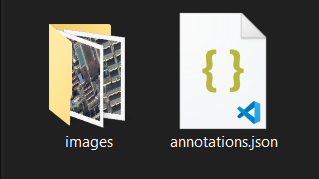
    <br>
    <center>
    <figcaption>Folder structure for RSICD dataset. A root folder containing "<i>images</i>" folder and "<i>annotations.json</i>" file.</figcaption>
    </center>
</figure>

## Model training

Let's set a path to the folder that contains training images and their corresponding labels.

<Item title:"image_captioning_using_deep_learning" type:Image Collection owner:api_data_owner>
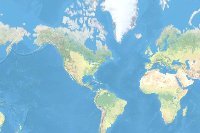

In [3]:
training_data = gis.content.get('aebabf504cdc4276b331e359a7f67898')
training_data

In [4]:
filepath = training_data.download(file_name=training_data.name)

In [5]:
import zipfile
with zipfile.ZipFile(filepath, 'r') as zip_ref:
    zip_ref.extractall(Path(filepath).parent)

In [6]:
data_path = Path(os.path.join(os.path.splitext(filepath)[0]))

We'll use the `prepare_data` function to create a databunch with the necessary parameters such as `batch_size`, and `chip_size`. A complete list of parameters can be found in the [API reference](https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.learn.html#prepare-data).

In [7]:
data = prepare_data(data_path, 
                    chip_size=224,
                    batch_size=4,
                    dataset_type='ImageCaptioning')

### Visualize training data

To visualize and get a sense of the training data, we can use the `data.show_batch` method.

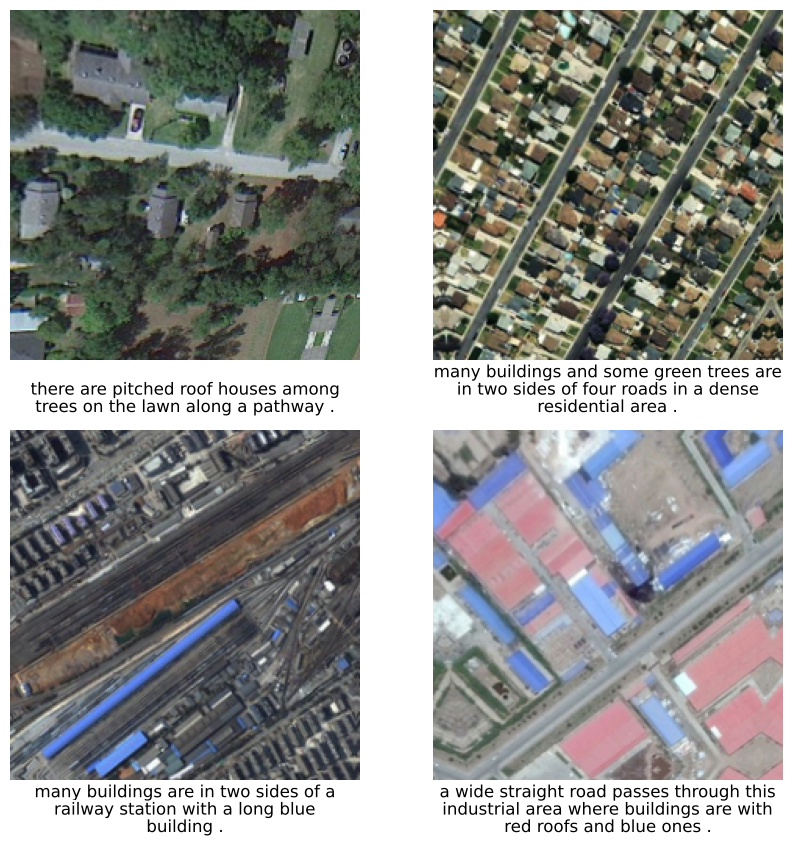

In [8]:
data.show_batch()

### Load model architecture

`arcgis.learn` provides us image captioning model which are based on pretrained convnets, such as ResNet, that act as the backbones. We will use `ImageCaptioner` with the backbone parameters as `Resnet50` to create our image captioning model. For more details on `ImageCaptioner` check out [How image_captioning works?](https://developers.arcgis.com/python/guide/how-image-captioning-works/) and the [API reference](https://developers.arcgis.com/python/api-reference/arcgis.learn.toc.html#imagecaptioner).

In [9]:
ic = ImageCaptioner(data, backbone='resnet50')

We will use the `lr_find()` method to find an optimum learning rate. It is important to set a learning rate at which we can train a model with good accuracy and speed.

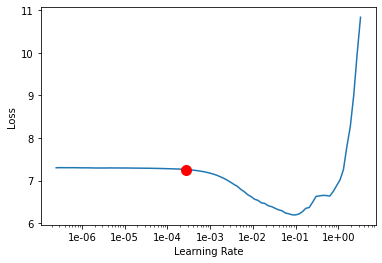

In [10]:
lr = ic.lr_find()

### Train the model

We will now train the `ImageCaptioner` model using the suggested learning rate from the previous step. We can specify how many epochs we want to train for. Let's train the model for 100 epochs. 

In [11]:
ic.fit(100, lr, early_stopping=True)

epoch,train_loss,valid_loss,accuracy,bleu,time
0,4.695280,4.683484,0.169359,0.000000,53:17
1,4.149865,4.193302,0.212167,0.000000,53:33
2,3.847940,3.863936,0.302988,0.062242,53:08
3,3.531038,3.593763,0.350844,0.089471,53:07
4,3.237615,3.324673,0.380708,0.107219,53:04
5,2.885094,3.115619,0.413582,0.128764,53:05
6,2.745963,2.863758,0.445932,0.152206,53:10
7,2.540881,2.766686,0.462775,0.177337,53:09
8,2.355527,2.600504,0.489885,0.207568,53:06
9,2.313179,2.487214,0.504936,0.235590,53:04


Epoch 33: early stopping


### Visualize results on validation set

To see sample results we can use the `show_results` method. This method displays the chips from the validation dataset with ground truth (left) and predictions (right). This visual analysis helps in assessing the qualitative results of the trained model.

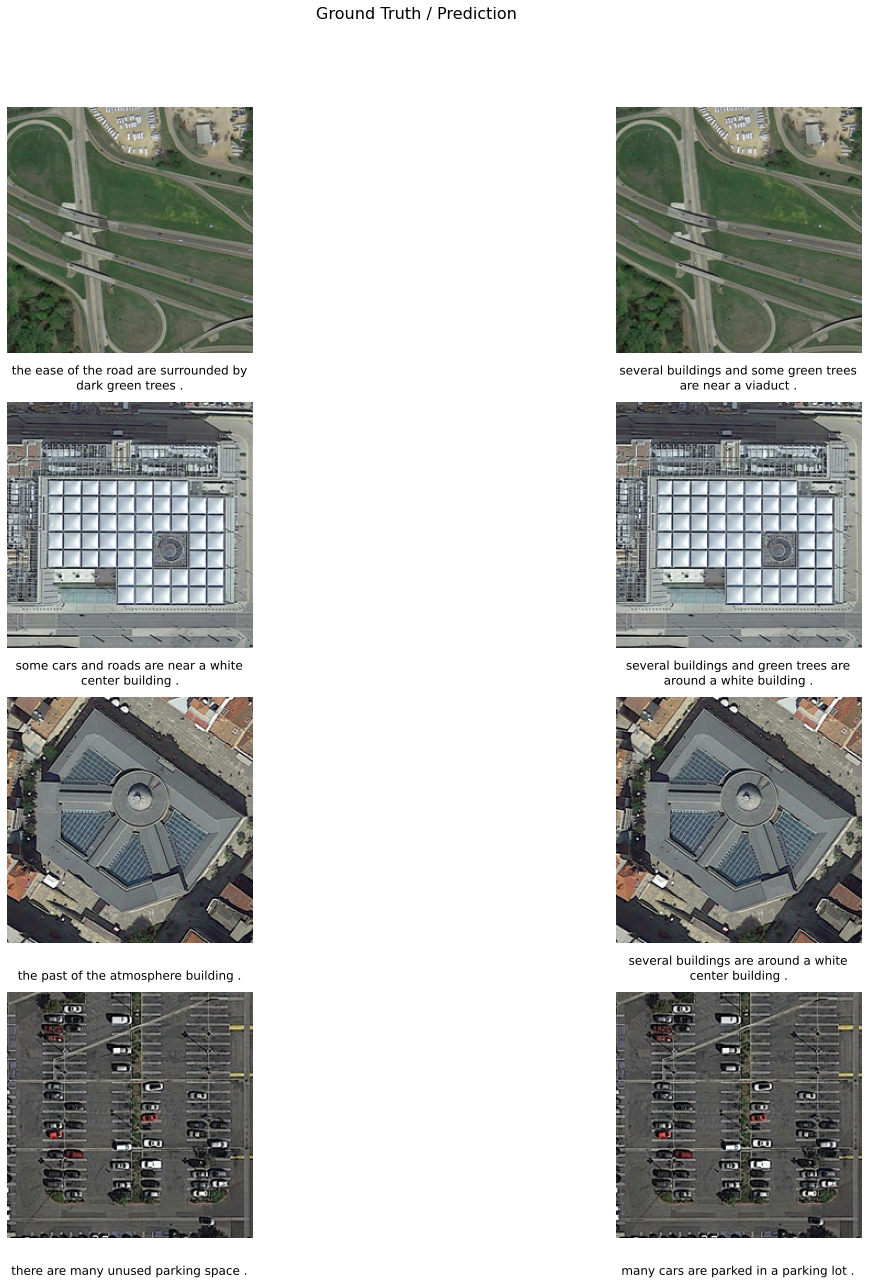

In [12]:
ic.show_results()

### Evaluate model performance

To see the quantitative results of our model we will use the `bleu_score` method. Bilingual Evaluation Understudy Score(BLEU’s): is a popular metric that measures the number of sequential words that match between the predicted and the ground truth caption. It compares n-grams of various lengths from 1 through 4 to do this. A perfect match results in a score of 1.0, whereas a perfect mismatch results in a score of 0.0.  summarizes how close the generated text is to the expected text.

In [13]:
ic.bleu_score()

{'bleu-1': 0.5853038148042357,
 'bleu-2': 0.3385487762905085,
 'bleu-3': 0.2464713554187269,
 'bleu-4': 0.1893991004368455,
 'BLEU': 0.2583728068745172}

### Save the model

Let's save the model by giving it a name and calling the `save` method, so that we can `load` it later whenever required. The model is saved by default in a directory called `models` in the `data_path` initialized earlier, but a custom path can be provided.

In [14]:
ic.save('image-captioner-33epochs')

Computing model metrics...


WindowsPath('//ImageCaptioning/models/image-captioner-33epochs')

### Prediction on test image

We can perform inferencing on a small test image using the `predict` function. 

'some cars are parked in a parking lot .'

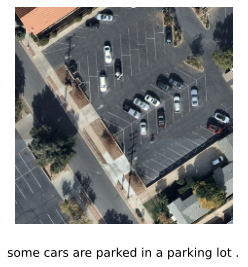

In [15]:
ic.predict(r'\image-captioner\test_img.tif')

Now that we are satisfied with the model performance on a test image, we are ready to perform model inferencing on our desired images. In our case, we are interested in inferencing on high resolution satellite image.

## Model inference

Before using the model for inference we need to make some changes in the model_name>.emd file. You can learn more about this file [here](https://github.com/Esri/raster-deep-learning/blob/master/docs/writing_model_definition.md).

By default, CropSizeFixed is set to 1. We want to change the CropSizeFixed to 0 so that the size of tile cropped around the features is not fixed. the below code will edit the emd file with CropSizeFixed:0 information.

In [ ]:
with open(
    os.path.join(data_path, "models", "image-captioner-33epochs", "image-captioner-33epochs" + ".emd"), "r+"
) as emd_file:
    data = json.load(emd_file)
    data["CropSizeFixed"] = 0
    emd_file.seek(0)
    json.dump(data, emd_file, indent=4)
    emd_file.truncate()

In order to perform inferencing in `ArcGIS Pro`, we need to create a feature class on the map using `Create Feature Class` or `Create Fishnet` tool.

The Feature Class and the trained model has been provided for reference. You could directly download these files to run perform model inferencing on desired area.

- Feature Class : ["link"](https://www.arcgis.com/home/item.html?id=a037a6fdd3254208bb4d0b14d31fe970)
- Image Captioner Model: ["Link"](https://www.arcgis.com/home/item.html?id=a4c1a0bc68794aeba60becf57f8b4a0e)

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAAskAAALUCAYAAAD5fa+oAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe7P0HWF1LeiYK98zz37mP/4m2x3fG9jj02OPrGdt3nMdz7W53292nT9RRDiARBEgIRYJASEQJkYQiCOWcs5AQyoDIIuecc9o5ARt47/fV3hs2aCsenSN1d63zvAftVbUq11tvfauq1vd6e3shISEhISEhISEhITGN7+Xl5UFCQkJCQkJCQkJCYhrfw0uumrp6ZJTUI1NCQkJC4r2BebWqth4atRpardYhjFqVhISEhMS3AJ1aBbVGM8W3r7peKpLv55Tje36l+F6AhISEhMR7w6ZSnH9SBgORtb0wtseFZ7USEhISEu8ZZzNr8eh5NQYH+qDT6QTfvup6qUh+kEsieXMp/kWQhISEhMT7wvf8S3Hh6atF8vf8SiQkJCQk3jfWl8D1eDG0Qz3Q6/WCb191SZEsISEh8R3iTUSyo+ckJCQkJL4ZeIWE68mSby6SxXKLTcUUoISEhITEe8OGYpx7zXILR+QuISEhIfHN8N5EcnllFco61ajo1khISEhIvCeUd2lQVlULlUr5gji24XuBROYSEhISEu8Xvu9JJNdUV2Ns1IRx86iEhISExHuCeWwE9fV1UCpfLpL71QYJCQkJifcOI+pb2tHd1fXNRHI1iWSD0QjTyIiEhISExHuC0WRCXd2rRfLo6IiEhISExHvG2NgoOjo60CVFsoSEhIRjmMfHrUw38xodG3Po/33iTUSyo+ckJCQkJL4ZRkZH0S5FsoSEhIRjjJnNaGhoQEpKCq5evYpr16/j9u3bSLt/H319fcLd0XP2YD98ORLVfI+vl4UjRbKEhMQvM8ZeYqR4E+79ppAi+RcA5nEaZCdGMTbq2F1CQuLdMT4xIQRxWFgYLl28iOPHj8PD0xMbN25ETU2NcHf0nA1M5M0tLTh58iQ6iWjZKm1z43939/Tg9OnTqCchbu9mgxTJEhISv6xggcxGigsXLuDosWM4Rvx7iviSf/N9R5w5Gyx0+XIkqtltYnIS4xSOcZabzf07E8kjjFnrPezh6BmJV4DLzWDE3Xt1+IdzHXg2NIaJMQf+JCQk3hksgh8+fCjEsd5gQEtrqxDIgYGBQry+TiQzidfV12PDhg3YvXs3eq3WZ0b/wAD27d+P9evWoYo41FFYUiR/vBjjzZXEuTy2OXKXkJD4ZmABm5WdjR07duDmjRu4desW1vj4YO3atcjJycEk6U9Hz9nAIldB3Llnzx4UFhXN4Fh2489Ns+i+d++ew7C+M5HMVk49kX1DUQd+sKcC34+uxH+NZVTgd0Kr4VeggGJiFKMOnpV4CahMx/QGnL9Yjt840IK0/jHA7MCfhITEO8Mmkk+cOCF+M2G+jUhmjIyNISc3F35+ftiVkCDE8bBCgT1798LX1xfPnj0TZOzo2W8qktkwYaaw9TShVuhmQmM0CR5x9JzEyzEyRmPVsBrRp8rx15d6UKWWBgoJiW8DLJKzSQwfOXIECuJMxmbiXubNvPx84e7oORuYV1UqlXgTGBwcjJLSUsHZvMxNR6KXLdPr1q3DvbS0DyeSebZt6B7AqiOV+N3dzbjfpxfEbDCxKd2E4sI2BN/vR4N2jMj8xeclJCQk3gVMhEyiL8ObrGmzF8ksWNva299aJDM4rqysLPFcAgnl3Xv2IHDzZqRnZLwyHd9EJDPBjxkNqKofwMZjlfjPMZX4wzgLfjeqAv/PgTY8J8E37uBZiZdjWiRX4G8v96JKI0WyhMS3AebpKZFMHMh4G5HM4HGgnXh7+/btCNqyBWXl5dDqdEIg8xu+mzdvCn+ODBXfukjmZRT6/iGsSS7H/yQy6TKZgVlkMkqEM0FC2v6VFScMk7zZhTe10N9xB1YWes7ibvVDfydnh20mt0kS3+x3Ytof3xuz82cLi4luYsLqh9Jkcx/hcEQ81jD4eUeCXqTb6sdBmsZ4/bDNjfzxqzr758X6Ylsc9HfcLo5xkf5pN9uEQoTJebT+FnnmZynsyakyJNjlx4ZRumcLT2CC6sK6xlkugZH4eQZzCK/35VdspaWlwoJgA/8uovsseB0Roz34evr0KU6dOiUEMYdpE8nNzc1vRNI28JVy5w58fHywZs0a3LhxQ9xz5NeGdxbJlK9JtRrHr1Xh/4xrQFSpCuPUxyepz08Snxo1Shy+2YLr3fR7Fg9JvBnMVJYTZmprDtwkJH7ZweKUrbMvw5usJ34fIpnBhojW1lZER0cjPDxcLL/YvHmzWL7xqjHgWxfJ4yYjntyvwa9E1eNst5HE7kx3RxgjkTdp1ONeTgeC7hLudeJYo26GyBtjIatVIzmjE0GpHdhC2Pq0DznDJip9iz9eutHd0o/dBUPoVRhw73m3JbzUTiTkKjCEUZg5PCoE85ASR7L78FxpQkEBx9mNW600+PCAQgJ0koR+WBrFc49AYYTmDWNghAQmiWtbmkbHKU1GLc5nd4n0cLpCnvYis99oEekkRvub+hBB4QSltiM8awBVaho4KQ5eMM7itKuhFyEcB+fnST9Khg1iEsF+6qt7sM2a120ZA6jTmOi2Ca2N/dhTMIgGDeWD/A21D+JA9gCqVUak57aLPAdTfh5zOsjdRuhmKkN9vwKHn1jCDErrwvFyJUrr+5BUqkS3Xm4GlPj5BRN0fX09oqKi4OrqCk9PT3h6eIi/bm5u2Lp1K0rLyoQ/R88zBLG2teHQoUOIiYlBbl6esCqzwF2/fj2uX78ODZHm64Q2gwU2r0c+mJwMf39/BAQEIDExUYjuV1mj31Ukj+k1uHilCr+xuxE5KuKmiZnunOZJmnjzRNx+wwrzAnOVwEuMAWNTBgcraFI9ww+FPcETdBLjFgPDtN/ZBpFR66ScP5wyKfzYLbtjbrZPD2Fydlw2zIqHjSL2E/1xYTBw7MZvNsdnxDMzDTOetbnRM2IcsjMoiLxQmU0QZ4v8C/8zDSU2iHFuKkwqFxq3RF6lgULiFwBCXLa3Iz09Hc+ysl7AU7pfS7z2Ou7kK7+gAEePHoWWRKrOYEBgUBD8SCQXFRcLd0fPOQJfzPm87M2DxgLmYubeV6VB5OPbEsm8Fk6vViF4Xyn+5nIv+ohAhCh9BfgZrVaBsOP1+PRkI6Kf9WJ3aj3+bHcd4qt1xB9MJBZhGJBchX+83I7o9B7sedYJn4u1+Ku4Zlzu0MFARDMxYkLRwxp8b2s5Pr/SgcAHndid2Y3oRw34bxsrsDJjSAhlJis0duI32d+lJgSndWN3Rh8edOiJuowoyO2A84EqfJHSjYQMjqsNXyZW47OjnSjUm0Qhmkn893QOIvRoNX54vhWRT8nvk05suNqA0EIS+DDgWW4nfppQjfWPurD7aQdcT1Thx1d6UENCmQeO0vxWfLm3EkvuURxZPfChcG61qYVQz85oxif7quF2n+Pvgde5Vjzp19F8gCYhd6rwvZgG3O6zEHRjZj3+ZUAx/vZUM0IfUF6oDDcdrcJfHGzEtd7p9PZ1DmHdnnL8zckWbE/vxa7HnVh7rAr/PbwIv0V5K1LKV4gSP99gS0VnZ6ewGqxevVqsPfP29sYOEs58msTrlkqwe2FhIU6eOIEzZ87gGBE1i2teesEnUjD6+/tfKbQZnI5e8rfvwAH4btokBolc6xplXnbxKqH8LiKZ10APV7fit4PL4VFKpP4GxgkTTfpZtDWUdsDragvcLzdjA03UK9U8Sbf4GRllQTuC4vIurLjUDA/yt/JKCzYVqUjkWd/OkUCcVKiR/KQdx5uMULf3Cz8rya/blU7c7tJjlPiZhbLZZERlRQ9iCpWoax9GzO0mrLjbhyad0fJGzEz89rwTy61xuV9txbZyDfEpiVy7dLMgHekegPe1Fou/yy3wzxpCs4biEEaGEWRlt8KF7rsRgvMVGDARD9J4w0snYDTgYU475Ynz04xVDwbQRtwu0kAD423i/BX0HOfD5/Eguk0jmKTBOqOwC5H5w+jQWcJqrupBWMYAqga1OHu/CcvpGY/rnXg4RBxvx6UTGMdw6wBCbzXDncJ0udaGpKJhZJR2Ieq5Aj3SQCHxcw7WGXyqz65du+Di4iJEqQ1stAgJCUFFZaXw5+h5BhspWKAePnwYkZGRSEtLw6PHj7Fu/XrxNu4I8bFtI7Sj5+3BfpQqFU6fPStEdhAhgsIsLil55TjwrYvk4aFe/HRbGeZmKjBptfAKUMRsOWBxKEBExaQ5QgPC5WsV+H5sM9K0JgqZZ9ZGpN6oxm/tbUf1BAm3IQV8k8rwvy50oUxrsdAyaU5ohhFwoBx/fLoL9VqaNYyaUJHOgrEcP7rVi3a2/LLfSQOyHtfj322rRkgNZZhn/M1d+IPIUvza8Ta0GogYeekB3Vc1duOH28uwNH0YgzTw2OJSt3XjR6Fl+PypggYFEv8qNWJOVuDPjrbjmdIWD+VXp0OXZgy9FM6PQsuxMl9JspvDMEPd2ovPYqrgX0JCGCr4RZfgN8/1wGi1QJi0BiiIqPWGYawIL8Gf3uqnmC1uerUeSoMJkzTIZKTV4N/taUYqb9yjgao5uxH/dmsJ/veNPvSNsP8JYKAPX+4owY/uD8Nol97/ebwd2arpMuys78VPwgvwB6e7UaqSIlni5x9CKBPB7SUxylbkqJ07X3rc2mwwQTIp8is+tVotSD08IgKDQ0NiVzTfd/QGzR4soPtIIO/fv18IZF6XzITNyMvLmxLKPb29Dsn+XUTy2LgBt65U4dfjm1FkoDTMcn8RxMHQ4vLtZvx1Qi1invfjUkEXPGki/4+Xe9DAE3niAoNejSPnavHDQw0IzBnA+aIBnC5qxf/eXoWlV3rRROJXGB26+vDTncX448RGfHG9A6cLB3ChjCb+R6rw/YgGXO7XwzROvGPQ4/6tGvybsEq43WnHgbx+nC5Xop9EqEalxO4TNfjB8SaE5w3gXFE/juc34y/DquB1dwCdxK8sys0TJFaftuKL3VVY9rgPZ4spXdkkam92IqubxpAJFXadbMD/m9yAA6UDuJzbhk8PUHofD0NNQtmkM+DctWr8HbmHUDwXS/rhd6kdpSTUDcSzRy5W4e+ONGJ7PoVbTG6X21FJ6QPV/76TpfhPhztRTFzJQjz3ThX+hT9x7+kWxGf3U54HEXysAn+S1ISUAUs9jE+Y0FjTg/lRpfjRtU4cpTI8mduDTccq8RvBhTR+9dDERHKvxM8/mGOZ+5KTk4Vxwmak4CUPTc3Nr+Vgdq+trcX58+dx+fJlnDt3TohbNlhcunRJHAPHpw29TiQzB6uIv9m4wW8A+SSLxsZGcWIGb+abfeqFPb4DkdyNH2wpx/xspXiNZLuv7OjGz/h0i7hK/P6OMvz5xW5UKikz+gHMDynF390bhJ5IQqE1QkEkP1DUjP9/aAV2t4+gvaoDfxZeiahaLWVs+tUdSGoWZDXi97bX4UInL88wofRJHX4lph7nOomQra8bOdNGEonrDpThZ2mDFtFKIvm/kRhenq+3vhpj64QBD+7U4ld3NiBDbbJbP0xhTepx+nwlfn1PGxpJjHc39+AfI8qxrlAFMwlV26AkLC/Q43ZKHf51dCOe9hug413mJHCNg0r4HizF/7jch3aDBnGUnt9IaEPxiAkmImGeRLA1wWigSUFMCf7gSAdqiIg5bJ5Y8Cs5RyK5icrg18OrcbCLBghrXjCpxHaaQPzqyW4YKYxOSu8POb3P7dJL5QIS9QfOleO3j3dJkSzxCwMmQD6GjZc3lFdUvJFAtoH5gkmWibixqUlYH/goOP79Ogsyg+OurKrCxg0bkPnsGUbpOQ7TFi5blDdt3CgsGo7W1729SCbumlAifC/191M9MBBPzHS3LK9gMBcLi+64GfXFLfjvW6qwvYl4lY0ExIuKBprcR1UjtFoDE3Htc+LT/xJVi0NtRsveDV52MWlCc0kzvr+1ApuriHeJT9DTj08TyvC9HQ0436233KMwJxSDWLOnDP/+eCfadMTZJgMepfLbvkoEFavIz7gYJ9jCfC+lGr8b34BLPbyEzhrXhBElWQ347bBqxDUaLGms68T/iizDylwVlMLSTRgfwZDGAA2J4KxHNfitkHqcHzYK/5yOJhLb399ej6sKA/p7iQuDS+GURWMUu1Na9fSsYcyE9tYu/HVwGdY8V0+56chNy1ypJZF8rgL/5UQ3yqwiOf9eNb63rRzLMxQ0CeC4qCS7u/H3YSWYk6kWS+pGBoaxdn8ZfnC1F7V6eo7LhtBR14sfh+fjjy/0okbz4n4VCYmfR9gLZTZSvKlAtoG5lg0SvNGOxSq/yePw+GQKvv86IwXzrNikd+yY2KR3584d0lek54iX+XPTbKFmocxLNxwJZX7+WxXJiuFefBJUip/cGYDOfp0XJVJN4tek0+DgpUr8VmIbChVE3J2d+LOgEvyHqEr83/GV+G8kohl/SIL6D3fX40inEYV5jfiPkXW42EHka7ehj9dztVd24i+IrCOJ6M1EWiyS/zUR7dVeC4lZ0jUKvVqHbftK8L8u9aKTyU+I5CrENBus68GIBKFB8skq/EpSO7p1phnrxMxExDkPavEfiXwfjhhRUdaMv4kmMd7O665nWsxhVGPvxWr8SmAZfp/y8Ud2+fp+VDm+vjeEDiJLVWUbfm9HOf4dEfZXKUSgaqM4AYR3njc/b8Hv0EDwrylvK58MoEFjKeuXieT/SCL5OA0ulo1/vK5aiZ0kkv/diS6MjJtQXdWK74fSQFNHFW6dvIi0UgM4eKFCimSJX0iw4HR0/03AvMFWCz7XmAmafzvy5wgcL5M9/9vRc+z2srS9m0geRvCuMvzq2R4Ybbwl+jfdP1lDvFOB342iSXlcLaKqWWxqcfg0cd2eFhQN6NCt0KNDZYSqfQDLEkrwN7eG0KNXI2JvKf6IwhxiK64dH5r0CmyML8Vf0oRfyXxKIvmn9PufHqiEoLQZMnh/R0VWE343rgEPhogrSSSn3anGv93XggcDFo7mcUOnGYZPbCn+7kY/pcxiMebn2U1DQnvFzjJ8kjpIcteI+7eJh2MbkaU2YcyOr0Yp3nGzAv5xpfiN013oVuvROWzJ13BtF/40vBjL8nUYHhyAM4nYv7vYgxoq6xHmSzMJdUpLf3cf5m4rwT/f7EMDuXGY7CaWaDgQybmp1fgP0Q24NUzuVgPFuHkI6yi9v3Oln8p5BLXl7fiz8CpE12hoHLGWDYenVmPnyXL81zNSJEv8YoEFMXMnb75jg8HLrLYvA3MmGxR4aQULWn6Dx7/fhIPZDx+3yZv0+EuptrDYjQ0dHaQ5WSizpZovR89/qyJ5VGfA/iOl+L2jnaiiyCbtiZV+w6TFsatV+J2kNhSxSO7txF/STNy9kBMyJnZhT4OICAbk5zXhP0fU4kzbLJFMBNxc1oE/21aJaDuR/G92NeB6LxH3DJGsQeDuEvxvms33vkIkHztbhX+9vw2ts0UyDRIZqTX41fBGPDPpkZ9Tj9/cUY+zLJJtopPBeRxRI/E8TQQOdaKZl4eQu32+WIgyUfIGF7NOj5O3avE3sWX4P3bW4lyLTmy24xMsTAoN9lytxV/sLMW/jGvEwz4jJkmgv0wkH5slkqPsRHJVRTN+Z1sNdjfoZopkmnEdviRFsoSEIzB3vO7V3vvGu4lkFXbuL8O/T2hFwxgLP3t3GhyIF7prWvGHYZUIriKRbFJi8+EK/EpIOf54dxX+1A5/HFeFlZlK9OlIMIeW4c/vDc40BDCMJiQdLcEfHOxErVUk/4RE8meP1cKaa4ufDRk1ec34fnA1DvVzvAakptTi+0faUaonvqF08bihUvbgJ8Fl+FmGYgafcvkbNHpE7C/BX57txQBx9P5jlfir873o52UldhzNfDYx1Icvo0rxb7ZXzsjTn+6uxp8kVCO4XI9JowFZWc347YhS/IstFQjIGUSxwkhlRHxo0CPtaRN+M7xUWLvDC4dQSm5infNLRPKvxTQgRUGca+VeM4nkDSSSf/tKH40pRuTmNOI3Iupw1n78sonkUyySSaxLkSzxCwjuv47uvwn42YHBQbFsjdcWv21Y7N+GN7lv7/6tiWTGxCgRfFEbfjeiDOsKNJggAp061owix4gWJ65V4XetItlMZL0qqgR/fWuA7QdTFgThl8iSN5x113bh7yLL4VfOM3Hb0gZynzTi8eM6/Ceayd/pIQI2m1D2tA7/5856HG61nHrBrxj53GZ1axf+PKIcy58pKRbHIpk3CD5/3IBfj6zFjWET6U9LWowjRIjjGiQcq8D/dbgTfUSOrQ1dJO4pj8XqqeULlrhY2JuQ/rAB/zGyHveJYPmkCks4FpHMZMj/FoMBxU3/wHj3AL6KLsJPHg5jiOMTbuSH3EzN3fi7iGIsztVg7BWW5JeJZBOVYUt9J/4ipAzri1UYtZYhW0fGqPFtSyrB75A/KZIlJD483l4kk1gkIV/5pBa/FlKD44PEOTbOtbnT7y4Syf+NRPLWSuZKJUKSy/F7JDwVY8xZFi6ZAnOWcRCukWX4f24PvHjChFGPhIMl+L+PdqHZTiR/+VQDDfGPTSTzMg62JP8eTdBPD0yL5N8nkVxiJ5LVqj58Rfz0k0fDgrdt8bCbXqPBlt38FrAPaqgQRun+nTO9GHIkktX9WLi9FP/rPont2Xki2DidT6/Q9SkQda0ef07jz/+xuxmlSt7kTGMY5UfdNYSQK/X4s+3F+JV9rajTERe/RCT/6itFMgny7Ab8WkT9zDehLJIpX7FnKvB9KZIlJByCBStboV8maL8NfOsimSMYJZK/d78BfxVXAZdsBbRE4MQohHHiLR2SLpTjV/a34fkQr6EdRcajavyHoBrsqNGQD6tfnQIHCknQEoFP6DX0TBX+MKEBF3vpGeFnDMrOHny6vRxf3x8QO5cneeNeRj2+51+KP7nQScRGRMZ+tQoEkmD8lf0tyCJhLs4ffkEkU9rZJD80BM+EMvz56U6UiA19HNcIKvKa8fuhVQivIqFK/kYNWuw/X47fjOD1ekT+nLfJEXS2DOBqpwnaXt44V4a/PNWFGmERp3AmDUivG0Jep4EIUYNbFdZ1b0TL6BnAJ5ElWJClxJBJgzsUj81trKUb/3NbKbzLqHxGTG8tkvWj9ultxNVBaxmSeL51txq/tqEAf3xWbtyTkPgY8C4imQXieP8w5sUX4Y9IdHUz55KIsx31JkRybSv+mC3JFSTWYMTtGzX41Z1NKDayccPijyfv48RXYhmDSYfjx8rxu8ntaODJv9UP88sYidF5JEb/6Z44L0iI5E9IJP/BzSEYiNOFSOb1wiNa7DtfiX+7txUlKstyi9kiWXxoigRoTGIZ/vRMN7qIn21vIHm5g6avBz8OL8OSDF5DbETKdU53PR4Tl1uWOFC6Of+U7olJHfaRiP5PBzsxSCmb/mgKCWgSqOINHvkV/2ahikloKtvw+yElWFduEBZjcQ6ycJvAcEkz/lNIKYLqiDN17yKSR1BZ0ob/HlqOiGrib2saRunv6OAQfHYX4w/PyeUWEhIfC751kSwiIYIZMxhR1tiJlYdq8Pd7a/GPh+rwQ8KPE6vxW+EVcMoYgoL88mvAEb0ax+7W4Y+CyvG3R+rwI/L3g/0NiG0iQUruo0RGaqUW12/W4X/srcY/JNdReDX4q6RarHnI63sta9NYQJY+5Q1zdVh9qwPLj1aLsP5+bxl+lYg+v8eAMZ7JM+E3deJ3aMDY0TQtkhmjJBx7OxVIOFWJ391nScuPkqvw54easK9YBS3FwyQ3xmlS63Dyci3+ZFcl/ndyPX6UVIN/TG7AMd5AZzaiobMbX24rwx8dqKG81+JHVA6LU3pQoaVBaWwA7tFV+AHl5UeH6/C3e2rhmdqLesqLztCHRRGVorzY7a9218HvaT/aeIf1iBFPiZj/VXwT7kwdAdeAf7OtCoe7Z4rkiD1l+FdHO6Gj5zi9GrUKu07U4E93VeEfuIyP1MPnVjs2HCrH75+UlmQJiY8B7ySSCbx8i0+rWRJXjL+41IXHg/yWijjCir6yJvzr0EpsLuUjKs3QtnXh70PK8Hfne9DIllYxcdbhStkgSnoNYrNwR0MnfhBWinkPhtAzMW7xAy1Onq3Cr8c1Im3QaFkWxxv3dpfje9sqsbXcEj4L2qKcZvz+1gqse66EjgYfPnrtBZFMaWeery5rw1+FlcE9SwnFJMdF4U6osetwBX77QAtyVMyrZqgHerEgvBh/TGHk2AwhJGCvVAyhjMRqb0Uz/ot/OZY+4iM/OR2EERX25w9hQGtCn0qBO1U88LHbOIZKW/B7QRXY1c5rmBW4X2tL/zh6Cxrxn4OqkNRLZfkOlmQum1G9CjuPl+M3dzTjrtJqoBgx4OTVCvzL9QX4n5ekSJaQ+FjwnYhkBkfEllXlkBYlbWo8b59GSbcOg4bpNb/88YxRkwENHdN+Cjt0UNuRBn8pbtxgQE2Xxb2gTYXiHh0JbZr5W/2xSC7hNckJjbjWaUJHr4r8kf8ODWoFwdq9xtMbUN+rRa9+Og4bzCykNToUW9PCYZQPGizi35pmBi+tGKM01XGayI/w16uHmtx4M8jEhAkDA1q7cDRoVlKZUTpGSOx29mgs+aW8FHZqxRo7QZQmI1qt+RRuXZRP3tBHbizQVUodqvv1UBi5nEegU+tR06vDAD0vLDgc/6gJvRR3NaXbZk0SnwvX6lHN5czlQnEOKLQ4frkCvyXXJEtIfBR4V5HM4P0Mg31DOPiwQRzT9teJNfgbmqT/LeF/7CjD9492oELHk2kSc8RBde1d+FlQKf5gn8XP/4yvwYpHfWghbrGcKWxCU3UfvA+W43d21+B/kZ+/3l+Bvz3dhSw+/5iEojA68Ma9XWX4GxKG4eeq8dfk7+/2VuLfx1XDN2uYBLKF54VIvlWD3zvUjmI7kczW5JFRI2pKurH0AE3a91ji+kuK64cXelFMfMcTfZHHcSM6OlUIP1iK39pF6aY8/kVMJb643YNq3gMyqsezslb8jV8p/ojc2P3P42oRUKIQRo6unk58GlKBv2I3iuO/7qpHQokSSj6qrbUDP2G3JKtbQj0OVqowTGOCOALuDIndY10osYrknDskkqPqcXN4pkj22V6K377UR3xKY8b4CNQqFWKPVovN6X/JZZhcD//UDngnl+OPpCVZQuKjwXcmkm1gYmTiHqe/9pixlozAYm+2P5vgmwL7sblb/dqHYxPJfLrFFT7dYmLan+0TzrPDmp0OG7igbOngMMxWgfqiP2uaOB7hb2a6Of+2NPDfGSKb79nBPi2vcuO02cdj+z11kogVouztiJfDZH8ivYQJfq1JA7Hvvgp8eX8Qw9ZzSO3DkJCQ+G7xTUQygyf5YyRGW3tpkkyosaFPh061iXjB6pc5jgTc0JAOdVY/VT069JKIHrHjDRZvKhVNzO3CateaLKc+sB+rSOY1yV+kazBEk3ibv9ohA7QsHK38xf7VNKlvV/L9mZzKXMpvwoYUM+Pq0o+IuGz+LEJ0FHqNDvV9Fj+c7i61UZzsYeFuNhJMp6OqVy8MDRyHkcqms9+ubAb5+DcLNxsMBrRTmDa3WjYykJvYw0H1MqzSo01pFG/nOO0ajR6twwaorL8t6TOhf1iHNkqP7Z7FQGFAky3sAT2MCjV2nZYb9yQkPiZ85yL5u8QMkdxjmek78vdLByL/UYMRTQM04BhGqfaobBiTejxMb8TvhdfiQIsOU5tKJCQkPhi+qUhmsBjkSfFsODIK8GT6dX5eCM/ej51I/vSxmsTvmJiI2/zaC2FbWC8zTjBYoL80Lnt/NJjZ+5sd5sx8kf+Xub3quVlutrRNhUXus8NmiDDsnmWjhDBk8H0CGyjGBofhsasSzhnDUE9ahLh9GBISEt89fuFFcuGDGnxvRx3Od0uRPAWqdOjVSEhpwJcXOpCc14vE7F7EPGzAn5BAjsxXQmF/prWEhMQHw/sQyd8pZolk+yPgfulBQtmsN6C8R4tuo52BYlyLK3fq8ds763G2Sz9jKaCEhMSHwy+0SGaR19XUj6isAVSopl/xSfArWBPaWgcQe6sNG1Lasek24W4njrXwTvcxOahJSHwMIIL+uRTJXX34yY4i/Oi+Wnz6WfKJFWyg0CoReLkeCy62IyGjB3Hp3dicUoc/2V6PxHKaVEgDhYTER4NfaJHMGOWd1iT6ps5mlpiC5Qxn625vAbZoSAuGhMTHhJ87kUyDyqRKjUt5PbjcbIDekZ9fYpgnjGhsGEB8ajsC0zoQfK8DgQ+7camTjw61nFnv6DkJCYnvGMRlv/AiWUJCQuLnGT93IplBA8sEHyMnl7g5hNlqvLEHH7HnyK+EhMSHgxTJEhISEh8xfi5FsoSEhMQvAKRIlpCQkPiIIUWyhISExIeBFMkSEhISHzGkSJaQkJD4MJAiWUJCQuIjhhTJEhISEh8GUiRLSEhIfMSQIllCQkLiw0CKZAkJCYmPGFIkS0hISHwYSJEsISEh8RFDimQJCQmJD4P3KpL1BoPDSCQkJCQk3g1SJEtISEh8GLw3kVxTUwMNPcwBOopIQkJCQuLtwZzKInlwcPAFcWyDo+ckJCQkJL4Z3ptIbmpqspC1FMkSEhIS7w2jY2Oor6/HwMDADGFsD0fPSUhISEh8MzD/dpJAbm9vh06nE3z7qkuKZAkJCYnvEFIkS0hISHwYMP92dXejra1tim9fdUmRLCEhIfEdQopkCQkJiQ8DKZIlJCQkPmJIkSwhISHxYfBRiGReGD1mNguYx8en/j1CiXPkX0JCQuJjBnMak6uN02y8xvfednOzFMkSEhISHwYfVCTzYMGDh06vR3dPD5qbm9HQ2Igm+ssLpdUaDczWgcXR8xISEhIfG2wT/GGFAm3t7YLTGgmtRLL9JHTZD/Pe7Odehm9LJNuE/Cil12aY4H/zvbcV8hISEhIfE5jHbLw2xW90z5HfV4Gf+SAimRPMRFxaVoYzZ8/iwIED2Lt3LxISErBv3z7x+8SJE8jOzhYi+m0GFQkJCYnvGsxn4xMT6O/vR2pqKo4cOYL9+/dj9+7dAvzvgwcP4vqNG2hpbRV+30SMMkm/b5Fs49Ph4WF0dHYKAc9g4wSLe04Xc/Ts5yQkJCQ+ZtjEMRtZ2fjaSlzLfMvHuPURN/NH75j/3tQQ8EFEMidwiMj58uXL2LlzJy5evIii4uIpkmbrS3lFBW7fvo3Y2FgcO35cZFAKZQkJiY8RNlFZXFIyJYgfP3mC2ro6wWkMtibzpJ/FM/Pe0/R08aGQ11k33qdItgn5TiL9O3fv4vDhw8I4sWvXLouBgtLN6bt3754YYN5UyEtISEh8aLBGZHH8LCsLp06dEsbWXcRr8fHx2EM8l3TwIK5cvYqa2tqpt2aOwrHHdy6SeSDh5RRMyMnJyWIQ4URMTE6KDLI7g38LMqfBhS3NUVFRYgBiN0fhvi+MmCcwiQmMjjp2f3+gQXUCmJwcnxkXlZ950lKmExNmjMx45lvA2DjldhJjr6m30fFJSut3US4fAFQRXOTmMQduEh8vRsdAzRIT42Pffj95BWwiMiUlBTt27EBqWhqUKpVoU8xhzGXMW/xvvsdnbebl5yMmJganT58WlttXkfX7Esk27szNzUVcXBwOJCbi0ePHgoPZMNHW0YHqmho8fPRIDC48sDwvLBT5e5PBREJCQuJDgfm1kXTo0aNHhXH11q1bYqUCcxsbWdlIkZeXJ1YosJ5MuXMHauLO12nK71Qkc2QqGjzYanH9+nUxkNjM3jbMfobdtTSoZD57hvDwcCGa352wbfHMvC/u0V8WgP2Zx+EXfgylyolvTzTR4D6hH0DOmXD4772GRgVNECiukTEzDMouXN/lAVdXV2w/nY4uDQ2w75COqTJ9xT0Wvurqu4gK2IOHHcMkFh2VK4l5kw4Nd3dhfeRBFPXRFOI9lYstPY7c3givfH5mXl8KyrO26Dw2BgTjbj0Jme9AKDvOtzW9L83Ph8AbluGHAE9shmpwJm4Toq6UYtj44SZwzEc5RL4RkZGob2gQ92zEy6/2rly5gkOHDk0tY2Awr/Eyh0QSqvxGjcN4Wd2z2zcVyRwG8+1lSkt0dLSwcrPFxSbkOb32Ql6tVguxzIMJLw/hr6m+O+++Ab7DCY9xlPJJcU1SXPb3mX8nxGjG6fj2+6HFIAOMvbLd0gRlnDxNUh39IhooqC4mRF18TLwn8Saw70cfeoxgPs3KzsYO4qvzFy4IUct9S/CZ1QDLxgq+x2ll8cyWZeZffqv2Km5jt+9MJHNC2dS9d98+QdC2gYTvN7e0IHL7dvEaUqFUznjONnicO38eSUlJ4hXlywaUl4E30owYDVAq83FonTfcXFzh5u4Od/cVWDTXH2fym2HAOHrvRGGe2w7kDE9+e4KJGtekrg+PE9diRdgp1AxRZZopP3olrocvw6otZ1GpHKZy0MJgelvyYKuPCZrBHjxO2oilLm6UR8qnqzOW+uxBblsfdMS6LChGaURQFZ3F6gX+uNI0AJPZsUg2m7SovhSMxRt2IqebOoV5tp+3BRPjEJ4dD0VU4mN06V43ULyIkREjik8GwH3TPhSqqPym6opE/ZgerRkHsGpVCFJrtDS+vGJwp4FRk5NM5eSJy5XUkb5x3l4BimtS04WHhzZjzoJlcBXtj+vGBUs91yL6Wgn0JvJHguFDk46YMBafhJ93EB60MBE69vfBwK9bBsqQGLgMm47nY9Aw+UFEMhNob1+fmMBn5+TATKRsz028nyI4OBiBgYGoqq4WXGdzs1k+WIgWFhWJ3zY3e3Ac30Qkc3q4PfHyCh4YeCMhp8M2MPBf5mL7dNvu1VG8bJV5QqLa5vauGCHe43hngjc5kgpU1OPK/jgkP6iGivhptiHjvYGEKfrLcTwuEHtTG6AxUVx0n7lQ0ZiFg+FexBveSH7aCR3xlMMw3gD8KndGPolb7fv0CGe57Dp2BB9G7pBmRtlPg7jXqEFd6j5sjj+Jsn4eJ2b7eTfweDg2K01vA36e685hnyP+GqM8j469ZuziSUL3cyRGbcbBJ53Qj7yCp98XKG0z6sUGbv+O/H9A8KTtm9TRtwruRwOVOLkrCHvu1EFt/Bb77GvAPMVvw8LCwlBQUDBjDxvzWEZGhlhSxkJXcCGB3QeHhsSbPBbKeoPhhXBt4DC+E5HMA0BZebkQwmxtsRE0Z5AtHLyGb926daisqnJIGHyPBwl+Rfno0SMxK5jt56Xgxjaqw/Pz2+HtsRgH0vtgEB2SlzboUHrrLp6UNUA7YUZvagwWeUYj104ki6UGlEcGXy8ug7AsneDL4sfOqsUVYufGyyssz04vt+DfIxSH2dSI/euWYevNJuHfMvN5cSnEqLBAOLKcUQOYGMFg6Xms/nopNoRdRdMk5Z3jmlQh+0Qk3Bd8ipi7HSSUicgoflXxefgsCcS15gGMWdPI1+w8chmIfNndY9jne3LCQUexWoim/NBEhG7RP3pxO84LfnufYIB/030RH5OYvf+p8poJFsnPD63BIq9Y5CtfFMnNj+Ph5OSHm5XUoK0ieYQCtqTBErrZRuKigricrWGIGbLFXdSR8E/B8IAu4pgGD/DWIiB//Aw9S/8286Rnll9uh9C041b0BnjvvoNOE/mjOEfNJvS1PEDEgjlwCUxAbgeVq72Va1YZsrVtRrgES5uwuFvSMR3/9BIibu8cisXfuINwbOC21fc8GatXrMddao4vE8kz88+D+Oy2al/m3K5m1qdIG1vJiAe43EQbo3RO3SeemM77zHyJcuEn7PIxOj4h2u6oeWa9vDgJo3Ym3CzXBA+UE1RKb7nEiXmJ1/DyKzxHvGUTyVu2bBHcZiNvBvtnHrz/4AH27NkjNpVwOdg/z2A/30Qkc5y8jGL7jh3CgmLjTo6fn2VLdkBAAIqLi2fEz+5cPrzkgnm7paVlirffBpbBXoHqzJPYvNgZLtbJoaurG1avP4kqroCBUuzb6InAcwUYHv0WJzxc6d252OEzF75nyqEyUhujNqPuKMbu1c4IPf4Adf09GFDpYXT0/CthqU9dfwtu71mHpSusBgo3F+rXp1Cn4nqyiB7KIgafJWHF11twt0/lsO3w2DFuVKHsjC/m+ux4TwYK7jMalN7Zg+i4q2hQvf0yM+bRrkd7aTIRivtEYjP6FnGnoe0ugr28kZje+2oLMXfeticI8vgawdeav9Gk5I1AXDVSfhGrVrpihavVQMFwccLSyAto6VNTPXwEopTKcGJkENnnwrEl/ioa36GOvnVwP+rJx86187DxVAkU1I8+hEjmfsNvuXh1wq3bt8Vve45i3cncumbNGrFO2Z7f+N9skGUjwN27d19ppPjWRTInnBN09uxZXCJC5leQfM92DjIvveBMPKDBQhAI3RfudrCFk5mZKTbG8BKMNyPsUUyQCKlOjYe7sx9SGtU0OM4cqEdpEOHBmIm5Z5ZIZkJQtOTj0cM0pN1Pw720xyhqIJFNI7dFMBKRkXjqrc3GvXvkJy0ND7Kr0Kc1iMFhYsyItopMpLLb/ft4lFeHYSNVkEmLrtpSPK9uh5o6prq9DA9TT2OzywKsjj6Fh5mFKC59jryccnTpaJZjKwMSIcMdNcjJKUW3Wj9VNgLEvCOqXMQ4L4ZX/CMoKJ/2opbbdXXKFjjN9cH5WktFW0RyEG51adBd/YTyx3lMQ35tN/RjFnHBgnSopQJ5pY0YMlrKSViD6fnuyieU5/si75kV7dCPclla4iMv1NmVqC18ai2b+3iSVYseVQ/Kn5zHzk3OWBmwF1dTH+MxlYuKBdeoFo0lT63l9QBPnjdBxdZVu3yIsFkkH/bB4lVxLxHJu+Ds7I9bVpFMWYG+qxQPqQ64ju49yUcjD05U74a+euTkl6Nba+lgY+oelD0vRpNylPL32OI/7QlKmgZgpAHVVqajVO96ZSvyKcx73DbuZ6NJ1Y+a3ALU9ugoHbP6glUk347ZiDV77k6JZBEWFaZxsBwH1s7FqoRUdOt4YkfpoUfMIypU56VRmVDa7z/E81aNnTCk9kf1oOspR+aje6LuHmQ+R5vSbBmguG11ViEvv4HEhwENBamWcB48RHknpdGBKGNYRPIheLtseKlI5jIdVbejMPMeUqlu7z9KR1XfCFWGra1OQtVWhCeULkvfeYSCmi7oqO/YBlZNZw3ySurQ1d+FwscpSHlSjE6VjvJTh7yiBvSrFKjMvivaw4PH+WjTmi1CmfI1phtETUkRKtqHqN1RuzQZMNBUjsLaHgyRUMl/Ss9Ruh4/K0ffKCfLlnZmAA0aczPxgMorNfURnte3oLWhCsVVHdBQ/3yTgZLLroWIM8y6DGxGX7TiVSKZwWHwsXDMafn5+Q6Jmtvku4pkfpYHgv0HDuDatWsifls62Y2XsXl6eoq3dMypjvLAaTxP7mxx4fzMdn8VeLKj6anHcf8v4BG6D7ntFL9RR3HpoVI04kb8WVQykQyWIdHfG1svFk6LZErLGE9cSNRbwJOmWelj67SdH+biqbrjCesMt+k+M2q28Rj3n0kM1tzGxtUbcKVUwbRoeY4mdLONArZJmKP2MTpuRFfOYbh86oQtu1PRSn3GQPnUGbtxO9oHzsuW4GgOcQ7HTXkezE6G+8IQpPXTmER9yT6d9uELq+/sfBPGqB/ZnhET+Kn2bQX3kRnlxwYKinhSgcyjm7A27AKadSK31viovO3D5PzPDpPAVvD2O5FYuGAdbrVROuz9UH3om69izfzFiE7rJt6wljnXxVQ6XqyL6bTTbypjdueJ7tQzDtPCBhW7MKmd8oRndvlNgdqi6fkxLF68ETeadDDouR0a6X4zrkcFYcWczxGXRvxE5Wb/HBsgbHFMUP98cfnjrHKbYUxhN0oT1/msMnjpMkoqw8mRfjw9TOPEtjOopSY5Pb7NBPevqXgdpI2NW1PuhBfeaHAZU3q5j4u0WY0Y4j4bG6jtTfcvCn9GHVjGS/t64bLi8Gbm1bFBb2a/Jd1AmNF/3wDMZ6wfWQir1DzJmdlPmE93kxsbYDNIO84e7zj9/IYvIiICdQ0NL/Czzc+3LpJtAwETNVslbAMBR87m8fUbNuDYsWNiRsCEwMsppkD+bDN6zgCfgMEFwtZoRxmajRGKW9eWg1ifZQg6nw/l2Mtf7XNFzhDJ3HC0LTi1N1IMYgeSkhCzLRA+PoG4Ud5LIpJJdBR1j08iOsAfYQeScDAxBus27kVe1zBVthHlt5MQERiIyP1JSErcCZ+NSahQG0jVdONu9Bosj7iMVhrAVZVpOLR/O1YtmYsVm8Kx79gt3D8Xg+VzlyK5iMQZNTomvcmJYTxK9MEynySU9RupDG3lTZ2RZHDDjSgs8QpHbq9RiKyZeaQJx0gLElfOg/fudJIJgLr4AtYu24iY04dx7Oh+7E9Mwu7wjVi9biPO5vXCQGw+YVKj7GQA5vrsRzm1j3GKc3RiAAVXzyFkkw+iEw8iKWEr5W0Ljj1qonojcqbOqFN34mFiGDb6+WP7niQc2LePyikJ6YN1uHdkBzauXAQnryDE7klE8pV89OvUKLy8B6EkKHZQWSbu34l1vkfQYKBJ1Yx8UL2+jUimAai36gGSN29EEKUhKXEXNgfuxPknVaCagDZjN76Y54e0HqpvHrDbHsJ3xRJ4hO3FkSMHqN4TER3sB5/1W5FSPQAD1cUoTVYMuhqcDffFKo8g7D6YhP1RIdgWsxUuny1A/MNeIc7t0/wqkczpJipBbepuLF20GQ+bhmgAoAFH24xbe3cheEsAdh04iMTo9XD33YMndSoSfVTOk3p0lGdgL+UtjGbE+/fvRuQWbwTsvUdCmTfEUnZuhWLO5/5IunEUhw/uo354EHH+LvAI2oWnTdSGHPRZ7guvEsljEyYMd5fiVCTlOTwUe6jdJER4Y1XoaZR2GWliSmVpaMeFgzuxe1c8DpB7XMQ2+KzaiIuFndBS3+F+2J2yA5/PX4v4E/uwJzYBu4/eQe2gFkMPY/DTL1wQmXwMR5L3UJoTEezhBP+911FH+eI3L+grwM7VrthyuZQmWJOYNCpReMwXnyxeh11HjyI5aa84TtJ3xWJsv5CDbgMPtBZLWuXDg/Ca44Xt+/bjQEIcYneFUT+YhxURt9Cjofb9Eo6wB5M7r+09fOTI1Jpdvmd/MUdt3bpVCGXmLPuLffIzzIcsQpnsDcR5s+NhP99EJFeRON++fbtYFmIbJPgvp8fXzw+7ExKEFZvTyoOMIzB/cz54eQj/nh2PY5CAVXfh+OYv4RV2H92U3+n2zqC+Sungtw0vimSKg8R0e1UWMp5lIys7C9m55ejUTgvGERYfhgGaKOWS2M/Cs+xcFNf3kMihfFP7MOt6UVmUKyxIz7LzUNrYBwPFN6YbQkN1FZpInPLYMthagtSLe+Hh4oG4s2koKG1AQ10xyiraoDQz11jSO0L/HmytRlFFM5SzJ+7Ek/qBB9jy5UJsOpoHLffmKXfO5xiyjnpg6XK2vtJEki6LSA7DQ4UevXU5yMzKprRmo7JtkPjeIixGTEYoOutRXtdOcdoEjlkIooHGfGTxM5T353Uk7ki92sa2EXqeDQ7tNc+FO5dfzvNG4tghND1Pw+EIT7hviMX1JwXILaEJtImNPdTnm4pEWWZRmeWUNGJITyJyVl/gvtd+dwcWL9qA2w5F8jWsXbgUsfdZJPNYQXWh6UTZ8xxLXeQUoKKFeJTrQtuP2soqtAxZtMOoSYe+llrUdCqh7G9CUV6mKJfnpU1Q0Ng93X6obU1q0VryHNmUt8zMPFS1daGrrQHVjb00MbFLkw1UJqbC41i61A+32+3TbXnDVnUrEMvmrrEYkGg8MdJ9phlddyXycyjdokxq0KflZXm2PkB1QaK8t47bmaUuiqidGcWSRksb7qbJd12nChplG0rzLfnJLSxFt44EoqM3A1aRnH5kE3xCzxLfORLJljTre2vwPNeatqJKdGsoPba0EccOtzwXa3W5/p9lPUddtxom7ufkzmOooqMelc1d6O9rR0luOjIL66nODVD3NKK8vhsKFfWvogxKM4WfX4Veo3WvFo891JYaqR819lE/ot9spBhqr0dV6yCUQx0oK7DkNa+oHoPUp6frjjmYx60i5FC4mc9yUd7Yju6uFlRTO1YbKG2z2pwj2HRldEwMSktLBdfN9vM6kcxcxhP/c+fOCQ5mTrZ3Z3C437pIZvLlEy14PTGTvY2MOdLQ0FB4eXmJ3db82jL50KEZOJicjIuXLk1t8mOi592Lz58/FwPS7LhmghoSjGjOPQaXBetxpaSXCsGx5Yzxokimite0oqCqWzRIcRlacCZ4MVaEX0aLmvKhK8cup6+x7Vyd9fXuBHpb2jDIlpK+LIQvWYS4ux3Chbo4dZgWDFEHniSRfH+3L7xibqCNxBJ3xskxErDrnbDtdovF+0gl9vksgcu+bBKeNFiRp7G+Quz28UL0nSqo6feUeKROOWlqwcUwdyyPTaOGZj87n8YINeT03S5wXpeMShLnupJL2OA8B07B+1DSZ4kW48O4t3cVlqw9gNJ+AyaJbCvPhcDJ7xCEYXYcUFadhudnq3H4eac132Oovb4DK9zikN2vpQ6hQd6ZrVjhshk3qxVWPxRfZyv62KSNAdzZtRr++zMwLBwnMdiUiqDFy5GcbkvIGDrqmqEwvigc3lwkswzux/Uty+AWeg8WOxFp1cFedPUQUVOb0mQlYpHzVjzqtYrk9nRsWz0PX63dhcIei3/oanHUbz7co2/TQD1O+dMh4+hauKyIQyZNVsQ13o9nezfgJwucsf8J5eGtRDK1P2oDyoob8F/shD2ZzTBS+6u4HganpdvxuJvzQdfEEFKjPbBi8w10cpTD5Uha74WN+9LQZ22jhtaniPDwQvytGjEJ6LwbhflfL8CmA1fRrrf44fwkb5wLl+330Edxz56EvEoki7Wlhj7c27MRbhuOokJjrV1tA475rcCGvVkYpp/j2g4UVncKy5O4RnpwbfsyOAWeRM2whcz77sfin76gCeyJNCitwfDkdOjJLvzsy68RdOQphsRyHCq6ihPwnDMf8U/7LEuY+ouQsNEb4TfKrSJZhdKz/vjhV1T+d+tAxSuutvthWDzfGxcrdbz/Cf2V5+A7xx1xD6qtfqjtPb+MDYs/weJYKo83FMl88fGVvLGNJ/QajUacFsH7Lthqy+CNcr6+vgJHiLdukF++f5X88O7qnh5LA3vw8CFOnzkjeM72hs2GbyKSOV28FpmNELYBgLl3cHBQbOALJuFbU1Mj3Pi+I/AzzLW8+TD13r2pe68GPTtuRNPVUMxdEYBHXSQIXlamDkQyD8S99RmI27oRO2NiEUvjg68LtZODKWhQU/2Q4NGrepF5PBqBW4MQTgNlZGQwNoZeAk1PYRjuwOPkSASEbEVkTDTCw4KxOeoGMQFdXZnY6uaKCGojWkpnw+MjCAlchyULl8BncyiiD93DvYOr8fnXvng4wH2d0sjCxdyOc4GL4LztFrpmvW0YnRhF6bFNmO+zG5U0LozZuTFGSNjrFIWIXLoQW04X03QYGMo+hJU0IU66dR7Hk3YiOjYekX4e8PQNxe0KlRB1EzTxKzrqj/nrD6LCZqCYHEbZvVvYscmDJuVxNPn0xeqNW3E6vYWEHVssaQJvGET+ud0I3LAGAZFUflQGW70T8GiwAamJodjguQSLlq/Btu0xiD58H+1aIxrTzyN28wZspvKOiwmBp88eFPQoRNpn5OUtRDJf2oEmpO0NgV9YCHbE7MS2bcEI2Z0qOAKtadiwzBXx6e0kmqkdaLtwL34NvvIMRfKJZOyOi0LUju3wWb4c+9IqMURkwoYpM010a9IPY/WX7thK7Tg6Ihw7dkXShHghXCNT0OuoD79UJDPIv7kFBz3mwTP+iZjkjEOHttIc7A/ywZbtkYiJCkOA7xpEnsql8Z04kPvH+CAKb15GxCZPhMTEIy58Azw3RuByLh8wQGmlSeLVEDc4b9yL8zcPYXdslNh3tdn9a2w+/gwdmtkTR8JrRTIbxPToqi7AweANCIoIQ8zOCAT5rca2wxmUdxrHiDNGVI04vNNfxBdD/Sd47Wqs3bILGa0kamks4rZVfGILvnbbjH3H9yM2cjt2HExFm0pN/XYbPlmwFrtPnkRiwg4SorGkE5Yg7HQ62nVspKC6685CqLsrwm5XQ8P8axhC3qFN+Gz5ZiSePIp98ZzXaKx1orZwowh9RpoQi7qj8Tn/NNZ/7Y6g7VGIjozEjthwBHg5YXngWTQNk59Zbc4RWADzEjF+w9XT2ysEMN+bffF65HXr1yMnN9d6x3Ix5/EzjALSkzZr9Gyx/Z2JZN4AcpBEMotl/s1LLq5dvy5e9fn4+GDVqlXw8PB4AbxmaNu2bRggUufn+O9RIvycnJzXi2S2Go2pUX5rO5a6RuBJIymEV6yRekEkixkTNSZ+1UONakwoZTWJv23w2HQENQPUWPQkkl0XIfBkEXjYHKM4OZ1sOVD2PUO4sxOibtRQw7C6iddG1AlmiWRuFHp1NfauXYYtV6vJN5EzUWnB0fVYsDQGJXqTuNORcxqrVm/F/dohahB2lUkEAE05kn2d4JHwBAr9y0SyDrlJ3lhCBFhMxaEvvYR1S5cg9nEXbOtgWZMMF12EzxJXJOd2Unr1M0QyjTK4scUDaxKyqLlT2rmh8e22+9jk7I3DJf0kQssQ7+OMsOvVIu82wuKlLaMk6GFqw/UYL/jufiA27o3TIDPQfA+BRJj7HzZTXvkZS3nNFnCMtxbJRFTLt15Dv5lKkRq9pXNQfqleXxTJT7DFYyWiH7ZTenlSRfWFQWQe3oy5qw6ghiYORnU+whYsQOCFCkqrdbJCdTAy+AABC5dj77uIZIpbV0MThRVOiHnQCKWmGAkuLohJZTlsLWdqgrqsfVi4NBTPdDSw3d+LtavjkdfDwy5Nojj9xj7cjVkP71130E0F2Z0ahUWLVuNiPa85sMTF9dVyiwe6TUjtMMwaMCx94WUieYz+3V93C1vJ7XwxFT5dnDa2qDRcCqHJVSLKuasxEXN7F2XNCdOh9MYOeK7Zi+JumihSX+y5F4UvnNfgShWVzaSlb7IIG3y0C/NdtuFxD2VYxM2DUgninRbB8zBNkDnSF0QyCYoTQVgScBhV/JqErYAUlrbvHjbOcUbU3Va6qcSj+HWY432IJgw8UFKcXPATPbgVvQYe21Pe2JLM16nTp4XY5d8NDQ1i2RhzmT2Y3xirV6+euseGAb53NzVVhJOeni7WNTs6Du6biGS2kvDmFP64iY0veZMKnyHKaWCRzFYUzoc9TpL7WbrPVmgLn5lFGPzc7PQ5BnNCK06tXYpFEXehfQXvOhLJY6MG9HeUI79WJcqHL3XpUTFJinncQy2dxO3TZKxe5ouUGrVwnzBr0VjeQK1sFNV3dsGD+vTjFsus0DyqRmNlA1RM4d3ZiPRejZj79dBSh+Fbyrq78PXxxdVyS3zjvalYN38BQu920Q8WQ0RZDbfhv9QLx8uHZ05kiM/M2kokrl0Cr6PFNMlzkFfiMpNmEDfCFmPltoto5jhzjsBj8Ty4hVB/EOqdLmM7Lm93xtKAUySOqI+MqFByaiucA46iiniSDRTqhovw/nQl9qQ3WXiXpnqV17bDxT0OWd1q6otGVN6KhtuS1TiZ1zE1WdS1NKCTuRe8P8Uf67dfQqt1fq9XFCPGaS5Cz9cJvhYGipoGmjDqKO0z8/PmIpmnKyYUXwyHq+tO5PVaUjJqUKKpugkaLvi2RyQYV2Pfsw6rSO7B48Q1+IevXHD4UZM17WZUXNyAhcsCcKfJ0u/6q89g05duiE6rsvoZpbnPKaya/xMsibuPgbcWyTymjCJrvyuWrtqPEo5GkY840h++yU8wJAiHJjbl1+DvuhZHnraKeIcrT2DlJ6twiMrZ4kWPwjPBcPY8gGKFAaOaPtyJXo6fLvDAwQcV0NnCKT0L78ULEJfaQSmnsdouHa8TyTQPgllVgv1rVmLd7nvotTQCqOpSEey+CvvuNcLIY9JwDZ4Uc1+xXBP9eUhYNQer9z9Bv4GNampUXtiGf/jCGTHXs6AVaSPdM2JA660w/PjzeQg79QzD1vD7s+Lh/JUTDj1XEpfQjZ5c7FizGjtTa60iWYGiU774wRdLsPvWdF6b7wRj0XxvXKq29EVF8w0EL3BB6JXnNBnhy4zBoqvwXfxTzA2/ijYSyY6WF80GJ+Hhw4eCk4Rxgdopr0zg9cXMVQxeKhkSEoK1a9cKoyv/trnxWfD8oRHmN36rxm8d+bg45jr7eL4zkczimL82ZVsmwRniEy22BAeLgYV3eLPiZzVvDz5PmQmb19Xxc2xJZouM/bKNl4NfSehQ93Q/1rhH4mkzNZ23EslEjiYjdJSv8ssR4jSClR5uWDbvMzhtO4uGgVHSQXo03NiOr76ejwU0Izv1tAZqKlTOn9kwLDrMl1/Pw4KVYbhZ1EqNiTvvm4hkqihqeKbOe9iybAkOFpDYGxvA06P+8AmnuJVWEW9LP6sjIurD/s5w3/UYypeKZD1yEldhqc9elFCQ+lJek7wZ1+xPt2CW7MjANrZGPm2jcOxEMrdzVT5iPZfg64XO8Fi50rL5gf56uDph/hxPnCSRPNCRgkAi6VN89MRssehAJHPDHNf04Mkhf3zx9VwsXLUTD3j9KtXhNxHJt3lkoe6ke34SK6gcFzqtxNYjTzFgLRteN+5IJAd5eFuIm9w5zHGinfLr0Vi2cTeqevXQ1p2D5wI3HMwanM4fDYQ67TNs/wYiWVt9F4HLnRD/qBnDjVex+vMvsWg5la1dObvTjH6JWySy+oeQczoY8z6Zi+VuHljJboSV7i5Y/PUSbE66h06KkkXy0qVUTiZqe7a00P2xsjNYvmQ9rjS9jUi2lG9L5j44/fRLLHWZTtvKlTQRWbQIKzcno4xEKq/HZ5FWczOa3LjvuMNpwRdYTCK2vMcqkkV/i0IOn/BirUOLSE7AQrftyBqytXNqz+YunNvsBLeD2S8VyYUngrEi+CTqqG3zc0IkD5cgZpUzQm+TNBlrwPHA5XCLfYBhtoiIfPMkqB/34zdgTeTtNxbJTNK8x4ItyTzp5xN70jMyLJbk69cF+N+bfH2xadMmMbm/cfOmuH/12jVB1LzMgS/ej8HnwTtaV/euIlnkXacTb974dArmS+5nJaWl2LiR2iDxLgt3bjezwfW5msQ8b5LmfPJzbCVna/IbiWRqzOOqHES5LMKa46WWyYgjfwwHIpnLX6wFJVXI1MZpAKqx33UxNpOQY/FV+zgJnssDca/OImzFUhpe50hCpfx2PNxcw5DRxgMah8duNO5wXPYimQUuTdB7ym9gw+oNuFhI/ZY3C5uHcTlgHpwDr6GHQuSlUJU0BixZdwC1Cj2VgV1+KIHjA+kIW7EAvqerX6g/AYp/VDuAtGh3LN9yArUkwlQkkt1JTO7JHiLxa3mG9Uhf1jESzxYeNY9oUGonkkmZ4E6oJ1bHZQoDBV+ibLoeIdDFG4kFXdCqGpG8cSn8ThWK8Gx9W+y9EQKsD08P85rkc6hn7iRRrxnOxfZlixF+1fJWgQ0JPN46Wor1diKZN8yHY4VnLAr7WJHzMhKa8Iq6oJ8viGQeF9djeeRlNFMGeTnCKGGo8TJWf+2OfU/YOq3EvSgvfLXmKLqIF0T8/BoOnbi63Qsro+46fhv0WpFsRNGRdVjkFYdCwyiqLu+A98bDqB7ihFrLWd+KS2E+2HQ4AwPow40AV6zb/5xah+USflpuY+1SH5yoGhYi+dZ2JywJOo4qbqa8vILKdMQ4iFthy7Fi6xk0ULHMsCa/UiRblipU3d5Fk+x9KBLGEWu8Jl7CuZ7GllR0UcWPmUkIT5rF0iPhjmE8SFgPj9Br6FSPURxqlJ/1xc88QmkyST6oH3AcYyN6NF0Lx7zVMcih4c1ipKD2q8tG2IKF2HC2QoT2okgeRv7RACzeTG2V561TRopUbJzjhMgUfkOuRWbiJsxZuQd1apPFYswDH5Xm/f0b4Bp8AS1vKJL54rdkzJu83I1Pq/Dz8xOTf3sjBfOcMFJ4e8+4z/7YMMHcxvqUz4ZvIB3L7d4+nu9EJHMient7xZpkNo/bxC3f50P1vYmoeTbAgwwX6tR6ZDvY/LPSZ8VfU1c3Fc7LQYVNQqWn/BY2OZGgedpI1DrhUHQxZotkGp7RRUS8isSfZ8Q1tOlN1GGHkH0qBN5+x1BLIplPMeB1z/reWlyM88GieV/ic99k1PVZNm7xwnpt23McCl+NRXO/wFfB59BNHRi6nteLZG6Y5gHcDHdB0OUGjPSXIzHUD4kP6N+Utpn5MFPO+nA3yhtzNpxCr54bqL07gwWnEpc2fw334Ovooli0YuNeAK40zhbJ6di20ht7njkQyWoSyR6L4X24QFilWAhZYICeN2VS5xhsuw7/hd44WUg9/E1EsjWtvGlDU5+OhGBPLKSynB9xA8N6B0RNhFZ8dC2J6WjkzdjYYBFxTU/isdorBBmdRCDcWem+Sa9GAU1anJYsxKeuAbhW2C2swI5F8mrszWy3E8kmVNyIgZOvVSTXn8O6ZatwtYbIhYmP46aBUK98irB3EskcxwTa0pPhuWoLHjUqoW2+hFXzV2DvY0rnqEVw2sqZjwacGO1HxjE/LGGy7NCJNWE2P3qDUfQbtoC132WRHIs8A5WvLS1CJJ/G8sWbcL3tHUTy091wWuqLa6UKyoNd2qg9GIzUT0ho9GWdxHr3pXAJPo9GDQkLswKF16KwZu1+lMwQyXZvbigO5gCLSI7Es0ESIDaRPNaNC1uc4J6cQyVF10tEshAh1E6nRXIZ4tY4I4xJ2mwRyUEnS8TJBjaRDPQiNXYdVr+FSGbLLItbFqGcd46LYe+H779q4x7753AuXbokzlPm/jQ7jHcVyQyOn5dx8IZOjofDZiHO6/S8adDgo+n4oyG8w9sefIoQf6nKZoxg7uUw2GDxRiKZGp55rAKJHksRcLbmhTzNwMtEMnVGY08NLsStwwo3T3itcsPiOXOw5UojiSxqLz3FSAp2x5zFy4jPTqNWqRMWXrFWuSMHcX6umLvUGZ6hF9Gks24W56p+rUjmTXBj6M7dh1XOG3G3nZ4ZbcSZrS7wO5yLYbG23S79LJIHnyHSdSE2na50nFcKb4REcmq0G1ZsoUkcDQGqnEMkkoOR2ms3MWJDb8t9+Lt6Yl92NwkWO5HML8U0ecS9SzB3sSvxm5cY6L28VmH1SmfM+WwFDuZ2YXjgMbYtdsdBEt+YnM29jkXymFGB4tOB+HTOQjit3YGbRe3EeJRP+2eteNvlFubmxwhduxwLnF3gveM6OkyWdu9YJHchLcEXq2JvWsZFCpuXeyi7sxDm4Ya4h0To5ioc3ECTZd5XQ2LWMg7y+NeLe9FrsWbHnXdYbkHxjJhQeITG8NUJKFVSWHs2YO4XNOn3JFFlK2dPVyz8YiECj2dhYCgPkc7zMX+ZO7xn1IUTvvrcHceJG0c0PbgRsRrr4tNoekOcK+Ii3WDSoJzGoqWbkoRBYXr8IrxKJJMbRrvxIDkA8z5bAPeptHlR2qh/fLUAm/anop3Kjut1xKBF4fkQuK30xKrVHnCa+xlcY+6iR4hkFbUtGg/9LW+IbXFYRHIklqzdi+KptHH7bMaRdUvgfaJI1OuLInkIeUeC4LLtDOrtjRTKUsR5OVlO7Zpowtmtrli+PcVuIsN1N4TMQ4Hw3nIezW9hSeZlavzmiy3JzJ38FVPehMxnJTN4qS5zL1uS2eh64eLFaTf6N69wYE5m4y3r0w9mSeaC4leuTNa8Rs92j8EZ4/V5rOx5E8yrCJjD4EXobF3mL6Xw84782YM3MIwp6nEq2BUeEVfRSo1ntngZo1kt7/rkCpsatHnxqrkZ54Pc4L07Ezqa7dh2Bj87thmu/sdRJ0SyZRco55sHbkXhGaxZOAexjzvF5guxJIIIkt360vfCZe5CHCyiaZb+TUQyp38c7fejsTLgBHILryLUPxJPiZgcLRvh5HUWJMP7q9U4WkFkT7FOC2lKK90ZajiHtV96IIHEL7cyVfElmvUuxt7sAVG+Fn/j6M0+Cc9lwbjTNECdTTdruUUPrgSuwLzAq1DxzlVbHNSBheWH0qboeoyAeUuwI6VeNGabnzEacC3LLVpxdacH/PY+QjcJGiYsyzmq0+XVkbodS+Ytx5lKxyKuNyMBC5b44HqNsJdY3Uhs0qBXdysCHt4xKKBxYoLaFNcRtxf2OdJXjn3en2HNgYfoorLXZ7+9SDaqnpEYdsbuBzzVsAofypam9ChcSSTveyuRTP2DC0lThWPc3uJS0KWhMLXF2LF4AfxPl4q6mypnahN83B4NR6hO24uli3mjn5LK2da5KZ+UETGBs4rkxYtW40YbRWIlPKolVF8IxcIVe1FhIDFtC9sKLt+XL7cYRV/9bayb54rEJ21UV9Nr4y3WPyLM8XZcjyQC35kmPvQxxnmfVKPwUihc1x1A6YcQybcoIxgWG2ZXhtzAgNF6IgALE+p7x4OWYnnUXccDrAMwmfLbMD6fk0nUEXe9TiTzb15CFr9rlzAYzHZnfBORLJa1Xbsmlk5wE+N7HB5/cjowKEjsCeGj3Yzkj63Os8HP8zOcrjPE32wJfxPeFRP8yUHcoQn+Yr8z6KA4HQkugdkima1gVJeZiWvwxbIN2Hc9H32UR6XmOfa6LMGWS/XUnqg9kKjhjY4dT4/AhyZj8xYugs/RPLFEapTc9DRZa3mwH54rlmAeCWm/M0WiH72ZSKZ2M1SG/RvdkZSrw1hDCgL9IpBS1Ud9ytbPbCDemqzHsdVLsTj6AbWnF9sBi3eDuhPH1s+BT0yaWButyGaRvA33xNFj1jLlttj2gESyNw7kdr8oklW5iF65CKuTsjE0NCysZxYooFCqoSMBquxLxZYFK5GcM/wiBwkBNlMkW44X4/HYhOHGfBwMdsHXc77C1yR22oYN1F5m1jeLZN7nsGjReoci2dByHRuXOOFkMfE4cdDoCE2iaZxvSInFimWLMXeZC0KvVlj68EtEMo+LPFbbRLKqO5fqzA3xD4lvRyuRuH4pQi7UQkuzfZtInqRx6e5OHxLi7yKSyT8J1xvbF8Ir7gn0E524HbcaS/1PoLJtGEqFrayHMaRQkTgfw9jAU4Q4L8BGEo3T7vZ1QW1U3S1E8vr4+2KtvL1Irjq3Dcs2HUKFziZErRB19AqRPNKF+wfWYcn6JBQ1D0GlnJU2HU20aZxtvRuL5ctdsD7mJlpUamiMzTT2rMXqiJvomhLJ1LbY8muXBotIjhBLMlmqWO5TGzC14bjvEqw5Wcw191KRvGLradTZ8a9OUYEEHydsY5E83kRabAU2H87HkIG1AIfNdTeI9IMBWPUWIpkn/fz1UF6hwBv4bPzLnGUDaxo+dIE37vFbPk6PvTv/Zm7jozFZV3I5zuZx/v2ti2QGWyN4ByJ/tpUPs7clhBPICeND7jds2CDOUp4iDDvwPd5swlYPPkrNtr7u9WDRZ0JX0SWsX+SKLQmXUK0S3XPqGqJZRGN3P3XSselBmxomRlpxIcQFS4OvYoDJiy511R0EO32Kr/g1CYnkkZFuVPDXQKzXRP11+CxYgPiMDqh03ahu4IAs10jJMTjPWYLDpSySe99IJLNgNPRlYvtyZ6wNDMSWuFvoon4y4/XMFPh8CwXyj23FfPdw3MnvsAwK1qun5BGiPOYhIOkZkTQPDiySL2OD8z9jxZZLqBOv8+gy1uOE/xIsC7uKTg2NWKNaVNiJZN781JkeC6efeeFgfhuFZL0m+pBfUk+DmQmjRgXuJ3nDxSkaT9qnG1VfZRm6uKObB/AwcSM8Iq+gh/JPD0OpbEd9My8mtVy67D2Y/6ULztW9KJJ50NEOF2GX6zy4J9CsVIRhudQ1qdR5XRBxrhpqCtc81k911GMRwHxpGnB4w3ys3v9AxP3WIrlHD7OxE9dDl+Mr38MoV1hLWUUDJYm4n8x3xv6nrxDJ0RuxLvGRZeOK9TINFONoVDDWBR5AQaeaJhM00JsMyDrkiflLd+Bhp61y6DI0IbOwTUyK9J1ZiHFfDJ+9aehlFSSuUXS11aCKT8ggPx00oC34+lNsTspBv9WPqf8BwhbNhc/pImrDs9JJsInkNW6b8MhiEJpxjajacTHECU4bj6JcPd3KdEO1yKsYIA/duLnTE4v9T6PDWjf6xkeIdPkcn/ofmrXc4rsSyXy6hBltaQlijfaBbJooimsENXf2wemrH2JZXNobb9yzgZcg8LpfR7z1KpHM/pkH+ct2zH/8tm22FYPBft5VJPOzvLyCl7OxtcUWPt8vKi4WFhZOPwtiThunyR42v/w6M5QmA5wH2/3Xgd+idaXvwrKvV+NcpZoGQrsJtQBxM032eGJlL5L5FANNTwo2z3fFwWzqJZNc91RNYyXYRSI5SIhkLjte605uxJF8fFTBIXfMc96M+53UyKn/TLmR38y9ToIT0/n1ce/rRTKPY6N6JdIPBSLgYBqyUnYjMOoM6oeIYx0M4Dzvr7wRBKe5W5E2SGqWDSdT7swfJOEqjmPVHG8czLHsMRjMPkwieQWOlWmmwuSe1Jd1FCuXbEVq+zDGR9Uz1iRTb8YFv+WYv/UmtHyk21RdWQwUfOqOuj8DwfMWYdu1Gn5gegJLZSSW+pFIfnxoA9aGn7c7J5mXV1gmB5yGnmcH4TF/PvY86xUnF0znhUDEM1J9HisWLMS+LEqUdS8Bgyflhtrz8F7ojku1vCeIBA+1OVtd8OkVadELsGhNPPJ4aOx4M5Gs7M5BBIvkB7wJvhfXtq6E184HUFF+RP440ZpqHAtcBpedqeh/K5HMZqEJDD4/DLeFHjiSy+O5BnmnQjDPJQal/XoqW0vZcB7MNEjwUoaxyWYc916MJVE0MeK2PVUXFBrVBS/lG1H34FbkcriQ2G3gZsFlTX5GjX24EeqF1VGUVmobMzZ6ijp61XILLYqvEKc7hSO3Q2v5loBd2hjjYxU46LkUvqcqRP8dIX6kloW7cT7wCJ8lkq1tyxbHy0VyK45veheRXI5dLJJvNNJDw0iLWwvPbVfRo6f2wGFz2vQtuLLDFcu2Xnzj5RbcrvjozZ3R0eIceEfcybrzdadbsFjms+JPnTzpUFdy+X0nIpkTw5GxiTuJlD+TMt9jN04Ym7sTk5KEeZzdZj/PmeOM8EdH7J99I3CjM6vRWJJOImYNvLZEICYuXpyosSshCuuW+ONoZjV01Px6bkfgS+dwZDE3k8jprbuB4OWeCNq+E7E746jAExDmv5zEgWXjnlGXjrDlvojbFY9du2IRGLAFuw7fQQvNnAd7U7HN2Q/xCfGI3xUHf78gHDjzBJ1UDtB14W4MHwF3xUIG1Cj06krEecyF74VKKtHpyuQlEnmJq/DP8zxwKo+PBqNGb5+/GaAOaupAxvULCPVdhXCaVMRTXnfFR2CVbyhOXXyMVsMkzOSXlwKpnp+B59wVCErinblxIq0hGwMQEJKAzDYFicRxjNOs114kM/GZ9Z1IvxEPjzleiKC8x8fHITYkCvE3aYao58kPCQRVM27GRGLTprWUjgTExcRic+BBVPPzRCLKujvYsm4NgrbtwIGLmahsuI6tK/wQx+VF4fn5BuHwlRz0iOUSs/NJpGAaQU/pNcSEbsJ6vx1U/vFiF3zwKl/sSX2Kdu7gRFjjqEJSQDCiInaKegoLDcO27YfwnAYhI3UiTcZufDnff8YRcJucXBH3tG2GSC67EoF5a2JQ3qWjMXAMuuZ0xIatg7v3Voo7DjE7ErD/TBx8aODb+/jlR8DdivHEJ0vWICIugeomjsolGlGh2xBz/D7KOlQUl0VIsZVTP1SGU3GB8Fq+ETsTdgn/0aHxOJbXKqxp42NatJZfRyC1Uf+tkSJ/sTt2ImrveeS2q8SEhi3JSxauQ9zJPYgNjRV1HLhyLUIPXkCVwtI3Z6STYBHJB+H8yVdYG5qABMof9xd+Fb8vlcSe2YThtkzE+66Fj08QYihtXL87dyThRjVNwagg+bSScHcvbA7djtgYboO7ELHVHUu9pzfuddv629TaY0t6BtKi8QUJhfQBe5HchdO+87B03zOLSO4rQPRqN2y5YjsCjiaIh/2wgCYuvEfERtLaoRLscJ+PoGu19BD5U3cg82oUFi5bh5hYqreoeOw9sh9hG1bAM+rNN+4xmNOYqFlA5hcUCFK2d2eRHBQUJJY1zBbJ/O+W1lZB8mxFftnyMY7jm4hktlTzYfv379+fip/LhZfj8AH8vC6ZLcQ2y8rsMPgZXvvHfYuXxM12fzmoHM1NuBLshQVuO/CgopU4dvqanDCio6LBYoCYLZIbb8Bn/mLEpvGbGr60qL0cjblff4nNlxupfRnQN9CL/sHp2XH37WB8vmAj0rpGMDTYh8Fhy7pFrvPmS774YlkQHtP87Y1EMqV9zGxAW95ZBK/0gM+GYOy58hyKcctSEEd5HRtvxdWQVTQxPIKyFn6zY7vM6C55gp1e8xCUnI0Bar1iXpB9FB6LfwKfhKfosi1qNVXjhN8yLA27Ltrh7I17NFSi5X4Eln66BifLaeJvfQwTw6iqa4VCQ3VoVONhohdclscjvcvy6XG+FI316KF0TpoVyDkTDI9A6ifChjMJg6EPja1EmNZrovYKVpNIjn3a/aJI5r5obsYZn8WYu/UM2uyMTubhRlyLcsfK4DtoJf4zj2nQ2dMHpdqaQRLUFcfX4Cv37ch+J5HME9sxVF8Ow9wlfrhQadvxOIKG+8lwm/uPWBb/4DUb9wKQZnuMr0k1agtuI9TLE+FncqCidLMBQll9DQELliL0aiGmS8aIzs5mtHapRB3W3QrEws834VL9wHR9jw+grKYNGhoHR9W9uLNzET518se1Ev5ygeXqKtoH18/ckZjrwJhiFclPSSSvi7xI47X1IXFZYlE1kLZYuhhBZ7Ktp0PxZUJvdzOaOmmQ1pVhz6r5cN+TTXf5Goei+Dr8lv0MC3fesVtu8V2K5HqRjqa7u7BksQ8O53dYc0NiN+ssvBf8I+ZHvPnGPQ6b+Y3fcPHJaI504etEMj/P65HZeMvGBEcczH6+E5HM4MiGrV844TNBxZpJq3/+OzQ8LI7yYLK2PWMriGfPnolXg+0dHTMGmjcHz8CoOpStKMx9JgrMggxkPCtFyyCRP1WMtrcRxeUNGOQj1Hh2DQO6KouRlZGBp+nZKK3vosGqBZXVbVDyWlnTIGpzsy1hZaQjPb8GAwYSVeNjMOh6UZX9DOlWt4znDVBSB+BNETyj7m2qRnljNzRMOtShjUYlmipLUNOlpDxPlyO/Oqw8vRnO6w6hmrjmpUcp2cCv4+m/vrociteaT0r/s5oecTqCrTPwzJOPSqooqUf/yBDqcrJEeaRnPEdDr5aoiNc9k6AlkVx5PgTLfJOtxxDR8zxbnlShIT9HfOAlIzOdyqcEHSo9zeotnZ6tK2PGQXHOYnq6JR15VXxYO8dvEXidtaV4RmnLKmnGkLoL5VmZU+WVWdwCLdX1bCvyFCj9fEC+uqcOuVz2Ih2ZyH5Oz1Fd2zr3yJga7eWFIh4uh6dZhWjooykRz8DJ3TDYguLSWvTpLLPxUW0/asor0DSgpQHC2j4pLEV3I0qqm6DQWdqtecIM/UAj8kWZUfyFzVB03UXgUhecLDIJETgzvdSWjVr0tlRaz/a0pJfrKLeogciZKHDWq9pRmkwYNV0ofWYtF4orM7uOBmubP17PNYL+hnLkcP7I/Wl6DkrrqB9R+rgOWCQvc9qN54ZeVKRzOVFbzKxAN7VfsbzFLj4beFKiU7SjND8PWVQnIp1WZNf2iLKnlgw19ZfnFK+lzp4hjzen8utqbjc0oPRQ/WZzmadnoai6A4OKNlRVNmNYR3mjep3R3+zqWd/XhKIyEoaURst9KstRHToovLLWQcEJo/phNFZVoK6bJnNcb+KczlqU1FrPlLWGZzQo0FhZSv5Uln7FI+DYMGoLc0U7e5JVgva+OtyIWQW//ZkUp+014JuB+Yg/Sc3LLvgtmT3RMpexAOUj2IbtTq7gvyxe+VjMCxcuUHycz1ntxQr2+64imcHPs4CP2rlTDAg2awnfZ+vyiZMnsXffPrF0ZPYgIgwYFHdkZCTKX/KW71Vgq9qIohKX98QhcJ0PQg+cwPGjRyzHfSbFYiMJuec8gAyUYPdaV/idzhfLLUZMfXh4LBheLkE4cOoEju7Zj4TECHh8/jNsOsdvBJTIf3gc2zftxLETx0R4W/38cPhaMbkMIfPmIUQFxODYcXI7fBjBvv44kVIKNiSjMwPBLi6IuFMrTrcwk3DrLr2MVS5eOJPPL8UtZcAf/TAM1uCU35f48YpwPKrXUJ933F8EKK+jykqc37OLJkUB2H/8OI4eOYqjR3dj/YZAHD59H81G4iXyy8urBjIPYNkXTvDbxWeJH6Z8nED8liD4bYnCw+Zhi4GCxgR7kcxHe5m1TUg5FQHXeeuxh/LHa+KPJiQg5mIGiR8jtUcax5S1uBgaAl8/f+ymcI9RmYf684lGRhKA41A2PkS4nw+2bd+D49dy0NiXhnCPUBw9fpTK7Dh2hGxB1O6rqNHO+mCVFVyvQxUp2Lt9HbwD9uAEPXeUnkvwC8CW/UnI6TRjnMUeenDv7AHEbKWJPaX1UPJBbPELxNmH1ZbjOFvSsJ74cvoIuE4Sld7i+wEt1g1tQiR3PkOw62Ls4LVfdE0O1uL64UDMddkiNvIfTUzCvoNx8PdcAo+YVMdvg0jVmvIP4cvPFsE/4YgokyNHqfz2RiEsMg6JV4uhZms8++WxZWQQxY8PYdX8VdixL8kSz4H9iDt0GfntKvBHQ8bUdbiSvA1uizZhH7VDrosjCbsQe43XrhMnqXuQstMDiz39EbP/AA4mUhhHDmOLiztir2egw9Hn9IVI7sOTQxuwYOEaxCSdtKSV2vHB4+dwr5yE9bgSFc+OY82iVYhIOIAjx7gMDiA+6Twym3n2YUJdRiJWL/JBPPWNo4nJSDwQjU0rvoJT6HV08ds/EslFR/wwb13S9LhO8bNIbrgQTBOZWDwX++75PrUBUzOSvb+C2+ECUQfoeoYQN5cZR8BlJ27EQr+jqLEXycOl2Ok+F/6X+Q05XcoWpJ0OAR8NmXyI0nYwGQeS4rB57XK4h7IlmdLwBiKZwXzFhznw10R5OcVsbchczAYC3rzHJwjxGyebm0ibXi+OkOMzkm3cPBt8/zsTyQzOFJMxWyU4cfxxEL7HCeEMMvjfNvBSDP5SX3h4OIpLSl4g8beF+IwuEb89+DWgrVKEu62jCNCshndMC3+T4osw/KrFssaV3SndU2FR552ksGxlQB2N5eq0G7/umg7X8mUh6+si6z2xIcVse54nCOSub8bhTcvE5x+phKx+X48ZXwGi+B1+KYrCHxdpns4H/8drtLkR8ZoeM4mMRwc2Yf3+J1BQo5suG/u8zyxHG/g1ICWD8m71NyMNXLa8c9yaNvbL/xZ++a99eb0MnEaqs6nnGPb1Z/Ej6tBaF5wWzt+Uu2gTdsKI643SNfu1Kn+FiNvGlPgyklhmYre7Gq5uwzK3vSgZIXFv9+w0LPUuSmsqvYQZbW4m+LXddLkwHOXPWo7kzv/Z2pVtTfLSpSRGxNovmx+7dvoScLzTcdrBTli/UPYvq19rmsZ44Oe8Wsvwxf5mhaiTaX8WWOpx6mtd3Ga5nmz9hWBZEz27nVv61ZQ/kxEGMbmYvkZbHhHh++BgVhN0XMcznn89WAzfuXNHTOT5RAgmX+YvXhbE/2YLrPhNZc5gLmPrBe+uViqVr+Q1fu6bimROH29aOUCcO0ScahtMOC28kY8t2izi7Z/jPsBr/WyffLX5t/fzJhB9xGxAe9kjXL9+Q0waBG7cxv30agxQ3sd1A6gqyMHzxj7oiFc4zUZdJ/JSbuH6jeu4ejUTjYo+1OZkkp9h4jYjBtvL8ZjcromwbuBuTguM1AbHKa7+phI85BNGyO06IS2fN6JZTrkwa3pQnJ2N0naaXLGBggZzzWAzcrPzSCxqpzmM+x1N3FN2rsGaXXfQRX3J8TK3aVCzEufK1+XcxNXrlnzevHETd0u7qT3T81Yhwn1L21ONZ09K0W3oQcEtTiefiPIEFR3Wr8JSWfNnqUtPE6f4H54WMiTsJ8aHUHrvjrUs+RSVdNT184ciLH2DqBRmXR9KMjhMS/mkZNVZP4JiMVC0V+Qg5fo1XH9Uil51B57fvW0ty2u4dr8IPVqK354nZ2GMyto4VIfHt26IMuZ03LiVjy4ShxYDAXOdnibKz5E2VRe38aioG+LTSVwXqk4UPMtGRbflgxRjRg2lKx9ZpS2UVh4TuM3RpFnU2TOUd6gsvMyizETldv+uaB9XblP+u2pwI3oVfPfxRHc2dxAo/JH+Ojx5fB93qLwtZXcDV6+loYziZ46152z+IAigR3POU6RQ+Qm/V1ORW9FFdy0cwXuexkf7UHg3xRoen1yTiSbeREp9TKxJDveBf+IDVLeW4P5VKltqD6kPa2gyR5zksD0Rz41o0V1fhAcpt3GTytfSXyj+lDTk1A8QlzGjGtFakIk7U2m7i6ySdkvaTKw9VKimvN4U/ScNBbXtaK8vRm5RM9QGjoP6SX0h0gtqMchnGFvTwmv9Fc0leJpTgT7D9H3TiBI1eU+RXW/5fL5Z04uSnGyUtNGEjuuODX9U1xn8QRK78Iz6AZTnpKOwZXiq7jDaTxOQe5Qnqrtbj1DeWoeHyRuxPuo22tWsI2xxvh7MU4VFReKoN/56nr2RgtPJm6tZb7LWZF7h+7a/t4nXYmNiHB69aQPf/05FMoM7Px/pxrsQ2fpyOyVFZIATytZkBifq6dOnYi0dW1t4o8m7EPTPLSivRq0Cvb09yDsRiOWropDex+TmwO+3AYpfp+xHd1cHajOS4OWyAWcLhsUSFIf+f5lAZTOiVyL3fDjib1Sjr7cL7d296Hp6TBwRuDOldYZw+5BgkdyWEoEFC2KQTwPky4T4Lwt4iZEi/wQiDt1CVVMnOqje+migOL3DC07hF1A/YPpGdcfWVuYsNgCwEGaRybymIPCEv6a2Vpzkw8sznhC/2b9NexmYpL+JSGbwYMGWa7YS8skVvPeDw+W4+a/NOMF++R7DtpaZ11szX9vc3wkUHhvwX7isEz4WSDyZ5mVMtgmKWNtp9UYeaYAl6SgmaZby4gkRT/qmL9vkhifOM93Euk1ruLa42CprS5+YEIo4puuCP5esbM9GxBov7L3fTK5v+AaT8srhz7ho4vaCP5FGFkqWSbDlYpFvLQMWHvphPEn0xbq9DzFEeZ8WcfbP8EXPzZ7UU/5YmE9f02UgJo5TiWRBOXPSyNPaN3rlTZPZmRfnx/45m1Fg+uJjyabcOV5RF7ZnLBPhSRaYU2GwP97MbSkb/koiv/Hjzcn24Y53pCPc3RsHMmmiO/t5Gyi9M4rEer18MmAxBNlfMz87TXih7CxlwGm0iGTeuPcQvNJn6mKjjH0YL4DKgdrHixe1/6m0spHgVWmztHPbNUFlwnU+aWdEEMfDkaicnRY+IYYNfjPv89tBrhtL/FP9aCo9XNccnqVPTz3H/cGablvdvdAm+ouwe80qxNwuh8pBel4H5isWw+HEq3y0Jm8UtRkeeBkGW5ttfpnreIncocOHBRfyV0RfZ6T4zkUywzYw8K5CPtItIjJSWCz433xUB7/e4016bEK3WWVmh/GLDG5s6qp7iN22Dj4bYpHeTQOdw1nnt4NRIobmp4ew1XcVfDYF4VTuoNU64Nj/LxdYWBjRW3YVIWt8sHb9eqxfvxY+ayNwp0FNHe7jaau8eaon6yTNss+hSopkMUiOqypwZmcw1vmspXpbhzWrNyDuzFN0j77eUvg6MAGzMOYTe1hgMpjTGDGxseLz0CdPnkRHZ+cbcxr7+6YimcHh8IBx7/59bN22TewP4eUXzK/2YC7nt3dsmeGzkfmeja9/WWA06KBR9OHh3jVw3ZyMUhUN8t+VgYL4xaDXQKNRo6vgBLxXrMExPrB29nFuv6TgiS6v5955Pgu9wxqodXqY+mpxKdoLCwJPorr/m0103xusIvl6mBfWxqXZnW7xywthpCi8gPizD9DSp4aG+Mg42IJ7+9Zh7ob9KGg3YPwddAbzE590w/s+eDkvb4RmQwC/JeMT1NgYwX+Zm/koS16ZwJN/Nhy8jts+mEi2gQcVNo+z0uevO7H1pbKyEl2k9Dlx9qbzXzrYzXptr+m+S7BQt102643ENFiAzr5mW3M+BvCRTWyB+KUXyDa8YPmh0rGzNH5TMOny0hMmZRahJcRpbAzgzclM2uz2pgKZ8b5EMoPTxuAlb/zJf/6aKX+2lkU8b4pmUc/3eP0l++G4XzeI/KKB+3Xno/1YvdIda/m0mSHePPrdlQG/ja5LjcOGVcvhtmodDj7tlvxrD15HPpiLvf4+WOnmDg+PlXBx9kT4kTSxye2bTnTfG1gka3pxf+9WSlvmi6dY/DKClwopS3AkdCNWurqJunNd7oHg3VdRp3vxbcjbgHmKLcK8EoH3vLEQ5pUKNm6Li48XE3/egF5YWCiWoL0JD7OfDyqSbeCE2AQz/32V+VtCQkLiY4eNtMW6aSunvYvgfJ8i2QZb2ngZRRkJeD5vNC8vTxgoWMhzen/ZxLE9+ANRPBbxOvoPMbnkZQwifsKbbmL6pQIJUF5uYSsjhthH48jvBwX1M9Y14x9j2j4UHNTdey4f5i82UvBGauY13ljNy8fY+Mq89ybi2IaPRiRLSEhISLyIb0Mk2zAl5GlQ+SZCXkJCQuJjg834auO2txHHNkiRLCEhIfER49sUyRISEhISL4cUyRISEhIfMaRIlpCQkPgwkCJZQkJC4iOGFMkSEhISHwZSJEtISEh8xJAiWUJCQuLDQIpkCQkJiY8YUiRLSEhIfBhIkSwhISHxEUOKZAkJCYkPAymSJSQkJD5iSJEsISEh8WEgRbKEhITERwwpkiUkJCQ+DKRIlpCQkPiIIUWyhISExIeBFMkSEhISHzGkSJaQkJD4MJAiWUJCQuIjhhTJEhISEh8GUiRLSEhIfMSQIllCQkLiw0CKZAkJCYmPGFIkS0hISHwYSJEsISEh8S1hhDFKRGsH/u3I78sgRbKEhITEh4EUyRISEhLvGSyOx8ZGoTeaMKQ1ok9tQK/KgAGNAWq9aUowO3p2NqRIlpCQkPgwkCJZQkJC4j3CTOKYRXJVjwanivqw7UE7/O61wZ8QmNaGvdndyGhWYFhnxLj59XwpRbKEhITE24Hf2DEP87+NdrC93bO5vQ5SJEvMxKgZk1Sfk+Njjt0lJCReCrYeD2qNuFzWj4B77Yh91oPz5cN42qJFXqcet+tUOFgwgM1pHdj9rAs1fRqMvYYzpUiWkJCQeDOIt3jEqQri4YymYezO6kbQ/Xbi3DZsfdCO5LxeFHWqoTGYBF+/Tix/MJFstj5nf7EFxpFfCccYHbcWnN01OWF+4xnSbIyMmaEbasfjm+eRXtUL4/i7hyUh8csG5q9elR7xmV0Ie9yF9FYt+g3jUBgnUdVvQn6XHuX0d9g4geqBESTl9yMwrR3ZLUpMvMKiLEXyLyrGYJ5kk8QExhy6S0hIvA1s+z1KOlWIfNyBjaltSMjqxeUKBR42aXC+fAgxz3qwNqUN+0g8Nw9qX7vs7YOI5BHyU3ozFmFhIdgavAVbAgOwOfocyge0MH/0FsxRjI1PYnJy4o3XFH4bYEHbm3ceO8K3YcsWKsMtQfD3DcPp9FooST2/7eYgxqh5AqrWAoS4f4Ud16tgJPL+uRbJo2MYn5iQky+Jbx3c33RGE44X9iLyaTfqh0bRpx9Hq2oMB/L6sOFOG7xuNsPndgv97hf3e3TjuFSpQFBaG1oGdRh/STt9nyJ5xDwu3hTZXxNyMvxajJjNxIazLhoDxt55DBglvlWgoSAbGRmV6KN7sg4kJN4dzMFGkwk3qgbhS+L4ZMmQ4FmVaRKtyjFUD46gbngEg4YJ1BE/78npQ8C9NrH0zTzmOEzGhxHJFOmD6Dn4YuEmXCxoQENDNo5uXQeXxTuRMaAmdwqDwmExPYWp52fdJ4j7s+7ZE86M+3bus3/b/DsKz3KPBpiRfmSfi8LKbSdR26fHuNlO1Dt6RmDm/Sm3WffehiRHSNA2XduK+Wv24Fl1Naqrq1BRUYPWPiX0U/HNzOPUs1Y3+/A4LaNU7ka9Bj2dbehVWOvS9qzVfeo56/0pzApL+HuJ+4znrHgxzGn/Lz4z+/6L+RwZn4CpuwzH9u7BjeIujE7SxEE8M+1PwBqOhMQ3AbfBvDYlfO+2o7DbgH79BLq14zhRPIjFFxsQ+qhTWDJ2Z/fC6XIjLlYMk7sZ7Woz9hJZJ+Z2i9d/jibe70sks0DWdZQh9dopHD58GIcOJSPp6AU8LusDS+dRB898DGCDAAvUDzXZZeOBsr0MaddP4Nixozh0+BAOHjyEM1efopUmOu8mlMepzKuxf/Gn+Pu/C8YzE8Xj0N/PIcYsrzgnJs2O3SUkvgUwd2aS4F2X0oqMVh36qG/2Eu41qBGV3g0/Es6b09pxtGgA9SSW2Yhxs0YpDBe87O1l+0M+mEh+FL8QC123I0dpeV6ZfxpeC36GiLudIgy9RoHe3l709vWhf1ABrRA3NFMw6qAYVkCj1WB4eAA9AyQKafZg0CnJf5/w3zcwDA2RDosgo1EPJflXqlQYGu5HT98ABodU0I+OQa8aRA8900dh6Mi/yUp2XChGvQr9fbb41TCQGB4ZIUE8XIOrMV748fLtyKxsh1JrpGdYQI7BoFWiX6S5HwNDGhj5GQrTQMJzeIji0GkwONiPviE1jOTfpFdjgMLnOHr7KY+Uj9ll9TKwSG6+GQ7nLZfQMzGB8fFxmAm8xobddVR+vItep6Qy4jxSng1chuSmVg1BqTPaCUQqC60CgwrKp8koypatYuxu0KkwrNLRXwV6evoxRP9mEhw1Utr7Oe2UXy5v4+iMuFUUt15ljXuQytsqTk2UR7VaCbVWDzXXB7n3q/UYGzfDoOb6oPD6KTwSDLa2xGWrt7r19A1CRW6WsCitGhW0egNUtrBI3FsmWSMYqniAcF9fJN4rRZ9KQ+2E0mDSYlDUK6ebypzjmSoHCYm3h+hT1N63P+7A2dIhEsjj6NSYhaV4fUobPK43I6dDL+7XDo1g0902bHvURQJ5TJB4QZdBLLso6lA5XHbxvkTy6CSgyDsOd9c12HXmClJSU3DmWBzWuwXiUm4TaJiw44SPA8xz+o4SXDh3FQVtQ/T7u3/TOEbjU1fOSaz64h/gFXUc11Lu4ObN20h7Woxuvfkd3yiyJXkYdbmZePKkHL1072Mr+3cCjauG3nwcTdiDk5ktmJB7WyS+A3Df6VLqhRC+WaPCgGFCcOuTFi08bjRjJXHw8eIhxGb2YNnlRhwtHES7akwI5ePFg2JpBmuilxkpPqBIjsSzQRJ4/P6v6R42uX6B1ccrMKoZQtaxYCzzWo21Pu5Y9NlyxN2sgmrCjP6GNAR+PQ9bwmIQst0XnqEX0KJQoOxcGJxWecPHZyUWf7EMkecKMDhmhrIrC5GL5mH1pgiE7/THquWL8NkXnjj0sACXdtPzXi6Y/6kH4u6VQ0NCbYyeGSUhfPPQNngs98IaH1cs+NQfF0o7odX14fFhPyxeMAefzVkMdw8vRN+sIcE2DtNAGS7uC4LHCn7GBQs+C8L16h5QsaM5+xRWfboUOxPisCloAzbGpaJH1Yy7FMeKxa7k3xvuiyOQ1q+0CDwHZTYbUyI5+AoGLFVA16RlITrVweN9y7E58RYu7wmAhyelZ3kgztFAaDLpcCduBdYfL4HZOiiOTo7gSbwzVu58gI6OIuzcthonsntEiK23I+G0Lh7XzkXDdYUfDt4ux5B+EIUnw+GxZhXWeHth+RpfxF8rhGbETEJ9As8OusF33y1c2x9E5euGhc7+OPakhiYaVE6qPpza7gTf+BM4tpPK33M5FgYeRUlZKe4mB2PVai84zfNC1OUcUX9jJMiHWwpwJsoHbqtWY5WzByLO5KDbNA6Dogvno92w8/BVJG/fSHEtx3zXaKS3D0PVXYRDvk6YO28+lrm4Y1XoOdQp+1CZEg/v5auxZo0Xta8oPKjthonalaMylpB4E/BEuHlQh1U3W1DYY0CP1iKS2VJ8q0aJ27Uq8dqPSbtRMSpEcuyzbmFFZj8d9HdHeg/OF/fByJP7WeG/N5E8ASgLTmG17248HzSK/o2RbtyJXQXv0LOoJ+7nPQ1jZiuYS6zPjpD4GROTfv5LHCl4io0Ddv6FIcEaH/ujdDPX29w5H8xNo3b+Z1hP6ZlpN4v4ZGFvqLkL//Vbcb2yb4qzZsc9ajfu8H2Oy+JuTZM13Y78vw4skrvzz2Ld/C8R/6SdGN1yiSV35G7JI8VnH4et7Kz5tx982TJuK8sJsSYZljXJ1uc57TwO2YwODHHPFrbwM+02VScz4p+ui6n02YfB7uT/ZXXB9TTl1+rO7XxGeDPis+WXOL7lCtw++wrep0spZ9YlezPq3eLfFpeExDcF969jz3sRndEtuJfByyqiM3ow72wdrlQMC6NF/fAoIp90CWtzRb9JcHLt4AhCHnXidtUgMP5iu+R+88FE8iK3KBTo+WkaBG7FYuHXi3AkfxCa4WGUPsuBSoRsRtbe9Zjzzxtxf9iAgYZH2LbgB/jZylhktloSa1SrUfYkHUPiF1B8Mhjzf7gK1zpVUPbkIWrxDzDP7wBoIgEMPMMW9zn4p8+WIuZJP91Q4lHSBvxs2U4a4DQYM7Th1vbVcIu+Anal0JEZtxZffe6LNBL0mBjAk4Mb8BOPPageYLqchElZhwshnli15y4U4hktHoR5YM7crciiymrPPYf1X/4AczYeQxUNljQyoeFWKP5pwUbcqOXfgLq8GNUaNYxvSN4skltuhWPJqkhcvHcPqXfv4Pb9HDT0qjBCYv9RwkLMWRWKB/UjFLoJxSe2Yu66ZJpQaNGdcQxrN+xDoXocE0RqE5pcRHqsx9WaMejaSSSHrMHJHItIbkuJxNyvXRH1uE38piELucc3wmXlXhSRGOBL356OiE0bcfRRI0aI87MSV2DOygDcrjSQ6ygqL23HwtV7UNmnw6h2EOcCf4oFm/aB2jRdCtzc4oxP/nkpDhZaarwn6xjc10XgWbMKo+omJPu6IPZeu3CDuQH7NgbiVFkP9GoS3EGfYHHwUZSLyhrCnVAPLAhPgZ7SMd5TjF3btuJMQbd4VNt1E5sXrscja0PprePlKb0wUHt0VMYSEm8CFg/pTQqx7pjFcBcJXxtRMzGzaOalF3z/TNkQVlxpwoMGNbrsyPzw8wFx2oVSx29JZobPJP0+RbL3pl3I7uIJOS9j0KH8Tgy2bDmF2tZyJAethZuLC5Y7eWLzzptoJR8T9NxA1mGsDzmO7Hv74bxsNSIOZmJ4rAmXYzfDzXkFXGki6r3xBCoprSz7OjKPYNOuY8i4GA8fmqQv89qAhLRmGJvSkbDFE84rVsDFdQ9yNAYSZySgxicxXJaC7X7u5OZKE/sw3O8yor/2IaI95+KLOfOwxHk5VoZcRKvJDEMfDXxxa7B0hQtWLPXBocwWaIkTR1VduH0wEnuOXMCRPX5YsngHHnYPYaDiAnydXeHmtgJLPCNws7gDpsk3W4ttL5JjHzRBT7RnJqHH9WKm8aHy7j6sWbIFV28dosm3B5yXuCMw5i66mftu7MLqpV44WTIAI3PtyCAKrkRSXkKRWtuIx0n+WOm2H6U0OPdVpyJk+RocPHoEoWHrsCLoHJr1Ixg39iLvahw8FjvDbeVKuDgvw96H3dCZxnjKgObss/BduglnLh6Bv783li9zwdrAC6gT68/1KLq0E6uWhePYqTB4eLjCmcIJ2HMLpUUPEBOwEsupXN08D6LISHnlN36UzrHBAiRuWQ83Ll9nd2zcdgWN1BAmqb3knwmH57JI3E5NxEp3qttFq7HjeKYYL4dyTmKT12J8+fkXmDN/ETyDd+Npo4loPh97/LzhyuE5eSEo+jbaqG3JDYsS3xTch/nNNS+beNCkRrfOwqssgK9XKZGc3y+EcA/xLxsleHnb+jutqCSRzPzMPHymdBhRTzrEG/TZ1uQPJpIfJyzCnAUrEZ54HMeTIuC+agN2Hs1Av9EoSAlmJfJuJSP5yAnEb3HF3K88cKVJj8HG+wj88ksEn8rGILExd7IRXrBGZFWSegiHyH9CiBfmf7kcJ8sVUHTnIGL+F9i49x66iNzGMYibW5dhkXMMnrOGIwFZdj0azv+0GpebBzDUegWeP52LVWH7cOrEURw+ehL7g13xyaef4ECumSLswv396/CTlbtQ2qkhjTyKnopTcP3JfKyN3G95htKwO3AZfvLF1zhZQZWQfxqrf7oACY/qoGXxNqZH48NYfP3ThQiMO4qb2XVEZXTR7NxReTmCTSQvctmE+KQkJCXup4HhGgpbB2nAIZG8bwU2X22kQMdINJNUrb4Kn9XReNyrhl5Ri6NbvZFwj2kKGE6PgyeRVj+Nopq2WSKZLcnex9BEA8roGCV+6DnifNYg4XELicsJGtCpTCaH8exYKLbG3UYH8WFOsjs2nKuip2kQ4gGl4Q78fXbgTvMQjNp+nAxzQtjlaqoLGtTIvf56EA2iyUTqPFiS/5anCA2Oxq3qfmjLjsF5njsNyidx7MgRHD15GCErqT6Pl0E91I1T0R5IzKQZIMVFYyeUz/bB2fsQaiickbY8xAZvwYmsFhpKSA50FiB21TJsTryC7Lphkb+JtyhzCQlHYFF7r3YIwQ86MGCwWJHtwQK5TW0WSzGcrzQKkuaNJDYxza8GL5QPI+FZN4a1L77ye/8ieTfy+wXjEP11IGXPVoQkPUZN7iM8qKKBgvvOcCuO71iF2LvMIUD/031wmjsXHsdyYSSO5r6vqMjCw4Jy9NE8fGJEj9Tdbth0qlj4b3uaBK+F/4R1xwqgNhrQVXsDm378QywISEReu4GorhfXtpG43p9JPAB0FVxF0KYgpFQNit/K7GPw8klCBVGOvioFQX5huF7aIZa9aQcacYTGhJ3XKom96ep4hM0e4Ujp0tCkuhu3IhfjB64RSK3qh3mUl2plYufSlThXSSFPjqGxqBgV9Q3QkdB9c5F8DusXfIaQc5mobmpBQ2MT2npV5GZC6bVYuHzyY8yPuwuFVoPWrCQs+cQJ0TerYR5Ixxa3uXDbl0PxTcDYX4tjm77A8oiLaDTocT/KDfO+jsZzEsk95bewec7f45+Wb8eDWsvk3ajtQcp2J3y1mu+pxbK6jif7sGLxPASfryXWG0PD02Pw/vQH+DzkPFoHtRiuPAf3zxZg8+FsGldGkH9yG6Xnx1h/phwm7TCKLoTgkx/9CJ+so0lKsxqjXWnwXTQfq5JzRV7NLRnYvn45wq5UUZpB5f0UIZ/Ow9rYu+gh4Z9zKAALP/kUroeyMGpSoPRWFOZ84omjGY1is7e24Qq85i7E+tPFlF4S1qoyHApwwqdbrmDIQNOKwX5UpmeggZcHOihvCYm3AfNlZa8GXjeaSfiOTBkfZoOXVuR26OF9uxVJeX1osxo0WEzzfpGA1Da0Dule2Pvw4UTyrkX4erEP9l26izu3b+F2bi20pJAmiCwULelI8A2Cf1AEzt1JxfHtnpj3lSeuNltF8hcLEHHhORQ0r+XXZtqubBzYEgLfjVtxivyfjlmHhSSST1VYRHL4/HnYfDAdvCxh3NyLK0HLsHg5EfAE0zGJ66tRcPqJD661kEguOw6nL6mDx53CvdQ7uEVpS0lNw8Mn6agd4NFjlkieoErJScSiL5bCf/dZpFqfuZ16H4/Ss9CiHkNr7ims+ulyJGU2QktDwOjYCDTqTpTdu4Dt3l/jh586ISjsCqq0RGlvYUnm5RbLt16bsqDzxYvPxXKL/S7YcaddlKeJs9mcivXLI3CzU4HxUQWyToYhgEhvwNSNS9tCcCSvCSYaRNVthTNEcmtKJJy3nEeHiJNudGYi1CsSZyo7YRSWmDGiRTXyz4diW+RlNFP7yT3kjrDrjZbGxnF3PEaQexguNvTDwCJ5+3JsT2kih3EhojtSaZISeBZt/KrZTKMi1dmOiL1IIZGsyUrE/GVbcSItBSm3buMW4c69NGTX9kM33IkLcV44lquieqDhigZuU+EJOC3bjUIKd9ReJE9SudOA2Vn5CBdPHMS2jSsRePw+2oZ48+WblbmEhCOwSH7cMAzf1HZBxvYkzf/uIFytVmDJxQZxbnKzYlQIZ5sftiTzGrmELIsl+VsVyc/PYI1PII6lPEJ2bgZuXYih37vwqM7yDmx8uBF5OVnISb+HI1v9sWn3A2EhHHy6FyucY5GnNYj88nIHoiBA04nSgiw8y0zHjV2BcPM7D37n1PV4H1ZuiEJBtxpjE5PQ99cjeeMybDuRByXxNi+jakvZjuXbrmNotBePDwbBe/N+3HmWj+ysLDx5dIF4xgmnykm0Nd7DFv9w3KzowRiJ3N7sRKx0CsCpxwXIIb9Z+Y+wb91chN7owIiqE1cifLA5+Zl4q8d93tCVgQg3T+y+W4B6EtJ8malMHZWRI1hE8nn4LvsnLHRfC18/P2zw24JdFwthINFYfj0aTv/sg6tNAyRJxzHc8QzhNKGwpEGJO2EemEtlV0Zl11N+Bd6fL0H0tXIaedS4F7USC+bFEF+xSL6JTZ99jq3n8jBI/MU77ofbrsH7k6UIuVAiJvojwuo+jBtbF2PRij0oo/haMg7D459dcbSgldIzCZ2yArud5sA74g56KfXPT23F4k/ccLZ6mH6RWKhLQ+CXnxH/ZaKP7T5jnTizfgGcvE6gidKbcyIYcxYF4Pzdp8jNycGzJw+wb8PP8KX3ThQMTaDguD8W/mwLHitIUFCIXRU0Afp0EU0KSsXbX1Pzdayauwjrz/JyC7qGCxHvMw9fb0pGRn4JmgZHabIircgS7we8dCevTSWsw8y1Nl61B7/Ny+3Uw+9eO3xSWlHQSX2RxDG7sUjOadcj9GEHavtIoX0sItm23CJ/Kj7LkWojI3oUHl+Fzxf64HoFLxUAGm9uxdKv3XFlSiTPR/j5AgwTIZgpvppLfvhizgqcKRCmYXQ+pJn93GU4MSWS5yIg6akg+2mRfADlNJOdKZIHyX8K1v1sKUIvV4qw7K9xM/k32URyAsq6KPFE2v31F+H1yXLE3qm3+rS/RtGcwyLZGYkZDUIks/VCiEGiGNVgDxofHMKKefOx+Wr1G5UfY2pNctAFdFF58mSBxbEIm/6ySI5MaZsWyU13sX5FJG53DsNMgrG/Ig3xsXF4cO8S/COPo6qfCI8GM4ciOfAc2jlctiSry5Ho644ISqtmhCYpNNjB3IeHiSEI3X8fPcR/bEkOudYwLZLbHyFwZTgu2YnkyNtsobKI5Pa7UXAOOI1Wm0imSc/28D24Xd0HTc05rHbeiPtiaYbdRXnQk0g+H+uFo7z70yqSjc+Pwcl5D4ooXBbJMSSST2a3Ui1QXDRg8rg+aTahr+omIjb4I/lBHbSUhzexKElIOAKLxjoiV6+bLSjpMU6tSWbw6z3eSR30oFOI5AeNmhnWZps1eWdmD04W9sFgpPBmhf9+RfI5rPVYCb+wHYiJiUZ80hnkdfDsV4eWokycjArBtp07ERcTCV9XLwTseySMC4NPSCT7HkaNmkQyCbWxCQN6G4pwedcOhO6IQHRsNEJ9POERcAm8MKrz0V64RySivk8v9imMDDXjXIw/dlwtE9ZGXi+syUnGitBbUOjakRLni0WrAxG9Ox6xsbGIjYlDwqFTyGgyYqTeTiRPjKIrZSe+WrwOkXvjhN8Y4rFde/biYk4nRpQduExhhV0oJsFoWQ/LywdqHyURp4QjMDgMJx4XoVNheOmRe7Mxtdxi3pfYZb8meWKCYjCglN9E/mQNLtX3WURyewZCSSQHHsoAv+PqexCNxfOX4TyNR7U3IjDHNRz3m9iSr8DdGSL5OjZ+uhgxt8pIbFqOlxsoPIRFX7sgOq2F/Fv2TjAPZ+5fgvnOwchQjKM1k0TyT1xwKKcZenpOpyjDLhLJayJtIjmYRLI/UoXlm0RBzR34f74Q2y8XkSQmnhxpx6l1JJK9iYMnevDgwEZ8+pULgiOiERdnKd+4XQk4fvUR2gwjyD3KIjkQDwY1FpFcdo3Svcia7lkimcUw5bM87SqSw73x6d//v1gcdBLPCpppiiCPHpT45uAPhzzvUGHt7Ra0KMemuHWKYwl84tBaEse8bySzTStOvrC5s0jObNOJD4409Gs/Hkvyw9h5mLc8HJm8cc/ujLqxEQNabobhHxesxP6HrdArS5Hk54xP/9kdl1kkN6Qh4NOvEXo2f0ok9z2IxU/mOWHH7Xro1TU4RTP3n/2jE04KkZyN0K+/gu+BJ1Mi+fLmxViwbB/KrCK5+Mp2LPnxalxpGoTJOIyHca74kZMfzmQ1Q6fTYliRiyMxKehgU6qpG48ObsJPvwrA7fJWEopjGFF34fYOZ/zjii24XtAOnZYGwsEsHI5NpQFmDC3ZJ+DxT0uxP72eRPIEzHolEdsZXCrRiEGxL+s4vJZ9iajUHiq/N7NwCJF8IxRL/E6iXqmEQqGgdA5DqdWLOni01xnht+1EcuMd+DiF4xaJ5BE+51nZhCtHdsDTdSMOPSyBwkRkRoOZuu05dmxdheNTG/fCsTTgjEUkE8yTZtTSIOW5JBh3Wvqg1qnQ/PwK/DYG4XpxL+UOeJbogq1X6+1E8kMEuIbiQr1FJB+PWIbwWw3kYBXJd7Zjqe9JO5GchYjQBNyq7KU4FbgashjeWy+jVqejsm1H2qW7qOlXUtvoxNnolTicbSeSC45gydIEPGczl6IKR4O3Yuf1fPQZTFA2puD4rVpKswGmjjzs2uiDnXeqoSb1IMla4l3BbUelN2Lbw3ZcqVSI13pTBC1E8igSsnux/Wm3eN3HpGxzZ2tGSa8RgUTQfITct3q6BYtksXFvL4psG/eIQ6nb0+S3GLvXrMfmo0+h4Pn72DCe7QvE+oQH0yJ5UzKqWSRTP4OxGZciA+AdeQWtRu7kZrRcCoGr38VpkRy2H3W9NpHchLM7fbHjSqkQryyS1VkHsTz0JhQjXbi3OwCbk+4LUTl9EU/R/7XVdxEUQNxFfGCeHEP3k91Y6RWHUrEuz/6ieBTtuBy7CaHnioRgFJvReCLPriYVKh/sxcZ1m3HobpVYw/wm/X5KJM//EjFpDdCM2ibVPPU2vlIki03VigxsWboAfqeL8GCXB3wS7qGfMjYxOeRAJNsssmxtH8FQ40Ws/GQZIq5WUciW9I5O6pAaTiJ5aTSKaAwTluTXimRf3OlW0i+bSF6AyEuFFmu7TSSvPoUWGlWfHfHHp4t3oqTLYnSausQmQw2eHX4DkTxvETacKxe8bKTyEpvzRzqRffcGjgS74zOX7XhC4U/Kt3gS3xBspOgY1sPjehPyOg1Thgd77Mvrw9xz9Tj0fEC8ubN3Y6PGzVqVOK++T2V4YVPpBxPJ2UfXYV1gIp4Pj4vXStNuZnFqwdVYV7i4usLNPwknDm7DpnVbca/dgOHWZ4jzWov9t8ugFIe5j8Kooxn5Hne4urnBzXcPDidFIGB9AK7VqaDsK8b+tWsQw6+wqJObzQO4F++LDf5nUGs2U783oirtIHxpdn+PjxiamBREm7JvI5a7esDLywueniux40adyBtvMNE1PcO+bauwwtUNkdeqYSJhZxpowOVd66af8VqFuLstRIRjaC++jhA3P5zNb4VukgjDpENT6h6scFsp/K50XYGEu/VQ02BjeZX5evCZp52P92PNKk+Ky0uE4+66HDsu5GPAMIm8M5uR+KTLspSA0jfZ9hTbAxLxuIc37BBVTo6gJfc8gjbtwMO6fhKrZoxSmJquCiTvCcO14n4qm0l0PkmEX9xtdHGctripDLrTD2PDGk+sXOkGr8BopFZpMEmEyGEUng/CnrRWS2PjuGmiErdlP+62DsKgG8S1JH8kPm6l8M1CFHc9PQi/2BvoFCJ5ApO9RUjcfxKPSVSPTkxY24MLXFZ6wcPdBQGHacJDHcGo6sHtI9twuZiGFD5qiAZDY/kV+NLEoYKXgUyaUJ9+Blu9lsF1yxmUV9xAiBeXlwfclq9BwvXnGBihwegNy1xC4mXgvpHeOAz/e+1iQ4i9EOZTLMr7TCglMdysHJ1ajsFWZiZ0Ju6EZ11Q6IyCz2aH/b5F8vTGPWtc/IZo+DnifVYi/n4LCR/yV30Faz5diIADjx2LZG0jzoevwZbjWVCx4Ot9iuBF8+Gx2c6S/CYiOeQ6hT+BtmfHsN5pDS6UDor4R009yEq17DtBRwYi1obidEk3CUVA11OGhFVfY9vxUpJsfGnw/H4mWtV6iyXZXiTzcoueHNzN7RM+MdqK82Fr4Xc4Q6ylfpO+by+S4x61inXQzI0TNFawkeV1Itk8qUXBwU34cokLXN3dkPS4myQwjV2vE8k8tqlbcMF/AeZs2IOCHovYV5acgffiLxB5mZdXjKKRuPj9iOQTYNPFUMElbFz6NZz33oeS1+DxM22FeJBSQfEZkP1akXwFHl/Mw5oDzyxrxnsKkVHajAHxYwx1Z9bgU+f1uF1DYU+82N4lJN4apB22PWjD+bKhqWUU9tiV1Yv1d9twtVIxdUQng7mY1yaziE7K6xF6afbE+YOIZAaLzQmxTtSRO7/Os9gR2A+T7ITt60ZEeuNC7NpbXNk/+2VMWP1bxQ/5N9O/x0lE2Wb/Fr/Tr9hZ2PGLs6kBiv6Kr+qJ+C2YsW6Vw6Qw+L+pj4nwM3zP6t/+GRb+vM/Y3owvxKDNL5Xfu6yLZaFsi2sqHGs+uXzNM9JMaaA82w8K/Bpy3DrRmPbHeaN71rSKOBx86pqfnY6b/U+7vRg3f/mO4+Z7lrK1d38hDk4Db+qwrw/mUxEX/SVBP1WXVNf2cZuorEW7sv7msCk6Cp/XgnMZ2MrKUnez8yUh8S5gHlMbTEjM6Rbrjpl4WSizEOYvPfFZnQvPNyCtUS1Imu+zxfkOTeQDSFi/7jD79yeST78okkU/IjH/cB9Wu6/ACg9vBO48htNx2+C7Z9qS7OJrFcmiP45joPAygtc4w8nVE2tCjuD24VC4B0xbkleGHbATyc0kkv2w4+pMkbwi5Bp6qK8zN5bf2oONXovg6umFlTTpj75WR1xCzDmhROaxCHguXwKP8CtoM42hr/Ip4tZ/DSePVfBcuRzr9j7CAJ9ZLESyL8LO20SyGYaW69jk5AYPmiC7O7sjMOESygatZ63PKiNHmF6T/GN8vdSVwlkFDw93eAXsQGqDArUpsXD+6SyRPG+eVSTzODQOXd0FePz0MzitO44q5l3iOCGSd67EwvlWkcxrez9bPCWSxfFylH4TTQouxq/HnCVu4ohMl0We2P+kGkMGHrVG0JBxBJ4/JZGcayeSnb/Gmu1WkXx6K5b8zA93eqwiufYOAr5YOFMkr18I59XHUUvxThCftj1OhJvzIix384Snpxtcffxx8ilPNPTIOhKARZ/aiWQW95Rui0im/OqHkL7fG59/tQCe4ckoyHqMPSE+WObiAU8qNzf3lTieMwgDv4WdVdYSEu8C5t+sFiU2pLShqn9E8Ku9SK4bGkHVwAiaFNNGCgb7y27Xw48EdEW32iEHfzCRLCEhIfGLBBZ6vDs6/HEnYjJ7xDo4frXH6+R2pncj+H6nWG6hNE0Ki/KZ0iEEpLXhft3QK9fHvi+RLGDUQ6PVwWCadZ9E24jJALVKiWGFAkqNXny4iZcmiWMpDXrxASDjlH+2uJig1Vj8K/gjQyarH3IzGvhZnTj3Wfg3mcTSNa2BP75kvcdh6ixh8n4BS/y8bIyhhMa2PtsankpJ91Vay0eR6J7OGrdYZqazhkvx6DkevV08HC4/S36HKFw1ufHbtLcRaPxRKv5wkcIajoBSBa3RZMmrWgOd9WNQRvGRIzU0eiq7qTAM0KjVVD4GmshPh6vXaaBSU33wc0b2oxFlNP2cpf75S6iWJXUcrwZ6Epg2AxOnjePntFieMVK9UFyi7vhjVlpy11o+mMX+qTw4LRoqB0s8VDda8k91zukQ5ydTGJxfW14VKjU9z+VOaabwVBSe3hbe7HTT8yaDFkpRX/ScwUDpsQ9LAwOJf8cGMgmJd4Oe2j9/uZS5l4Ww7Sg4RsSTLrhca8LZMv7Y04TFXTuOBhLNW4iXL5UN0OTQMQdLkSwhISHxnsBvPzoUehwu6BGfQD1UMICUWhXu1avxqEkj/p4vH0bo4y5EPunE83aVeO5Vgu29imQhMB3dZ1jEpwWWe9N+HT/3Sv92/qbuzQpj5m9bWFbY+ROi3C6eF/zb+3UYj51fgr3bm2J2GALsJv49y7+De5ZnZt6b7Y/9zHC3g328L7rN/D0jXPt/27vP/j3DjyWeGXipX0fpnn7O5m6PmX4lJL45eNLVqdSLtcUH8vqF5Zjf5jHYSOF5oxkXK4ahME0KC/LzbgN20P2o9E7x5d2ZHGIXrhTJEhISEu8PbBXmQ+lzWpTYn9MjvrC37k4b1qe0ii89bX/aiZuVg+hRGcTrvZeRsw3vVyRLSEhI/GKCJ2/89dPYjE6EPOrAjWol8jr1SK1XiaVt/JlqPgruXNmwxYiR14NBjf6VHPxBRDJbW3jNq8SLcFReEhISP19gqwaDvwTVo9IL63L7sA5dSj2GtJalADP2ArwCUiRLSEhIvBl4v5PGYBQfJop80gH/1HYEP+jE9vRuBD7owOb77YhO70Rmi1Jortct+/nORTIr/Q6FDk2DWolZaBmSg52ExC8SmO9sgtker7Me20OKZAkJCYk3B3Ms7xFhAwUvaXvSOIwH9cPiBKKyLjWGtG/2Fo/xnYtk/vjG78c/x/fWP8X3NqVL2LCREJQ5vdFFQkJCgiBF8ocFD7i8hEbi/eJN36RISLwTqN+ypZjPnp8cnwaLY+7TDp9xgO9cJI9TIkMetsDtSi3crtVJ2HC1Dqtu1kuRLCEhMQNSJH848Mcwrlf24/8Xko1f25En8Z7wr0Kz4Z/aRMrB8hVBCYmPFd+5SOYjYjDJx8VbvtIkMROOykxCQuKXF1IkfziwSE6pHhDCjt+ASrwf/MeoPGx7OP2pbQmJjxXfuUiWkJCQkHhzSJH8YcHLAjA+JvGewUsu7M+DlpD4GCFFsoSEhMRHDCmSJSQkJD4MpEiWkJCQ+IghRbKEhITEh4EUyRISEhIfMaRIlpCQkPgwkCJZQkJC4iOGFMkSEhISHwZSJEtISEh8xJAiWUJCQuLDQIpkCQkJiY8YUiRLSEhIfBhIkSwhISHxEUOKZAkJCYkPAymSJSQkJD5iSJEsISEh8WEgRbKEhITERwwpkiUkJCQ+DKRIlpCQkPiIIUWyhISExIeBFMkSEhISHzGkSJaQkJD4MJAiWUJCQuIjhhTJEhISEh8GUiRLSEhIfMSQIllCQkLiw+DjFskmI/QGA4wmB27vDaOiEEZGHbmNwGg0QK/TQqPVQK3RQKPTw0jPvMz/a0HlMzomJxISEhJvBimSJSQkJD4MPlqRPDYJ9BVewabwHchuUmFifMyhv28GErtGHYYGh6DQGSjtM93NlK/6Ozvh7jwPLm4r4eG+Aou8fHEwrQ6j4+b/j73/Co7jSPe84bndi404V3tx9mpjI3Y3djf2Zm/efU98se/umXNmRjOSZiRKlOhJEN4T3nsPEJ4A4b0lvPfeEt57b7vR6EZ7i/+XWd1wJCiRGolGykfxF7orq7Iys4pZv8p+8kkoL+37diJtIxZg9/AY0mvTmZiYmK6KQTITExPTh9HHDclDhbD29EX3EoVkDTRkm5b81RnOScFZD6qq8zStIY2kQmWAXpVGB92pFqqz/NVanNJ0urNgAk8DI1A8vs8ddRl8KSTPl3vhdmAu+FK6swZbg5mwN/ZC7awQWh05P5fXhWk1FzCvpIUy2KlOw9XpdCwdt1yKQM92agB/JSnfpT2hNpRbrSOl1JKyc9tJeQ35MjEx/XbEIJmJiYnpw+gTgWQRdOpjzA20Y3pjB32VucgtqMbI+hHkBFIVshMsjHdhdnUXk51lyM0vQGnzJISkciqNHLzNGbwcmANPoSHgrILsaAl97TPYER1gtDwClmbW8Hz6HEW9C5DKL8pwDskB2dgXKUBOBc3eOJ4GuCGtc5Wk66A4XkJzSREKCwuQX96Gub0TArd6eFbsjKCkqBD5+S/QObmFjfkBVMU54OtH7kh+UYXu+UMO7tWHc2iqKkZ+QRHKGwaxr6KwrcD2TD9GV+YxWFWF8sph7KpVP2H0momJ6VPWh4RkJeceRvpRg36ym9kHE+kzL5Wf0wepgwJyBZX+u/6z4pV9mJiYPjbRPuPjh+TlE2hVK0g2/TPMfJKRlZ+Bpy7mMPNLxfQR6WjEPOS6/xEPXJ4iPTMbmVnP4GRihZD6GVIyKaabkuDnlIFZuX6kVzxfAJvv4jAo3sdAYSBMH1vAJTQOmW0zkBBIPgPRc0gOLsQJ/UKgeLMjE66+iejfleNUp8V2cyL8otORm5uOEC8n2EcWYEVAgJo/hlwfZ7jGZyP7aTievejE4Fg3SqNs8NV9J8TkFqNtXgANbxYFsUEIjnuGzMw0xLq5ILB4GhIo0JfiBGdXdwRHZSO/uB/bBJLZaDIT029LtJP+eyCZgi7V227npFJDTfobkWCfe0Bw2t3DkUR55deyHxXJR6PTQUPqcG36T5RSrYGW9L900OO6dE4qDTm3Eie8S3XY2QNPIIaMur5dd8wvIdIG0pUyWN68A6dC+kw6Rle6J77+XxYonN+FXKu5/ri3lEqjhVar/QRfYJiYPn59QpC8hlSbb+Cc2k+wlxivEwGmviif34dcdoQc77/BLL4BPAVXHPCHUmDyKAADR2LMt6cj1CsX82eQvFgKpweJGKc7Hk8hNiQapZOH3HGXIZSD5Eo/3L13C7YOTnB09UbY8wqMLe9BQjpp2ikJNpZxcObjsdsJT7cglE8cQL5aDOvvnmKKbtfKcCTgQ0j3m8jCPY8S6M8mxWhRHAKiq7Bt8CERL1TDz8EP/QIdxnI8YOP+HBPkM3XDYIDMxPTb098DyfRYmVzOfb4MxG/azol8V2mU2OyvRrjDPdw2toKVlRXMH38Hi6hGrOwIodS+TT9P9pEcYmluDou7xz8MtO8gpVKBE/4GZuaWsXssvT5fjQ5q6THWlyrhdd8IFmbmsLSyxOPbj+AeX4kVGaB5X1BJYF26XILHX96AbR59IojwsjweDneDUL96CPm7vHRcER00kYK/s4KphQ0IxHIGykxMP7M+HUhWriLT+T4yxgi6nhJolEwg0cYJSZ2k4Cd8FIU9RELnESkJfSvXQqMeQfQdR1Run2DhhyB5fxhRgREoGN6AUnd1Mh4HyRXeuOMWjeHpGfQ1xsPVIgRDfHoa/T4qtQIThd54aGQCM6Pb+OKOFyqmdqFQLOKZ6Td4TKC5fZ1URqfmfKPlQ6m465qPDfIZokXkBZrhi6/vwNjUFCYmJnh0/3s8snJH5/4pRrJdEZDVC76MADLr/JiYfpP6eyCZx+ejqqoKo2Nj0Gi13Daan1giQU1NDQYGB1/72Z9C82J3Aiz++hd45bzEMe0nqR2PIMHyO3xhl4SpYxV03Cgx6dsuzaOgI7x0i1aj0c/52KuGyWd/waP0CZoD6ZfJPqQcdB8N7QPP7ZR8P3t2qLn001OtoT9WQa3V76sh5zyFEuvNQfj9Z6bIHqadMa72j+TEaqkAL0m/fOvOI7gUjHJubdQ0hxuYnBjHpoTsQ49RXy4DMfIMuNrX0nMbDjbY6Xk5SVtqDHUhdT3ldjPMHSHlvHyYdqMMxn/9BnZ55KlDnl8aQ6KOtLWS1JeWgjaloZqcac6fpaQMrxRTS9qRzq0BjtCVbI1/uumPwU3ygKMugG8ot/pyfq+mcduZmJhe1ScFyVkEkrMIJOt0pMc4GUO8jT0S2tZwYoDkxC4Cyaf0rZxAsvIlou64oHaPQHJbOsK887Cg0Hfe0qVSOFyG5KAIFL4Jkg0T93gy0iHJ99Ac4w3HhBYckvLpVOOIe/gI5oEvsCKWQLLSiUCfcJSMbpFunDw4pIeYaojGvc+MEFrQBx7JQkkh2a0Am/QBIZhGigsB4dJB7EvEEBwd4UhwDJFETuovRV+6C0Jy+nAoZZDMxPRb1U+FZAq7Xd3dePDgAdzd3TE+MUEgTAeJVIqSkhI8fvwYHh4e2N3d5c7BHUeOkUoXEXf7n3HLPQ2LMtqlGvIjfZZ0vhTGX38D76xJyCHGXHsVcos6sXkiI8CowvHeDOqy89E2tQfeai9yY51x8/MvcNPKGyn5VZjYVeN4qROluQ1Y2B9FSfIzJCQkIL6gATP79GRaAu2b6MjPR2nrDESkXGqtHBujzSjMqMH00Qk2+wsR7PoYf/7ie9h6hSKncQwHJypDH6ki/TaB6M50GH9xAz7lU5CTvvqs/6QQT18WVEoFB/Hak1mUpSQh4Vki4kk5XnTP4URNAJXWmQNyFfbn2pARF4/4xEQkJqeic0XGudrR0fbD1SGUZ1ZgfLwXBflpSC4ZAJ/Aq1bKw0hDDskzEQmJSSguTyKQ/C2BZPqyQB66050oTq/A2J4QUvk+el8UoK6+H709pYiJTcDz1EYsikkZyfNKKz/GQm85YmPjSTmT8Dy9DBMCUk+pCDNNyXA1v4U/fmUEn9BoFHavQqKgs2VU2JttRXpcLCn3MzxPa8KKjBxD6q/TybE90Yz0eNLuiQlIfE7PJWOj0ExM1+hXAcli8RFyfG7gSUYf6bipnYLf+BS3jJIxrZNioT0N3s7JmCJ9MKDASmEgvr2XAG5sY28Q4V4hyBvdpd+uh2Ru4h79rsH+RBl8HN1ROS3F6UEDnL4LQZ/BxeNopBg25m54MbELhXgf+5xfCLDVmwoXt3AM7uigHX6O7+1zsUUTtPtojPeEa1gZVg15aOlEw/0j0sXJGCQzMTH9XZC8sblJ4CoWDx8+5ICYjhwXFxfDzMwMFhYWqKur4+K/n7lcKAkYCsdSCdjeRmjVGoGtC39ZmiYTbyPd4l9xzyUXq+CjxscIv//CH0M8MdlTjZ2pMlj878/gWfAS+0cLaC0Mxp0vvsRtjwQ0dPRhTQSs1Abiuz/8AY+sApFSXYPG0kz42NzDDd98LB3IodMMwe+zz/CtWxkOTmnkHyn6M5zxxf9rgtJ1Pg7mCbSG2eDPX96DV1wu2kaWIJDQ8pFyqjSEsw/QkeqIf/3GF73rx+R58bo7g5J07oLJKkR4PoapVybqGhoJLAfDxuwhfEvGcSwlcK6QYb4+CjZ2tvCPK0VDUxNyAx/jjq0P8rkRbBUW21Pw6P/8b3xj6o1npWWo612ESHqMoVw3fP/QDKFplWioz0eo/X18/vkNAsmT3HFjJf74+n/dQ9bMLsTSOTz97n/jn29YI7ywBi1lcTD/6nuYRVVjR6mGZGsF1clheF7TgPqGVDj+7RsYOxdjUS7G5ssKRDo/wL9+a4W4rBJ0Tu9CqVBiry8djs5OeJrZhMZmcsxX92DtXYJltQS7LwtgZ2oJ7+hcNDbVI9MnAS3HovN7gImJ6UIfNSTv9efA2MkNHYsUkpeRavMtUl+eQfJLRJmY42nTCk7EAhT7/Bn3HAKRQTqZ2trnsH9sg5TmNW7UQLDRhRA3OwRF56GmthTxLqb47punGKW/j50sI9vbFc7hz/Di5epr0S1mS5zxlWca9kQKLmIF5LuojrTDPbcMTK+PIcXBCj7pFaipKUdetCu+/t4FpRP7kE2kwDO6jJyvAhnPQpGY14ptCrvLVbD+zgrRtU0Y2TiBaLUbURZG8ErOREVdNQoK0pFaOEAeC0r0JNvBN70bBwySmZh+s/qpkExF+7/dvT3ExcXh0aNHcHBw0PsXm5sTQGri/JLPR5GJKAgLWsLxxxv3kNBJQPAyYJK+XSk5Ql3wHdx2TMOCToCGEEt88V0YXvIJJJ+qsTtThSd/ugH/omG9m8ZeLay+vgHzbAqHdPgCWKoPw4Mvv4R/yQxOuK1qLDbF4tvf30dKzzrkGEPY11/jvl8VDnXUnUFKoNMLN//FBuWbAgLuaqy3huMvX9kgf4TC6qkekGkZaR8tWkVZyEP8wfYZJncVBLpffSbR4Y4tlLk+xGd3gjF0pOJKAQjRkWKPr/7shLoNAU6EvfD765d4HFaNA4O7g0Y8i0TzL3DTPAdrpBxr3Zkw/+PvYZ3UjgMuGx34K9V48uev4ZjRA/JOQOwUhwPJuPvlBSRPVIThzj+bIn9uD2LZPOLu/wW37NMwwY3yCFEfborP/+SF7hMZeTERc7H8z0o5mGyOv35mjsod8oQ6FaAnzQH/fD8Yw9t6dwsxvxuBd27DPmuAe4ZRWyn1xd8++wZZLw8xmmGN/33bA83L+hxVwiMIWKQNJqZr9dFCslKjgXBzAjUtbVjlyaBS8jHS+AIj2yqoSaE1sm301dahf/kIEtEhSqIeI/LFAJpy4rmfuFKaZ0lZaBxlFbQEOPdmu5EfH4u4hBrM7k6iqWIQ2zQf8hDYm+1CUUocEmrHIL4U3YL+1LU/3YKS9lEIpXSbCiqy/+HSAEryqzB9IINwoRlpyQmIfV6AroFR9PYPYHL7GIrjOVSkJSMhIR4pJc1YOiKdPe2sNSJM1mUhISUb9RN7pEsjXeJKN4oyEsi+iUjKyEfvqhQ0BNzay0Z0jK5DJP8pC5cwMTH9GvT3QDLVGSjTEWUjIyMOkJsIIMsJIL86ekgh+bgjCn/++i5iWw+uQDJNk58cIs/pM9xxysTi6dFrkLw3Ww2Hz74mkPwSAtK3qdYrYfnV1zBLf0nyonBKITkE976wQdWOkKsbHRA5nKqGy40/wKtkAgL1BMJvXIZkGYbyvPGdAZI1WikWGkIIJFshe4D+AngpOgSFZOEKSoLu4092zzG9T6NxvPJMUuugO+5DiNE3+NK/DnJSL7qdlm2jPQGPP/8b4vq2wZvOwu2/3IZf5QJJMfhza3XoirmFr75zQ7tQi42eNBj//hYSupYgoePuahnWO5/ib1+YILlrW3+cSgP5WhlMOJ/k6yE59t6XMPYowyZJPSWvDm2xVvj6Tx5oF0mhJtdvb6oV4XZf4/t7Rrjz7Rf4/EtLlK2pSVZ7aE+2x+/vBaJvRUgO1uBoKhMP/vVP+Nv39/H40UM8ePAID+5+h6+/pYNMJ9h4mQXrP3+Br77+K4zDyrFyqID6J08eZGL6deujhWQq6gNHTc35xKm5hUK0hglzdDSApupIxysTHnA+yc969O/tetNdAsurEx/0E0ZOz6NFXKTpO8LL4iafXMmLbqPjIdRvjUAzl643HffT4Km+U76cQIzzceOOp9Cut7PFRF7Z9Xzkg5aLLkLCAJmJ6bervxeSqSgo75COPjYmhnOxuA6QOZFtEmEvvP/yOcyfNnOjwRpDGv0lTXrQD5+bX8AmvI1A8CFqAywIJIdj9EjvbrE7Wwn7f70B/+JXIDljhHZslyDZCpVbQpIngWSyjUKy01d/gHcpheQxhJJj7vtXg3eqH0kezPbCzX9+FZKtkUMhmYDhRR3oc0KMsbIQfPNHExSO7ZNzXuq/CRBz/a2oH6EUkn1rISNloGm0bOtt8Xj0568Q308geTYHd/58C74VlyCZQHvn01v42003dJ6cQfIdJHQukrMSSFZJsdoWge++sUXhCG09kjc5oWKlGA9/EJK/wGP3UqyTVDqS3Bpjia//TEeSjzFXG4iv/r87CCsZ4dp0LNsKN/5mhrL1y5AchL5VAsmkjY+mMnCblNuvYo60jRpSmQwyOSk7AWF6zZW0/vI11Cb7wPjm1/jLX1xRSdqVuVswMb2ujxqS30rkfBSSC0Pvv/7zIBMTE9Mnrp8DkqloPidkX+pi8WYgItvlUgJeZrh71wGlU3wOYjlTHaA71hL/ctcVNfN0gscxWp7a4MsbHujm0Z/uFZhpCMJX//MmgkoNkLz2Aiaf/w1mz4dpDpzp3S3+As+SGXIENRnGywNw8zMTZA9uQ44lJNz9ArfcCsDNFNEso8DPCH/6J3sC1hSSJZivDcAf/2yO7AH9SqmX3dEoBAtWuhFu9n9w3zMNfWv6mSrUTmUn4B3wcHK6jxovI3x22w89+0p9oo6PxnhL3PzGDy07IoiFQwi+8QUeBJdhx9AImuNRRD3+HA9dKrBBWma1+xVIViuwM5yN+3/6E1wyegzuJDIs5HjhX754s7vF9ZDsjS7+Adojv8e/mASgc4emSdH41Bh/+9LcAMm7aEm0xv/51g996xKSfgrxUT+Cv/kSdwNfYE12NgIkwdrMJo5lYggPt3Bw1iSLL/D4m9/DOmeBQTIT0zX6aCGZhiWiYYreRifiE/B5++Adkwpck87ExMT0tqLRH67rkz6Ufi5IpnobEFKqVZBLd1Af7QE7OydEZNBVQ/ORHecIS8dY5DfPE+zTh3jjLxTD+esvYBX0HLn5uYgPtsWf/58v4Z03qIdk3jgSrL4hMOqM1KoWLBwB603hePjV17DxDEN8Xj5ynkXA5tG3cEjrxJ5IDa1Gi5l6T9z94y34pBShKC8VviSP//O/LFC6QaBdp8TeSDGsb/wND51DUdQ9C774LLqFXtwkwol2JNp/hS8tApCenYfcggKkhociKq0clPGliy145vkAN0mdCoqKkB7hB3t7O2T0bUOqPIVaIcdq2zM8sTaBXXA6ioqLkOBqDgv/aHRtUvhUYrH9Ge78r68Q1TbPQbJKrYFcIkR7ig0ePTZCcFIJ8gsSEe5khj/9389gljlGWwVjJX746v+5h0xu4t4sIm78HrefFGCVPkwJJDeGGeGP/58T2kVibHWm4dsbf4Gl/zOUFOfCz/RL/P73j1C8SuBec4KZ2mjc+uImHELjUflyC3K5AsvNcXhw5waMvRNQXFiI3NxgOHlXgyfcw0ihH2zD81FE6pzkY4zHTkFoIA3CIJmJ6XV9lJCs1miwvb3NhSmqra3lfh6kf39IdXX1RNenMTExMf2YaD9DYweXl5efL7TxMejnhOS3lVKtw6nyGDPd5cjOyUFeXh7yCkowtq8BDdOmd1+g4dZOMN/VhNK8HOSXVqBrchEDNbXon9+FRKtfnv94sQsvivNRUNFkgORQ3PvCAbUT3SgqzCcAl4PSliFsi7TQGRYpUar3MFBWivycLBS39GH85QCaKjuweCyBgoCoSibC0mAt8nOzUdo+RSCZtNOVyc0qztdZtTeJ+goKiaT8ebnIySlC8/AyjpUEownnag8mUVZSgLzcXGRnl6BrZgeKU8NEaZWaVFWJ3ekOLj2XqqAecwIVV04aAu5oawrNZQ0Y2zyCzODXS+PhK8X7eNmsr1t2ThUm1mbRUlOH9tkD6E5V2F8aRn1ZK2Z5J5ApeBhprEJzzwIEWi15/kmxNtqG6oo+bChInlIhpjuLUUDaOKu8D2PDjaita8OCQH8ulWgXIx0VyCPXqWpwnQC+hnP7WBuq415ucsm1y83NR/PMITQKKXamaH1yuPrkFRSif00MrcH1j4mJ6ao+WkimoYtaW1txfHwMqVQKCR3hYWJiYvqFRPuZvb09VBNQ/q1DMicCia+sOQHd+ZyQM9F9znY65eIH0zFWHenDz/yAVWe/+JN0anqfZFtU7l5+2FBXhcvPDv2cE85OdYb5HrhYYIOU7WyBEArtb4r+o9Tqj7tsXIzjs30M817O7FT76hwQuvCGIdFg2kvlPFtMREuu0cUxFPL1c2jOTGtYJYSGo5MryHHni6PQvPSLidBynb98nC3SQr+TfS7yOuUWHaF2Ps+Fxj4+q6TO4J9NjjlvnzPjXBHpPJqrCWcvJkxMTK/ro4Xk9Y0NdHZ2QkM+M2PGjNn7MNqH1dTWcpOdruubPoQ+GCT/AuIm7tUF485frFGxJSCAxwCNiYnp49VHD8k03BszZsyYvQ87OTlhkPwLirpArLbGwuquB+p3jhkkMzExfdRikMyMGTNmBns3SCZ9HY2xe1nX7vf36dcEyVQ03jKNy3vVrYGJiYnp4xODZGbMmDEz2NtBsh6OpZJ98LdrcbheiMONIggOugn40f7vh3Rdfj+sXxskMzExMX0qYpDMjBkzZgb7MUiWKyQ42msHb7sam5POWB+zw85cCHZmA7E2YoydhUgc7baCv9v4mo55g5DLjkk+79ZHMkhmYmJi+jD65CBZp5Rgc20R+ydvB8/ygzkM9L7E/MbRRVD8D2BKwQYmhyaxK/35S6FTSbFF2mTvLduEGTNm19sPQjI3enyAxd4/Y23MEodrOZDLT0gnSkOG6SA5XsL2jD82xp9gY8LxkpwIQJuQY6wgFtJFG3Sv5/0DYpDMxMTE9GH0yUGycmcUfi6PkN7PN2x5s2nIAynXwximrjEobqUB8D+ciRbbkBaZhsEDyWshif5eo7FAA13u43kPz7CFGTNmP8V+FJLFu1h9aQS5jLx0a0h/pFRxvrWcVBpuGyct6X90etGIW5KTdWzNeBNIXgbZjeT39v0kg2QmJiamD6NPD5J3JxDqbYGcoSPDlh+w9VLYP0jCpuHrr9VU+9OI8DZDxlu8ODBjxuzN9naQ/Ij83YZKpeUmoVE4vpCadKrg0kW8EZzwR3FyNIGjrSpsjNtxPswi/hjkcgq2b9dXMkhmYmJi+jD6hCGZLnqqwMvCaFSNr6A6whG2dh54Xj0KEUkRjxbC68lDfPPlHZj6RaNmUg/VipkKBHk5wcHeGcGJldjgorSrMFWVjPLhXuS6eSM4rhkHdPPeCDIi3WDv4Ag372SMGdpma6gclW09aM1PgrfTE/iE5WHubC18Ysr5GlJGZzg4PIF3RDImhKQ8M9XIqe4An+ynk2+iJe8ZGvpHkO5jA9snwaiZE5wHz9cI1vAixg72TxzgGFaJ4bYMRDcsGFJft1chebU1ERltQ6iJdIG9vT0i8ztxLN5DZVwAHEm9A6OasM/tSUy9jsrEYDiTczk4eyO+YpqLZXpmm62x8HJ5giduwUjLr0ZJfSVebkgNqeRcDdFwcHTEEztPZHcs4lIzMGP2URmFzCdPnuAPf/gD/vjHP3L6/PPPUVVVZdjj3SBZoZBCerIJiWiVaI0T/X683865XKwM3cXq8ANOK0O3sdT/N6wM3uLcLuikP5rfa+e4RgySmZiYmD6MPmFIPibfpKj2voVv73mienoVM20FcLS2RenEIbTiQyx0PIfN/Ui0rm/jSEoeSDOV8PKMRP3EAtZWZ1Af4wf3lD6Siw7dMZaws/ZBVtcyNneOoTqYQEqIP1IbhrC2toaZ4jCYupVhl5x1pTEWj7+8iYjKYSwtLyLN5SZcMoYJahNgXaiFz2MXZAxMYmVlBsOdJejZAPhdMXCNycXWCYFk2Ryi7/wBj70yMLS+jL4MVzx0eoZFmY6Uexf5gabwTa3H0soKVjpzYHr3r7gZ10+rf629Csnj6Y9x47YjKiZWsTJcjwj7b/FXkzDUDk5jZakLwSb3EdCwxu0rmWhESXM3ZkgdlyYb4WNpiaRuWksKyDGwtA1E29wyVhanUP3UEv/0wBMt86QSxDbqImETkIsJcuzaWB2CHIJROL13ZaUpZsw+FqN9CV16+t//+3+P3/3ud5z+6Z/+CUdHF79KvS0ky6Q8CPZasTpEAfgO0b1zLQ98g8WeP2Gh549E9K9e1Jd5oftfsTnlBplMQPJkkMzExMT0MeuTh+S6gIdwyZs2jMLuojwkFM9qpqEk39QrZXA1ycAKl8ZDfZg3wjK7sHUkgEAgwHxXJgI8wzAhAYaeWcMhqRsyzmFYidnaZ/D3zsLE4RG378FaN6KsjVG9Q+CwKRqOvimYp0Ugtt+bCleHEhzoJGiLsodvUh+E547HOuhI4fY6EuCVUIBt0r466SwS7B4hqVeo30XShyCjELQeiXG0WoNQy2iMnQ/JatGd+BAPkt4ekieyLHA3qtEAqzIMZLnDLbACu1xT6rBWFQbz6I6LUV+tAiLhMQSH62hO8SPAP0Y28lHh4YmUtvXzkWXJfCOcPdzQMCcjx0wj9r4dskb2cETaR3C0j4ZoawTmDUF0eSiaGbOPzEpLS/Hv/t2/wz/+4z9yL8CX7e0g+TE3erw7H4mFrv/LAfFiz2cGURgmf3v/cq0Wun9P+pJcKBQ0f+ZuwcTExPQx61cByQnd+pFNnO6iOsIDQdn9nMuFcqkULsZpWKRpR2OIcjTC1w9MYG1tzcnS3BTe8SVYVejQn2CFyJo1bjQYqkO0xNvhs28ewMqwr5WlJRx9wtDHA1broxCeXI1tjjJ1OBhIxRObZ1janUWsnReeD20YoP3CLkOyVjKDNFdzVK0aEiVDCDW2R94UH1vtKXB2LcOeIYnaRpUvHiUPGr69btdBsnvRDPcZEBNIjkZcWhf042UabNRGwYJAsoKUUsLbxFB+BGxtLWBhaY57d43hnT9FdptCtFUYKpZ5FxMNd4cRHhWB+nlS8bl8fHfjFoysra60Z0LjMuSvVp4Zs4/MCgoK0NjYaPh2YW8DyWsjZhDst2Pt5SPDCPH1QHyd5rv/FcKDfihV2tfzf4MYJDMxMTF9GP0qIDm+iyIxsR+CZPE4nlq7I2P8ugl/cnTFEUiuXtVDsuYQTdHe8Mp8eY3rwCnmCWSGJ1W9Dsm8JSQ/ccOz3s3XIlhcB8mV+iHuc0jOJ5C8UR0OE6dC7BiSqK2UOBJIHjB8e92ug2S3wmnusx6SnyI29RVIjukhZTxCbZAzTFzysGVo5qniILhkTwCyYfgbeyB//qK9dDuknKEBekheL4bRd2GgY87MmP1a7McheQ+rIybYX0nlXCeuA+E3igD1yvADiI+XoFQzSGZiYmL62PXbgeRTIXpS3GHrmoUlA/lqZXwsz20QEFaj+wySDe4Wq23pcDTzRuu2gtuXThJcHJkn/wcWroNkqzjMqaUYyfCCrXM65g3F1pysYUsAHHb9CCQ/tkfejBDHCxVwuGuLkjnDhRBNI9T2a9x99jNDcmwv+byGTGdvcpxhGh+vFz6P7sMzd5x8EaDcxxzWT5tJDtROsVofiS9MXdG6KCVNtIE029vwzhg/D613SO6BnaOT114QmDH7VOxHIVlygOXBm9iYeEIg+Y/Xw/AbtNDzr9ie8YVMcsjl9Vr+b9CHg2SVIVrHmf7+vv0X1ZWy0qgj1+zzS4g885SXnntcm/0Mz8G/R1eu2wcuCxPTpyz6b+jTguSdMQS4GiFjgEa3kKDa6xaetht8e093UB7sBJ/0HtAtyoVC2N9Lwrw+FWrBMl74mcLCxREeHu5w9ApEfscOwVw1OqKMEVK+bIBkgr7yI/Sk+8LW1gwuHl5w93RGaP4UtyDJXFUoguLKsGWA5P3eZ7B6HIExFQHg41WUBZiTczjA3c0NPkFxGCTEzuuIhkt0DjdxTyueQtKTR3ixRI8nJh5AwF0LZEyIoFOLMFAajSfGxnB1c4V7TBYyQ6zxIOkHIHlvEsGuD5FiiJM8lmYEh9xJ7jN57KM3LQyRz9qhR2jStqT8RuHtpC5yrNYm4ImdLZxJHYMjnyHWzwmOqYPcCLpwvR/RNsawd3WFa0A4YmOfwt43DE2z+pcS4VIXoiy/haWnFzzdnsAuMBtTuzIGycw+WftxSD4kwPtnLlLFdSD8Q5rv+mccrmZzAPOxx0nmYj6rFRAcbGNzaxtb21vYPjyBQquB6pr9XxOpo4bu+3OAKnmmqH8kL5VGB4WEj+1tfVk3t/ZxJCLX8BcHRBXkUhF4xyJI5fS7vs12D4SQ/j3n5tqPgP51aT8oFWkLDU6ODNdtawtbh8eQkLK9c14/uQxMTL8efXKQfKqW43B/GwIZxTgdTg42wZecOUWoITrcw4FAykHeqVKI3a0jbhLfmekke1ien8HMzAzmltdxzA0Un0LC28ahSHUV8NQn2Fqm+85idm4Be2K9s63ihIdDvghqg++tRnqEnW3euS+uTrqPFXqO6VksrR1wo88a0oHv8Y+5Y051ChztbUN0VjCdDIdbOxDIDfXQybG3MofZ2RnMboswlmEG15Izon7dTjUKfZtI9TPm5IJt7OkrRkwHqYAH3pHEMAHvFCpS/m2ehKQQU4uxvTrP1XFpU0A6/CPsHl2AroK3icU5UpfFVSyPNCMuOgRd6xcz82SHi5glx85MT2NpRwCVoQ2YMfsU7a0gufsP+kl6BJbfXp9x7hlHO3VQkn8+r+X9A3rfkExHYJWk75tsLIGfzU08trSGlZUl7lkEoH58C1Ldj4yCk3ZSiXlYWd0ifTMF1Wv2eVuR54lKKiAPqE3si6TXPl+UWhUEW/OoCbfDfQsLWFlbwuSODaLKBrGvPYX6FxxRpv2daDgP5kEpmN6RQC0Xoi7aFn4JLeCGX6455kdF6qgU7WF+ZRciheL6fd4gJXk+7swNIdHrLszodbMwxS3XJIyRvl2jeftfL7gyCM/KcE06E9NvRJ8cJP/q7VQHpUwMCXlIy6gmSmBpEoVB0tHzFqrg/d1t3Hv0CI+IHj58ACNzW1Ry/iQ/v2lVMkilUn05RFtojg+Cd2Y3RAyEmf1K7QchWaki/xaOsTXtg60pj3fTpBu250JwckyXpX57f2Sq9w3JKpUC060heHDDAYUvL2ZHrLbEw/q+PQrWjslbvxpqAqA6reZ8pFGp0ZHuS6f/NW6nBfYuseik/mUEFulzQUv+anVabgVCvZF9uWNVpM+nx17KS02+nxLApX0NfwD+3pEon9H/UnZlZJMuCS4YR6yjKZz8y7DO7UFMtICXE7NYF2g5SL768k7g9bLrCCmb5sroCF0kRp9GR9R1pBy0XtQ05FrQ7ZcD+MjGCmEVkkogWcyBKM2K7q8kcKkmf09JG2lJHpyR/v0c2kneZ5up6Wj9CRRzYyfzBbhtn45lpZbso4GcblfTFrwwjdqQz5nIy4n8aBghj+7Cv2nbsBewNzeDtYMDLl+a19n+Sg3Jm/ynpkB8qQFoebmn7mwuvrfPxBp3LUjetAzkmOvKoCTPbB2pG20rvZ1CS9pYdXGxofkZ2ICJ6X2LQfJHZlrxASoiCAQbm8HMzBjGRk/RI+D8OjijD45X9UvZVsczuFg/hLGpCYwe2iDkeSeokwszZr9W+2FIPhPt436qrsvvh/VeIZn031LJPBKMv0JI3S5BHQJ7hjQtgaCZMhcYuxdhVyPDymAHuoaWIVRSVwgF+CvDaGyYwsbeLOoSHfD9XXO4hz5FWtsSZMe7GOxpxtTMHJqLkxAdE4+U8lGItARitRKsT/Sio3MaPAKF1K3iZGcM9ZUjWOevoS3VFffvm8LRPxyJDZOQno9sqgmsSjGS5gzLwBrsKuiLvSFNTcCUc9FQcKB2OFaBxPh4JMTGILqgBStHSgL4BHipS4FKhsXOPMTGxHHp8dUjECroEuMqCPcX0N9ZR55FbcgMz0XfJp8ApA5LbSmIj41FdHoVOsqSYPc0AzN0JFkhxnhHKXqWxaTtFFgdrEf3zDKGKrOREJeAnPJe7BBaVdPzytbQnJ9OzhmL2MQMVA1scPB9MNuB/DArfHXbCv7xySjq10dL0vDmUVeQhJjYOCSmVGBerIPGcG30104D2UEdXG+Yo3qLHKBTEbDVP081RPNdBSgZWCNgS6FYB/nOJCoqmzHPl0G52YOkxDjExCShrHMeS9NdKAizxN9uWyMgIQWlg/rJ6JrDWdTk6cvwLK0KixICxiQvwdoI2of60FdbirSEGCRnFWHmSIWdiXokP41GXGIVpvnkPn2X0Wwmpo9ADJKZMWPGzGBvB8nvV+8Tkqm/tGAkDcZ3QzAgpZx1KY3A1fFGFTxv2aPx8ARdzwIQ+qwNu3QuhlqG9Y4kOFjlYlq6h/HSUDw0dsbT3FI0Te9DvDODOJvf455rDArK6lBfnw8PU1MENVA3MiEGCqIQGPgCqxR0CZzyx7Jgez8ZYzI+ZqtjYGHugKCUAtSOrkF2Bslqgm2CIYSaP0FS7wZkGu1r/rNKss/hUCHcTFwQX1uHxsYKxId5wjG6BFsCOTfaOV8TD0dbP6Q3NqKpsRQhHg7wzu2BnLT7wVIjQo2+gmt0AfKLu7HIl2K6IRp29p7Ir29A44t8RLk+wh+dU7CwL+XcTAr8byKyhc4AkaM31QkP79kgJr8KlSV5cDO7i+jGZW5U93iwBPEZ+SivqUVxbgysrT1RPS+EjLxkdGZ54dtHHkirrEP3ggBawQpKEoIQmpyNqoZ6lEW4wSasGVun6ks+4nQC4SEa/O/ijksC2lfoWXTcS4eSvDQsFzvja98aCHXkBYLg+EJVMJyC8jC1OIh0NycE5NWhITcdOWXNGFhcQE+WJ74x8kR6dT16lo6hPVpEYVwQwlJyUFVfh9JwN9hGtnLhSvf6c2D/8CZ8nhWRfz81SHL5HrefhCI2JR91LRWIsDaFRVIDjqT0Hrt6jZiYPmZ99JBM34CZMWPG7H0Y7cN+65B81PQUN41SMUtA6rJPLYVkwV4t/G9bomZLjL60MDxN7cSeAZI3u9Phap+nX7xppw2unono2tE/UCgkP3X9Hr4l41Byv9ef4qDvGUyNQvFSIsbYi3iER1RinUAyHek8msiHk3EKuGjvvGGEBsSgco6C5+kFCNMpHJutcDfyRs70NuQE/s7Kqhcpv24Zedb2iGtaP1886fSgG8HWgXgxuQ2xbBQJRo7IGxeeuxHIF0ph9yAKAydS8JabEWhphqwBvavH6ekiUozNkdzPM+yvw1RZIG4S+J/bl0El4aMk7AHi2mksITkGMt1g5vYcs0d0byleFoTAPaCGW7lVzj8AX2aYByPbRVWsJzzyRvRhSOdLYOSShWWuseSYbUpHkG8Wpg1LAmiOhhFhZYYXS3Qk92qdZbwltOT54u5Xd2AXkYfJXTpqroHksAl+D4PQRX8OVK+hJDAIyY2zEG5Xw/5mOIZoe2qVkJwIcUI/zxbioUsO1ujLCGSYrk1BUEAeZiXkKzHV4QDCrSxQtQUcvcyDpb0jGmb1k+iPFvNg+9VD5NDZ7MTU4zl46PAME+Tl6nIkECamj10fLyRvbqKtrY0b2ZHL5Xq/WCYmJqZfSLSfoSBaU1MDGfl8Xd/0IfTeIbktBt8/SsL0qfZ1SN6the9tK9QS+O1LvQzJcmz2ZMCNQPIyfSCsNcLJPQ6tq3yoT09xsjWJ5BAbFI0RwjqlP7mrIRP3IPy2B1qOxRh/FZIn8+FsnAoukOVOLwHEKLyY2CaAfQmE6fjJdjs8H3sii6TJCQiep3Hpp9DOFcHouyC0iQjAciOYlP62UebljaT6Bez3JOH2g2fkPGeuC1poCZonP3JG0bwIh0uNiPYkZdwgh1F/6916uN2OQK9EwbUN9b8+GSmAVQgB+l3Ja5Dcl+aM4Jx+8GTkcM0JZmqi4eicjhlC7NQ3eaX2KUyM7uPhvTu48Z0xAotGCEqTfUn9HzqlYVasBCQ7aEqwwx8//wb36VyUBw9w//4d3DcyQ8nMq5BM7xfq2y3Dycog0nyN8HvbZ5jaPiH1E6Ey9AEiO8gLwVorfEOi0DwrIMdvINvhNh5YOaBsXMa9hNBm0ozn4oFTBual5AKLt1AXa0PK8C0eXC6DsRUXypQ3lA3vqASM7yhxqiPXb6cBYUaB6CZAzrlzL1bA3DkJwwySmT4xfbSQTEPXFBcXo76+Hg0NDUxMTEy/uGpra/HixYvfMCSrIFqogPMDJ1TTFYYuRbKgE/V2euNgYRaLKZUQ3c/DEJPejX2ym1atwHZ3Ghzt8y8g2SMebZcgOYlAcsEoecBwkKyBXNAG/9s+6CDlpyPJkZHV2CA8RifHCSfyYE8gmRtJppDs9xRlEztXIZnO6pPOIOWJNYIqZyDXnV64HhDYp8m62QI8uhmAVpHcMGGOG35Gqac3khsJJHcl4taDREyBADV3rBa602kkPnRG8aIekmMMkEznf6incnD/ZjC6JKQ9yP56SM4jkPz8jZAcktOHQwrJ6hNMV0fhiXMmFrUHqPSxwV3rZMwIZdCJ99CSFgjP3KELSCYwrYfkTdSEecApuQN0/VMlHTSSK7hQb6+6l1C/ZBq2jbpeqOhkPMUc0l1sEV4+DTFpk7XGGNiGV6G/5TnCo3OxICLtrdXhVCPF1lAGTL94APeEelCX5tMJAsmkrAscJK+jPNgdruR6818pAz3NTl82/AgkjxFI1hFI5m/VIdQomINkkj0wX8ZB8ksGyUyfmD5KSKaiD6ljoRCC42MmJiam9yahSHRtn/Sh9D4hmfNrVUjQkm4Bs6BybIku3N1EKwN4av8AAS1r5JsQXSmB8Hhazfkk4/QQbcH2uOdQAG61/dU6PLGPQjMNDE9MvDuDKKcb8C0e1bsTEIBcyPLE93bFBMgkGC+LgbtPDha5lYlEGElwxU0CybP063Y3/F1CUTJ1SL9dAkMVAXA5Zusj8dAqEI1Dm4a8iSmPsL3Px/HhJGLMjRBSNkvOojfVZjNC7MNQM3uAk+12eN03RVrf/nnECuF4NhzMkzAqluFw8RIkE0BXHY0gwtgI0R07XJhRciIMF3jha+cYzF/jbnEtJLtkY/loCvGWviia3ufcLZS7QwizNYVvgX4k+ZSU4a4lAWjO3UKCkdIoODjEYPBAX0oaRnR7ZRMi8ry93B5y4Ram1w3rBlDTLSHzyWMEFIxDqNEReO1CImkPB79YJJaMgk4vVPJWsCrU1+ZgpBhezj5oo2FCprJw2zIF89wpTzBUGA4HpwS85BnKoJVzZaDlZZDM9GvVRwvJVPQfExMTE9P71nX90YfS+4VkvVuFVDiJdF83OPtGIT8vFzk5ufDzcUb883ZQPKSjlfuzFXC3c0BkdApyc9IRZmcKY6tscBHdhVOIo4sUPY1HweAGxHvzeO72F5i6RyA1LR+5ecEweuiKyvEjDj75a60IcrFHYGgS8vKyEONmgbt36AgvMckSsj2d4BAYgYyu+YuJe5w00EFAAC4GZndtEJuVTcqag6yEaKTXDnALPm0RgAuwsEMQqUN+XhoiQnwRV9IPvoQumKLGREUUPOzcEJmfT9KTEeTri8z2FW6UdH++BmGODmgk7wWnWtI2hA+XO2Ng+dgeibm5yMvNQby3Gf74JAGze/qJe/n+3yLCMHGv+5kNfNO7cUAnQapFmCwLgYVNMuYkQrTHe8AhIAbp2bnIfh4Je2MzuGcbRpJ3u+F1zxRe6TmonTyE8ngV+b5WeOIXjNT8PGRkxCI8uQ3HmkuLfdDoFvs1eGLqh+xs0g55eXge5A9X7+fo2T+GUquFkpSvLeERbtnEoHmVur6cQj6eApfAdNJumYiPCcGzvBZs0/LudsDjjim8M/NQP8WHUrCEHC8LUuZQpJK809NjEZnSwa3ISn9FcAuOwsiW3t2Ct1kFv1s+6CDvCjr6FjBbhAc2cQTyRR/dvy8mph/SRw3JTExMTL91vW9IpqJh0xTHG+iqIICcX4B8AmY0FJlGB4Ofspqgshybwx0oJbBYWNyH1YN59HXOgU/j7OqU2JnqREVhHl4MbuJkewppUfZIqxlEe3kOAbhClI1s68OwKWkMZSX2pvtRQaAzN78Lq7wF9LZO44DGYybQdbA4gNqiHOR3vgrJVBSUlVjurkQBBd38XGQVN2FyU0DqoYaGgODxQhsKSRqF2tK2MRxKdVwUDfq80mkV2BipRW4ugXeSXjW0DplKy8VSPuGvYrSvD+vHF/GN1ToJZlpfcC8PWdVdmJmdRv/4DA5EcijlEsy/bMLohoTAoQLb0z0Ynt3GiYKGo5PhcHkEXd1TOFQBqoMZNFYWkvYtQm3nDNaXx9E3uws5gXOVVobVgVoUFZagfnyHG22W8+bQXpVLXjBIHQtpmLkTaAxl0ovWZw/DFaXIKyDXrCAPObn1mNgUQX1KI3+ouAW2xl5EwzmyFnRcnsZIVohW0VZWSNomF0W1nVgWaMgLAXlZJGVY6a9BITlX4yQNB0gXj5pBa6WhDEUv0LtyAi2Bb+H2DPpHxrEnIu1D2k0sXMVwyzC2yIsI9ZFW85bQ1jOBXbGMQPLlMjMxfdxikMzExMT0EetDQDIVDRtGfyk/NwJaV/dREWim6MQlQkMXmqCT2wxp6vM0QLQ1iechNiieuIj5jksLW3D7c7/Lcwn6vE4v8lJRv1ku6dUIFmeiMMwdbLBTPQQb0gnzXhjN9xW4pPB/brqri4nQ+NDnC4BwovGZz0xHjqWLaFzkSaGcnpvGKFaRNqAvAmejvXT57FOuXnRxEEOdiJ2SttWQFxP9SwPdly5wok/V6a5fyEN3bczhV64ZMa1hPxqkQnFEroO7FWLb9mgr648h1/m86cg56cRJfV4Xi6xcLsP5vsTOysAtJkKv/aV2owuLnLezmi6K8mo7MjF9/GKQzMTExPQR631D8quuJ3+vKOCe7EwjNcwexVx0C821+zH9clIRuB3Otse9x8ZwzaIxoPUj5dfty8T0oXVdv/ShxCCZiYmJ6SPW+4Zk0ckJN2n6Z9XxMfh8HviCa9KY3ov4h/vY3dvH4ZEQItH1+zAxfWjR/ue6fulDiUEyExMT00es9wnJdBSnsrKSixVNw2/+vGpAw7Xbmd6PDKEOr01jYvrwoiE4S0pKcEL6tI9lRPnjhmSVGhqtfi3/a9Pfg5RqDedzpj3TBy4PExPTb0vvG5IpIO+QhwJbxImJiel9ifY3fD6f63/oaPLbQjLdj3LiZV/5M+Nim9N44n8Hl360kExXfpIe72FxdQ1HYjn5fv1+f7fIeejEjIvJChdSksYRHa5jduIlhoaHMTg0iNHpBRyI1T8dlLkJDHSm8TVpTExMTK/ofUMyHc0RCOjaxcyYMWP2/kwqlaKuru6tIZkCMI1rPzs7h/b2DlRWVZ+ruqYWXV09WFwibCqRcP3odXn8mD5aSKYzcfcGcmHi7I6OBeGlWb8/o+iqTOJ9TI5NYGlfSAD2atnpDObZF+64/8gIbl5+8PbyQFhSPiYOdNCqL+XztiLnU+zPoWN4CcLr0pmYmJhe0YeA5KMjuhgGM2bMmL0/exdIpgvOUR/7js4upKSkw8PDB8Ym5jA1s+RkYWEDP78gZGbloH9gCAek/6QRWq7L64f0UUPy/lAhrD190b1EIZmuqQ/u79mwOg1Crx+RpXE2aZiaqyFyzkZ7aczPU5JyvmQpXa+UbOH+HE8gwjcUheMH+mPO9iHiILnME67p7ZBdGsunsSlpeB9uhdNzI/mdHXsl3hAxw1Kq3GpQY6n4xqEA3Nm4eKIkmc72NhxLy0q2cN9pG5zqaNmpGZZcvRyuh9g5rBMAv1x37TUj40xMTJ+eGCQzY8bst2BvC8lSmQwbG5uoqatHRGQ0PL184eLmCUcnV3h4+sDN3Yv7TP+6ku3RsQloaWvHzu4eOf7dQPnTgORlEbSqPbTnxqNueAr5wQ544hiEkkFSaM0pFGIBuiuT0dA/g8Z0Pzg4OcMjpgabUgWBUNKYE814kd+OTYWOC3sj3e5FVkIT5ngrqIwywXc37+CxlT3cc3twIiMPCkMZziDZObkBfImaXLSL8tE1+0UT5Qj2cYOzkzvCntdgTUEAWqOBRjiJnDA/uLm4wNkzDAWdy1ATtN3oyUHIk9v4/JuHsPEJR9HIAhbaKlHVPIUjFY0hSd6MJpuQk9WNQ50KC825KO9tQ1FwCAJCKrBCzqk9nEfpMx84OpMbwDMePfukjjTIp2QHrQXR5MZwhqtHNFrX2PKfTEy/BjFIZsaM2W/B3gaS6fYtAq1FxaVIeJaMjMxsBAWHwd3DG4FBoYiIeIqw8Cj4BwTBxdUDPr4BSEvPxLOk56iureNcyd7F3fUTgeQTAsmrSDb+E+7ax6BxcgYdWX54bBeC/h1yTikfeS7/F38190NR6wRmZwfw3NUEFs+7COhKMd38HAGumZiT6wOrixeKYHcrDi9VUuy9LIWnsydiy9owucnjRojPyvAmSKajvaLJCni4h6K8fxTz4/0oDvWGZ3ofqCcfryMPaXU9mJiZQU99Omxt3FA5SfIWbGG6PATfWcegdWoBu6JttD8LRnhyO/ZUdPRXhpWWJDjZFWCTYPVQuivszR0QV/US0wt7EPKXURTtg7CceozPz2O8KByPn+RhSXOM8RLyNhWQgpapOUyVpqNw7piUlUEyE9OnLgbJzJgx+y3Yj0Ey3UbT6uobEBQSwY0ix8UlIicnnwPgVALD4QSSn0bHEnjOwouychQWFSP5eSoB50gEh0Wis7vnPK9X879OnxQkp9nfQlDVmt6t4GQYTy0DUTK9CxmB5Bz/7+FWNMkdRz0W5OuVcLjjgoa9Eyy0pyPUKxfzZ5C8WAqnB4kYp/nwRhEdFIWi0R1QZ43LbxgUkucr/fHw1t9w594D3LltAs/oFvB0PNQGeSI0uxubghOciAWYaUuDn1cYBvcBnUoOqUwMgUgE8fYEMsP8EF41BSXJTzOSjntuhdjhPDKO0P48HNFpndg3QPJqeyrcnYuxRSD5ZaYb7ENLsXFCa6zEcl82fO1i0LMtwolICP7+CGKt7iF/goe+jEj4R9dih+6qVUEqv9qeTExMn6YYJDNjxuy3YG8zkjwwOIT0zGyEERiOiU1ALFF1TR0Gh4dRXPoCfQMDaO/s5CbvvRwdRW5eIRITkxETE4+AwBBkZORgf/+Am/R3Xf6v6tOBZOUqspzvI2tcv/QpTsYQb2OPhLY1nJzwURz2EEldAkKodIKfBkrtOBLuOaN6+xpIXnoB5zNI3h9GVGAECoY3oDz3cdbr2pFkuk7nTj9C7B7iqzuPYGpuBlNTMxgbPYTr03zMHKkh2t9EZ4oXHpuZwtz4AW7cskZ8/QzogqyKoVTcdc3HBikjwH8dkjvS4GGAZDqSHJLTD54MOJUfYTjDBX/48hZMLMxhZmoKE1MTWNg5oXpJg4PpegSbfAHr8EL0TZKH6U+ZWMjExPTRiUEyM2bMfgv2Y5BMJ96lpmYgPCIKxSUvUF5RhWfPniO/oAhZ2XmIi09EZ1c36uobkfgsGXn5hQSKs7mJfc3Nrcgn3/38AjE7N8+F9H01/+v06UHymH6N+FchuSD0IWLaeaQkBJJVpzg96YbP9+5o4J9gvi0N4d4FWFRSSCYNM18Eq8uQHBSJwpebbw/JhwSSzd2QNrZ/ZRIdZ5pZpFqZwzyoAvv0u2IPFQmBCKucvIBk9wJscpDMQ1tyOOIye3CgpnyvwGZbEp4QSN4+h+Q+HFJIVhxhIM0XtiENOHt8nZ2bTtIjh5MMdtGcHYJHX1gic3LnjW9iTExMn44YJDNjxuxTN+oLHBYWhvv378OUDvKZmMDMzIyD4jP7MUimES3c3b0REfmUC8nb0tqKisoqLC4tobWtgxtZHhx+ST6343lqOvr6B7Cyusb5Lw+9HCHHDMPLyweDg8PQnZ6+lv91+lVAslgiQI7HX2AcUYZ9yp5QYCbVDbeeFGOToOlyVwYcbcMxyPX7x+gOs8fXd+MxQb/uDyLMJQCZI3v027XRLa5AsoqcX8NDY4wjbD3zsMCFrCAXV7iPhfktqE8GEGLkhbI1KbddOFMB27smiK6b1UNyfxJummdgjUsVoy8zEPbBRdjh8llHka0xHri9wM4rkKzVKrDeXwCXxw54MS3kjgZkmB+ehkDMw9bKHDboCQg6twffgnPe3M92LZiYmD6cGCQzY8bsUze6EFtubi7+8R//Eb/73e84/cf/+B85djyzt4Fk+ydO8PH1R3FJKaqqazEyOg4JOW5iYhKFhSU4EhxzYFxRVc3BM3WraG5p5SJhVFRUwcXFA719/b8OSObiJDu5o2ORQvIKUm1vInXkDJJH8NTUAtHNqzgRH6Ek+AYsvCMQ4esDPz87fGcWgNYZPrQaLaTHs8iJdIGtmSN8/OKQkuAJo+9iMErzUeyhJtoTZhZW8CoagPiV6BbTxU6wja8F79LEPaVGB/HBDDLdjWDh7kbO5w1nnyDktq6SG+EYfaneMHviCi//IDyNioSbgxPCKvQjycr9Pvjfuw3zoGiUDO9CtN2LCCdbOD9xR0BQHGJDnGFjX8i5Wwwk28MvvRsHUsOqMXIRenOCYWdlDFf/QPj6OsM7uQcy2Q568gNhaesLfz9XuAU/x8iG7Ly8TExMn64YJDNjxuzXYllZWfiHf/gH/Jt/828wNDRk2Kq3t4FkJ2c3ZOXkobKqBknJqaita8Dk1DS6u3vR3NwCuUKOAx4PLS1t6OsbwOzcAgqLSpCZlYu21jbODeNXAcl0xT2JYA8LK6vg0xX3lGLsLM9hR6jiGk8lF2JzcQmbRxJIhYcojjRCXOMy1iYH0T8wiJerPKhJ5WiEB7VWhRPeBiYG+0naPA7EB1iZ38YxzUejxsnhBqZfDmBgfgeyS9Et6Ip7wv0VLG0fQnppO5WK8LXkcAljw4MYGBjA0MQsKRttUC0Uwm1Mjg2hf/AlZpZ3cXCwhbUDw2Ilajn2l8YxODyG+R0RNDoVjjYWMELzeLmMw5N9rC7vcT7Fgh1Sn10BObe+TZUE+JUyAZan9HWkPx3M70u40HFHu8sYJXnQskxtibhQd5fLy8TE9GmKQTIzZsx+TZacnMyNKtNloy/b20Cys4s7auvrCQD3IzenADU19eSYBuQQcE5Ny0AzAWEKzukZWZyvcjOB5ZzcfOTlFWBkdBR5+QW/DkjmRECZrsmtXxSEwi6NJXyWTr9roSaQKxMeoDDkHhI69UupUods7Ssr9CnVGmhJo2h1JD/yWXPJ/5hL05G0a1b1UxLo1ZBzvLqdSyPQyp2L01k5z/LTb9fQBUM0ROfQqq8HHQ0/WwpbRfM5pftr9GUj5aBlo/nT+p2djxNtE1rWs/wNedBy6vMg295QXiYmpk9PDJKZMWP2W7C3gWRvH38upFtJSRmamlsxPTPLTdZLS8vE85Q0NDU1c0tS08l62dl5BIzH0NjcwoWDo6PP0THxGH45QiD5E5+4RxuIg8sfEwFlpUSA+lRX5A+LSEkISF+3HxMTE9Nb6ro+6UOJQTIzZsx+C/ZjkEyjW2Rk5nDxkcPCIjkf5KWVZSyvrKKhsZlzr6ADniekT+zp6eNcLnh8Prq6e7noF3RiH42hvLi0zA3Avpr/dfooIZk2Ds1rc3MT6xsbb6FNbO3sYmvrujQmJiamt9MG6XNoh/hT1vj/pcQgmRkzZr8F+zFIppqZnUNpaTnnj/wsKQXFpWWor29Edk4eqqtrsbq6htmZOS48XGZWDjo6u5CTW8CFjnv+PJWbvHd0JOD61evyf1UfJSTTkRwKyMXFxWhvb0dnZycTExPTL66WlhbSAZdyP+td1zd9CDFIZsaM2W/B3gaSxRIJ51Ocm1eAyKcxnItFeXkl525BJ+d1dHZzbhgUkOly1DW19dwIMoXqoqISjIyMcvm8Kf9X9dFCMh3VoYAsk8mgoT+BkoIyMTEx/VKi/QyN5VlTUwMp6Xeu65s+hBgkM2PG7LdgbwPJdDuNXkEn6PkHBHMLhkxMTqGtvYPzO15YWsL4xCS34h5dgnpqeoaLaEFBmcI1dcV4W0Cm+qghmY7s0AcXM2bMmL0Po31YDYFEBskMkpkxY/Z+7W0g+UxHAgGaWlrwPCWdwHElNymv9EUZdvf2sbC4xAFzTU0diotLkZKWgb7+QQLIP57vq/roIZmO8DBjxozZ+7AT0jn/OCTTPu5M9PuZ//LlbZf3ubz93cUgmRkzZr8FexdIpvNGaD+9tr6B5pZ2ZGRkIT4hiUDxCy7MW+Kz55yfcldXDza3t7kFR67L58fEIJkZM2bMDPZ2kExE+jmxaBUH6wXYX0klSgN/u5Z03JLr9/879CEgmbqdMGPGjNn7tHeB5DPR/Sgz0mgV+rC72iufaf/5tnldJwbJzJgxY2awH4NkuVyMw81yHKxlY2PcHptTHthbisfeYiw2xqywNeOLw40SAs+FV7VRgKO9VsikRySfd4tj/iEg+eDggM0FYWJiem+i/Y1QKOT6n3eB5F9any4kqw7wsqMW5RWVqKioRkvPCrfs8w+ZdHcaY4tbUGrJF40Ms53V6BrbgkKfDO3BJBqqq9HcuYAfboZ3M9XxBnrrGzG5ewKdYdu7GH+hB831VaiqqkJF2Qu0ja5AzFy1mTH72e0HIVmlhlS8j8XeP3NwzN+uJNvlpL8i/8ZJNyU92SKwHI/tmQBszwada2cuBBsTjlgftcLJ8Tzp/N8uiP2Z3jckl5eXo6mxER0dHUxMTEzvTa0tLVxUs3edXPdL6pOEZNn+JIp9XOEWGonktHSkP3+O5MgEtB4YdniDrdf44UnsCxwSmj5VS/CyOgs13cuQ0UTFOsr9bWEfmoKS6jEcc0f8PKbkLaI+rxD9awJQPn9X64v9FrcdI5CRkYG0lGSUd81A+JMH2HUQzvegsncVbIyeGbOr9uOQvIvVkceQywQcHCuVKv3qmEQqFV2IBJw05B+6hrwRU2lPAcnJBoFnH4iFyyC7kfzevp98n5BMtbu3h82tLS5mNBMTE9P7Eu13tre3P7o49Z8WJMsOUJPkCdeQUqyLL8ZlT082sUUX3PsB22wMg3tyFXjXDTlLe+B9Jxj95AH2sdlg8iP41e0bvv39tlsbBqPIrp80qs2M2a/Z3gqSXz4if7cJFGuhJNtelUp9ysHw8X4HUReEB73grRdifcwah5sl3Da5TETyfLu+8n1DMu1/mZiYmD6UruuXPpQ+MUjW4XCmCH6WfujcPzVse8U0G6iM94G50WMYm1nCPakLEkPSGSTzFSQnKQ/1Gf6oWSQJ622IdL2PLz67gdvmtgipWeL216x3I9bbAkaPTWFsbgP/igVuO6DFVHkssltqkfLEGa4+pRhZ70RJTgYqS/LgbfWA7O+P1l09cYuXOpCenY1Znr7M8rVaeJmYwsz0MR7YhKNplsdtf5NRSPauXDd8u2orNSEwMTXB4weWiCzsw9mcdMVGA3xMz84Rivpp/TD7ZKELHt++gS+/+g533RLQt7WEzrhEVE3wDdAsxMiLPORUTUEBJXpTvJDV2YaYBzYISiEPfLKHaqYK/k7meEzaxd49CeNn98zBEJ762JP2MoaNcxy4VcKZMftIbH9/H48ePcJ/+2//Df/9v/93Tv/zf/5P7ue9M3t7SN6BQn4C8fEixIIZolm9yPej7WqsvTTBcv83WB64ieXB78jfb7DU9yXZ9jVWR0whlexx+b12jmv0viGZiYmJiUmvTwuSdVJMZAfAMrAGfMOmV00214uG3iFsiiSQHE8j4YkRfKuWubQrkEwecnkhxsh8KSfMq4RkuwGe94LRuMuDRKGBdncYsTZPENs4Dr5QCMH+GJ7aGyOoehWn5L/hTDfYm7ggZ+QAJ2I5DhZq4fTlZ3DL6MSOSIieZwROvco5tw3RZAWCwsPxckcPyRsNWahdlUAqlWCqKhpGLvGYO1ByadcZhWS3ggkcHx/jWCCCVKnhyrBZEwaLgFJsSKWQHEwgzcsXCW0LUJHTbNFzrOjPMVMbh8fOMZjaI20rP8Z0aQhMw2qxdyKFSruJIntXZPTtGSD5CJ3PnyIiYwAEE1Dvexc2TrGoXxZBLFNCPl8PP69INC3sQSI5wXxJBKz9qyHQbaPU1x1RFaS9TkTY7a5G2w+zPzNm79V0Oh0GBgbwX//rf8Xvfvc7Tp9//jnk8ouflt4WkmXkJftop54D4aX+r4i+vhCB4cWez66ql+rPWOj+V2xN+0AmOyZ5MkhmYmJi+pj1iUGyBGMZ/jAPacAPBijSnmBzZQHzc1NoTfWBdVwX6Jju9hVI3kVBuBmyRziPZEKy3fB7EIleKd1ThrGyeIRF1uLCzVmL7d4seLuWgDo+jGW6wimhGSJD8XjTFfB380Pnph41tVtVcL5HwFQLiKeqEBoVhZHdi9Fv9fEG5ubnsdBXDAeXp2heebMX9FDSA3xz5yHMzU1hdN8Nma3LUCvnEP/ICvGNE1ig+SzMozrODt5JDTjjbfXxJuZp2kAJnF2iUL9IW43AdV0ULKI7DRMWt1Hs6IGs/v1zSO5KjcXTrEEOkhsCHsLzxQqXgtNjdCQHwCesCMOGc4505sHfwRk9W4co9wtAbGk79s9mQjJj9hFaU1MT/sN/+A/4z//5P3Ojy5ft7SD5McTCJezMhRLo/T0Hv6/rL9eK7n+4XgiFgi57/XG6WzAxMTEx6fVpQfKpFJN5QdzI5aFh01XTQrg9i+aUCLh7usDN3Q12ZiawT+z+cUgWdnGQ3CMlVKvaQ12oJ1wJKEr1qcROwVupQoRNPGbJt7FMF0QUj0FsmIl3MFWOmOAojBnoXbNZCYc7bmgXApLpy5B8gqXeNqQFOuCJmwe8nMxx43EIOtapI8P1RkeSfWt3Dd8MNl+KB98/hKW7Ozw9PTl5kM/pzXMQ68RY7m9HepAjHNxImrM5vjEKRgsH4jps1FJI7jBEA3kdkrvT4hB9CZITuk+4FIgXke1jgRsmtlfOGf68CIukGXcHSxHpfAcOERXoHtr80WgjzJh9KGtoaEB/f7/h24W9DSSvjZpBsNeM1aF7WOj507Uw/CYtdP8RwsMhvEuECwbJTExMTB9GnxYkEwjeGciCjUUAeo8uRmUvjI/mGB9YuuZh3TCaulkVCKu3GUm+DMlaHlrivMm+3ZdCwRFIniqBv10GqHfwWIYLwotGr0BydFAkRg1OwXpIdkeH6BIk75EEaRfcP7dAfKfBx1g4BH+fKDQtv3kkmfNJrlgzfDPYdg2sv/dD9+XmOTNJFzy/NEdM+6r++8lLBPtGom6BErweki1jz0aSt1D4xBP5wzw9JJ8K0JEUgaCsIQK5ekiO7zI4FytXkevlgegmQ77X2h4aMyNhdccRlWuGtmXG7BOxH4fkPayOGGNv+RnnOnEdCL9RBKj1o9ArUKq1r+f/Bv0ckKxSkX6VSEl0XToTExMT0+v6xCAZUEu3UfXMDeY2zzF+qDJsJey50oOR7T1Uhfggtnpev/G4H973v4d9Ys/bQ7KE5qnGVl8eHB85oHLpbPYZD9WhtggpWoaKAPNw+k+AZPrL7n4V7L8Pwgi3lwKTJYH4+jsvtG+8eZbbtZCs5qPS9z5sAhtIyfS2tzCH5U0+dAe1cPg+EMPcViVmyoJx46Y7mtfoaPUpNsj3R74NhlFyIer8rGCdPsR9U+y1wfPP9+FD6qZ4FZIJNs9XR8PGNBA9fP110Sl5mBich0a8jInFLejHnI9R6PgNEgeY3wWzT8t+FJIlB9wkPBqpgkLvtTD8BlGo3p4NhEzK5/J6Lf836KdCMheajkCxUKrAzL4Eg5snWDyUQCSTc9tp+nXHXZWK7HtZ1+3zEYuW+brtVIY6XZt2nc7b4FVds+8voLPzXZf2QfWxlouJ6WfQJwfJ1DSSfdTF+cDS6AEsrKyJbOERXY4tqQbHQ8XwsDHCYwtLOPqnoOiZFzdqSiF5qyEELs8qLibuhdKJe2eQ3Amfu+HoluiHoGkc5dWmVLjZm8DUwgpW1hbwzxngYiyTEmAw1RGhBSMXkDz5AlEB4Rg5g+SNcth974J2CslTFQiOiMBL6m6hFqI73ga3jS1g8sQPGUlPYeMa/YM+yQPP7sOj7PXRW+XRCnJcv8UD0gZW5sYw9U7G8IYCpxoRep/Z4Y4JPYcv0p5Fw96N+iTrC3ey2gaf23/DLc8EdC9LITnsRvCjxzA3tYNvYDxiQwIRla13t6j3u4fYzguA1ykE6Et1h7n5Q1iQNja3c0RS8z506gXkh7vC+LEFLG3MSVv1QcAYmdknZj8OyYfcRDxuct41IPxDmu/6vzhcyyNA8fajyFTvCsln0LYhkCJh4ABOTTt40rAD2/ptPGnc4b7Hk+1rfAnkl/a/IlJXtYaOnB/jkMcHj091BIGEAPar+360UkAiFuFESv2/X01TcXXjHwkheS3tGpHnmkwiwtERj2sLvuAYAsER+czDoUAEiVzxC7YLgVBSF7FIAB7vGCeyDxlDli4BrOZ+meC+K+QQCfgQiKSQM1Bm+hXqk4RkzjQyHPMOcHBwiINDHgRiw6jyqRoSIZ9bVpV3LINWIyedij5Nq5RyERp01FPjVAeF9ARytcFtQ6eChPxDV51eduPQQHzM4/I6PORDcqkoarkYUoUaZ3vrNAryAJVCrXfspScjnZqYizRxqlFya5KrDUB9qjoB75CU/VAAGelcZXLy4CF1VpEHs0xKRP8S0WMU5CCVjHTCCsPBr5hWTjpO2gakjHxSfrp4AbVTlRh8wzmk5+c4LxxkQh72+ULSselroBAKuLYUCKVQqun+tG6nUJIHg8ywz7nRtufTtiftwif5c+2ig5w8dHhkG70eZ5eDGbNPyd4Okv9IoPe6yXo/JBrl4k842m0g/w7pYiKv5P0DehdIPgO1njUR3Jp3YVm7Das6PRy7tezCkfy1Jt/pdifyuWVJSPqxV0CZ9uEqOY6mu5AR8gTfkxdoUxMTGBnfwd2QJsjUnwIMqUnvLUJzlBnCK5YgVlyNvaoiXeF0hT/srBMxQqBTdSntOtHHxHpnKtyt73MhLm/d+Av++t0DmD1+gDtez/FyXQid9t2WG39bqcizQTDbigiH27jxfSBql/Yh/4XO9YMi94VKekyAYV//sqTWQMJfQ56PBUJzBkAd9n6sHZmYPjV9upD8q7Ml5DyxwuPHj2FsbMzp0f27iKxZhOwVRmXGjNkvYz8IyUoVeXkVYmc+EjtzYe+oEOwtJer9kVXvFiz/XSBZQwD25bYYzgSQLQyAbFO/jZxxPnaEMtTOH3OgbEXSKCjbNRBQXhZy/sqXz7c1Xgz7WyZIqJ46jzOv1S2hOqsTe2QfCuMUks5eu6lp1Bd5KDXaK2mnuqtQp9JdpJ6enkJLpNGoIFeooCGfdVotNwBxqtOSc6nJufX7Ujs91Z2/DNDznJ5qodbRV3q96QzHXEDyMhSGxFNyXjoKSkfQ6XnIlguwo/W51NfqNBfl5c6l1tfpVKtEZfj3eFKkd+uj5dEZysylc+VTQU2XWjy3C4BU0bYhZdSSspztcdZ2cnJvXD5MS56F1H2tLzMUvnFNXOjTU8NLyvmADGck/7OXF/IyR9vzrA215HqqSQPStjwfaiGf6XW+aNeLdpDT46+0N21PUn+a2W47XNxj0bpOf10k9STPe7qrTntxT6uu1Ft/XfVpZ+W6uG9OyeeLa3lxHC0rA26mj0EMkpkxY8bMYD8MyXpRdwkaneLdRd0s3r1/fFtIpqC7S0A4sncfZtVb3IgxB8lEuQSS90Uy1C1cQDJNN6/ZglfbLuYPJASmSNlI/y2XLiPf+SH8yjcIzFyCSCWFSFIP8llJaEtzvIK2yhykpqUjM78By1ICREqFPu1oEU3lOUgjaenZ+aidpq5eWm65WYp9R3NNKMxOQ1pWAarbxjA60Y/xDRHJX4KFnjoMrCygJS0HZc3TEJ0eY6qjGtmpaUjPyEZpxxLkJBeVRoej1ZfoHl/C3mwXCnMySH5FaB7dAf0dTAshmiPNEVU/i6HqPKSnZ6O6cwZ0OoWGgOrORBPaJrf1LicE0LTibfTV5XP1ycjORf+alFyzq9eCk+wEL0K+h13eJKU8AoUyrA63YGBpDp25+SgsHwZPJ8bKcDNyU9KQkZGJvPopnOhomZU4XB3D8MQkJvrbUZSVitziVqxIKLSShpMfYrjtBWk3clxuLab3T7DSkwNfOytY2PohoWEQe/QXUnIdDiZqkZGegcy0VKTVkO1iAqFa6iKzi/GeBgxOjKL8WSG6lw6xOduGjpklDFdkcdekrH0Mx3IhRhpfICM1AwVlL3FI2pR7IVHxMd5epW/vzGy86CQvGeSaifaW0J7piXsPreETk4S8nmXIRIcY62vC1I6MA31ym0Oy0om8rExkpqchtaSJ1EFO2olAtOoYM521GFnfRU9JClLSCtExtQ0JoX364qDYGkBOZjpp/xzU9s1DQG6kc7cOJqYPJAbJzJgxY2awt4Hk9623hWSdRoXeddE5IF9WYNc+N5oc1XfAjR5TeD5LM6naQum0gAMSJTnX8XgGTG77o488C3QqAr2XR4UJnKkp1AjWUZUShkAKS6WlyAl0hn10B3bILuqjJZSGeMItMgE5pSXIzY6FnaMfqib1UecPZxsR5GKHKAK8xUWFSA1yxOcm9sjspWEuBSj3uAl736eITihFY98KDjcGkJ+agOScEhTmJ8LO2A5pA5tcXuttCbB8fAueUZkoKilGRnIYLAlM1i/RKcQnaIm2gqm1L5LzS5CdFA1bCyvkDe9xI6pDKY9gnTYAGSE71ck+WpOD4OIfgfQXZShMcsOzViGB5GueZ1cgWUfyIueJMoODqx8i4otR2TSN/YM51GRGIzajFKUlqXAysURUM12xVY3F9uewu3MXvgl5XJn9TL6BW8E4ZFohZquT4e0bjqSCFygMD0bu7DE2h0oQ7GgDS/sgpLaP4lCkwuFwITzNnRBVUoKyFzkI9nGFV3oj+BIVxPwRxBn/BU4RmUhOqcHo1gkGsszwvbErnueXoiDlKVytH8EmIBkZOaQMRcmw+84IEd36yeHSpW7kpCTguaG9bem1IW2mPFpHb74/HhjZISgpE+XDmzjZmcEz30fIGNTPWzlZbEG41RMEkpeFktICxEX6wjE8m7yEyaDTbiPb+nM8dI5FdmkZUoJdYOYUiu4NMVRHo8j2dIZnSglKkuKRUtSAWXL/Xf51gonpQ+ijh2QN93MTM2bMmP3yRvuwTxGS6eiuXKFExawAxgR6zwD4zN0if4IPvliBxkUhHJt2OFeLs31MCVSnvOThWKrgBiWOmp7iplEqZqGBltCkaK4JUT72sLS2h5tvKZYhx3JbNgGzDEwawrtrjocRZmGJql0lFuufI8AzA2MCiqLEdCL0ZwfAKaABQojRGuEO/5RO8AxdO3+8EpY2FsjppxB9jCr/B7CPacEBNz5yChn/APtCAqz0K4HM2XwvPAhrBp1yvd2ZDGNbe5SPGCLnq/bRmOgG57Aa7EOBjhhLGHvnYZ3urNlHXawPAp/rl9cfy7SEc/ZLKHUqbI7kwsvEAzULhkEZFR97R2+YIHcNJHfE28LGvwgrEr3LADfHg8/jykjtoC4YNz3KyCuAGqtdabAngFs9o2+8vd44WJpmYv10G9VhAYgsGNZHHhIfYldMynN6jP6seESm9nLRg7TaJeRY2iKueYMb4aWmWq+Hu2kIGld5ODkeR6zFHUTWrOJsashYtjW+cXmOLe4AEXoynuChWQxGuWbTYLHYB3cC60i76M7bmzv2VI2ZPE88DG/Wu93sdcHTJwFthmhM4t05pIVYIneYph6g1s8VQdnDEJx5TgjGkODqizTygiAjV6TA6TvYJXaSEhA7GUO8gzcye1ZxslUG2+8iMEq3q2UQkvY7ltMJi9e0PxPTe9RHC8kbm5toaWmBQCDg8qUjPExMTEy/lGg/s7u7i+qaGm6i63V904fQ20AyHQWmk6lSCeya1VyFZBrVonqOxkhXY2jzBM6vQDJ1uQjt2cfmsQwaDYHk1mh89ygZM6daaEh/Ljs5wtbmBhZ7U2H1fSwmZfvoSHqCP33+LR4+fgyjR4/w8OE93H1ggoqXW6gK8YJPzgAHompSfrVWge3JEgTbpmDuZAmZzsHIHVyDlPqdanRQ7k3jWZQXMnpoIHk9JEc07RNg1z9LlDrKWuXwtnuEe/cf4t7t2zANo8ANbLYlwC06C8t8NVd2LcHL+fZ0BLnnYFGnRMdTM4RULHGjxadqHnqzguEeWo5NAnET2QSSc0agkfHR+9wX1sHVoGPZGtruKg05/+vXgtM1kNwea4WgkmmIFQb/Xe0pxEudiHZ/jNv3HuHR3Zv4jlutVU1eMJ4jJDwV03zqy6uCcLYA9vcC0EuAeKExBTbf/hneRSM4oO4r5FmoI+DfmRaN0KQObhEtzVQuHtwMQ5+c1JkrE30ZWUO+gwfSujcg4I8jydkMJXNks5a0P6nraLYVnmQOQk5dZgiiDpfGISKyGhvkzYO62fDaYvHArwqHp6TetL1HX8DL0N53SXubhTeCi4200Qo3zxg0Lh2SfEkdzyB5lGS03wKnez4oXeWT60p90OlbEA9tCWGIzuzFoeYAxW53kNhPR5XJSeSLyPVyRcSLcQjka0izvImHTzxRv6gl6errXV2YmN6zPlpI3t7eRklJCWrIA6u2tpaJiYnpF1d1dTUqKio+SUgWyRScSwUdGX4VkitnCSSfqjGwcT0kP+3bx56Q+pWqIZwrhcN9N9TtEvjiJtypuMlYyvUKuNxPxLR0Gw0RHngS34IdDY3iI4JQJIZEqcapcBlFfu7wzL0KyVuTxQiyS8HC1ijCLTyQMrQO2RVI9r4CydEtB+RZQt08BBgoCMG977xQO7sFsUyCpcpQPA6p50YjKSS7x2Rhia/iyq49lWK2JQ2BHnlYhhLtBJK56BaEtE9Vh+jOCIBrSBk2SNXOIVnKQ/czb1gR8KZj2T8FktsIJIeWTkOkoN8lBNST8fivdsjpW4SQtB+/PRZ33EtI/mosEUgOi0jFlAGSj6fzYEfgso13ilOtFmreEJI9LXHzr95oOpQAqoOrkDyWgTscJJM6c2XSQ3LeE3ekdekhOZlA8ot5UrxLkOxMV5BVUEg+xlAxgeSoGm7RLS2p535zNB7415I2FWIwL5i0tzfq5rZJe4uxUBECY9I23GKyGy0EkmPR9Cokj5GMdhoI7HujZO0qJLcmhCI6g0LyIQfJSQSSNRSSZQvI8XREWMkoBGRXneIYix2JePjZA/imtWGPuvYwUGb6wPooIZmKTvCgP3kyMTExvU99TIBM9TaQTPejQEHdKR6/4m5hTSCZumFQSO4nkEwn7l2GZOqekT3G40JFqkj/rZSL0fDcBJah1dg5VuDsl3PdTjWcvo/GmFaEsZJIODgl4iVf7618qlPiYHsfSo0AvVlBcPBMw5RQnwbdCYbyguAR1k4QbAMFHjbwSO/BkcEb42iiClZ2V90tOEimQ5qKNZSHBuJp8YjeBUGxi7JAUxiHNnCQTN0tHts5onnesHS+ZAVlvo5wej4AMWRoPQsB9yZIzn5J2peAdX0iHGzC0bNn8AFR87H/Du4WF5BMQFfFQ29mBPyeNutHX7VCdMTb4JZr8Zsh+b4vOnalXMxhEefxcYJqz5twKV4lVPwKJB/2IfDhYyS0bRlcUAhHb9TD3yoSjQRQRYKxayHZ6TVIrr4KyQF1EGs3UB4ciJgXY/r2lu+gNMAUJuGNekheb4KzYyQauIWpLrlb0EW5VAtIcTCHf95LHBtumtPjcaR4BiKjdZnkt4ci1+sgeQwCwT52xPqDdgdz4eESgM418tJF2ufaa8DE9J700UIyExMTE9PbQ7JWo8LsvpgbKaajw2eQTL83Lx1zkDy2I4ZP+54enokoLFOf5a5VoT66BclHSaBJLBhHqrMbXPzDUVhVibLyCpSkesPVpxZrlG8OF5DlYQan4GjkV1WhuDgVT581cyAl3hlHpoctPGKeo7CyEkUFifD3i0LbEvXQVWG1Lw8Oj60RnV2A8ooy5MT54nsLV+T207okzdQAAP/0SURBVJFkAcrcv0Vowz4Xkk2rPsbLwqdw9QhFemkVyopS4Gt+D3f9a7iR6u2uVDhYfAPX8Gy8KC9Deoo3LGyi8XKbetSKUB98HwGlCwSSKbweoOO5B+x8irBO6jCWqp+4R2PlywQbKA6wwhPvUORW1+BFagiy+0VvnLhX5PslzDLHyTn0kNwcYQT/wkkI6UiyRoLFlgx4OnohsbgaFaVZiHxyH1/aF3DuFovNcfAPTMQ4Tw/JgokMmN70JNdgGa0FMQh/XonKyiyE+/mjYU5BgH0frc9C4R/bQiCbumCcYr4hBm5mLoitqCD7FiI2xAcxpYM4lmkh5g0jzuY+CmcvIPllqhGsU/rOIbk/LxKBweVYI9lTSN5rCMO3HhUkRYSXBVFw9QxDBm3vwufwMbuHewG1euA/nkSs3RO4J6ShcnSbXOsZJNGJewN6H+Xt4UIEmNoitKgEFZUlSIkPRkhyJVbJG5FWs4kcu68Q23sGyQSwHa1Iu42DN5oOj8gicj+UIpXUNTGnCVvkveeNo/lMTO9JDJKZmJiYPmK9LSSfTXKisZDPAZj8fT7MwzJPCqFEji2BDMVTR7Bv0I8m01jK2WN8SOiCGpd+2lZpAI14F72VyXiWnIqUVKL0LAzs6P1gKXhJ96dQX5SEpOcpeJ6Wiea5Y2hIHirCP9qjOdSXZCAp+TlSMnLRuSInRKjm4iBrocHGQA2yU5ORlF2MqrYu5MS6IW+QYpgUc52V6F8+0ZeFAKHqeA0dVdkkr2SklQ1hZ3UI1T2L3KS4jdYE+CRnoaXyBbLTSH5ZRWhdpC8EGqi0Uiz11aJ3jgeZUgO18gRro11o6Z7FkRrYHa9D8/gWFwKOlll+tIiWUpJHMg1PVo7xQ9n1frEKGWZ6XqBhco+An5oLAbcyWI+emX0CoWounrJKfIiXzflISnqGpKIebK8Oo6J9BiKdCrzVl+jpG8GumEYKUUGyN4GGyi6sk+u4OtyAzKQkJJM2rRg54Pys1UoRVkcG0DO8yoWRo9dZe6rF/lglUsh+yeQcOY1j4EspoKsgPdnGcEstZg61HGTS6CTb4/VoGtskdaUxk6XYmh5Eb988jgxh1kTLA6jsnMcJua5qAW3vLK6908uHSdlpey9BrCFteKrC1lgzCtKTkdlGroHoACM9dRjfknKRKOgguGS5DVlpqXienIT0F61YPtIRWFcTNhBgsrUcw5vkXiP3tEZ+iPG2ZvRM70F8vIja7DQk02NKm7HI13CA/1rbMzG9ZzFIZmJiYvqI9baQTEVdLoQSBfInjvQLhhBIpiPHMf0HiOw9QHTfAQI79zkXDIsaGtXiEPsncgI4r/fbNBycwSPi3C4vsEFXCSVseW4cCJ2nXQobR+xyGo2Ja/g1npgSC3VJsPdNw4yMQJ6KwBNdcOJ8AQpajsvnIWCpPeUWuKBrT9AQcJ4xWVjR//rP2cXKdypodHTxirO89At86BcoIaBGFyAh0Hn9efQjrGdpr4or4/kCKSTfK+ch4hb0MGR0qcxKhb7+Ohpf+QzAqVsJyY8C85UFSM7Lpt9OF+G4HO2BHnZul/Mj56aLm1wOn3a1ripSBh0p/9WFPPTlU+gXVTFke152rs30x9K6csbFPiYvPeRcFM7pywZ3rst1IMdf3Fu0Tei++v3OFi3hJumdLUfL2eVjmJg+rBgkMzExMX3EehdI5vYnsHQiU6B3XQiPFup6oQ/zdiZzItfmXXSuCnFMgPp9To6iI9DrXenwtH0IY1MzmDwywxPnVPTyJQSuLkD6bURHLddb4+ERnYmFQzpxjz17mJiYfl4xSGZiYmL6iPWukMwdYwBfAYHgmX0JGpeEKJkRoG1ZyPkt0+2X93sfovVQaTSQS4Tg8Q5wQOqzf8jDkUhG4Jm6BpD0d5IGCrkEIomUGz29fh8mJiamH9Z1/dWZaDqDZCYmJqaPVLSTfldIPhP9ifxNum7/X0o0Ysghj8eB8QH5Sz9fFrf9p4gef912JiYmph8R7TuOBIJr+6wzfRKQTH2cLns50fXpr9vvo5D6FV886udFtis5HzDy+WccuVFpSf7kbKqzbee+ZKdQk+tAffZ0p1f92N5KKg20Ov2kkmvTiV67JlxczIt06i9H/dQubzsX9UUjx3C+aNel/0Kik3Mu22WfvI9e9JpcavBT0oL0ulNfPnqt3ueIINP71d8DyR+DaPnpA6moqAiNjY1obm5mYmJi+uA6i41P+6jr+i6qjxyS6UxoQLI9itaGam5hkar6Noyt08UzdW8FOBQk6aSG69LeVRxk0ckK16RRUTDUibcw2FHPrdpVXVOP9oEViAkMinbmMDa3gmMpAZufAWjopJqd6XY0No9hj+THzagW7WCkpwFV1QNYPznBQn8D2geXcUwA9q1hkACs/HgXE9Mz2D6Skhvk1eupvyYnG4Norq8xXJNOTG2fkCtimNyhkGNjpg/T2+LXQFtJ8peJDjHa3oD+2R2I36Vsl0XfAN7yHuBE7svduR60NNZxyw5XV1Wic3wVxzLNTwbMH7sffi7Re1gn52Git5FcW9rmtWjqmMexTg3x4RomZ2ZxICL7MVD+VerXAMn7+/toamriVjbU9xEKJiYmpg8m2g/RRevq6uo+VUimMCbFxssWhD+xhW9EBBKePUNESBCcnALRPHsAuWGU9vrjCZApZdif6UZN3zKkPxXGDFKRvHanulHbv3JtXiqdBsfbEyj0dYFTQBCiSVnjn0YhJuwZuo6A7aZIOERkYJGn+sER2rcVnYm93JWDlPRmrJHPp2ohxkti4OTsjtDYWswcCzBUnoTcqlHwtAQEr8njOtHFm2QLTXDzD0TdFB+n5zO4qeg1kWClrwHBdlbwe/oUiaSeYUH+cHYNR+fyERT0mshOUB70NQJqdwndXb35aLmlR1toyklCRe8yRK/M2H4rUdBeH8KLlkkI6AvCdfu8InrelvC/4Xu7YDxLTEBs9FPkt0zgUHJpVvg76Mfuh59LdOUq8dEyqsK94ezlg4jEZ0iIi0OMbwRq9wHeUB68AoMxsKG8EhGA6dejXwMk7xFIbmlp4f6dMGPGjNnHYDwe79OFZDp6drLRiSAbI/ild+Ho7KdmnRT92YGwCojH2L6cgIGGgBt1Lzg7lv6UT8PfqLiQPMsVIXgc2Q4aWl6n1udLf2a/HD7nwlVAf+zreanJTkoslIbAJKaLy+ss8D4ntRZq0QZKYt3gHFiABTG3ZBLdC5L9BayK6PKpcfCIzcUyXw/J1P3iwvTuEfr8aIgdw2ZiZ2WjIXrOTO8moCC5601Fp4zrNlEaEIBnDcvcNh0ts/4TF3ZIn8flc15y0yC6fE7NWgd8wyLQNHN0BZLpyOnxcgO8zI0Rkj8IwxpX5AAhOlO8YBmWhvkjJWkqCaoj7yK8ia6gdWZndSRvcOcn05A3OkPeZ5UhdhFu6OK8Z0bDGNGaqQYT8Y1TMXh0I4VD1dXwTa/O2Kcj721x9+BfRxcsMNill6zL57gSGulKaCJyKu66q8ihF/cDfexzoasM953+nPQ66gyuQQbXF60+9NWpwQXm9XvgorzcuenSuNIjtGX7wsb1OcYOaGRYval481ggL18HL4sRGBGF4U09JF9fXn1+l0MznYeTulQG6hr0ti9TTO9PvxZIpj9v0nuOGTNmzD4Go33qJwrJFE4lGHsRDCcCBzPHFzEoueXgJfNI83ZAdNkkhKp5FHjHo3OPgB4BBJ10AaVPM9E4v4/BIlcY3/kGf71xCw+8E9C9IsV6czTiqscxQfI2MzPFY9sglA2tQ3l6CoV8ErleZL99CrIkL3Ke4shMNC0eYCDfCY9JXn/75jYe+DxDz6KA86nlYOhUgY2hLHhZB6J9m0LKWYNTGNaD0VrLGSSrCczIsf2yAK4mpjC3MIWxazKGto8JxBDQkx9jovIpHpuYwMTYCVk9q5CSshz2psHM3Awmj20R/WIAPEJd0+UBSGheg+p4Gw3P7PHNX7/BrbsPYP6sGUeCI7QSuCoc1peTQiCvPxsudhYwNbGER3gh5iUUovSAOPnCBzaWpjCx80VCYhJ8YmPQfAWS6TU5wUC2Jxx987FC7pMzn2M6+gzhOOJcHAik09Wt5KiNfojIFyNoeu6Mx8YmMPXIwMShmIDjKU5251CS+RStC1KubBTsVuujYGlpDtPH1gjPaccOeZbSQPgqlQLTZUGk7pYwMzFCSEEfequew83kBv7yt+/xwMEHmX37gGACySEuXFgpG4co/TW8BJ1nkOxTsaY/56X7lI4kz5bTc5jDxMgWMWVDOFTpgfd4sQo+ZDu9To9Jvi2ze1ARmBzKdoSR4X546PMcAxuzaIpOQPUUD3J67yj30VuYi/z6aZycCtHx3AdZHS14+sgOoZk9HNyLxkrh42QJE1MLOPmlY1x0eiU2q4q07+FKNQJNnqBsnr4aXIJ3w321N3wByfRaXVteAv0apYy8qCWRc9F7yB6JtWPcggryiSLYWJN7wtgaQakNWJdfja/K9OHFIJkZM2bMfn77dCGZQAZEyyjy94BP7iAEhAYuRrjoeB0PLXFP4Bndhm3xOJ7eckTlhhIaOiomGUeCTRDyXq7jRLSNgRx/mAaXY/lIACkBn4k8O9z49gYCisdJA+1guCoOJk+C0L18QkBiEOHfO6F6S6XPSzyKWKsgFIxvQizcQk+WP8zDKklexziRyvW+xSoCvXIeupMJZIbWYo+UVX25LkQUb84geYVAsloixHhFOmrm+BAIttCc6IJ7/gU4EEux3ZsOF9sotG/xCdTWomp8HfuL1fAw8kDZ4hF4E91o6XuJNTkwmPQAzvlTBPJUkB2OIt3LD9FFXVgVSSET8VAUfAfRrRTHTnE0mAcH92i0L21BsLuMxnh/OMe3gkdeDubL/WBkF4X+jR0crk+jItIc/z+jAHQuCC4gmY7+CmeR5uaOkIpxgsunV64JsI+aYEv4PO8HT6pGTcCf8YWRCwq610g7r6Eqwhb3gkshkOsgWh9BfJANSscJpZN8NuqjYeGZSSCatMfaMFK9fBFVM0nOocNiiR8emcah+5CHw6UONHaNYGFLhO2mKNx2TMfEAZ9cm2VUhHsiMKMNS3sHWG0sQg2BRrr619k1OINkz+IZcl8c44hcQ5FUBoVGg8XyYFj4F2KO3COCxS5EOfkiuXsRUgKXC1WpeDF1QK7THnrzg/HQLQEz+1IojjYu3Q8iyDULyLRwQsbALoFkHU6VW6h9GoZIcv8K6VK7bjdh7RKPysk9HInlhOkr4ekRjtrJVfAPttCXHgjbkGpsk5eIs/tHrZRgoTQYjxzzsUruK61h+5noDwiXIZn+UjJ/TXlnD6QQz5XA1dgX1avkHhppQ8PQHLY3OxFk5Iic8T3w5kbQ09GBCaHuBxdRYHr/YpDMjBkzZj+/fdqQfLyIfB9P+BQOE8i4CmQ68NGa8AReT1sJJE8g9p4rqikUcZA8gaQnoSgYWYdKp8BCRQQsY9ogJkfRhYIm8uxxN7wCIplK//OzcgWFvs4IKxoFXz6C6LtuqN0+g+QxJNiFomhiC2qtHDMvImAd30HyugAZDpJlh+hM8IZ1ZCOog8EPQTLnbqHRQqtV4Xh/DfPLa1hrS8WjJ4kY4x9jszcTzhaxGDgSc9EMtATixCuVcLrlj8adfchJ03AjwySx//ljuBVOc6snQbmKkqBwPK+fAkVPxQkfJWEPENchIJlsotTXFUGpjZhcWsXK6hJ6q+PhTSBtRLCLQkd3ZPRuQaEl5SLH8gnAOXh6csvMXoHkoyk8d/ZAKAFY2p5XX1wOUBdqCe+kPvAkSlSEfQ/Hgmn9T/ikrNqjTvjds0PhvBQnm2N4FvoEZZMK0ljTSDSxRnTNCBaXlrGyvoD6ZBd4RVdg7WgSUffvI3VYwrkt0EmEZy4C0v5k3PUowS69qMo1lAQEIiKnEZsK8p2U7WzE9UzUJ7kj5nt89f19GBs/wr3bLkhvW4REOYan96zxrHUaS+T8q+vzqIiygvfzVuyShqQrY4l5G1hYXsdaXyHsnKLQuMSDTiO7dD9QW0KWtSuyBvcMkLyN+thIROcPcZBc7nUXXiVL+hW1dHuoe+oD3+gyjCyukeuxjOHWDPg6uqJ1k7w2GFakopA8XxCIB64l2CAtTJcDvlyn1yCZ3Csa3evlbVrmQbjwAk73QtBGXiqU5FLqSLup9lvhecsb5aQM1EPosmsN08cjBsnMmDFj9vPbpw3JJ3Qk2R0+OQMEMa6OJJOqoSnaAV5xHdiRvgLJ0kkkO4RxkKzUyjBfHg7L6FaICP5RPhnPtYNr1gAkclpOCtyHaI4OQlz+S/BehWTJOBLtwzhIVmmkmC4Nh3VcO8nrEiAaRpJ7nvvCNrQWu+QcPwbJKhUP0y01iPOxgdUTJ7haP8RfTWMxdiTBydE8Cv2NYeXqj6zKKeyeSCFX7aOe1NfO3gYx+SNY3T/m3EOuQLJiBcWBYUiuoyOwpxeQ3C0izTWAYNvH+N7UGk7OznBycoLDE3uEZNZjY20YIWYhqFg9IPBJ4RuQL7fDL5zA1WV3C8NIcrqbG0LLx0kbvDKSfLqLqgAr+KQNgk8guTbqLiKbySsDdzz1I55DmrEjCucuQfIMaZnlCpjcuQ8j+ydcuc7KFlc1Dt5APu7eikS/XH7pXLQsBAT7knDXvRjb5AbW6pRY6XuBMLvvYBdWio7+dQipS8WlY85Gkv1qtujtSkpPoJNcK81YLm5/ew+mjo7cuR3p+R2eIKl+BgKFCEt97UgNsIOloxNcbI3wN6NgtK7yoVVLLt0PNL/XIbkhLopcrzNIvoeELpH+xeyQ3FeuprjxyBKOLhfXIyAxD5OHFyO5apUECy9CYOyYx40k/zAkqwj4HmOh9/XytpHyyhXbqAq3gY2DIxKKx7DBJ/9Wyf6dqb5wsHmM4MxBzK3zIPspEymZflExSGbGjBmzn98+XUgm4KnVnmCkKAL2IZlYEZ9yk5JoGvWf1fJHEe3hgJTGJUjUL/H0jjsadjXQ0GHQkzHE2AUhZ3TjHJKtYtsIOF5AsnlyF+eTKqeZqTZQ6OeDp+UTEKiGSV4eaNrX6vMSjSDKJgj5lyDZJqGDcwO4gDYK1FLMNyXC0iYMAzySJ52QZkg7myx17m5xpIZo/QVs/mKDtCE9sGG1ApYuCRg+OOGAGiDQN1AMl+8fI6CUvCTQ9wJiguUmBJmYwznmBdalwFCK8Y9DMgEznAwj3MIN6WOH+owu224LXB+4In+ODyWFZFJcyWIrvIMC0DR7yd2Cvgxoj9GXGQD7qBLsyPTr9XPXhALcfi+CCIDnda9DrpShMuIOAdJtcgI1aWfy56QPvndcUb4pu4DkaZKwUwvbW95ooD41r5hmvgDG3/qiXUSuHTmPnE5k02hIfQ2Q7EnKQYCSTnDjjtZsoi49DGY3bVG4KLgyufLCJ3n1vNw0jJxmsRimNwPQc82zW85vgvPnpohqnidXnNh+N7w8I9GweHgOyfr7gULyIjIt3ZA/ckggmZRGvo2apyEIvQTJ8Z1C/f0gnEKyoyti29b0+V4yjUpB2k9fZrVGgZ3RfNgbuaKWQDC58y/qY7ivLiCZ3P/HLW8sr/6+0uFgtha+D03g/rwe24Y6K/Z6Ef3EBrbeqZgUkH97l9qN6cOLQTIzZsyY/fz26UIyEY3moBSM45mPFRwTWiE2gOKpbB/lQVawiSrAslgLnWoOcUb3EdRGoxacYr01CQ//xQpZU9sESGSYKwiAkX8DARW9TeQ74MZDCzSu6L8fDmbB3iQA1QQIVZpZxDx6gNBO6jShw1pTAu7/iw1yZ3cJsEgxlRsA4+AmbuRQ9wqAyYRzyIlwgJVzJmaOFFzeOFWCP99N4BfYatdD8iqB5KORNNg8TsActxMfzfFP8NcHERg7FIA/14UhQ1CImQIXuMQ1YGuqG90Gnj4YSIGnbyzG+cDLtLcYSe44IuUQofO5KyzskjAu02OZ6HAD46MLUKj5qI+wgmVknT5SBGQYKfDGH4y90LFwyd2CuyaE/XgDeOpqBfe0XigNXKsVb6DA2xz2iRXYkmmgVUhR7v85vndNxAJ3P8kxmeqGe44FWFVoINoYNbhbyAhDH+CF3yNY+1WBIjW9hjuLc5hd2oZcvoMcx1tweNqpL5t2H8urG9gTnULaE4+b5plYp9uPVzA+u4g97vkrQonTVwhtphMWL91P5Bq9BskE/FXSbeS63MGTiDbOVYZe9/WpKSxuHkKyUgrb74PxkmsyCYbz/fD1LS+0GEaSL98PBFdR4mIK+5wR7ptopRauf3kIv9JRkn4JktV0oRYxhvIDYGkZiX46e46YVLiDsYEpCC+N5NKY0grZJmpS3GFqEYv+zfN4IpAutXP3BG/EAMlb5AVitQQ215SXjnxLljrQo29gbLU+hXtwNubGB9CzrocWyWoNecnxIHUjLxyGSbJMH4cYJDNjxozZz2+fNCRzUSN0Kgh3xpHsYwdbKyvY29vB1N4Zfs+rsc6TQMEBhRQrI5mwvfEAllZeiH0WBRdjX+SPbkABDfana+B26yvc9XuO/nU55oodYR0UjihXBzyxs8BtM3skVk1xEQnUaikWhwnAkrwsrLwRn/QUzka+KJzcIkBIOvqJSrjSvPxT0Ld0Ft3CUFZSFtnxEgqDnWFuYgxbe3vY2NjDJ7YUy4QFN5uj4fI0m4tuoTpaRrG/Me6aW8PSJRS5z/xxxy4BowSSNzujYfzAFnY25rDyjUfPghCSmWxYGdnBztYSVq4BKOvb4HyT+5MewIlO3OMgeRmFfsFIrJk4h2T9xL1Dwp06AvFbKA8xhZG1BezsrGHh5IO8zk3O5UDCG0ac/UOYWVvB2s0fT6MjYOsd9kp0i7NrosTR+hDi3axga2MNeztbmNi7IjSjEVsCGbkmFOzEqAq7AYuAOIQ5WZN2eIyvrULQMcsjgHgK4RkkT0hI2U4h2ptFutN3eGRnB3tbc5h5xKJ9loAoua/oRL54uxt4RNvTxAyB2e3YkgJK/kuEPfwWd93CUNrWgepnXjAxJu1GrqnHs3psC2kEi7Ny6yG5Jfp7eJStXEAylVoHwfooErlzPMETG1OYeadgaE0EDXkha4iwxF0zG1g5BSA1LhSmDhFoXDok7Xb1fuhfOcbxdh087hnB2soJASHRCHH3QZRhJPmF2/eIaaeQTM5N7jW5hLrQkPvZ0gS2djawdHDF8/oVqF9ZIZHGSVbKtlCb6A9LowewJmW0I+3kEpSJKfJv9XC4EH6h4Rii7hayPfLC83p5m5Z4EE6kwvyhLWlfC1h5hKJ2lAfFagVcLOy562jl5I7MpnmIldor7cb04cUgmRkzZszezSYnJ/HHP/4R/+W//Bf8j//xPzj9p//0n3D//n3s7u5y+3zikExFoUwDiWAXa6srWF5ZwdL6FngS1aWlqVWkElIcrK9iaXkD+0fHOOIfQSAmwEZdKhRS8LZJ2voOhEodF93COasPB5trXH7LW/sQycl5OD9QmpfkPK8DwTH4JK9jyVlekvO8BGJDdItLZaUh3OQnPGyu6cu6vLqGzcMTAmgqSEV8HPAFkMr1I4QSwQ5WVpaxtLYLoegY+zwBxHIFZOIjbNK6kvZc3xdCTvZVyoXYIWWi21a3D3GiIKBNynNytIf9Y/KyQM5NF04R8HjgiyTkGHINFHLyfRf8E305aUxe+ck+NgxlW90kdSDtSNMoiJ0cbmPV0L4HAoJ1Aj6EklfrqK8nd034O1jlrgmpw/o2jqTURebsmiggJGU7PBZhf4OkL5PzkbrQyXPUS0C0MYKEYHuUTdKZcaQupGwSwRZ3fprf2g6pI7km+rJpccLfIG1Fyra8jl2+CDJSBoVageP9DSyvbZI2OIGQ1HWVHLu8sopdodJwPa9KxN/FgVB2BUKp6PnF5Bzc+Wm77/E5n3XqxiET7nP33tLqNvjkfuAdCSCUyl+7H47ECtIuChxtkzItr2Frl49jcl35AjG5HqSsh/RaKM7PSUO4KcTkXlnXX48V0u58MSnLa+1Ny6chLx7H5B7Q70vruL5H21NF7pdjHPL5OJHR++rN5ZWT47fptSf1WyNlkyg0UClOsLdB/x2Q+2pzl1t98NVYzUwfXgySmTFjxuzdrbi4GP/wD/+A3/3ud5woJPf29hpSfxWQrBcdBaS+qHpRQHx1HwKo52kUdC+PItLvJI1sox4bY1lWsE/thVSp1ed3Zd+3z+t1eNSLArD+eL3Ol3Wm219x0TirD3cMSePg7dLx59vOy0REz32WB933UnvTPC/H/6XfL7cV3f+sXK/W4bw83DGv1vt1Xbkm1+yrP7ehvQz70NHtrc1FdBeFwdU7D3OSi7jAr+V3JS/DdqKr9aXb9Oe5fPzlfS5LX6bXt+vTLs7BLfZytv28zfRty7XL+XGv3g8X9dW3n75s+vxfPzeXfn7OszzeIHrus325/A11fKVMby7vpeMvbzur94+dn+mDiV5DBsnMmDFj9u6WkpKCf/tv/y3+23/7bxgaGjJs1dsnDcn0Aa/R0gl0P5+oq+ZKSwKSG2YJtOiu3YfpFxJpfNVcNVwc7eAWFIdBzgH4mv2YmD4CXdcnfSgxSGbGjBmzn2anp6fIy8tDX1+fYcuFfbKQTAFZKBJhnjwY5ubnMTc397NolmhheQ2ry4vXpjP9wlpcxvrGBrnZ1rC4oL8e1+7HxPShRPqbJdKXyRUXrjEfWgySmTFjxuznt08WkunPvxubmygtLeXof3BwEAMDA0xMTEy/mGg/09XVxfU7Mrn82r7pQ4hBMjNmzJj9/PZJQzIdcezo6IBCoYBOp4NWS1epY2JiYvplRPsZoVCImtpaSGWya/umDyEGycyYMWP289snD8mdnZ3QkM/MmDFj9j6M9mEMkn9eMUhmxozZx2i/Ckims+6ZMWPG7H3YycnJu0GyinSuZ1L+/X3fdWKQzIwZM2Y/vzFIZsaMGbN3sLeCZA6KNdxfmewYUskhpNJDyOViLmrOFXC+LCXVNfn9iBgkM2PGjNnPbwySmTFjxuwd7MchWcHBsEwugmC/E9tzYdieDcbOXDD2luIhEa2SdAnRyetSUJh996gZDJKZMWPG7Oc3BsnMmDFj9g72w5CsgkwmJGAcis0pd6yP22B/JR2CnXocbdcQUA7B2qgFtmb8iHwuNE3/emNvNR1S8S7JR/NKvj+sXwskt7S0MEhmxozZR2M8Hu9XDMn8SeQnBMDTyxveXv6ITunGMdksXuzAi8ZOHEj1u/0cttb6DKGhpVg9NWw4mkPZ8wC4uWdjXCTGYH4QYjP7IDAkv62dClZQXVuD8W2ZYcvrttOXi/iaUW4xjo/JVAu1iAzyhY+PNzzcw1HQsgCFIe3nss3OVIQFFWGJrmXNjNl7sB+EZJWaQO4elvr/hsP1AogFU6BLgas15N8D6abkBKCP99sJMNfiaKfuXIKdRgLTqdgYt8PJ8Rw5Rvd63j+gXwMk7xNIbmxshEAggFQqhUQiYWJiYvpgov3QBuHMXyUk82brEHjPDGFFjRiZnMLk2DA6i1PQsAsc9yXDPSoVS+9KrD9g0oNlzM1uQcJ9E6A3PRheEbnonljDMXlCHm3MYnGNBxWX/g62PYDAkCDUTAkNG163mVxLfBVUDpXWsOGDmxZztQmw/84e6X3DmJqaxER3Lcqr6jBxZNjlJ5maQHEeIksnyCe9yQ5XMDezATFjZGbvyX4cknex+tIIMimPg2OlUr+EOSeSTmGZbr8sDfm3KxYuY2vai0DyApRkn9fy/gH9GiD5gJS9uLgYtaRt6UOJiYmJ6UOrqqqK65N+VZB8Sh422cFOCC8dg/zy6KpWAQV5IB32pcE3LhMrdFiZ2KlODZlEXzGJTIUrvKVVQkIrLZFCeTZUe0oehNz+UlIXDbf/qU6/pDX5ALV8GSXBQYgpGcKx4RiafiVfkodMKiF5SCBTvAL5GoU+f3JO+foAwp9GoH5GZEh83eYKn+BWeLUeksl51Bo11ColVyeJVAZSZbJdRR7e5LtEAc2lgvxg3YmpFbSMJJ2k6bTkYa++TOJaKGT6dIlMeX6sarEeHk7+qBjbJXtcmFajgv5wLZTkOH27yq7AvU5Nri35rlPJzvM9u4QauQBjBYEwj2oCXyrXj5yftfu5nUKlkOrLTN4E5Vzl9aaj59fpSPPKyLn17f5qfZkx+zF7O0h+RP5uQ0Vu7gtIpn/PpMTxYR8O13JxuJ4P3kYh9hZjsfbSGLtL8dwotEwqIHm+XV/5qUMyFV3B8ISUk4mJieljkkRKWO+aPutMnxgka7A5kAJ3myiMv4ErDy5DMoHanZ5nML9nBGPjh/j2gQdKRzahI/Skle2hJ80D395/iIffPUZ04zxkailWK0Lw3cPHeHjrEXzTmrFP9p3JtoBb8RwgP0Jbij2+/vJrfPvdLTyMroeQwG599H3EdBioXC3GQk0MrCxIHg+NYGkXjtZtGQdsWhkfLQmWeEzK8tDMEQEBYXCOjELT7I9DMuVB+dYoksNtEBweDU+rh7h38yuEVs9jtCEJ9g/u4+YXZnhaNwE5BdNT0ladiTC/+4ir+zcPvFA2vs3VnbbLwUwzwuxu4P7DR3hkH4usWDs8TB6gpyQFVWJvoAhe9qQOjx7D9KEzimYkBFiF6Ex2g09sK/iXAPWyabYb4GdlDpPHj3DngRm80zogVOpRdyTdFI7P6lGf7ErahlyPe07I6FoG9aYYybbDg+9v4K9f3cRt9wQMbmuwUvwELnmjXDqtj2CsBoFPSL0fGZM6PYJRZA0OJLQgOkyVhiAoPgNpoZ4wf/QAD0280LL7czuAMPu129tD8h55Ad3H8V4bjnYbiZo4CfZasb+UiOX+r7HY8xkWe/9s0F/06vkTNxItJcfqI168co5r9GuAZColeTYwMTExfWy6rr8606cFyToJxtL9YR7S+Eb/3yuQrFNjo78FixSyiB11JeKu83OsnyjBH0yBrUUqNmiCcBVT20cQrVXC7rtAjNJtSj7W1lZxQPhumkJy4TTdSoyHxpgYpNTN6Uc5NXLURlFIpi4TWuy1pMIluAhbNI3YbnMynPzysaPTYjrTBea+RdjnUpSYKvHGPz90R9vimxv9MiQrdscRavIXeBeOcf6/srFk3PnsMzxJneT25ZG6Gzk8xfgeSdWqsN7fiiUuBeC3x+KOSyq2JFqoj+cQb/MIiZ07+sSDPrib/g234vvIl1OczDQgxCcGvYeGhlt4AVvrWCweryLbzQsRTXPnLhGvmnC0DcNnF0c4ihAXR6T37XFfR1ON8MV9a5RMyLnvB0NZMLcJRM+qvv7rNdGwSx7kPlObybPlIJmWQrEziDhrJ6T1b+sTIUJdqDms4gc5N5e5ynA8uGGC4jnqFKNFc4wZnKI78TO6pjP7DdjbQrJMcgjeRjEWu/8VCz1Uf9Crm/790wUUvyK6z85cOORyEcnztwXJTExMTJ+aPj1IzqCQ3PB2kGywvZeVyMzKQUGSH+5YxWNUIINouQ7ud6yR0TFh8DUmJhxA4G1zxNS0YffS7/wTWZcg+XSXQHEUkqomwaHeGSR3klzUWyj0s4O1ezSy8nKRm5uL509dYe8QgNGjQxS5BKB44vDcDUCz1Y/AIB/Uz54YtrxuVyB56yUiAx1RPauHTFIyxN21ROWm4SuvD76+8Whevaj8zlCFvu7PfEndEzAhkoM/X4pAmwysGPahtlRkhwfPBkgbn6Avxxempt54np/H1SEzPRIOJkaoe7mBPE8CyY1vhmTOtnpRkJuDvMwEuDl6ILFZj+qjacawzJniPuuNtJerC+Kb18gLhwZLlZGwTewhrw9600PyOCmTAlMVsfAOqsKhIY2aZK0a/mbJ3EvQ/ItAeD9rAJ87WI2tznS4u+Rh7bJPCDNmP2JvB8nGOBFMY2vam0Dxv1wLw2/SfNc/g79VyblkvJb/G8QgmYmJienD6NOC5FM5ZkrDYOddCsMY6Gt2Bsmr3MDuCioiwuEXGIXc4lKUpQXhrk0CgWQ5dBoRplqy8DTACQ7OGejfFhF4VWKlrwIZUQ6wsk1A3cgW53c79TaQ3C0l1DaOp/a2sItKRemLF3jBqQwtg7MQ7g4jyCwYZav8c0jG7ktEPI18K59kzt1icxjPItzRtKwnP512BDH3vNDM474C+93w9olH27oIWs0yysPD4Bf01FD3AFL3REwdS7BTHwNz5zLDiLbedmr98SB5CFDtoSbcEfddo1F0qQ51HQPYE2yhNMAD4S/GcX08DiFGX2TA39kPz0vJcYUp8HT2QmLLMpdKIdmn/DKa81Dr64u0H4LkfALJ5Fr1JXjDOqYdl1tKzGtBlHEYXpIXmvkXAYjMbAePmz2pxkZbPJ48ScbsO8+mZPZbth+H5D2sjZqDv12N5f4bBHwvuVL8mHr+jIXezyHij+sXHXk1/zeIQTITExPTh9GnBckEL3lTZXhi7ozqpet/SL8MyZqtcth/E4C2fcPI60oFbJxiMcw7G4kFFPwVFPnbw+V8FJKYbA/NKcFw8k3CHKGyuVzLH4fkLgmB8mWku7oiof1saPeSSUcRaeGItKE9vZsGMcVaF3z8PNAw+3buFhSSE8Pd0LhEv51BsgeazoZXzyB5QwT5Rhnsbwah48Dgl7v0AlZO8Zg4lmK/KxFWNsmYv9S0U9kWuJ80QOonQNszP/ik9FwDwkqMFwfDyCMV6yfnqH9hyglEP3ZDUveq/rtqB/kRnohtvBhJNk4Z5j5zdjKOCEtvZE9Qdww1FisIJD/rPY8Soh9JHiNlkmGiKASOAS+uvBwJ50rh9f9n7y+f40gWdl90x47zt+zYcb/diB1xTtz3bFjvolkwPJ4xidmSLGZmZmZmZsliZmZmxpbUrebnZlZ3C2zZYw+YJp+JZ6yuLMjKysr8ZVZWlnEqVsnfM4VeCExtvgXJ0bCySsAMg2Smd9DPQvLFLpYHtbA1F4y5jr/dD8Ov8VznF1gdMcHF2SqEIumr+3+NGSQzMzMzfxh/YpBMeEl6jqHyIGj96ISqiS3usaWQf4r1nkI0btIRE0lwDU/FEoFk8VIRrDS90XkmhvBqGWWBz/CPR/4YPbrA2XAuiidE5FhijOa7wy+tA/vDpcgZPCeJIsVadxoCAxMxR1h8OtMQdrnKYQIEkquCghBTPnYNyVVBaghtoUMcpFh9EYFnj21RvXbExW1raQzNDUME/CSYLXKFtlUMAe8rCC8P0JVsif8gkPumMcnTueZ46F+hhOR+RPnboW5eBcmDCH1KoPkaktvh7BKBJgrJC4Ww0vZFN3fuSyj2NcQXTwIxcS6CYL8X3loa8CsZA5+m31w1nmt9h8dRPWQnchxNVsFRTRdJXYtc+PnJIuoK27heXKlwHSW+ltAwjMXk8YUi/Q9m0dfThdn1SUSZWCN9eB8i4SWWmiLw4N96iGtW9B6PJOngu6c6KJkk2wiP0ZPuimf2WVji0WaDCAuFftB1LsImgRH6guFUlilssoZIjOS4WO2Gn446QqsmcEaPKVhBjos+gmq2uUbHeIEH/FOabiC5KRIWFqwnmend9POQvIeFnu+wPKSrfDHvfiC+z3RoxvZsEOh8ynRfr+z/NWaQzMzMzPxh/MlBskISzNQmwEbnCTS1dYgN4BDbggsCVsdDBQhLKwThRMJ7IoxkO0BNQx1PjP1QU54Nj7A8And88GYKYKmmCU31pzAOzMP8Mdl4vwnu+nrQ0lCDnkMI2pYV06bNFDkjoGKOOzLke2hOTETWixnFxzMkV+S3JVJ6VAMBZJiv9IepgRq0NDWgY+GK0nHlqGf5GZoirKGnpQY1U0dEZZcjNS0JrfPXo6Jf0VKlF0zjGzlIvtoeQ0Z8ANpWVJA8gRSLILSr5ic+6EdIaDq6NslFlAsxlGkHNXU1PDEJQH1lNtzC8jF1QrvLCQgvNCHw2WOok3D14Cr0kXV1rl+ak2OvLw+uJo+goaUDbQNjxLTejKWm45ZbY+xhoK0JHeKnujaIr5uFVC7HSXcyzIy0oKZjCv/YQhTnJiGtbYXbbCRFH7aplUi304YGOe5PtpHoW7k598vdIUQbP8D3NpHo3ZRgvdoLfmWTitktiMRrPYhx0cNTDW3o6OgioHpV2Ssvw0x1JOILunHEZRcJtroz4OWVg8X7sg8T02v085C8T+D47wR6VbNWvK3/idn2P3Ev+wnF8lf3/QYzSGZmZmb+MP5EIflzkwBbU2MY6OtDf38/577eHkyu7L/7B0p+kU5R7KWPoNbXjfT+bTSUrAenItV8G0xMH59+HpIPsND9NfE372iyTc93ON5tgZC0cV/Z9xvMIJmZmZn5w5hB8kehQ3SmxSLA2wd+fn6cfTzdkVI7ipPf4fTloktMtRWgoJC+lFeIwjB/2AdXYVV+3Vf8u6g/9gmscmeVv5iYPj69EZKFIggE5zjYKMPBevG7ea0Ih1u13It/wrec+k1lBsnMzMzMH8YMkv+AkgnPMdaQhrQMOk1dBtIzW7Gpepvwd9Te5At0Ldyam4+J6SPTmyGZWsR9VvqdLVH8+y5jkVVmkMzMzMz8YcwgmYmJiUmpn4fk928GyczMzMwfxh89JEvI30xMTEzvQwySPx//3OdmmZmZmX/OHy0kr62vo7a2FmsElre3t7FFIsnMzMz8e5mWM/Pz8ygvLwdfILi3bPoQ/hCQLJRIIZHeMimT3+UrgR/UoitcXpzh+OgEPP7vcx1fSR+phFyn+9dlZmb+dP1RQjKN1O7uLurq6tDw4gUzMzPze/EL4qamps8KkinE0X287fKrqyscbM1jdm4GkxPjGBufwOTSDi4IKItEL6370VkMGU7Qn++GL/8/jxDTs4QLufQ3BvwrHG4tkGtC02cC48Rj4zNYP76AQPjm+o9+aVFOYigW/1a93CKIpHQmeXItP/prw8z86fmjhGRq+qjsbkudmZmZ+f34vjLpQ/nXQDLddnFpCQeHh3fOi/69tLyM3b097snd9Ta0/L48RaHDf+Iv/34IYztnODsZ4+FjG6SWD2P/o+8tJfWGnIe5rgL4W4SjbnYbfOlv3AsuuECp81/wl3/9hGe2TnB0tIeNtQ9Kx3fAf8OLmUKhAMeb0+joGsLy/vlvAMoEkIUX2F4YQWvvFHZP+QSUfyv4ZmZmpv5oIZmZmZmZ+ZdDMu1oGBoehoOjI5JTUnB0fMzBsVQmw8TkJFxcXBATG4s9sl96DMV2Skh2/AeemMdikpuoXYD+eFt8+Sd15MxfELiTch8WIrvhvoxJPz4k5noxCbRJ7k4jKZferQ8EBCKlt2fSkZNtVeEiiXJ/CsnfFEYOLhJe3bs/0RX9kqpyZXJedMo9qSLozrrS23UV3c/dqHOSyW81IFSmkOz6LzwyicCY8qv/VFIJOa4ykjKZBIKrK25YhmIJ/b8Qy/Ve+NMXBsgYUHwBSqjs/RVK7k4vJFVdDxIvGkLjTtNbJQndjlwH4Ajtccb4fx54oHedfgNWdjeuzMzMv8oMkpmZmZk/Yv8aSB4YHISJiQkMDAyQkpqKMx4Pk1NTHCDr6OggIDDwtZD8yDQSQ2cKOBONZUPr4b9gX7wK3t4kCsJjUV33Avk54XAOKcPCKZ9goAR7kzUIdXOHu5cXPDy9UDp6zEE5t28x2ZF0Hz2lSfCh63h4ISi6AatiOq0eoUDJDlpyYuDFhfkhJr0TexyA0wisoyEjCl7u7nBz90VUege2acUj3kF7QTy8uW28ERrfjE2IsTPZhCT/BDTN7+FSfICW9CikptWjrSUdzq5u8PTKwsDeGYRSAtF0fPHFHroKw+Hm4QEPD08klJQhJTwaaW1LBH5f6h0mkFxGIPknoxD0n1KgVSyn6b3SkgLP0DiUjuxw9eLlSg8yY/3gnd+H2YZY2Jqo4Z9fPoCemS3Ci7qxcyYicC4Db6UZke5ucPckx/dMQ/fGMURyKS5Pl1EZF43CogZUVSaQuHvA178YMwIC5JfHGCwJwDPNH/HFt2qwsHdGXP0MLkjYnfgyMzP/YjNIZmZmZv6I/UshWeWu7m48f/4cRkZGCAsL4wBZX18f/v7+XOF/A8jU90AyKd9PuxOg8cM/4dOwj8OlRjh8+R/46wMLRJfUoXN8GceXl5gu84buMxP4pzdjZGQEDfG2UNd9hrD6NYhpTylvE00pdvi7liNyK1vRT+JVFpmBAdoherqC8igzPPNKQ0PHEDpa4mD4f57CPbULJ9hBU5wdvjHwQU1zF7pb2lCaXII52SF6M93wva4riuo60NfVhbKYHIwTWF9oiMST/99PiO5axoVsHYm6f8X/+UqHwGozJnsK4aL1GA9tUjHHExDYPEFnsgV+0DJFTHEXRoYbEWOnhr//+QtoJw4AL/cmKyH54bMwDNH6ksAsfbFRRGB/f64aFl//J9Rd8gisC9CXaIcv/22M9P5lnKwNozTOBv/6hjROMmsxsbgFnkCCi+EcmJsZIrRgGGMT9YiyNITaI3+0HZyBdzwC/wf/L/700AIxlZ0Yb0uD6fc/QcevHNsCPg7mWpHooYe/PrRCRkULJlYPwb+6FVdmZuZfZQbJzMzMzB+xfw0k095Nun0nAUgzMzMOjmmvMv2q587u7kuATK2A5CKnf+ChSRh6D2WQHg0hxloTX2mHYIJ3hcPlJjh/82foeBdg4ZKW/nLwed3w+Pob6PhXYV8xvgAy8SZy7X/Cd48jMQk+ltsToPmFNsIaZiCkK8jluKJxxzmma8Lw6CcrlA5vK8ZIX+yiyv0BvtL3xuDUNCLNv8FXrqXY4Ykhk9EhFULIj6eQZPcAX1hnYOlIxA1JEPEvyP6EmGuKhfZfNJDQu8JBcrLhN3hoGI9RbvgIH52J1vj2L1ao2z/F4Vo1zL/4AbYEyFXVH28qB3rffg+j1CFyIq9CcoXXv/GPL7/HEy0d6Gip4al5DPq3TiGV87FQ648ffrJAXF4OAgw14FYwglOJHHLZFZZeBODf3z1HztAhdxyhaAzRmg/xNLgWZwIxxHIZdtqTofPVX+BWtYaTwzEEPvo3dFyLsMSl6zEqvbTw1Vfe6L2SANJDtCdZ4i/qvujf4JPwj2s8PTPzp24GyczMzMwfsX8NJFOrQLm9owMWFhYcIG/v7NwDyNQUks9Q4vZPfPHlD3hKIVDjMR555WH54BIyuRj7Sy/g8OW3cEzpAkU9sUiM87kcaH71E2wKpsgSBVTSURL9Sbr4/gdz1G8eYyTfEX/90R41U0c3vbN0XK1wD+1pDvjyL1/isaY2dHS0oa2tAw21RzByDMPA0Rk6U7xh8OA7/Ptf/4JZUh8Oji4JDh6jJy8Exg++x5f//AIGUa3YoS/EQXQPJH8LNZMMLHC11QW6U+zw49+sULt3jO3eaDz4RhdRLRuKuIuI1ytg/N0Pr4VkbriFYRC690UQXJ6Dd37J9eAKxRKITjdR6v0I/+t//k88cM7E3IGYG7IhEZ1jrtYP//rOFJm93GARCDeqYP7dV/jyRzXoKs9bW1sLak8fIfTFFoHkUQQ8/BrGPtXYIuvL5ceo9SNp+rU3uq/opxx30BJvQSCZ/F46hVx63zVlZmb+pWaQzMzMzPwR+9dCMjUFZer+/n5sbG6+BpCpFT3J3HALs2iM0c5JyCBVzhAhkopuQXInDrgxwwSSVwqg+88HsM4eJ+srejPFJKwnRgfffG2FpoMTjBW74otvbFBNIVm5jpC+LSfZR2e6Lf72wA2dyxf0gNw4Zu4dODmdpk7CvXiHs2EkeTjA+OmPeKAXif4L5YemLieR6e8KM/Wf8M2TQPTwBVhuibsHktMxx21wgS4CyQ+UkLzZFY5H3xoiteeAhJF0EckhWSmB7nev70m+b0wyNY2rYHcMsXZP8a8vv8JTi2D0rF1CTGdNUUHy96bI6lOMWRbu1cHym2+hGzfA/abnLSUnTk9dRoCXdzhMIPkrPPOuwiZZJpcfoYZA8ncvQ7KGD7qXGSQzM//W/qghWfXGr1xG31B+OVykKDhJAf6Lpvch8aTlMy1UBPeF3zJ9p+SVglJp2lvyqqSkQnp13ddZeOuNcFrhcLt8i7k9uXgRXb8Bfse/Mn2YmZk/Cv8WkKwynd2CwvJ9YQrfgmTlmOQ7EHgfJJNt+JfTiNP6Bj/YJGFGWYdIj/oRpP8ltB0qsQYhtgfzYPzl9zBP7cAJ4TtSyOF8dRn7JGytIwV6X/4E+7x+nCsKLgjOtzE1vIZL3hZWtvbBU25zUOWAP3+vhcz2dZIm2zjmhlAQVm7xwd++foC4vjOstb8tJJ/iYLqCxOvPMI6oJeejCJ9IcsLfyTm+DpLvm92CltkSySk6Ys3wnYY/StvK4a/1JfSCG7BHKgqZ5BwzVZ74+z+MkNGjgGSxZBW5z3/Cv/SD0brBjV0husTC0Cx2Ti/BO/o5SN7GixhT/J8fSANjlSY8K++ZmX9Lf7SQLCKF+fFKP3KiQlE5sokL0e25LsWQ4BiDxWkIz+/BGf/qnaCUxlF4foT+xkKy7x1I39D6FkmkWGxLR0HXyivnJiRAu9VXgJAAX3h5e8Ob2NPdHTHVE7gkBT03Tc+t9e+zkKx3udyJ5AiyvX8Zpo63UJfgh7TqcRzLpBDdsw23HYnXTH0MgkPLsUCOIyJxkcrl3DRENFzAP0N7hh9ic3qx94b9MDMzf9z+LSH5Z03LOALJuVb/C1/rBWPglGDXHUgWY3+hFhZ//hss49o4qKSNdKFQgv2REgTY6UHd0h9RMVHwNtWHRVACerckBLQJnJMyd6oiED9p6MLaLQBhoWHw9c3CjJSUW+f76M6wx79+1ICTdzAiIoLh6euE4KwZYLcDkf5usPcOR3hYCBwNH8A+pQO7iyPIDHOBpUc4WT8cLkY/wDKqBkuEsudfhOPR//MAUdyLe2uI1fgbvtdJwixXW52jPc4M//qPZyjfOSPl+BWGir1gpPUAVl4xCA/3R5CnHR5+9T2M0u6H5GLHP+HP/1aHQ2AkWT8MISFBSGuaw2CpOx598S84Z04RXL3CaK4HvvzH97DJG8CVWISDiUrYPfkGD43sEFs9iP1zGU5n6uFt8i3+reeMqKgosj8HPHfOwuzuBc6PBuH51V+g7VIGOhhEjkNUuD3GF391QadACLnkEotN8dD+7nvo23kgrXUBl1e/TR3MzMysKH8/SkimvaQ7g4V4/tX/F09DXmDv4uZrTxQsLxbrEWHxCP9pX4jD83eFZDGEp5vID7eEewUdpfb6lx3orEV98VqwIIXlK5AslmAqxwo/OKdhoL8X3T396B8oQ7ClOcxMkjAmELz5K0h0vlHBMoq87eEaW4z2gSXsX5xicbQP44u7uCAX53W9AhTQ95eHyfHmcUjn4jyeR3FWNqrGtiAkUCy84mNtsg/DU5s4e8N+mJmZP26/V0impmXHRCd6R+ZxwL/7lT1azl6cbWO8qxvjS3u4kKjKFhGkBCbP1sfxoqEe9fXEL7qxfCKEVDVXMh1/LDrDwni3IryhAW2ja7gg+6TDLiS8XUwOtKKBLKfhL1q7sXAoBC4PMT3UodiGuKmjFxt0VMbVMRbGyL7ol1nJNo1tXVg9oy/ICXGys4CB9n4s7J9BIOZhaagbfSPLOCHxFUsE2FsaR0/HKDYv+BDSmSkEJF5DjWior0NdfTfmpktg8v0D6CcPvArJV1fYmO5Ce3srGl80cMem23VMbWN1rBUtPYNYOryCRCqD8GQDo31kvZFV8IViiK4usTnTS9KoDi3DSzi5FEEik+FkZQgtzS+4NKmvq0f3zBYHuwL+IWb6ujE0vQkeN4MG3X4Q3d3T2OPGQEshujjE/GinMg474DNIZmb+zfxRQ/L2YDECzb/EP7/xQs3aISnMaI8vHUZAWuglQXDQ/RH/9qrCEQfJdMydEPzLc5ydnXHzgfL45ARV8aFgLBSQOPJwyiMt9MMNlMTaw7d6kcSe7JGGkwKMR7Y7PePh/FLAnQuF5IEUQ9hljdwLydMFjtBJ6OfSQCZXfB70/HgGqZZq0EvsIgUyHeNGv4x0hQt6bBq380vF8UQSSI77EfHcAxm9S7ggcMv1ypCLQi8MrXz4/EtSuApxycWbhwv+1U086H5JwUnjIdnsQ4inN+KbZsBThqte2OEqMe78+dz5celzfkH2S8K5CvDq1nHOyHHOcSm4dRxmZuYP5vcOycS0/JXRxvY9YbQsoSMiXn0CR8sjxXhalSUvf1WObEtH0anC6Uc3ro9BykNuCJxqe1KeSsRCCOiTw1vb0CPQp3SK5S8fT7Ev+qSNDltTHJ+U4yRQdmsIm4gALP1A9HXHi2rcs1LikRT89OBHRHeeE0ZWxu+Wab1w+7jUdAwxt1wZb25dArF0bLX8GrQVdQq3za0vASo+La1czu1LFUafmt5NJxF3zvRjKorft9OUxkFxHGZm5t/CHzck9+XBLzoIUY4m8CueAo8UGFekEJbtDiIiKBxxYc7QCivDAY+sTwrF4+kWhNhq4pGmNrS11PHUpwibJ5ccKIvEfIyUBeK5/kOoa+vjuUMkQkLsEVBDIZm0+AVnGM7zhLaOFjSfasDMJRH9+yKu4Pk5SNaO675TOAlJAXzeHYfHamEYol+KIoXsRncenMy0oKapBR0tWxTM8HG1O4FMbx18+a9v8dMTdRgld4O3M4+0wOfIGaQX4gwNIcbwzqxCooM+nv70FCbuSRg7lpCCGOhNMoBL0Rwu9xaR6fYAX3/9PX589ARa4bU4PDxASbAOolsPyOlJIBZdYrLQH7p6miRtNPCTvjlCysfAJ4W4WLqHUg8t+OY2INpaAw+/fwKbiFIsnktvCntmZuYP4g8ByX8U0w4J3u4aKhP88WL5FEeHxzhcrIWr9hM8tc/G6pXoBuKZmZn/cP7IITkHXuHx6KxPhalJKIaOBJDKxVhuzYFfVBo6yqOhF1yMg0sRAcUxJFo8R2DZFLj3o+XHqA8ygrZ/E8hW3JeQLMw80MK93CDHQXscvn6kgZD6FfJbhPkiAtD+5dij2+ISPakBcIquwQ5pxg+nvhsk0x6Ry81qOD1xQP2BDGcT1fBxDkbTGveqOK5Gc2BsFIJB+hVR4RQSrAJRMLbJ9Ric78whxd8YWQMKSH4RbISfHjughURMfDCBSDtDhFVMgL4v0pugC4e8ScXLg0eTiA0MRnrPOteDIuAdojBAE5Et3CRNWKuNwnPDUHQcK+JwttwEFzMrpLVvkNQ5RLHTYzzUD+Qmx79abYG7qTkyuldI2t3q6WFmZn7vZpD8+5lC8uXxFkqDtKGtZwgDQ2J9XRjENIHHF7F3OZiZ/+D+6CHZMzgK4wd7KLUxRHT/MeHXVRRG+CCibAF7/fHQCizG8cU55pviYG+TgUUpIKVj3AioXmzUwFUjDCNXh2iLD0ZEWjcOCUGKCdxene0gh0C0X+06wJ9EpKkhbPyTkZtfgPziAsT4mMLCLQYTp8BI+jtCspAUvEct8CaQ3Lh9hO4MdxgauiM5vxgF+XnIzAiHtY4a8qZJwl2NIc7SH7lDqwRI5a9AckOgAVzyp8F90lW8g+a4QPjGt3AT9vepIJk+o9wfRbR/IFI7lyEkmHwNyW0n5BizSLJ2RmLbMvjcI1SC47IDtCeFITipDQfyE5S5qsO3doecBzmOcBmFnl6IKB/BiYy9Lc3M/CHNIPl3NinXb00wpNDL45CZmZn/kP4EIDkCI9vATkcArN1rsLDRj4SgQDRuiXDeEQ1NAsknZycYTXWHtls5tghocuN6STx4p+0I0vRAx9oqir09EVA8TLBTBjoThPB0G2XxTvCt2wC2mmCtawK7yHhkZGUiPT0D6RmZqO6axJEQGHrnnmQ5hJOZ0HoWhdm9NVT6W+KJpR+Sc7KRkUH2nZ6JwqpGzB2Rk+S/GZLrCSSHVK/hUiSDXLiDxlhXOIVWY5M0BvoT3wKSO85IWCfcDZyRNEyOwY1to9PMnaIvLxzBYbVkX6ccJMd08CCig9sES8j3tIFPVi8Oybm88eVDZmbm39UMkpmZmZk/jD8JSB7eFEF2OYlYQ014xyTAM7YeJ+SYRy2RHCQf83iYrQiCqU0a5kQ3Pcnny+Vw1IrCJH8DFX4OcE/pwIGEvswhgeBkC+n++vCjkHzRD199W2ROHCtO5lpy7kWSdxuTTF8Y2USlkz5cS9ZJXLZRH+kKl/h2gqV3JaW9thc/D8lBlSu3INkNzmE12LoPkgOCkNb1EiS3k6MSEI80t0Fk0wIuuXlSSSJI99AcH4qQlE4cyk9Q6qKOqLbTW5BsC9/sPgbJzMwf2AySmZmZmT+MP3JIzoZHUDiBZCHkUgEWC+3xj4fGSOxUTPm+3xwBdf9CHF6KcbY+hCD9x/DKGSAgLMGVYAulXvpwyZ4CfRd7rT0NZqYOqJnZI3B7hY36EPzjRw0E1y+TPYkwkGUPLXVfdByfk/ALzI30ob1zHHR694FkA9hmvgaS8x2gGdMJseiKm7JHcjKONM9n+N42DdtnYkjkUmwOFsFWTQ9JnUvgSUQ4OZxHTWET9gmPUkiOtfBDzi1ITvZ7hkwlJNcF6COw4gaSX8QoepI5SE7Qhn2uEpIPxxFr54zg2gmcyWS4IpBc4K+OCOWY5IkSb+g9dUH91jGEEiG2Jirgbe+GynEeQep9FDk/RWTrDSTnedCeZAbJzMwf2gySmZmZmT+MP15IlsmxO1SM4NhEjG8LIZOJcLjejGj7XMwpP9150JkE06hKbp5kCorny32Id9XFQzVNaGqowSlrGOfc28kSSGTn6M8PgInGI6hp6cEyphLlyd4If7FC0FTGDc/oTjGHlpY6NNSfQMvGHw3TPG46n5EcG3gWTdwLyYvlXniqpk620+K2ffKTPbK6Z3EoFCvhkk75I8VyWyrsjX7EUw0SN11DhNWtcx//kF9MId01EiVj6xDIZTjfW0ROpD0KRy7IsXloibZGTL1iuIVMuIe2tED4xTdih5zvcKYFvEtnuIsolfMxUR0LS7Xv8SS4BodHB6iKNiVgfshNPySSiLFaFwkjPQ1yfk+haeaCoqFDSKVSknb7qPI3QXL3GQfJcsEKyoI9EV40hCNyXAbJzMwfzgySmZmZmT+MP1pI5kz2RSN4/eLYK7/FEN+eh1MZfuO70/eo5h9WhXH/3gLAu+HkOMowbvlrzot+1EPMTfJ+a1uy7ssvu9H16Hf9b6+jCFOe03U87v6mIP5qHBXbKsJu4sUdg4vL7fCXt73l29vet+5rzpmZmfn9md6rDJKZmZmZ379p+fvxQjIzMzPzH9wMkpmZX2/6FFgilTIz/yLTTs778pXKHy0k04wv5YZVMDMzM79f31cmfSgzSGZmvt+UE84vLjBL7o/pmRlm5nfyzOwslldWuHx0X/6i/ighmUbq4OAA7e3taO/ouPmXmZmZ+fcyKWc6yL/dPT0QXF3dWzZ9CDNIZma+3/Te2N3bQ2FhIbq6utDb28vM/NZuaWlBRUXFG3uTP0pIphFeW1tDZWUlZgnp030vLiwwMzMz/34m5czExARKS0vBFwjuLZs+hBkkMzPfbw6Sd3fx4sUL8Pl8yOiTIKmUmflnTfMKzTs1NTVcProvf1F/tJC8SiC5ra0NYhJBJiYmpvchHo+HqupqXJIK976y6UOYQTIz8/2m98YOAZ3GxkbuZXkmpncRHbHAIJmJiYnpLfVukCwC/TCPUEQ/0CMlZd/rC9pfYwbJzMz3WwXJtCeZQTLTu4qWqQySmZiYmN5SbwXJBIY5KBaKcXmxi4uzVVzw1sDnH4MsUsDyK5Yo/r1vfz9jBsnMzPebQTLTrxGDZCYmJqZ30M9D8hUHw5eXBzjcrMT6hAs2Jt04b0774OxonISfgn95dNd86lOy/buPdWaQzMx8vxkkM/0aMUhmYmJiege9EZJJ2UYBeW3cDisjJlgbtcDBRhnO9ntxuteF3YVYLA/qkuWWWCVhd22GrflwXJ5vKHuhX9r3G/whIFlMP5n/kqSSX1+2MzP/lmaQzPRr9HlC8uUumpJd8MzkOczNzWFuZgYzawdkDfGUK9xIJBhDrlcaxi6VC1SSSdCVaAPPiEbsKxf9UXUwXAAvq0C077+cSO9Zcgl2O5LJdTXFc2NDOCU3Y5+vDJPxMV8XDcNnJnhuYgT33AFcSJRh71189GX4omj41fz2qs7Qn5OBsvZlXCmXqHQ8XgY/Kz80bfIgVy77I0om4qE+3AqBaT04VS77kHozJIsJ5G5jsfdHHG034JK3BpGIfuGSlDV0mIXgAryjcZwd9BMPXJt3OIKD9WKsjVmBdzJDIPnd5mF+35AsvLrEXGMSvL084e7hAQ8Pd7i6hKJm5gCCNwwZEUrlkMukHKzcF/7WJoQul8sgui+MmfmWXwfJctkJ2jOikP5iHr+kqhDvTaIs3gVuHt7w8vJCcM2sMuS3F2+pHUn+UWhdOwHXNpWQ+u5FLJwcwlA+sI3V8SJE+GVhgv/uHYY7A0VIbV9T/rotOba6sxDg5wtvb294urshqnIEx2/RzpCcbaO9JheDWx+sEv7N9HlC8tE8EoPsEFE1iZ2dHc6ri2Vw+EoLTuENOLhNHKJjFHtrIbrrTLlAJTkEpwc4PL78RTfQpyzRcCbMQxpxofwtvTrH0d4R+JJ7uo7eo6RXV+hJT0QnvabbU8j3MkNg7gRBUlJgnRyhIycNvdv0eo8i1cYI4dUbH+ja8VDjoYawpmPl7zdJjpWqADjGVGBfoFyklFR4gaP9I1ze12X3Oet8BinRSQS4DhW/CQxdnuzj6JQPqWLJB9XbQPLyoA74F3ukbAKpmOkn6JUm4SKxnJhCM/lXJOVM1zsncLwx6ayAZOGbv/D0st8vJIsg4p+hJeYZtPyLMDo8iN6+XvT0DmP54AICEn7fdiIhH+vtWfDP7sOZ/FeAsliKq6lyuEfXY4v8/tXAzfxZ+3WQLN1vhMXTn2BkGoeZd6woLneHEO7ugMj8BkyOj2F4eBg5meU4kP0+3Rli3g5mR6ewfSHifp9NlcLV2AGZbXPYOuLj/GgZkyMLOP4FdfRsrhXU4gaUv25LhtH053jsU4ipyUlM9hbDy9wQkTWrUMTi9bramUSc9zMUjP/cmh+/PltITorwRGb/kXKBQudrbXAzNkZ8xw75JcLZ4TEuSG21NZQDv9A6nN7JX3JcnR/hXKjI9BIBD6ekUjw/2MHG+hq290+4Clt4to91Eo/N7VPcxEIGwdkhNsny9fV1bJNMfEfiC+xvrWGNhG2RSuWKf0r2fesuFZ5ga2Mda2sb2Du+ULQc3yQxD7ubdP01bO0eQsCRhBhnJK40bmvrWzjg3cROzD/hjie9OCDxI+Gbezi/UhxFeLaHhXI/PLJOxfjmDk4EMsiF5zi7FOD2/S842SHHW+fOb+vkpuCRELA7v7zE5dkxtsm+N3eOcafhKeXjYHuD23Zz5+Q6zUQXp+AJLnG6s43NzaO729yS/FYktut9oemVjv0LRdzl8puwpSJrPPEvx9V1skpIemwq4ry5DxWPysQC8C4uIRacY2+bpOH6JvZOXzq6Mn25tNwiafXSfS8XHJI8QdN/HbvH5+RIF6j31UZ0+xHOdug+t3B0LrzpDZae37q+lyRJJhDlHYee9bs9z7RxcnZBwJBuSECRT/Lj2cUFDjdJPDY2cUq7nuV87NJruL6D04tb94GMj31yDHp917cOCGjfunhEVyebyvM5xOXFGYkf/9b1leH8cIvEj2y7sQf+W5S7N/lhA8eXikSXCnnYofsgcdjYPb1usMilYlycn3If4zjZU+SFrUPFPSKXCHE8VwdPRw8k1A9i/ZDkfxk992Ncim6dg+gM28rzW9sm53d9naXgnx6S+1qC022aLts4ubxbPoh5u9y5ra1t40yowG65TISLsyOSF86xu7JFzkF0c71e0ttBsjb5d5PrRaYVs1B4dctkPZLfjrbrsbMQi93FeOwuJWJrxg/LA1rk3wDsLCaCf3lI9vl2ZeX7hmQhheQkW9gUKnrPFF8hpLAvhOCSHI+UF1cisi4t68l9zSP5mJank4U+0PapxA4dty244tKL9kqfnZ3hlJh3Sdajy7hx3ZfgXwlJOtIwHs75dJ8iLt+cdcbgJ4sUzJLlF/yP56MuzB+fXwfJQ6lGcEhuRqqnHkKatpVLVaKNOJKvSP4TSaQvlQUiLDVGwtwiFmO3OjZkQoGiEU/Kanov0Ccmout9vFSakEaiIoyUB6SMuBt6O0ykKP9vSybERkcirE0zsKRc9KrkkJJ7ke6D3q+yW3UjPbZEpNy/WIa5QifoJQ8rA2+JnMdojj1MsmeUC4CFEieo+eTiiK/a363jXN0cR7g3jeRAC5RM3qos5fReVxyXvqSsOi8pqQ/Et05STucnlt5UOnKZhIS/RSX0C0TnQubSgeQLlVW/ab1D9RlDsgcyeg+UC5SSHqEtxh22sZ3gi4fh+VAPSWM8CA6GkeBhg/LFW/uRilAT+AgBjYrerK2mcNh4eiLS2w225s9gqK+HuOo+lMT7wsb0GR5/ZY7MWcXADBl/HXWJbnhmZAZLKxM8NfRH+5YCgKT8Q3Rle8PKTB9mFjZwdA6Bu6c5fKpXuXBcbqMt1QOmVhYwNzGBlX04mtbPXw/KggP0p3rimaUZzEm8rJzc0bhOjnPch1hPOzw3M8fz58YwdErFrPI5yWKZM557xaI4KQBWlubQ0zeFS2IjTq7kWCM3v6PhT/jqBw0YOgehfIpAWXMw7KKKsMuNtpDjdKYF4fYG0DezhJWFMZ7ax2BgTXF+m31Z8HGwR3hEFNxsTKH1kxYSBw8VhYfoFFPV8bC3eQ4zcwtYGNkjY+iQwBO5GXPd4R0eAF9rNzi5FGCZ29ubJEBvsivcctrAe6WxysOLcEt4lo8rxk1KhdgeLIefowlMyXEtdYwRUrfCgfL5bCP83SwQm5gEP1drkl7PoGMVh7Fj5U4F++hL8YARSV9Lc3PunD0yO3BwqYAr6ekayv2fQ8fSCubGmrCPKMGyQILmAF24xBUiwcsSz7R0YOIej4kzkr+kp5gt8IOGiSXMDY3hFknWJ+XDeJI5XIpm7hSI280RcIjIwga934SnKPH7CRZ+iQhzMcUztW9hFlmF9oZceFmZw0Bdj4QVYo2viNfFWCasyTHo9dXWNYNfbid4QkUuOl7qRqTtExibm8HULpAA+nP84FeCM3L96TCj/bE6hDibwoTkHQsdI/iXz10/VXhFpFA8nWlFhIMiP1gYPYJvxTokpGJZagiFiaE5LC1NoaZlj8yeJe78JMcrSPPUgE9sDmL87GFqZownuj5oJRlMdryEwgBN/PDgMTQNSH5O64aAd4B8Pw3EdysLHv4OOuKcYUDOzcrCHLpmNggs6MOxgCbeIYrsf4JTfCli3Z/D4KkGLEIKsKJshAq2R5Hha4Zn5Fqa6RnAOb4JG0JSCF+QQt36EbxiU+Co7Y6i4Y1bjd67emtIvtjFJW8dh+ulOFgrIC7kfLhewoHwQtdXmO/4AnOd/+A83/lPzHf9C3Mdfyfb65Ht97j9vXKMe/yhINlWCcm0cpRRSCZgPJ7jDG3jOIzTJJcd4UWsHXT8i1Ef/xyaj77DV988wE9WAaiZOCL3wwVG8r2go6MJjSfqMHWIRfcu3fAE9YFG8M6sQaKDHp789BTGrgkYIxlxlZRRltpf459fPsBDAwuE1i+SfPhuPe/MfxzfD8njCNd2Qt3mBRbqEuDlU449ZQhkV9iqDcEjDS1oPNKEU1Ql1q4b4VRy7E7kws3AATWLivL2ti5XehAd5ILs3Fz42OpBXUMdGtbpWFB2RNHtN1tTYE3qCw1yDH0Dd9SsqkobGVZrI/HMkIapkzLVBnUbpMwZTIdXZCoWTwm0NYVA++kDfPvld/jRJhBNS2Js1bjBMbUdqv4A/mof4lx08URTC1oPDRHTRhrsiiBsD5XB0+R7qJEwbatYZEVbQD/l7SB5Ip/Uz+lNUPW5CTaGkOyuh8dkX5o/GSCyaZXr4BLuzdyFZMklRtId8VRHG7pa6vjhmROyOhXMM5NjBrXwZpIqVBfoSXeCjXcJ1rkGiARD2TawKyL3+O+gsbEx/I//8T/wX/7Lf8H/9X/9X/iv//W/cn9/99132N5WNJz+WJAMPsbLIuDlV44dwTYac4rRt00uqegY9cne8M+fvqkYCSTXhaojpFnRG73THgttdUNULiku+myZPb78twFyRxTDNJbynfDAtRyUIyWH21hYXLnOlPMZ1njs30z2LcV6SypsbYIwdKLIEpKpEnITqSGoYZP8EmI22x/2MW3XPakL5ZFwCSWVqmrBHYmwUumHZ89IhaQc0Hp1vIBVEmXx2hSmr8cQn6My4Dnscqe4X6tVXnhEMnVKzwn3W3LQC18rSyQ1LSt6+4aSoOlZdx2HjRchcIotxR7JtBL+IrKtniOkelGZqcn5FbrgqXURN150d7gA5qRCi2/f4sLWqpwIxOThgNz8h1158PROw5wqkedKSYMjBNNkv7PF3rB45onGLdVe75fgbB5N2dnITE9EaGQ5Jo9VTXk5zvcmUZ+ViczUeITE1GGJwA9dfrlBCi1nH9RuKAs0fh+cdezQTE7/arkdLvr/hHVaHzdsgwJ2XYgpnoc2kfORYq0yEjbWyVDd6/KzUYTa2iChcY2E8tEfqg9910YoBlZcYHdnh8AaHy/8dPDEOAKzNAqXM4ixt0RC0xpkvBewfOCOPm79KxxtrWKHrCOZzoSedTa2bj0u22mNhkt0Ljbp/SbmIdfpKxgG1SrG5e63w/XJ3/DEq43LZ7K9bnjZ2iOrb5eG4ni0E/OqXW03wc7WE7UzdMtj5Fo8gWeZshki3kSejxa+cMrDOYnH1eEYkkhDq3heefVFY/DUtULl9quVAZWYP490My14k0KMu3Kydcyu8yG+EmFrrB/0mQ3VRXcsntgmYf1SRtJgAwnWf4emPykIlQ9ZJrLtoWafg22aNwSziA6MRPmsYgSy/PIQhUG6SOql+VmI+fwAWNpnQ1VsSva74W3hgJyeHZLLTlFk9xCadungRtkd9cDnuR0KRnbJ9TpBrbsVgptU1eE+MhzskNC3CQE5j1iDH+GZPULWerPeZbjF/koW5tr/k4DvX4j/qjT5u/PvBIj/fa9p2NZcKAQCHtnnxwrJPLQlkgZ2YAEG+nvQ2dmB9v4Z7F1cgc+bRYarMSLqtnA0lAdb+zC0r5+R9pQYK1UhMAxt5hpdclLaLBQF4rlfqeK6k3uvLysI9qGV2Cb3VlOQIX587IAWcrnEh1OIsjNAcMk4d5/KhlNJfsnDJv0ylvjX1yfMn6/vg2TJQAy03Uu49414S02I8PFCE4FRTtsVsPzJFR20YD3fw/LiLNZffmGEf4C2ZAs8MXVHdlUvlg+urjuyBOuD8DP4EzSDqrDF9S6coMpPH4bhrVz9etqbDxePJIzv0rgQ4O5NhZlVAleenXUk4Lm2L5q3aS6X4GxnEJOkSD/uT4NHRDLmORyR42A4G84W+aDUQLVY4gi7lFbuqZ/0aA6Zns5IaVfUBThqha22C16cysBf64H/c0Ok9yjLwNV6GGt8C937epLJGY1nW0PTrwAjo6MYrY6HjUUUmlcUACg9XUaelyPimxV1PU464aDrhJp9CUT7KkhWVPaLeV4wNEvDvLIaOR4rgflzN9TPkgRayIWWWQoWaQKezqDQ7yn+p2EMxjZpGpyjyksXBQvcZr+LBgcH8d//+3/n4Jj6X//6Fwe7Kv0hIdnTpxjryiUKSbDdXYroqDQsq26GlyB5uzkcFmE52OUyvRx7M0UIsIjEhGr96Wyo2xOgUTGecAN1WeHwDwxBsLMx1FyqCECfoTMpHNGZ/Tc9cyICsFGm8KknOCGYQbiZDgxsvBESEkIcCg8bLZi6xGPm8hz9OUkIDQxEgH840svGIJAuI8XGCpGNSrh9Wbu9SIsJQVBgAJwtn8MhuZcDmdVyN5jENkB0zWM8dCf5wT++lYM9YU8sNNwqrmFhUwnJByTPngwk47lR8t2eXnE/Ap54opOE7/Znwdc3BpMKvoFopQw22qGYPDtGU7QNNHRs4B8Wyp2fv48tjPWe4QUpqeaK3OGe2IQT7lLKwdvpR7afPwJDyPn65WBw/5yLu+B0Di8yMpCWn4v05AQUtC8p37In2+yOoyY9DWl5OVxYaT9JU5kIC7WBePrAEJ7hYdxxg8N8Yfr4SySNEShceEEaTd7o3rhODJzMFcHNOAqzvHWk2bqQxsQGd2yFLjGUG4OQ+A7wDrrh9NgCFVs32yp0jjofbfjXq1753ENDuC+CcgZxLl5CjJ4+nOPSMH2dCYgkuyh0Nkfx6s2VvAPJwlMUBGghvO36qiDX9DnSBpU3I38VeZEhiG2+eQB3NpSLoKBghPk7QdPQE2WThwQ4W+H5NBjDt5j3tD0cWoGF4BEg22qPgNp3enAPC1fkwXB/mD36B6L7hThb70K6r+KaBPoXYOKUj0PSoHqmR67vvY04cl3rE+EfEIxwbwv8+CwaExdSSE5WkORnjKwRWggqddkBr8f2aKCndzqKcN9QFI4qEFumguR+UmsJphBu4oKc8dv39hm6EsMQmdlHUp6HMmd1RHSpGk9ryHP1QEzDAi43y2H4zVPYBUYglJ5baAhsNf4B50JSLvHmkGBriPwZ1bU8RE/2zf2WXTKkbES9HSSvDOnj7GgU6xMOHBjfB8Ov8yyB6qPNGlKhv305+SEguTPeGA8M7LkXe3y8PUklXoqZw3NIyD23NVQNfzsL2Hj7IbN6CnRElER4SRr9QTAIblCULfxRRJkawiYgGXkFhSgoLkR8gAUsHMMxciJCc7AeXApmuUfCEO+iJSEQ3jGNXMNLTMqhp3bZWLliY5KZ3+y7kEwrGD5qA81J3b6leMJ5tYGqZD9EVUwpQPesDz5PnyO6vgWbL8PxHZ1jsq0IYRZP8b15MEpHFWUSf6ULft72qJi52fh8rRzOWn4YujjBiwh7PLcJQXZpBUpLS5CTGgQb4+doXj1CubclAouGX3lyt99zF5L3+zPgaJF7zTEKSG7DlVSG7b4EGD20QGxRFcpKilFSngN3zX8ivPsc6z2Z8HPKv8M/o2kG0EseUv66LTkmsyzwA7nHKUP4+bsjNC4D5YPbJN1kOBhJwbMfSToV0uOUoKQiF55a/0Bg6xXEKkieJjWnfARBOs4oXbn93tcuKv0DkVA9A75gGIHahqjYppMENCAvzh2eXqmo7N+C8KAetrphGFUV57+TaN74b//tv+Hf//73HUCm+mNBsuQIrWn+cM/oe2UmAdnJDLKiApAzqGx9vQTJWwSSXWKLsM3lXpIRxwsRZJOk6CmkGkuHukM+aZlKsTddDV8je4Rll6G9oxPNKW5Qd6/BlWQTZT6e8CsavR4Ti6tj1CU5waeBHPekC456VvAvqkFnZyfnrq5ujC/t4kouxObYILo6OtDe3o2R6V2IT4fgb+yKlNGt61asQnxMVSfD/pkb0uua0NHZjKwgJ9gl93Gwt1LuCsfUlltjay/QnxmOyMQ20LN9EyTvVwbgiXnedQuWSo4xRKsTwDlUQHJoUAKmlcNrBQsFsND2xuDmBoo8bWAanI1W5bl1dnZhaHKBgLEc4/nuCMrswJESkoXnmxhtaydxJ+fbNkZa5C9TGGnYtMdBWycUXUcv30FXWK0JwhP9BMwJzjCe5oLHFtGo77o5bv/wGHYuSeE194IAkx96rk9IjqO1GoSYx2FhawLBBMiShzdvpa8Ao6UxCI1sxtFsBXSfBKLr6johlVJAcnSrMgXlu6gNc4JncidJUzkOF4fQkOkCXXVXJFdNck8fqHitfngW1kG2VuhlSC4J0kZCj6r4XEGmiRNyx5WtkYslZIcHIb6F3uA7qA7whDWBjWqS/zrrM2Fr609a9UeQz2RBSz0WimcKCl32JkInpIwb87mU74EfjUNReyut+gZHSL6X4ep0DSPKa9LRPoFdAii7XH4ogLIv4Voi/hiSbRzgEpyKpnaSj0vCoWkZj8lzBSRnBpmiYOIm3SSSQUSou6DpTZA8SDLHSSecdN2QO7fP5WWFaP4NRXhCB2nknaPcRZ2sq7wxpSvIcbVBUPkseL1J+OGRG/K7b86tp7cfiwdXuOJNIdneCBXXrT8+1kdv7rfRqa3rp0w/D8k7WBk2wsFGKRa6vyHg+69XQPi17iTrkm3oXMoUDl/Z/2v8/iH5DC3JtrAtvv0YVA4xKduFEhnJrivIsPwP/A91cm9tkNJWJob46iVIXm6Ata4xbMJjkZaRjrQ00sAlrmgfx4HoAg0BegipWQeftOblwl00x7vBIagCayTbiAcZJDO/nW9DsohS8UYNbB4/gJ6jP8IjIhEVEQBbnR+h6ZqNRa4wFmKpvRCJAeYws01FQ//69VPhe3W1iaZcDzw0jCT1DSk5lrsQFeyG5pVbXSuHbQjTD8LYJin7XM2g5xaK9LxsZGVmIpO4rHkAJ+sTCDd3RVzXqgLeb+ltIZm+GLyU74avtVyQUJjD7T8rMwt5xeWY3iZQnxcEK5965ZNPhRZLXN48Jjl3XrkAOO5Lg6GBOzpXedgo9cJXGk6Iv32cohKMEpQRqYZb0NFYm9UweuqDuv3b6H+GtkjSMMkZBI/Url1RRvCqn8fMi1ykZPWgI88H8VXj2KBD9hIH7+8E/I3V39+PlZUV5a8bfdaQnNmnAFyFSMaaLYaPqQeaNhTr0xe9rrOxnIeujDCEJbcrCnDZq5DsHFN4B5IDrRMxozo0B8kFOCSV9EheOJy8yrGrJKutSg8CyVXgyw/RGOkCl7iWm0x6uYd0AlR+9SRnyaYR+dwaSX1vOemcaAFpDjYIrZm7HhrBSbaGfDdPhJeOKm9uIdrjbGGT3M+d71qFOzT9cnH9vp1gBbnurggoG+caD1fdMVB3qyTZWKFrSCYFwOlQKp4bhGD4ViegfLcOTurhGCd39nZfFkIC4zGl3JiDZE1vDJwcoTHCFV6pPddQeCNyM+a5IzCjXQnJr9NNocNpqx7Pn3qgapdmyJfCFoug+ZMfegXnmK8Kg5VTDlRP027rYr4Rzi72qJ9VxYrkq4pgGDqU4kiyhiyavtWzt9L3GK2JJJ9kD0PA74GbuiWKll6GdAUkR7YorzIHyc7wSiGQrHqBQs7HZEMyHGy90bmpKBLlZH++mu5oV7L1fZB8PS6Xg2QH5Iy9BMlt5Cz5nXD5yR01tBVAtdcDH0cPFI0TSN6uhPkTJzTdujXWqjzx1DcX5wR+NltiYGGZ9IYXQu7qiMDKy/mBijeTB0u1cAxfKm4CyVgm9C2jMEEgWXq6ijgPHUS3XY8ChHAoGZoa0Zikq5+MIsyHQPKYIvymJ5lcBdkMYi2sEN2ydqvgJOkbGozYUpp/z7ie5MQBZUbiINkWweUzOF+rhIWaGzpf7qYhEvImOUguf4sT/1lIvtjF0oAmtmb8Mdfxt/th+DWmQy1WR81xwVvnXuh5Zf+v8QeB5CQbWOdNkhS5HU8RKY8F2OqvQJijC5x9PJFYNY0ziRxSZU+yYfALxZChwy746tshY2LvbiNfJie/j1Hrr4eg6lVccpC8g6Z4dziFVGKNXFoOku1zsMogmflnfAPJjQQ+RZgv8YaJayRqG9sJP7SiraMbbSVxsCBlcc20svAlkog2UZfoC2unCAzfRol7NY7QR0+ROkWq5bVu+HraonzqplA8GUwhcJmMNdkWSjydEFI5cv1k6lrCOaQ62CGsduaVTry37kkmXLRWH0bgXjnc7I74mC4OwHOnvDs9yYNJeq/pSaaQbAeTzAnlbyLJCAK13VC+fowtUj+ZWiTd+/7Q9Yt7dDjzRSfctGyRv3i7J3kbpT6BSKyd4s71ZDgNtu5ZqC4OR1YfqbcW8uGUVoxcN1KPdrxKDO9Tny0kJwbbI7JmmjtB6rXeDDzTNUVo3bICpy4GEKBviazxmwsnXKhDeHwOJvYptIhRE/QIgcoX9zYbQ2Afma8cYyTD1lg+/MzjMK069GgKHtnk4gAXmCgJhaNnBkb397C3VA93zR/xk2MZaTHJsdmdCRNNS+T1zGKPxGuhKhhfPtJBUAPNtnIs1wXA4KEtKpe3sLe3g6GuFjS1Tb2mJSvHVns8TB6aoWBqhay/gsnBFxhd3iFxd4JvVhvWyDHW+9Oh9+1D2Cp7kteqvaHx8EuE1Kxif28b/dWhMDMJRb9y3OlVfxLUNULQfUBn9yDn2hAIu6hi7FIWvDpAvrMarPxLMbu3R7ZfQrGPCTyL57l9b/SkI9AvBpMqSJ7PheljF3SREuF8qhxOarqIax3HLtl2ZaEfpfmdXK/6aLYz/FJbcfgGSBZeDaOqZJJLt729WZT4WcIqrBmnYjnOzwZQVzFDltOwcWTaG8M+eZBLN+H+NKJNnsItpQkrJHx/bxIFKbVcr/nlUgc8df4nTCLqsLC9h531Krg8MUJSL63GFelr9thSmb57mOsrhLeLH1pXaERlGMm0gpaGHzpI2N7aADp6R7BxfoUGbzoFnLJkle+gmuRHt5RenM6WIrFhieTJA8x25yIsMBpj1y0mCSZyXRBQs8Ol5c5LL+4V+ashplN18y0jzdAGmaMqSF5ERog/YlpIPuL3wkeb5G0CmXv7y2hLc8K/vrJE2RR9srKHXActGHkXk7TYw+58B0KsHuMvjoU4J6dEATbF8gnso2qwxKXVNEmrauxIX+7bUEjG30ee01NY+BZz+WFvpgrVA0c4niqBvZ4H6tfI9dgdQZa7Lv7+OASTBJqlvE2kWPxvqDknoH+ZbLPXjVBtLfhWrHHnDd404mycEFzVj51TAWQXJM/50xf36M0nx2pDCJ49tkP54gZ3TabaMuHhHo4+bqwTfXHvEeL6lBlJuoxMR0sEkHwjkMvQFKwFA9IIGOHyyTKq8qoxu38G4cUUEqz1UPoW74f8PCTvYaHnWywPailfxrsfiO8zHZqxPRdGGmA8bl+v7P81/iCQnGgNq1xSgcrF3IwT1LRsPz8aR4K9IaKb9nAykg8rmwC8WDyERCIgbVc/aNjkkSYenS9ZjIEMO2ipk/vn+AJiKR9Lk4OkTB8j1TlpaPrpIrBKCckiCsmucAi+geTHpBE2ILgi5cJ9cWRmVvgakptaSdk4ixwXKwRWzN48zaUSryDfS5/UGf04maxG8ZgCYfdGixDkFYzBOw+lr7A8Vov8phsMPeyKgvZDD3STCke4MQg/3f8XJtGN2KcEKJtAnI4G3EoVj/E32xLx/IkFSheOuPLu/HgJzVW9XEfMan04nj2xRx3XMyLC8Uo7hrcIRPanwj086RYkp8PBPOcOJNsmt4K+ty0k9Vu44UN45Qwrn0oeo7mwEXukJXq51ke4RR8JreuKsnauHLpPvoFO0v1jkkezbWGcMa78LcZEgQfU7NIJC8ghJpwVY/wTXFP7CdtQnaC1uBE7dGpL2pPsb45i5ZjkgWQzaOlGYkwxNpLrTHNxCUPfhrIb76wFTn//DvrOseBG4V2SNPS3h/HXLug8v7/ueV/6PCH5YgcvEp1gQD8s8fw5TE1NYWWfd7fFI5hChk8YahdvdSvJNpDv5o2MzmWSPWXozfVA7qCC9g4G8xFf3IRD7s6S4XCxCVmR5bgeQrpQA4/YF6SKJjpdQXmULQwMDfHMowCzfQXco/ZrvGnNgJuZAZ6ZmsM1pxuNSdbwq7t5YL1Y4w8rM2OYPDOEuVcMutff/LBhozkKDhbkWEamcAnMA/fC7Vo7Ij3MYPjMFE7h1Rhuy0NU+SR3Y6yUu8EhtQSlgXZ4bmwEPYdgVKsGERPJpbuo8jOBrq0vSiYucD5Kzr2kDdfvyAn20ZjoAH0jE5g+M4JP6fR1r97+VB1ys0qxrExW4UYTwj2TMaY8+cPhAvjY6uMZuTam1s7IG6YBcsy/SEJWzQjO3nCqUuEGSrxNSLo9h4mRPhwSyY2vbI4LT+eQ5WrEfUDG5JkBXLP773xMRLA5iCRPPZIeivwQ0agYX8GbbUREtDdS4uPgTtLQ6LkVfCrvviVwQc7fxdoUxuRczVyC0bh4t8kynGMDUxMTGOlbILyoD3Sys4EMbxSqPl4jP0JPXjxSq6dweTaOOCcrsi9DmLmFoWXpdt6V42SqGK7P40AnWjkZLkJCUYPigynic7Rme6N0QnnCpCVeGxyL+gVlwgq2UJ+fjdIhRT466IiH5fNnMDAnebi4GnkFxWiZVzT4ZFdrKPQi6WhkCH3/AnQWBsIkvJyb7o+K9gJk+uqR+4ekFTmvoGplw/I1kpyuozjIgPuQyzNDZ5RMEeqXSzBZ4g0jegzbaHS1liMkqQpLl4rhFjkRzxGaWogwG3IfkO0sMxRPORSSY6U9Gx7PdWGcSBpRF6dozvZFxeRNtXY6kAE7S3pNyD3iGYWudVVBeorWeA+UTysvvmwb9YnRyGlbUjwNEF+gKc4YRsY0DxnAOb0Dx3Q0gGAZFTEBUL5v+kb9PCTvY572IKtmrHgHz7b/CQfrRaBDJ1/Z9xv83iFZcI6+FAv88EgNWpqa0CRWf/oE4fVrqI9+BrOgKuxxl2QLlf5WsKXDkwQSnG71IUz/W3xt5ofqCZIfCWB3JT4n2z+FhtpjaFp4oYrruDhDY7g5ouoVwy1kwj20p/nDK7oOG+RCSq5WkWOvgQe6zxFSR+5XNrsF82usguTmti7sDuTA0doNL5Zu6juFpJitCIa+WzpWpkldbqBL8uMTaFl6krrx5UdPUuzNlsD+u4dQJ417LS0NqD3yQdOeoiy+XO5BbLgtQoLDYK/3FGoa6tCL6bgzhGKxJgRmeg9JmAY0DM2Q1KEom6lmSr3wTPcR1NQ0YGwTjhFS7NH3SwLjs7DEdXTLST2aD2+n4uthj8tV3vDI6rye3YK32Ikwy+/wSF0bmhpPYZc5CsUsoDKs9+XDSesBnqqpQSOoEt3Z7rDIVoHwbckxm++AHx+rQ1uLnKf6YzxwTMLUjqoOInXjaj+irJXHUX8C69RBrpwVHcwTPnJC1YyyrpSJMF/sAQ0tUlaQ+1zbPgQtCzfluZw+KfVSh0Nyn/Kp7SXaY6ygFVgL5aRMH0yfJyT/YsmxVOYBq6ha7CuB4XfXbh+BRlvUrtwFr99TS+WupMXcfLcl/QcVb/YFgoN9oZwU4oNLzFtAupshEgfefJP9duITGLGHd9kgCMO8F4mPlpERaIKCyQ/bQ/BL9bOQfHmAxZ7viX94R3+Hpd6HONnrIJAsf3Xfb/D7hWSlybmKxASYSXl+bW45+ZcuV66nCFNtR8PE3DLFPm5+3za3HbdctR3dDzmeMuz2fm6vw8z8slWQfHcKuN9Pl8tdiAxyRdPyB6Y7pt9EDJJfkmx/GjXdE+Bdz2n424q/PYGKjFBERMcgOjoaYfbeiKmfe3V80u+ohSJbmMfW3zO/8B9PZ9O18PFxRfvam/pK36OkQiyPtaJj/mZs3G8rOeYbE0nei0FMTBQiPH3gHlKCKe7LJO9H4sNFJHnpIHP4/R3zt9QbIZlYcHWJ491WHO80v6ObCCB3E8imHxF5+6EW1B8EkpmZPwG/b0i+WGxDkLcN6hY+zU4AprtikPyeJTrZwFBHLeoaXqCBuLV7+dZLYe9HlzvTmFzdxwf+yvRHIfH5PhYW5vDKBBmfsXYmm7m89+JFA+rqerH2nltLMtEl1ufHsHn2GfYkc6a9nPjFfpexyCozSGZmvt/vG5JFx2vo6WjE0jGrYD8HMUhmYmJiegf9PCS/fzNIZma+3+8bkpk+LzFIZmJiYnoHMUhmZv50zCCZ6dfok4bkNQLJlZWVXOWwtLTEzMzM/Lt7cnISpaWl4AsE95ZNH8IMkpmZ7ze9N+iUozWkYbu5uYmDgwPuPmFmfhvTcrWa5J1PDpJppPZJZm9ta0NbO50UnPzLzMzM/Du7nZQ3XV1dinmB7ymbPoQZJDMz3296bxweHXEdarRHkJn5XUwBubml5dODZGo6/Y9UJmNmZmZ+776vTPpQZpDMzPxm03uEmfmX+r48pTIN/yghmZmZmZmZQTIzMzPzhzKDZGZmZuaP2AySmZmZmT+MGSQzMzMzf8T+lCCZDpOjL14zM78v0/vjvrz4rr5v38x/DN+XH1RmkMzMzMz8EftTgWQaTzodV1VVFerq6piZf3fTl686Ozt/FnR+zjTvtra2ora29t7jMH+eptebXvc3NbQYJDMzMzN/xP5UIJmCytr6Olfx0Om49vb2sEugmZn59zKdspHCjkQqvTdPvq3pPUYbdzMzM/ceh/nzNL3edF58BsnMzMzMn6g/NUimPTPsI1BM70Pb29uor6+H+DeAZNorTe8xpj+O6PWm1/2Th2ShRK48ilJyKfd1nfvW/aUWSRW7FovuD2dmZmb+EGaQzMR0vxgkM/0afRaQTIva0/FSeDlZwcLSAs9NnBCV24cDuQyie9Z/WwvFUkilioQRyWRYbI6Dq10cBs4uuZdPXl6fmZmZ+UOYQTIT0/1ikMz0a/SJQ7IYUjkfY5WRMPnhOVK6RzG/soKl4XbUlhejfROQSUQEdm9NCn3r2EKR4jf3rzJcqOwlFouusNGcDKfEDvAgIwW6CLyjLSwvbeJYoPrS1uv3Tc+RgvTNvsnfqjBmZmbm39C0jPkYIPnnXo5ikMz0vvWukPy6PEzvMQbJfzx90pAsksvBm6mBq7UrCgc2cCUnMEsyOAXaqys+Lq8omF7gYGeTK5jXNrZxcCaAiIAzjcPF6QEOz69webyDtTUSvrWPMz49YRJ2uI6BLA9oueVj9uAApxdX4J+f4Pj8UnF8DrAFON7fUmy7voGtEz6kEpKQBLQveMc44Z3j9HAXG+TYW7vHuCTbMFBmZmb+rf0xQDLtFJglceALBPeGUzNIZnrfehdIpvfR0PAwLvn8e8MYJP/x9AlDshhyyQFak13hHFCG1UtAIr67Dh2nLFiqhY+1GYyNjaGrbwiLwCKsnAshkwODqUYw8c9GSawrCTfEU83nCCrpA08sx3ihC4w0HuCbB0+g7RKO5sVLzBfZwjKhGad8BYhv9pbB20oXOsamMDXRg5pbOmZ3zyGHEOPlwXDzDkRUgDcsyL411J4jf+qUVBK/TQOBmZmZWeUPCckUjmVyOcrLy5GSmnovYKj8yyFZiIW2NMQkkvKblPWc5GKs1wbjkbomtNQewoiU7cvHN++mXO3PItX5JzxRU8Mj41B0b/KUIbe03Q5Pc1ukDR9Cxi2QY2u0HB56D6Gu/hRP/MtweKl8GYWKnKccZ2hPsEfcizWIVIe7WEV5lB0ePtWAtpYatCKar99hAW8BucGW+OmJOrS1taCuYwjn4hll4I1EQxnQ0dWGlvoT6NgHo21JqAyhp3qB2mB1qGmo4aGOE/J617n4yifzYKhHttHWJvvWhg7Z/5OHPyKwZhlCZdwO517A3/ARt+1Ty0SMHwkUAZwEmKyKRExWI3avlIuIBDuTSHT8UZF2JhHo27lQBIhOMJDjgZ/oeWo8xiPvYuyf30qfj1DvAsk0H4eFhaG4uJjL17fDfhEkyyS4ulxBofdzFM0ql1GtNcPdxhBq6urQMjJDSteRMkCh0Rxb6Gqr4YnmM/hk9ZOrpNRMKcyNdaGhTvKYuTNKx5TXRSnxOcnzNhrQINf6kYEnykd2FMtJ3tK9lbdaF2/lLRHJW0FP8VRDHQ91nUneWlPeC+QeOiX5wPIpOd4T/Ggdho7FM2XIXW13Z8Dx2UOSxzRh4FEK7qj8dVTFOuDhE5JXlPlTU+0x9Gx80b3LrYCeDC8Yaz7BU2192OeO0YXXmi3zwjNdEqapD4e4Nty+eydy7aGnTeJM0scjrQeqIoHkdtQEPocOPX9DK0Q3riiXU8nRk2AETU11PNayQETFBETKkDfp04VkMbkxT+aR7eoMt/xBnJIEeHn8sVAiw8FoJwb3lHc/fw4xzuYIql7gMsFQhgm+JYmcO6i48CcTxbAwtUfp4BYXvl0fDqPQFqjKjvF8W9gktYAnlOJsvRdRppaIa1mFhAs9R1uUGXS86slfYszURkD3gS4yhw5IzICuJFOYuFdij+xZ/FI8mZmZmX+NPyQkS2UyjIyO4unTp4iMiuJAmC572XTdXwLJwr0FJNh+ja+/+SeMfAuuIVl6dYWBwgLMcTB4hBeh5nCJ78YZZbarPVQEmsElawxSUkKPZDrjiWM6di5uA90FevLc8fgvPyJ+8JBbcrrYAEcTS+QM0d+XaIs0w1PvalwpgXOzuxCORl/hq3/+HR7l69z7MCQm2JwbRWfHOFdZy+WzSNR/Csf8RS4UB0MIiU1EwxQFISl33hLaS/OSJvLzMCKgtQ0fkzUhcHJKxgxXNUkxlmYFff9GUrfIsd6WBANzb3QtKwCJ7o/bJ/2xXAcX10g0rijqtDMCY/729iifpOvSjyJIrwHoYnUYYRbkXL78O8yiGrGn4qbLLZT4m8Mjb4LWVhhMtcdj52wcCmU4259Hc3U3qW+pNlHsoAvT6N7r9PkYdR8kUwC+L49ShYSG4rvvvkN3Tw+XX1XbvDsky9CX6kDg8Ht8//0jZE0oFxOtNtSjl9wHV2Sd47VKeOlZoUbJc3svQqBrm4pFvgi8jQ54mhkTztjgwubLStF/fMxdl/WhdLg8J8C5xwVBdrWIZEdDRDZtc3AuFtP7UHFhbuetqdrbeUuOqXRr6FjkgB7+dLQY1i4+6Frhk6A1JJprwaGENuikWKiPhI5lGMZ3brWmiK7m6+BuR4B84oCstYs8Zy2YJPZzYTIpjYcif0olAswVesI4sofkRBmJkx90XJKxfCSE5GIOcda6cCua47Y76UqEsU00hg/5EByPIcxSD34VC1zYcUcMjDT90H56BeHREhK9jRDRsElCBGgKMYdWaA34JJ+frrTA7bkZ0joVDYXNah9o60RhjBQB/NU++LtZIW/ggAt7kz55SM5xI5CcN3AvJF9dicilIIXs4gvER0ciOtQf1mbW8C8eBS0PhtOMYZTUAxnJUALa7JdvoMTDAcFFIzgTibFSFQyDwHqckEtPi9YJCsnJrbgQXGCqMhw2DnlYI8ulInrTSXC+VQsPjSAMEIieqQyEWygp0E/lkEsF2OpJhY1pHMZJ/qLr34knMzMz86/wh4JkOvfsxuYmLCws8J9/+hP8/PwwMzuLufn5O6bDMGgP87tDsgyHXXkITmlAW0Mo3F0ysXjTbXRHe02k0vVOISAsw8VmOdzVHdF2rAwUjyBE2whJyg4RqoPecngleMBZ0xa5/RR8RJiriIS9ezUUyEx0TiDlaSC6KBcId9GakY78/i7kuxvCv2j5tT1R+/W+eOpYTNCdVCsrrXAPjkLrIgGPt9TlTCUc3Z3QvEBrqiEEPtRHwaKKRDdQ6GYJv/wxgvm3xUdHlh9Cc9pwTCss6TmaYszgWnsPCMiFBNSyEVXYjBf5HvAIrMa2EpJPlorgpuWKTgUJk2QZRICGEVJH7x6NStAfBzWLZCyJVOj98ek+SOaR+2GB8MjL+XR5ZQUeHh744osvoKWlxS2j8Ey3eWdIPhhArH82unY6EPpUA5m3IPm2ZGfrSPdRR0gjzXWbyLF8hoh6VQPsEqPFAbB3zcHyS7eLaGsQwR7PkD2guFCL+XYwSJvk/n6T+CRvOdG8NU8z9R5yrB8ifVqVt1aR4xiEjO5VCNaKYaoWi5tnHotIt/VH7tCmsmOQ6gL92d7wDCjHlnLhxVIBbNSc0aq695SSnAwj2NoCLwjDQzKPdCdfpLQtKc9Tgq2+bHjYFRHMPkG1hwWCChSNTnpfLrdEw8YiHvPkV3eUMUKrZ5Sdl5cYK0mATyjhMskQ/PT8Ubuhyrg89OfGIjiW9kILUeuhjuiuQ67TkvY4N8dEIDy7jzQ836xPF5IJlMr5a6gIIpCc1IZ9coHuTs1GW+v76MmNga2ZO9KqatFUlY9AFyf43YJkh+xhCIQ0PmR/5PLU+HsimoS/CZIvL04xlOQGPY9KbJOtaM8wbZmeHrcgSMMN7TwZB8n+MaWgDXoZaUGtd8TBzCgE/eT6SV8aFsLMzMz8a/whIJkC79HxMQfGf/nLX/DPf/6T64FTU1N7xY8fP8YeiRuF6l823OIKE+V+cHbJeg0kn6Eu2hVehV0gjEzAOhHmDuW4wcNdFNmoIaxRUXPLDieQ7RuIsqFh5Du7IaOHPv8VYjo/AObutaTMV2kRierPkDd7gwXADortteH3Bkg+qHPFQ89arp6hkOxqawz3yEyUFpeilutRfpNEmKyKh0tYBhYpCayWwNQwBfNyFchcoiPGEj4pfTi9Ha3tLoT7+6FsTAEJosMehJqaoKBvGrX5OcjLr8H47hnXcXSjC/SmOsI1sEYJyVJst8bD0qWKA3yFtpFv+QQRra8OVxH2huGhQw72xJ8OJNN7ZXl5GUZGRnjy5MmdfKquro5vSR6mefnvf/87bO3ssEW2p3n9nSFZKbl0ECGP1V4LyaezL+Du4IommlnPe+FjGY7GNVUOlGGlIx7eLrGYvGnfEcmw0VMIF89QDHGXexWpVoZIbR9DQ2Eh8vJK0TGxdv0U/EYkb1UnkLyVjgXuPjpHT6QJnFJnFbC634EAOw+Shw4hncmE9tM4DkwVOkGdhz0iSmdvhn+It1AVFYqossnre0Fw2o0wA0NULCsXKLVXZQ/t0B7FcS6nEGfjieS2ZY6tqA7nqxFgEorJ7QUkuIaiZGxHCbSEzCbz4WvlgwGSBXeqvWHjV4Mtml9F+2iIdYB3Oknci044afmibkOVUGLM1ibC3yMPq2RHC9m2sA7rJiUF0cU8svycEFs199L98Ko+XUgmYEtntpiqDoOOZSD61y8gl0k4WOVMb9rLEUQ9c0Z004ziol5uIj/IFt6FSkhON4ZGWB0E9IU6eqWOhhFq5ozY9gUIZCKsVFJIbsApSUaakBwkJ5EWC/8C0yTMzDoF02THdAYNmkjHMwWw143DFInHVHkg/KJLsHwLks2fhWKA/GaQzMzM/Fualj/vE5JV5Ww1qTz+/Oc/4x//+AcHFvRfChcvm65DP0dNe+V+S0i+PBxBfmAgAv2DEZnWjNVTuk9SqdaHQDeo6aYyJ2DZ4KcD99JVUrGe4EWaA/zI+kKC0cU2TkjnIJmg9HAR7Ex90bSroM+DgWiY/vgl4vpUVTnVmyFZutYKdz1jxI0p9im/2MVIcymys3ORleUDLS1XFA0rn5Hfkky6gpqIMAQHBiE0uhhDq8qe25FUPHXIx841JMswmu0Cp9gGHF5TELn+tekIiMzDihKchQt5MPhGC87R6QSQC5DsZQ1Th1SMndxO9wv03IFkCTaqSb0X1noLsM5R660Fj3L63PSWSNpHmpnAr3nmZ0HjQ+o+SJ5fWMAPP/yAv/71r6/k1Tt5+W9/Q0pKCgfJ1L8EkmX3QvIRenNTEEaudXBQEqoHdhVAuNEIGwLEnVs3kLU9mAsv92CQVYh20JwYgxCyXUhYFtqmlN21px3w0NCCqU8ssnLzkBHpD5vn7iibUITLX8pbg6s3+5eczCLRyQIOYWFw9/ZHbHUvzmgeuhhBgJYpYkcV+xBttSLI4K+wz5oBX3XBL1eQHxWIyBfKoUVEIt4U4m30kDF6K58Jl5Fkbo28JdXTiDO0RnvCKrqWNLDIT7kQAxn60H7mhaHRCQT7RqBq9vp5Do7n6xDg6IwmLgseozrUDdaBAfALCIRnUiGWuPYbaczZW8KxdFzR0y3YRoX/D9B3Tsc8PV3JFvK9bGEbEgJvvwAE5tZi+y0e7nzCkEwskkAqITdAjCOeqnmjeW4N+4dHOFweRXtjHQYXZ5FiY4XwmnHsHu5hqiECj/6tAX+SiLQ8GMkwxYNHD5HYto+TkzU0p7nD2CYJE3tCDmxXK4KhYZKIkTMeriRyTORZcS/unQll4G2OIcL4CVxTmrF8coKDvSmkO+vDv2KVFBgijJX6wTuyCEtKSF5rj4GpQRD6GSQzMzP/xn7fkExNjzk6NgYdHR0ONihY0MfUfyNg8bL/8z//82cgWY6z7XZEm1vC2s4aFmYRaFqlYy9Vuh+SRfwtjLa2o6O9DplRfogsGwNfLMfeizDoBTbhpg68QD2B5MCadWx358ImKBfcSAYCHUXWLsge3FUcS7aPpiwPPHtsBFs7W4RmxcDhoQmKFt8Okk9Gi+Cpa4rIBgISymV3dYXpJHs8sCzAK6glP8ZMZyc6OppQmk6AJqUWHMtMZkDdIQ/b15AsxXCWMzyTW3GsisDFGoEVL8TUkEaAUsLFApj8ZIH8MWUPsHQd+S7P4FY0evPC4X2QXBsCw9CWWw0MHmq8NBFQr4B+Kv5KOyJMDeGT24Oj20nzEep1kPz9999zT0Bezqs0D9O8TP9+9PgxOsg1odu8HpJ30BDuCwcra1hZOiE0ueNmuA7R/ZB8ibWRfnS2taKhLAXBoUno2iKL95ph9xIkbw3kwM87HMPcTnlY7Osm+b0F1fmxCIrJxzjtgb7sgZeWAQKql5S9r+foS/ck+Twfa1xGvJ23whV5i+tSPUdneiC8EgvR292NxqochHnHo3X5mOxHhpWBBJg+0IOtrS384kPgbmiGqJrFmwbU5SoKooIQ1XADyULeJBJtDZA/rVxAdNkfA02nUsX7AkqJef0ItzaF+TMLOLo6ISQ2CM6WMZhbGUewD4HkmZtUPJqrRYiLB7rIua63ZsArPAnNLe1oa6pFcnAIsusVvduX2zVw0dSHtaU13Pw84e/tBs+AEtARy9PlMXCPzkRnRyda6ssQ4xeB8v71exu6t/VpQzJn+sLCOXqzfGFmoAsDA9IaMbRBVDkpLEmhcjJUQBLeENr6pvCKKkVdWRoS62aUPckmsEmpQI6bEfR1taHuGIHWOZI5aI80nRf5cBJpdpp4YhOMF6Qpst4YjpDifpwJxNyby4KtcWT4P4eWrgE5rgEB5HnFzSS/wlxzKpJyG7HBkxMoFmCbxCPAOwMT5PfLs3AwMzMz/xrTcud9QzLtSabQ29TczPXKUaiwtLREdk4OcnJz7zgrOxunZ2dvHG4hEZ1ic2ERi0vECxs4ubod/nPDLcgaE3kw0vTFi50z7NWHQMOqAJQ7FNpA9nM1hNaMIcviO/zzgSaMjA1Jua2FR99+iwdqOrDMHuXWlPB52CZxWFhaxcH6C7iphaJXeLuv9D5IlmO9IxPm9uT4gxuQXkPoq7qYzYOFbvKtx9j3aKcT/qaOiOvahHQuG2oaURi/3ucZmsPM4JXUh1MldJytNCPS0x3NNyeMq8VCWGq4o+t6KLEE3VEmeB7TiatrWHkVkjcrAqFlV0zOUqVVZDyjwy0UFf/xbD1cbB2Q3TRHwPMNJ/qR6GVIpvl2/+AARcXFr+TV/IICmJqacqD8zTffoKS0lINjug29x+6HZBGON9ewRPhmcXEZGzunynG2Ct0Pybd0tY6qAHtYxvVDetYFJ31vlK2qhltIsNgSBTf7OEy9PNrldBKpjvbwKp6BTDwAHy1LFNy6OZYbImHtFo9brKmQMm/FdpK8tVoGvUfuqL9+usBDW6wtrKJqcUjzg1yEo9Vl7l443OtHgnUwCke3rodIQLCGIh83eJOGlwqcBSct8NcwQuV1e+0K7WFG8CEN1FuMzIl/sItVkm6ra4uYbMmGp3MFTvhjCDLzQPrItrKRLMP2WCY8zIMxuTCDEBM7RPetkZShkpL7LoU0aP3Qs0PzohznWxtYWlrG9tY0mtLjSaOll8SpE3bqJM8uqtJViMnSQFh5JmFONYT5NfoMIFlhsYxOzXMj1Zfy6FfzVMtlMikppGVcmJgsHEwzhm3m0K0MLScF9624icTKi0qXk31JSNtKemuicRp+66Ay5TGpRRJ6HHJzKX/TeMh+5RcAmZmZme/zh4BkagoPFHwzs7I4sKCzW9AX9ARXV6+Yrk+B47cabiEn1aRIObSA01IVzDQ8Ub3Dw/luE/x1vdGhqhMPW+CpG4SWgwuIrgTgX16QNOGTMn0WmRb2SGhexNk9L5+tVfly07nR+uJGr0Iyb64J7u5OqFFMGXBHUgmpd0h9oPyF7aoAqBlnKV76vuKDTxoDcrJcROqXax2PIcrCEREty+QsZxCtboUi1ZtbV9NIdfBDTo8KFISYr4uHq0c5bg/ikAjmkWajg6xR1X7P0BBsgtDqlTf0JBP2WquFn74fulWnst8IN+1gdPIkEB/MItrTBIldNwj9seu+F/eo78ujtNEXHBzM9SRHRERw+Zuarv96SH6zXoVkKYmLjJuGlpP4BJ2Rznge2gYBjlBqZ4/YxlUFl8iP0Z0WAv+4Tm4srZTkkZuh6Wso9iDXLmeE5EMBGry1EFSrygESTFYEwT+2HJuEXmW3Z1M5Hke0JclbbST/LOZC7Ud/dF9nCCH6U+1hFlyB/ZtHCZwuxoph6Z+EyV2aUcS4vKBYLMBIQST8Q6qwpSTgo8FU2JpkcbNlcLroI/nJHw3bbwBH0kCui7ODGzek5xS1vm4IL1a9uMfHVGkk3ANbwL8YgIeOI1InlE9+iHYGc+Bg7YG2tbv3r+xwFokh7kijA5n36mD8yBXlqqkMydYLdeGwomO9X25EvKTPBpLf1bTQ60vQxvOUPuWLe/evx8zMzPyx+0NBMjU99sXlJXx8fRERGfk7zZN8hbESD9jZpSlfOCJLBAMoTG3FzOwc5pc6keppBZf4ThCWI3X9KSpCjWEfUoCJtQnkBFjDK7sfgpe7srCOnOe2SO7c4SpdqfAM67MTmJydx3x9Oqws3FG+9HLX9Rb3IptH3pISknnoz3SHkXkkWqaWMDc9hampSUzPLuCMwNBCbz0KskswsrCI6bZ4mOtbIbmHIs8uKgNs4BjThmMsoyKrEePj05hbGEZlqidsXbMxr4T8oWxbGDvGYWB5CrXp/nANzceqqmfx6hiVQQawyxy/BgdOcjEm87zx3CoaLaTyHimKgoV7EsaOb0Yb08ftXYnWsPeuVLwIRSTjH6I02BhO4cWYXBtHlq8lvPNHIJFLsd4SDj11N1SOLWF+hp4n9TR2z29B2Eem10HyfabzJAcGBsLR0RFnPN6dsF8OyX3w/+5HpF5PA7yNttpGdHeMYHZuCr2t8bAz9ELDoiI3bbZGw9TMA/Wj4+htzoa7kzfauF7ZVdQWNWJoYAKz8+NoLg+BjUUk+rcVV/2oOxlm2u4onZnDVEsZfF29UDRGCXAeZZk3easqjeQt0thU5K0lZNoaQMezEItLSxiry4C9oTHiOjZI3pbhYHkaU2R/iyQPRzg7ILReMYxINJ8Dox/sQB8uiFba4GtrjsTKDkzOtCPYyhipvarWKR0uHQkd6xhMntwe2CAH/2gL81MTXB7qT/eFoSsBcOUYpf3+TFibO6G0ZxhDvWXwsnVANffy7Ck6k5y5ubv7R6cxPdiOOFsd2CW2ci/pXu4uY4bsb3Z8CDURLrCKrMQmd8/voCbAAo+sU0gc5zHZWYUAM114F4+Su/fN+qQhWdWL8UssJTfD4VI/hpaP7g1nZmZm/lj8pgKamoZ/KEimVlUSjU1NvxMki7E2UIq8/HZwHVlEUtEu6qNd4OjsAid7OwTmd2Pv1kBgKW8TL5IcYG9rD8fUZuzSaS9e0RG6M/PQqqRR/sEkcv3s4eDkCHv7JPRv3VeFnqA3OxalvXvKntwrrPWXIJDEw8VFYWdnJ7j7hqBrFzhbbEeSN4mDE1nu6o7qBRWknmK0Jh9FTTO4JEgylBMEV7Kdk4M9PGMLFWNNVZKKMFrkDkd7e9iF52FoU5kIRLIrHnoq4tC8dBtClBKfY7IqjJyLPXEcOpboWNPbusJ8Sy7yy4dx+30+6eka6hLINjTt0ttwwKdbyXAyX49wNze4ut6cqws9p7nbXfofl94Fkum9RodhrG9sXPcgq0zz+C+BZLlsCZXhkWhfVy4g6bjUko0AV5onnODiE4bahbvXbrM1Bl4uJP29wlA4oppLTYTJiliy3BFOBOLdQpLQtXE3Tx/1pcPNmeRduwDkN85zw0oJOmLgTt4quJO3pKIlFHu4wsnFCQ723sjrnFOMp5cfoSnOg+RlR9jZBqK4dVHZKCTZarcH6VEFmFa2H89n6xHvbwcHR1cE1S4pFiq1P1SEvOYxXNy53eVY6ylBqKsdSQNnePlVkabDXe33piHAnaSBuz9Se24/IzlGZ0IY3EgaODq4IiLjhXJbESYq4uFNYN7BwR3hiZ3kDrutHTQE+8KFpIODvTsSy3vJnn5enywk00jt7u1xmf/Fixe/yE2t7Whrab43jJmZmfljMC3jxicmuAr8vrKQmpaHHxKSqWkc3gTI1L8ckpmYfpneBZKpaQ/yy4BMTfP3L4Fkpk9bnywkqwpbGnkasa3NTWwyMzMzf2bu6elBV1fX9UcN7vPHAMnU98HFbTNIZnrfeldIfh0MMUj+Y+qThuTVtTW0tbWxwpaJiemz1ezsLLq6uz8JSP45M0hmet96V0h+nRkk/zHFIJmJiYnpIxaDZCamXy4GyUy/RgySmZiYmD5ifa6QLCL1AJVcTqe1Ymb+7U31e0Hyfcdj/rxMxSCZiYmJ6SPW5wbJ6wSSy8rKMDExgZmZGUxPTzMz/27uJvcOhZw3vfj6Nqb3WEVlJfr6+u49DvPnaXq9K8l1F5Gy6758Qc0gmYmJiekD6XOCZBrPo+Nj9PT2MjO/N09MTnJ57748+bamL6WOjY/fu3/mz9v0ur/ppeRPGpKlEjEXTi35HT6hKadf8RNLuEnImZiYmH5rfU6QTE0rG3ouzMzvy7+2F1llup/79s/8efvn8s8nCclyyRX2uvLgZKYJNQ0taKrrwNwuA7O/ttNZzMcJT3D9ZaOjsSK4GDqieuXkpUnamZiYmH69PkdIpuU3M/P78q/tRVb5vn0z/zF8X35Q+dODZJkIUw3RMH5og7JJ1ZuoYhxN1KCFfhr812g8FU8cS3/2U4ZMTExMv4U+t+EWO7u7qKqqQm1dHTPz7246Hrmzs/NnQefnTPMufeG0trb23uMwf6Ym15t70Zhc//vyBfUnB8mCrU6EWdsgZ/Tm++F3dYGF/hZUFJegpKwKreM3nzy83JrAyPIBzlf6UVFOwiubML5xwYWdLfWgJsYGP+i6Ia2qAcMbAkgOFzAys4SL669KyrEz0YSSklKUlZagYmhDuZzE62SNVGSzWJ6bRFNFESpqerB9z5dEmZiYmFT6HF/cqyOVD/1Qyt7eHnYJNDMz/16empri8ttv8eJeNWnc0fvxvuMwf56m17u6uvozgmT5FWargmFhl4G11wytEK51IyM+AlGJKUhJCoaJkTPKpxVf8V6r9YW+kRGCYtOQmZ6KCH9XmLrEYXJPhJPpRuQFmuI7TVtEZBejc/kShx3RsAtOwTL3kXAZNtoy4GrlgJCUNKSnxsLGxhHxTfPcvvcnS+Gs+Rgu4RnIzkyCu96PcMwfg4ALZWJiYnpVnxsks3mSmd6n2DzJTL9G9Hp/XlPAyc4xkuwBI/8GvK4fWXJygIPLm21G0x1hFNsDKfl7uzEEGs9tUT+j6D2GZA25vjbwyewDd9pTGdBwrYAyFDsd8XCLysIaD5AKJ5FkZIWMoSNlKMAbSYGBbgKWIcfRTCUcdA2RPaAAcv5YPJ5pJ2CR+8XExMT0qhgkMzH9cjFIZvo1+gwh+QKjaV545luLG1R9VUICrJ7WhtDT04eWmiYsojsgIcs36wNgG1eBk+thEAKMFkUhMLQGO/TncDLUnYqguk12b0Eyvy8eWrpJWFKGKTSJKHVH1B7IcDhZihDvYAwrIybbqoLNU1e0vo7mmZiY/vBikMzE9MvFIJnp1+jzg2QIsVAbAQvbZMxT6n1F5xjM9YfWEw+8mNvCGe8E44W+MI1sv4Zkh/hKHF0p1qaQPFIUjeDwOnAjlykkOxfjgAu7C8mXbRF4rJ+KZWWYQtOIUbdH9a4CksN8biBZsl4Oq6cOaDxU/GZiYmJ6WZ8KJNNZK1RfqaKi8RW8tA6DZKb3rbeFZHoP0Tz7uvlwGST/MfUZQjLB4I0u+FibIqxkEhd0DIVKgmOc8LdQ6uuLmOpZxTLpAUp8jPBc2ZO8/SIYGjbeGFfdB5ezSHewh1/ZFCg3ywYS8NimECquvQ3JorUa2GtaonzxUhlKDjmXB2v9RMxCjoOJ+yDZEU0MkpmYmF6jTwGS6fE3Njfh7OwMU1NTzgWFhVz8b6/HIJnpfettIFlC7q2FhQUUl5Tg8OjoXiCiyxgk//H0WUIyfYFuf7IaThom8EvIQR25QepqqlCWk4HuDR7GcoPg6BWForo61Jcmw0FHHYahrRwkbzWFwcTwJ3jEVOBFfS0yElxhYZ+CKSXIypYqYfLQHDGN7ZjcucJBexTsQlKVL+5J0J/hAlsbP+TU1qO+rhQRns5Ial3ntt0dLYC/qw8GlPuSrBbB+DtL1Ku6pZmYmJhe0qcAybQ8Xlpexk8//YT//M//xJ///GdERkZy8X95vbeC5I0mOJvaImuCK1g5nc42IcjyAZ6qq+OpZTJmL5TbX2ygOsYOPz3VgJbmU9hnjUKkmsj+bBGFoVZ4SMO01OFaMMO9e8LpbBppfub46YkGtLW1oK77DB7lipes6RPEgVx/mGo+gZqWDiwyBpXLifZ6EeDwDE/UNKGtpYEnhtaIbrmZxUghGQ5bIvCQ27c2tDWe4IlPIbZ49OgirFQH4bG6JnQ0HuOBQyImt5Wvb0svMFPqh4dqGlzYjy4ZWDq8mQLpcm0IMbY/4AlJgydm0Rg+uOmQodOczr1Igq3OI6hrakLfowx7L3/karECFoYOKF25flRKJMBQQSCeaz0h25FzDW3EmTLkc9DPQTK9r+bm52Fmbo4vvvgCnl5e94LyW0Gy5AwDae4wCynHpiqjycRoidKBhqY6HmpZI/HFHMcadyTYQnWYAxzTOqB4Y0mOk444aGhpkXzwBD9YBqNlTnVVSN5qvZu3HnuTvHWm2qsce4R/fAweQU1DHWpWKZg+I3lIzufy1qPX5K1rbXbCn+Tvp+oa0NR/hpiWXWWAQpP5TjDQeYqnmkZwTe68fj8LOERtkDl0NdTw2MACYfV3B55K+UvIctCCJkmHR3ouyO9RcJF8LBdGBjrQVH8KbWtv1M3wueVU0tEMsj65z5Tn+dAhDkMbN+Gc+OsoC7KHS3YPbkqL306fKSQrxFvpRWFSFGJiYxETl4j8liXFR0B4q2gqTkZUdAySS4ews9KH6t5VLmyjPgAuaWXoLM1CQmwUotJL0L95t0CZqklDVFI2mhcuINoaQnPfGE6vV5FiqSMXUVGxiI2OIhlhU7mclOV70+hp68K28hrLzmZRV9SI5ZeuORMTE5NKnxIkP3nyBH//+9852IiOieHi//J6Pw/JPLSnO+HRXx4hZUxR7Un3xxHvaoOYFysEAS7REmqMp341ENK1lxbR3daiGA6HBSQbPkFoi2K74+kpdPd0c0/+5NIpxOo8QXS3ssDd7YFvdCra5+m6MkhI3BQfZRVjqjQEeo6xmNm/gky4ghQ7bdhlT9JAYLUWVuH5mNsl+6FfXJVIyXYvwahcgpXaEDzPmqA/uH1LpApyFwo28KKoGUfcJsdoDreCkWc5yKFwdb6CxtI25Uvn+6j1NcGzgAacUeC63EChmzGck3q4efqXy12h4VWEMy4ZJVhsT4GrVwxGdwgsyUm8yPHuxuoItVHm+PHvWshfpClHdYWRsmA4h+Rj5YQchJ7PK9t92nodJKu+/DgyOgo9fX387W9/wz/+8Q8u71pbW3PQc3vauLeBZN5mE5y+/weMSYNoVQnJC3kO0HKvIKkvw95wIcxNHVE1oUBhhWTYnSyC2T//AdvEFuVQzn005jVgV0LzzAWGcr3wzDoJs8f0txSrdSRvZY6Tv2/yluqaHS3Ww9fBGbWztOFFr6ciInze3bxV56fIW6cv3YYbrc3oIfcUvUvO9xrhq22MEmXb8bgrHs80fdFyJID4dB1pvkYIqaWwK0BLmBW0gqtwKZaBt94BTzNTJLRuKTYUrSLdxRChdWRd5T2j+krxdFEhhs4pagux0BYLZ5twjCiftvO7o6ER001OU3F/cud5J3PKsDWaBxNy3RzSOt/4Htov1WcNyb9E6wSSHeMrcfo5lRJMTEyfrP5okLzbUQj3RG+4qtkgf4TCBIGC7kS4mkdhUjVfJq8FLg9NULL6akE9lqIGrdg+5a+76ot7BP2UUe5vyUI9nILj0LN2uxOESLyCPE8/xNXNQNHPJsP+WD7czDOwQn5JRnJgHJyL5eNX+gNvJBOhL8MOFoVvMXfRTCGMLcPQu/9qb4l0PBO6FtGYuBQTAGtFpKM12lTD8y664fk4EB1XMsj2J5EU7IaskddPKLpWmwL7lAB4PbJB6YJiPeFSCwKDQvFi8Q3n8onrTT3JLSQfPnz4EH/961/xz3/+89p/+ctfYGBggMmpqWs4+jlIll/tojzUCsb+AYjxzMMS1yaaQKS6HtLHVdeFwGmYAzwS2pWNJJLdjhaQFW6D506eSIh7gbv9tkqtN8HFzhdVcxQDpeineavgnrwlPEFdpDm8X9yG8PtF85YeyVtjPFWD6VXJ+QcoCHgMr+pt8kuK9ujnCK0cB5+LOx9TFUnwDmjEuXQUQQb+qFo5VsL6OYaL4hAY0chB+WaJMwwSh8Ax/xt0tdwCLw8rVEwoIHOlzAWaScPc3/dJuDeD9HBbmNl7IDG59fpdsd9SDJJf0lqdH+xjy3Hw+rKGiYmJ6b3pjwTJ0r0hpHkFo3p8GDm2LsgaopU9H+PFkXCNaLv1aHcBSQaPkTqi/KkSfxkxNsZIGL7nRY/zWYRZGiNtUvHYWrLQAHtrE3hHZ6K4qAR108pphgTzSCfAElM3B1UMz9ZfIFDPEz2XhH/HsqH/3BKRyTkoLK5A69JNrK4lE6MvwRA/WIejrDAf+c1j2L18Tc/LVCb0HWIxefgSrBPJRhOgYZ+MlUspJCeTyPa0RVKLor9MOJ4IA6M4LIlF2BnOR5CLN8o7BlGem4384iYs82/SV7zWgijXKBLXISQ/c0TRPD2WGLP1cQgOjEZVcydK83JRVN6OLclr4vmJ6j5Ipr3IPb29MDQ0xNOnT7lhQrQXWQXJNB8/evQI9vb2mCX3Fb2/RCTvvh6S5Vgs8YB7aBtG+nMR7JKtmOVquwaWhnEYE6iuhRBDOW7wiqjFDsemAgyluyIorQfdVQkIj6i/H5JXa2DvEojmRZp3Zegneev7e/KWYLcdIaZmKOydRDXJBzn5NZjc55EtXpUqby2dv56fLlfa4Wljj9otxR42qv1h61OBdcpHkkM0JTjAPWWMrNgDNx0fVK+opuqSYKExBf6uuVgTHqLA8RmSmgZQX1iI3NxitAwreqrvimzTlA6XgHhMKRlzpdAGX5r6oaggD3m1XVg4Vo1hIZJeoC/FFaHZfegojUVEbBOD5Nv+vSBZKuLjQiCE7PMqJ5iYmD5RfcyQTMthlSiMUOCgkEwdHx+vDCEVslx+vf5rIVmwh+pEOwTldBJ820WeuYMCkqXnGMgJgF36IG6qyD0UODxFSAuFBhHWBqqR4OuHAL9wpFZO4YZHBVjsLEOsrz8C/SKRQcBXhaJy3jaGmktJpZ2H7CwfaGm7oWSMAuglupP9YBlaCsVIOwlGc42hpWONJtqhdraEzvpisl0uUpPdoG0QgKaFl0fxynE43YLiwgIUFsbDwdoKzomtOBO9VLGcLyHbxRLOBZ04f5lkTmeQbGcG98pBZZzl2BttgK+jNdzCwmDvFYSycRohMVYaQ6HxowkCkrO5FyZjHQzx3E8JXOfLyI2wQWzlKO2TR4qeHYoWuIEqGMzzhJqaNcLTcpCfn4cIKz3YRPe89hsDn6Je15M8PjGBwcFB7ot8SUlJ3Fh6CsgUlmtqazEyMoK+/n4sLi1xUP0mSD4cTISFQwDmBSKsdmUi0CVHAclz+dCyz8DS1c19MlsZxA1vWScNru32EFi4x2Gb5OHxomiE3gfJwl3UhjjCOr4CO9wtczdvOdK8ldAKHgm7msuC3jfacI3J4PJBspcVTBwzMcl76UnB7bz1CuucYKAwDeH+AQgKTEBF7/YtyD5BfYQHrP394BsQCPeEfCiy/i6KnK1hXzikePpytYvqwAfQc8rA8tYUQo108Mw9Cll5eciKC4W9qRNyB/aVvc7rqI8KR1BAEEIiCtC7SAcTKXS+3IOKkgIUFKTC18MG5r7FWOfG9ROAbgqEpWcSKQmEGM4NR1hsM4Pk274NyXSsChMTE9PnqI8Vkukx6eNoDw8P2Ds4wMraGl9//TUHGdQaGhpwcXWFjY0NcknleHF5+QZIFmOtLQN2YUVY4WrZTeSaOSFnguCa7JzAXCDs0wZvvfC0i3wCyTE9tEtLitPNOfS1tqOjpQTR/j7I7FH1JEtwtDqNXhLW3lSECD8/5A/d93oPH6NxdnhoW6IY13g5SkDTHM8NzGDv5IDQxDA4Gvmj72UWFh2g0d8SegGNt3q5X5VotBAG6u63etrIGR9MI9PBAE7RtVi/ukvIwu1hJFoZwC25GbtiBUoITxcI7PoiJr8WA729qMmLgb9PEZYlV1htDIeBXiC6t5UpxBtBuJEu4rrWMVuXTCCqBtscWywjRdceJas0kel0qF4wtEzC1LHiGJLddvjoGyJ94k1n82npdZBMx+qqxsU2NDTgf/+v/6WA5C++wPIKHfuuaNzRPKvK7/dC8uEgfNwDUb5IwUiKlc5chLjnKKaCnS+Ajl06Fq8hWY6ZigB4xlRhe64bzq6haNmlF4Z+jyEOETENyrH1CskudlDp+wzW3nmYoRR8j2jeMtRwR83qKfiLeXj20AYl08rrJ1lFDmkwuZdNXd87NG8lKfPWjjJv3ZUAmxND6GprR1NVOoKCYtC8SI8tx2JzFjzDEtHc0kHutQakhgQjo3qK6xUW7DXATcsAluZWcPFxR4CvJzz8SrF9OoUwI0N4l8wqG7l8jBUGwMY7FfMcD59hvqcbnZ0tqMiORGB8GbhRJS9JvtoOdwM7JHRvkTZyO+ydw9C+T+PPx2BONCITm69nHfst9clDMi1sheS3jFQgzMzMzJ+bZ2ZmPkpIpr1rPLLf4uJiDo7/9Kc/3XlkTV+E+l8EPJycnK57414HyRL+ElJMv8a/H2jB6Jkh9A208PDrb/FAQx8uOV0YS/eBadCLW2+vTyJa4zHSFMOLb0mErWp/PNRPvedLpgIsF3vhsUkO1pRLbut0PBtWRmnXH4MSHO1jjcR7dW0Zc915cLO8bzsRVpoT4eBUAtqn+1qJxhBu4oeiOQVgCfaGEGJvgbDSEZIudwH5fL0TvrbWiK+eJNdVBTGkEVEZAm2LVCgnLyWJtoJ0Kw341s4TSI6CjV0K5q93dYJS5yewSa5GnNFX+PKhtiJd9TXx41ff4IG2KQIqBzFeEACnwDIoX6+CTLyBNMvHCGq6h1I+Ub1pTDI1FYWg//2///d1TzKd7YLm19vr3Q/JUkzkuuHhN99Dy8AABgZ60Hz6ED989S1+8srHUkcmDLVC0HM93IKPvjRneMeUoSTUFt9/+xP0CEAaGOhC/eED/PDdD3gSUIa9C3IhBUtIdjaFW2YXLi/f0BEoHke4qR+K58m9v5APS21v9F6PZRChPdQQZgn9HKBerHeRvGWFuDt56w0S76IlwgHGIR0QiSYQbGyPyO4VkhupZNjqzYC9tRc6thT7Ot/ZxPLyCknzWbRmJyA4thN8+ThC9C2ROXmi7DkGNjpSYOcUiuGdl+JAGhxR1g4Iqb0Z6nQt+RryvYKQ3DaEpvjnpMx5CH1l2qmRtHvw3QOoBVXi8FKB4r+VPmlIpoUtLaB7enrQ39+Pvr4+ZmZm5s/KtIDu7Oz8KIdbUJCgPXL0BSg1NTUOjClo0DHJFDaCQ0JwcHjIrUPXf21PslwG0RUfAv4lLi4EEEpnkGZii5TOdVzJxdgYyIWPTfz1i3uS1VLYakZjjM4YIZOA7PZal3R6LK0EzNEfUvpGPLeY03FdEB4ZpHMv4NGNpNdvEomxWuIDDfM83MxHpJT0HM0JNrAvWuB+SkQSyOhxqaQ8DCW7wshT8YVX8eUlBCIpgQF6PrcitVoHOx0PlCwdExA9QZ6fDryq706RRSXlbSLVWx/BjYrpsW4kwnKJHzQtc2+BOh1y8gTO5as4W25AmJMLWlSbSdeQaaeJ1GEhN4RQla4C0Shita2RPXpIzphATn8WArwjMaJ8Ti29nES8lR6KVDPhfQb6fSFZDomYhAv4uLy4JGxzgsnGZPg5pkLx7tk8knQtkKV8EY2+FFrk64/E2mlcEGwVcdvxSX7fR3d2GAKDy7FEAVcmRH2YDqxyxxTb3dFLeWut/jpviQRzSLHRQy6dVIXTCWr8DRHxYhtC3g7SfGjeerWpJxNfkXhckRjRWSTI/1W3hfQCw0muMPRvwdXVMHz1HZA4vKXsESY5cDQfjlYuaFpRbaCQ7HgeKSGuSOykGesKTYF68C9bVfZmSzHfEAX/sBwsX5IUlMqv4Rlnc0h1cERA1RQ3bENydauMOBxCuIUzYtoWSXNXAqEy7UTSPbSnBiMoogarv8O7ZJ8sJNMMfHp2xvWyTE9PY4qZmZn5M/UWqeh/rpD+kC/u0cfS/QMD0NfX52YG+PLLLxEXF4czHu9OvF8Lya9oFRlGVkhVTipPZwBI8TCBb2oNJpcHEO9kjNA6WtlfYXWhDZUFXZiZncX0TAV89E0R1URHdl5ifrIFtSU9XNjkZDE8dMxIxU1xVoLptmoU5JZhZG4eE03ReG5gi4wBRV81/2Qb81NjmJiaxlBWAAyd4jDKPcG+Ql9ZAUoqGzA+O4OBygAYPfNExSyp/uVziDczRmDlPC4kW8gLiEH7zBwWRxsQ5/4cNjFtOCZMJpjOgP53Zsjpm8Pc1CSJF/HEBLZORTgaTITejzYoHJy/CSPePpfiYq8Z7rrG8E5twvLyMrrSXKFj5IFGeqqCXdQEO8AhNBe9K8voSHCFcVAV9u/Ol0U0izh1c+Rx04MRncwjy8UWnmmVGFqYR0O4Lcxj2/DmKv7T0ttAclV1Nf7jP/6Da+TRmS5m3xqSX5YYS+2p8LHPwIKSJGfLPGBoHYrOuUk0FkbAxS8J06901F9iKC8MAcE12KE/t8ph8rUBEtunMKvMBxPj41g9EEAkWkfurbwVT/KWdUyr8ivBQoxmecHcLhYtqyvcPs080zBzLsTJcBKXtwpeyls7PCG22iJhpBuGKRkPg82NaG8aIvfMFAa6kmCv54qqWYqsPPSmuePxszB0D01ierADCXbasIlv5oaIXO4uYWZyAtPjw6iPdIVleBnWlWlwNpgFK21n5I1PYbK9BsGubsjsp1stozLnBUaGJzA7N4y6XF/Y2CdjgrvtD1ASEoPG0XHMT3ShINwaJt6FWHxlwPwF+jKCERj5Am+6Mr9UnywkU6t6MZiZmZk/Z1O4vK8MVPlDQzI17emenpmBrZ0dsrOzwReQCv2liuXtIfkAnem56Fg+v+5lEm2PojDKHo6OTnAvHIGqM423PohMf3s4ubjB1cWFgMXNi0bHi11I8VWGkYo57XqsMjnCTDMSfBzhTMLc3L3QsKKKjxxbQ1WI9LAnYa7w8C3HxjVryrDRV4YIT7odDQtGJ0c1RNIdtOZkoXZ0FyLZMVoSvbhjOjs4IK6yF4fK+Ap3uhHv4wUPN3JcpV2dnVA4fIqL9Q7EeHnC/XaYqwtKJxTPz4+XOpHoSI7t5gIXl0i0bV3c6oVbQUO6HxxI+ri45WPu8r703UFzQg56FVMrKHQwjsI4Lzg6OZPzqcDG3U7BT14/B8k0/VRTwdGPVmhpaXEztfwySJZib7adNNo6sXedjnLMVfrB1ckR9iFpaLv3wwhCrPTWo7p2TDGk6HQE6UF+d/KIi6M9Mto3IBCfoDXp/rzFSXSKsfIwkg8ciZPQs6Zs+K233ZO3XFE+cY6TuSZkptVzw262eooQ6uHA5W837yBUzNzKKyR2PSlR8HR2hrOTO8LTFdvQxsF0dRL8XB3h5OSBsIR2vMyyvKEceLo5w9HBH1lV08qXUa8wWhQBT5LHXcg94BmVjUHV/UTgdyAvFB4kzJmcS2hm5Wt6iq+w2FmLmheT3Pzhv7U+aUhmZmZmZv44IJmaQvAeiQMFjJchQxX+dpDMxPTb6Ocgmd47NM/Sj4qMjY9z5vF4967385DM9LmJQTIzMzPzJ+6PBZKpKQjfB8iqMAbJTO9TPwfJ1PT+oU9CVL4v/zJI/mOKQTIzMzPzJ+6PCZLfZAbJTO9bbwPJb2MGyX9MMUhmZmZm/sTNIJmJ6X4xSGb6NWKQzMzMzPyJ+1OD5JaWFohIPUAll8uZmX8XU20RePktIXlvT/G5j/uOx/x5mYpebwbJzMzMzJ+wPyVIXieQXFZWhvHxccX0nVNTzMy/m7u7uznIobPE3Jcn39b0HquorOTmLr/vOMyfp+n1riTXnX6W/L58Qc0gmfkVK95evz+MmZn5/fpTgWQaz6PjY/T29jIzvzfT+YBp3rsvT76taZ1HZ764b//Mn7dpg/51LyNTf7SQTL+quDdaDoen38CncgpnIhn3iWpFuARS6SrKvEzxo2sxji6u3g3qRGIIT7dRnuiG4Hr6FfbXt0LFMmAo0xyueWOvPTexTISdyXJYqxsgsXkBArK/m7h+WhZeCcA7O8XpOZ+c7/3rMDMzvz9/KpBMTSub2zMJMDP/3v61vcgq0/3ct3/mz9s/l38+akjeHS6B45P/G9/YFmDphE5erwgTkbCDvmz4Pn+EL9wrcHSuhGQCv1LFUBOFZHe70IUS2c3k7PxdFEfbwad6kfxQJBINV0kul0JEllFIHkgxgG3WyGvOTQwJ/xj9tQHQ/dEA7jHlWL0gCa+Mq1AsgUQm5y6GnPwnUe5Dch0RsoyGkbhSsBaKSAOAfsZVtX/6mVT6qUrub3Ks630pJBWL7pyXRHK7RS3i4q+SVKKMv3I/NHOogiVkP1diKUkX0niIDUBQ9Sy3TxFN11vpIlPG8+YYzMzMv6c/JUhmZmZm/pz8UUPy9kAhgt10oP6DFbIn9gjEEeglgAfRAerTguD2XAPf+1XikEKyhLQCr04x29eAsvJKVFZW4cXUHmFQBSjT/fH3ZtDeUI7yyho0tg+iONEJvkpIFhIOFGyOoK66EuXl1WgfXgSPEDdhSQLJhrB7DSQLCZSebo8g3sUeuQ218HL2RC2Jq5jCJFn/7HANMzMjmBwbRkNJK+aOzkmYHOsjtagoL0dpQx/m5ybQN7MCHv8KvONVjPdNYU8gJoAqhvB8A8Ndk9i+EuHyZBezc6OYGh9Ba005KusaMX8kI+c1gfqyMpRXdWJ+n4crKQFlCsLiK6yPNZP0qEB5RROm9y64cYMXZ9uYmxjBwvISOmtLUVHTgcUTkoaCSyy0ZcDLxgwWvvEo7ZnG8SWB/INp1FRVkP3Uomt8FWekYcBAmZn5/ZhBMjMzM/OH8ccNyX258ImJQUGoLawiG7ErIBGmMLvcDP/AcOQm+UMvrAQH5yJIrngYKYqGvZ0j/GPjERvjj2eW7ige2oSMAPTF7hQyAq3h4uuLqLg4RPl4QN/CDEF1S1z8L9f7keDnCu/IKMSG+sPNzgdZfZug72gPvgGSxWIB1ntTYW2bi23JKeqC3BBVMYxjcgISmRhbk+XwM34Ep6BkhAUVYWTvHHOdGXCyNEVQbCxiIqLha6OBvzllYe+cj+2ZArhr+6OXR3t+ZRBvV8P6ex+08QmML/UgwPx7WHnHIikxBr6mP0LfMwnJSQlIiI6Ak4EhzKPKsHUhhpTEdbkzF15urgiOjUOsux0sfUowdXGFk80O+Gl/C+uAFCQnR8JF/wksEpqwc36KwWI/WBjqQd/aHeGl3djdnERFgAMsAmIR6+uN8IxqzJA8ImVDMZiZ34sZJDMzMzN/GH/kkJwDr9A4DE2+gKeuGxo2+JBLzzBYEI+AxFpMtMRBN6gYh/wrHCy+QIixK0qmzpQxkmC+3Ad65vnYhQDjxQQiXVM5wKMSLDbB4pkageRV8usErcEu8MwZ5qCYaq46Gm5BWVjkA8Npr4NkEYRXfLTFP4Nz4QI3dGHzRQTMwouxfiyCVC7GznQ1PAwNkNa9x4XLJItI0NdBeNsudxzIz9AY+xxfO6dh70KAnblSAtVhGFBB8k49nNWC0UkgmbfSD0+zxwitXeCGQgg3y2H+1b/hVb7N7Uo0UwIT6yC0LB1BcD6ORFM7ZE+rPoi+i3Q7Y8R2b+N4qwe+uo8RUDYDOpvp1VwWTNQC0XMhJD92UZkQzB2DSrRcBNMfAzFCf8j4ODrcw8El60lmZn5fZpDMzMzM/GH80UOyZ3AExvaF6AjRhWfNGmRHc0gJdUdS2x7OeuOgGViME94ZJgv9YexYiA0SFwnZXigS4/KwGb7qvug53sWLiCBE5g0QHKbjbAnk8XZRHGUF31qyxVEPAdmn+FHDAMbGJjA2NYHO029h5JmCGQKrI+mvgWSyn/OVWjjp2qB6Q0qHFwOH3fA2s0fOwA5Ecim2JysQ5OqBdhoxmRSCrWo4PglFv1DCxZNC+WFHLHT8c7DD478RkmlPcqifLSqnLhT7Eg4gTM0aleTYUo7Q2+HiGo66+X2c9Mfih3/9AB2T5zAxNobxc2NofP8FfGq2cbjRiUh7K1TTTnS5DLKDFrip2aBombQIeCsojvZHYPk4aVrI8f9n772iotj+Pu9nrbmcNRdzNfdz/a41N++aNe/MM8/85/mnk9VjDkgWBUEQJCMISI7mnAMooJKj5JxzkJy6yTSd4/fdu7pRwNZjOtLK73vW59hdcVdRvevTu3dVqaQ9uHR0P5wCzqJ0jE3Pvny87i9NEMSfDkkyQRDE5vBNSHLzpA7yV6nwPXoRJR3FuBJ7BW1yA5bKzhkleXkJbXfPwCEoAxOsLBo2P+8PvLJQiiibMFSPDSElOADhT5qwzMRPkOTlaaRf8kFEHrNXUQlO2frjZkMPpsQiTE5OYWpahLmlFaiY+76rTzK/KK/viQ+2/bYbVrZ2sLW1hZ2dNfb+9hOOXa2HXKcVJDkhOBQVrGB6JqSKxhs4xCS5kS2Ll5NfhDhfeQX20Y/XSHISGnmXBq0BOlE+AtZIcnKUD7K6ZIIky+W1iLfyR86kGsK1dWMvERCUhPyBGcyVJGKv3TnULsxCNDUlbJNoZhZLcjXmx8px3s8TucPckfXQiooQZHUCj3o3SrKebaMG8uUptObGwfrnI4h8UIUZNg8v+9p9QRDEnwNJMkEQxObwbUjyhBo69Tgy/Pfh6KlwnL7bACVb59xLoyQvrMgwXHoNHs4RKJ9efRyqHlOVl3HS9SFGDbN4eSkYvnHPMKoyjlVMtiDc2xrR+WOAuhdXT7oiKq0DEuNoqBUyLC0uC32gzUuyBhr1KO56WiE0c5i9VkKuUAh3ghCXnYfN8Xi0LqswvVaSdTooJvLgs/84Hnat7mg1Gh/4Yk/wbYhXFBD1PUOoUwQqeZM3E/rFsss4uDsCFe+UZD9ks/2zXpKZDA88xynrU3j+iu8pHgP70rAAKSv7qiTnDK2VZHc87uOSPIQniWcR9bwL7PsB1MszmDX12BivvQM/nzBUDKth0H2ZvzNBEO+HJJkgCGJzsGhJnqy+g4CIWDSOq5jMqTFdnoRdu07i+QCTRBZxURz2hT3GrFQDxdIk0iNPwCf8EjJKy1BS/BSx/r64VyvmPQqw+KoE4SddEHcnDcWlL5F1KwJ7D9uZ7m7B/LL6LrwOOiEpOx8vS/Nw/94DvCjpEmS87ooN3G81rds2lc6A2cYrcNzni8JJpfFWaXycWgftUj0iD/8C34xRTHekI8o3AKXjzGv5LdjUM8i/4A2nE5F4zspRkvsU8b72+DHgIUQSFWSz7bgY7Ar/2BSUvMzFzdDj2PWP0yhXaJn4ViI21B3POlYluQqRfH+MmyR5tAhe3jHI6hWzP6wCLy97wcX1DB6XlqPsZQaSk56gf0HCJLkU8SeP4wXbdEGSp/Phveso7vew5SpEKLwYCrfAJDxrGcJC7VWcuZyLktIipN6Kw7kbzzG0bIDGdIs7giD+XEiSCYIgNgeLlWS1VoeFoQbkFpdidJ5JMxPM5YU+VKQ1YgY69l6Hpb5S3C9sxrKM3wLOAL10GuVPLyIqJhZxcXFIqZ9hEsjvG8wkkv030ZyHG4nRiI5PxPWCTvTWZiO/QwytTiNcwDZR9xDnE2IRGxON5DsZ6JhWQafTYbgmBc/rx9Ztm5oPr3qMm+lVmF1TbuFiPq0EbTn3cedlL5am2lGSk4eBeVZmJpa8r7RaM4vy+0mIjY5C1MOXqMuIhkfSU0wtsvUZ1FgYq8ODmEicjXyI+oFGZD8uxSuFGlLxIF4WPkf7pEK4H7JCMYTie5nomFcL+0s714fM7JfoEi0J5VMrllGdFo+YmHhhm24V92BFocHK/ADKMtn2zbB5tFqol3qQdS8djdMyaNj+mhtpxJMLETj7oAyT461Iu8TKyuZPvP0MnSINtSITxFeEJJkgCGJzsFhJ5hgfkmGAxtRKq9Lo2Ls3D9rgrbm8W8XrOy0ID95YE9M9kldZ+2ANPh9/oIeBCbJidTxf3JrwB4LwccLwDQ8mebM8g5kL2dRCVwW+fmOZ8XobOFo+7nVEeBDii5icFiyz8vNtUb950giTdONroZ+1xrh9q+XiTx7kY7WmZSvUwlqNDwbh45mQr9tkfj9ovhzTflp94Alv/RbGmt6rhWZpHrZtr18b82bdBEF8DUiSCYIgNgeLluTvEX5BYe19H7idOAF3jxM4bnsSkXdeYpjfA3pVbgmCIEx815Js+sLOr9dQKXnDA//ab/igC4P5r2d8ah3bP+bGf9uYnh5rMNcIQxDE14IkeRNYFI9gaHiYMYRXQxOYlyqFP4S5aQmC2NpshiQbf1taG/6L3pet23mDgUwyidqs5yhpGIIEKoy3liIrvRyDUgU7l5ifj6PWqrAw0YmitBw0jcxCrl1/73aV1vgr29oYDMZf0tYuxzJRs7+5GC152cjMbsIU20/fRrkJ4vuDJHkT4LdV44+HNsIqd9pnBEG8g8+VZK1OJ/Chw5UKKZqzLiAxKRFxMVGIioxEzI0CjMvUb7pyfQFUbFlLomqc/vlvcAzLgZhJcnnyMfz0ryeQPcuU+Z31Ir/GRI3Biuuw/p/bEZ3fxQT7TTc8tc6AxZEmpN+OR1xsLKKjoxAZnYR7RX1sDd9Cy6wOGkMLon75K/7PX0NRx84RdMtNgtgcSJIJgiAsmM+RZJlcjqzsbHR0dkKn178ezgU0JzcXzS0t60WZ19+yJTz2/gt+OnAKtwtqUVubijOOR3Dc9QZaZfIv1qopSLK4Dmd3b4NbTAFmmMJWXT6JXf/0QcHcH0vyUPUdHP37ASQV9wqSvFou4fahDY9x/Ld/hVP0AxSWVyI/MxFHfnRCwuM6zEJn4aKsZvtmEUMtTWhsGsQ82w/UkkwQmwNJMkEQhAXzqZK8KsLHjh1DSEgIunt6BFHmwzOePYOLiwuCg4PxanBQ+FXLOJ9Rkp/4/4gDJy6iffUe6dkx2PPzr0iqWoKa1/FKhSDgMrkCcqVSqPdXRU7B37N/5Qo2XmF8rWLD5ML0cjbcOD3frj+SZAHV6rx8XVyuNVxz3yvJ001P4LHrR4Rn9UHOym9QivE8cBe2O0ehVgzoNUpWTr6PlMYyrW4D48228eHG/ah6fYtPVm72WqF4s/18OevHGecVtv31vMZ/+b30189nHP728vhtPfXs7/XmCadCedm/wn5d3Re8vKZ183Fv1s3GC/MY9z9BEJ+GRUsyv7sFD78DxbpxpjtGfMmf/giCs3rMaTYcW/wuJTzvO+aEu52YuQsKQXwOnyPJvHI/c+YMHBwccCY0FH39/cjMysLx48fhzOT54aNHgri9lq01krzf9RyaliFcQKbvSoHdvp/h+XgQkEyh+Io3dh48DFvbQ9i97QiuVU1AYdBiuicbvrsPIyohGYGnXXDI6y4GlxbRnXoGuw9Zw9bOCrt+O4yYZ+1YYJ+p5XdK8opwZx3tcj9eXArA4b1WsLE9gN2/h6FwahGaD5Tk0OedWGID9KoVdNxzx9+sfJE3uIzWR6dhte0UHj6Jw0Hbowi5VS0sQzlVgURvZ1ixbbM+fAg2R1zxuFUm7B8Vf4CUSo7p1vtw3nMANnbW2LfzOBLTGzDPP/pKKcbqb8BlvzUbd4ht51HEPanHLKsTNCoJhiuv4shu03w7TuJmRR9WDCqIGu+8Wd7vbriQ045lLOBFiC0OHr6ADra14w2PcGKHHZKvnIe3rwsO7tsLK8dLaJQphCfIatgxMpyfCLvDB3DosDUcnJ3g6XUCOx1CUNA9R/USQXwiFivJap0e8wMVuBIWiMd1Y5CqTbcvYxWnYqIF91OfonF4CTq6Zy/xheDH3FxfGS7euYu2cSl0/OEvfDg75paG63Ht9nXUDS1Db+aY4/P2F17EjcIeyJV0TBJfjk+VZA6Xu/GJCZw9exaOjo7w9PQUBNnF2RmPHz8209LIjt01LckdwhNKdehPC8Pv23fheqMUyxPjqC0qgkio+efwPMAe234MRLmcCV9XNvy2/y/81YrJbP8c+L0rZEtLqHv+HCPC9DImwj74/d+ckTa6gKXZBvOSvCBlgjyItPAjsI96gnGhRXsCqe6HsWN3OOrUWozV/IEk7/wRZ3P6hQdCYWUED3x+xy6PJHRI9Wi47Ye9P/wN+4MyMMmWxZtdFjqy4X/oZ9gnF2JGpodeLUXdLTf8ttcVD2pm2Bq0mC26gN27DsIrpY0vFSvsvNfe1c3KroYoOw67bN2QO8THaNCfdx6H//UAzlcOY6n3EQ5t2w2fdPYlg0XS2YGWkXEsDT3Dkd93wPl+tzBcNtCP1t5+Jt1zyPA/gJ17E9HOljVW+xAnfvo3/OR/D6/m2d917AVcft2OYzH54A9nFZXfhNOebfC83wIFq4skU/VIcvgn/qfVaeR1kSQTxKdisZIsVHSNT3Fy1/+Lv9qfQ7N4hRVWzWQEkPcXIeBsJPI6518/LIT/BMc3hk+zWllyhBYAjmn865++Xr/fUF723rgcuqBuq8Hvu62dqEL4cW9cKn8FOTt18tYjHTuxd+bEw+tkIhrF7HSqWz3W3hwj/HhtvHUUHjdrIOOSzI+5dcePufery2GvXw8niPXwY+RzL9wbHRtDZGSk0KLszAQ5JTXV7LRGSV5GWtCP2HH4FC5nFKDgaSKcHI7BPykf00yq+S8meqkIbeXP8DwzH1fPWGPHdidkjCkh7s6E508/we9OFWbYdPz+8CotYFCvYKAuE8+zCnA3zh17ftmHq02zWJoxI8k/+KBocRmTbbdw+B/74Hv+MQpys9i6cnE31Br/+GUbbrfrMFn/Pkl+Cs+9f8exs9eRlpmFx5e8sNMqEKnlg0x1Fai+6Ys9/7BHyqtl4VcivWEeNQ8C8cuvvijgcm/QsnONFktTvHw/4cS5EsxiAFeO7sdvJx5iZvVuGvzzyx9kpWxCvPVubHdPQk52Jl5k5+H5rVjY/fbfcfRqI0Rtj3Dgh5/gEvsE5Y2dmJaykyYrp3ogFbY//wCH8Ed4WduMsWU2nD8FVSdCWsBB7NqXiDZBku+xbT2I8y/7IGUzKqT9uGi7DXbeaZiEGDnRLvhhfwzaZnkLPKujNItofnIa/9zrh1ySZIL4ZHj9a7GSPFWXisjzPgh2cITHuQpI2Dd+QZIHShASHYuCLpMkKySYmZrCJNuQSfE8VhRGOVayCl2yPI9FiQRz05OYmJrGgpQtWyWFmE8/Jcb8spxVdMYy84d1KFfmhOVMTE5jblkmyDQJzFaB3zZqFoVJJxFwvhgiGX+YChu2MoZn0f7wu16JBXaKXZwRGY81fvxIFILk8uO1+a4rvO/UCZIsk0qwuCiBjEsHX7ZiBfNzy5Cy14IcK6WYm5kWPnxT7JiVsWObjjPCHJ8ryRwuyvy2k/Hx8Xjy9OmGLhZrYcO4JJ/+Eb/td0bY+au4cvEiruS1QaJiMqlRYn6sATfPnIGXpwfibtzCWff92LbNGc/GuSS/wMkfdyEstQmL7NPEJZk/aj8lKRHezkcRcfM2Yv0dseOng7je/G5JLp5fxGhpInb+tBvHg+Nx4+plXLp0CVeu38S9R0/RPqvFaO37JDkNp/b/FdanInDu0hVcvH4PmR1MFlmZdEwzq276YPc/vJArXmISz6RSOYWSSyfw7zYRqB3ifUxYva/VQyrqx4Vj/w7H6CxMiJoR67Qbv57NZeeWNfuOfWvQiV7itPVO/HYkEFcu87JexKUr13Djxg3kNU+yfTeF6ge3EO21B//6f36DR1gaWsfnma6LUZdyH0n+h/Bv//pPHDv9GA2vZtjwWaRvkORjf9+PhIJutq1Mkld6cN5mG+x90zFtGEFqiC1+93uEiQW2/fyhU+p5NDwOwD/3kSQTxOdg4ZL8EKGJl9FZWwgfhwCkjjApZsPXSjJ/qp2o5irc7I/huMsR7Lf2wPnsZkg0OqikS8iI3oeT0dcRe8oRdvu24URyJqpKUhDsegw2B+xwIuwx+uVaaJmkyBdGkZXsBXtnZzjZ2ONU1GO0zrGymH52J75/+OPJp8svwc43AS1TK9CyA25ptAHRQcdwr3ER2qliRHq54ejRo7BzcIJ7dBqG2Rcv/gwEoyTXQ6WXo7fsNiJ8b6NLzs63TLSlr9LgZXUOzUxW9GoZ+ovvwN/jCByPHsMxu5O4VcdOjDpqUSbe5ktIModfnDctEmFFKhWWaW4aoySbulu4X0Kn2li/8y4Xwq9v8kVUXLbHjzvckNbKL4kD+lNPYM+O1ZZkoySHpjSyL5TGeyv3pXnjlx/34VIx77nLPl8lsbDbvgdX/rAl+SYO/cMGFwqMHTXWR/XHfZJ3/oSzuQNMOI3RG/g281+GViXZE9nTTJLXtCT/+htvSZ5d15IczluSk0swhwFcO8a+ELibb0lOsNmNXQFZrGQbIgg3KxQro3TuFWqf3WJ1wS7YxGdj0rgLoVwaQn3WQwQ77MG+M08wLJvB86BDHybJGEYKk+RfHS6iY5b9bZn0QzGH6pvu+J/7A6i7BUF8BpYvyXHJaBEBQ1neOOjNKic9qx7XSrJeg9GqArQLHc8AWetDHPWMRuXQErRKCVICf4VtSAom+cjJEgQf/gG7fJ+z7+msYpqsRJiXJ66WjrLqS4baZF+cutnIKlGeJWTFBSMytQZzrDD01KMtAj/wFmpx1iEI99umoWYn1vHGp4gOTECTBJC0V6B+9cym6MflADdEZfWx4wdoWSvJ5XcQ5X8H3a8lOR3e1hfYCU+LuaZnCA9KRpWYz8XG96bD/WgEaiR66ITuQATxhi8lyRwuyuZbkFdZleQfsM812Xjh3uvH16uhlS+h6YYLk6+TeNLGThaqblz0OIiffzr6piX5h504Y5JkLZtn4kUQ/vK7NRJeigHDONKinPHzX/a/aUne9RtcVyX5kgd2/oP3SZYxz+vF7ZO/49+PxaBscIl9UpgcKtrx+EKR0Ad4mEmy09/2I6moFytmJNl95w8IfdaJJTUb9/pzZZLkG97Y/fdVSWaia9Ab+yRbre+TXHPzOPbYeiOzS8nWoEVfSgh+/30fvFJX+yQPCH2SmVaj664vfv39MIKedwtdKQwQoSQtFw29Ykg70/G0XSHUExC3IMn1nzgUW8Dqlmykt0mEL+dY7Mct75+x53QKBpcX8TxwbZ/kezj6t33rJPmc9W+w836CcTZrz/NoHPrt74jKG4fKoMPcYDYCf/kr/odNMPJJkgnik/kmJLl5Qs3spBc3vFwRUzwB1XgZzryWZKNoTNWkIPnCFVxPCIL1sQjk9bMqV8Eq+6jDOJs7waYwsP9G8cjDFZdfTkHBv9lLhpF2MQZxTHK0CxUIOHAYXlEXcfnSJVy+dhlnXPfgZGI2xpgc8Z8NzZWT+N7gJ1EJShJOITqjHQq5BNUPI+B/sYqdiIVzHzTDpbh59RKunI+Hr4cXzqY2C61HrX8kyTaX0KWeRfnNQNiyE2/85WvCsZacHAo3Wys86mAL0ZsrE7GV+ZKS/MdwSV5GesgO2HhdQstaSWbw7kfLY61I8vgFO/bsh5V7Ms5HOOLQQXdkMkme6c2G746DiExrNnW3UEOxOIn7QTuwffc+HDoegdgITzgctMWtljkmyU2IPbQHXonFTDRVqLnui0PbglA0vwKNzoCVoRok+xzE9r1W7DNjA2ubQwh62MOUVIORugdw+9UWF0v72GfzzdP0+LlD1JIBn4M7EJnVbZRk07hVSa69GwSr3/yQK+KSzM9ZavYvE0lWfv8T9th38DAOHzoMR5dwFI7JoBa6Q2nYOUWKycJE/L7nAGytrbDX+hRuFndDxrZVLV9G/a2T2LabjbO1hfWh3bA7cx/dIrb8+is4YGUDGxtbHNr7O45H3EbrDKBtuWvcLmsbWO3bhWOnz6FmjH1ZNszgeYgdDrEv1sLdLeof4cSvNjgvtJpzSe7D5SN7cCwwDcO82mDHSNMjX9ha7cUhK1u4eZ3B+WR//HSAbWMnSTJBfCrfiCSrYGDf9CdbrsDZLgz5pUWIiotjkrwAg34IGVHh8AuKw6PcPOQ/TITTiWjk9RklOT3GGkkls4JM6/EK99z9cLtmwijJS6+Qci4K8bkD0PU/hc1+DyRmPENWVhYyM7OQlZOD2t4pSBTUL3krodKx70/VF+EYmoIBUTfunnHBjUYZO8rnUZ92nZ1Eg3E94wXynj1CTJA/wj9EkgfZSdv2Mrqlo3gR6QW7gAtIz881HWvZKKqow8iCRrjPqrkyEVuXryvJJpTKd99jl9fxbJzx3sVsOtWGafm8G6YX7nVsur8vv9/vW9Ovvl/72jTvm3WZ5l8dx3hnGRnvG/fWekysXstiXJfxPslC+Vc/l+z1uvsks39fl0fYzjXjhPlX18HWt3oPY2Eb+DL5uXLtcDkr0+pwNs+GMr5V3jXjeRcLrZZfn8OWo1BBp1pAI5Pmfx4IREHPErfo9fMSBPFBfDOSrNNpoJVPojDhNFzdw+B14RyKupegn8mB187TyBznP8cBhqEC+HqfRXbvG0lOLGZf2V9Lsi9uVW+Q5Jx+aOdL4HfIG8/GhR++XsfAvoGTIG81dNCrmhB/JAB3s+4i6PgFtPO+mbJ2XHQNQFJuh/CAAihEyEjwwZnH5iT5tiDJPQp26On0kNbfgLX1RXRpRCi5GIzAC8XglxGtDf1aQZhjUySZ+Gbg3UWWJkcxuSCB1lSX6GdacdXrIKzDUzDEzunaNb8GEATx4Vi2JNfeR0hMIpq4JGvV0Gj1WB5l8uL0v/E/bMNROiCBfioXvlY+yHi1DMn8AHLOe+DH3/2R/2pWkOSnUYcQX7QqyQO443oKN/iN7wVJHsCjpAjEZnaCP+i0+qoLrO3iUb2wiOXlSVTk5qOmbRBy/Zuf8oitgZodL7WX7PHz9h1wu9Vi7Eu40sFOPF5IymnHzOIC+l5exMFfrRDxtFWQ5JbbzvC8VQulToup9mfwPH4SDypHIJG044azFXbu4Rfh6DHbnokAK1ucK2iDSLKEybFWpD8oxAybj/q+ExshSSbeBxfjvmcJCAoLxuW7j/Hw/m3En3HGPudElPeIoDLQL6EE8alYriTrDRC3ZeLizXvommYVAb/DhNp4a5um9BjYep1D3fCy0NLb+zwCDvZ2OOwcItz/M/nqA5QNzjFJXkbBDV/cqZmDQaeDzjCK5xHxSGueZpKsh2F5FDn3ruHWy34oDTqo1UqUX3OBg4MjHOwO43jkPbRPKgVBN1dG4jtGo4Oi9THc3D2R3qVhxwD7sOgMmG9KRaCHI2wcnBGclIa8ZzdwMauTnYgM6H4WhtiMNsiUWnasSdBZeAOnDh1iX7xikd+YgVj/R+jSsmWxaSfrU3DG3Qp27FhzPOYm9JOn44wwB0ky8T74reoWRluQl3EP9+8/wIP793EvLQd1Y/xkrjM7D0EQH4bFSjKHX0ihY3K7vp8mf6AIE1yD/vVw/kQ0AysDvzSP3w9Up9cJF4zwcfzijzePElYz+davf8+mFwRceM+nN16cJcCWQ31EtzDCraH48fNmmPF2UcbjQ8+PMy073nhfQDaO3wqKdwtanZb3E+Qt0Ab2fw2bT8e/iJlZDocEmXgXJMnEHyHc65nVI29irIvW9Q0nCOKjsWhJJgiC2OqQJBMEQWwOJMkEQRAWDEkyQRDE5rDlJJnfXodvNEFw6PggNpvXt/x6B3wakmSCIIivD69/t4wk8/7KVVVVyMzMRE5ODrHFef78ufCYXv4UstXjY3BwUBhubnqC+NK8ePECTc3NwrG3sb5ahSSZIAhic9hyklxUXIyOjg7Mzs4SW5S5uTlMT08jLy8P4xMT6yS5p6cHpaWlEIvFwnTm5ieIL0VjY6PwxV2n179VX61CkkwQBLE5bDlJLmaSPDo6aio1ZatGy8T45cuXGBsfXyfJ3d3dqKurg55JC4XyZ6e3txdV1dUkyQRBEBYISTJlS0bDDvz3STK/9SCF8meHJJkgCMJyIUmmbMmQJFMsISTJBEEQlgtJMmVLhiSZYgkhSSYIgrBcSJIpWzIkyRRLiKVKsnb949ug12qgMjPdp6LWG2DQGz93SrXG9GTLPz53aIT53r51ozCOLWNtDDrtFy3zl0Kl0QpP4tSxv6u58Z+K8CRa46YbY9BDQ0+MJYjPgiTZFJ1KCqlCs+HRnl8yBmgUK5CrNj4+9OOi1yiwNDcPqUprGkL5lHyOJOv431FNF/ZRPj8WKckKOfoq0/DowX3cvXsHt++koX50kUmY7otIJ3+E8lRnCUrbJ6BQayGdn0BTbRn6xUr2uXz3+UPFZHqsJQ/lPbPs9cZxagw3ZCL10X3cu3cXt2+noLx7Cgq2X1cfBW8J8G1fnupBXkoqqgbEkOm+zJcPvlxxbwVePLmHu/cYt28hNbsUQwv8kfjm53kXCibxug/80kIQ3zskyab0PfHGqZsVUHx0A6IB6iURRsUrQuvAu6NCxXlXxGT0QfUZliwdqkDiKX+ktYtAbZ2fnk+RZINyASO9tbjquR+JLxdNQymUT4/FSTKrvxXSRaSe/hmOITfw5OlT3Ag/hePeMSgYXBZafc3O9xFoWP3XeMMRrtcqIdcACwOViDvjirQ2GW8FMDsPh7eUlibtxcmH3W/JtIrto4Lo7TjsfxEpT57gdlwITrgH4UmrCDImfZbSoixI8nQvCp6mofrVzBeTZN5k0vbgBGw8QnDr3iPcv38XT3PLMbz4kZKs0UE/34+szEI0jc2z8pIoE1sbkmRT+p/6wud2JVPZj48oLxYOCZWmd++KCpUXTyDu2cAfyDTla+SjJVmziJo7MXDztMah37cj4eWyaQSF8umxvJZkJskrC0iPtca5ctMxrh7FwwAbeN2uw4pKL3SNMMIFbLW+V0PDJJbfWpH/VqYV5EoDrX51Wj7MKMBcklvuueHU7RpBkhcHa3EuyhsvOt9Iskr7Zj06U7cJNRtWeckW/qm9b0syk/fi5MMIzZ42llk/i5x4V5xIzMKkxNQy+rpsbB1KLtZMCE3r4NuyseXUXBneN1zJu1GsDtfz4UooWLl0q/tArxNatdWsHLydZLW7hbDf2OvVfcXL90ac+X41zW/Qsde69es0wXYjOh57sXNYNRSrPzIK3S2Mf5fX5do4r6nV2Fg+Nj0vmKgKwQExSO+aYeXUG6cXlmOajsOWs7oM3n2E150c4ZigLh7EdwRJsilckv0eNELU9AyXLl7A+RvpaBqRmMayCm2pE08vX8KlS2zc7Wz0zCiE4SMVtxHj7Yh9jr6Iu5eJzim5MFw9VIKbVy/h4oXzuJ9VATGrkGsvnUBSbifqM27iwvmrSCtqx3tVSzmOvKe3cf78Rdy4n49RNVNtUTfKq2swzc4nmKrF9auXWZku4/LVa7h18zouP6/FnNwoeDONT3Hh4kWcP3cLJd1ianlek4+WZJUY9fmlaBZ34r67DZKKqCWZ8vmxWEmOOYyEIjHvjMzqDRlKk53hfqkMU+1P4W1jBzs7axw4GoZnTWNQMnmTr7xCWpwnrmakw3+nKy7k9UC60ohzXsdhZ2MDKztXRD6oY/Udk7w/kGQ1O4f0poexddji8EEHBF/OxQirbrnEvV+SrRD8bBg6JplM7dD0IAjuUU8xOjeOF/EncTXzBU7vckFCehP4p3e65BKOH2XbYmONg8f9cauCnRcMvC5QszKo0PUkBDZ2drCxOoBTSanomWdlYHI4mBUNR3tbWB+yR0BSBgZYsbVsuKI1BS5H7WFtZYdTEQ/QxU8FY6WI8HOB1WEbHHWLRgVbxmJXPi5evYLGcRUr6zQyYz1xo7AeV72ssH//EcSk1kCsMgh1lHxZjGfsb3HYmn05d4vF4zsJ8LmZC9GSQijj6vavSvKpG2WQKJhMs3n5lwpI+/Ak3g/2VtZsWxzgHpsDERun4tvIRs/U3MOp43awZst39glDenkbbvr/jl+27cK+Q1ZwvPhS6Fqmmh1kf9/jOHjYFva2bFnxWZhbUbLjVo3x1izcvhGHK4kJOL4/DAWTC0y+LdcDCOJjIEk2ZSAjEPZORxF94zny8/Jw71wojgdfQfcMM1OWyfyLSHyUj/z8PFyP8odb9EOMLWkx2/MSj2JO4rBnIjLKGjG2oIGyPx8RLt5Iys5DXtYD3E95gtZ5AxpveOGIkx+uZxQiO+UWTjkfxd2GKWH5b0UnRvmNKAQl3sWL3DxkXrmE/CVA0pKC4MhoNPEGk4V+FBcWsDIVoPDJJRzjlfndaqyoAHHtXQQGJyCNbUvu4wvw876AwrFFoQWD8jl9kkdx5+ghJJIkU75ALFeSrZFUuiCUUa8X43n4EUQ/70Nn1j3kDsuh1UvRlZkIW68ENI+vQC3vx1Wn3+AZ8xR1U3LhZ3tRRTqetYxgWaHEzKtiBLsdx6XSMWGZZiW5g3/z1+NVegSczqRgSKGCfr4XD8OCEZnWAFb9ofoPJPlM5riwfDAdL7noibN3KyFamcAd1+3wCH+IynEZlFpetus4bnMGmcMiSOQSDDelwcvVCyn1vGI1oP/paVjbnUOtRAqZuAO1rE7onQEmcuNwNOg++lYU0C0OMoE9g5D7TP4ltYiw88S9tjnIRKPoqi5Du2gADwJ8EP+sDbMSCaYqXqCYLWOuJR3h0ZGoGlbDoJ/AvRPbsfdIFCpndJisfQB3Z09kdExDpZcjM+IwXOJyMKlkx8FwNeJO7sFfTt2DaJlL8pt9YJTkU/A49wwDo5MYH5+EeFGO+Y4K5FbUY3RZDdlyLxNxG5x61C7soYXGh/C09sOjjjEsSWYx3JaFkm52hhgtRkhgDFIaBrGsZOuQTOJFuBtOxudgWKWAVDaBzKhjsI7Og5KteazpCYKt9rG/UTNGFhRQqJTr/jYE8S1DkmzKQLo/9vklo2/OpJHqAdwO9kZ8ejt41a1amoex7ZhluhQB/nHIHzCKkqggCS7nqk0COoe8M47wv9r6enp+sZ1Sq0b1FQ8cC30CkfBz2ApKr0Yg8loVpMJUG6Ltw3WvUNyrN0m0VgYp87al1nREJCShVWQcbIwO/TmXERydiiEV78zByn7UE3c7jK3avKtHSbIXYtLbIKO+HkI+XZKHcecYSTLly8QiJVm6iIzI/Qi4VYrOri5k3QiFm1M4iiYlws/vkolu1De1obPoLty9YpDdI4Zc3oerHodxroyJtYF3I1ALd8jQLg6jpbkZbTVFuBpxGmEpzUKXtlazLclsjLYFCXYuiEurRFNTM1raG5F+zhN+sY/xSgLUXnm3JJckH4THxTy0dXSgMOU8PB29kdYxBZlmBLc9DyK2iBmqgRVKN4B7PoG4WtQPqVbP9i/7rGtFKL6cgLhb1VjQtSHBxg5XapeEeoJfFKjWGGBQt+PCMVdEPXqJBqFsTXhxNQB+EXfQN96GeHt/3KxsgGi14lf2415ACGLvZ+PVirE+0bPVi5ozEBETzSRZBYNuAg+8DyIid0ooGhS9uO0Xjmsl/ViSVSH6YDCKZrXQse3lp43h7LOwCruDycW3JbnziR+sDx/EUWcXOB05iairpWBbDGbt6GFlbWqoQ+7lIByNLYYcIryI8sCZ65WYUfL6UC3sQxUv5kQlwkPimahPsXVqIOpKRdCRBDSy04mBT6dh+0xcgMCDbBuYvE80PEawXyhKh9RsAy33/E8QnwJJsim8u4X37SqojabLIkHFlWgk363FEjsxaORLqL7uafy5yXovfrYKQ/EQFyU9RrPj4ZxYapRi0Uv42JxG+uibrhrGGPskxz4bECo0LsmND6MQEP0cU6/XuTZqtKTGwvnANkRlsT+O6YrCRTOSvDRYgLPevsjqNtXOXQ+wf8cuHLTjP4ty7GG1ZxtC03ogJ0kWQpJMsYRYpCTLlpARth2HXPxxJjgA/tEP0Tothc4wj7b8F7gQ4olTIaEI93XBboezyO+fEST55ilbPOxgGq1lUqmTYLi1Bg+jAnDq9GmcCfTGEUc3RKW1vluSe5gG9qXB/qAdXAIDERwcLHA6KAjXspvAe7hVX36HJLN9VJK4HweOeuPMaSauZ6+htG8OOlY/K+WDuOt9GHeaeZ9htvKxlwh0CMLttjEohL7DGjbdEupTkhGbVIDptnTYHYjCy+UVQZCFdfDqoO8FXKzt4eQXgOCQ1bIF4vKzGkwplGh7dgFnvGzhG5+DmtZxJqIaDFamIdH3MNzDHyKvtE/oXideI8l6JsmPfA/hWr2S1T+scpb34o7/SUSnd2C2IwXOhy+ilYmnhpWBd49YqLoK++gUJslyMy3JG/oks3PIzHAHnp+PhH+QH4KCg+Dl4gjnpDKol9iXEbdA9qWmDzK29a/7KfNvNpOVCAtJQEb7JLR6FUaensWBEw8xxM+DwnTsS5C2GeesTuH5OJfkh4gLT0ADOyfptablEMR3AkmyKVyST96sNF64IGQJJaxySXrYBImuA7F7reF5pQwrfPxMDc6GJCKnb569MUkyq3jYF3ImySXwtglGxvjGHbl64V6/6e4WEjQ8iIB/1DNMvl6nmSzXI/HkUdhYx6FZpscKq8DXSfLKGB5HuOPMkw5W1ZnSeRdW+9n0fLkGg7GFgrIuJMkUS4hFX7hXsfpFn19MpoN8Jg+nfnXGhfIhY10z+RIhQTHI7Da2JHNJftCuZ+Knh0HTiSvObvC5XAKh04ZyGgVXQnDm8XtakrvZm8ksnNgfhLzF1eZYU5jMcol8b5/kc4cRmmO6cI+VmfdNFrbHJMm3mjXQc0ueq0HkMW9crRtn8ssFkVvlPCpuJSGG1fFzE7msDAHIEimh4/1+2bKF88JUPrytAvB8ekMDCCsbvz0en0S33Il7kQFwPRGJMrGxOQTqMeTfjYfrwRNIHVJioe3ZOkl+yCT5ap3CJMk9TJK9EJPRidmWe+wLQwRq5GxbVEqmvPz0Eg/biHtmW5KFPsnXS7Ek463CWhj0k8hJCISL7z30S/k26jDyPAxO8S+hUnTjipc34nN7IGMnCH5BIb/zhpafLCaYJJ9JxHPekswEfawgHvbHrqKHjdILXSnYdCuVCN8XguJlFcbrHyI2PB71JMnEdwhJsim8u8Ve93B0m9xHO1WGCJcA3GZfj3XzufBk0mnsyQXMVt2Eg8Np5A/yXnJ6jDyLgmN0qfBzGHT8SnAXBN+se92NQqNYgoRV1tWXPkKSFXMQL8rY0nkW8MBjN5JrVVB0ZayRZAXarvrAIfy58We11Sy3INbeDheKp0zzA9LZWVZ5bjjxbOGQJFMsIZZ/4Z7xDgxKJl3ygRQmj2GoFS7TWEb9g2Ds2OuP/IHZ9ZLMRXSpFjFOvnjYaayZ5tsew2m3DaLS297T3YLVT/oFvAizxTH/NPZJ49FhrLsDbd1D4J3Hqj7owr214zZIMhNnnU6GyuvecHI+h6YVY7OrbKwcCX7+eFgtht6wgGdnrOEc9AzCmUIjxtBgPyZmV1AQ5wQnrwfoFypWPaYGutHSMQz5aCWKehYFWZWO1yDR+wReVLBxPa8g5tWuXoz7J3fjfI0WS+0fIMnp7ZhfakeszT4EPuoQBBkrg7gVfBj/YNJrvk/yGknmXUgUg0gND0Lc0yahyyDEFTh9eB+cE4rZuUmLlsfhcD7CZJ73t2DvV6Ya0TLCXk5X4IxbKO63G1tiJOMNiHE8gIjUTuNy2F+w+Y43XCMKMMfWPEqSTHzHkCSb0pviCWtnJ0Ql3MbtW9cQetoTQcn5xv5lsn7c83OBd9JNXOc3ak8MwF6bYOQM8JZkJs31D3D8kAuiUgvQK1ZjsScXEQ42CL5xEzevJuPK3XT0SA2oTj6Cs096TZK8jNpbp3Ey5AnGzUnyQgPuX05C7PmbuHUrCVFx19C5wOZqTsHpyGi0sPOXuDkZh/7y77APuYb7d+/gzq0buJ7dgAVW541V3oKvvSOibt3B7ZsXERb3EO0TvE8hhefTJXkQ16x/R1Se8aImCuVzYqmSnBZ1EHFrJZkNV0lnUJx0HPvtjsDB7TSuX4yDm2/86z7JNzytca9ND4NOzT5TCvRmxMLpiD0cjp1AUOQlXIgJRqipT3LLHRd43lqV5BokR3jhOb9wz2DAyswg7vvvhdXRYzjmZAd730SUdC8IdVfFhcPwTTEvyUWJBxGUYV6S73gdxI0mLslsmEYPuUSMmptBsHc+gqNHj8DxhA+u5fdBptKyZeuxIh7AXd89sDp2DEdsHRB48TkGpEwPF0eRGnwIh486sbLZw/5UNHI6JMBMIRPL4zjieARHXD1wMWdAuCPS3Ugv2Nk44eixIzh9uwILbOPFzWsu3BP6JB/A5do3knzb9ySin7ZikdVLE505OGO3B3ZObJ8HncODc6dhE5mCKTMtye2PTsLz2ktTSzK/ZZsGU9UpCHC1gc2RY3ANuozUy4E4EpMv3N2DdyHkFzc6HrGGo9NRuHlFoniSjTDMofBCIOwPH8Sxa+WQs30ibi/EOT97WDk549hRW7jGpKJ7Ws7+XBqM1D1AdGgs6kiSie8QkmRTJCNN7Fv0FPrLs/AsPR3pRXUYk6y2wwLKiQZkPU/H0xcv0TMwhK7efkws8+qeVwzL6Cl9htS8KgzNGYetDFUgm02fnvYCLxteCd/AZ3vr0DkmMXWL0GBuqB3NHePGVoK3wiqf5jK8YGXJeJ6FxknjXKqFUbR3dWORrWa+uxT5hfnIzXqBZ8+esXKn4WlZB5aVxnJPt+XgWcYzZKQ/RUHjEGS8JqUI+XRJXsGrmnJ0T5n/q1EoHxPLk2SOEitL81iSKt/0VeUwEVVKFzA9NYmJ6RksSVYYEqzI+U/wCiwvzmNZzoTVNK1KIcGseBqTU9MQL0gglUmwuCITzhEyyQIWJOw1l1iFDEtLi5CY5uU/+8slM2w9U5hiJ6fp2UVIFVz8VJAuz2NhRfGmTGvg4xbNjntTttVhvKVVpViGeNq4jinxHFaUmtf3+F1bhsnJacws8qelsjKw4YqV2TVlW8AKK5taJcPCjMi4LBHbNwq+LLbeBT4tG8b2wbyUySzbdoVsBYtLS2yb+PYqhbItmcqmUsnZ+0W2HXIo2Po0ei2ki7MQi8WYkyjRlnoa3ldzIF4x7o/V7Xm9T5dlbL43w4RyzZnKNbvMvsxIMLckFabh+0DJRHlGxLdxCtMzC5AqjYItX1nEDNs3k3PLbFn8wkUNJItiNh1bDpt2Zlnx+ouKfHV7+J0wVtdNEN8JJMmbHilq7yXA+6gL3Nzd4c447nwUIVdeYJw87E/Lp0syhfLlYpmSzASKS+5aCVuFixcrD4fLlIBp3FvzrJmWt3quTv/2tG+Gr8LHv553TavxO8v1KePWlo+tY+P4dWVYM8582dj8r4e9Wdfaad8sf/32biybcT8ZX89O9KGX/e37Xg1hpCodwe5ReNozBYVutYV/7Xzmt/91ufg6+TavW/eGfbBx+DumXb+e9dtDEN8T/HgnSd7U6CBfmodoin2Tn542wl7PLEiEq5kpf05IkimWEEuUZP45IDYf/nS8hpQg+Pj6wc/PGyc9EpDTMS10reD1k7l5CIL4OFbP/++CJJmyJcMfUfs+SeZP96JQ/uxYmiTzFsH+gQHh/sgdnZ3EJtPTP4TBIRPDr9DX0212OoIgPo0B5q7v+yVkS0oy31guQcTWhf+sWFJSYlaSa2trhZZmc/MRxJekp6fH4iQ5IyMD5eXlaGhoIAiC+G4pKyvDixcv3tuavOUkuaCwEEVFRWZ3GLE1aGxsFFqL09LSMD4x8ZYk84sg6+vrhenMzU8QX4rc3FxUVlZalCRnZ2djdnYWBoPBrNgTBEF86/D6TSQSIScnR6hjzdWHnC0lyXxj+Yaaa3InthadjK6uLiwtL7/+qYUfH7Nzc8I4jrn5COJLwyvgP6qkv7YkLyzQLQ4pFMr3Hd4YQJK8Ad5qyFsMCYKzsS8S/0Bo2bdMc9MSxJ/B+37q42yGJM/PG+8BT6FQKN9reJ1KkmwGhVJJEAJ0fBCbjbljcC0kyRQKhfLlQ5K8Ad5qwztq8z6nWVlZxBaH90memp5e1yd5YGAAT58+NTs9QXxp0tPTUd/QYHF9kkmSKRTK9x6S5A1wCSouKRGuKF9aWiK2KMvLy5ibm0NBQcFbF+7xY4Nf2c/7ZPLpzM1PEF+KlpYWVFvY3S1IkikUylYISfIGBEkuLsbY2Jip1JStGrpPMsUSwuXX0m4BR5JMoVC2QkiSN7AqyfQwEQo9cY9iCbHEh4mQJFMolK0QkuQNkCRTVkOSTLGEkCRTKBTK5oQkeQMkyZTVkCRTLCEkyRQKhbI5IUneAEkyZTUkyRRLCEkyhUKhbE5IkjfwPklWLYsgWpRDbzAN+IZi0CggGurHxJwU5tTOoFqBaG4BCo25i9H0kM1NYW5Fg29w0z85Hy3JejWWxGNMVnoFevv6MTwrN42kUD4tJMkUCoWyOSFJ3sD7JLn38Ul4XC+D4htsQNQujyE9Phh3ivqgMA1bG23PC7ifPY+mcT7WALnoFdoG50xCrUBxjAOiXoxAK7zfGvloSZb04nrECVgd80RAgD98A4ORXDBoGkmhfFpIkikUCmVzQpK8gfdJcv9TX/jcroTa9P67ylAevKMvo2VCKbwV58bAPr5SeA0o8TLRGfHZ46b3WyMfLcniJiRcuoqyEY1pAIXy+SFJplAolM0JSfIG/kiS/e43YKz8DkJDQ3A6+gZKe9afKMZKryHkTChCTscio2EMRl0yQDpWhgtnzgjzhSSloXfeKKN6pQSNxXeRWVKOh3GnERwajhedUujn6nGJTRscfA6ZtaOm5byd+fYsXHtRhmUl7whhwOJoBV48yMOo6Vf+pbYXuFo8AN3yBEpzUtAy9UbshouSEc7XEX0dWSk34XfuOtqm1BgsSIK/y2HssnKGX/IjtEzPoebCcSQVdOHljShWpgjcel6PBdNyvtd8rCQbxqoQHpdAkkz5oiFJplAolM0JSfIG3ifJAxmBsLGxQtidl2hubkLu/Tg4+yagedIovONF5+F15jrKm5vRXPwQQSfj8OLVHFNXPQYyL+JWcTNaWhrwOM4Xx2LTMCc3wCCfxV3Pv8M28AbK2ptQdScQto5H4XH2HmrYOgruxsHJIwI1Y+b7tiq7HsPR+yLa5lX8HbpTvfGvO08is8f4R2q/7Yiw/Fmop9txIdwV6V1GgRvMjcXxkxEoYOtoqi3BjRBH/PuJ8+gWqyGZaEfeZX/YBtxEVecrVs4VVF44AWubU7hf1oq6/CfwP+6E27WTwrK+13y0JE81IP7UAeyzdYabmxv8HreZxlAonx6SZAqFQtmckCRv4L2SnOaPAyG3MLW6/bpRPA7zRUxKG1b0/bhifxL3O5ahZkKlVS+jKMkdkaktkDKX0quV0Bj0wlPc5L0ZOO59HvUzShgUs7h95iDCnpv6rhr6cNluNyKzZ43vJV24FBmFOzXv6Oogb0GcixfutS5CLRUjP9kKrmF3kML7whpGcdv5FDIGdVCLOnE1xgsveniL8xjuu3jiZv2ccRksooprsA+IRvsUl21gKi8RLsmVr/sklyW5wC25CMZNX0TJpWjE3qmFVHj/febjL9zTQLY8D7FYDJGoFOGHbHDqUfuWutiR8uVDkkyhUCibE5LkDbxPknl3C9871VC9vgHECiqvxuDc/SYstz/G/p17cfiIIxwdjdgdPoi4rAEoDSosjvYgLcYZh2ztccRmH36xi0fzvAp6+QxSYo7gVr3MtMxB3HbyQWqv6b2kDzfj4nC7+l2PyVagItkFUdlDmB97iUuBt5FTeBMXLhdjrjcTLkEPwH/9V02bJLmPzSKrRIhNLEqX3lzCp+vPgU/sap9kHUaz4+GcWGq6yE+BUt4nOWfMJM2LqLoZjsDEXIi+YwP8aEneEEnZeRx2usX+ohTKp4ckmUKhUDYnJMkb+CNJPnGjAtrXYriAgqSzSExtxUpfCuz2x8HcD+yapRL4/mKH6BfdxlZFUTFOBVxArVhhRpJf4RaX5B5TG62kFzfeK8mAtOEajkRnYqDqKs7e7MTsUAGuPXqMvLvROPukDRq2UtV0h1GS+9kMohwcPxCCgvk3lyBq+7LgHXV+vSQnlcHYkcQkydmjprtbLKLyZhhJ8h9IsrrnMdzsr4HvcgrlU0OSTKFQKJsTkuQNvE+SBzICsOeYD+rFxveqkXyEHAvEw5Y56JX9uHD0MKLSB15fZLcwNobZZTmUA49x4vAFpr88avSkR2CvXRQa5sy1JH+8JENZh6ijwTgb5IU73Wztil5cuxMH9z2OuFs3Dd7w/VqSe9k73Rju+zji9BOTtEOFttQQ/OYeg04R726hw0hGJBwiSkzbsnp3C5Lkd0uyActzMxDPrf4dxSiMdYVdWBHedGqhUD4+JMkUCoWyOSFJ3sD7JLk3xRMOXp6ICY9DbPRZeHh54OzNSiwYu/FC3PIMoUcOwScmDjFRIfCJfIDOaTl0KwN4EOiE42eicDbpMu4m+mOPUxxqZxTQy8S4H2aFKzWrvXv7ceXwCTzoMu3k5W5cOnsWVytGjO/NZhkvvH/BD9bn8IpbrGEFFXd8sW1PBNrmTB0mplpxPuw40jqNrcfLr14gyNERwdFRiDh3GZei/bDXJxmtk8b7JC+0pePkAWucuvwU7aI5VMTZI+L5sEmSF1B2ORBeUZmYJkk2xYCh2nSc9XDDWfb3jw0+Cs+Yp2ie+i5vGEj5iiFJplAolM0JSfIG3ifJcvErDM4sYrKzFlWVlahs6cOsYr0lLg43oLqqmo2vQNOACEqTRynF3aitqkRFbRfEMyIMjU5hWa2DQaeGeLQHU5JV4ZJjqucVxDLTe60Mk6wsU0smE39HpNPd6BpeffgHW8rMMDqGpqA2Pf1Dr5Ky5QxgVvamvPMDzahh21HR2IWJaTHGJ6cgMRXYoJdjvL0a5Y3dEEuVkEz0YXROaWp51mBpahiDY3Pf5z2jTfnY7hZqiQjdjVWo5H//6jqMrzYqUyifEUuU5BcvXgjrM16kKiIIgvgu6enpQVZ2NknyKu+T5M3NNF6E+eKIrS0cTBcG2h4+iDN3yzH7fn+mfGI+t08yhfIlYomSzOvI3Nxc5OXlEQRBfLfweq60tJQkeRXLlWQ9NEolFHI55AoFFAw5e61Ua02tu5QvHZJkiiXE0iSZwz8PBEEQWwVz9eAqW1KSx8bec6EcZUuE39P6fZKsZ9JCofzZ4fJraZJMEARBGNmSkjw0NCRIErE14a3EvLW+pKTErCTX1NRAxd7z6czNTxBfCn68kSQTBEFYJltOkgsLC4V+KJX84jxiy1JeXo4nT55gfGJinSTzjvxpaWmoqKgwOx9BfEkyMzNRWVVFkkwQBGGBbClJ5helTE1PY3BwEK+ILQ0/BoaGhyFhxyw/LlaPj8XFRQwODdExQnwV+HEmZvLLK+KN9dUqJMkEQRCbw5aSZA5vNeQthgTBWRXkVVTsA2FuOoL4s3ifIHNIkgmCIDaHLSfJUplMaD1clkiILQ4/DhRK5brjg99dhI4P4mvBjzUZv5PNmmNwIyTJBEEQm8OWkmTeasMv1srIyBCeskJsXfhTxVJTUzE5NbWuTzKXET7c3DwE8aXh/d9ramupTzJBEIQFsuUkuZhJMj/hyGQyYguztLSEoqIisxfu8QuqJBKJ2fkI4kvS1taGarq7BUEQhEWy9SSZ7pNMYeG333rXfZLr6+vpPsmUrxIuv3QLOIIgCMtkS0qy5T1xj/K1Q0/co1hCLPGJe8TbbLzA92Ph83/uMgiC+PqQJFO2ZEiSKZYQS5Vklebtu3BoNJYueWqotV++rAqFFEuLS5DIFGbH/zEKrCwtYXFpBXKz4wmCsFRIkilbMiTJFEvI15Dkd7VivrN1U6nE3NQg+gf6hc9DF6O7tx+jc3LotJ9Tv6uh0elhMOigVpsb/7nIMTP2Cv2Do5ielzLR/9xzESuvQY3Rxkdw+cdexOZ0YBl6qM1O+y60bJvbkLB7G37dGY9mnQYas9MRBGGJkCRTtmRIkimWkD9bkrkES/kt5jYIMV+mMNw0zepwof6WLeOJ/1/xt1/24ZiXH/z8/HB0/484EHgTzWNSaD5JcNVMLlcw2d+CisZezEkUTJS/4LmCLUs+X4/wPf8b/++/bkfAzUossv37cUK7kS8hyRqotUN4HhOB8KjneMXE/fPKRBDE14QkeROjlc2zHT+MJaVpwFeIQS/H1EAXRDLTgC2aj5ZkvUI4wZeV88dVV6N5XGoaYYxueRStdeUor6hB6yA/PVMof5w/U5K5/IrEYjx6/BjVNTXCcc6H8eUtLS8jJTUVL0tLhXuDvxFlLslLTJKZFLtfQqfaWM6Fpus4tv2vsIoswQKXZLUGWoNx3Gq0GuN6FUwMtfo1Iw0G9nnTs3/FyE9wxP84EIV2kYqN0L1ep0a3fmHa1W3Q6MDHsN3DF8NfmZVMlVoPcWUCrH7ZA5tD+7DP9wra5gwwaE3TsPLyS3H5MviyVqNd3W42nhdxbXRMaNdJcnYnVqvN1W3lZdcKZWfbyJe1YSF6rQYqpdZYdvY/HZvnrf3DQq3LBGGZkCRvYpa7c3H2bDAqRtdXmF806iX0tDaja1IivNWpBnDtxAE86Bbebtl8nCQbsDjShAdJZxEWFYO4uFM4fDwBTeOmbzfSCWReDkbAmWBExwTjyLFQFI6sl2gKxVz+bEnmEmxjY4NTp06hhh/XbD38ISZ37t6Fvb09/P38MMlOAGrTZ2CtJO93PYemZVZn8I/CRAFOHNqB3wIysKRjIrgyiYqMqwgOCWV1WCTikh6idUnHpJNNrFtAS949RJ8JRVh4OGLPFWBIMoP6J5E4dngXfvjdBt6BIbhRPAi5igkk++I+VJuO2JAQNv1ZRMc9Rz8TS51OjdnhejxIvIHSsiLcuZWIsEv5mJAzqV+3rWqodKNI8TiMQyfPITs7Bjv/6oSb5cNQMBHnLdbS5RFkX72Ip2lFyM2+juAzYYiOzUCPXMn2LyuDbAaNOTdN2xOBmPg7aJjTsE/+qiTvR0JhE2oL7+NC4l00zbK/C5NdDSToLX2K5IQn6JyTQz3XgFvRkQg/G4qQkEvIaR6DlE1T/+QKLl4pxLCW7TvdItoLHyDGtH+iE7IxoGR/r3XbRBCEJUCSvImR9BYy4YpA9fifKcmjuB0biatV08Jbg3oQd3zs8aRfeLtl89GSPDONafGq+MpQFGYPp/P17CSpxUh+Ajz9bqBHaGbSoP62H1zOpGNSK0xMobwzf7YkT09P4+rVq4IQe3t7o5RJ8507d+Dk5ARXV1fhM7AilZpvST5xAW1yXko12u76Y8cP+5BQPQ2dwYC5jkak3b+K57UNqKm5D8+ffsfRoOcY1y+h40Us9tuewo2nRairrUZ6wm3UyKUQdxXgnJ8t/n7QBw+zX6J9ZAFapRQDuXE45hWEO1nNaGhKRcDOgzh66gEG2Hon2HvXf/4v/GTlh2tZhahsHcIiE8p126rRQ9OXCusdO+CT0o/5oZcI3PH/4VhSHsbYZ1KrVUMy14zoPf8b/3efO86/KEfLy5tw3bkPDlEvMKXVYWmgG89vX0A62566uhT479gFu5OP8Ip9nscFSd6HuIIujJYlY/vP2xCaO8HqCFZvS3px028P9vo/wcBQDZI87WEVxAS7qR75t1LwvLoVc5hFyskdQp/kdv0yenMTcdDWE1dSC1FfV4P0uJuoVDJZX7tNBEFYBCTJpkyU38CNwgpkJ/jB3c0VoVcyMLG8iKIbkfB0PQG/4DSMmKaFfhpFt2Ph5eoOd09vnL1TB/7joUHUgtuR55HbPyv8RKiTD+NxYgQe1ImF2TbGnCS/yo7DCQ8PnDjuh1slvRDOUVoRSm7HIau+HfeCXeBy/DRSGybYKcQYvVSErHOucD1xAifCUlCdfxOxWV3QroiRleiIfXv2w8reCe5XSrC4PICHQY64+bIVd047s2UF40nTFFO9rZXP7ZO8VJYI65Ac9nefRwH7Gyc/bnz9U6xkJA2B1r54OWMaQKG8I392n2R+bM/OzQmi7ODggBOsjnB2dsZxFxeUl5dDwaZRseW/mYdL8jLSg3/Cj7/ugpWtA+wP78N2rwto6p2EVMWmZXW8TCoT5Fqp07J1yJEfsRfb959GzcQEsqIO46/HktE6ZayhNDIJVng3BFaPFZ53xV/t49Eh4r/C6LAwkQvvXYcQmNoCDfvIaQ1qdD/0w2+/7MadLjVEbWlw/+mvcDmfjwleybJ5Nra4qtmi2+654fedx5A+yt5IhvHk7EH8fw6xaBiRwKDXMkluQcz+X2AXlIpXbBJgAZnhdvjt1zDUKpRsm+XCI8L59vAylCXZYPt2dxTMaTDZtNonuYfVx+2IO7gLB4MymPqypXRmwXsv+/LwcgjSjrvY+ds2BDwb5iuATq2CXK5gyxThie9+7D50Ab2KSeTF2uLfHePQMC5sENs/7G+4YZsIgrAMSJJN6X/qw2TSCQ8bRjHaXYdr/nvxk3UIUss6MDbaigvHreD5pEuYVtFXjcz8IrSOTGBiuBaxrvaIyGEVo0aG8is+8EzOxgKr/7pTg+AU+hTjUo0w38ZslOThrBi4hT9CNzvRjHcUIMLzLB61T7NKexzX7H/EYc+LbNoRtD6NhOOJaDTNsRONZhkZ0Y7wPZ+JV2y7RuvScNJ+O36JKoFBp8HSUDmSQkOQkF6N0RkJtKohXHP6DXY+l9kJbQTNKWFw8IhFy/xX7BhtAfk8Sdaj8qIDnG61wcD25734OFwvGxa+GPFIRVW44OOJgnHTAArlHfmzJZnDj++Z2VlcuXJFEGXegswFmY9704K8irEl+WnAj9h3PBH1S8DIy/M48vseJBYMQ8Y+Fyo1k0qVAl251+Ht9DsO2djjwO8/4/eDp1G+KEN3wWWc2Pk7tv38T9jE5GJ0WgIF76KhHEdu0nH81S4WzeNcXtWYbriCg3//CTsP2MDBzha2tnawszmMw7aOeMwkebrtCdz+uQdRL9qwxDs/rCsrQ2OAbqYCYfa/4yfbBNSNjGNa3Ie8G4HY/t9/RtiLDiyzaaTzzYjevw0u4VmYZPvdYFhAbpQjfv8tDNUKBVuuAn2lKQg6th0HbBxwcNev2LbLE3kbog/1AACPCUlEQVTitZLcAd5p7VWqH3bu90PJnBSdGeHYeTAEZa9WYNC24cIRW+xn8/56yA13yiaE/anWmyT5wHl0Qore4uvwEPbPP3A4MhNDk2z/WPzt9Qhia0KSbMpAmh+sIp9gRWhS1aI7JwZ+PjfRb2oeXCpNgnVojlBJCtErsTQ/ixnxJOrvh+JYYhkUfLiiHRfco5Ha/AwxR8JQOvemlXhj3kgye8Mq2MTDJ3C7YQJidjKcEU8gJ+E4wu43YlExhdueh5BQwtsuWFStSHKJwPNXc1iZf4loh0jUvP676dFy2wUHE4uMb2WDuJcYhxuVRmPTqwZx/aQVkkrnhfdQNCP+WAReDC0Y32+RfLIkqyXsy084HI5eRBu/+GZlAHcSY3Gj4s0xJRPXIcHrOFI7ttYXD8rH52tIMocf47xe4S3KJSUlUCiVZgSZY5TktX2SgRnkRbjgl393xcOhRSa7YpRcc8VPf3XG3boJ4Ve0mvP7mSz6o0hsqu9UA3iaHAp3mz34Zcdp5M+w2lHFJdkFf7WPQwuTZDBJFjVfxb6fDiMu3/g7Hf8MavlHjy3GYFBjvMUkyc+5JL990R5vq54sOgfbHTtgddwVbm6u7EvACbi7HcOhnT9gT9BTjC2rIVvgLcm/wTksE7wmNIBJcqQDdm47i3rZPBoensIv/9cel4sHwT+1rTfZuN3ub0ky3x3y0Syc2HMA0Q8r8DTCGo6xzzDK6l/jBXwaiNvTEHLMHrt/PoSAe1WYM8wize8Ak+RktLDtE67ZUw/h2cWz8LDdi5+3BSBnSvKJdw0hCOLPhCTZlP6nvvC9UwWF4EZKdOVcRUL0C0ya6vzl8vOwDcvBCqte5fPjaEw9Dx8vFxx3dcURW1ucOGeSZJbJvGDs+Me/wfpWp2mI+byW5Cn2pvs+9u06CEd3VsG7uwu4HXfB5cIhyJQTuO9ri5Re43xQduC8qweuVk1hruEuPI4/wNotmimIwuFzL40tm1ziEmJxvdx4EuKSLPRJ7hPeMknmwu2BazVi4ervrZJPkWTt8hQKbwXB68R5tChMHVRW+nE7KhKXSoeM+5sPEpXjnNdJFEyYBlAo78jXkmQOX47M3G3f1vG2JLOiQdKfBR/rn7DN+xFmFibxNGAb/nnyKtr5d239JO5678LvBwPxcmwJs1Oj4E7MY2i4iG2//YiwPPYlXDuGzLij+Mu+SDRN8Y5kBiyLqxG5dxsOhqViYGX1M7eIrrp+LDGJnnifJKvZZ1A5jidRR/Hjrgi0rqz9xW4Cz6Nc8MM/nZDePQ/JQpt5Sd4egbrFKeSd3YO/OceiRsTnncGTkEPYvtPDjCQboFJMIzvcEdsPu+CImwvuVkxAy8qmmu5B76ypXpAO4XHQdvzoeRt987PICGCSfPAc2hSLmJ0YgUjoR8fScg07f/sngjNF0H/WPagJgvgzIEk2hUuyz+3KdZIcH/18gyTnQwUJKq6egePxK+hZMY6cyomCc2KpSZIlaL6dBL+AI/CILcLce8zztSTz3/+GU2C/LxotxlHrYlAP4Z6PLR73mAYIknwS15hdz5RdgK3zdQyaRvFMZQbhcHLJG0nmLcmmls5VSU5dFW5Bkk/iei1J8vskWS+dxvMr/vA+n4vFtR24VRPIiDiD+LS211+SlgefItAuXPipmkJ5X76mJHPeLccm+HgmyY88/w3beL9ZdgzrNawM7L++Bz74+1+24/S1clQXXsTunb/BLTAaF69cQ4Dt3/HDTl+U9b9C7tUgHA8+h4sXLiDMdQ9coh6iZUoHg24FPVnJOLRtN46fjsCDqlGolCoMv7wKx8M7YesVgUtsnqQkH5xkde0ib0luegjHf/0FZ9Ka3+puoWYV3BIT2GM7/jt+TyjDskzDto+PU/Oby6HpQTB2/ev/g9/jKzAnbkLYtr/BNjADY2y/GzCPzJCD+OFvQahRyDHy8hYO7P4ZTr7sC+/V6wh2+hn/+MkZWSJ2gmy4C/v/9SvOvmgTJFmrUWOunU3/v/4Nuz3OoUHMH5BigLIqCfa+8Ug+dwEJoT5wPe6CayWjkGhm8NhjG37+PQFdkiEUXguE82m2fy5eQLjbXjhH3EXThOZPesAKQRCfA0myKR8kyeEF0ECEF1FnkPzcZKyyNsQ4HYJrcrlw8dt8y12c8ryOrsk+3PdzRXTBqFFWzWRdn2TVGG65H0Tg9ebXF4CJ+gcwOSeBTjtqXpJrRFiZegn/g464Xj9nHCfrw3nvvdgZW2x8v9KHWyGhOF9q7G6xencLkuSPkWQl+nOvwPvsTeEEuz4aDOZehLffRXQJrUMKlF88heBrbcaLLimU9+RrS/IHoZRjuK0MVU1snQqtSd600C4Moby0FOW1rzArm0dffQHycnOQXdaN/u4qVNZ2QLS8grGuGuTkZCM3Nxe5hS/RN69ldRhbhkYHtUSMrsZS5ObkoKJbBIWaLVctw3hnJfLy8pDD58ktQMPIEvuMqrE8N4LGsip0js1Dxu85vKac/B7Ki1P9qC/PR/voMuT8osLX4/SQiPrRUFWM4tYRSKWz6KquQEPnOJZ1bJs0cox31aOiohMiVgaldBEDjYXIZ9uTVdqJvu4aVFa3YFyqhmR2GA2l1eiamIeclUHNtmV+Ogee/3cHPC8Xg/eoE+6RPPMKpcV5wrZlMyrbhyBRA1rtCoZbq1FZ048F5QrGu+ve7J+CEvTOaj7zSYYEQfxZkCSb0ptyEh7Xy19LckfmRUSFp2PCZLhLLxNx4HQWE1g1RJUPEeB+DG7ePjgdeQW3Y0/hWHI15sdrEOlxDFdLB8AXs9hzC84HfJA7YL5v6nJ3HiIjz6ByzLiS5cFqJB7fjWN+/vDzPgG3sLvonFbAoBvGLY8DuG+8bpAVrw2JTsdxoWIKer0cnQXXccrOFl7eXvCKv4X7se44mFxqlHOdFHUPY+FsZwOPm2VYXO7HrZNWeLh6n2RFM2Idj+NytYgk+Z2SvISau/7Yu90WnoEB8Pdnfx9f/rdPRs0UOwmuTKLweiC8vFzh5euBY2cfYHjZdOBQKO+JRUoyQ8MOX4OeSe3a4a8f7MEv3jM+TIS/Nxj04Lf/5f9yWeQPBhGGm9C9fvAGXwYTZtN8ep1Javk8fP418+h1xvOIik3P6yUtk9PXy1gDF2U+3lxXBZXWOI7f3YKXl3+i9fy1abxGz8tp6sLx1vawcQaD8JCPdWXgZdUoMV4QgZ0HXZHeqWbLNK3btH9eb8Pr/ac2LY/fmUMN9Vv7hwSZICwVkmRTeAuHeEluvKiCVV0q6SLm51aw2stNJ1/A5OyKUFlCp8DsxKBw4no1tgi1chGiBQU0yiVMTExDtvooKoMcM6PjmJexypNVuBvRqaSYn5+DfE1XOsXcEAb6+9Hf14th0ZLxKVAGDZbEk1g23jGIvVdiYVqERfnq7/4azI+9Qj+fb2oJHfdP4NSDNtM4VrkrljA52IveiQV2AlOzZU1BsrosvRLzfFmrfWy3SD5OkpnASGYxOvjK+LcR/j59GBgaxdLqflQuYGywD339rzC+vLX2JeXTY6mSTJhDDYV0GTPTrTjvvA/Hkwoxz+pxeloeQXy/kCT/6dFhuOouvPcexGE7O9gxbKytcNQrGC+/xIVdBnZyZUK/JJFAwul8hpNHY1AyTz/2vy8f2yeZQvkzQpL87aDSGSCqvAF3lyPwSMjHjE6zvqWdIIjvDpLkbzx61QoKzzvB8agznJ3Zv/ZMkCeF+zZR3hOSZIolhCT520Kl1Qu/JgpdTsyMJwji+2JLSvLY2NuXX1G2VrRMjN8lyfX19ewkKHSsoVD+1HD5JUkmCIKwTLakJA8ODkLNyklsXWQymfELkxlJrmbSouBP4TIzH0F8STo7O0mSCYIgLJQtJ8mFRUXIzMwUBInYmvAnjhWx4yA1NRXjExPrJLmnpwdPnjx5Pd3GeQniS/Ls2TOSZIIgCAtlS0kyv5H+3Pw8JqemCAJT09OQymSvH7DA/5WwY5gPNzc9QXxpphgLi4uvj0FzkCQTBEFsDltKkjm81ZC3GBIEZ6Oc8PfmpiOIPwteCa89BjdCkkwQBLE5bLmW5KWlJczOzmKG2PLMzs1BJpevOz54yzIfbm56gvjS8GNtWSKhlmSCIAgLZEtJMm+1KSouxvPnz1FQUEBsYfLz84U+yfzgX9snmd+Si/dJ5uPNzUcQX5KMjAzhQlHqk0wQBGF5bDlJLi4pEcqqVCqJLQq/vyk/VvmFU+bublFVVSXc/UK4D6qZ+QniS9HR0UEX7hEEQVgoW0+SuRjRfZK3fOg+yRRLCJdfkmSCIAjLZEtK8vf0xD3Kp4WeuEexhNAT9wiCICwXkmTKlgxJMsUSYtmSrIZau/ZOHJo/fhQzq//VGi1UauN7FXut0bz7nKDSrFm+li3/9Xym9xumJwiC+JqQJFO2ZEiSKZYQS5VkLrdarRIzY33o6OhEZxejZwJLZqZ9Dav75dIlTE9NYG5FycqtxpJ4FGOzEjPTq6Fh27w02YuOzi50dnag49UEFqRsPrac2bEe9PRPYZktg0SZIIjNgiSZsiVDkkyxhFikJAt1uATd2fcR7nUMzj6+8PX1gfeR03g6ssIk1sw8DLXOgIX+csSFeeJFp1zYvupLh3HyXttbt7hTaeQY76jCuRAnePv4wNfbE/Z+ySjrmYLOoEPDoxCExmVhWK+FZs18BEEQXxOSZMqWDEkyxRJiiZLMW3JfVVyHi+0ppFSNQGUqq2GqBmX9UmPLLisTc+LX0WnURkkeqERSlC+yu4ySXHvNAb4PO9ZLsloL9VIL4uwPITBnRJiOZ3F0GGPTU5CxZfNFGwwGNp8GmjXrWY2eybNCqRS6Zay9xFarebMdBEEQnwtJMmVLhiSZYgmxOElm9bdspQPXj1sjrnCOlVAP9eo4rQF6rQoq9q92aRQF92NxOuQMQsMuo2pKwbYBHyjJOqgl5Qjda4eHPRq2Cg0TXrad7HPIP5dcwjvyr+JZyzwgm0JF+iUEBZ9BeHg4zkbFIDo+CbdKh4Tlq6db8fhyJILPhCIi9h7alvTQrq6HIAjiMyFJpmzJkCRTLCGWJsm85Xah9gpsrGLRqAR0G7pW8L7K6qVJZF8Nw5lLKShvakLt/UgcOXkXnVo9Fj9EklVqqHQrqL/ojH3HApHSvMSmZDK+etEe+zcvZjcCMlg9rV7GaG8zyiurUF3XiOdxR/CTfTTKJ6XQijtxM/YMEh9moqqhDiWXg3E0+AWGDZo3Yk8QBPEZkCRTtmRIkimWEEuU5PnCBOy1v44uvN0fWKNTYKz1KcLd4lAmUgv3G1fL+nDV7RCutWiwPPghkszRQLkyg87CJNht3w073zgU9a3AwO+gwSS5MMkKZ16MQM/ea3R6Y5eKhRpEHzuFuy2L7I0UbZmXEXbmHjqW+EWGGkhEtYg77ojUPgMM2rXrIgiC+DRIkilbMiTJFEuIRUryy2QctL2MTlamdZLM6nadYhkdjwLxj1/2wMbBAXZ2dgK2jHst2o+QZL48jbBtmrkh5F04gX93CEdx96zQ37hoVZK1bD41k2SdGC+inOFzqwYr7D0k48hNcsM/t+2DrYO9sQw21nB09UJmL5ueJJkgiC8ASTJlS4YkmWIJsTxJVmN5IAOeBz2QNqxmJTR+NgS0BvbBWULLvVA4nc7ANN8A9jnRmq7g0xs+8MI9jloryLDxNfusGSaYBJ/CmeuVmFEBJcmrLck6GHQq9L6Ih1PAdbTNSYV7N0M6ihfRgfC7UQUJW49htRysDJp33H2DIAjiYyFJpmzJkCRTLCEWd+GeSg2FYhKZFzxwxPsWOsa5ghpjmOtC+6QMY/WP4ePghfSOZeEuFIAKIx19WNDqP/DCPQ1US0Oo7RYxsRYmY7I9jEeBx3D6WsUbSX7O62kdllrT4OsSiKcds6b18cjQ+iwJJ92iUTGhFIYYdDIMdfZjke6tTBDEF4IkmbIlQ5JMsYRYniQbL85TyV7hSWQgjrucROz5c0hOSkJCVBxeDMihViyh7FYo3N2O4+z5C0hODENgYi7mNAYs9JUh5ow7nnXIhO2runAQ7ndbN0iyDpqlEvgf8UZ8fCKSz51DjH8Q/IOvomJqESq9FvnROxHwbIJN14WrXr/gH785ITzuPM4nJyL+3CU8rpuCdmUSGTEnccLHBzFsGXHx4Yi8XgkJPamPIIgvBEkyZUuGJJliCbFESeaotXqoVkRoLctDTl4+8vLykFc9AIlaKXR3UMlm0VnDxuXmI5eNrxtcgFqtgWxRjN7udowvKIXPlXigAa0j8xuWr2YivoD+qlLjcvNzkZ1Tgc6xRagNbNlsmsneOnROSiFfmEZbbRFKXpagoICVI5+ts6AY1X1i8E+oYmEYDeW5rBxsOWx464SUulsQBPHFIEmmbMmQJFMsIZYqyRzeoszvKsG7OAiYBFYYz8okdAE2jeN3oRCGM1HWsm3RmB7qwR8wotOZOyeo183P4XeoWB2v1rP5hIv22PI2TMcRlml6mAj/pL4ezudZtx6CIIhPhySZsiVDkkyxhFiiJPP1EQRBbBbm6qXNgpeHJJmy5UKSTLGEWKIkz83PQ8zWJRKLCYIgvhq83pmdmxMeOW+ubtoMSJIpWzIkyRRLiKVJMr/A7tmzZ8jJyUFhYSFBEMRXg1+jkJqaCgmr0966beQmsSUleWxszFRqylYNf1LYuyS5vr4eeiYtFMqfHS6/libJWdnZmJ6ehpq95n2QCYIg/mx4fbOwsIBsVv8sSyQkyZuBIMklJRgYGIBCoSC2MBL2ISwqKjIryVVVVZBKpWbnI4gvSUdHh8VJMj9J8ZMVhUKhfM3IZDLhVyyS5E1itSWZ/5wo3HqI2JLk5+cjNzdX+FmHH/xrJZn//M2Hr063cV6C+JKkp6ejuqbG4iR5fn7eVLNTKBTK18lHS7Jasx5z03wmW0qSOXznzy8sEAQWFhchVyjWHR/8Q8qHm5ueIP4M/qj/HUkyhULZCvkwSWbDmRDL5az+nC7CzMgjzIymYH6qEEql3Dj+nZhb3vvZcpLMdzxBrELHCGEJmDsOVyFJplAoWyF/LMlKLIgrMDeVh/GuMxhuPobJ7ghGJHvthPHuUCbOxYIwb2RBXAmZVPTRLc5bTpIJgiC+JSxNknVKGcRjo1hWmwZQKBTKF8gfSrJSgYGaHRhucsJ0/zkopDPQaAxQq3WQr0xhsicKo63uDI91jLS4YrD+MBZF5VCx6d9a7nsgSSYIgrBgLEmSF3oL8OByKLw8A1AhMg2kUCiUL5A/kmSFUi7IrlQyCo0WUKk0a+6QoWZ1JYThHK3uDWqVFOOdQVicqQLz6Y9qTSZJJgiCsGAsRZL1oxXwt7eDT7Q7XJzDUTNrGkGhUChfIB8myVZYWexj47VmUWsMUMgXsDzfAsl8K6MNSzM1GGl1w8zIQza8FTKp+INFmSSZIAjCgrEUSTbMv0JDyyjGelIR6hSCqhnTCAqFQvmDzM3Nwc/PD3//+9/x22+/4ddff8X27dvx9OlT0xQfIclL/ULXC9nKJKSSEaFlWWBlHMtzLRjvCsZggzWGGu2MNNhgoHoHBusOYKjJEUuzjR/c7YIkmSAIwoKxFEk2Rg9x132cJkmmUCgfmaysLPzX//pf8S//8i8C/+2//TfhwUWr+VBJli4PQzLfjuGmIxiqPyxIsBFbJsIH0Vf5E+OHdfRX/Yy+ir8zabaHZLGHSfK7b7u5FpJkgiAIC8bSJFlEkkyhUD4x/N7w/+W//Bf85//8n9HV1WUaasyH9kleWezFzMh99Jb/XybAP75Ff9UvZuGSPNEVCrlsnrmq8fkIfwRJMkEQhAVDkkyhUL6nPHz4EM+fP4fBYDANMeZDJJm3GC+Kq4Q+xsYWYvNCbI6+8r9BPHgLKg3eWva7IEkmCIKwYEiSKRTKVsgHtSQzSeYPD+n/SEHur/wJAzW7hHsmkyQTBEF8J5AkUyiUrZA/kmT+RL1Xdfsx1uH/3m4V5uCtzvz+ykJ/ZPWH9UfmkCQTBEFYMJYmydMdt+B72A/lYtMgCoVC+QL5Y0nmDxPZiVcMcyL8Pnh/5LGOANOjq+k+yQRBEN8FliXJgEY+g7FXY5BoTAMoFArlC+TDJHm7qRX554+ir+IfmOyLh1r74V0tOCTJBEEQFoylSTKFQqH8GflDSVYpMd4ZgrF2L8apj4BN3+GHhelSeiw1QRDE9wRJMoVC2Qr5Y0lmKBWfDpNss8t8DyTJBEEQFgxJMoVC2Qr5IEn+ypAkEwRBWDCbIckLCwummp1CoVC+TkiSCYIgiI/ia0tyFpNk/qhYFR+mVBIEQfzp8PqGfznnX9JJkgmCIIgP4mtL8rNnz4TWnMLCQoIgiK9GXl4eUlNTIWF1GkkyQRAE8Yd8TUnmzM3PQ8zWJRaLCYIgvh6s3pmZm4OCty6bqZs2A5JkgiAIC+ZrSzJfH0EQxGZhrl7aLHh5SJIJgiAsFF5Jf01JJgiCIIyQJBMEQVgwJMkEQRCbA0kyQRCEBUOSTBAEsTmQJBMEQVgwJMkEQRCbA0kyQRCEBUOSTBAEsTmQJBMEQVgwJMkEQRCbA0kyQRCEBUOSTBAEsTmQJBMEQVgwJMkEQRCbA0kyQRCEBUOSTBAEsTmQJBMEQVgwJMkEQRCbA0kyQRCEBUOSTBAEsTmQJBMEQVgwnyvJKlYncz50uBE+jv+rhEK5+n6r1e18242sbvvqe8Vb0xIE8T1CkkwQBGHBfI4kc7lblkggVyjWSS5fJh8uk8s3yC97LVtGZsQu7Ni1H1bWtrC13o9dR2JRNiCGXLs16ncVo/yKE6ytbWBz2Ar79+zC7n0HcZi9P2xjB497jdBqNWbnJQji+4EkmSAIwoL5VEnm8js2Po74hARkZWcLw/iytDodxGxZScnJSEtLg1QmWyPKXJKX8MTvB+xzPYdmCa/dp5AZ5oxtf/NAjkjGlqGFng3V6vTQ6Q0wsHdqodWZrVOrZ+/xGt1bUs3WL8xjHK836AQh/aBxhjXj9Hwcb9H98OUZ2PwaUzk5GlPZNUKZDaysG6VXDTXbUOV4ExJd/g67uFyMs/Mjl2OtsDy23WumFcrH18/2pZatUMf2s1a3pmz6jcvXgo1eM167puwEQVgCJMkEQRAWzOdIcmFREY4cOQI3Nzfk5uYKyxKJxUhITIS9vT1Onz6NYVb5a7Ra03wmSfb/EfuZJDctc/EEVupvwnrPTwjJnoZcMoWWihr09vWjufElMotbIZIqoWPCKRX3oDQnBzmc/EJ0TMkF+ROWrdbBoJdhrKMWBdl8mlwUV/RiTsO7cujYilYw0FSBPCb0OTlFqGpkJyWmj2o+TreEgUY2ji03OycfZfWDWGSSDt0KhtuqkS+sMw8lVf2YZ8tTM/GFXoJ+Po+wrhwUVzdDJGdCqmPr08gw3lWPqopuTE60IDOnGI39IiiYAK8VVRWzWMUYk+Tj/2SSnIMx9qVBo1pAV1UJqpv6MKvUMlFmy9MvYbChBmV1/ViQLqKnoRpdgyPo66xBfhbbnsIS1AwusJWzfcG7a2hY+bQL6GTLyRXKV4L6zknI+fauWT9BEJsLSTJBEIQF86mSzFmRSpGSkgInJye4u7sjPT1daEF2dHSEr68vGpqa1ggyx4wks/pd3XYftnt+hP+zMcwNFsD7x79gn70Pws4nIPZ2IUaXFZhpy0BcqDuOe0bj4uXLiHTfD7vA88jtXoRWo4VBKcFA+TXYOjgjMCQG55KSEHHqEup4c6piER35yfDyDkFU7HnEx5zEgX944E7VIGRYQm/BRSb1JxARnYDE6HjEhN1HD1PK0fJbcD7iipDwOCTHJyLS/xqaWHl1ixOoexaJoy4+iIxOwrn4KJw6sgc+tysxPM/bgeeReeYQfvi/hxAYF4Uz524iq3YI8g2tuWYlWTmFrIDd+OsBH+SNaIzfIharELTvR1hHlWNK1Iskh/+DXVbeiDifhMRzbHtOHcbfXOJQ1C1mks6ml4pQnXYWJ06dRUJSMiKCj8NqWyDS2ycgBbUoE4SlQJJMEARhwXyOJPN5eXeKJ0+eCKLM4S3LPj4+aGltFbperJ/njSQfcL+ETjWv3aeRHXMMP+zyRPGEAnNDJQj6/S/Y6XEZjSJhAqjkXbhovR27vG6gRyoMgm6+CQlHf8We448wAhXEbU/hsfMgTtwqxyL3VBiwMj6CWSgxWX0XRw674G79uDAvNHNI99yFHc5J6BzpwvkT2/FzSA7mlWycTovlqSlIl3pw02c3/u79GGPCeUsPyfgo5tjyXhVewuEf9yE6t5etmUeL4bLzOPzzPsQ972VTSJAX5YhtP+1DVPYQdHxuttz1+8K8JOt1asx13sTBHw4h5kWvMK+oJB6HtjsiZVQJ+cwALh3/C3Y4xOLlkPGEapithO++n2F1OhuLbO2DWYnYb+ONvIFFYbxuaRDXHH/BAf/bwv7TadaXgyCIzYEkmSAIwoL5HEnm8JZiLsqpqamCJHNBbmtv39CCvAqX5GWkB/+En7bvh8Nxd7gfPYhfXGJQ2DgOpUGD2cEi+P26DX43KpngMp9Va7AylAqHn3fD62E7G2IUbw2T4JpL9tixg8n1zCJanwbhn9tPIadrjk1jXDeXUGhmUHE3AL/97Xc4urjC/YQr3FzdYLf779h+JAiV4zPIjDyGHb8ehPMJT1x6OcVPOWw1k8hNPomdP+2Fk6s7EvKGhVZvaKZRcsUDf98fhprRZaEvsFrHBHq6A7HWf4NzfC4mIUMBk+TftwWjUqaBZt0+eIM5SeZ9khVMau97HoRDWBomsIL8yKPY5nIDE3L2pUTch3NOv8LzYqmwf7TCslbwLPBX7Dt6Dh1SEbLjXfHzD3vhzLbzhJsb3I67wGr7X7DXK5l98WAirn27LARBfH1IkgmCICyYz5VkDl8G73rxIjMTbW1twntz0622JD8N+BF7jkajsH8aE2NjGJ+VsHm00Oo0mBksZJK8A/43qzDHRFiQ5L6HsPltD06ldrKzgVGA+UVvddcd8PvOE8ifWEBrij/+sdeXSfK8sW8uX59GB6jEqLjphb/v9cHz2j5MT45jZHQUYxPTEM3NY4WVSba8jJmudHjt246ftx2C++kneMVlnG37fF8Ogmx24eff9uGo10MMakV4eckNf7WOQN3IMgyszPyCQslUFxIc/h1HY7MwrpejIJqVbVs4ahTKd/YDNtvdQqOGTr2Czuch2G8fjorql4hw2YmTD7rAfJtJci+T5G04dakMM2xvcAFXqRTIPPMrdh9NQOv8FLJinPA320hUdgxiYmKMbe8YxianIZ5fhFShpu4WBGEhkCQTBEFYMF9Ckjnrb/X2LoySLPRJdjuPFnY+4JKpNs2r1qnXSDJvSeaSzCRWUo2w7dthF/kCMwbjOUGvGcN9nz3YY30ZnZBjsPwyrP5hjcSCbmMXCIMBSia/CkjRlZuA/T8cwfUqY9cHHq1GjoV5CRQKCZZlCmjYcnlZxjIC8NedDrhbM8sEVCHIuN6gx1xBBP7BBPpqwxT6sqKx+8ejuN84blqeAdOd6XD/dSfOPGrGstD6yyU5DNXyj5Vkvh/Yl4XeXAQ6HMPJU8dh4x6K8pFF4Y4ZK+J+XDj27zgc9AA9pvOpcqkd8Ta/wMY7HZNs3fW3A7HjN09k8D7KwhQGqJUyLC6sQMEk3FxZCIL4+pAkEwRBWDBfSpI/CF5/M0l+5PUX7HCKRwO/cG9N/1hBDl/lw/PvP8DzSpmxuwUbrlIq0fssHA6ORxByqxiNTU3IvRgAh+OueNQqE26Fppx9hcyEI/irjQ/uvihBTVUl0q8+RjuTXI2oGw9DD+HfDvshNbcMdXUVePH8CpKvNkI9XYHbd+7iUV4taqsrcDf4AGyCrqC1tRUZD6/jVlYd6mqrkXLWGlaeUSgbZ4I93YoHoYex+2QSsoqrUV1WhMs+h+Ac9xBCbw9+4V6oFX76RxAq3ivJgGK0HjGO/4YDEZkY5d0t+P5QawH5NIqveuLf/8f/hi3vwrHMW9p1WBH147LbX/HT3pNISs1GRX090iPt8Ju9D1Ia5/nKIRuuwQXv3fg3hwjkv6xCbV0JHj24gluPWiFjWk8tyQRhGZAkEwRBWDBfVZI5Cinq0xJw5UEhhmT6dfcWVmnUWBR14mnyeTwt68OSQWcUTFbvG3RKjNc+QVhYGMLDwxAWfgkvRyRCFw1hfn7zYOk4ClMvIZRNExYegeTUBiyw5fPWYPV0G9JuxrHh4Qhn4yMSrqD4lQKQDCPn4QWcCeXLDUdM8lXUi9hJRzaOl0+v4MyZUGF4VPw5VI4bYNAqoeTNx0v9SLudbFxX6Fkk38rFiIpLP79FnASt2bdxIfkF+hTKd0qpSqODcm4IBffjcTOvFbNsfxjvCa1hKruCjrwk7P8fe5BU1AOJjt9zmQ0V9yL56C4Exz/C42dXERoSioiYBKS3LPKVC0/sU7NdoRiuxJ2L0cbtDQ1F1KUHqB9TQL9FHthCEN8CJMkEQRAWzFeXZIbQRcGwXpBXUam1QhcBvW5ji6fx4Rtrs/FhIgqN8QEaqxEevmEap2KCuX52gyCMCra+tfPw4Tomwnw49+61WXfBGxNcfne211n3MBHjwz94jBfWvQe2/4X167WvH5oitCSrZ1F+8yR2O8SielTBvgzw+y8bJfnckd/gdakCxntXGGPY8DCR1QevvAnfLra9a6YhCGJzIUkmCIKwYDZDkon3w+9gJxurQKjtPgQ9rscy7zLChnPRFyTZaRu8LpZihonvu+6cQRCE5UOSTBAEYcGQJFsWKqUc7alB2GflhICL+ZhSqoU7XgjjSJIJ4ruCJJkgCMKCIUm2PGSSBczOLUAi53+fDec8pQKS5UUsr8ihMNNdhSCIbweSZIIgCAuGJNkSUQu31FO9S4KFcXQuJIhvHZJkgiAIC4YkmSAIYnMgSSYIgrBgSJIJgiA2B5JkgiAIC4YkmSAIYnMgSSYIgrBgSJIJgiA2B5JkgiAIC4YkmSAIYnMgSSYIgrBgSJIJgiA2B5JkgiAIC4YkmSAIYnMgSSYIgrBgSJIJgiA2B5JkgiAIC4YkmSAIYnMgSSYIgrBgNkOSNTrAwOr1VbRajdnpvmVUWsO6bXyNXvfuJ+kRBLGlIEkmCIKwYL6uJLP6Wy5B4QVH2Do4wtHRHjZWbrha0g+Jmsmj2Xm+PdR6oOtZOFydbOHgyLbzyBEG+9fOGtZRTzE6L4dGQ+cygtjqkCQTBEFYMF9bkhUrC0iL3I/IzCHIZDJMVD+Ah7UDzleMQ85EWaPVMoHUQKvTQW2q71UanfDeiJYNX79c9drxTD5XZXvtfHyZryVcrX0zXGsarjauU4CV4fUy2LSa1eF8+jVyqzKVlY9/vRwBNWQri5hfWIBoqA3xfgcQmt4BmWQRc8syVt415zG2jXyb+TapNKxcvJyvy82Gb5DptdvK1712HEEQ3xYkyQRBEBbMZkhyesxhJBTP8L4H0EGCksRjcLtYiqUVCUTjQ5gQTaGnsRMjM0tQ6AHlwgja29rQ2tqC5t5hzMvU0GmN5wK1li1B1M/GtaKF0T8+C6lSA7VOD6loQBje3NKJIRFbFpdfLr2SSbS38+k70D/GtlttgEExh97uDjasDV3941hUqNmy9dBIxejrbheW3dLRg5F5BQw6JqdqJeYmWVkX5jDS3o6u3kksrxF0fq7iZZPPDuFisA1i8kaEc9myeBj9EzNQKI3TqGTLGB8ZxuSCFEszIxibk0Ey1WdcX+criJblbDlrtnWqXxjHt2lkVgIlE+s3ck4QxLcESTJBEIQFs2mSXCQG9FrooUBZ8jH43KzHjKgFl07sRlDSNQQei0ZG8wSWF/vxJNQdR/38EBTgjSMePohNrcSiTAWtRofFVzW47H8MxwKCEOBhi8BrhRheBOQTTbgd4Qn3gAAEuLnCK+wuaqbl0CgmUHX1NGxPBsDfzR2hl56hd0WOwYxEHDvpAx8vbwQGJuDlHDvxyEUouxYG11Mn4RvgDw/2r3v8EwzNKdnIZeRFOSIg6RxCTwQj+kIBxgxMwNdsL28Zls0MmiR5WDiXjbw4jd8D72J6RQmN3oCl3gKc9fFFSqsELQ9c4Bh4HvcvRSEgwAdHnVwReCMfIoWGfSlg2zpUg2thrAwBgQhwPY5TUalonlW8lmiCIL4tSJIJgiAsmE2R5FhrnKuQCHW7YrIcMU52uFw9gcX5NiQ77UHYoybMC2NXUJ3gg5MROZjgV72xyF/lMUEMwtOGSWggwjOfg/BIboKwNI0IQ2MiLCjmUBh6EqEZA8I8wBxeJAUjMrUOs8PP4bYrDHV8eYpFTE1NYlZUibDD/sgYY3YNLSTjfRhkZR3MvgRfz4uomeFSzJx+5RXunfHAmTstbN1yFCe64LjPVTQtsYUZDFBv2F5zkmyYK0HA0WiUTMqgN0jRnnkZkbGPMMwW0fngBHY4eCCjzbhv5ENFCHb3xO2SQSgMM8gK9EBUzqgwDpjG47N+iM9swaJaT63JBPENQpJMEARhwXx1SZYtISNsOw4dD0B42Bm4uXoh9mY+RuRKSGabcOHUUTzu1LFa3wCDuAT+VkF4NiYx9QXmw6eQFRWBC+ltmBtMx7E9AShZNECnVkLBu1LoAd3YC7ju2gcX/1CEhoTgTHgoPGx+g8eFYkzM9CDZ3hqnEq+gaVY4vTC5HsFDf3e4+gUhb4ivg0Xei9sBQUjM7GSqDibAauiY1PYU3sTZ06kYhgovE44hJLVbWK+57X1bkvVMrleQF+aIqIJxGCRjeHoxFHFpXWwM0HLXFS7XqoU+ysZtFSE3Nhgx9xow8+o5jm7fB9egcOM2nQ3FCauf4HWjFjMyJuh0xwyC+OYgSSYIgrBgvrokSxeRHrkf/jdeorWpDrWtrzAv10Cn02J5phGXfZyR3scVmaUvA0cPhiJzaoEJJ6/7efcMMfITwpD8qBkzNTex79A5NOvYdqyuQ2uAtvkODuz1x73aWjTU16Oe0dDYjP6JBcjYNLODzSi4fxo2e31wKaMZC2xtSxMDaMqOw1GrEwhJLsH8SicungxAbH4X01reUquGFkySS28jKuAe+tk6XyYcRczzAawoP1SS2XRaYKE0DrZhLzA4XIbzwX7IHOCKDDQzSfa5Ww+ZcnVbZ1CYHIHkh02YqbuNvfuCkNJYj8bVbWpqxsDUEuTC9G+vnyAIy4YkmSAIwoL56pIs9Em2RlLpglC36/TGu1ioGIIkex9DWi/vvaCHYa4KEfYncL12CkqdXmglhqIX94IicaO4H8sT2fA64IUXI0phOfzOFgo1W95EPvwOnsTTQWM3CR6djg3XsDIo5WxZbIBBio78q/DxDkfpkBx6A9NyvRITPQU4e9wFKfXdyIzyRejtSswwsdXpWXm0C6h/lISw2HymrwqUxDNJfvYxkqxjwzVQSWsQZ+OJy4+uIyQwBXwMX33LPTccjErHskIL5vrAfDPOeQYgqagfK5M5OHXAG1kTppZuFt5PWdgmM+smCMLyIUkmCIKwYL6qJLP6m0vy04j9iCngF+69uYUZl+QlcQMunHTAkx4mjTqVIMUd6cFwOhiEZ30DGBkdQPnTRARF3kTHtAp6Nk3phaOwd4rHy/EJjLbm4MXLVowvAg233WFrHY6C4WGMjXYiM/UZKjsnIG+7g8SMTgyNDaE27xriku6ip7EQd56Vo7l3BD1tOUgO8kfxBDDX/Bi+VsdwuaQRA6PDaK/LQKRfAJ61S9lZSYL8aHtEpDOBfY8kS8WvkBxwABHZQ2weLsl8W1WouHAIh4/6IDLnFRuuhYZL8n137D+wB8nZAxib6ELOzWC4el1Du4hvqxplF4/B7kgsSkZH2Ta1I+NBOur7J6D4Dh/GQhBbAZJkgiAIC+artyTLllH2OAKpjfOC+K2O45Isme/B8ysJKBsxQKc1DucP5pgsuwwvD3eccHXBqdg7aJpUM4lm87J5VEoZSm+chNuJEzju7INree2YZzPxp/jV3vOG+wkPnDjuDL+LGeib1UI3W4Nzfl5sWcfhGX4BZUMaQNGHlPgQeBx3hbvPaTxqZJbNlq9m4rrSnY2oIA+4ubnBwz8M6fyiOn4XC70EDSnxeFQxJtxy7s02vkGl1kC2MIGM25F4VDcp3M1jdfhiyx04OyWgiZ0TtUyauSQ333XDqdu5yIjh5XOF85lLeNm3IKyP7zuVSo7ym55sW43bFHAtDyMLaqEFfeO6CYKwfEiSCYIgLJivK8lGtAbDOkF+jVordHvQbuhCoNbzvgerYQK8TgqZJK4Zrde9uW/w2uHMqo0Xt6l1xv7OQozr4hferV3FOnnX6tdN/2YcWy+byex2rIWds/gadToNFEp+2zehzwiar52E04VayA3Gh5AYJdmVSXK9IOfGsPJtuL2b2W1aM54giG8HkmSCIAgLZjMkeavC/BxjdU9xIcEfTj6xqBteef2FgEty4w0HuF6rgpQuxCOILQFJMkEQhAXztSVZeOz0FkWrBxbH2lBV/hK1w8vszKZfM86AxfFOdI0vQL1mHoIgvm3M1YOrkCQTBEFYMF9Tknm/4+LiYuTm5iIvL29Lkl9YjJKXL1FSVGBmXAmKC98eThDEtwev50pLS4U61lx9yCFJJgiCsGC+tiS/ePFCWJ9YLIZIJCIIgvgu6enpQVZ2NkkyQRDEt8rXluRsdtKYnzc+dJpCoVC+1/A6NScnhySZIAjiW4UkmUKhUL58SJIJgiC+cUiSKRQK5cuHJJkgCOIbhySZQqFQvnxIkgmCIL5xSJIpFArly4ckmSAI4hvH0iRZr9dAoVC8RqldfUKeATr+4I3X49TC0/mEMQb+GOr1T83jMej5fUr5E+4oFArl64YkmSAI4hvHkiRZPTOE6tvB2GtjB0cHRzja7cMO/xTMKpg8S0V46P8Tdhywx5EjDrDabYeE/D7I2HzLoyW4EBKE8mnjcozRYTI/EcfiSyA3DaFQKJSvFZJkgiCIbxxLkWTtYgMiHawRlFSEOdMwQITih2UYX9FAuzyOB7HOuNeiFsao+jLgecgaV1qWIBl9ifOnA1G2UZLzEuAUV0ySTKFQvnpIkgmCIL5xLEOSFaiNd4LL+SZoTEM2RrvEJDnmGO41KUxD5MgPs4bXox6SZAqF8lUzycT2+vXrOH/+PC5fviyQlJSEx48fY3mZP3KeJJkgCOKbxyIkeb4Y3vs98HxCZRrwdt6WZCUKwg4jMk+EZZJkCoXyFcOfqGdjY4P/8B/+A/7lX/5F4D/+x/+I4OBgSKVSYRqSZIIgiG8ci5Dk3hTY7I9BldzYjmxYGMCzS4Fw9zwFX787aJVpTd0tXHCvxTjNbP01nNjnhuwZNUkyhUL56uEybGtrKwjyf/pP/wnnzp0TLiBeDUkyQRDEN45FSHL/E9jtj0SFSZKhUWBuegJjHenw2ReGglk5dDIR7vv9iB0HHXDUyQH7j4Qiu3Vc6J6xNFKC80FvS/JUfiJJMoVC+dPCu1Y4ODggOTkZev36O+mQJBMEQXzjWIQkL9UgzOYE7veudqUwRVGPaMdYFDFJ1kom8CD6CG5UzUGnkkGq0Ly+5dvKWBmiT51EWvfaHs1aTGRH40hcCTYslUKhUL5YNKwO3SjIPCTJBEEQ3zgWIcksPRmncPj0A4zOrFFadSOibCORP2OSZKFPstI0ck2kE0i94Ivo512mAYBBMY3r/vsRlD1qGkKhUChfLyTJBEEQ3ziWIsnAOJ6Hn8EJn3CkFRWioKAYRRmJCPS+hxaJDtqlMdwOs8GNenOdJ9QYr7mJYN8QXH9SgmI2f2aSH5zDU9BPzcgUCmUTQpJMEATxjWM5ksyiVaK/+CouXDTeUunihUso6psFvxRGr1xGW2UmWqfeXBizPgoMNuXhxrnzuHT5Eq7ceI5Xqg2P4KNQKJSvFJJkgiCIbxyLkmQKhUL5TkKSTBAE8Y1DkkyhUChfPiTJBEEQ3zgkyRQKhfLlQ5JMEATxjbMZkrywsGCq2SkUCuX7zOzsLEkyQRDEt8xmSDI/eRgMBuHeogRBEN8bvH7jj64mSSYIgviG+dqSnJGRgfLycjQ0NBAEQXy3lJWV4cWLF9BotWbrQw5JMkEQhAXztSW5f2AAnV1d6OjsJAiC+K4ZYO7K6z1z9SGHJJkgCMKC+ZqSzNHqdARBEFuC97Uic0iSCYIgLJivLckEQRCEEZJkgiAIC4YkmSDeD/+MEMSnYu6YWoWPJ0kmCIKwUHglTZJMEOaRyeUQicWYmp4miI9iWiTC7Nyc2eNqFZJkgiAIC4YkmSDMwz8bYva5SElJQUFBAYqKigjig+G3f+N3t1DT3S0IgiC+TUiSCcI8/LPBW5G5IPPPgZr5h4oNJ4g/gh8rk0x+6T7JBEEQ3zAkyQRhHv7Z4D+Z81ZBLj4UyseE16kkyQRBEN8wJMkEYZ5VSS4sLCRJpnx0SJIJgiC+cUiSCcI8JMmUzwlJMkEQxDfO5kmyGhqdHnqD4TU6nelkotZAq38zXG/QQ6M2zqfSaKHVaQVpWbsstVYHrdbMyYgvi61HozGeO1Qa3ZrlmuDLMy2fIFYhSaZ8TkiSCYIgvnE2Q5K5qEKvwNRAM4pLXqK0rIxRifqhWSazWsiWxOhtqUAZG/6yrBTl1R0Qq7jMqrAoGkL/4BgW5atiywRZsYLpkQH0TsxDYZJhASbIcskc+no6MDIrFZ5+JZnqR2NtpWmdbPkvX6K2ZwIyLaBbOy+x5SFJpvxRlNPtqKuuRGVtM15NyUxDjSFJJgiC+Mb52pKsYnW4QjGL5tSriAo5Db/oaERHRSMiwgO2/s8gYfX9bEcOTjvvwHH/SMTGRMPPwRbBD6oh1mnRkxOPM1E30DnPpZYtU83sVjKGzAsh8L/fADn0UJvWpdYZsDRYjSAvO1yrmBLOJcMZgfjV2g2RUVGIYuuNifGHu1cwLl4tw7hSSecY4jUkyZT3xbDQi2shrjgdHYGQQG+4nr6O9iW9aSxJMkEQxDfP15ZktUqJnoIkHHUKRU7bFJjiCjEY5tBW0YMlA5PktixEx0WjZtw4brknHaes7XG3axlDxRcQlXAX3QuA1iTJBsk4cq9F4szjJkGSV7tiCJI8VIfwQGfcrp4WljXyIhRW5yuE18awk1RrLs4ctIZ3Wj0UKjrHEEZIkinvjgJ1547DNb4Kcu7F0jE8jjiJ0Nu1rA4yhiSZIAjiG+erSjKrv6XLjTjvaIPzFfxk8EZolSotdAY9tOyEM9OejejocJS9UsKg00CheIXrHocQXzqF4ZcXP1uSDyUWsvGr5xINdGz4Uvl57LFORNOKfE2ZiK0MSTLlndF34qJzIFI6Z1iNw6NCd248/HxuoNdkySTJBEEQ3zhfU5JVag3mKy/Aisloi8YArTBcCblcDplCAYVSCY1JkqNiwlE+xMVED7mkC9c8bfGgW4Oh4vNfWJIZrCz66QL4HjiJ1Ff8oRGm4cSWhiSZ8s5MlcDP7yIqp95I7VjNbcREXEbnkvE9STJBEMQ3zleX5MIE7LO/hi5ooWNCvNyRiTMetjhwYB8O2lxEG6vv59tzEHU2EC8aJjA7K0ZWnD2OuN5EL3Toz+eSfA89X1KSVVpotC04b+2Jxz0kyYQRkmTKOzNeiFNBl1C9RpKnGh7gdFAM6oyXP5AkEwRBfOt8dUkuTWIyfAHtTGA1fDir09VaPZQjz+BtdQ4trL5f6C5CmPPPOGDnDBfno3CLfI5JNi/TX3TnnUNY9C10za25cG9lAvnXoxHyqPETW5LZiOl8eFn74PmQlCSZECBJprwz4wXwPHUOZetakm8h+uwlakkmCIL4Xvi6kqyGZOQlzji64H6PgtXsOuM4JrryoQx4HzZK8nx7FqJjI1EzbhDqfz6dikmtxqDFWMVteAUno2GMza9j5wONDrrlcTxN9kV4Wgd4D+OPkWQFb4nmF+9lROJIRA7G5crX8xNbG5JkyjuzUouzDqfxdGCO1R88SnRmJ+N00AMMma5GJkkmCIL4xvmaksxRqZVoeBEA+2PxqOiZM9XwgH4qG15749DAXs+vu3DvTZ2v4vcyFjcg9rQ7Lub2M7XlMUBU+wjHXD3xvE/Km5dfT/8uSbY6Xy68NmYJ7SWX4GDjiezWBajV7z6hEVsLkmTKu6NBRZw7vM6XQsYs2bD0Co/PBuJK9ohJmkmSCYIgvnm+uiTzB3YoRCi9cxn+HvbwOR2C06eDEXjKEWeut2Ke1fczrc8RFn4aJQPrJZm3/mo0MozX30fwSW94+55GUIA/fNy8cbl0CBLNm64WHEGSB6tx+pQdrpvukzzyLAi/HXJC4Gk2b3AQAryCEXPhNjJaRqFg89CT94hVSJIp74tipgu3zjjhVJA/PH1PIfByDubVppEsJMkEQRDfOF9bkjkqJrNa9QrG+hrR0NiExiZGcxsmJFpo1BrIlmcxOjaK+RVz0qqFXifH5KsuNDUa52/rGYVEa3j96OrXsPOFfGURI8MDmFqQCdu6MjOKro5W4zqbGlFf34nRORn0MFBfZGIdJMmUP4pm/hW62tvQ1j2AiRXjzeBWQ5JMEATxjbMZkizA6nKNTg+d/g0afiEeG8cv8OOPkH63tPJ5dW/m1WnXtSCvg61Hq9WxZRnPHSoNv6vG2vXq2HrpvEK8DUky5XNCkkwQBPGNs2mSTBAWDkky5XNCkkwQBPGNQ5JMEOYhSaZ8TkiSCYIgvnFIkgnCPKuSXFRURJJM+ejMzs6SJBMEQXzLkCQThHn4Z0MkFqOgoADLy8vGfu9KJUH8IfxYmZiYIEkmCIL4liFJJgjz8M+GmH0uUlJSkJeXh/z8fIL4YLKyspCZmUmSTBAE8a1CkkwQ70auUGBufh6zc3ME8dEsLC6aPa5WIUkmCIKwYEiSCeL98MepE8SnYu6YWoUkmSAIwoIhSSYIgtgcSJIJgiAsGJJkgiCIzYEkmSAIwoIhSSYIgtgcSJIJgiAsGJJkgiCIzYEkmSAIwoIhSSYIgtgcSJIJgiAsGJJkgiCIzYEkmSAIwoIhSSYIgtgcSJIJgiAsGJJkgiCIzYEkmSAIwoIhSSYIgtgcSJIJgiAsGJJkgiCIzYEkmSAIwoIhSSYIgtgcSJIJgiAsGJJkgiCIzYEkmSAIwoIhSSYIgtgcSJIJgiAsGJJkgiCIzYEkmSAIwoIhSSYIgtgcSJIJgiAsGJJkgiCIzYEkmSAIwoIhSSYIgtgcSJIJgiAsGJJkgiCIzYEkmSAIwoIhSSYIgtgcSJIJgiAsGJJkgiCIzYEkmSAIwoIhSSYIgtgcSJIJgiAsGJJkgiCIzYEkmSAIwoIhSSYIgtgcSJIJgiAsGJJkgiCIzYEkmSAIwoIhSSYIgtgcSJIJgiAsGJJkgiCIzYEkmSAIwoIhSSYIgtgcSJIJgiAsGJJkgiCIzYEkmSAIwoIhSSYIgtgcSJIJgiAsGJJkgiCIzYEkmSAIwoIhSSYIgtgcSJIJgiAsGJJkgiCIzYEkmSAIwoIhSSYIgtgcSJIJgiAsGJJkgiCIzYEkmSAIwoIhSSYIgtgcSJIJgiAsGJJkgiCIzYEkmSAIwoIhSSYIgtgcSJIJgiAsGJJkgiCIzYEkmSAIwoIhSSYIgtgcSJIJgiAsGJJkgiCIzYEkmSAIwoIhSSYIgtgcSJIJgiAsGJJkgiCIzYEkmSAIwoIhSSYIgtgcSJIJgiAsGJJkgiCIzYEkmSAIwoIhSSYIgtgcSJIJgiAsGJJkgiCIzYEkmSAIwoIhSSYIgtgcSJIJgiAsGJJkgiCIzYEkmSAIwoIhSSYIgtgcSJIJgiAsGJJkgiCIzYEkmSAIwoIhSSYIgtgcSJIJgiAsGJJkgiCIzYEkmSCID4ZXGMSfg7n9zeHjSJIJgiC+Prz+JUkmCOIPUbHP9tz8PMYnJoj3MDk1hUlWqZobZ46x8XHMzM5CoVSa3e8kyQRBEJsDSTJBEB+E3mBAREQELl+6hJs3bxJmuHHjBh4+fIgHDx4Ir81Ns5GrV6/iAZuHV8Qarfat/U6STBAEsTmQJBME8UEY2Ofczc0NKvaa8mXT3NyMvv5+kmSCIAgLgiSZIIgPgkuyu7s7JBKJ8UNPMRuDwSDwMWloaED/wABJMkEQ74TXBbzbG/Hn8K59TpJMEMQfQpL8YSFJJgjiS8IFbpnVu7y7W0JCAvEO4uPjceHiRVy7fl14bW6ajcTFxeHy5ctCHavV6d7a9yTJBEF8EF9KkhfkWmT2LuJctRghxRM4XTSOuMpp5PQtQaLSmab6dkOSTBDEl4RLMr+4l9e/PKt1DPE2er1ewNw4c/BMTEygvLwcOjbfxn1PkkwQxAfxuZLMBfhJ5zyCCidwtWEWxUNSNE4r0SRSomhYimsNcwh9OYnasRWotHrTXN9e1la+HxqSZIIg3sWqJHt4eJhqDMq78in1L78bUXlFBUkyQRCfzudI8qxMg8t1M0iqEaFVrELPvBpds2p0muCve+Y1qJ+UI6lahFtNs99sqzJJMkEQXxKS5A8PSTJBEJvCp0qyWmtAfOU0brfMo9ckx91zavZa81qS18oyn+Zq4yxuNc9A/3F1nUWEJJkgiC/Jl5RkqUqH6jEpMroWcadpFrdZPZvRtYDuGQW032KFuyEkyQRBbAqfKsm5fUu4XD/zuvW4e04jdLXI7pcYhzFh3ijKHTMqoUtGxciHrsuAV2V3cf3KJVy4cAEXziXjQnYrFJvQGE2STBDEl+RLSLJSq0de/xKiy6ZwsW4GqZ1LeN67jGc9y7jftoBzNTO4XCeGWKoxzfFthiSZIIhN4VMkeUamwZmSCTRPKwX55RLMW5AftS/A+fkwkmtEaJxSopvJ8lpR7mHi/HJEhoQqEWalWtPS3hO9Dllhv2Bf0C0UFxejuDAFIW7uSEjvhuYrd28mSSYI4kvyuZLMW4+v188I9WnZqAzNIqWxnmV1Mad9Ro0GVg9n9i0jikl06fDHd6mzlJAkEwSxKXyKJBcNSoSuE52sEl4VYC7JqZ2LOJQ6gD0P++CZM/qmVdk0Df+3VazGreZ5vBz6gPXptciJPQAPtszVzBXEwerkdQzKP0Cyv2BIkgmC+JJ8jiRL1TpcrBXjGquHO2ZVwi93/Nc8zmqdzOtbPpz/2zClwNnyKZQMLpuW8G2FJJkgiE3hUySZV85Z/Suv5XetJB9+8gq7H/Zj94N+WLPXl+pmhFblTlP3Cz7dw/ZFPGydMy3tPTFJsvvjXtMAYL4kGXZxz7Gi02GmLxPJ/rfQqzaNnC1B2NEr6GAv5zozcSU5AXdvXMEphwM4cMADGUMKYXs/JRsraYVCITx+2sXFBSdOnICrqyuioqIglUpNU5AkEwTxbj5Vknk1xGWXtyDz60BWhbhmQoF6JsPCdSGm4atwWa4al+NcrQhjSx/6dFUDliZ60NneipaWFrQ0NaNtZB6bce01STJBEJvCp0gy7/9WNCRd1+94rSTvYZK891E/9jB23OuDb/44q8DlwvR9CxqksOketn2YJOfG7MORpBz09HSjt7cSN8Kj8aR5Rii3uDsN0e6X0LUqyTMF8LdKQit7Od/9HCe3bUPY0zZwbe24fxw2p1IxI0z48TFXSYtEIoSGhsLKygonT57E8PCwaYwxJMkEQbyLT5XkGakGISUTaBH9/+2951dcSZ/nOf/A7sy7fbE7L3qmZ3b79Gzb02bO6e7Z7n5M1VPmqZJUciDvDbIggSS8k0BCeAFCeCuEsPJ4771JvE9vSUtmwnd/cZOEBCFKQqqSSnVD53tE3ogbN9z9xSfixo1rWpmoYDPIbFbZq2wGT4c1KzPLdvtsD5M/oEFimxTWtwFO6wKKfH6Pbw65IjgwCEGBl+F82gelbeLlAD+f4yGZFy9eH0VbgWS2q0XlhH5lFoNpPSQzQN6eIcDBvBGE1YvROGvgDDcLl9evRG73W0DykhUvbm3DtsMXceO6K/Y5uyC9bnbZcxGi/nyEXLy3BpKv74/gIFnamYcAr5toEtm8LFPFuHogDO32sO/o3mSkBwcHOVBubm5ePrLqeEjmxYvXm7RVSH46ZHtpmpsxdgDgB20y7MgU4HD+KPlLufXIbFJiNcwCZ4djm6ToExuWY9vEWU0oDHHCpbyx5QOL6E++jv3uWZg2/rwvhfCQzIsXr4+irUBySocM+f2qFePL5AjJOwiOdxAoX3k2jcIBFTfbYQdqZsxZuAIC5R913HILJ1zMs83QCqticMUtGe3c48Kl1yFZ+hKey5As6XyIu8ER6FLZvMwTj3Fp3zWUvwWbb+TeZKTZMblcjgWykesdD8m8ePF6k7YKybdrRCgb1615kmeH5N3ZQ2R/bU/yPF5McbPK7CU++4wz+5t94On50FusTWaQfGsPLuWsLncztcZin3c6xCYLNHPNKHzwDJP210O0PciOLMEIQen8bAdelDxGZflLRPu4wsMrBg2SLc5QkNvI/lZUVCAmJob7/HRsbCzi4+M5MLY7HpJ58eL13toKJHfM6RDVKEbPBi/uOeUMcy/vse2I2Bo5x5kMZtTZl/gSW6VondUtx7aJW16TfD6zz/bbKka253n4FvZyP0X9jxB6MR6D9jVyEwU45Xx3BZLDgsLRucziNki+gQq57fe7ujdB8maOh2RevHi9SVuFZPfnU9zaY7tdZXKEZPtSNzarfChvlLPFHcs7XwwpLEigcKWCt5ikWIFkge23ZQyZXldx+/kImMkVD+Yh4CTZWPsSZ/lLuO+8hUarFarR57i2/Q+4HFGItpEpFN48hMMBhZC+mwldcRvZ3+npabi7u8PZ2RlOTk7IzMyE0Whc9uUhmRcvXh9AW4Fktjm9T9kMyse1KzMUDJKze5S4/nKG29WiW8K+wLd2TRwLWyTQILJB+HafqOYgeQ/O2SGZnKEzBceOXMfz2QVoJl7i+smLBOcMuGV46nsa3317C130ayNIvujMQzIvXrw+Db0PJLPt3Rxt63pIZvqBIJnJq2yWg2pmf4cUZiS1s5nk5UdsmznrAp4GfouvdzjjyCFn7Dh4HXmNE7DtuLwIiaAAIedi0L0CyeXw3BeGFgbJw0/hd/Eyivr1Nr+ZQrg5h6HdujVKfpP9HSb7yl6cjouLg063duKFh2RevHi9t7YCycz1iHTwq5jlYNj+2K9l1ohWoYlbWmGH51UjvoDmWQO8Xs2gaXp1B4hNHUHy8/CDcMsdWD5AbkmBQr/jOOJTBNWiHn1l93Du+53Y4+SHRy+Tce3EPW53C2l3PiJDo9FtX24xWQT3I76oVth+v6vjIZkXL14fUluF5OBqIWqmyPatsa+rkMztLkRwfPTxKAfEXeLVF/zYk72UDjlejbzDcotsNpNsQEvSDdwIeYZZjnuXXodkRQW89tsgWSF4ggi/QDRIl/3Ez3HVyQ2lcx8Wkq10rbGxMczMzCwfWXU8JPPixeu9tVVIZifm9coRWiviXhBhs8YcHC8D86rxthnw+mk9btWIUDz4FjMYDs5mHJd/2B0dWCTDZ3eLVgsslkUuL6uGdL1Rtf1eH9XbOls63u1sHpJ58eL1Jm0Vkh/1KZDeJd/wxT0GxwyU2WQE24GIhbEDMrPNbNnF/bdd7rZ+TbKuG6FnXRHbPMPZUYkgHyHnY9FnX5MsewG3fXfQbIdk3wA02LcTEj37SSB5M8dDMi9evN5bzOxsCZLJsWUX+b0KhNWLUDCgQYvQyBlltu5tSGnh/mYAndenQlDlHEH1FqdxPwHHQzIvXrw+pLYKybOaBQ6C2Wf+HSE5oUWK00UTSCRYZjDsCNH2MGwpXEKzGLqFt9jseIMX94SlwTjiFo9BvRXK0VJ4HffEE24Sl+xZqj92/DEQzQSlPCTz4sXrs9D7QLLdtc1quS2J7rfKEE9KWNZ9MtZs786EFjH6JW+x5dAn7HhI5sWL14fUViGZTU6kdUjxoF2OYaWFA2A2S/xiZB4vRrUYIBjuIzkCMvfStNCIoErh2391z2LEI7/vcCatf/kAuYUhhJ/cieMRlVCZ5/DkgSdcjl5B8K0YJMX54uC3gWgiKJUPFCLkmhdq7VsqC0twYds5FM7wkMyLF69fkD4EJDO3YF1Cr1jPrXV7MaziXgxhxriP4Ni8xZc1PiXHQzIvXrw+pLYKyczJ9GaE1AjxqF+1MmPMllWsnz22H+8hsa+fprTL8NbmeIlgd2oAo5Lll++WnWZ6EN2Dc2Abui2oJRhoqkddfT+kWjkmh+cwT/Fb9ArMTE5BY3vLDzArMDYwBvkH3qd+M8dDMi9evN5bzOx8CEj+3B0Pybx48fqQeh9IZm5MYUJw1RwyuhToEq/OGDuKHWOfo/avmCNIFsP0C52w4CGZFy9eH0V2SNZq33LHCd69tWttbeUhmRcvXhvqfSGZObXRivstYvgSBD8eUKNqUofaKT2nigkd0jvl8H41g+rxeSwu/jIBmTkeknnx4vVRxMzO2bNnuXtdLBbzeoOk1JkxoN3IbyOJRCLui1A8JPPixWsjfQhItrtJ1QJyuuUIrppFUOUsAspnEV4nwpMhFTSmt3hJ7xN3PCTz4sXro4gZkPDwcLi6uuLK1au8NpCbmxuCg4MREBDA/b1RmPW6dPky96lUBszMIK8vdx6SefH6detDQvLn7nhI5sWL10fTL/ch3KftWLmyjnCjMuchmRevX7d4SH57x0MyL168eP2KxEMyL16/bvGQ/NM6HpJ58eLF6xcqHpJ58fp1i0GyXKHArl27cPnyZVy6dInXBmKDCE9PT27JG3vJfKMw68XCXb9+Hc3NzTwk8+LFi9cvTTwk8+LFy2A0QiaXQ0x2gNebxWbcpTLZhn5vEguv0+s3LHceknnx4sXrExYPybx48WJiM8q8fjptVOYfFJLZ/qk8JH88bVTpvHjx+mWLbQvHQzIvXrx4/fz6YJA8PDwMhULBTVlrdTpeH0FqjQZqtZr7n30VjRcvXr98zWu1GBgY4LaIcwRjR21k3Hnx4sWL1/vpg0GyYGgIc0IhB2vMqPP6ecXAeHx8nJvRn5yc5MWL12ek/v5+7qMjjmDsqI2MOy9evHjxej99MEhmgMYWQLMIN3pkyOunld5gwMjoKKampqBUKiGXy3nx4vWZiH3FT6VSrQFjR21k3Hnx4sWL1/vpg0Eym+1gkMyAbaML8fppZYdkoVAIPVvyotXy4sXrM5IjFK/XRjaBFy9evHi9n3hI/kxkh+S5uTno2JIXhw6UFy9en7dUajWvjySFUsl1oOwp3szMDC9evD4jsQ+NDA0NYWxszPaOCNnbzRwPyZ+oeEjmxevXq41sAq+fXqy/Y+/hDAoEXB/I7C8vXrw+L7EBsOM7IZu594Nk8sOShUI7yPLrgmqzleXbDPMGfu+jt4VknWEBZqP+teN6oxkLBnaehoy+AQsWC0z6XxZsa/VGmC1WWK1MFpgXDNBqNg77c4uVr4VLl01mkxE6rW1U+vlLB6OZ6sP0ervbigwL9rqltmowYcFEf2s3Dvtr0UY2gddPrxVIHhzk1o4z27vRUhlevHj9suVobzdzW4bkBQaHpnkU1Y3Dq3gEfiWj8H4+ifyJeVjNr4f/HLVgXsBwzwRCX8xihP1e5/8+eitIpoqe7XqFwqZR6HWrla7V6THaVIhXXbPQE2jKJjpRlJKGyr5pqAictY5x2KU3Ub0R6G3k93OLQNiwsAT9dCsepSciPiEBcXEpKHjVC/mCfuP0b0EarQFmqkODQ9m9jezlm5FyH/fv30f8vRjkvGjGtNwI/Rbhjg12LAwUN/D79CRGS0kuSuqHoV7XnrTr86EzwkL2YONyoXJXK9FWkoTswhaIqN2L+2vwsqELYiUZstfCby4G2KwN/zLKcHNtZBN4/fRyhGSZTPZaZ8qLF6/PT5u5LUGy2boA6ZwYN++1Y1fWIPxeTSDsxRguPezC/qwZaJcWYFp3zucoEwHWaP8UIsvnMMZ+r/N/H70NJDNY60w+i+2hZTBxs8a24zqChbLQ7Tib3AmjgSB5shtPsnJQMzAL9UazyTqCGkE5YjMqMc1m89b7/8zSEwhPtJYi5PhJuEfEIjk9HWmxUYiOTETFLLUt3cbnvZMoz6bZTuTkPkHbpITK8u07Q1v5bsOuS7eRnpaK5KRE5Je3YVbBZpM3Pmcz6ebVmG4qRmJhGxRvGsR8MqJymi3D+e1fYv/pOPRrzTAs51mr1UDYWoL4xy2QsXxQGRvG65GY8QLDUuXGwKFRofN5Bh49aYfUCgw+8sSZm8kYEeneqSxZ3LLOJ7j3sAES/bsD9qemjWwCr59ePCTz4vXr02bunSGZ/bZo1IjNbMU3qWMY0JkoNPVusMBi1GJkmjossw0YGUQuWs1YIi1aFtbMtNr9bP4LMC+s+rEZWivJTOewc5n/gt2fXZ+OW7jzV89j53DXYeHZtRziYzJbbOlgcpzpdjzOZrzsx+3xOR5nabYfY+ljebQu2fLOlltwZUPXZrOTG+VrfXmwPDhe01FvC8ndGa5wjqh8DZIrI5zhmtENPQGlls0SLy0uL7+wnWc0GjkZCJp1RguMjffw/ZkEjLDvnduBkcIZCLJXwjqApE5voLh10BsJhJi436v+WvrN4rb/fluxtOqmmnH3+kX4x7/ANEv74iIWTVrI58YwIdZRmti19LZrG5ZnlrWUlpW0GhwAS8ul1Z4Hox1CDRZg7AUuXrqJ4n4R94ifC0+domM8+g06SXv5XskdwtKileqcLbdg17Qtt2B5t1+PlcEKsFEa2ff6V+JeLi8jQd1Inh/2+pRAscSgk9LM5dGxvCm/y+VpL3sW10r8jnVF567kn11zw3LZmlj9tKa74OzNdIS6HkJExRTVjW3ZhZ7qYqooADtvFEC2SHZjgeqtJxNOZ8LRKlFTPimtrJ5Y+imNtvRoYaJbaNFC6aPwg4UBuByWgTEpezJjS/NqO2J1s75uqVyonHSULunzW9jmmgORle6h5bJjbd1e5itthcmhXNYc/0S0kU1YLxPZFkdtFOaz1k+Q73eCZPLbcFnQuuO/VNBm6XbURmE+ltan7VO7f39q2fO9kd87yzEu7u91/r8CbebeGZItViNGBUPYE9yJh3Nm6t3Yvr4Emwz4OOC0weMC/T3RPIB/CW7En3k34rfxAtSrCRIJChmA9lf14m8CGvGXvg34L7e7EdOv5qCXnVta2IaLZUKk5bbgv3k14E9v9aFwZp5gaQFSoQhhWR24USjAb662InqEOl/qYKtK2/Fnfk34K4rvT6IG8GJax8EyA1OTQonY9Gb8V58m/A/vepyuVkJjMmNBpUZSFl3Dh9Lo2QzPFgXUZgJYgpby5134r5TuP/NswrUmOk7pmmzqx5/52o4dKp3FjNmKpucdOF4uo7SZMNw7Dr/HQ4h4PIDfBzTgfwR0IHPWyIGyZdGCwZYhfH2zjtLZjH9PGMLtkm64NikJtF6frX8nSI6stkEahWMyUN6qI22QbDJZMNtWiLDISDSOzRNMz2P2VST27t2L3T/sg3diOWqfxuPy/i/xmy/+iO2HTiO4sI/qwgpxYxbcz+zDbgq76+BxeOW0Y4FBy4IcFbHuiHyci1sHTuHUCX9cveOO9NopWAiY2A3XleMNl5AnEBGAvP0SDh11fAq0PQrE5UvRaBdbCezthoBASGektqNE7QNvRD7KROiRkzh9MQX9FgvU/a8Q4nYAO/fsxb59bsgfZF+LNFAdC5Af7o59O/dgr7MzjnjlYsq4AEl/Be6c+wN++8W32L57D47FVHDwqxlvxX3vw/hh917s3e2C1NZZDqgc02mHZLfMXgJSyh9BHIM9lkY2m9qReZ2uZSvf6zElGKF2b6B6kfXl4rKTM5yddmP7ASqvKgENKM1ofHAOTtu/whdf/RHbXILwpK8dpYHBSK0agYrNeGtnUZ16D5HJNZAsKvD89nlEFObD/4fDuBpSgikCdWlDBq6ccsbuPU44cjoIZdO2gZBp6BX8Lh/DLsrj4eO+eEn3hX3m991FQGroQuSBs8jomkZj5k1cCyjEDLVfA0Fqc9pl7NtB+fjDt9hxMRj3EmIRePpralf02/kQ3HPbMN2aj7jYYEQGBuL4Dh88G59GafRZRJfPgsZCHCS73s1ETdZNHDmwBz84n0JQRgMU7D429SLlkg8edoup7VPdakZQeDcSyc/70Vjgg6M7/4Dfffkttp10R1LVODcYnXwZjVNHnLFntzNOX41Go9gGxvrufFw8dQi7dznh5OVw1NNxw4d4QvGBtN4eOIrZWjZInJFrMatg0kE0T/naIOxnK6pDpVoLkYYGXB8QlN8FklUKGaQK9WuAppJLIFPScTpXrZRDNCeElH47hlkjNmCzD3Y/AWm1dJ+THZOJ5zAzM8vtBjAnlEHzgeGJlbPjRMDbSQuNWsmljaXLpjkq743Cvq1o8M36zk3q+tOSGjKJeLmNrfV7rUx/rG1pqJ5FsxCK5VBT/jXUpmVy4qONwv6YPrF2/C7azL0zJC8a9ago6sA/xI9jEmZY6ZhWPY/BOTX65zSYUlDnvGiGsJUgNnoAVXI9rASdpQWd+EPGBKaXrJiq68Pf+3ahUE4FStDV0zqEfwnpQBZBHIPs7KQq/CfvVoR2EZCYdHhe2IH/J2oQArURcuEcznpXYW/BDDpVZNQIkFsJkP86ZBB1BEUsfM3LbvxFeB9a5QZYCQqT7zfi31MnMUx50c3NIKtLAxXdGLmZrdheLISaANY6PYVvA9qRSDA+0jmAr0L6UMEeJY/O4tGwCjPjY/jGux05UiqPWSle9IoxaLSi6nEjvi2VYHGJILlnBP96sQL7noswQ9DwOLsBf3VvDGJYMNU1hi9uEYAJqGETAA9Ud+M/ujfgRJ0CWHo/SN4TlI/x0RFuWxOmkdFx5AftsUHyghXTDVnw8vdH1QjVzXg+Lux0RcE4QedIB+rq6tEjM0JdG4Nd5+LQLZFBzdYxdxbg2sELiK/ug3RehbmRKvgRVATRAMAKFZ6FHMeJo9eR3S2FXjiI3HAf+KY1QUUduE4zhESXvYipU74beFB+zLIh5Pi4wfVeBcTUFtYCNnthTIny6PM4ddAVKS2zUKh1UIzUIeyaBxLKBZinwYKsKg77D4SiSWeGqqceT1+VQyAzUDsdRpKrE04kNNja9UAJXN1uIr99FAoGwnN9SPG9jJuPOrjBkq49A0edCCzF6jXpsEPyudgyjI4MQTA4ginqROZpgNCf6YUj3tkYo47GLO7CfQ8PBOU1QUYd+XBhIgoFVCYmDQaeRuGAix+qBqUwzsvQk+OPg76PMc3lcRCp5y4h5rmAIJkGBtppvIi5Cb/Il9SW5Ci4sRcnXG6icJA6LiozSWsePK4EorRnhgykGoN5t3DkcirGdAKkXL2EoJwmiJRKTFc8xtMJ7dYh2WCGtikOzpfuQ6CZxxRdN/iGD8rHLTDTfTavkkFAAxxnz4eY1Kih0tD93ZqGQ+fCUTs+B42e7q26NLjv+gEBea0Yl81Do5Qg138nAkunsbQECJ6EYv+2f4NLfB2BhRLj7QW4fPwk4l6Nw7LUg+j955DcKqK2T4NPjQBZ3v64+7AZEqMW0yW3sPtqJkapE9UYjJitSICLGwHwlAxGtRC18b44G1gE4Xw77p44j8jyISglcxBUlqBihj1BWZffj6j19sAuZu/kE2LEkO36L/7N+LsgUmA9/q+YUUjI5nzIJV+fqti9y562xCc3YffDGcx8wBen3xaStRolqhPO4fj9ZuoDV19gZeGfheyEx8MhGsxYMEvt1+fERaQ1jUJFfefrAEHxy2YgoH5G8Zrfzy+27Ew7r4TgaTI8Tjth9/6DOLD/AI4evoly2fsMsNdKq1FBMjuBsRkp2bC3h1M9m/RpyYf7wd9g256DOHTwAA4dO4nM1vktDnKpH1RJMTk+iTmZkptJ3TjcpyEdsZRo+BkubfsO1+7XQmExrfRNWgbPcxMYnZYsl+mPtC0GxfI55Pkfhcedp3QfAQO513Ah/BGmpGzQsME5bxTFJZmCYGwOqg88mPo5tJnbEiSXF3Tg7++PY4pBMtuYuX0IX4W34q886/HPsWOYs6oQEdeCvdkTeNwjxfM+MZKf9uCH6D5UiRXwvdOG0F4NwQDFvWAGFlSIedAFz2oJVIsEyem1+FcCTzZLbaT4oRPhTEAzbvZrIZmbxdmwFkQKDORvhkU7iyNebUiZM8LCZhRYeIME7qEdiB5WY25qBN8R3D4Us503yJ/yYzabIJ8dw/fXWuDXLMHLHgmeD8zB/U4NjlWqMNIzjD8GdCFzljqrRSsok9DOTWLHjTZEDSugIPBkabPS8fLHTfj+iQ2SBzuH4RTTi2dCE52zAAWB6zd+BOtmGiQU9uDyYxr1WmxLNQwqDQIeNOBgzftBcm/GJXy1Yx9Onz6FU6eWdfo0N6N3KaMXJjNBcmM2fAIDUc0geeYZruy4jNTmToi1S5RMGlhQ56ptiMfuC4kEPzqYjdN4EuGHoJiXmCUwYksOjAYZOgqicON6LsYXtXhFkHzhXjXkaj1dQ4XO4hgE+D5Ar4qqqy8NJw9GopNulncaVS5Dcrb3FbjGV0KyuGoAbLJBckXkOVyIeEbgRwBpkqGtIBTnj/vhYWUj6mqqUVGeC++D3yGukdoEWwqhmUVXUzWqqipRHHUV+3wKILJasTTyHFeuhqK4d4bKnACuNh7nna4grZzFU4Pq2hIEHfoDQssUawwwg+SqCCd8v/sgTp86gSMHr+BecReUuhbcdD6KwMwXqK6uQV1jFdKCTsA1JBdD0kVYaTCmGGtDZXUdmkvuw+W8Px62jsNgnCe4DMKhgBJI6H4wWwVIu+CK2BerkPwyNgQBUa84SC70dIZbWpdtZt04RXV1DZevxaC0ugG1lO7nBbFwP3UaT/qnket9A373stErpbKg9mpYU57vItYG1HgZdhqeDzu5JRJLiiEk3fVEVEkfgT97aVGD8aKbtvIlcGAvIy50ZeHwhSg0z8np3tNhpDoJHm6+qBimumbLf5RSPAzcjeAny5BcFIiD3rEYFmq4ZRkLhjmUJ/jAPZAGgqZBxB26gJS2VUjO9g1EeF4zZJYFiJ/fxh6PXMyaFmAxCpB+/QKuhmTgZU0dautqUJQaBLfLPqgfESDO5QpCc0oxrCAbQufqN8zzx9N6e8DEbLFsahLbyM4eKxVCwZa5cbsLKZFZOoNRrcEGyRTO6rDr0KLjTCvZnkUHP8enWOzp3xLZVDO1kyW7//LTPeZvYS9r02/u+JKZ2t4G8ZH/yrVIJhbnsh/oHPYk0cCOk51esp9H/1uX02hYl3Z2nB0z071jP8biYGVBRphLv4nSwdo2S9tKWlg+HNJh24Vo+XzyY2L9gN3frneB5JqE8zhBkMyenq0cZ5AcugvXCJKNNCjUUdrozueWVHH+ZDtWd8TRQ79ANrg1AdtdkjDB7n26J9jerWzJ1urOPhTWuNwH0OCU7axjokGgyWKhfLNljBb6TZCynAbbS8BbeQmbIFinRFtpOI7tcEF6/Rh0lHoWl7KrAEXdWipruu5yObFr26CZBt4LVFdcWi3csj673Wf5XdkFiO4zbsmeVgerToaaRF9ciG/EArUQ+/IoHeVtJc/s6ehK2mxikMwmfXyCb6JhktoA1eMCpWXFPlMfskB9ni0Os8PAl/JmWo175SV1I7WJuQb4XwtCVtsstZ8FgkO6j4gVVl421lIfx/1mTwqpD6V6YmXAng6zJWQszBvTrTeuHufq5H12QCKgp8FFe6kvDh04j6vX76BulvLL2halzaJXoy3ND6ciamCkeqMqobZ1n2tb48ttiy2XY/cLu/9Y/bE8mcnwWs0GKp9F9D68josRjzCjYraBWi6rT7Z7FrefMOt/6f5ebstcvbP7huLV07m66nB8fzkH4iXK60o7tvXBLP+cnV0uUw2V4wINIrmyYe3iI4P1Zu7dIZlu7OonnQTDoxhlM7B0jBlCIl2MtQ1i171xiJUiHAxtxF9EdMI5uRfOD3qxN7EHV8pFmBZM4ze+7YidoY6AFTh1aIAGebmdcCsWUedqxqOMOhytIdqiwmP+iwQGISGtuNM/D/HsDNyj25E1YzOE1v4h/Om1bjxlHSqXRhafElFRbfBrohFxRTf+NHQIAkqfZTkPLE/Cum78x6sEuKm29DmRDqT244GAVa4KqTnt+DKyAy4Fc+hR0Y1h0eJJSQ+2RzbDOXsGNQTQdJugwgGSBzqG4JI8iFoFpY3SLh8Zxu99OvFCqMK9pE6cLRNTyqixMgNDDSj+YRsOVMvfC5LZTPK+mAbKMzX05ZuRWAMNMftWZ5LtkDzMjJwYVckBcL9Io8eQYjT1TUFNxlZnh+R5PRZFXYh3dYVnViNkVnZjs5tBhX4CHP8LseimG+BV6DEE5vZArmEwZIay9ykC/H1R3C9Dd4oLTiQ0cudtlO43ikGycgSPAq/gStRLzNGNvBZelmeSI1wQkNYIsYY6T+U0Xt09jy92n8J1fx94e3nB09MLgXeiUTNO7YWgNO8O5dfDDdfJ78qpgzjgW/gaJJv0SnQnX8Vvtx2D+3I8XiS/4BA861WvGVU7rkkmS8IZEjYYMbelw5kGLKeuXefO9aJ0eHp64v6TDgg1YrSX5CGMwM3V2wf+V09j+35PPO6YfCtIfnUvFIEOkBxCUMntSCLsQoLHMXx35Dw8fb2563re8ERoXCa6xCaMNzxGuLszTl2PR15xJ4TU2W7lcZhWT3UxVgq3XT/gTFA80jOzkZMZD5+Te3DIMwODcoIV/Y9D8lDVAwT53kbTzCKFp/axDpLZcosr4VkYk9D51JkaLTI0P4xAcMAjjK6H5Pkh5PgFIWI9JJPxXZqo5p587DlL7djHXi43EJ5agiGFEf0vUnDT1QlnvdPwpKwP0g+4a8qH0Hp7wGSyaJAaW4cvi2WEXdROVvwIMxi0sjAMPqmtPq8dhfvjYdwonkCLiiwVdz75zatRXDMKj4IReBaNIqxPzdkfdp5sRoriATmmRuYQWjqCa0XjSCV/K8Vtthgw0DODl5My5JeOIrRciBkGpGoV8qts8d2g+KIGNFx8BtYR031hoT4k9hnFVTCMgJfTaJERBFO/sSiT48HLEe68gJczGCEbYqE0gDr6x3VjXHifp9PoUJM9p7pp7Z6EB+XnWtEEyoVsfb4BzZ3TKJ9lkyVGCPpnUTapRm3tGDwpzuhGMebYvUT5tlCnLRRMIaBoGB7F40hvFeH5gAgtYj3BwboyJtv8oSCZ1YdkpBVlNCiekLA1+0bMD1ci4V4somMSUVQ7CEFnOTKDT+LrXS4Ijk9GYfMEB3kGYQ+KsxIQExOL2IQkFLTPUbESfNFAdbjhKWp621GWmorE+0UoKMtDdb/Idj8R4En7ypFV3AAhS89yut5GWgI++Xgl7pw+gagKIUGgkfJp96NBFNmpOUEz6pqqUFVSiAdR+eiSqghENRisyKQ8xZBSUSUQUngDAZEawqEapNPx2FhSRhnGZGRLKXxXcQRuuByC02m6Jx++hGBGQWVvgaS9CHGsfKLvo7CmD3KyIY59gB2SvVl/NsSWD67WD9tZxygZxqu8REpHLOIS89GnIPhjywB0YnRXFuB+dDTu3YtDSkkn1FT3irkRVCRdw4F9R3HJNxTxzzogFfWh8nEFDaDJBlFb0CuGqZ+vRJ9UCYVkBE0VJaipr0ZGWBqqBskOU31JHdJdVLucbrJRpskGJCXco3pMQO6zFsxqqA63CoTUtlSyXhrgn0BieSNifVwRU9IPHd2brJ57n8bA98Jh7DpxDRGPylFbXoKckNMrbau4bQJiQSPqWmtRVfAID2KK0CMWoaMqH/VDcrrHlzhIvhz7BMONpbgfF4uYhEyUd87AwAYV+ik0FjxF+6SCG+gY5kXoqapCPdmF4bYiJPocw9d7LyDkQSZe0jkLlkXoJ5qQmxJP+b+H5JxXmGBP56lcFuXDePowhWvf99NK0S+hAcBHBOXN3DtDMht9Tw5M4Ie7bUibMa4AHtv2qadxADsJkoUGCVxCWuDfRwaTEJfGM8v/Uy8om8EO31aEjdAIhoNkMoyLaiSmdMKDIFJBo5uc9Dp89VJGx8mfDYc0c3DyaUXMlBbiuRlcJUjOnF6G5MlR/NO1NjxUMoCnNJJhBHWsPrfbcadPReDeh78L6kcr6zjZbAXlZ9FqgqiDjvv3o5dDSorLnkY2MieAYtA/NTaNw4EN2F0yAyGbPaZwWmpUVwiUv0oeRjdVeE3BWkg+mzSIGrkDJPt24RVBcsyDVhx4IoSMOggLpcFEAHk3tREHq99/ucVmL+6thWQyKqw8Ka+a6XpEubng7I176JDRyLgpAbsvPcAQQbJVOYB0r8u4kVQDCQeqWhiNSroJ43DjSiqGacDwKuQYAnK6OUjWkmG2zguQHhyE2OxshJ6+hLROApk3dDBvlo4gXo6mrEACqzC0i2kUbp9BoZtSz2ZIrDZI9k9tgJg60IX5GZRFX8eF4CeQUs7YwtZFVqXMmalTj/XC8TMx6JBTZ0puqtB77Uyy+22UMEg2KNGT649jl9IwyQIS/C4uR2TWr02nY/murP9iI/ThRzi94ypKJdQGifgW2SJbckt0Lb34Kdz+cAy3X/TR4IrcXC18PPyQ0zKxCslBpQRrDJLZcgs3JJSPQEXxWjTTeBbhB4+oMkiWIflW6RR3TYuiD8kervDP6YCexUvXtKV6iYwRjdZZszVM4nl6GE7vPIFkqhfTOzzetIkGSWQk+x8F4JjLVYSTwY+Pi0NcwgPE33LHwXP+NJAQw2TS2iDZrxBiR0i+FI1WB0gO9AlF47R1Q0hmM8nHApMwTkaTfY7dopvDi2hfuN9+gllrP2IPXERml5TrtJeonabc8MItgmS5HZKvP+TgaFHciJCTlxBdM8nd3WxWxOYsVGcGKuMlAkYB8qL8cerAZeQPKWwzMhvm/+fXenvA7JpximydRytyaUDCJifWzuISZLLBN91zBU96sYcG/Lcqp3A3rQ3/K3EcA1Q+Voo3K7cT3yT2wq9iEmE0CPvidhsCOlV0vhVjrQL8m38ttqUKEFY2gYCCXvx/tzqQMK4jfx1y6Z77KqoDLrljuN8og0RL0J7ZgT8m9yGA4rv9fBC/v9OOkB4Cb7JzJokUPjEt2JU/hNuvxuCf3404AaVVKcetzE4cezTEXcc7oQXfFwihhBbVz3rxQ2I/vF9QfGkUflqP8c4RHIrpwvnnU4hI70Ig9Ssq1TxC42twoVlLadOjJLcZf+PfCveSMYQUD+HLwHp4tKooV2T/+iewM6wZl5+NIfLFGNzjGvG/BbYjboA6R4eZdKZ3geTqhAs4ldpF16fSo3ucid3zFXd3c5BssS5ivPweXH2D0TBGUDFXj3i38/C4l4XsyDDE5jxHbWcTiiPO4xuny4jMyMWLbhEWJH3I8HaD681wJGdnITnxNk6fv45HrbN0JRVe3T2N8+fdEBCeibyMIkTfPIVLSS3cuzl6kwoVoTQoDq+FmNL+9pBM95tWiX66f48dD0enlgaxa6CFzRZr0fciBh5H9sIjNAVJyQS3MjrnWSzcrwXgfu5D5IR54YxrHCpnZNCpJGjODIJ/TCYePkyClwul894TSBRqDL5KRMDl49h3IRAPntRgVKSFrP0hPK94IjozCzlxd+Bx0R8p9WPQOAxgbZCcCZ+bt9BENoT12VY2y0v3tF4yiqK4AHjdikBqTg5SfC/iVGApxohZtCONyI4LRXhiFrIyY3DuwHHceSmATjqJhuwAHDl0Cu6hMciq7sPMSD5ubHfHCyH102TrF0Qv4bHjBh6PiyAaL8fNA1/iYvB9xN4rQsu4DMKOvNfSndo4SbatC+nXLsAtMg1Z9wjO72ehQULtbYvLulhblLYm4viJOAwvqNGQchMBEfkYUVu4mVhBRQpCrhzHHhc/PHhah5b6MhRHXlhuWw9RPjCNvpIwXDl2ADdupyIlrQKDc+NIvrENN5/Pce24L98HR48egnfYA2RlZyA61BPHLgahcpTd0x24S33I/WYaBHGTFAJkeXnjZnoD3S/lyL55Bt/sv4qY3ALUDMphmm7GvUBPBMcmIDM9BZHul3AtqRkK8xxq4gPovriLxNQMJAcHI2dE91GXu23m3hmSmbG20M2S96SdjFIvimaYAWVG2oShlkFsjxzBOBnsqpIO/M+gHryaZ0hghlgkRzl1bnqrEYXZLfi70EG0UtzsXPHQOPZHdCNrVMu9nJedXI3/M6Qbr6SsY9PTqIeuFT6CXp0J0lkHSCbDbzZqaWRYh3+KH6fr2jqL4aZ+fBM9iAY5jYTlMlwMqoEzgew8g2CtFOUEizKpAu43a7CzUERmhyMJVDfOQqDUYm5wEo9nbVDc/rwdu7KnMdI/hcwJlt5FzPYM4UBcP2oUVtT9GCT7dOCp2oCmsm78Q2A3SsUM1syQdAziP99owMkPsCb5rSGZLbfoK0JBN+tYiNOaU+Dl7o/qyUWYm+KwwykMbXTuolmPnuJwnHS6gPx+CQ0XaEQo7UKC+2ncfjxMNa3E81urkMwZUKrX7vy78D+/G384l4Yhbsuv19P8Y2J5UsuoY/Y+g6Pn4tEtmYeZgS8NlAaaXqFpbh7V0XZINhJg6jDRkIvLew8jvmqMWssijPo5VBZUQqqbRMnt6/CKKecA2iqswg2n7x1mkp/B9agnMntn6RoLEA2Uw3v/Ltx61AMyCbCaJah+TKNf1dqXczaEZDJgeq0Y+T7OBIXpELBB2ZIeg81NaOsZg3riMVzI8L6UUxu0yNGY7omv/ngR+Z1TNkjO8sXeyzncurDFRSEKvE7g0J2n0BIIyYaL4PrvO+GaUEX5cIBkNpqn9t9VcBsnnS+jUCBlz0ugko6i6lkjFHOdqG7qpPSz2p5FyrnvcLuMYJCtH3bIz4+KBkEW/QgyPV1wI6UBKjauZVDAaFzdg9grh3DjQT0k80ZM5vtj57l0GmhYscBeju3KxAGnQJRJNHRvG34ckktDsfeHrxBVNgczAaC07xE89p1DfOUMFpYmkXbOGScfNNEQwIipxmQc/WcnBBW3Q8EgufQmth97gBG69tLCPOqSPHD4YACqqAO20j0mmuhHbVUnVJN1eNEyAhndihZtD6Jc9iKxiS0z+oQhmQarxu4B/MmNHlQusEeYNHidEcEzuQ3/GNqG30YModFowOTwOE7f7UUpDXzZQAkmGdxu1eP2mAFjvSM4HtaLYol9RyIjuqq78b/uDmOK7puZ9mH8Q2gzInvZ5Ab5W+aRl9+Grx6MY5rqrjS7Gb+5P4pBvc3e97cP4WhEP54TtNviY3auC/8eNQoR/V1J9fJVzCgBFwtvewwvM+pRX9aHI6njEBjYOVao5qZxlOC6aFaF8Ph2XKujARWz1XRvSei+ev6kG3tTpyBm+TFoMUPtbJ4gOTypAe5tzJYZ8IzS+Y8Rg2hXs8ZpQElhB3alTdPdokVKXAuOPBNjfnknorHOUfxtaCsSBNQ5WrcKySo03DuBL384gDOnT68udSM57fwW1/KGqY4WMVGViOvBd9A0QYPGwXSc2BaMVlYcRg1kEhHXBhfbH2DPpVRMEAAuUW/UlhcBL48EtEjJFrN/Jimq73vigncRDZJ1qIm5gJPk3yNldcxmEGPh6ZGKAeqKLbJaBBKoPBqVU/G9S3smG66Ro+vBDThdysIo9Wdrn+Kxp4laDJbF49JJNxT2KKnmFjEva0D44QtI62YWk9ySENnXjuNmUT8U6nmIJsfANUVyppYkOLvcRfOMAkt6OWqTA+FG9zJrjQuWYWS4uCDk2Sj1jszpUJ/kA8/wRxhRsiV/tnQwSJ5pySdQ/xJ7CGxPnzqJcxeT0E2DgyGCRF+3SDRy3EDlqmhB8NGDSO8jgJbOYVYogZ7zMmMs9wa2X3sECdURhE0I9g5Bbvss5YjsyHgR/Pd5o0xEbcJgJEguh88+fxRNiCCeqETgUSeEPxunNkrlbR3h0h36fGwl3XUPvOEVVYTx4Se48L03Kuep3S3ooJQKIVK9y8BlrVjfWBdzCOeSumC0WiBpysQV/7uoGVJS/6+HWa9COw1KzsXU0h1hW25haU/i2tY42eKlJR16SsNx/swNPBske0z/tJIppPk74e4rIWcu+vO9sfMM9VO9Um6yyaoWIN3vAq5Hl0Fs7se9g+eX3wkxECQPk+0OxJ2MOsgo54baKOx2fwgxN1EjIxAOJNguxhQrKHKy7nx4nfdE7dgA4i9cQ1zFCJU2FY18BtNyyt8Gef65tJl7d0hmhoQ9oiKIK3vRj98H1+EvApvxtwFN+LtbrbjTxWavqHOkSsvNasZfBDTir0l/dbsDYR2so7RAr9HiyaM2/HlQE7fDxd+EdSG6Sw0DAQHbCSIvqw6/SxvEGbZkI6AB/0dIDwrHtNx6N/GMIyRTOih983IVktOa8N+4dDTg72MG8JjCs1lvM3Uu08OzOBFSjf8e2IK/9GqARzMBHB0XjgnpGlV0Xgv+1r8B/5I2yRngic5+/P2NJvwVxfWPcYN4OW2AYWIEv/Gxpfdvw7uRyNZUU17WL7d4DZK9O1AoN1MHrEFmbjv+0acefxncgt9nDME7pRUHP8Byi3eBZNNQNs46HcL+fU7Yd9YDWTXjYOuGdIpexJz8Ad8fOYuQEgEslN7ex3dx5rgznPcfwL4jRxGY1UpQzL7eJ8OzNZBM19VTHkR1uHPyKLzyOqHUbvXxtZbSr4dGJkCGz1kCrD04cOAAnPYfh9e9ZxDSAK0ychWSWYfGtkbrLorCuYPfYs+BQzhwcB88CB60JgNErUXwObsHO53249DlCOTFXcd+NpNM7WyBYLok5BKcdu/E8XtVXJkPV2Xj2pGvsOvAYRw8sAfnoiopj2vTuCEkM5HhUApHkOq+DT8cOIiD+3Zhn2sYKvtlBIRkNGLOYfseZzgduYyIsNu45H4TD1snuH2hxYMv4bXrC3x7PhAl7ULoFVUIPLAPznsO4dLV27gb4o/AGDJUayCZrk3lrNOqUPPgGo4c2AFnKivnoydxp3iMDFw3UgIvYO/OfVyZuCdWQaR89+UWeqMFcy1ZcDl8GlnNE9CyNWqcn5ZsgQK1992w42IUBuc0UI5XwXfPl/jWxRd5zbNYMk4gnSB6x75DuJ7Xjom65E0hebAoGJcC/RBy+QzlxwnbDxyBV0o910ZZRymaLMa17bvg5HQCngF3EHTND5H5LZCRLVBPNyDY+Wt8e/oaUtlOK9QRPws7Re13D/bvp3Z80hVJlUJY5XUIcyOY2bMP+w8fQWB2KxTcE5HX8/6xtN4ecJDcM4g/vd6NcqPRtrUk3f+TNIgcHBjB79278IygpOF5G/73C7X484Bm/KV/E2d//+/rdQhq16A0vx2/JRsnJFDkll9QHDLJBI77duEF0cNM2xB2pgnQIWcDZbYswoBuGswfixxCp8WI0qwmHH8ph4Y9rdNrkJHVhq9zpwncbPEtkL0Vzo7jeFAfGkUyeIS3wKVehnm2bpRdjy3L0ypwN7kR/8mtHv/vchr/nGziXwS1I3vWhNaKPvzTtWocLJdDQjaFGhBG+8ex7Volfp83jV42QqN+QEd5dYTk0rwWHH8qIQgnfxrk15b14Lt7oxjWSOF6qxMJ42SvySazvsk0K8Kx5E5Es5nk94DkmvhzOBRWismxEQgEAk7sxelM3x9sM8mOkDxOA1p1H6KPfQcnl6so6jVwazt1BGH2pW6D1AatsgGk37iCa0m1kLJ80rX0ZItHm9PhezoCHTQQqo12gXdSHWf/9NQWRH2vEOpN4Dq4AGX1XezzysCk/PWdDzbXMiSneMH5UgZGFtev07dBcv+LWPj6R6Jtju08pIOk4g7+8NuvsYv1Ec6sr9iHH775LTxzB6HS0mBGOIxHt45j+25nHNjzHX63LwSNszRQV82i/L4fLsVVQ7W0CHNfLo5s/yO+I/toj2fnH3+HM7cLMEyDAfuaY24mmfozLy8P5NcIMDYyhKGRWRo0zaAi9jz+7Xd/xN7ltDg578GunbvwoImYhOpV1lkC/wsUL7PBO7cR0OVihk1mTFbD/0YwMhpGOVss2gSSRWMVuHPpLB4PWLknN6beHBymdH+/Jt2/xdk7xRiVzSD90l7sJXvMvVjI6nurNkZrgHbiCdx2H0dqlxRqlQY6UTMiXM/hVl4rZDpqu2oRGlL8cTaiDApueYQJusbltkWDSuPCPPWTt+FzMxE9Itt6ajVBcroDJLPlFufD8zHHlppodXTPSlCfHgr/wMcYMw0gbiNIzqyHhO4rZfld7HTLxKRxAUuiDtxz34/ffUN90r79cKay2bPre7LB7iib1KMx2ReHtn+FgMIhyNRsG88N8vwzajO3JUi2GxP2KV65Soc56niFJBFlVmuihrPsbyLokNBx5s/8NGydGvMjA7xAfuIVPwN0dB7b25j559LI5GCVAoZ5PVUW296IDMqyH9vzVM0aDMVlTwvbUs6o13NpYOHFXHhbOjh/Olczb0sju56KGr79OHvEbz8upZuaHWf78EpX4rIdYy8s2PNqS6/tfB11VEqdLQyDLJY29rKGPR4lpYWllaWRvYSipjzJ6ZhIqIB/YhMCe8nIrzPU9rh+DJKZ1Eq2DZHqteMqhZTbIoYZN7ZlDvvEqoqDPRWkIiEXr1AshYryz924JJVMDOGcEBIadDAA1zmEnROKIFevvvGqkssgt29rRB2Jnu2JO/IUbm63UNI7y22L5piedxU7X0N5Ewnt31sXUbpshp9tvcSuvbJNDd3M3Ju9YntYtuUS+ygKG7VrIJeKbMfF1MFTWUjtW9xQutk1xHQNoZSts2IvZsxDLrHHM8c9GlyfNqbV8l17nJWbRsHK0Xa+SCKHmgaFbH9gtvsDy8/sHKGuQgmFQgGl2v4ihwYKCZW1kPyYASSDqpSKuTjEFIeK0q2gembbMKnkUi6M4zW1GgUkouV0c3VFx7UUp0yynBYqE9VWjTSVk0oBqVS23IYcRPFpVAQ0UpZP9ptAWbqcD1YHNIhQKyTcNlgiGaWfa4sKrkzscSiX88OARKOU098qKOx1JpJAoV5Nt04/D4VYhNlZaqcyKj8VlctKO6S42HmUf1Y37N6cV9vql8UlXI6LtRW5ZDn+de36U9F6e8DZM+EUdng1I3LSyNkMZt/Y5+Yhn8Ju7268oI6wvLAdfx8/hiEaNLBlUEpmK9maZeqEHuW04V/TX4fkY46QnC5Au8wGyYtWI7raBnE4ehi9i0aUECSfeUVtkS2R02mQlt6KLzaA5GMEyU1CGdzCWnG+SQ6dfb00g2S1HH6xrXB6QcBB4Zm95NJINtLA+gC6rlk2Rx11E/67RyeKaFBuZefNyxFNUP4n51sQOUFthdpaxDpIPkWQLDFQ2AUdql9145u4UYxMz2KbXxsiJubp+hQ/xWWa+RCQbFuTfPJBKzdZw5YGMTGb/+K2bU3yGkgeozqlPsQwL0Hvi3A4/cYJ1+NeYNpshZGBzMUHEDBIlvYh9Zor3JPXQ3IafE6Fr0CyX3IdhCo2SUCwIh1AZlgA7hTWoiTMBUEPO7nJjHceDOtUGHoZiZNHAlEjpTq1L3UjcVsumm2QHECQ3DpLg1yCZNGzEGzbG4Zmsl8qKi+ZTE73JLNTWkgmCnHxC8pnMg3ODVRG7Zk4eiEcddPyFUi+HFcDNY2OzV0Z2L/tOgonxWQP5FzZK5RKshNrX3RbWZMcFITaUT2Bqm3PdbNyEk9Dr+JkUBEmDGQ7ubQoOHtlMEnR9jgETt9cQGaDgNvpYaokGLs9GCSbufcX/D2Dkdloh+RC+Dv7oEJCA1MCTau4HF77/AiSxRwkh10+iwKCZAbepq50Lt1FUyzd7JoO6aZ2rZ9XYLw+AYf/sBcXgh5hmLWBLdgaxhTDj67ju++2YQ/bRpQB+T5n7KIByS7fPIzLdFjQiNGQyiC5HEpHSGZtaxmSuwiS/W8lovtHIHlWzmwie7lOgtqUEPgFF2KCzSQfuIC0DrYFpxGW+RHkBQUidAWSw7HrSha3xerSXDPCzl5GwOMWiLVkb6lcmN1Xaajfpr6Q2WbNxHP4Hj+AXbuDUU19+8qLkh9Bm7ktQ7JdzNCu0Wb+m/itHCNlptRgd4XS1hGs87ef5/jb8fhG4df7OabjbY5vdow7/oa/ud9c+AXu8WDHiBQVAhlqBFLkkCH7ffoEJtlLMevOYXpbSGYAs+GMAQM+h9+Oxp79bZf9GCf7cYdjjmHXGN3l3+y4hoBxfKAW6WEecA/LxZhk3V6NW5XjtTk5HF8flrQm7BuOv1ZeK34bh9/oOpx+zM9Bq36Ox23XcTxvffjVsOvSzY4th1nValhO9uMbHduiWBwbHbdf2/7bfr0V/+Xf9uu/Fo+Dnz2f9jgcz7Nrjd86/9ePOYQjbRjHSthPR+vtARObXHj1tBl/GTuMbilbtsWWDywSeM5g5/VOlNKAt69FgK9vdiFfZF9SQeAqpEEXwURLTT++Cu3BE+nqcovu6m58FTXGLY+xL7dIGWGr2yleowrxCS34Im8OhBooymzCaQbJRgILsx415b34KqwPrxyWWzSXdeGP8RMEzvNIz2jD9tQJCAhsiCS5mUc2SCl43Ik/JoygQ0dAS8etFgNmRVQnZOfYJISaPQKn82PCq7H3lQJasp0iEztmQmlGA6VHyO2LG5G8FpJProPkb2NHICBI8QtrwL5nEmi5NFow1jGKv739vsstfvzFvbUzyVoYxKMYl7M8A1N19+F6yQflY2T/m+5h+8l4CNjzcZMYZfFeOHclDu1suQV7MdgoRfUDb1wNeAbCE1RFOUAyXc9oUaLlUQxue5zD4eNhKOmbwrzDk8W3Fcu3bLoRoZcP42rUS24yyLJo5QYpLO1jci0GXzpAMg3kZYNFcN19DElNxArUZpYWTZBMTkHCtpysi8PpgzEYYBleMqAvzx8/HA5G/QybSZ7BqxjKZ2wtuAWbsmbcOnQAQfl9UHFru81QiW2DbQbc9jSuQDJ7Mrry4h6VgU6GtrxQuJy5iepZI9X0IiwE9TOjU1RGBNARfvCJLIecpUUvRHHQ0ZWZZExUwsfVD6kt03SemeC+FF57LuLxhG2pqKT8Hpy+vorHUxKIHSGZfTNA0oSbG6VbJIVGPIZxKbdwCNL+Atw4ew6Puua3sKyLvaszgQzXfbia1cNNFLLBGNuYY74zC6ePX0FBtwhGjQT1971wIqyC7p4lGpTRIKsu1ta2lpdb/Bgk9+d7YeeZa6gf1bLahJlgN/rcBXhndUADAeIOHkNIxSTnZ5ysRtD+0/DObYKMIFnx8ja2nUvHNCtj4zQKbl7GpYAcugct1I5pMKhTYmZ8BmrFHKbZvttUvEvWKSSe+RY+xTNkH961XD6cNnPvDckfWgwya6sGuHVxbKu0jcL80sS2VJKMC+GZ2o6vY7vwHelA5iQm2ArSDcIzvT0kf1yxGQblrAB5t8/gzK0MdE4qP2pj58Xrc9BGNoGTUY678TTAjupEUOUkIssnEVFMNiV6FG168tdokZDSgt9Gd8GvagoRrwQ4kT6OGbLjeqUaccmt+PZBHwIqpxD+UoCDMV14MMwwxYrxjhEC7Gp8nzyM8LIJ+BR04J9DevGKbWnJXtxLqcehZzIoqfNlM7JauQoR91vwXUo/l5a7LwZxMLYbaaMU35IF8ikRTt+sxw+PhhFWNo6bBX3InqDOUizFlTsN+C5rELfpvOAng/AoFmJBLcE9CuNSMImo8iGcSuhB6agGtRU9cMqexL2qEbjc70JcD9kXAmf24t7F5Rf3CrMacaBYDPEyJFc878C/hwvQaTZjkO3Z79sE12fjiKJ0eKe34j+HdOK+QPNekFwRcwL7Yxte2ye5NOAbXKK8rXlxb9wAXXMkLgekIjsnHdFhfohIeoJxJcHGcDFcth+FX0YuynslUE+14r7bKbiFRCIlJxupSWG4ceMWXg5qCHSUeHn7GG4kVGOOg2S2/MsM+XA5os59hx3++RgVa7Y4SaElCNVCNPQcvoeOw9XnDtJzc5CVkY7UqLsopnoVPA+Hp+dtNM2ydz9YfudRl3wDJw+6IPzhQ+Rmx8E/OA1dBJQywTMEnDgOn/u5eJidipgbx/Gb3YGom5HDRFDbkhWCI4cuI/IZ2/3DgFEqq3M7CTgzsyieBwi5E4+n9UPc8i77QJZB8lRtKty9vFBBgxz77hZsOZZKOIiUa8fgcj0AD3JzkZEWjaC7pZAa5Oh6HAnXCx6ISHuI7HRK46k9+PZiJqapvhflfUi4ehHn/W4jjQaSCqkAGbfO4MTFMOQ9ykJ88EVs/5cLHCSLRl/i5pkjeNjHtjmj61LZD72KfT3dTRPQ9yTBI/AB0jMzEB8djNDobAxIVpeOvK1Y/Yqb43BoB0F2Pw327G1Sa8DC/ADiznwN59BKqKlN9jwOw+F9FxD+pBrDcxoYR0pxbsdR+GY8ROXgNHoLg3HD7x46hWxbQoJk8SSSHF7c6831gPP+bbh2MwU5OWkIu3UJp13j0M22mjMp0Jjrhb2HvZCVnYXUuCAc+/IgArIaICXGUXfm4Pj3RxH0sBANw0oohytx8+g+XLkbg4ycTCQkRCMmowkGYQ0eRN9FWFw2MjNi4O8VyG0J+jGXXGzmPjlIZmLrlpnx4vbg+0zEtliyzbbYtfEMsl2/FEjmxK1dWuLWjLN9MLf0tR5evHitaCObwGRaMGNpwYhagoerbIu3wmFcKxxB4ZRtC0xuOYFGg8cVQ9wWcNcLhpE0OG9b7mAlu6rVoJBgk517nc5LZ0BL9y3b83W0dQj7cwXIqZxAcBGdXzKOzHGC0EUGxQb090zj6aiWW77B0rLA4tOokVexHF/RCLLH9TbbbbRtvaacEiK81JaWoFezEGjZjhxWzAsJiJ8Ocdu63SgZQzGlH2YdWjsnua+Wsi3gkobYUjQjJsbmEPJYAPf8IYR3KKGlPsmk16Oxcwpl1HnbtoCbwZNhDTQE8OwR/PioEDktUm6fdzZjPtA+Ad8CKrNnk8hsnIJHRhcSh2x5X1u+bwvJaow2P0Fx8wS31nTlOIUfrHmIl91CsM+eS4Zb8KqqliBQC52kB4/v30N0VCTic56iX0TgwSBPr0DP0zTExj3A46ZxmC0EoMIeFGXEISoqGrEJySgTqLmdfmxbwD1BResY5OxjPey6OiOg7EEsgWNUaRcNYgiel9Pz7tLCYDZBNtaM/MQobis1tk1XUnEnVAtazAkaUVnZgEm5kVuixH1mXqtC25M4ylcMl7f08l5IVez4PEbrHyKWjoUnFqK7qxmlZU0Yk6q45XTyuQG8SI3E3fSnGJxmW5AtYrQ2DXExMYihcxLzKzAsYtu3raaPbS0nG+tEeWUlRkRsichq2euMFmhme/EkIwpR0RRHbDxKOkVUP0boZROoLUpCVGQkYjKrMTlUj0cvuyGjumYDg+mucmTHk19xK9R0TCXpRlEspS08Gw29bSgvrUG/RAGFZBh1z0rRM0dxLqfLQOC+Jt2PKzAiNsCkGMST1Pt0LAr30vLRNq3jwNqe3rcVW7c+2fYE2YXVmGZL2KhcbX5sTbsGw7XFSH/eyn0gTUnpK0uPwt3UEvRMyKlNEzgvt63C1nGIBfWoqG7FjIJtRceWt0nRXvEIdQIFN0E52/UKL1q70FiQjHvRVI5JD1E7LKeBINsal23BOovatERERt7H46f1aG1tQH3HGJQGGsjopGgrTERUQhqed0yTTQFkg+XIYu2Ibb33IBM1IxpYdUK0Pn+IeCoXro66ZXQfrM3zz63N3KaQLJFKuTVvzHDw+nnFHqn8YiCZFy9eH1SO4PaaFkxrPrjBib3EvOzPlmU4fuBjDQiu87N//MMGyQLsSRegk+0Qsey/6HAuC/MaVL4hPrvMBO2OHxNhT87Y5Af34RL7cdKihU2KEOAy8LYfX46LhV05tmj7kAM7ziZT2PZfHJAvp83ux52z/MKg7VpLdD65pQW8eNaLb9JHMEBAbf+IiV3M9r4NJDPp6Xz2kY/1kwJstpMtLWEfYGAznCwN3Jp3tn6Y7QrDxPK7An9aqlP2YQXbea9/TMT2sRAurIZdl8rAPrvKJiiWFiFuTIWrWyBe9BEYbWGpxXqx9axmK9sD3pYG9kERtg6cHTeZGCA7rBWmMjIu2NPKwtrXQ7OX/WwfjODql2CPfVDDvvaUW+dM12Afh7EDJys7ezxsD+vXZxepbOg8Vs9v8mP789rjWLCvq9axj145xGugNmNPJ1emrO3ReXSMhWfxsPyz5RPcy3vsHMon+5gIG6gaHPNPei3dlEcNm+m11yG1Qfai5tYmkDQEw5S+5XjX+rEyZjuOraab5Z+VNxtAaNa1Le5jImvqz1ZHbOkMa3fctp3EHiazvd6ora1JN5sQY3mycHXJ3TdcW7f5GamMFxkzUnu1x7f6MZnl67BwVIb28lqpo4+ozdwbIXliYoJ7U5fBMq+fX+NU/r19fRAKhTwk8+L1K5MjuP0c4iC5RYDdaQJu67H1H9n4pYp9aa+vfgBfhDTib4Kb8de+Tfg6fgg18wRsDgMLu94Fkj+22CyuSjyJh4G78NWhS4h/2k0Qu7o0gRcvXm+nzdwbIVmpVEIqlfL6yFKpXt+5ghcvXp+31sPbzyGD3gCFdnV3ns9F2nkd5uRazJCmSWz3I7aLhn3W2VG/JEjmpFFDKpzGtFAMpeY9thjjxetXrM3cGyF5o4h48eLFi9dPL/uyq59XZhs8buj3y9WC2cztl++ojcIxsbBsNvYXA8lM3DKAX0A6efH6RLWZ4yGZFy9evD4xsb1WeX0cSQmOe3t7fzmQzIsXr/fSZo6HZF68ePH6xLTRewq8fj6Njo5ySw43qhtevHh9XtrM8ZDMixcvXp+Y2JvhvD6uNqoXXrx4fX7azPGQzIsXL168ePHixetXqc0cD8m8ePHixYsXL168fpXazP2HhoYG8OLFixcvXrx48eLFa1X/gX2sghcvXrx48eLFixcvXnYJ8f8DnIyyVEbb8g8AAAAASUVORK5CYII=">

```python
with arcpy.EnvManager(extent="-13049125.3076102 4033595.5228646 -13036389.0790898 4042562.3896354", cellSize=1, processorType="GPU"):
arcpy.ia.ClassifyObjectsUsingDeepLearning("Inferencing_Image", r"C:\Users\Admin\Documents\ImgCap\captioner.gdb\Classified_ImageCaptions", r"D:\image-captioner-33epochs\image-captioner-33epochs.emd", "California_Features", '', "PROCESS_AS_MOSAICKED_IMAGE", "batch_size 1;beam_width 5;max_length 20", "Caption")
```

## Results

We selected an area unseen (by the model) and generated some features using the `Create Feature Class` tool. We then used our model to generate captions. Below are the results that we have achieved.

<img src="../../static/img/Captions.gif" align="center">

## Conclusion

In this notebook, we demonstrated how to use the `ImageCaptioner` model from the `ArcGIS API for Python` to generate image captions using RSICD as training data.

## References

- [1] Xiaoqiang Lu, Binqiang Wang, Xiangtao Zheng, Xuelong Li: “Exploring Models and Data for Remote Sensing Image Caption Generation”, 2017; <a href='http://arxiv.org/abs/1712.07835'>arXiv:1712.07835</a>. DOI: <a href='https://ieeexplore.ieee.org/document/8240966'>10.1109/TGRS.2017.2776321</a>.
- https://developers.arcgis.com/python/guide/how-image-captioning-works/